In [ ]:
!pip install numpy

In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = 'zddtpgzv63-2.zip'
# Destination folder for extraction
extract_to = 'dataset/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")


Extraction complete!


In [ ]:
from __future__ import print_function
import time
import os
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

In [ ]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


2.6.0+cpu
0.21.0+cpu


Total dog pictures available: 4


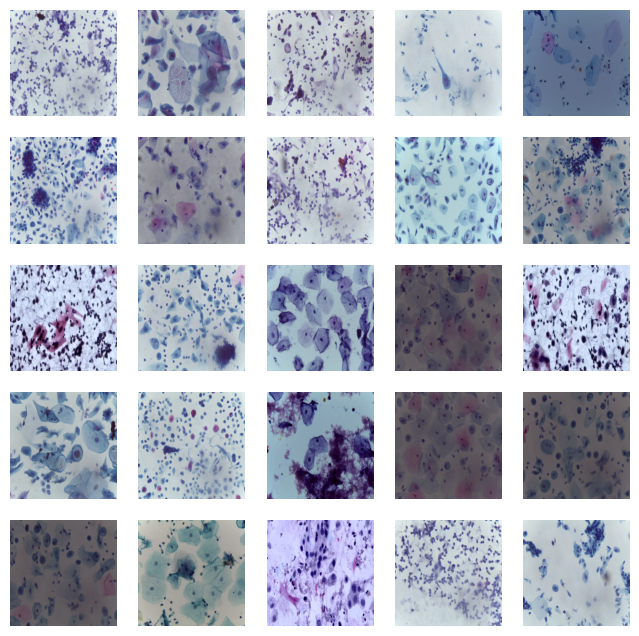

In [ ]:
import random
# Define the path to the directory containing dog images
PATH = "C:/Users/User/CellGAN/dataset"

# Get the list of image filenames in the directory
images = os.listdir(PATH)

# Display the count of dog pictures in the directory
print(f'Total dog pictures available: {len(os.listdir(PATH))}')

# Create subplots to display random images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8,8))

# Iterate through the subplots and display random dog images
for indx, axis in enumerate(axes.flatten()):
    PATH_TEMP = random.choice(os.listdir(PATH))
    # Get a random index within the range of available images
    rnd_indx = np.random.randint(0, len(os.listdir(PATH+'/'+PATH_TEMP)))

    # Load and display the image using Matplotlib
    images = os.listdir(PATH+'/'+PATH_TEMP+'/')
    img = plt.imread(PATH+'/'+PATH_TEMP + '/'+images[rnd_indx])
    # Resize the image to a constant size (e.g., 64x64)

    img = resize(img, (400,400))
    imgplot = axis.imshow(img)
    axis.set_axis_off()  # Turn off the axis for better visualization



In [ ]:
batch_size = 32
image_size = 64

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder(PATH, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.96862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5137255..0.8666667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.254902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5764706..0.7490196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.4039216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7882353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.32549024].
Clipping

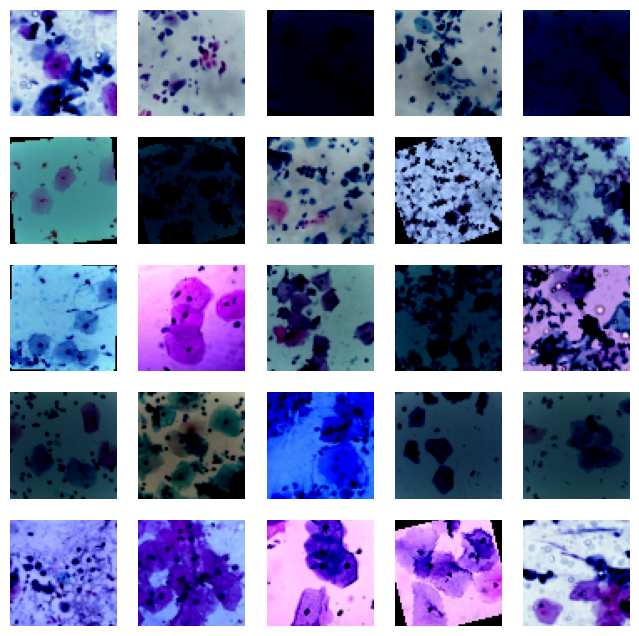

In [ ]:
fig, axs = plt.subplots(5,5, figsize = (8,8))

for i in range(5):
    for j in range(5):
        axs[i,j].imshow(imgs[5*i+j])
        axs[i,j].axis('off')

plt.show()

# Weights
### Defining the weights_init function

In [ ]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# Generator

In [ ]:
class G(nn.Module):
    def __init__(self):
        # Used to inherit the torch.nn Module
        super(G, self).__init__()
        # Meta Module - consists of different layers of Modules
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )

    def forward(self, input):
        output = self.main(input)
        return output

# Creating the generator
netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

# Discriminator

In [ ]:
# Defining the discriminator
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )

    def forward(self, input):
        output = self.main(input)
        # .view(-1) = Flattens the output into 1D instead of 2D
        return output.view(-1)


# Creating the discriminator
netD = D()
netD.apply(weights_init)


D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

## Another setup

In [ ]:
class Generator(nn.Module):
    def __init__(self, nz=128, channels=3):
        super(Generator, self).__init__()

        self.nz = nz
        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block

        self.model = nn.Sequential(
            *convlayer(self.nz, 1024, 4, 1, 0), # Fully connected layer via convolution.
            *convlayer(1024, 512, 4, 2, 1),
            *convlayer(512, 256, 4, 2, 1),
            *convlayer(256, 128, 4, 2, 1),
            *convlayer(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1)
        img = self.model(z)
        return img


class Discriminator(nn.Module):
    def __init__(self, channels=3):
        super(Discriminator, self).__init__()

        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *convlayer(self.channels, 32, 4, 2, 1),
            *convlayer(32, 64, 4, 2, 1),
            *convlayer(64, 128, 4, 2, 1, bn=True),
            *convlayer(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),  # FC with Conv.
        )

    def forward(self, imgs):
        logits = self.model(imgs)
        out = torch.sigmoid(logits)

        return out.view(-1, 1)

# Training

In [ ]:
!mkdir results
!ls

A subdirectory or file results already exists.
'ls' is not recognized as an internal or external command,
operable program or batch file.


### Parameters

In [ ]:
batch_size = 32
LR_G = 0.001
LR_D = 0.0005

beta1 = 0.5
epochs = 2750

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Initialize models and optimizers

In [ ]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

**Plot Loss per EPOCH**
> plot_loss()

In [ ]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

**Show generated images**
> show_generated_img()

In [ ]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)

    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)

    plt.show()
    plt.close()

### Training Loop

C:\Users\User\AppData\Local\Temp\ipykernel_10832\4272753609.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):


  0%|          | 0/41 [00:00<?, ?it/s]

[1/2750][20/41] Loss_D: 0.3499 Loss_G: 4.8149 D(x): 0.9204 D(G(z)): 0.0083 / 0.0048
[1/2750][40/41] Loss_D: 1.6476 Loss_G: 7.1970 D(x): 0.7437 D(G(z)): 0.6575 / 0.0010


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1.pth


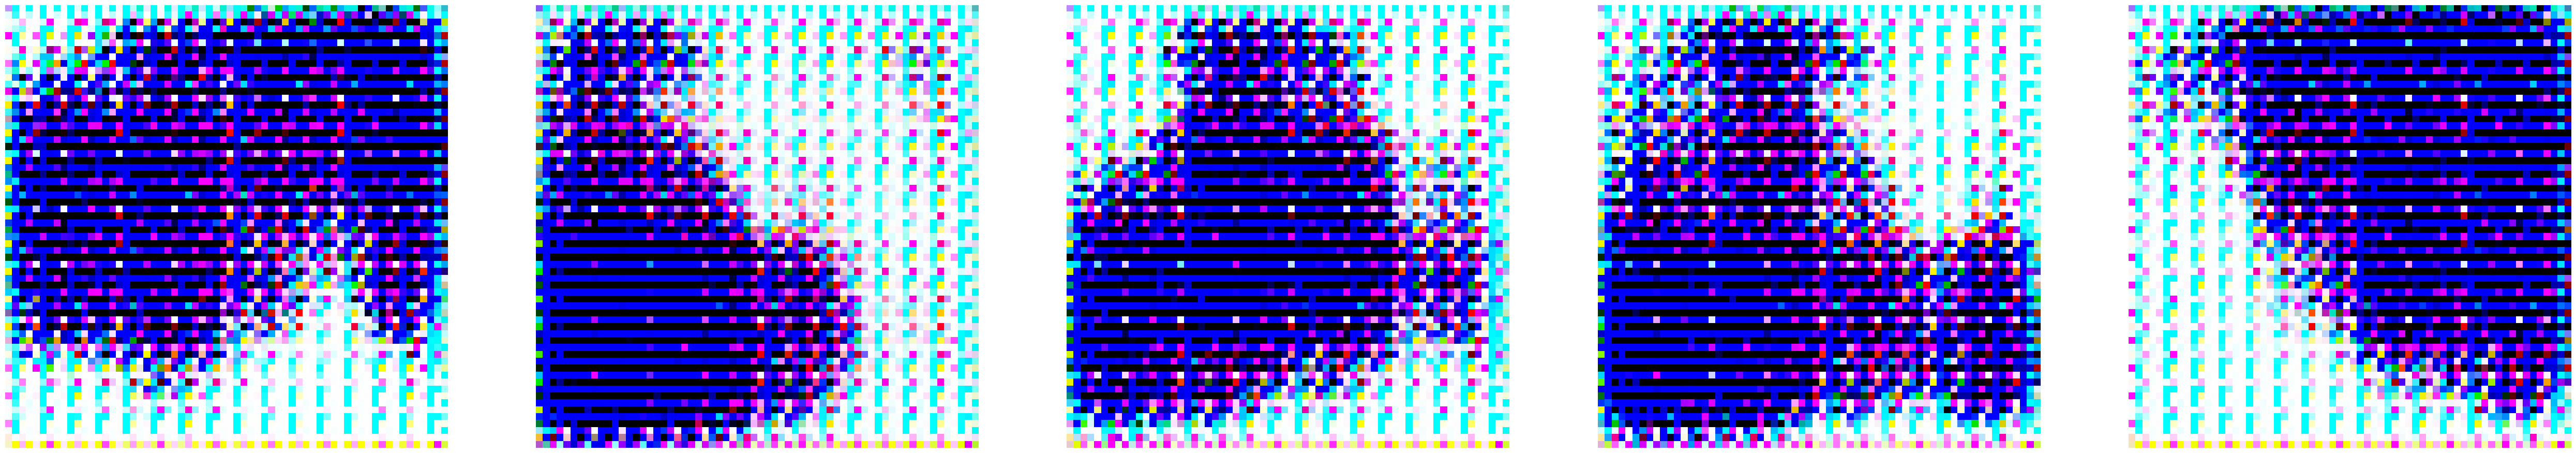

  0%|          | 0/41 [00:00<?, ?it/s]

[2/2750][20/41] Loss_D: 0.6746 Loss_G: 2.0736 D(x): 0.6153 D(G(z)): 0.0883 / 0.1187
[2/2750][40/41] Loss_D: 0.6904 Loss_G: 1.8846 D(x): 0.7213 D(G(z)): 0.2162 / 0.1309


  0%|          | 0/41 [00:00<?, ?it/s]

[3/2750][20/41] Loss_D: 0.7635 Loss_G: 2.6761 D(x): 0.7847 D(G(z)): 0.2913 / 0.0757
[3/2750][40/41] Loss_D: 0.7303 Loss_G: 3.1224 D(x): 0.8121 D(G(z)): 0.2903 / 0.0353


  0%|          | 0/41 [00:00<?, ?it/s]

[4/2750][20/41] Loss_D: 0.9378 Loss_G: 1.5569 D(x): 0.5634 D(G(z)): 0.2293 / 0.2115
[4/2750][40/41] Loss_D: 1.1535 Loss_G: 1.4555 D(x): 0.5154 D(G(z)): 0.3239 / 0.2667


  0%|          | 0/41 [00:00<?, ?it/s]

[5/2750][20/41] Loss_D: 1.1116 Loss_G: 1.1222 D(x): 0.4604 D(G(z)): 0.2645 / 0.3103
[5/2750][40/41] Loss_D: 1.6450 Loss_G: 0.9674 D(x): 0.2443 D(G(z)): 0.1598 / 0.3710


  0%|          | 0/41 [00:00<?, ?it/s]

[6/2750][20/41] Loss_D: 1.2078 Loss_G: 1.8361 D(x): 0.5978 D(G(z)): 0.4526 / 0.1378
[6/2750][40/41] Loss_D: 0.7634 Loss_G: 2.5798 D(x): 0.7429 D(G(z)): 0.2938 / 0.0676


  0%|          | 0/41 [00:00<?, ?it/s]

[7/2750][20/41] Loss_D: 1.0269 Loss_G: 1.4792 D(x): 0.4257 D(G(z)): 0.1329 / 0.2098
[7/2750][40/41] Loss_D: 0.9854 Loss_G: 2.7367 D(x): 0.8129 D(G(z)): 0.4443 / 0.0557


  0%|          | 0/41 [00:00<?, ?it/s]

[8/2750][20/41] Loss_D: 0.8598 Loss_G: 2.9217 D(x): 0.6072 D(G(z)): 0.2322 / 0.0427
[8/2750][40/41] Loss_D: 0.5552 Loss_G: 2.3102 D(x): 0.8225 D(G(z)): 0.1675 / 0.0817


  0%|          | 0/41 [00:00<?, ?it/s]

[9/2750][20/41] Loss_D: 0.8771 Loss_G: 1.6045 D(x): 0.5821 D(G(z)): 0.2292 / 0.1820
[9/2750][40/41] Loss_D: 1.1330 Loss_G: 1.8224 D(x): 0.3528 D(G(z)): 0.0889 / 0.1454


  0%|          | 0/41 [00:00<?, ?it/s]

[10/2750][20/41] Loss_D: 0.9976 Loss_G: 1.5038 D(x): 0.4886 D(G(z)): 0.2061 / 0.2151
[10/2750][40/41] Loss_D: 1.0304 Loss_G: 3.0694 D(x): 0.7841 D(G(z)): 0.4045 / 0.0432


  0%|          | 0/41 [00:00<?, ?it/s]

[11/2750][20/41] Loss_D: 1.1805 Loss_G: 2.1130 D(x): 0.5263 D(G(z)): 0.3593 / 0.1418
[11/2750][40/41] Loss_D: 1.3939 Loss_G: 2.1185 D(x): 0.6319 D(G(z)): 0.5215 / 0.1737


  0%|          | 0/41 [00:00<?, ?it/s]

[12/2750][20/41] Loss_D: 1.5860 Loss_G: 4.2049 D(x): 0.7882 D(G(z)): 0.6451 / 0.0130
[12/2750][40/41] Loss_D: 0.7473 Loss_G: 2.2272 D(x): 0.6225 D(G(z)): 0.1712 / 0.0938


  0%|          | 0/41 [00:00<?, ?it/s]

[13/2750][20/41] Loss_D: 1.0499 Loss_G: 3.5611 D(x): 0.7724 D(G(z)): 0.4631 / 0.0228
[13/2750][40/41] Loss_D: 0.8308 Loss_G: 1.7101 D(x): 0.5357 D(G(z)): 0.1220 / 0.1687


  0%|          | 0/41 [00:00<?, ?it/s]

[14/2750][20/41] Loss_D: 0.9713 Loss_G: 2.1305 D(x): 0.6654 D(G(z)): 0.3463 / 0.1071
[14/2750][40/41] Loss_D: 1.2032 Loss_G: 1.7341 D(x): 0.4171 D(G(z)): 0.2279 / 0.1667


  0%|          | 0/41 [00:00<?, ?it/s]

[15/2750][20/41] Loss_D: 1.1406 Loss_G: 1.9809 D(x): 0.4802 D(G(z)): 0.2715 / 0.1444
[15/2750][40/41] Loss_D: 0.9180 Loss_G: 2.1390 D(x): 0.5908 D(G(z)): 0.2725 / 0.1152


  0%|          | 0/41 [00:00<?, ?it/s]

[16/2750][20/41] Loss_D: 1.1347 Loss_G: 2.5003 D(x): 0.7536 D(G(z)): 0.4874 / 0.0788
[16/2750][40/41] Loss_D: 1.8603 Loss_G: 0.9761 D(x): 0.2460 D(G(z)): 0.3963 / 0.3999


  0%|          | 0/41 [00:00<?, ?it/s]

[17/2750][20/41] Loss_D: 1.5311 Loss_G: 2.7619 D(x): 0.7598 D(G(z)): 0.6425 / 0.0577
[17/2750][40/41] Loss_D: 1.2100 Loss_G: 1.8475 D(x): 0.6926 D(G(z)): 0.5062 / 0.1462


  0%|          | 0/41 [00:00<?, ?it/s]

[18/2750][20/41] Loss_D: 1.4622 Loss_G: 1.4400 D(x): 0.3936 D(G(z)): 0.3658 / 0.2286
[18/2750][40/41] Loss_D: 1.2724 Loss_G: 1.9279 D(x): 0.3603 D(G(z)): 0.2211 / 0.1413


  0%|          | 0/41 [00:00<?, ?it/s]

[19/2750][20/41] Loss_D: 1.0836 Loss_G: 1.4625 D(x): 0.4819 D(G(z)): 0.2730 / 0.2425
[19/2750][40/41] Loss_D: 1.0583 Loss_G: 1.7620 D(x): 0.4659 D(G(z)): 0.2256 / 0.1692


  0%|          | 0/41 [00:00<?, ?it/s]

[20/2750][20/41] Loss_D: 1.4667 Loss_G: 0.9634 D(x): 0.2839 D(G(z)): 0.1606 / 0.4087
[20/2750][40/41] Loss_D: 1.2592 Loss_G: 0.9182 D(x): 0.3643 D(G(z)): 0.2170 / 0.3961


  0%|          | 0/41 [00:00<?, ?it/s]

[21/2750][20/41] Loss_D: 0.9967 Loss_G: 1.4217 D(x): 0.5640 D(G(z)): 0.3026 / 0.2265
[21/2750][40/41] Loss_D: 1.2662 Loss_G: 1.6653 D(x): 0.4540 D(G(z)): 0.3518 / 0.1713


  0%|          | 0/41 [00:00<?, ?it/s]

[22/2750][20/41] Loss_D: 1.1126 Loss_G: 1.5411 D(x): 0.5110 D(G(z)): 0.3326 / 0.2061
[22/2750][40/41] Loss_D: 1.2656 Loss_G: 1.9648 D(x): 0.5801 D(G(z)): 0.4696 / 0.1389


  0%|          | 0/41 [00:00<?, ?it/s]

[23/2750][20/41] Loss_D: 1.4411 Loss_G: 1.1055 D(x): 0.2856 D(G(z)): 0.1773 / 0.3449
[23/2750][40/41] Loss_D: 0.9612 Loss_G: 1.9773 D(x): 0.5930 D(G(z)): 0.2821 / 0.1329


  0%|          | 0/41 [00:00<?, ?it/s]

[24/2750][20/41] Loss_D: 0.9622 Loss_G: 1.9438 D(x): 0.5806 D(G(z)): 0.2749 / 0.1392
[24/2750][40/41] Loss_D: 1.3466 Loss_G: 1.7879 D(x): 0.5417 D(G(z)): 0.4704 / 0.1664


  0%|          | 0/41 [00:00<?, ?it/s]

[25/2750][20/41] Loss_D: 1.1928 Loss_G: 2.4332 D(x): 0.6171 D(G(z)): 0.4515 / 0.0868
[25/2750][40/41] Loss_D: 1.1544 Loss_G: 1.2549 D(x): 0.4206 D(G(z)): 0.2336 / 0.2735


  0%|          | 0/41 [00:00<?, ?it/s]

[26/2750][20/41] Loss_D: 0.8218 Loss_G: 1.8797 D(x): 0.6068 D(G(z)): 0.2120 / 0.1398
[26/2750][40/41] Loss_D: 1.0299 Loss_G: 1.6963 D(x): 0.5760 D(G(z)): 0.3150 / 0.1701


  0%|          | 0/41 [00:00<?, ?it/s]

[27/2750][20/41] Loss_D: 1.1077 Loss_G: 1.2834 D(x): 0.4713 D(G(z)): 0.2556 / 0.2671
[27/2750][40/41] Loss_D: 0.8833 Loss_G: 1.9533 D(x): 0.6789 D(G(z)): 0.3194 / 0.1270


  0%|          | 0/41 [00:00<?, ?it/s]

[28/2750][20/41] Loss_D: 1.0650 Loss_G: 1.7062 D(x): 0.4830 D(G(z)): 0.2459 / 0.1776
[28/2750][40/41] Loss_D: 1.0762 Loss_G: 2.0622 D(x): 0.5346 D(G(z)): 0.3132 / 0.1259


  0%|          | 0/41 [00:00<?, ?it/s]

[29/2750][20/41] Loss_D: 1.0850 Loss_G: 1.7273 D(x): 0.6135 D(G(z)): 0.4011 / 0.1582
[29/2750][40/41] Loss_D: 1.0156 Loss_G: 2.0389 D(x): 0.7309 D(G(z)): 0.4170 / 0.1326


  0%|          | 0/41 [00:00<?, ?it/s]

[30/2750][20/41] Loss_D: 1.0475 Loss_G: 1.6446 D(x): 0.4581 D(G(z)): 0.1951 / 0.1901
[30/2750][40/41] Loss_D: 1.4732 Loss_G: 1.5186 D(x): 0.3966 D(G(z)): 0.4028 / 0.2063


  0%|          | 0/41 [00:00<?, ?it/s]

[31/2750][20/41] Loss_D: 1.0344 Loss_G: 1.9633 D(x): 0.4983 D(G(z)): 0.2392 / 0.1373
[31/2750][40/41] Loss_D: 1.4309 Loss_G: 1.1190 D(x): 0.3489 D(G(z)): 0.2980 / 0.3170


  0%|          | 0/41 [00:00<?, ?it/s]

[32/2750][20/41] Loss_D: 1.0372 Loss_G: 1.8055 D(x): 0.5878 D(G(z)): 0.3523 / 0.1676
[32/2750][40/41] Loss_D: 0.9591 Loss_G: 1.5518 D(x): 0.6151 D(G(z)): 0.3154 / 0.2059


  0%|          | 0/41 [00:00<?, ?it/s]

[33/2750][20/41] Loss_D: 1.2612 Loss_G: 1.5663 D(x): 0.3539 D(G(z)): 0.2107 / 0.1959
[33/2750][40/41] Loss_D: 1.0461 Loss_G: 1.7214 D(x): 0.6406 D(G(z)): 0.3950 / 0.1695


  0%|          | 0/41 [00:00<?, ?it/s]

[34/2750][20/41] Loss_D: 1.3649 Loss_G: 1.1579 D(x): 0.4281 D(G(z)): 0.3392 / 0.3260
[34/2750][40/41] Loss_D: 1.4011 Loss_G: 1.2502 D(x): 0.2746 D(G(z)): 0.1451 / 0.2777


  0%|          | 0/41 [00:00<?, ?it/s]

[35/2750][20/41] Loss_D: 0.8796 Loss_G: 1.9143 D(x): 0.5873 D(G(z)): 0.2394 / 0.1386
[35/2750][40/41] Loss_D: 1.2436 Loss_G: 1.2846 D(x): 0.4239 D(G(z)): 0.2987 / 0.2867


  0%|          | 0/41 [00:00<?, ?it/s]

[36/2750][20/41] Loss_D: 1.4261 Loss_G: 1.2278 D(x): 0.3118 D(G(z)): 0.2276 / 0.2850
[36/2750][40/41] Loss_D: 1.0786 Loss_G: 1.5146 D(x): 0.4532 D(G(z)): 0.2192 / 0.2111


  0%|          | 0/41 [00:00<?, ?it/s]

[37/2750][20/41] Loss_D: 1.1480 Loss_G: 1.4097 D(x): 0.5446 D(G(z)): 0.3708 / 0.2490
[37/2750][40/41] Loss_D: 1.0207 Loss_G: 1.5319 D(x): 0.4974 D(G(z)): 0.2318 / 0.2034


  0%|          | 0/41 [00:00<?, ?it/s]

[38/2750][20/41] Loss_D: 1.2485 Loss_G: 1.4976 D(x): 0.4283 D(G(z)): 0.2996 / 0.2336
[38/2750][40/41] Loss_D: 1.2127 Loss_G: 1.5176 D(x): 0.5736 D(G(z)): 0.4356 / 0.2040


  0%|          | 0/41 [00:00<?, ?it/s]

[39/2750][20/41] Loss_D: 1.0670 Loss_G: 1.3792 D(x): 0.6176 D(G(z)): 0.3788 / 0.2633
[39/2750][40/41] Loss_D: 0.7736 Loss_G: 2.6004 D(x): 0.7870 D(G(z)): 0.2939 / 0.0722


  0%|          | 0/41 [00:00<?, ?it/s]

[40/2750][20/41] Loss_D: 0.8033 Loss_G: 2.2757 D(x): 0.8726 D(G(z)): 0.3375 / 0.0971
[40/2750][40/41] Loss_D: 1.2407 Loss_G: 2.4019 D(x): 0.6494 D(G(z)): 0.4515 / 0.1205


  0%|          | 0/41 [00:00<?, ?it/s]

[41/2750][20/41] Loss_D: 0.6048 Loss_G: 2.7293 D(x): 0.7146 D(G(z)): 0.1486 / 0.0674
[41/2750][40/41] Loss_D: 0.7396 Loss_G: 1.9515 D(x): 0.7596 D(G(z)): 0.2769 / 0.1316


  0%|          | 0/41 [00:00<?, ?it/s]

[42/2750][20/41] Loss_D: 0.9874 Loss_G: 1.5358 D(x): 0.6233 D(G(z)): 0.2996 / 0.2220
[42/2750][40/41] Loss_D: 0.5468 Loss_G: 2.6115 D(x): 0.6856 D(G(z)): 0.0705 / 0.0790


  0%|          | 0/41 [00:00<?, ?it/s]

[43/2750][20/41] Loss_D: 0.6954 Loss_G: 2.4019 D(x): 0.8014 D(G(z)): 0.2549 / 0.0808
[43/2750][40/41] Loss_D: 0.9397 Loss_G: 1.2230 D(x): 0.6185 D(G(z)): 0.2311 / 0.3006


  0%|          | 0/41 [00:00<?, ?it/s]

[44/2750][20/41] Loss_D: 0.7016 Loss_G: 2.6524 D(x): 0.9216 D(G(z)): 0.2749 / 0.0703
[44/2750][40/41] Loss_D: 0.6413 Loss_G: 1.7070 D(x): 0.7017 D(G(z)): 0.1447 / 0.1935


  0%|          | 0/41 [00:00<?, ?it/s]

[45/2750][20/41] Loss_D: 0.7092 Loss_G: 2.3414 D(x): 0.8352 D(G(z)): 0.2694 / 0.0927
[45/2750][40/41] Loss_D: 1.0940 Loss_G: 3.1753 D(x): 0.9813 D(G(z)): 0.4515 / 0.0548


  0%|          | 0/41 [00:00<?, ?it/s]

[46/2750][20/41] Loss_D: 1.1204 Loss_G: 1.8720 D(x): 0.3594 D(G(z)): 0.0818 / 0.2244
[46/2750][40/41] Loss_D: 0.9701 Loss_G: 1.7667 D(x): 0.5394 D(G(z)): 0.1771 / 0.2060


  0%|          | 0/41 [00:00<?, ?it/s]

[47/2750][20/41] Loss_D: 0.9429 Loss_G: 2.6181 D(x): 0.6086 D(G(z)): 0.2770 / 0.0811
[47/2750][40/41] Loss_D: 0.9259 Loss_G: 2.2024 D(x): 0.6542 D(G(z)): 0.3155 / 0.1170


  0%|          | 0/41 [00:00<?, ?it/s]

[48/2750][20/41] Loss_D: 0.7049 Loss_G: 2.4059 D(x): 0.5780 D(G(z)): 0.0565 / 0.1009
[48/2750][40/41] Loss_D: 0.8031 Loss_G: 2.7961 D(x): 0.7762 D(G(z)): 0.2916 / 0.0659


  0%|          | 0/41 [00:00<?, ?it/s]

[49/2750][20/41] Loss_D: 1.1272 Loss_G: 1.3512 D(x): 0.4724 D(G(z)): 0.2596 / 0.2643
[49/2750][40/41] Loss_D: 0.6023 Loss_G: 2.0781 D(x): 0.7485 D(G(z)): 0.1561 / 0.1488


  0%|          | 0/41 [00:00<?, ?it/s]

[50/2750][20/41] Loss_D: 1.2418 Loss_G: 2.5049 D(x): 0.3220 D(G(z)): 0.0273 / 0.0933
[50/2750][40/41] Loss_D: 0.9267 Loss_G: 2.5386 D(x): 0.9022 D(G(z)): 0.3837 / 0.0835


  0%|          | 0/41 [00:00<?, ?it/s]

[51/2750][20/41] Loss_D: 0.6560 Loss_G: 2.0537 D(x): 0.6852 D(G(z)): 0.1212 / 0.1204
[51/2750][40/41] Loss_D: 0.8712 Loss_G: 2.3714 D(x): 0.6700 D(G(z)): 0.3043 / 0.0863


  0%|          | 0/41 [00:00<?, ?it/s]

[52/2750][20/41] Loss_D: 0.8486 Loss_G: 2.3999 D(x): 0.6993 D(G(z)): 0.2706 / 0.1106
[52/2750][40/41] Loss_D: 0.9346 Loss_G: 2.1985 D(x): 0.5058 D(G(z)): 0.1199 / 0.1156


  0%|          | 0/41 [00:00<?, ?it/s]

[53/2750][20/41] Loss_D: 0.5945 Loss_G: 2.8562 D(x): 0.7422 D(G(z)): 0.1437 / 0.0628
[53/2750][40/41] Loss_D: 0.5318 Loss_G: 2.4270 D(x): 0.9071 D(G(z)): 0.1476 / 0.0928


  0%|          | 0/41 [00:00<?, ?it/s]

[54/2750][20/41] Loss_D: 0.9899 Loss_G: 2.7351 D(x): 0.8763 D(G(z)): 0.4214 / 0.0591
[54/2750][40/41] Loss_D: 0.8325 Loss_G: 2.1648 D(x): 0.5918 D(G(z)): 0.1609 / 0.1367


  0%|          | 0/41 [00:00<?, ?it/s]

[55/2750][20/41] Loss_D: 0.7411 Loss_G: 1.9138 D(x): 0.5786 D(G(z)): 0.0859 / 0.1532
[55/2750][40/41] Loss_D: 0.8816 Loss_G: 2.5786 D(x): 0.7647 D(G(z)): 0.3591 / 0.0954


  0%|          | 0/41 [00:00<?, ?it/s]

[56/2750][20/41] Loss_D: 0.7992 Loss_G: 2.6202 D(x): 0.8325 D(G(z)): 0.3242 / 0.0933
[56/2750][40/41] Loss_D: 0.7138 Loss_G: 2.0176 D(x): 0.7616 D(G(z)): 0.2150 / 0.1358


  0%|          | 0/41 [00:00<?, ?it/s]

[57/2750][20/41] Loss_D: 0.9288 Loss_G: 1.9122 D(x): 0.4555 D(G(z)): 0.0594 / 0.1470
[57/2750][40/41] Loss_D: 1.0238 Loss_G: 1.8134 D(x): 0.6363 D(G(z)): 0.3540 / 0.1728


  0%|          | 0/41 [00:00<?, ?it/s]

[58/2750][20/41] Loss_D: 1.2099 Loss_G: 3.4877 D(x): 0.7753 D(G(z)): 0.5206 / 0.0268
[58/2750][40/41] Loss_D: 0.8823 Loss_G: 1.8477 D(x): 0.5606 D(G(z)): 0.1965 / 0.1770


  0%|          | 0/41 [00:00<?, ?it/s]

[59/2750][20/41] Loss_D: 0.8303 Loss_G: 2.1022 D(x): 0.5499 D(G(z)): 0.1382 / 0.1251
[59/2750][40/41] Loss_D: 0.7439 Loss_G: 2.0843 D(x): 0.6959 D(G(z)): 0.2322 / 0.1349


  0%|          | 0/41 [00:00<?, ?it/s]

[60/2750][20/41] Loss_D: 1.4864 Loss_G: 1.2701 D(x): 0.2657 D(G(z)): 0.1300 / 0.2675
[60/2750][40/41] Loss_D: 1.5639 Loss_G: 3.4411 D(x): 0.9467 D(G(z)): 0.6662 / 0.0324


  0%|          | 0/41 [00:00<?, ?it/s]

[61/2750][20/41] Loss_D: 1.2466 Loss_G: 1.7940 D(x): 0.5891 D(G(z)): 0.4235 / 0.2154
[61/2750][40/41] Loss_D: 0.8091 Loss_G: 2.0953 D(x): 0.8274 D(G(z)): 0.3253 / 0.1234


  0%|          | 0/41 [00:00<?, ?it/s]

[62/2750][20/41] Loss_D: 1.4752 Loss_G: 1.9377 D(x): 0.7845 D(G(z)): 0.6078 / 0.1444
[62/2750][40/41] Loss_D: 0.9117 Loss_G: 2.2210 D(x): 0.4551 D(G(z)): 0.1006 / 0.1216


  0%|          | 0/41 [00:00<?, ?it/s]

[63/2750][20/41] Loss_D: 0.6745 Loss_G: 2.2882 D(x): 0.7381 D(G(z)): 0.1894 / 0.0940
[63/2750][40/41] Loss_D: 0.7657 Loss_G: 1.7993 D(x): 0.7153 D(G(z)): 0.2359 / 0.1655


  0%|          | 0/41 [00:00<?, ?it/s]

[64/2750][20/41] Loss_D: 0.9306 Loss_G: 2.4329 D(x): 0.8924 D(G(z)): 0.4061 / 0.0840
[64/2750][40/41] Loss_D: 0.5156 Loss_G: 2.5890 D(x): 0.8578 D(G(z)): 0.1480 / 0.0739


  0%|          | 0/41 [00:00<?, ?it/s]

[65/2750][20/41] Loss_D: 0.6735 Loss_G: 2.4618 D(x): 0.6791 D(G(z)): 0.1624 / 0.0789
[65/2750][40/41] Loss_D: 1.7982 Loss_G: 2.7431 D(x): 0.5455 D(G(z)): 0.6070 / 0.1012


  0%|          | 0/41 [00:00<?, ?it/s]

[66/2750][20/41] Loss_D: 0.8735 Loss_G: 3.4729 D(x): 0.6580 D(G(z)): 0.0789 / 0.0310
[66/2750][40/41] Loss_D: 0.6373 Loss_G: 1.7982 D(x): 0.7021 D(G(z)): 0.1140 / 0.1745


  0%|          | 0/41 [00:00<?, ?it/s]

[67/2750][20/41] Loss_D: 0.4716 Loss_G: 2.4408 D(x): 0.8801 D(G(z)): 0.1047 / 0.0836
[67/2750][40/41] Loss_D: 1.0103 Loss_G: 2.2802 D(x): 0.6598 D(G(z)): 0.3809 / 0.0973


  0%|          | 0/41 [00:00<?, ?it/s]

[68/2750][20/41] Loss_D: 0.4357 Loss_G: 3.6630 D(x): 0.7695 D(G(z)): 0.0205 / 0.0219
[68/2750][40/41] Loss_D: 0.8414 Loss_G: 3.0711 D(x): 0.9478 D(G(z)): 0.3312 / 0.0470


  0%|          | 0/41 [00:00<?, ?it/s]

[69/2750][20/41] Loss_D: 0.5417 Loss_G: 3.1730 D(x): 0.8687 D(G(z)): 0.1704 / 0.0345
[69/2750][40/41] Loss_D: 0.6324 Loss_G: 1.6344 D(x): 0.7648 D(G(z)): 0.1934 / 0.1879


  0%|          | 0/41 [00:00<?, ?it/s]

[70/2750][20/41] Loss_D: 0.6008 Loss_G: 2.1667 D(x): 0.6715 D(G(z)): 0.0960 / 0.1107
[70/2750][40/41] Loss_D: 0.4217 Loss_G: 3.4742 D(x): 0.7747 D(G(z)): 0.0343 / 0.0255


  0%|          | 0/41 [00:00<?, ?it/s]

[71/2750][20/41] Loss_D: 1.3533 Loss_G: 2.3456 D(x): 0.2593 D(G(z)): 0.0339 / 0.1045
[71/2750][40/41] Loss_D: 0.7772 Loss_G: 2.4178 D(x): 0.7814 D(G(z)): 0.2963 / 0.0967


  0%|          | 0/41 [00:00<?, ?it/s]

[72/2750][20/41] Loss_D: 1.0626 Loss_G: 2.8467 D(x): 0.3962 D(G(z)): 0.0603 / 0.0835
[72/2750][40/41] Loss_D: 1.5065 Loss_G: 2.4248 D(x): 0.2398 D(G(z)): 0.0349 / 0.0846


  0%|          | 0/41 [00:00<?, ?it/s]

[73/2750][20/41] Loss_D: 0.5725 Loss_G: 2.4031 D(x): 0.8195 D(G(z)): 0.1804 / 0.0940
[73/2750][40/41] Loss_D: 0.4737 Loss_G: 3.1801 D(x): 0.7384 D(G(z)): 0.0450 / 0.0393


  0%|          | 0/41 [00:00<?, ?it/s]

[74/2750][20/41] Loss_D: 0.5989 Loss_G: 2.1993 D(x): 0.7383 D(G(z)): 0.1537 / 0.0980
[74/2750][40/41] Loss_D: 0.5469 Loss_G: 3.1002 D(x): 0.8934 D(G(z)): 0.1851 / 0.0374


  0%|          | 0/41 [00:00<?, ?it/s]

[75/2750][20/41] Loss_D: 0.5802 Loss_G: 2.5428 D(x): 0.7472 D(G(z)): 0.1331 / 0.0689
[75/2750][40/41] Loss_D: 0.5436 Loss_G: 4.8739 D(x): 0.7729 D(G(z)): 0.0097 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[76/2750][20/41] Loss_D: 0.9547 Loss_G: 2.3834 D(x): 0.5320 D(G(z)): 0.1237 / 0.0900
[76/2750][40/41] Loss_D: 0.9374 Loss_G: 4.6810 D(x): 0.4639 D(G(z)): 0.0057 / 0.0078


  0%|          | 0/41 [00:00<?, ?it/s]

[77/2750][20/41] Loss_D: 0.9685 Loss_G: 2.2873 D(x): 0.6915 D(G(z)): 0.3632 / 0.1023
[77/2750][40/41] Loss_D: 1.4784 Loss_G: 2.8172 D(x): 0.2173 D(G(z)): 0.0078 / 0.0666


  0%|          | 0/41 [00:00<?, ?it/s]

[78/2750][20/41] Loss_D: 0.7820 Loss_G: 1.8314 D(x): 0.8272 D(G(z)): 0.3048 / 0.1639
[78/2750][40/41] Loss_D: 0.9992 Loss_G: 1.3551 D(x): 0.4352 D(G(z)): 0.1062 / 0.2703


  0%|          | 0/41 [00:00<?, ?it/s]

[79/2750][20/41] Loss_D: 0.5009 Loss_G: 2.4743 D(x): 0.7244 D(G(z)): 0.0487 / 0.0832
[79/2750][40/41] Loss_D: 0.5533 Loss_G: 2.4762 D(x): 0.7064 D(G(z)): 0.0924 / 0.0860


  0%|          | 0/41 [00:00<?, ?it/s]

[80/2750][20/41] Loss_D: 1.0428 Loss_G: 3.1771 D(x): 0.8028 D(G(z)): 0.4587 / 0.0422
[80/2750][40/41] Loss_D: 0.4396 Loss_G: 2.8681 D(x): 0.8702 D(G(z)): 0.0906 / 0.0582


  0%|          | 0/41 [00:00<?, ?it/s]

[81/2750][20/41] Loss_D: 0.6022 Loss_G: 3.1063 D(x): 0.8037 D(G(z)): 0.1722 / 0.0438
[81/2750][40/41] Loss_D: 0.9265 Loss_G: 1.6144 D(x): 0.5503 D(G(z)): 0.2105 / 0.1990


  0%|          | 0/41 [00:00<?, ?it/s]

[82/2750][20/41] Loss_D: 1.8487 Loss_G: 1.5980 D(x): 0.2130 D(G(z)): 0.1219 / 0.2511
[82/2750][40/41] Loss_D: 0.4282 Loss_G: 3.8319 D(x): 0.7722 D(G(z)): 0.0261 / 0.0206


  0%|          | 0/41 [00:00<?, ?it/s]

[83/2750][20/41] Loss_D: 1.0439 Loss_G: 1.5931 D(x): 0.4595 D(G(z)): 0.1645 / 0.2182
[83/2750][40/41] Loss_D: 1.2237 Loss_G: 2.9317 D(x): 0.8595 D(G(z)): 0.5589 / 0.0498


  0%|          | 0/41 [00:00<?, ?it/s]

[84/2750][20/41] Loss_D: 0.8509 Loss_G: 1.6777 D(x): 0.4930 D(G(z)): 0.0859 / 0.1827
[84/2750][40/41] Loss_D: 0.7956 Loss_G: 2.3798 D(x): 0.5186 D(G(z)): 0.0367 / 0.0832


  0%|          | 0/41 [00:00<?, ?it/s]

[85/2750][20/41] Loss_D: 1.1903 Loss_G: 1.9013 D(x): 0.6496 D(G(z)): 0.4623 / 0.1483
[85/2750][40/41] Loss_D: 1.0006 Loss_G: 1.9362 D(x): 0.5514 D(G(z)): 0.2558 / 0.1625


  0%|          | 0/41 [00:00<?, ?it/s]

[86/2750][20/41] Loss_D: 2.2861 Loss_G: 0.7246 D(x): 0.1111 D(G(z)): 0.0720 / 0.5985
[86/2750][40/41] Loss_D: 0.5984 Loss_G: 2.1144 D(x): 0.9101 D(G(z)): 0.2176 / 0.1092


  0%|          | 0/41 [00:00<?, ?it/s]

[87/2750][20/41] Loss_D: 0.4055 Loss_G: 3.0567 D(x): 0.8079 D(G(z)): 0.0287 / 0.0463
[87/2750][40/41] Loss_D: 1.4788 Loss_G: 1.7557 D(x): 0.3784 D(G(z)): 0.3361 / 0.1588


  0%|          | 0/41 [00:00<?, ?it/s]

[88/2750][20/41] Loss_D: 0.8134 Loss_G: 2.1267 D(x): 0.7237 D(G(z)): 0.2849 / 0.1114
[88/2750][40/41] Loss_D: 0.9107 Loss_G: 2.1958 D(x): 0.5331 D(G(z)): 0.1792 / 0.1016


  0%|          | 0/41 [00:00<?, ?it/s]

[89/2750][20/41] Loss_D: 1.0969 Loss_G: 2.4703 D(x): 0.6305 D(G(z)): 0.3978 / 0.0799
[89/2750][40/41] Loss_D: 0.8490 Loss_G: 2.0139 D(x): 0.8028 D(G(z)): 0.3312 / 0.1236


  0%|          | 0/41 [00:00<?, ?it/s]

[90/2750][20/41] Loss_D: 1.3155 Loss_G: 3.2075 D(x): 0.8994 D(G(z)): 0.5857 / 0.0394
[90/2750][40/41] Loss_D: 0.9105 Loss_G: 2.5009 D(x): 0.8145 D(G(z)): 0.3761 / 0.0865


  0%|          | 0/41 [00:00<?, ?it/s]

[91/2750][20/41] Loss_D: 0.5184 Loss_G: 2.1510 D(x): 0.8849 D(G(z)): 0.1551 / 0.1093
[91/2750][40/41] Loss_D: 1.0847 Loss_G: 2.9371 D(x): 0.8481 D(G(z)): 0.4661 / 0.0497


  0%|          | 0/41 [00:00<?, ?it/s]

[92/2750][20/41] Loss_D: 0.7438 Loss_G: 1.6475 D(x): 0.5909 D(G(z)): 0.1287 / 0.2035
[92/2750][40/41] Loss_D: 0.7616 Loss_G: 2.6448 D(x): 0.8058 D(G(z)): 0.2983 / 0.0696


  0%|          | 0/41 [00:00<?, ?it/s]

[93/2750][20/41] Loss_D: 0.6222 Loss_G: 3.5735 D(x): 0.5918 D(G(z)): 0.0227 / 0.0258
[93/2750][40/41] Loss_D: 0.9932 Loss_G: 2.2936 D(x): 0.7389 D(G(z)): 0.4085 / 0.0917


  0%|          | 0/41 [00:00<?, ?it/s]

[94/2750][20/41] Loss_D: 0.6984 Loss_G: 2.3093 D(x): 0.5587 D(G(z)): 0.0333 / 0.0916
[94/2750][40/41] Loss_D: 0.5484 Loss_G: 3.1639 D(x): 0.9764 D(G(z)): 0.1074 / 0.0429


  0%|          | 0/41 [00:00<?, ?it/s]

[95/2750][20/41] Loss_D: 0.5850 Loss_G: 2.2666 D(x): 0.7926 D(G(z)): 0.1669 / 0.1128
[95/2750][40/41] Loss_D: 1.0566 Loss_G: 2.1216 D(x): 0.5484 D(G(z)): 0.2948 / 0.1104


  0%|          | 0/41 [00:00<?, ?it/s]

[96/2750][20/41] Loss_D: 1.1387 Loss_G: 1.6977 D(x): 0.3939 D(G(z)): 0.1604 / 0.1888
[96/2750][40/41] Loss_D: 0.7615 Loss_G: 1.8678 D(x): 0.6829 D(G(z)): 0.2400 / 0.1483


  0%|          | 0/41 [00:00<?, ?it/s]

[97/2750][20/41] Loss_D: 0.7306 Loss_G: 2.5781 D(x): 0.5658 D(G(z)): 0.0909 / 0.0819
[97/2750][40/41] Loss_D: 0.8174 Loss_G: 2.9081 D(x): 0.8545 D(G(z)): 0.3559 / 0.0488


  0%|          | 0/41 [00:00<?, ?it/s]

[98/2750][20/41] Loss_D: 0.5652 Loss_G: 3.6116 D(x): 0.6149 D(G(z)): 0.0149 / 0.0251
[98/2750][40/41] Loss_D: 0.6512 Loss_G: 2.8711 D(x): 0.5918 D(G(z)): 0.0337 / 0.0548


  0%|          | 0/41 [00:00<?, ?it/s]

[99/2750][20/41] Loss_D: 1.3000 Loss_G: 1.5177 D(x): 0.3230 D(G(z)): 0.0788 / 0.2570
[99/2750][40/41] Loss_D: 0.7317 Loss_G: 2.0657 D(x): 0.6985 D(G(z)): 0.1951 / 0.1457


  0%|          | 0/41 [00:00<?, ?it/s]

[100/2750][20/41] Loss_D: 0.7129 Loss_G: 2.5141 D(x): 0.5818 D(G(z)): 0.0351 / 0.0825
[100/2750][40/41] Loss_D: 0.6158 Loss_G: 2.2330 D(x): 0.6676 D(G(z)): 0.1054 / 0.1044


  0%|          | 0/41 [00:00<?, ?it/s]

[101/2750][20/41] Loss_D: 0.9473 Loss_G: 3.2405 D(x): 0.4659 D(G(z)): 0.0355 / 0.0386
[101/2750][40/41] Loss_D: 1.1709 Loss_G: 3.0924 D(x): 0.8444 D(G(z)): 0.5367 / 0.0574


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999586..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.999995..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_101.pth


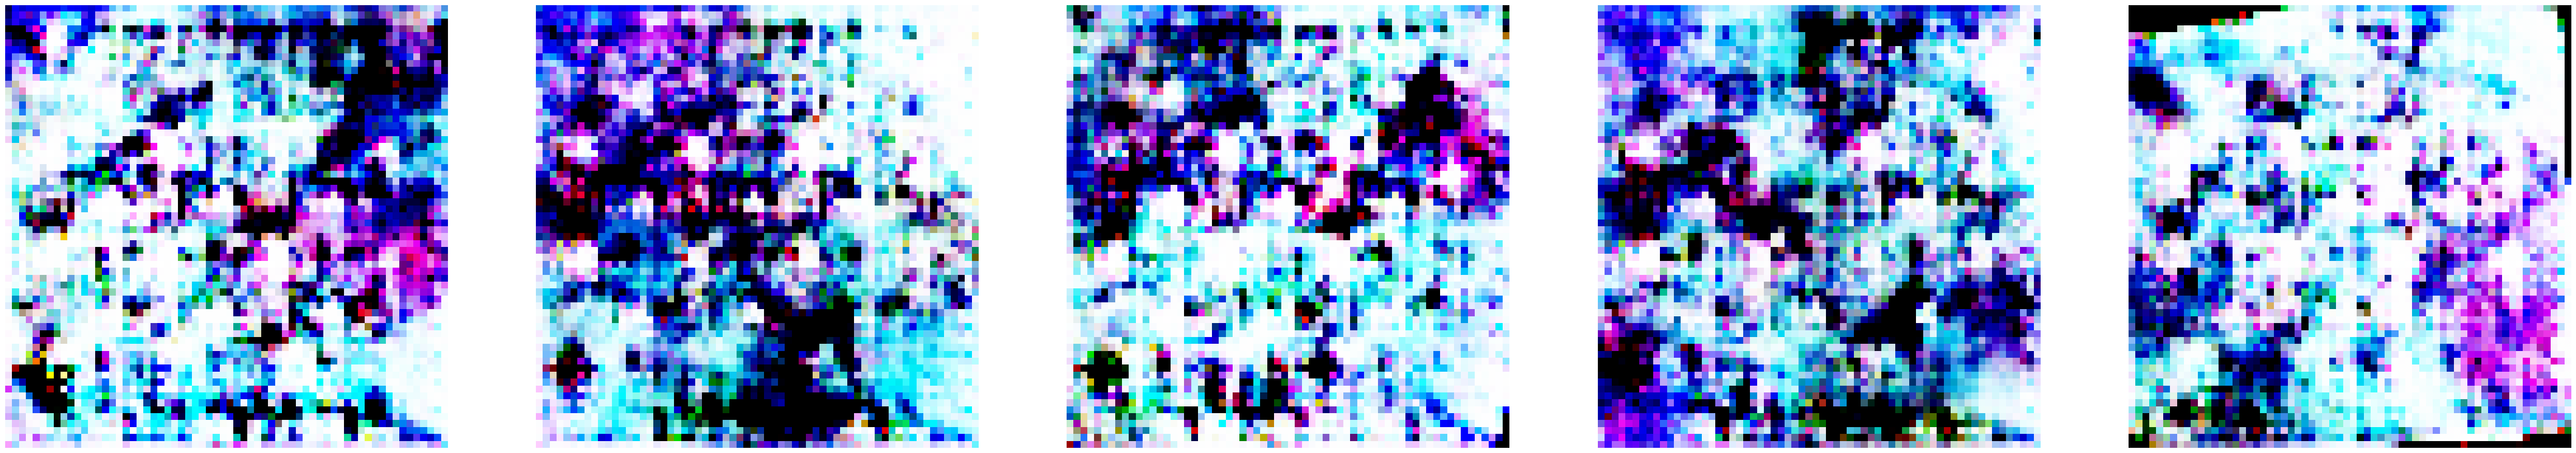

  0%|          | 0/41 [00:00<?, ?it/s]

[102/2750][20/41] Loss_D: 1.2743 Loss_G: 1.9943 D(x): 0.3330 D(G(z)): 0.1000 / 0.1723
[102/2750][40/41] Loss_D: 1.3468 Loss_G: 3.1436 D(x): 0.8993 D(G(z)): 0.5651 / 0.0479


  0%|          | 0/41 [00:00<?, ?it/s]

[103/2750][20/41] Loss_D: 0.7514 Loss_G: 1.7529 D(x): 0.7897 D(G(z)): 0.2764 / 0.1688
[103/2750][40/41] Loss_D: 0.6801 Loss_G: 2.5736 D(x): 0.5630 D(G(z)): 0.0355 / 0.0718


  0%|          | 0/41 [00:00<?, ?it/s]

[104/2750][20/41] Loss_D: 0.6915 Loss_G: 2.5406 D(x): 0.6695 D(G(z)): 0.1742 / 0.0657
[104/2750][40/41] Loss_D: 0.9870 Loss_G: 3.0360 D(x): 0.9267 D(G(z)): 0.4252 / 0.0554


  0%|          | 0/41 [00:00<?, ?it/s]

[105/2750][20/41] Loss_D: 0.7234 Loss_G: 2.1446 D(x): 0.5586 D(G(z)): 0.0739 / 0.1058
[105/2750][40/41] Loss_D: 0.8303 Loss_G: 2.1697 D(x): 0.5644 D(G(z)): 0.1455 / 0.1237


  0%|          | 0/41 [00:00<?, ?it/s]

[106/2750][20/41] Loss_D: 0.8982 Loss_G: 2.2082 D(x): 0.7660 D(G(z)): 0.3510 / 0.0997
[106/2750][40/41] Loss_D: 0.6233 Loss_G: 2.4398 D(x): 0.6894 D(G(z)): 0.1161 / 0.1053


  0%|          | 0/41 [00:00<?, ?it/s]

[107/2750][20/41] Loss_D: 0.6231 Loss_G: 2.1932 D(x): 0.7873 D(G(z)): 0.2008 / 0.1028
[107/2750][40/41] Loss_D: 0.5843 Loss_G: 2.3639 D(x): 0.7569 D(G(z)): 0.1451 / 0.0972


  0%|          | 0/41 [00:00<?, ?it/s]

[108/2750][20/41] Loss_D: 0.7645 Loss_G: 3.0660 D(x): 0.5341 D(G(z)): 0.0232 / 0.0594
[108/2750][40/41] Loss_D: 0.4610 Loss_G: 2.7377 D(x): 0.7993 D(G(z)): 0.0728 / 0.0634


  0%|          | 0/41 [00:00<?, ?it/s]

[109/2750][20/41] Loss_D: 0.6143 Loss_G: 2.3995 D(x): 0.8528 D(G(z)): 0.2261 / 0.0806
[109/2750][40/41] Loss_D: 0.4053 Loss_G: 3.0972 D(x): 0.8969 D(G(z)): 0.0554 / 0.0373


  0%|          | 0/41 [00:00<?, ?it/s]

[110/2750][20/41] Loss_D: 0.6435 Loss_G: 2.7003 D(x): 0.7905 D(G(z)): 0.1904 / 0.0643
[110/2750][40/41] Loss_D: 0.9592 Loss_G: 3.8805 D(x): 0.3997 D(G(z)): 0.0157 / 0.0208


  0%|          | 0/41 [00:00<?, ?it/s]

[111/2750][20/41] Loss_D: 0.4905 Loss_G: 2.8371 D(x): 0.9506 D(G(z)): 0.1186 / 0.0487
[111/2750][40/41] Loss_D: 1.3617 Loss_G: 4.5921 D(x): 0.8005 D(G(z)): 0.5957 / 0.0129


  0%|          | 0/41 [00:00<?, ?it/s]

[112/2750][20/41] Loss_D: 1.1829 Loss_G: 3.4167 D(x): 0.8759 D(G(z)): 0.4152 / 0.0331
[112/2750][40/41] Loss_D: 0.3962 Loss_G: 3.6986 D(x): 0.9129 D(G(z)): 0.0465 / 0.0227


  0%|          | 0/41 [00:00<?, ?it/s]

[113/2750][20/41] Loss_D: 0.8711 Loss_G: 1.5400 D(x): 0.5068 D(G(z)): 0.1182 / 0.2303
[113/2750][40/41] Loss_D: 0.7546 Loss_G: 2.8105 D(x): 0.8714 D(G(z)): 0.3256 / 0.0507


  0%|          | 0/41 [00:00<?, ?it/s]

[114/2750][20/41] Loss_D: 0.8652 Loss_G: 2.3553 D(x): 0.5068 D(G(z)): 0.1058 / 0.0894
[114/2750][40/41] Loss_D: 0.5959 Loss_G: 2.3206 D(x): 0.7046 D(G(z)): 0.1113 / 0.1071


  0%|          | 0/41 [00:00<?, ?it/s]

[115/2750][20/41] Loss_D: 0.7290 Loss_G: 2.4643 D(x): 0.6606 D(G(z)): 0.1837 / 0.0752
[115/2750][40/41] Loss_D: 1.4947 Loss_G: 1.6739 D(x): 0.2740 D(G(z)): 0.0663 / 0.2005


  0%|          | 0/41 [00:00<?, ?it/s]

[116/2750][20/41] Loss_D: 0.6909 Loss_G: 2.8679 D(x): 0.8629 D(G(z)): 0.2555 / 0.0576
[116/2750][40/41] Loss_D: 0.4173 Loss_G: 3.2663 D(x): 0.8737 D(G(z)): 0.0659 / 0.0362


  0%|          | 0/41 [00:00<?, ?it/s]

[117/2750][20/41] Loss_D: 0.4581 Loss_G: 4.4078 D(x): 0.7334 D(G(z)): 0.0182 / 0.0128
[117/2750][40/41] Loss_D: 0.6347 Loss_G: 2.7863 D(x): 0.6042 D(G(z)): 0.0354 / 0.0536


  0%|          | 0/41 [00:00<?, ?it/s]

[118/2750][20/41] Loss_D: 0.4082 Loss_G: 4.1058 D(x): 0.7707 D(G(z)): 0.0107 / 0.0123
[118/2750][40/41] Loss_D: 0.6537 Loss_G: 2.3738 D(x): 0.7627 D(G(z)): 0.1623 / 0.0905


  0%|          | 0/41 [00:00<?, ?it/s]

[119/2750][20/41] Loss_D: 0.8326 Loss_G: 2.6998 D(x): 0.6427 D(G(z)): 0.2577 / 0.0604
[119/2750][40/41] Loss_D: 1.0139 Loss_G: 2.7707 D(x): 0.9175 D(G(z)): 0.4601 / 0.0613


  0%|          | 0/41 [00:00<?, ?it/s]

[120/2750][20/41] Loss_D: 1.7649 Loss_G: 1.6504 D(x): 0.2714 D(G(z)): 0.1165 / 0.2144
[120/2750][40/41] Loss_D: 0.9078 Loss_G: 1.3788 D(x): 0.5420 D(G(z)): 0.2133 / 0.2420


  0%|          | 0/41 [00:00<?, ?it/s]

[121/2750][20/41] Loss_D: 0.4073 Loss_G: 3.0642 D(x): 0.8752 D(G(z)): 0.0399 / 0.0503
[121/2750][40/41] Loss_D: 1.9034 Loss_G: 4.2288 D(x): 0.9512 D(G(z)): 0.7318 / 0.0137


  0%|          | 0/41 [00:00<?, ?it/s]

[122/2750][20/41] Loss_D: 0.4954 Loss_G: 2.5003 D(x): 0.8047 D(G(z)): 0.0862 / 0.0870
[122/2750][40/41] Loss_D: 1.1274 Loss_G: 1.5130 D(x): 0.4380 D(G(z)): 0.2266 / 0.2238


  0%|          | 0/41 [00:00<?, ?it/s]

[123/2750][20/41] Loss_D: 0.5800 Loss_G: 2.9530 D(x): 0.7431 D(G(z)): 0.1160 / 0.0541
[123/2750][40/41] Loss_D: 0.7707 Loss_G: 2.8594 D(x): 0.5625 D(G(z)): 0.0410 / 0.0546


  0%|          | 0/41 [00:00<?, ?it/s]

[124/2750][20/41] Loss_D: 0.6455 Loss_G: 3.5184 D(x): 0.5863 D(G(z)): 0.0174 / 0.0326
[124/2750][40/41] Loss_D: 1.6859 Loss_G: 1.7962 D(x): 0.4620 D(G(z)): 0.3951 / 0.2332


  0%|          | 0/41 [00:00<?, ?it/s]

[125/2750][20/41] Loss_D: 0.9972 Loss_G: 2.4385 D(x): 0.4802 D(G(z)): 0.0939 / 0.0993
[125/2750][40/41] Loss_D: 0.6838 Loss_G: 2.6568 D(x): 0.9525 D(G(z)): 0.2606 / 0.0636


  0%|          | 0/41 [00:00<?, ?it/s]

[126/2750][20/41] Loss_D: 0.5169 Loss_G: 2.7770 D(x): 0.7610 D(G(z)): 0.1079 / 0.0524
[126/2750][40/41] Loss_D: 0.3946 Loss_G: 3.3058 D(x): 0.8956 D(G(z)): 0.0283 / 0.0366


  0%|          | 0/41 [00:00<?, ?it/s]

[127/2750][20/41] Loss_D: 0.7350 Loss_G: 3.0856 D(x): 0.8016 D(G(z)): 0.2585 / 0.0509
[127/2750][40/41] Loss_D: 0.7524 Loss_G: 2.2272 D(x): 0.6023 D(G(z)): 0.1302 / 0.1066


  0%|          | 0/41 [00:00<?, ?it/s]

[128/2750][20/41] Loss_D: 0.9229 Loss_G: 3.6305 D(x): 0.9108 D(G(z)): 0.3963 / 0.0281
[128/2750][40/41] Loss_D: 1.4826 Loss_G: 1.0189 D(x): 0.2834 D(G(z)): 0.1340 / 0.3706


  0%|          | 0/41 [00:00<?, ?it/s]

[129/2750][20/41] Loss_D: 1.1789 Loss_G: 2.3757 D(x): 0.6715 D(G(z)): 0.4674 / 0.1044
[129/2750][40/41] Loss_D: 0.7585 Loss_G: 2.1613 D(x): 0.6382 D(G(z)): 0.1922 / 0.1047


  0%|          | 0/41 [00:00<?, ?it/s]

[130/2750][20/41] Loss_D: 1.2263 Loss_G: 1.6747 D(x): 0.4175 D(G(z)): 0.2440 / 0.2088
[130/2750][40/41] Loss_D: 0.4727 Loss_G: 3.3197 D(x): 0.8568 D(G(z)): 0.1146 / 0.0358


  0%|          | 0/41 [00:00<?, ?it/s]

[131/2750][20/41] Loss_D: 0.4060 Loss_G: 2.8186 D(x): 0.8689 D(G(z)): 0.0482 / 0.0574
[131/2750][40/41] Loss_D: 0.3836 Loss_G: 3.6170 D(x): 0.9009 D(G(z)): 0.0365 / 0.0263


  0%|          | 0/41 [00:00<?, ?it/s]

[132/2750][20/41] Loss_D: 0.6531 Loss_G: 3.0542 D(x): 0.9338 D(G(z)): 0.2401 / 0.0401
[132/2750][40/41] Loss_D: 0.9937 Loss_G: 2.9188 D(x): 0.4059 D(G(z)): 0.0447 / 0.0539


  0%|          | 0/41 [00:00<?, ?it/s]

[133/2750][20/41] Loss_D: 0.9772 Loss_G: 2.1346 D(x): 0.4435 D(G(z)): 0.1184 / 0.1182
[133/2750][40/41] Loss_D: 0.5529 Loss_G: 3.5433 D(x): 0.9079 D(G(z)): 0.1855 / 0.0252


  0%|          | 0/41 [00:00<?, ?it/s]

[134/2750][20/41] Loss_D: 1.8129 Loss_G: 3.0102 D(x): 0.9171 D(G(z)): 0.7297 / 0.0406
[134/2750][40/41] Loss_D: 1.7525 Loss_G: 1.9011 D(x): 0.1999 D(G(z)): 0.0736 / 0.1442


  0%|          | 0/41 [00:00<?, ?it/s]

[135/2750][20/41] Loss_D: 0.4665 Loss_G: 3.2547 D(x): 0.7810 D(G(z)): 0.0588 / 0.0344
[135/2750][40/41] Loss_D: 0.7401 Loss_G: 2.5098 D(x): 0.5542 D(G(z)): 0.0501 / 0.0816


  0%|          | 0/41 [00:00<?, ?it/s]

[136/2750][20/41] Loss_D: 0.5157 Loss_G: 3.0509 D(x): 0.9243 D(G(z)): 0.1480 / 0.0400
[136/2750][40/41] Loss_D: 0.5458 Loss_G: 2.8608 D(x): 0.8734 D(G(z)): 0.1605 / 0.0546


  0%|          | 0/41 [00:00<?, ?it/s]

[137/2750][20/41] Loss_D: 0.6520 Loss_G: 2.5023 D(x): 0.9528 D(G(z)): 0.2304 / 0.0780
[137/2750][40/41] Loss_D: 0.3811 Loss_G: 3.0691 D(x): 0.8778 D(G(z)): 0.0350 / 0.0460


  0%|          | 0/41 [00:00<?, ?it/s]

[138/2750][20/41] Loss_D: 0.7528 Loss_G: 2.6843 D(x): 0.7814 D(G(z)): 0.2869 / 0.0616
[138/2750][40/41] Loss_D: 0.6619 Loss_G: 2.6029 D(x): 0.7800 D(G(z)): 0.1897 / 0.0979


  0%|          | 0/41 [00:00<?, ?it/s]

[139/2750][20/41] Loss_D: 0.5683 Loss_G: 2.9405 D(x): 0.7293 D(G(z)): 0.1163 / 0.0482
[139/2750][40/41] Loss_D: 0.5637 Loss_G: 2.2187 D(x): 0.7701 D(G(z)): 0.1086 / 0.1082


  0%|          | 0/41 [00:00<?, ?it/s]

[140/2750][20/41] Loss_D: 0.8289 Loss_G: 2.6121 D(x): 0.5199 D(G(z)): 0.1010 / 0.0728
[140/2750][40/41] Loss_D: 0.5112 Loss_G: 2.8888 D(x): 0.7325 D(G(z)): 0.0749 / 0.0481


  0%|          | 0/41 [00:00<?, ?it/s]

[141/2750][20/41] Loss_D: 0.4002 Loss_G: 3.4402 D(x): 0.8654 D(G(z)): 0.0466 / 0.0307
[141/2750][40/41] Loss_D: 0.5698 Loss_G: 2.5098 D(x): 0.9236 D(G(z)): 0.1908 / 0.0794


  0%|          | 0/41 [00:00<?, ?it/s]

[142/2750][20/41] Loss_D: 0.5391 Loss_G: 2.9600 D(x): 0.9488 D(G(z)): 0.1490 / 0.0486
[142/2750][40/41] Loss_D: 1.2731 Loss_G: 3.1827 D(x): 0.7302 D(G(z)): 0.5215 / 0.0342


  0%|          | 0/41 [00:00<?, ?it/s]

[143/2750][20/41] Loss_D: 0.8472 Loss_G: 2.6285 D(x): 0.8035 D(G(z)): 0.3233 / 0.0715
[143/2750][40/41] Loss_D: 1.1551 Loss_G: 3.4680 D(x): 0.3473 D(G(z)): 0.0274 / 0.0343


  0%|          | 0/41 [00:00<?, ?it/s]

[144/2750][20/41] Loss_D: 1.1524 Loss_G: 2.6057 D(x): 0.6975 D(G(z)): 0.4440 / 0.0676
[144/2750][40/41] Loss_D: 0.4482 Loss_G: 3.2730 D(x): 0.8674 D(G(z)): 0.0719 / 0.0359


  0%|          | 0/41 [00:00<?, ?it/s]

[145/2750][20/41] Loss_D: 1.3811 Loss_G: 2.8895 D(x): 0.2624 D(G(z)): 0.0158 / 0.0559
[145/2750][40/41] Loss_D: 1.1546 Loss_G: 2.3962 D(x): 0.3513 D(G(z)): 0.0427 / 0.1002


  0%|          | 0/41 [00:00<?, ?it/s]

[146/2750][20/41] Loss_D: 1.1570 Loss_G: 3.4881 D(x): 0.3409 D(G(z)): 0.0263 / 0.0624
[146/2750][40/41] Loss_D: 0.5115 Loss_G: 3.0055 D(x): 0.7441 D(G(z)): 0.0678 / 0.0529


  0%|          | 0/41 [00:00<?, ?it/s]

[147/2750][20/41] Loss_D: 0.8553 Loss_G: 3.4225 D(x): 0.6842 D(G(z)): 0.0720 / 0.0301
[147/2750][40/41] Loss_D: 0.6533 Loss_G: 3.0783 D(x): 0.7997 D(G(z)): 0.2249 / 0.0414


  0%|          | 0/41 [00:00<?, ?it/s]

[148/2750][20/41] Loss_D: 1.1814 Loss_G: 3.1026 D(x): 0.6402 D(G(z)): 0.4011 / 0.0451
[148/2750][40/41] Loss_D: 1.3476 Loss_G: 1.9150 D(x): 0.5781 D(G(z)): 0.4285 / 0.1828


  0%|          | 0/41 [00:00<?, ?it/s]

[149/2750][20/41] Loss_D: 0.5683 Loss_G: 3.0381 D(x): 0.7426 D(G(z)): 0.1161 / 0.0418
[149/2750][40/41] Loss_D: 0.9435 Loss_G: 2.8107 D(x): 0.3962 D(G(z)): 0.0199 / 0.0685


  0%|          | 0/41 [00:00<?, ?it/s]

[150/2750][20/41] Loss_D: 0.4869 Loss_G: 2.8232 D(x): 0.8045 D(G(z)): 0.0635 / 0.0576
[150/2750][40/41] Loss_D: 0.6436 Loss_G: 2.6088 D(x): 0.7629 D(G(z)): 0.1576 / 0.0695


  0%|          | 0/41 [00:00<?, ?it/s]

[151/2750][20/41] Loss_D: 0.4669 Loss_G: 2.7072 D(x): 0.8699 D(G(z)): 0.1074 / 0.0593
[151/2750][40/41] Loss_D: 0.8136 Loss_G: 4.2060 D(x): 0.5150 D(G(z)): 0.0099 / 0.0233


  0%|          | 0/41 [00:00<?, ?it/s]

[152/2750][20/41] Loss_D: 0.9084 Loss_G: 2.7619 D(x): 0.8585 D(G(z)): 0.3836 / 0.0750
[152/2750][40/41] Loss_D: 1.1303 Loss_G: 4.0984 D(x): 0.8849 D(G(z)): 0.4864 / 0.0154


  0%|          | 0/41 [00:00<?, ?it/s]

[153/2750][20/41] Loss_D: 1.0004 Loss_G: 3.5234 D(x): 0.7987 D(G(z)): 0.4200 / 0.0259
[153/2750][40/41] Loss_D: 0.6696 Loss_G: 3.1319 D(x): 0.6519 D(G(z)): 0.0324 / 0.0433


  0%|          | 0/41 [00:00<?, ?it/s]

[154/2750][20/41] Loss_D: 0.6336 Loss_G: 2.4364 D(x): 0.6942 D(G(z)): 0.1199 / 0.0974
[154/2750][40/41] Loss_D: 0.4830 Loss_G: 2.5014 D(x): 0.8182 D(G(z)): 0.0866 / 0.0887


  0%|          | 0/41 [00:00<?, ?it/s]

[155/2750][20/41] Loss_D: 0.6582 Loss_G: 1.8349 D(x): 0.6478 D(G(z)): 0.1013 / 0.1463
[155/2750][40/41] Loss_D: 1.7833 Loss_G: 2.7884 D(x): 0.5444 D(G(z)): 0.5634 / 0.0800


  0%|          | 0/41 [00:00<?, ?it/s]

[156/2750][20/41] Loss_D: 0.8586 Loss_G: 2.7894 D(x): 0.8376 D(G(z)): 0.3697 / 0.0540
[156/2750][40/41] Loss_D: 0.5077 Loss_G: 2.6495 D(x): 0.7521 D(G(z)): 0.0690 / 0.0621


  0%|          | 0/41 [00:00<?, ?it/s]

[157/2750][20/41] Loss_D: 0.7122 Loss_G: 2.4115 D(x): 0.5767 D(G(z)): 0.0646 / 0.0922
[157/2750][40/41] Loss_D: 0.4456 Loss_G: 3.5649 D(x): 0.9420 D(G(z)): 0.0835 / 0.0292


  0%|          | 0/41 [00:00<?, ?it/s]

[158/2750][20/41] Loss_D: 0.8790 Loss_G: 3.5543 D(x): 0.8020 D(G(z)): 0.3324 / 0.0345
[158/2750][40/41] Loss_D: 0.4613 Loss_G: 3.7919 D(x): 0.7301 D(G(z)): 0.0161 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[159/2750][20/41] Loss_D: 0.8724 Loss_G: 2.6303 D(x): 0.5801 D(G(z)): 0.1819 / 0.0757
[159/2750][40/41] Loss_D: 0.8641 Loss_G: 1.9095 D(x): 0.5983 D(G(z)): 0.2304 / 0.1508


  0%|          | 0/41 [00:00<?, ?it/s]

[160/2750][20/41] Loss_D: 0.4035 Loss_G: 2.9861 D(x): 0.9090 D(G(z)): 0.0608 / 0.0520
[160/2750][40/41] Loss_D: 0.3920 Loss_G: 3.3714 D(x): 0.8706 D(G(z)): 0.0252 / 0.0295


  0%|          | 0/41 [00:00<?, ?it/s]

[161/2750][20/41] Loss_D: 0.5926 Loss_G: 3.1337 D(x): 0.6213 D(G(z)): 0.0155 / 0.0402
[161/2750][40/41] Loss_D: 0.6378 Loss_G: 2.4401 D(x): 0.6731 D(G(z)): 0.1231 / 0.0811


  0%|          | 0/41 [00:00<?, ?it/s]

[162/2750][20/41] Loss_D: 0.7730 Loss_G: 2.7104 D(x): 0.8070 D(G(z)): 0.2702 / 0.0631
[162/2750][40/41] Loss_D: 0.6931 Loss_G: 3.1972 D(x): 0.9217 D(G(z)): 0.2773 / 0.0403


  0%|          | 0/41 [00:00<?, ?it/s]

[163/2750][20/41] Loss_D: 0.7994 Loss_G: 3.0716 D(x): 0.9029 D(G(z)): 0.3290 / 0.0454
[163/2750][40/41] Loss_D: 0.4031 Loss_G: 3.1305 D(x): 0.8054 D(G(z)): 0.0298 / 0.0360


  0%|          | 0/41 [00:00<?, ?it/s]

[164/2750][20/41] Loss_D: 0.5676 Loss_G: 2.5054 D(x): 0.8737 D(G(z)): 0.1864 / 0.0736
[164/2750][40/41] Loss_D: 1.3561 Loss_G: 2.5513 D(x): 0.3085 D(G(z)): 0.0497 / 0.0886


  0%|          | 0/41 [00:00<?, ?it/s]

[165/2750][20/41] Loss_D: 0.4836 Loss_G: 3.1368 D(x): 0.8657 D(G(z)): 0.1211 / 0.0381
[165/2750][40/41] Loss_D: 1.7585 Loss_G: 2.7799 D(x): 0.6265 D(G(z)): 0.6317 / 0.0672


  0%|          | 0/41 [00:00<?, ?it/s]

[166/2750][20/41] Loss_D: 0.7383 Loss_G: 2.5506 D(x): 0.5515 D(G(z)): 0.0376 / 0.0848
[166/2750][40/41] Loss_D: 0.5459 Loss_G: 3.7908 D(x): 0.7065 D(G(z)): 0.0288 / 0.0224


  0%|          | 0/41 [00:00<?, ?it/s]

[167/2750][20/41] Loss_D: 0.4380 Loss_G: 3.2407 D(x): 0.9591 D(G(z)): 0.0524 / 0.0340
[167/2750][40/41] Loss_D: 1.3696 Loss_G: 3.1962 D(x): 0.9629 D(G(z)): 0.5731 / 0.0353


  0%|          | 0/41 [00:00<?, ?it/s]

[168/2750][20/41] Loss_D: 1.3448 Loss_G: 4.3104 D(x): 0.9454 D(G(z)): 0.6039 / 0.0281
[168/2750][40/41] Loss_D: 1.0455 Loss_G: 1.7447 D(x): 0.4739 D(G(z)): 0.2108 / 0.1685


  0%|          | 0/41 [00:00<?, ?it/s]

[169/2750][20/41] Loss_D: 0.5879 Loss_G: 2.2361 D(x): 0.7639 D(G(z)): 0.1483 / 0.0980
[169/2750][40/41] Loss_D: 0.4432 Loss_G: 3.2075 D(x): 0.7684 D(G(z)): 0.0257 / 0.0367


  0%|          | 0/41 [00:00<?, ?it/s]

[170/2750][20/41] Loss_D: 0.4268 Loss_G: 2.8541 D(x): 0.8795 D(G(z)): 0.0608 / 0.0508
[170/2750][40/41] Loss_D: 0.9385 Loss_G: 1.8246 D(x): 0.4694 D(G(z)): 0.1136 / 0.1502


  0%|          | 0/41 [00:00<?, ?it/s]

[171/2750][20/41] Loss_D: 0.5517 Loss_G: 2.8587 D(x): 0.9538 D(G(z)): 0.1338 / 0.0748
[171/2750][40/41] Loss_D: 0.8940 Loss_G: 2.2714 D(x): 0.6605 D(G(z)): 0.2963 / 0.0935


  0%|          | 0/41 [00:00<?, ?it/s]

[172/2750][20/41] Loss_D: 1.3610 Loss_G: 2.0740 D(x): 0.3068 D(G(z)): 0.0987 / 0.1139
[172/2750][40/41] Loss_D: 0.8920 Loss_G: 2.7335 D(x): 0.8164 D(G(z)): 0.3784 / 0.0739


  0%|          | 0/41 [00:00<?, ?it/s]

[173/2750][20/41] Loss_D: 0.6161 Loss_G: 2.9028 D(x): 0.8670 D(G(z)): 0.1893 / 0.0568
[173/2750][40/41] Loss_D: 0.9578 Loss_G: 2.5554 D(x): 0.4741 D(G(z)): 0.1469 / 0.0755


  0%|          | 0/41 [00:00<?, ?it/s]

[174/2750][20/41] Loss_D: 0.5199 Loss_G: 2.9787 D(x): 0.7835 D(G(z)): 0.1154 / 0.0530
[174/2750][40/41] Loss_D: 0.5291 Loss_G: 3.0235 D(x): 0.8584 D(G(z)): 0.1452 / 0.0425


  0%|          | 0/41 [00:00<?, ?it/s]

[175/2750][20/41] Loss_D: 1.5477 Loss_G: 2.2386 D(x): 0.2161 D(G(z)): 0.0324 / 0.1074
[175/2750][40/41] Loss_D: 0.6461 Loss_G: 2.8942 D(x): 0.8811 D(G(z)): 0.2373 / 0.0475


  0%|          | 0/41 [00:00<?, ?it/s]

[176/2750][20/41] Loss_D: 1.7559 Loss_G: 1.8167 D(x): 0.4286 D(G(z)): 0.5438 / 0.1539
[176/2750][40/41] Loss_D: 0.6432 Loss_G: 2.4961 D(x): 0.8185 D(G(z)): 0.2272 / 0.0749


  0%|          | 0/41 [00:00<?, ?it/s]

[177/2750][20/41] Loss_D: 0.5320 Loss_G: 4.6002 D(x): 0.7510 D(G(z)): 0.0628 / 0.0098
[177/2750][40/41] Loss_D: 0.9849 Loss_G: 3.0653 D(x): 0.9503 D(G(z)): 0.4338 / 0.0387


  0%|          | 0/41 [00:00<?, ?it/s]

[178/2750][20/41] Loss_D: 1.1935 Loss_G: 2.7494 D(x): 0.9105 D(G(z)): 0.5077 / 0.0580
[178/2750][40/41] Loss_D: 0.4721 Loss_G: 3.1628 D(x): 0.7635 D(G(z)): 0.0563 / 0.0351


  0%|          | 0/41 [00:00<?, ?it/s]

[179/2750][20/41] Loss_D: 0.5690 Loss_G: 2.9706 D(x): 0.7086 D(G(z)): 0.0781 / 0.0447
[179/2750][40/41] Loss_D: 0.9251 Loss_G: 2.7608 D(x): 0.9262 D(G(z)): 0.3994 / 0.0560


  0%|          | 0/41 [00:00<?, ?it/s]

[180/2750][20/41] Loss_D: 0.8256 Loss_G: 2.8511 D(x): 0.9124 D(G(z)): 0.3751 / 0.0498
[180/2750][40/41] Loss_D: 0.4555 Loss_G: 3.5456 D(x): 0.7666 D(G(z)): 0.0309 / 0.0275


  0%|          | 0/41 [00:00<?, ?it/s]

[181/2750][20/41] Loss_D: 0.7624 Loss_G: 3.0947 D(x): 0.8760 D(G(z)): 0.2746 / 0.0491
[181/2750][40/41] Loss_D: 0.5719 Loss_G: 2.6359 D(x): 0.6995 D(G(z)): 0.0815 / 0.0696


  0%|          | 0/41 [00:00<?, ?it/s]

[182/2750][20/41] Loss_D: 0.5323 Loss_G: 2.8494 D(x): 0.8052 D(G(z)): 0.1240 / 0.0535
[182/2750][40/41] Loss_D: 0.6870 Loss_G: 2.2551 D(x): 0.7729 D(G(z)): 0.2273 / 0.0928


  0%|          | 0/41 [00:00<?, ?it/s]

[183/2750][20/41] Loss_D: 0.5687 Loss_G: 2.8006 D(x): 0.6529 D(G(z)): 0.0378 / 0.0624
[183/2750][40/41] Loss_D: 0.9332 Loss_G: 2.9778 D(x): 0.9612 D(G(z)): 0.3938 / 0.0467


  0%|          | 0/41 [00:00<?, ?it/s]

[184/2750][20/41] Loss_D: 1.0815 Loss_G: 3.6067 D(x): 0.4436 D(G(z)): 0.0205 / 0.0282
[184/2750][40/41] Loss_D: 0.7597 Loss_G: 2.3630 D(x): 0.7714 D(G(z)): 0.2861 / 0.0861


  0%|          | 0/41 [00:00<?, ?it/s]

[185/2750][20/41] Loss_D: 0.6483 Loss_G: 3.1144 D(x): 0.7805 D(G(z)): 0.1841 / 0.0445
[185/2750][40/41] Loss_D: 0.4869 Loss_G: 3.1965 D(x): 0.9309 D(G(z)): 0.1231 / 0.0399


  0%|          | 0/41 [00:00<?, ?it/s]

[186/2750][20/41] Loss_D: 0.9486 Loss_G: 2.3392 D(x): 0.7854 D(G(z)): 0.4056 / 0.0947
[186/2750][40/41] Loss_D: 0.6853 Loss_G: 2.4498 D(x): 0.6781 D(G(z)): 0.1491 / 0.0949


  0%|          | 0/41 [00:00<?, ?it/s]

[187/2750][20/41] Loss_D: 0.8455 Loss_G: 2.7866 D(x): 0.9334 D(G(z)): 0.3182 / 0.0536
[187/2750][40/41] Loss_D: 0.4408 Loss_G: 3.4357 D(x): 0.9619 D(G(z)): 0.0419 / 0.0318


  0%|          | 0/41 [00:00<?, ?it/s]

[188/2750][20/41] Loss_D: 0.6085 Loss_G: 4.1158 D(x): 0.6320 D(G(z)): 0.0188 / 0.0154
[188/2750][40/41] Loss_D: 0.5851 Loss_G: 2.2909 D(x): 0.7182 D(G(z)): 0.1101 / 0.0987


  0%|          | 0/41 [00:00<?, ?it/s]

[189/2750][20/41] Loss_D: 1.2830 Loss_G: 3.0802 D(x): 0.9587 D(G(z)): 0.5434 / 0.0433
[189/2750][40/41] Loss_D: 0.4672 Loss_G: 3.5463 D(x): 0.8541 D(G(z)): 0.0865 / 0.0244


  0%|          | 0/41 [00:00<?, ?it/s]

[190/2750][20/41] Loss_D: 1.2908 Loss_G: 4.2532 D(x): 0.8910 D(G(z)): 0.5558 / 0.0222
[190/2750][40/41] Loss_D: 1.3392 Loss_G: 3.9608 D(x): 0.2893 D(G(z)): 0.0054 / 0.0242


  0%|          | 0/41 [00:00<?, ?it/s]

[191/2750][20/41] Loss_D: 0.9121 Loss_G: 2.8990 D(x): 0.4688 D(G(z)): 0.0331 / 0.0729
[191/2750][40/41] Loss_D: 0.5387 Loss_G: 2.8531 D(x): 0.6864 D(G(z)): 0.0374 / 0.0541


  0%|          | 0/41 [00:00<?, ?it/s]

[192/2750][20/41] Loss_D: 0.5777 Loss_G: 2.6080 D(x): 0.9190 D(G(z)): 0.1835 / 0.0675
[192/2750][40/41] Loss_D: 0.6324 Loss_G: 2.9726 D(x): 0.7042 D(G(z)): 0.1427 / 0.0427


  0%|          | 0/41 [00:00<?, ?it/s]

[193/2750][20/41] Loss_D: 0.6878 Loss_G: 2.5493 D(x): 0.8327 D(G(z)): 0.2429 / 0.0713
[193/2750][40/41] Loss_D: 0.5132 Loss_G: 1.9825 D(x): 0.8145 D(G(z)): 0.1201 / 0.1356


  0%|          | 0/41 [00:00<?, ?it/s]

[194/2750][20/41] Loss_D: 0.6358 Loss_G: 2.4252 D(x): 0.8449 D(G(z)): 0.2279 / 0.0880
[194/2750][40/41] Loss_D: 0.5299 Loss_G: 3.3016 D(x): 0.7000 D(G(z)): 0.0386 / 0.0362


  0%|          | 0/41 [00:00<?, ?it/s]

[195/2750][20/41] Loss_D: 1.0943 Loss_G: 1.9852 D(x): 0.3923 D(G(z)): 0.0282 / 0.1448
[195/2750][40/41] Loss_D: 0.6387 Loss_G: 2.8589 D(x): 0.8936 D(G(z)): 0.2347 / 0.0491


  0%|          | 0/41 [00:00<?, ?it/s]

[196/2750][20/41] Loss_D: 0.8293 Loss_G: 2.9160 D(x): 0.9703 D(G(z)): 0.2826 / 0.0560
[196/2750][40/41] Loss_D: 0.4951 Loss_G: 3.0868 D(x): 0.7760 D(G(z)): 0.0821 / 0.0424


  0%|          | 0/41 [00:00<?, ?it/s]

[197/2750][20/41] Loss_D: 0.9169 Loss_G: 3.5131 D(x): 0.9697 D(G(z)): 0.3663 / 0.0247
[197/2750][40/41] Loss_D: 1.1241 Loss_G: 2.6263 D(x): 0.8152 D(G(z)): 0.5029 / 0.0622


  0%|          | 0/41 [00:00<?, ?it/s]

[198/2750][20/41] Loss_D: 0.4602 Loss_G: 4.5444 D(x): 0.7625 D(G(z)): 0.0205 / 0.0097
[198/2750][40/41] Loss_D: 0.6617 Loss_G: 4.2394 D(x): 0.5863 D(G(z)): 0.0181 / 0.0157


  0%|          | 0/41 [00:00<?, ?it/s]

[199/2750][20/41] Loss_D: 0.5145 Loss_G: 2.5277 D(x): 0.8121 D(G(z)): 0.1024 / 0.0838
[199/2750][40/41] Loss_D: 0.4492 Loss_G: 3.1235 D(x): 0.8200 D(G(z)): 0.0705 / 0.0455


  0%|          | 0/41 [00:00<?, ?it/s]

[200/2750][20/41] Loss_D: 0.7303 Loss_G: 2.3691 D(x): 0.8533 D(G(z)): 0.2871 / 0.0844
[200/2750][40/41] Loss_D: 0.6373 Loss_G: 2.6270 D(x): 0.7858 D(G(z)): 0.1928 / 0.0696


  0%|          | 0/41 [00:00<?, ?it/s]

[201/2750][20/41] Loss_D: 0.4841 Loss_G: 2.5635 D(x): 0.7968 D(G(z)): 0.0989 / 0.0798
[201/2750][40/41] Loss_D: 0.8685 Loss_G: 2.3988 D(x): 0.4696 D(G(z)): 0.0350 / 0.0860


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999995..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9973309].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999996..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.999999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999959].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_201.pth


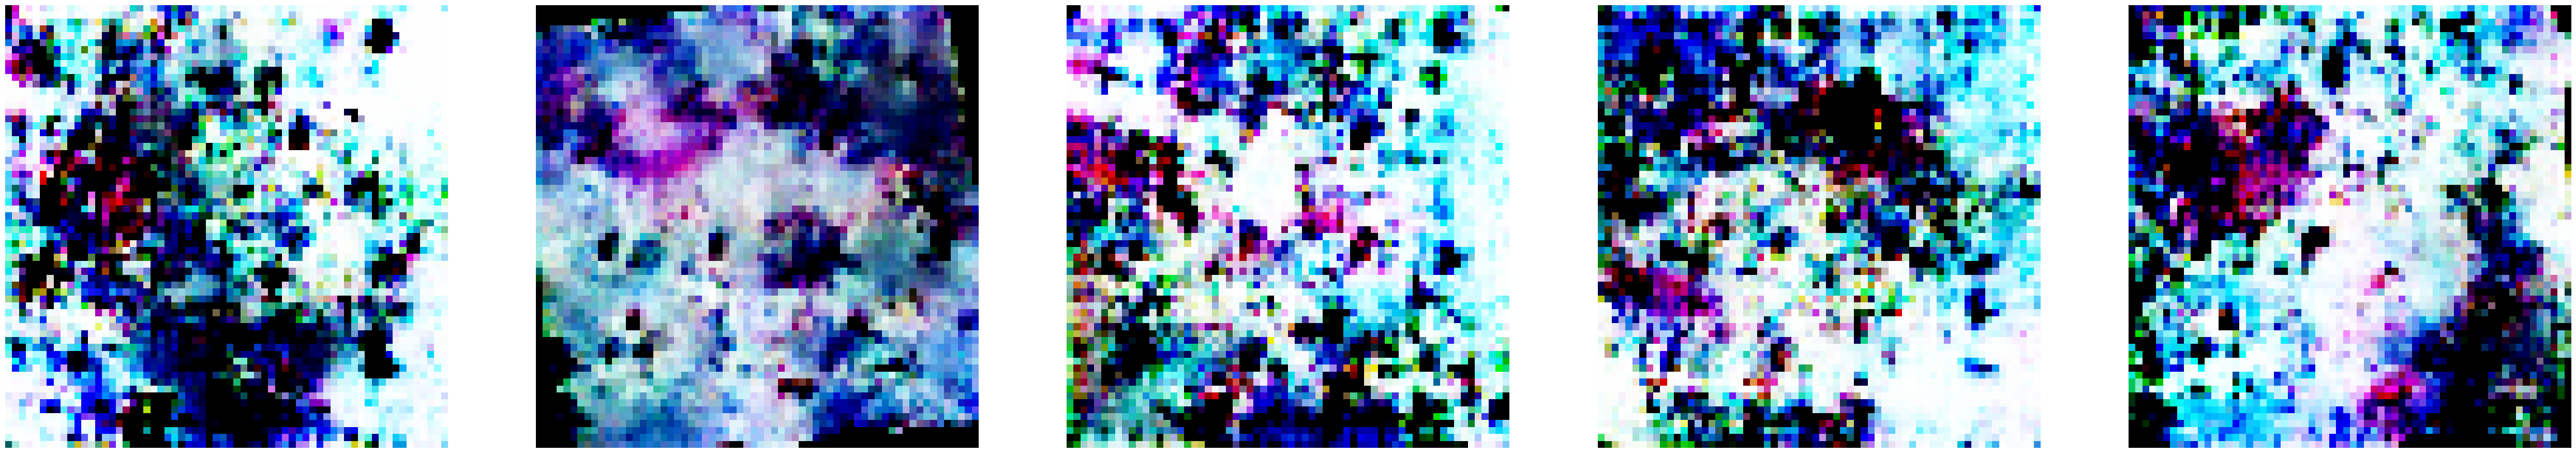

  0%|          | 0/41 [00:00<?, ?it/s]

[202/2750][20/41] Loss_D: 0.4806 Loss_G: 3.6350 D(x): 0.7893 D(G(z)): 0.0635 / 0.0227
[202/2750][40/41] Loss_D: 0.3836 Loss_G: 3.6015 D(x): 0.8504 D(G(z)): 0.0233 / 0.0222


  0%|          | 0/41 [00:00<?, ?it/s]

[203/2750][20/41] Loss_D: 0.9650 Loss_G: 2.4458 D(x): 0.6131 D(G(z)): 0.2913 / 0.0840
[203/2750][40/41] Loss_D: 0.5174 Loss_G: 2.8460 D(x): 0.7759 D(G(z)): 0.0891 / 0.0581


  0%|          | 0/41 [00:00<?, ?it/s]

[204/2750][20/41] Loss_D: 0.7169 Loss_G: 2.8506 D(x): 0.8115 D(G(z)): 0.2166 / 0.0563
[204/2750][40/41] Loss_D: 0.6141 Loss_G: 2.4570 D(x): 0.6933 D(G(z)): 0.1067 / 0.0835


  0%|          | 0/41 [00:00<?, ?it/s]

[205/2750][20/41] Loss_D: 1.0232 Loss_G: 3.0322 D(x): 0.8456 D(G(z)): 0.3779 / 0.0557
[205/2750][40/41] Loss_D: 0.7657 Loss_G: 2.6578 D(x): 0.8838 D(G(z)): 0.2965 / 0.0677


  0%|          | 0/41 [00:00<?, ?it/s]

[206/2750][20/41] Loss_D: 0.8760 Loss_G: 2.9570 D(x): 0.8855 D(G(z)): 0.3929 / 0.0487
[206/2750][40/41] Loss_D: 0.6225 Loss_G: 2.7642 D(x): 0.7913 D(G(z)): 0.0780 / 0.0578


  0%|          | 0/41 [00:00<?, ?it/s]

[207/2750][20/41] Loss_D: 0.7861 Loss_G: 2.6929 D(x): 0.7428 D(G(z)): 0.2734 / 0.0583
[207/2750][40/41] Loss_D: 1.0193 Loss_G: 2.5481 D(x): 0.5420 D(G(z)): 0.2867 / 0.0854


  0%|          | 0/41 [00:00<?, ?it/s]

[208/2750][20/41] Loss_D: 0.8716 Loss_G: 2.6746 D(x): 0.6779 D(G(z)): 0.2626 / 0.0579
[208/2750][40/41] Loss_D: 1.3061 Loss_G: 3.7500 D(x): 0.8751 D(G(z)): 0.5722 / 0.0219


  0%|          | 0/41 [00:00<?, ?it/s]

[209/2750][20/41] Loss_D: 1.2553 Loss_G: 1.4576 D(x): 0.3584 D(G(z)): 0.0989 / 0.2463
[209/2750][40/41] Loss_D: 0.5035 Loss_G: 2.9643 D(x): 0.8400 D(G(z)): 0.1116 / 0.0479


  0%|          | 0/41 [00:00<?, ?it/s]

[210/2750][20/41] Loss_D: 0.5430 Loss_G: 2.3118 D(x): 0.7281 D(G(z)): 0.0810 / 0.0897
[210/2750][40/41] Loss_D: 0.4814 Loss_G: 2.3007 D(x): 0.7655 D(G(z)): 0.0760 / 0.1036


  0%|          | 0/41 [00:00<?, ?it/s]

[211/2750][20/41] Loss_D: 0.4736 Loss_G: 2.8292 D(x): 0.8013 D(G(z)): 0.0527 / 0.0586
[211/2750][40/41] Loss_D: 0.6688 Loss_G: 2.4280 D(x): 0.7241 D(G(z)): 0.1418 / 0.0793


  0%|          | 0/41 [00:00<?, ?it/s]

[212/2750][20/41] Loss_D: 0.8576 Loss_G: 1.7946 D(x): 0.6320 D(G(z)): 0.2534 / 0.1648
[212/2750][40/41] Loss_D: 0.5804 Loss_G: 2.4433 D(x): 0.7990 D(G(z)): 0.1539 / 0.0796


  0%|          | 0/41 [00:00<?, ?it/s]

[213/2750][20/41] Loss_D: 0.5720 Loss_G: 2.8439 D(x): 0.8198 D(G(z)): 0.1637 / 0.0615
[213/2750][40/41] Loss_D: 0.8455 Loss_G: 2.5201 D(x): 0.7217 D(G(z)): 0.2999 / 0.0812


  0%|          | 0/41 [00:00<?, ?it/s]

[214/2750][20/41] Loss_D: 0.5892 Loss_G: 2.6711 D(x): 0.7403 D(G(z)): 0.1349 / 0.0663
[214/2750][40/41] Loss_D: 1.3184 Loss_G: 4.3750 D(x): 0.8814 D(G(z)): 0.5479 / 0.0104


  0%|          | 0/41 [00:00<?, ?it/s]

[215/2750][20/41] Loss_D: 0.4948 Loss_G: 3.4541 D(x): 0.7501 D(G(z)): 0.0643 / 0.0303
[215/2750][40/41] Loss_D: 0.7680 Loss_G: 3.5450 D(x): 0.8471 D(G(z)): 0.2998 / 0.0245


  0%|          | 0/41 [00:00<?, ?it/s]

[216/2750][20/41] Loss_D: 0.7358 Loss_G: 2.8700 D(x): 0.5622 D(G(z)): 0.0588 / 0.0545
[216/2750][40/41] Loss_D: 0.9950 Loss_G: 3.3001 D(x): 0.9367 D(G(z)): 0.4363 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[217/2750][20/41] Loss_D: 0.8545 Loss_G: 3.8153 D(x): 0.8047 D(G(z)): 0.3486 / 0.0265
[217/2750][40/41] Loss_D: 0.6393 Loss_G: 2.2500 D(x): 0.7472 D(G(z)): 0.1776 / 0.1172


  0%|          | 0/41 [00:00<?, ?it/s]

[218/2750][20/41] Loss_D: 1.2128 Loss_G: 2.7874 D(x): 0.3291 D(G(z)): 0.0260 / 0.0767
[218/2750][40/41] Loss_D: 0.5188 Loss_G: 3.8181 D(x): 0.7181 D(G(z)): 0.0348 / 0.0226


  0%|          | 0/41 [00:00<?, ?it/s]

[219/2750][20/41] Loss_D: 0.4937 Loss_G: 3.7332 D(x): 0.8777 D(G(z)): 0.1159 / 0.0219
[219/2750][40/41] Loss_D: 0.6938 Loss_G: 3.2576 D(x): 0.5484 D(G(z)): 0.0157 / 0.0384


  0%|          | 0/41 [00:00<?, ?it/s]

[220/2750][20/41] Loss_D: 0.7517 Loss_G: 3.0788 D(x): 0.7511 D(G(z)): 0.2496 / 0.0517
[220/2750][40/41] Loss_D: 0.6426 Loss_G: 2.6654 D(x): 0.8555 D(G(z)): 0.2412 / 0.0589


  0%|          | 0/41 [00:00<?, ?it/s]

[221/2750][20/41] Loss_D: 0.8875 Loss_G: 3.3166 D(x): 0.8394 D(G(z)): 0.3587 / 0.0429
[221/2750][40/41] Loss_D: 0.5827 Loss_G: 2.8598 D(x): 0.8335 D(G(z)): 0.1782 / 0.0532


  0%|          | 0/41 [00:00<?, ?it/s]

[222/2750][20/41] Loss_D: 0.6281 Loss_G: 3.1951 D(x): 0.8870 D(G(z)): 0.2150 / 0.0435
[222/2750][40/41] Loss_D: 0.6554 Loss_G: 2.7689 D(x): 0.7824 D(G(z)): 0.1713 / 0.0689


  0%|          | 0/41 [00:00<?, ?it/s]

[223/2750][20/41] Loss_D: 0.9060 Loss_G: 2.5481 D(x): 0.5518 D(G(z)): 0.0915 / 0.0880
[223/2750][40/41] Loss_D: 0.5312 Loss_G: 2.9380 D(x): 0.8540 D(G(z)): 0.1462 / 0.0672


  0%|          | 0/41 [00:00<?, ?it/s]

[224/2750][20/41] Loss_D: 0.7687 Loss_G: 1.7096 D(x): 0.6141 D(G(z)): 0.1671 / 0.1718
[224/2750][40/41] Loss_D: 0.6606 Loss_G: 2.9255 D(x): 0.6782 D(G(z)): 0.0926 / 0.0496


  0%|          | 0/41 [00:00<?, ?it/s]

[225/2750][20/41] Loss_D: 0.8056 Loss_G: 2.4701 D(x): 0.5755 D(G(z)): 0.0937 / 0.1003
[225/2750][40/41] Loss_D: 1.3416 Loss_G: 2.8934 D(x): 0.8730 D(G(z)): 0.5844 / 0.0515


  0%|          | 0/41 [00:00<?, ?it/s]

[226/2750][20/41] Loss_D: 0.9747 Loss_G: 2.2392 D(x): 0.4386 D(G(z)): 0.0686 / 0.1127
[226/2750][40/41] Loss_D: 0.5548 Loss_G: 3.1473 D(x): 0.8145 D(G(z)): 0.1613 / 0.0371


  0%|          | 0/41 [00:00<?, ?it/s]

[227/2750][20/41] Loss_D: 0.5719 Loss_G: 2.7690 D(x): 0.7467 D(G(z)): 0.1139 / 0.0572
[227/2750][40/41] Loss_D: 1.8446 Loss_G: 2.9452 D(x): 0.1860 D(G(z)): 0.0088 / 0.0562


  0%|          | 0/41 [00:00<?, ?it/s]

[228/2750][20/41] Loss_D: 1.1246 Loss_G: 4.4250 D(x): 0.3528 D(G(z)): 0.0030 / 0.0135
[228/2750][40/41] Loss_D: 0.4880 Loss_G: 2.5844 D(x): 0.7726 D(G(z)): 0.0646 / 0.0669


  0%|          | 0/41 [00:00<?, ?it/s]

[229/2750][20/41] Loss_D: 0.8260 Loss_G: 1.6162 D(x): 0.5120 D(G(z)): 0.0830 / 0.2021
[229/2750][40/41] Loss_D: 0.6757 Loss_G: 2.5958 D(x): 0.8001 D(G(z)): 0.1895 / 0.0760


  0%|          | 0/41 [00:00<?, ?it/s]

[230/2750][20/41] Loss_D: 0.4204 Loss_G: 3.1734 D(x): 0.8884 D(G(z)): 0.0698 / 0.0415
[230/2750][40/41] Loss_D: 1.0730 Loss_G: 1.7138 D(x): 0.3846 D(G(z)): 0.0582 / 0.1931


  0%|          | 0/41 [00:00<?, ?it/s]

[231/2750][20/41] Loss_D: 0.5304 Loss_G: 2.6166 D(x): 0.8851 D(G(z)): 0.1555 / 0.0683
[231/2750][40/41] Loss_D: 0.4906 Loss_G: 3.2326 D(x): 0.7295 D(G(z)): 0.0389 / 0.0494


  0%|          | 0/41 [00:00<?, ?it/s]

[232/2750][20/41] Loss_D: 0.7770 Loss_G: 2.9553 D(x): 0.7666 D(G(z)): 0.2518 / 0.0575
[232/2750][40/41] Loss_D: 0.9652 Loss_G: 2.8892 D(x): 0.4144 D(G(z)): 0.0186 / 0.0711


  0%|          | 0/41 [00:00<?, ?it/s]

[233/2750][20/41] Loss_D: 0.6737 Loss_G: 2.6755 D(x): 0.6943 D(G(z)): 0.1459 / 0.0847
[233/2750][40/41] Loss_D: 0.4628 Loss_G: 3.1787 D(x): 0.9405 D(G(z)): 0.0772 / 0.0403


  0%|          | 0/41 [00:00<?, ?it/s]

[234/2750][20/41] Loss_D: 1.2406 Loss_G: 1.8414 D(x): 0.4195 D(G(z)): 0.1498 / 0.1520
[234/2750][40/41] Loss_D: 1.6841 Loss_G: 2.1995 D(x): 0.2122 D(G(z)): 0.0452 / 0.1374


  0%|          | 0/41 [00:00<?, ?it/s]

[235/2750][20/41] Loss_D: 0.5834 Loss_G: 2.6396 D(x): 0.7052 D(G(z)): 0.0763 / 0.0697
[235/2750][40/41] Loss_D: 0.5496 Loss_G: 4.5820 D(x): 0.7001 D(G(z)): 0.0134 / 0.0109


  0%|          | 0/41 [00:00<?, ?it/s]

[236/2750][20/41] Loss_D: 0.7661 Loss_G: 2.5714 D(x): 0.5414 D(G(z)): 0.0276 / 0.0799
[236/2750][40/41] Loss_D: 0.7602 Loss_G: 2.6701 D(x): 0.5231 D(G(z)): 0.0211 / 0.0672


  0%|          | 0/41 [00:00<?, ?it/s]

[237/2750][20/41] Loss_D: 0.6836 Loss_G: 2.6153 D(x): 0.7234 D(G(z)): 0.1663 / 0.0832
[237/2750][40/41] Loss_D: 1.5176 Loss_G: 4.8737 D(x): 0.9842 D(G(z)): 0.6135 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[238/2750][20/41] Loss_D: 0.4242 Loss_G: 2.7513 D(x): 0.9365 D(G(z)): 0.0672 / 0.0560
[238/2750][40/41] Loss_D: 1.1442 Loss_G: 2.8937 D(x): 0.3955 D(G(z)): 0.0934 / 0.0664


  0%|          | 0/41 [00:00<?, ?it/s]

[239/2750][20/41] Loss_D: 0.6729 Loss_G: 2.3529 D(x): 0.6650 D(G(z)): 0.1334 / 0.1054
[239/2750][40/41] Loss_D: 0.8903 Loss_G: 4.0479 D(x): 0.9322 D(G(z)): 0.3928 / 0.0133


  0%|          | 0/41 [00:00<?, ?it/s]

[240/2750][20/41] Loss_D: 0.9473 Loss_G: 2.7964 D(x): 0.4469 D(G(z)): 0.0514 / 0.0621
[240/2750][40/41] Loss_D: 0.6961 Loss_G: 2.1752 D(x): 0.6653 D(G(z)): 0.1277 / 0.1179


  0%|          | 0/41 [00:00<?, ?it/s]

[241/2750][20/41] Loss_D: 0.8427 Loss_G: 2.2966 D(x): 0.6582 D(G(z)): 0.2516 / 0.1010
[241/2750][40/41] Loss_D: 1.1409 Loss_G: 2.8474 D(x): 0.8841 D(G(z)): 0.4993 / 0.0487


  0%|          | 0/41 [00:00<?, ?it/s]

[242/2750][20/41] Loss_D: 0.8397 Loss_G: 3.9569 D(x): 0.8037 D(G(z)): 0.3009 / 0.0243
[242/2750][40/41] Loss_D: 1.1583 Loss_G: 1.8626 D(x): 0.4605 D(G(z)): 0.2553 / 0.1643


  0%|          | 0/41 [00:00<?, ?it/s]

[243/2750][20/41] Loss_D: 1.3892 Loss_G: 2.1249 D(x): 0.3418 D(G(z)): 0.1772 / 0.1162
[243/2750][40/41] Loss_D: 0.6365 Loss_G: 3.4662 D(x): 0.6744 D(G(z)): 0.0792 / 0.0288


  0%|          | 0/41 [00:00<?, ?it/s]

[244/2750][20/41] Loss_D: 0.7223 Loss_G: 2.5541 D(x): 0.6755 D(G(z)): 0.1347 / 0.0737
[244/2750][40/41] Loss_D: 1.0600 Loss_G: 3.2584 D(x): 0.3676 D(G(z)): 0.0193 / 0.0343


  0%|          | 0/41 [00:00<?, ?it/s]

[245/2750][20/41] Loss_D: 0.6712 Loss_G: 2.5086 D(x): 0.7947 D(G(z)): 0.2307 / 0.0730
[245/2750][40/41] Loss_D: 1.2370 Loss_G: 3.8152 D(x): 0.8269 D(G(z)): 0.5308 / 0.0184


  0%|          | 0/41 [00:00<?, ?it/s]

[246/2750][20/41] Loss_D: 0.6586 Loss_G: 3.0572 D(x): 0.7974 D(G(z)): 0.2089 / 0.0431
[246/2750][40/41] Loss_D: 0.9221 Loss_G: 2.4612 D(x): 0.5617 D(G(z)): 0.1901 / 0.0891


  0%|          | 0/41 [00:00<?, ?it/s]

[247/2750][20/41] Loss_D: 0.4936 Loss_G: 3.4569 D(x): 0.7105 D(G(z)): 0.0221 / 0.0280
[247/2750][40/41] Loss_D: 0.6878 Loss_G: 3.2955 D(x): 0.6251 D(G(z)): 0.0236 / 0.0422


  0%|          | 0/41 [00:00<?, ?it/s]

[248/2750][20/41] Loss_D: 0.5216 Loss_G: 2.3889 D(x): 0.9738 D(G(z)): 0.0868 / 0.1027
[248/2750][40/41] Loss_D: 0.5393 Loss_G: 3.0325 D(x): 0.7476 D(G(z)): 0.0927 / 0.0551


  0%|          | 0/41 [00:00<?, ?it/s]

[249/2750][20/41] Loss_D: 1.1010 Loss_G: 3.0615 D(x): 0.5805 D(G(z)): 0.2531 / 0.0593
[249/2750][40/41] Loss_D: 0.7647 Loss_G: 1.8084 D(x): 0.6346 D(G(z)): 0.1683 / 0.1647


  0%|          | 0/41 [00:00<?, ?it/s]

[250/2750][20/41] Loss_D: 0.8023 Loss_G: 3.0144 D(x): 0.5584 D(G(z)): 0.0813 / 0.0447
[250/2750][40/41] Loss_D: 0.8454 Loss_G: 1.8610 D(x): 0.4781 D(G(z)): 0.0351 / 0.1602


  0%|          | 0/41 [00:00<?, ?it/s]

[251/2750][20/41] Loss_D: 1.2856 Loss_G: 3.2410 D(x): 0.3172 D(G(z)): 0.0185 / 0.0496
[251/2750][40/41] Loss_D: 0.6669 Loss_G: 3.0944 D(x): 0.9394 D(G(z)): 0.2215 / 0.0405


  0%|          | 0/41 [00:00<?, ?it/s]

[252/2750][20/41] Loss_D: 0.6703 Loss_G: 3.3813 D(x): 0.8333 D(G(z)): 0.2043 / 0.0277
[252/2750][40/41] Loss_D: 1.5153 Loss_G: 3.1607 D(x): 0.8481 D(G(z)): 0.6326 / 0.0372


  0%|          | 0/41 [00:00<?, ?it/s]

[253/2750][20/41] Loss_D: 1.0360 Loss_G: 3.7809 D(x): 0.9607 D(G(z)): 0.4390 / 0.0218
[253/2750][40/41] Loss_D: 0.7188 Loss_G: 3.2568 D(x): 0.5288 D(G(z)): 0.0286 / 0.0409


  0%|          | 0/41 [00:00<?, ?it/s]

[254/2750][20/41] Loss_D: 1.0737 Loss_G: 3.2065 D(x): 0.7819 D(G(z)): 0.4070 / 0.0367
[254/2750][40/41] Loss_D: 0.5749 Loss_G: 2.9753 D(x): 0.8191 D(G(z)): 0.1163 / 0.0471


  0%|          | 0/41 [00:00<?, ?it/s]

[255/2750][20/41] Loss_D: 0.5019 Loss_G: 3.9590 D(x): 0.7594 D(G(z)): 0.0405 / 0.0180
[255/2750][40/41] Loss_D: 0.7339 Loss_G: 2.3879 D(x): 0.5818 D(G(z)): 0.0621 / 0.0811


  0%|          | 0/41 [00:00<?, ?it/s]

[256/2750][20/41] Loss_D: 1.4863 Loss_G: 4.3741 D(x): 0.9644 D(G(z)): 0.6119 / 0.0109
[256/2750][40/41] Loss_D: 0.7372 Loss_G: 3.3192 D(x): 0.8708 D(G(z)): 0.2778 / 0.0330


  0%|          | 0/41 [00:00<?, ?it/s]

[257/2750][20/41] Loss_D: 0.9616 Loss_G: 3.1887 D(x): 0.7302 D(G(z)): 0.2221 / 0.0590
[257/2750][40/41] Loss_D: 0.6861 Loss_G: 2.3515 D(x): 0.7558 D(G(z)): 0.1976 / 0.0871


  0%|          | 0/41 [00:00<?, ?it/s]

[258/2750][20/41] Loss_D: 0.5591 Loss_G: 2.7474 D(x): 0.7015 D(G(z)): 0.0665 / 0.0637
[258/2750][40/41] Loss_D: 1.0291 Loss_G: 3.4852 D(x): 0.7993 D(G(z)): 0.4275 / 0.0296


  0%|          | 0/41 [00:00<?, ?it/s]

[259/2750][20/41] Loss_D: 0.8318 Loss_G: 2.2972 D(x): 0.6503 D(G(z)): 0.1724 / 0.1083
[259/2750][40/41] Loss_D: 1.0172 Loss_G: 3.4616 D(x): 0.8881 D(G(z)): 0.4572 / 0.0281


  0%|          | 0/41 [00:00<?, ?it/s]

[260/2750][20/41] Loss_D: 0.4871 Loss_G: 2.8519 D(x): 0.8340 D(G(z)): 0.1088 / 0.0552
[260/2750][40/41] Loss_D: 0.7947 Loss_G: 2.1143 D(x): 0.6380 D(G(z)): 0.1385 / 0.1221


  0%|          | 0/41 [00:00<?, ?it/s]

[261/2750][20/41] Loss_D: 0.4004 Loss_G: 4.2590 D(x): 0.9295 D(G(z)): 0.0359 / 0.0165
[261/2750][40/41] Loss_D: 0.4744 Loss_G: 3.0656 D(x): 0.8732 D(G(z)): 0.0980 / 0.0547


  0%|          | 0/41 [00:00<?, ?it/s]

[262/2750][20/41] Loss_D: 1.0107 Loss_G: 1.9480 D(x): 0.4230 D(G(z)): 0.0363 / 0.1826
[262/2750][40/41] Loss_D: 0.4737 Loss_G: 2.7711 D(x): 0.8272 D(G(z)): 0.0621 / 0.0599


  0%|          | 0/41 [00:00<?, ?it/s]

[263/2750][20/41] Loss_D: 0.7725 Loss_G: 3.1289 D(x): 0.5245 D(G(z)): 0.0176 / 0.0569
[263/2750][40/41] Loss_D: 0.5592 Loss_G: 3.7416 D(x): 0.8574 D(G(z)): 0.1512 / 0.0227


  0%|          | 0/41 [00:00<?, ?it/s]

[264/2750][20/41] Loss_D: 0.7072 Loss_G: 3.2019 D(x): 0.7130 D(G(z)): 0.1855 / 0.0440
[264/2750][40/41] Loss_D: 0.5433 Loss_G: 2.7185 D(x): 0.8295 D(G(z)): 0.1405 / 0.0701


  0%|          | 0/41 [00:00<?, ?it/s]

[265/2750][20/41] Loss_D: 0.5537 Loss_G: 2.6864 D(x): 0.7125 D(G(z)): 0.0786 / 0.0629
[265/2750][40/41] Loss_D: 0.8010 Loss_G: 3.3322 D(x): 0.9750 D(G(z)): 0.2594 / 0.0430


  0%|          | 0/41 [00:00<?, ?it/s]

[266/2750][20/41] Loss_D: 0.3936 Loss_G: 3.2185 D(x): 0.8805 D(G(z)): 0.0296 / 0.0417
[266/2750][40/41] Loss_D: 0.5561 Loss_G: 2.9918 D(x): 0.8709 D(G(z)): 0.1623 / 0.0523


  0%|          | 0/41 [00:00<?, ?it/s]

[267/2750][20/41] Loss_D: 0.9479 Loss_G: 2.9182 D(x): 0.4488 D(G(z)): 0.0558 / 0.0551
[267/2750][40/41] Loss_D: 1.7855 Loss_G: 2.5116 D(x): 0.1994 D(G(z)): 0.0295 / 0.0992


  0%|          | 0/41 [00:00<?, ?it/s]

[268/2750][20/41] Loss_D: 1.0356 Loss_G: 2.3039 D(x): 0.4312 D(G(z)): 0.1073 / 0.1023
[268/2750][40/41] Loss_D: 0.9703 Loss_G: 4.0180 D(x): 0.9268 D(G(z)): 0.3965 / 0.0164


  0%|          | 0/41 [00:00<?, ?it/s]

[269/2750][20/41] Loss_D: 0.9410 Loss_G: 1.7640 D(x): 0.5386 D(G(z)): 0.1617 / 0.2182
[269/2750][40/41] Loss_D: 0.5304 Loss_G: 3.9207 D(x): 0.6939 D(G(z)): 0.0345 / 0.0178


  0%|          | 0/41 [00:00<?, ?it/s]

[270/2750][20/41] Loss_D: 0.7061 Loss_G: 2.7765 D(x): 0.6640 D(G(z)): 0.1283 / 0.0668
[270/2750][40/41] Loss_D: 0.6933 Loss_G: 2.7783 D(x): 0.7984 D(G(z)): 0.2336 / 0.0595


  0%|          | 0/41 [00:00<?, ?it/s]

[271/2750][20/41] Loss_D: 0.5449 Loss_G: 3.0599 D(x): 0.8930 D(G(z)): 0.1641 / 0.0433
[271/2750][40/41] Loss_D: 0.4375 Loss_G: 4.0467 D(x): 0.7923 D(G(z)): 0.0300 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[272/2750][20/41] Loss_D: 0.4545 Loss_G: 3.6894 D(x): 0.8660 D(G(z)): 0.0697 / 0.0268
[272/2750][40/41] Loss_D: 0.7563 Loss_G: 2.6765 D(x): 0.6037 D(G(z)): 0.1065 / 0.0683


  0%|          | 0/41 [00:00<?, ?it/s]

[273/2750][20/41] Loss_D: 0.4178 Loss_G: 4.1591 D(x): 0.8805 D(G(z)): 0.0358 / 0.0198
[273/2750][40/41] Loss_D: 0.9809 Loss_G: 3.9953 D(x): 0.9726 D(G(z)): 0.3595 / 0.0154


  0%|          | 0/41 [00:00<?, ?it/s]

[274/2750][20/41] Loss_D: 0.5085 Loss_G: 2.5267 D(x): 0.7544 D(G(z)): 0.0630 / 0.0798
[274/2750][40/41] Loss_D: 0.8081 Loss_G: 3.2935 D(x): 0.5681 D(G(z)): 0.0306 / 0.0422


  0%|          | 0/41 [00:00<?, ?it/s]

[275/2750][20/41] Loss_D: 1.0952 Loss_G: 4.1893 D(x): 0.8572 D(G(z)): 0.4231 / 0.0132
[275/2750][40/41] Loss_D: 0.5910 Loss_G: 3.4977 D(x): 0.6427 D(G(z)): 0.0307 / 0.0397


  0%|          | 0/41 [00:00<?, ?it/s]

[276/2750][20/41] Loss_D: 0.6469 Loss_G: 2.7583 D(x): 0.7531 D(G(z)): 0.1606 / 0.0589
[276/2750][40/41] Loss_D: 0.6669 Loss_G: 3.3956 D(x): 0.5957 D(G(z)): 0.0195 / 0.0306


  0%|          | 0/41 [00:00<?, ?it/s]

[277/2750][20/41] Loss_D: 0.9538 Loss_G: 2.0845 D(x): 0.4860 D(G(z)): 0.1098 / 0.1335
[277/2750][40/41] Loss_D: 1.0203 Loss_G: 3.2381 D(x): 0.4623 D(G(z)): 0.0183 / 0.0514


  0%|          | 0/41 [00:00<?, ?it/s]

[278/2750][20/41] Loss_D: 0.6004 Loss_G: 2.2596 D(x): 0.6550 D(G(z)): 0.0618 / 0.1159
[278/2750][40/41] Loss_D: 0.9578 Loss_G: 3.7828 D(x): 0.8737 D(G(z)): 0.4070 / 0.0450


  0%|          | 0/41 [00:00<?, ?it/s]

[279/2750][20/41] Loss_D: 0.7535 Loss_G: 2.4081 D(x): 0.7162 D(G(z)): 0.2275 / 0.0951
[279/2750][40/41] Loss_D: 1.0197 Loss_G: 2.8590 D(x): 0.4617 D(G(z)): 0.0497 / 0.0592


  0%|          | 0/41 [00:00<?, ?it/s]

[280/2750][20/41] Loss_D: 0.8714 Loss_G: 3.5092 D(x): 0.7815 D(G(z)): 0.3104 / 0.0258
[280/2750][40/41] Loss_D: 0.8755 Loss_G: 3.0091 D(x): 0.4623 D(G(z)): 0.0114 / 0.0582


  0%|          | 0/41 [00:00<?, ?it/s]

[281/2750][20/41] Loss_D: 1.0970 Loss_G: 4.7557 D(x): 0.9081 D(G(z)): 0.4826 / 0.0065
[281/2750][40/41] Loss_D: 0.7193 Loss_G: 3.2673 D(x): 0.8949 D(G(z)): 0.2328 / 0.0373


  0%|          | 0/41 [00:00<?, ?it/s]

[282/2750][20/41] Loss_D: 0.9587 Loss_G: 2.2860 D(x): 0.5726 D(G(z)): 0.2091 / 0.1464
[282/2750][40/41] Loss_D: 0.6592 Loss_G: 3.3497 D(x): 0.6537 D(G(z)): 0.0718 / 0.0357


  0%|          | 0/41 [00:00<?, ?it/s]

[283/2750][20/41] Loss_D: 0.8492 Loss_G: 2.2149 D(x): 0.5564 D(G(z)): 0.0787 / 0.1162
[283/2750][40/41] Loss_D: 0.7287 Loss_G: 2.3254 D(x): 0.6177 D(G(z)): 0.1240 / 0.0945


  0%|          | 0/41 [00:00<?, ?it/s]

[284/2750][20/41] Loss_D: 0.5092 Loss_G: 2.7561 D(x): 0.8810 D(G(z)): 0.1116 / 0.0631
[284/2750][40/41] Loss_D: 0.8967 Loss_G: 2.4045 D(x): 0.5850 D(G(z)): 0.1846 / 0.0823


  0%|          | 0/41 [00:00<?, ?it/s]

[285/2750][20/41] Loss_D: 0.5312 Loss_G: 3.2741 D(x): 0.8475 D(G(z)): 0.1311 / 0.0350
[285/2750][40/41] Loss_D: 1.6919 Loss_G: 5.4706 D(x): 0.9512 D(G(z)): 0.6569 / 0.0074


  0%|          | 0/41 [00:00<?, ?it/s]

[286/2750][20/41] Loss_D: 0.9289 Loss_G: 1.9966 D(x): 0.6302 D(G(z)): 0.1950 / 0.1524
[286/2750][40/41] Loss_D: 1.2414 Loss_G: 2.0547 D(x): 0.3563 D(G(z)): 0.0378 / 0.1304


  0%|          | 0/41 [00:00<?, ?it/s]

[287/2750][20/41] Loss_D: 0.5875 Loss_G: 3.7942 D(x): 0.9270 D(G(z)): 0.1936 / 0.0201
[287/2750][40/41] Loss_D: 1.3354 Loss_G: 2.5359 D(x): 0.6295 D(G(z)): 0.4128 / 0.1137


  0%|          | 0/41 [00:00<?, ?it/s]

[288/2750][20/41] Loss_D: 0.8445 Loss_G: 3.3977 D(x): 0.9230 D(G(z)): 0.3608 / 0.0298
[288/2750][40/41] Loss_D: 0.5267 Loss_G: 3.0555 D(x): 0.9080 D(G(z)): 0.1429 / 0.0441


  0%|          | 0/41 [00:00<?, ?it/s]

[289/2750][20/41] Loss_D: 0.4968 Loss_G: 3.6463 D(x): 0.7275 D(G(z)): 0.0207 / 0.0258
[289/2750][40/41] Loss_D: 0.5395 Loss_G: 2.4102 D(x): 0.7574 D(G(z)): 0.0959 / 0.0905


  0%|          | 0/41 [00:00<?, ?it/s]

[290/2750][20/41] Loss_D: 0.7449 Loss_G: 2.9536 D(x): 0.5551 D(G(z)): 0.0236 / 0.0690
[290/2750][40/41] Loss_D: 0.5053 Loss_G: 3.0056 D(x): 0.8280 D(G(z)): 0.1059 / 0.0478


  0%|          | 0/41 [00:00<?, ?it/s]

[291/2750][20/41] Loss_D: 0.6733 Loss_G: 3.3881 D(x): 0.8924 D(G(z)): 0.2300 / 0.0327
[291/2750][40/41] Loss_D: 0.6196 Loss_G: 3.0831 D(x): 0.6986 D(G(z)): 0.0717 / 0.0522


  0%|          | 0/41 [00:00<?, ?it/s]

[292/2750][20/41] Loss_D: 0.6150 Loss_G: 3.7343 D(x): 0.6833 D(G(z)): 0.0517 / 0.0221
[292/2750][40/41] Loss_D: 0.6570 Loss_G: 2.1474 D(x): 0.6909 D(G(z)): 0.1391 / 0.1164


  0%|          | 0/41 [00:00<?, ?it/s]

[293/2750][20/41] Loss_D: 0.5546 Loss_G: 3.4113 D(x): 0.8245 D(G(z)): 0.1238 / 0.0291
[293/2750][40/41] Loss_D: 1.0167 Loss_G: 2.4259 D(x): 0.4605 D(G(z)): 0.0530 / 0.1128


  0%|          | 0/41 [00:00<?, ?it/s]

[294/2750][20/41] Loss_D: 0.6043 Loss_G: 2.7937 D(x): 0.9268 D(G(z)): 0.2024 / 0.0535
[294/2750][40/41] Loss_D: 0.4857 Loss_G: 2.8830 D(x): 0.7721 D(G(z)): 0.0544 / 0.0503


  0%|          | 0/41 [00:00<?, ?it/s]

[295/2750][20/41] Loss_D: 0.6073 Loss_G: 3.6556 D(x): 0.8735 D(G(z)): 0.1973 / 0.0258
[295/2750][40/41] Loss_D: 0.4185 Loss_G: 3.5437 D(x): 0.8619 D(G(z)): 0.0516 / 0.0339


  0%|          | 0/41 [00:00<?, ?it/s]

[296/2750][20/41] Loss_D: 0.6566 Loss_G: 2.9083 D(x): 0.8884 D(G(z)): 0.2355 / 0.0595
[296/2750][40/41] Loss_D: 0.4501 Loss_G: 3.3372 D(x): 0.8690 D(G(z)): 0.0675 / 0.0317


  0%|          | 0/41 [00:00<?, ?it/s]

[297/2750][20/41] Loss_D: 0.5257 Loss_G: 2.1470 D(x): 0.7514 D(G(z)): 0.0877 / 0.1135
[297/2750][40/41] Loss_D: 0.5974 Loss_G: 3.0512 D(x): 0.7240 D(G(z)): 0.0584 / 0.0605


  0%|          | 0/41 [00:00<?, ?it/s]

[298/2750][20/41] Loss_D: 1.0145 Loss_G: 1.7847 D(x): 0.4629 D(G(z)): 0.0733 / 0.1708
[298/2750][40/41] Loss_D: 0.9088 Loss_G: 4.5511 D(x): 0.9523 D(G(z)): 0.3813 / 0.0100


  0%|          | 0/41 [00:00<?, ?it/s]

[299/2750][20/41] Loss_D: 0.5255 Loss_G: 3.1527 D(x): 0.8320 D(G(z)): 0.1103 / 0.0411
[299/2750][40/41] Loss_D: 0.5384 Loss_G: 3.3040 D(x): 0.9384 D(G(z)): 0.1507 / 0.0379


  0%|          | 0/41 [00:00<?, ?it/s]

[300/2750][20/41] Loss_D: 0.3988 Loss_G: 4.4587 D(x): 0.8361 D(G(z)): 0.0178 / 0.0122
[300/2750][40/41] Loss_D: 0.5601 Loss_G: 2.8905 D(x): 0.8113 D(G(z)): 0.1476 / 0.0485


  0%|          | 0/41 [00:00<?, ?it/s]

[301/2750][20/41] Loss_D: 0.5260 Loss_G: 3.1574 D(x): 0.8330 D(G(z)): 0.0943 / 0.0510
[301/2750][40/41] Loss_D: 0.4639 Loss_G: 2.8986 D(x): 0.8386 D(G(z)): 0.0800 / 0.0597


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999933].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999997..0.9999991].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999981].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_301.pth


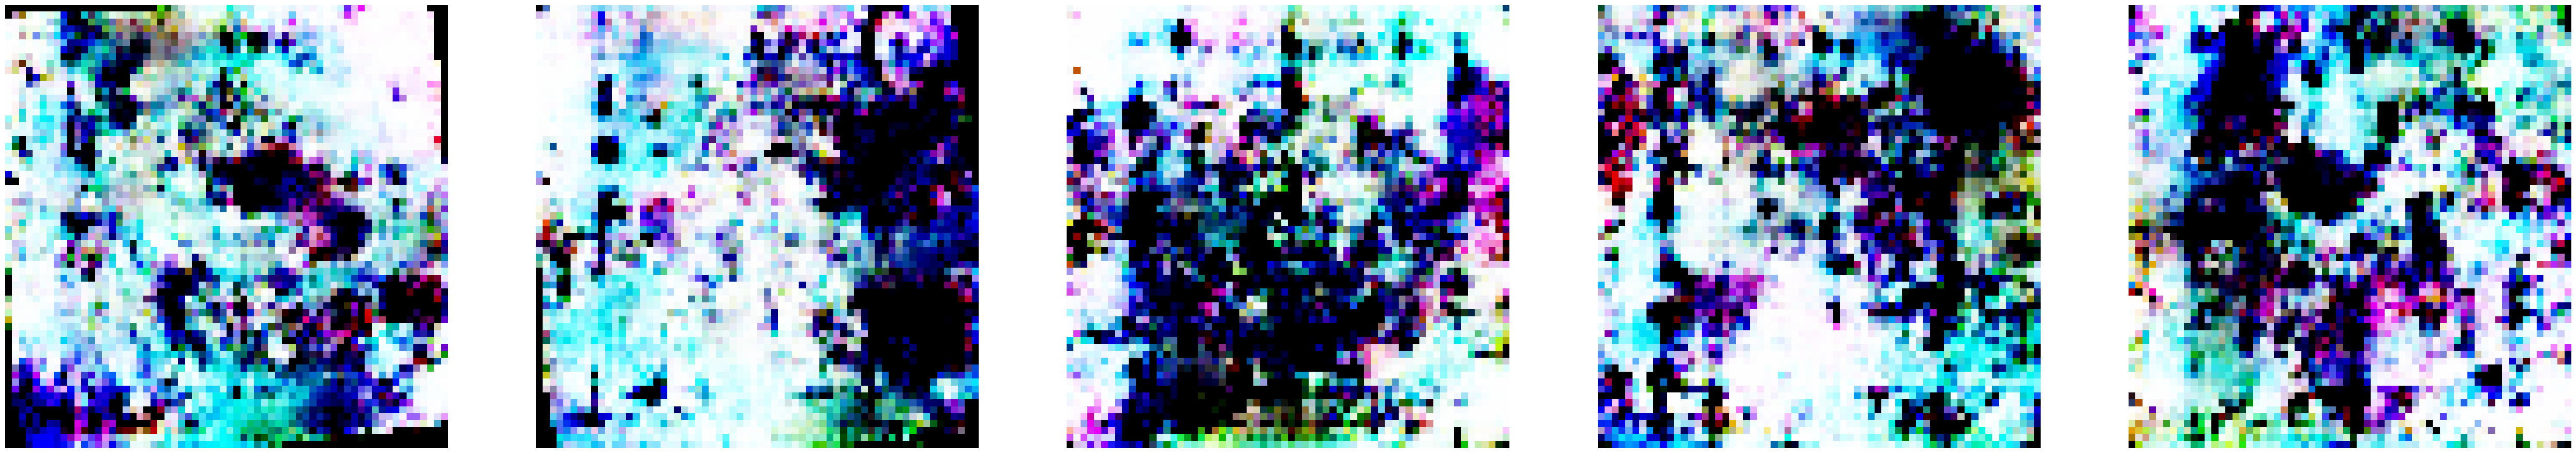

  0%|          | 0/41 [00:00<?, ?it/s]

[302/2750][20/41] Loss_D: 0.4855 Loss_G: 3.3043 D(x): 0.7433 D(G(z)): 0.0355 / 0.0413
[302/2750][40/41] Loss_D: 0.4224 Loss_G: 2.9444 D(x): 0.8749 D(G(z)): 0.0594 / 0.0497


  0%|          | 0/41 [00:00<?, ?it/s]

[303/2750][20/41] Loss_D: 0.9153 Loss_G: 2.6419 D(x): 0.5255 D(G(z)): 0.0909 / 0.1017
[303/2750][40/41] Loss_D: 0.6011 Loss_G: 3.6616 D(x): 0.9448 D(G(z)): 0.1903 / 0.0222


  0%|          | 0/41 [00:00<?, ?it/s]

[304/2750][20/41] Loss_D: 0.8691 Loss_G: 4.2039 D(x): 0.4878 D(G(z)): 0.0099 / 0.0138
[304/2750][40/41] Loss_D: 1.0703 Loss_G: 4.2054 D(x): 0.9296 D(G(z)): 0.4533 / 0.0138


  0%|          | 0/41 [00:00<?, ?it/s]

[305/2750][20/41] Loss_D: 1.1956 Loss_G: 4.5849 D(x): 0.8933 D(G(z)): 0.5089 / 0.0089
[305/2750][40/41] Loss_D: 0.5531 Loss_G: 2.7029 D(x): 0.7774 D(G(z)): 0.1023 / 0.0742


  0%|          | 0/41 [00:00<?, ?it/s]

[306/2750][20/41] Loss_D: 0.4305 Loss_G: 3.8465 D(x): 0.9107 D(G(z)): 0.0554 / 0.0208
[306/2750][40/41] Loss_D: 0.7750 Loss_G: 2.9196 D(x): 0.5385 D(G(z)): 0.0410 / 0.0509


  0%|          | 0/41 [00:00<?, ?it/s]

[307/2750][20/41] Loss_D: 0.5256 Loss_G: 2.7365 D(x): 0.7470 D(G(z)): 0.0677 / 0.0630
[307/2750][40/41] Loss_D: 0.4650 Loss_G: 3.0272 D(x): 0.7937 D(G(z)): 0.0642 / 0.0477


  0%|          | 0/41 [00:00<?, ?it/s]

[308/2750][20/41] Loss_D: 0.5212 Loss_G: 2.7537 D(x): 0.9031 D(G(z)): 0.1332 / 0.0608
[308/2750][40/41] Loss_D: 0.6361 Loss_G: 2.9004 D(x): 0.7045 D(G(z)): 0.0936 / 0.0486


  0%|          | 0/41 [00:00<?, ?it/s]

[309/2750][20/41] Loss_D: 0.7476 Loss_G: 2.8503 D(x): 0.8043 D(G(z)): 0.2303 / 0.0605
[309/2750][40/41] Loss_D: 0.5672 Loss_G: 3.5267 D(x): 0.6981 D(G(z)): 0.0432 / 0.0468


  0%|          | 0/41 [00:00<?, ?it/s]

[310/2750][20/41] Loss_D: 0.5184 Loss_G: 2.9250 D(x): 0.8776 D(G(z)): 0.1413 / 0.0471
[310/2750][40/41] Loss_D: 0.7284 Loss_G: 2.9490 D(x): 0.5976 D(G(z)): 0.0393 / 0.0607


  0%|          | 0/41 [00:00<?, ?it/s]

[311/2750][20/41] Loss_D: 0.6082 Loss_G: 3.4932 D(x): 0.8175 D(G(z)): 0.1550 / 0.0256
[311/2750][40/41] Loss_D: 0.5793 Loss_G: 2.5458 D(x): 0.6649 D(G(z)): 0.0506 / 0.0781


  0%|          | 0/41 [00:00<?, ?it/s]

[312/2750][20/41] Loss_D: 0.3898 Loss_G: 3.9269 D(x): 0.8534 D(G(z)): 0.0214 / 0.0185
[312/2750][40/41] Loss_D: 0.5577 Loss_G: 3.0133 D(x): 0.7348 D(G(z)): 0.0985 / 0.0500


  0%|          | 0/41 [00:00<?, ?it/s]

[313/2750][20/41] Loss_D: 0.5216 Loss_G: 3.7689 D(x): 0.8625 D(G(z)): 0.1074 / 0.0228
[313/2750][40/41] Loss_D: 0.6319 Loss_G: 3.8878 D(x): 0.6416 D(G(z)): 0.0272 / 0.0230


  0%|          | 0/41 [00:00<?, ?it/s]

[314/2750][20/41] Loss_D: 0.5258 Loss_G: 2.9574 D(x): 0.8322 D(G(z)): 0.1151 / 0.0574
[314/2750][40/41] Loss_D: 0.4652 Loss_G: 3.2596 D(x): 0.8543 D(G(z)): 0.0531 / 0.0522


  0%|          | 0/41 [00:00<?, ?it/s]

[315/2750][20/41] Loss_D: 0.5758 Loss_G: 2.9004 D(x): 0.8539 D(G(z)): 0.1550 / 0.0527
[315/2750][40/41] Loss_D: 0.4301 Loss_G: 3.7274 D(x): 0.8210 D(G(z)): 0.0216 / 0.0260


  0%|          | 0/41 [00:00<?, ?it/s]

[316/2750][20/41] Loss_D: 0.6384 Loss_G: 3.0955 D(x): 0.5975 D(G(z)): 0.0196 / 0.0515
[316/2750][40/41] Loss_D: 0.9419 Loss_G: 3.1253 D(x): 0.9579 D(G(z)): 0.3971 / 0.0403


  0%|          | 0/41 [00:00<?, ?it/s]

[317/2750][20/41] Loss_D: 0.7743 Loss_G: 3.7125 D(x): 0.9290 D(G(z)): 0.2934 / 0.0234
[317/2750][40/41] Loss_D: 1.1535 Loss_G: 3.6950 D(x): 0.8424 D(G(z)): 0.4982 / 0.0231


  0%|          | 0/41 [00:00<?, ?it/s]

[318/2750][20/41] Loss_D: 0.4026 Loss_G: 3.7421 D(x): 0.8971 D(G(z)): 0.0429 / 0.0230
[318/2750][40/41] Loss_D: 0.5219 Loss_G: 3.0457 D(x): 0.7654 D(G(z)): 0.0695 / 0.0573


  0%|          | 0/41 [00:00<?, ?it/s]

[319/2750][20/41] Loss_D: 1.2106 Loss_G: 1.4224 D(x): 0.5145 D(G(z)): 0.3095 / 0.2561
[319/2750][40/41] Loss_D: 0.4811 Loss_G: 3.2469 D(x): 0.7546 D(G(z)): 0.0403 / 0.0401


  0%|          | 0/41 [00:00<?, ?it/s]

[320/2750][20/41] Loss_D: 0.5461 Loss_G: 3.0732 D(x): 0.7452 D(G(z)): 0.0915 / 0.0408
[320/2750][40/41] Loss_D: 1.7426 Loss_G: 2.5067 D(x): 0.3914 D(G(z)): 0.4418 / 0.1093


  0%|          | 0/41 [00:00<?, ?it/s]

[321/2750][20/41] Loss_D: 0.5960 Loss_G: 2.2297 D(x): 0.8214 D(G(z)): 0.1883 / 0.1185
[321/2750][40/41] Loss_D: 0.5386 Loss_G: 3.2357 D(x): 0.7924 D(G(z)): 0.1178 / 0.0351


  0%|          | 0/41 [00:00<?, ?it/s]

[322/2750][20/41] Loss_D: 0.7784 Loss_G: 3.1482 D(x): 0.5281 D(G(z)): 0.0258 / 0.0466
[322/2750][40/41] Loss_D: 0.4614 Loss_G: 3.0892 D(x): 0.7910 D(G(z)): 0.0419 / 0.0404


  0%|          | 0/41 [00:00<?, ?it/s]

[323/2750][20/41] Loss_D: 0.8269 Loss_G: 2.9050 D(x): 0.7369 D(G(z)): 0.2583 / 0.0616
[323/2750][40/41] Loss_D: 1.6415 Loss_G: 2.5177 D(x): 0.3328 D(G(z)): 0.0207 / 0.1318


  0%|          | 0/41 [00:00<?, ?it/s]

[324/2750][20/41] Loss_D: 0.5373 Loss_G: 2.5415 D(x): 0.7929 D(G(z)): 0.1214 / 0.0753
[324/2750][40/41] Loss_D: 0.7407 Loss_G: 2.0404 D(x): 0.8112 D(G(z)): 0.2258 / 0.1451


  0%|          | 0/41 [00:00<?, ?it/s]

[325/2750][20/41] Loss_D: 0.6699 Loss_G: 3.1498 D(x): 0.7994 D(G(z)): 0.2178 / 0.0398
[325/2750][40/41] Loss_D: 0.6542 Loss_G: 3.0464 D(x): 0.7368 D(G(z)): 0.1575 / 0.0426


  0%|          | 0/41 [00:00<?, ?it/s]

[326/2750][20/41] Loss_D: 0.4386 Loss_G: 3.3505 D(x): 0.8865 D(G(z)): 0.0766 / 0.0363
[326/2750][40/41] Loss_D: 1.1264 Loss_G: 3.4252 D(x): 0.9621 D(G(z)): 0.4398 / 0.0314


  0%|          | 0/41 [00:00<?, ?it/s]

[327/2750][20/41] Loss_D: 0.7563 Loss_G: 3.6937 D(x): 0.8776 D(G(z)): 0.2788 / 0.0213
[327/2750][40/41] Loss_D: 0.4597 Loss_G: 3.4078 D(x): 0.8352 D(G(z)): 0.0795 / 0.0309


  0%|          | 0/41 [00:00<?, ?it/s]

[328/2750][20/41] Loss_D: 0.8251 Loss_G: 3.0705 D(x): 0.9236 D(G(z)): 0.3144 / 0.0453
[328/2750][40/41] Loss_D: 1.0649 Loss_G: 4.0719 D(x): 0.8751 D(G(z)): 0.4352 / 0.0280


  0%|          | 0/41 [00:00<?, ?it/s]

[329/2750][20/41] Loss_D: 0.4425 Loss_G: 3.3119 D(x): 0.8167 D(G(z)): 0.0539 / 0.0336
[329/2750][40/41] Loss_D: 0.5081 Loss_G: 3.8808 D(x): 0.7369 D(G(z)): 0.0154 / 0.0200


  0%|          | 0/41 [00:00<?, ?it/s]

[330/2750][20/41] Loss_D: 0.5693 Loss_G: 2.6535 D(x): 0.8246 D(G(z)): 0.1408 / 0.0684
[330/2750][40/41] Loss_D: 0.3930 Loss_G: 4.7224 D(x): 0.8518 D(G(z)): 0.0144 / 0.0118


  0%|          | 0/41 [00:00<?, ?it/s]

[331/2750][20/41] Loss_D: 0.4834 Loss_G: 3.4009 D(x): 0.9566 D(G(z)): 0.0862 / 0.0308
[331/2750][40/41] Loss_D: 0.5214 Loss_G: 3.9897 D(x): 0.6903 D(G(z)): 0.0226 / 0.0233


  0%|          | 0/41 [00:00<?, ?it/s]

[332/2750][20/41] Loss_D: 0.4559 Loss_G: 3.3367 D(x): 0.8121 D(G(z)): 0.0656 / 0.0335
[332/2750][40/41] Loss_D: 0.4336 Loss_G: 3.3428 D(x): 0.8361 D(G(z)): 0.0494 / 0.0364


  0%|          | 0/41 [00:00<?, ?it/s]

[333/2750][20/41] Loss_D: 0.4175 Loss_G: 3.8143 D(x): 0.8697 D(G(z)): 0.0409 / 0.0224
[333/2750][40/41] Loss_D: 0.4317 Loss_G: 5.1748 D(x): 0.7754 D(G(z)): 0.0039 / 0.0068


  0%|          | 0/41 [00:00<?, ?it/s]

[334/2750][20/41] Loss_D: 0.5281 Loss_G: 3.2724 D(x): 0.8267 D(G(z)): 0.1300 / 0.0370
[334/2750][40/41] Loss_D: 0.6399 Loss_G: 2.1719 D(x): 0.7306 D(G(z)): 0.1158 / 0.1400


  0%|          | 0/41 [00:00<?, ?it/s]

[335/2750][20/41] Loss_D: 0.5387 Loss_G: 3.3242 D(x): 0.6924 D(G(z)): 0.0246 / 0.0505
[335/2750][40/41] Loss_D: 0.4022 Loss_G: 3.7298 D(x): 0.8221 D(G(z)): 0.0259 / 0.0244


  0%|          | 0/41 [00:00<?, ?it/s]

[336/2750][20/41] Loss_D: 0.8688 Loss_G: 4.1315 D(x): 0.8921 D(G(z)): 0.3535 / 0.0175
[336/2750][40/41] Loss_D: 0.5892 Loss_G: 2.7861 D(x): 0.7478 D(G(z)): 0.1399 / 0.0596


  0%|          | 0/41 [00:00<?, ?it/s]

[337/2750][20/41] Loss_D: 0.4993 Loss_G: 2.6308 D(x): 0.7763 D(G(z)): 0.0749 / 0.0948
[337/2750][40/41] Loss_D: 0.6218 Loss_G: 2.4360 D(x): 0.7550 D(G(z)): 0.1441 / 0.0873


  0%|          | 0/41 [00:00<?, ?it/s]

[338/2750][20/41] Loss_D: 0.6019 Loss_G: 2.4617 D(x): 0.6660 D(G(z)): 0.0501 / 0.0964
[338/2750][40/41] Loss_D: 0.5074 Loss_G: 3.1475 D(x): 0.7239 D(G(z)): 0.0338 / 0.0505


  0%|          | 0/41 [00:00<?, ?it/s]

[339/2750][20/41] Loss_D: 0.4515 Loss_G: 2.8815 D(x): 0.8099 D(G(z)): 0.0606 / 0.0566
[339/2750][40/41] Loss_D: 0.9794 Loss_G: 1.2914 D(x): 0.4359 D(G(z)): 0.0775 / 0.3222


  0%|          | 0/41 [00:00<?, ?it/s]

[340/2750][20/41] Loss_D: 0.7243 Loss_G: 3.4629 D(x): 0.5866 D(G(z)): 0.0385 / 0.0363
[340/2750][40/41] Loss_D: 0.7194 Loss_G: 3.6909 D(x): 0.6804 D(G(z)): 0.0694 / 0.0278


  0%|          | 0/41 [00:00<?, ?it/s]

[341/2750][20/41] Loss_D: 0.6718 Loss_G: 2.9440 D(x): 0.9326 D(G(z)): 0.1798 / 0.0510
[341/2750][40/41] Loss_D: 0.6603 Loss_G: 3.0490 D(x): 0.6608 D(G(z)): 0.0725 / 0.0461


  0%|          | 0/41 [00:00<?, ?it/s]

[342/2750][20/41] Loss_D: 0.5932 Loss_G: 3.1288 D(x): 0.7943 D(G(z)): 0.1580 / 0.0428
[342/2750][40/41] Loss_D: 0.4224 Loss_G: 3.2235 D(x): 0.9191 D(G(z)): 0.0531 / 0.0391


  0%|          | 0/41 [00:00<?, ?it/s]

[343/2750][20/41] Loss_D: 0.8604 Loss_G: 4.0281 D(x): 0.9734 D(G(z)): 0.3188 / 0.0159
[343/2750][40/41] Loss_D: 0.3810 Loss_G: 4.8084 D(x): 0.8472 D(G(z)): 0.0081 / 0.0087


  0%|          | 0/41 [00:00<?, ?it/s]

[344/2750][20/41] Loss_D: 0.8454 Loss_G: 2.6025 D(x): 0.5851 D(G(z)): 0.0415 / 0.0961
[344/2750][40/41] Loss_D: 0.4017 Loss_G: 4.1413 D(x): 0.8465 D(G(z)): 0.0327 / 0.0154


  0%|          | 0/41 [00:00<?, ?it/s]

[345/2750][20/41] Loss_D: 0.8306 Loss_G: 4.2158 D(x): 0.9796 D(G(z)): 0.2907 / 0.0141
[345/2750][40/41] Loss_D: 0.5501 Loss_G: 2.7543 D(x): 0.7096 D(G(z)): 0.0571 / 0.0607


  0%|          | 0/41 [00:00<?, ?it/s]

[346/2750][20/41] Loss_D: 1.0025 Loss_G: 1.4655 D(x): 0.4513 D(G(z)): 0.0547 / 0.2588
[346/2750][40/41] Loss_D: 0.8390 Loss_G: 3.3776 D(x): 0.9717 D(G(z)): 0.3052 / 0.0329


  0%|          | 0/41 [00:00<?, ?it/s]

[347/2750][20/41] Loss_D: 1.1702 Loss_G: 3.9724 D(x): 0.9127 D(G(z)): 0.4527 / 0.0218
[347/2750][40/41] Loss_D: 0.7963 Loss_G: 2.1847 D(x): 0.5322 D(G(z)): 0.0689 / 0.1103


  0%|          | 0/41 [00:00<?, ?it/s]

[348/2750][20/41] Loss_D: 0.5335 Loss_G: 2.8551 D(x): 0.8190 D(G(z)): 0.1180 / 0.0597
[348/2750][40/41] Loss_D: 0.7379 Loss_G: 2.4686 D(x): 0.6049 D(G(z)): 0.0874 / 0.0869


  0%|          | 0/41 [00:00<?, ?it/s]

[349/2750][20/41] Loss_D: 0.5414 Loss_G: 2.6505 D(x): 0.6861 D(G(z)): 0.0450 / 0.0661
[349/2750][40/41] Loss_D: 0.7815 Loss_G: 3.2231 D(x): 0.5525 D(G(z)): 0.0203 / 0.0503


  0%|          | 0/41 [00:00<?, ?it/s]

[350/2750][20/41] Loss_D: 0.8640 Loss_G: 2.2797 D(x): 0.5187 D(G(z)): 0.0505 / 0.1430
[350/2750][40/41] Loss_D: 0.6349 Loss_G: 3.0360 D(x): 0.6881 D(G(z)): 0.1082 / 0.0578


  0%|          | 0/41 [00:00<?, ?it/s]

[351/2750][20/41] Loss_D: 0.6528 Loss_G: 3.5393 D(x): 0.9467 D(G(z)): 0.2201 / 0.0275
[351/2750][40/41] Loss_D: 0.5886 Loss_G: 3.1370 D(x): 0.8206 D(G(z)): 0.1531 / 0.0501


  0%|          | 0/41 [00:00<?, ?it/s]

[352/2750][20/41] Loss_D: 0.8000 Loss_G: 2.8762 D(x): 0.4987 D(G(z)): 0.0180 / 0.0832
[352/2750][40/41] Loss_D: 0.6892 Loss_G: 2.4224 D(x): 0.6223 D(G(z)): 0.0203 / 0.1083


  0%|          | 0/41 [00:00<?, ?it/s]

[353/2750][20/41] Loss_D: 0.6536 Loss_G: 2.6427 D(x): 0.7295 D(G(z)): 0.1537 / 0.0742
[353/2750][40/41] Loss_D: 0.4705 Loss_G: 2.8396 D(x): 0.8887 D(G(z)): 0.0541 / 0.0578


  0%|          | 0/41 [00:00<?, ?it/s]

[354/2750][20/41] Loss_D: 0.6493 Loss_G: 2.9849 D(x): 0.8371 D(G(z)): 0.2223 / 0.0541
[354/2750][40/41] Loss_D: 0.7590 Loss_G: 2.4966 D(x): 0.7022 D(G(z)): 0.1916 / 0.0839


  0%|          | 0/41 [00:00<?, ?it/s]

[355/2750][20/41] Loss_D: 0.5114 Loss_G: 3.6206 D(x): 0.8556 D(G(z)): 0.1101 / 0.0240
[355/2750][40/41] Loss_D: 0.3890 Loss_G: 3.8270 D(x): 0.9088 D(G(z)): 0.0263 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[356/2750][20/41] Loss_D: 0.9908 Loss_G: 2.4988 D(x): 0.5432 D(G(z)): 0.1850 / 0.0987
[356/2750][40/41] Loss_D: 0.4477 Loss_G: 4.1187 D(x): 0.9177 D(G(z)): 0.0474 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[357/2750][20/41] Loss_D: 0.5285 Loss_G: 3.0717 D(x): 0.7969 D(G(z)): 0.0966 / 0.0505
[357/2750][40/41] Loss_D: 0.8247 Loss_G: 3.8903 D(x): 0.8428 D(G(z)): 0.3348 / 0.0228


  0%|          | 0/41 [00:00<?, ?it/s]

[358/2750][20/41] Loss_D: 0.6444 Loss_G: 3.1053 D(x): 0.8998 D(G(z)): 0.2122 / 0.0414
[358/2750][40/41] Loss_D: 0.5323 Loss_G: 3.6243 D(x): 0.6965 D(G(z)): 0.0296 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[359/2750][20/41] Loss_D: 0.6177 Loss_G: 3.2827 D(x): 0.9251 D(G(z)): 0.1997 / 0.0344
[359/2750][40/41] Loss_D: 0.5918 Loss_G: 3.9157 D(x): 0.8579 D(G(z)): 0.1182 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[360/2750][20/41] Loss_D: 0.4585 Loss_G: 3.8703 D(x): 0.8009 D(G(z)): 0.0617 / 0.0244
[360/2750][40/41] Loss_D: 0.5106 Loss_G: 2.7684 D(x): 0.8955 D(G(z)): 0.1099 / 0.0589


  0%|          | 0/41 [00:00<?, ?it/s]

[361/2750][20/41] Loss_D: 1.1034 Loss_G: 1.9983 D(x): 0.3944 D(G(z)): 0.0507 / 0.1913
[361/2750][40/41] Loss_D: 0.6873 Loss_G: 2.4886 D(x): 0.6867 D(G(z)): 0.1226 / 0.1025


  0%|          | 0/41 [00:00<?, ?it/s]

[362/2750][20/41] Loss_D: 0.4534 Loss_G: 3.7213 D(x): 0.8684 D(G(z)): 0.0776 / 0.0224
[362/2750][40/41] Loss_D: 0.6981 Loss_G: 2.7795 D(x): 0.6731 D(G(z)): 0.1117 / 0.0747


  0%|          | 0/41 [00:00<?, ?it/s]

[363/2750][20/41] Loss_D: 0.6338 Loss_G: 2.5353 D(x): 0.7441 D(G(z)): 0.1431 / 0.0787
[363/2750][40/41] Loss_D: 0.8124 Loss_G: 1.8023 D(x): 0.5876 D(G(z)): 0.0786 / 0.1842


  0%|          | 0/41 [00:00<?, ?it/s]

[364/2750][20/41] Loss_D: 0.7051 Loss_G: 3.0935 D(x): 0.8495 D(G(z)): 0.2311 / 0.0581
[364/2750][40/41] Loss_D: 0.9034 Loss_G: 4.5437 D(x): 0.9432 D(G(z)): 0.3491 / 0.0110


  0%|          | 0/41 [00:00<?, ?it/s]

[365/2750][20/41] Loss_D: 0.6554 Loss_G: 2.6769 D(x): 0.8468 D(G(z)): 0.0945 / 0.0605
[365/2750][40/41] Loss_D: 0.7214 Loss_G: 2.6619 D(x): 0.8235 D(G(z)): 0.2001 / 0.0698


  0%|          | 0/41 [00:00<?, ?it/s]

[366/2750][20/41] Loss_D: 0.4449 Loss_G: 3.4868 D(x): 0.7972 D(G(z)): 0.0364 / 0.0391
[366/2750][40/41] Loss_D: 0.6629 Loss_G: 2.8730 D(x): 0.5983 D(G(z)): 0.0187 / 0.0614


  0%|          | 0/41 [00:00<?, ?it/s]

[367/2750][20/41] Loss_D: 0.9675 Loss_G: 2.5288 D(x): 0.4351 D(G(z)): 0.0513 / 0.1025
[367/2750][40/41] Loss_D: 0.4576 Loss_G: 3.1496 D(x): 0.8168 D(G(z)): 0.0663 / 0.0515


  0%|          | 0/41 [00:00<?, ?it/s]

[368/2750][20/41] Loss_D: 0.8374 Loss_G: 2.1570 D(x): 0.6602 D(G(z)): 0.2405 / 0.1330
[368/2750][40/41] Loss_D: 0.6330 Loss_G: 2.6956 D(x): 0.7479 D(G(z)): 0.1376 / 0.0635


  0%|          | 0/41 [00:00<?, ?it/s]

[369/2750][20/41] Loss_D: 0.5008 Loss_G: 2.7595 D(x): 0.7800 D(G(z)): 0.0823 / 0.0730
[369/2750][40/41] Loss_D: 0.8670 Loss_G: 3.9658 D(x): 0.8914 D(G(z)): 0.3518 / 0.0210


  0%|          | 0/41 [00:00<?, ?it/s]

[370/2750][20/41] Loss_D: 0.9067 Loss_G: 2.0203 D(x): 0.4978 D(G(z)): 0.0601 / 0.1555
[370/2750][40/41] Loss_D: 0.9511 Loss_G: 3.8054 D(x): 0.9487 D(G(z)): 0.3814 / 0.0222


  0%|          | 0/41 [00:00<?, ?it/s]

[371/2750][20/41] Loss_D: 0.7177 Loss_G: 3.4668 D(x): 0.7596 D(G(z)): 0.2258 / 0.0366
[371/2750][40/41] Loss_D: 0.5650 Loss_G: 2.8320 D(x): 0.8842 D(G(z)): 0.1490 / 0.0509


  0%|          | 0/41 [00:00<?, ?it/s]

[372/2750][20/41] Loss_D: 0.5726 Loss_G: 3.0238 D(x): 0.8355 D(G(z)): 0.1740 / 0.0453
[372/2750][40/41] Loss_D: 0.4732 Loss_G: 3.0705 D(x): 0.8682 D(G(z)): 0.0888 / 0.0485


  0%|          | 0/41 [00:00<?, ?it/s]

[373/2750][20/41] Loss_D: 0.9699 Loss_G: 3.5804 D(x): 0.7803 D(G(z)): 0.3917 / 0.0245
[373/2750][40/41] Loss_D: 0.6368 Loss_G: 3.2999 D(x): 0.6736 D(G(z)): 0.0874 / 0.0305


  0%|          | 0/41 [00:00<?, ?it/s]

[374/2750][20/41] Loss_D: 0.4804 Loss_G: 5.0537 D(x): 0.7907 D(G(z)): 0.0107 / 0.0066
[374/2750][40/41] Loss_D: 1.3753 Loss_G: 2.0313 D(x): 0.3388 D(G(z)): 0.0298 / 0.1780


  0%|          | 0/41 [00:00<?, ?it/s]

[375/2750][20/41] Loss_D: 0.9141 Loss_G: 2.7311 D(x): 0.6938 D(G(z)): 0.2876 / 0.0648
[375/2750][40/41] Loss_D: 0.7899 Loss_G: 3.6540 D(x): 0.5117 D(G(z)): 0.0138 / 0.0268


  0%|          | 0/41 [00:00<?, ?it/s]

[376/2750][20/41] Loss_D: 0.7880 Loss_G: 3.2623 D(x): 0.9252 D(G(z)): 0.2697 / 0.0401
[376/2750][40/41] Loss_D: 0.6481 Loss_G: 2.7108 D(x): 0.7779 D(G(z)): 0.1252 / 0.0787


  0%|          | 0/41 [00:00<?, ?it/s]

[377/2750][20/41] Loss_D: 0.6228 Loss_G: 4.0321 D(x): 0.9130 D(G(z)): 0.1679 / 0.0206
[377/2750][40/41] Loss_D: 1.0426 Loss_G: 2.2254 D(x): 0.5480 D(G(z)): 0.2411 / 0.1266


  0%|          | 0/41 [00:00<?, ?it/s]

[378/2750][20/41] Loss_D: 0.6896 Loss_G: 3.3295 D(x): 0.5972 D(G(z)): 0.0232 / 0.0374
[378/2750][40/41] Loss_D: 0.6512 Loss_G: 3.7387 D(x): 0.9227 D(G(z)): 0.2291 / 0.0236


  0%|          | 0/41 [00:00<?, ?it/s]

[379/2750][20/41] Loss_D: 0.9633 Loss_G: 3.4448 D(x): 0.7368 D(G(z)): 0.3309 / 0.0287
[379/2750][40/41] Loss_D: 0.5362 Loss_G: 3.2086 D(x): 0.8366 D(G(z)): 0.1374 / 0.0536


  0%|          | 0/41 [00:00<?, ?it/s]

[380/2750][20/41] Loss_D: 0.5901 Loss_G: 3.5935 D(x): 0.7248 D(G(z)): 0.0649 / 0.0299
[380/2750][40/41] Loss_D: 0.5924 Loss_G: 2.7834 D(x): 0.7916 D(G(z)): 0.1635 / 0.0568


  0%|          | 0/41 [00:00<?, ?it/s]

[381/2750][20/41] Loss_D: 0.4468 Loss_G: 4.2929 D(x): 0.8047 D(G(z)): 0.0087 / 0.0122
[381/2750][40/41] Loss_D: 0.7045 Loss_G: 2.3579 D(x): 0.5985 D(G(z)): 0.0767 / 0.1027


  0%|          | 0/41 [00:00<?, ?it/s]

[382/2750][20/41] Loss_D: 0.7964 Loss_G: 3.0372 D(x): 0.5397 D(G(z)): 0.0221 / 0.0649
[382/2750][40/41] Loss_D: 0.4893 Loss_G: 3.8509 D(x): 0.8877 D(G(z)): 0.1188 / 0.0224


  0%|          | 0/41 [00:00<?, ?it/s]

[383/2750][20/41] Loss_D: 0.5950 Loss_G: 3.7760 D(x): 0.7825 D(G(z)): 0.0647 / 0.0225
[383/2750][40/41] Loss_D: 0.6861 Loss_G: 3.0129 D(x): 0.6398 D(G(z)): 0.0707 / 0.0567


  0%|          | 0/41 [00:00<?, ?it/s]

[384/2750][20/41] Loss_D: 0.4763 Loss_G: 3.5708 D(x): 0.9039 D(G(z)): 0.1110 / 0.0357
[384/2750][40/41] Loss_D: 0.4655 Loss_G: 3.9474 D(x): 0.8588 D(G(z)): 0.0813 / 0.0260


  0%|          | 0/41 [00:00<?, ?it/s]

[385/2750][20/41] Loss_D: 0.5872 Loss_G: 2.7165 D(x): 0.7912 D(G(z)): 0.1492 / 0.0655
[385/2750][40/41] Loss_D: 0.6345 Loss_G: 4.0833 D(x): 0.8490 D(G(z)): 0.1955 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[386/2750][20/41] Loss_D: 0.8251 Loss_G: 4.0757 D(x): 0.9879 D(G(z)): 0.2705 / 0.0150
[386/2750][40/41] Loss_D: 0.5324 Loss_G: 3.3266 D(x): 0.7830 D(G(z)): 0.0940 / 0.0326


  0%|          | 0/41 [00:00<?, ?it/s]

[387/2750][20/41] Loss_D: 0.9256 Loss_G: 2.7272 D(x): 0.7510 D(G(z)): 0.3044 / 0.0711
[387/2750][40/41] Loss_D: 0.8721 Loss_G: 4.0616 D(x): 0.8702 D(G(z)): 0.3063 / 0.0181


  0%|          | 0/41 [00:00<?, ?it/s]

[388/2750][20/41] Loss_D: 0.6099 Loss_G: 3.3315 D(x): 0.6594 D(G(z)): 0.0237 / 0.0388
[388/2750][40/41] Loss_D: 0.5445 Loss_G: 3.4703 D(x): 0.8924 D(G(z)): 0.1281 / 0.0338


  0%|          | 0/41 [00:00<?, ?it/s]

[389/2750][20/41] Loss_D: 0.5730 Loss_G: 2.9425 D(x): 0.7779 D(G(z)): 0.1135 / 0.0546
[389/2750][40/41] Loss_D: 0.7385 Loss_G: 2.4675 D(x): 0.6192 D(G(z)): 0.1262 / 0.1048


  0%|          | 0/41 [00:00<?, ?it/s]

[390/2750][20/41] Loss_D: 0.4736 Loss_G: 3.5531 D(x): 0.8017 D(G(z)): 0.0624 / 0.0463
[390/2750][40/41] Loss_D: 0.4813 Loss_G: 3.1373 D(x): 0.8017 D(G(z)): 0.0653 / 0.0399


  0%|          | 0/41 [00:00<?, ?it/s]

[391/2750][20/41] Loss_D: 0.5448 Loss_G: 2.7826 D(x): 0.8054 D(G(z)): 0.1156 / 0.0583
[391/2750][40/41] Loss_D: 1.1836 Loss_G: 1.8021 D(x): 0.3640 D(G(z)): 0.0343 / 0.2144


  0%|          | 0/41 [00:00<?, ?it/s]

[392/2750][20/41] Loss_D: 0.9243 Loss_G: 3.2050 D(x): 0.8344 D(G(z)): 0.2848 / 0.0492
[392/2750][40/41] Loss_D: 0.7614 Loss_G: 3.6271 D(x): 0.5581 D(G(z)): 0.0310 / 0.0325


  0%|          | 0/41 [00:00<?, ?it/s]

[393/2750][20/41] Loss_D: 0.4642 Loss_G: 3.2374 D(x): 0.9129 D(G(z)): 0.0725 / 0.0370
[393/2750][40/41] Loss_D: 0.4578 Loss_G: 2.8355 D(x): 0.8403 D(G(z)): 0.0795 / 0.0551


  0%|          | 0/41 [00:00<?, ?it/s]

[394/2750][20/41] Loss_D: 1.1543 Loss_G: 4.7189 D(x): 0.8932 D(G(z)): 0.4703 / 0.0100
[394/2750][40/41] Loss_D: 0.6001 Loss_G: 3.0955 D(x): 0.7930 D(G(z)): 0.1262 / 0.0472


  0%|          | 0/41 [00:00<?, ?it/s]

[395/2750][20/41] Loss_D: 0.7961 Loss_G: 3.7286 D(x): 0.4960 D(G(z)): 0.0081 / 0.0226
[395/2750][40/41] Loss_D: 0.9665 Loss_G: 1.6483 D(x): 0.4969 D(G(z)): 0.1161 / 0.2009


  0%|          | 0/41 [00:00<?, ?it/s]

[396/2750][20/41] Loss_D: 0.6676 Loss_G: 3.3529 D(x): 0.8762 D(G(z)): 0.2258 / 0.0323
[396/2750][40/41] Loss_D: 0.7947 Loss_G: 2.6204 D(x): 0.6309 D(G(z)): 0.1465 / 0.0798


  0%|          | 0/41 [00:00<?, ?it/s]

[397/2750][20/41] Loss_D: 0.6682 Loss_G: 2.0515 D(x): 0.6699 D(G(z)): 0.1302 / 0.1386
[397/2750][40/41] Loss_D: 0.5429 Loss_G: 2.8070 D(x): 0.8006 D(G(z)): 0.1219 / 0.0592


  0%|          | 0/41 [00:00<?, ?it/s]

[398/2750][20/41] Loss_D: 0.4856 Loss_G: 3.8131 D(x): 0.7933 D(G(z)): 0.0828 / 0.0304
[398/2750][40/41] Loss_D: 0.6092 Loss_G: 3.3958 D(x): 0.8543 D(G(z)): 0.2000 / 0.0308


  0%|          | 0/41 [00:00<?, ?it/s]

[399/2750][20/41] Loss_D: 0.6646 Loss_G: 3.4035 D(x): 0.7392 D(G(z)): 0.1000 / 0.0354
[399/2750][40/41] Loss_D: 0.6920 Loss_G: 3.9604 D(x): 0.8547 D(G(z)): 0.2352 / 0.0216


  0%|          | 0/41 [00:00<?, ?it/s]

[400/2750][20/41] Loss_D: 0.4450 Loss_G: 3.7166 D(x): 0.9531 D(G(z)): 0.0507 / 0.0210
[400/2750][40/41] Loss_D: 0.6394 Loss_G: 2.8879 D(x): 0.7737 D(G(z)): 0.1319 / 0.0611


  0%|          | 0/41 [00:00<?, ?it/s]

[401/2750][20/41] Loss_D: 0.4665 Loss_G: 3.1289 D(x): 0.8731 D(G(z)): 0.0755 / 0.0429
[401/2750][40/41] Loss_D: 0.4476 Loss_G: 3.7719 D(x): 0.7564 D(G(z)): 0.0196 / 0.0251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999994..0.9999995].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999998..0.9999991].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999958].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99658006].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_401.pth


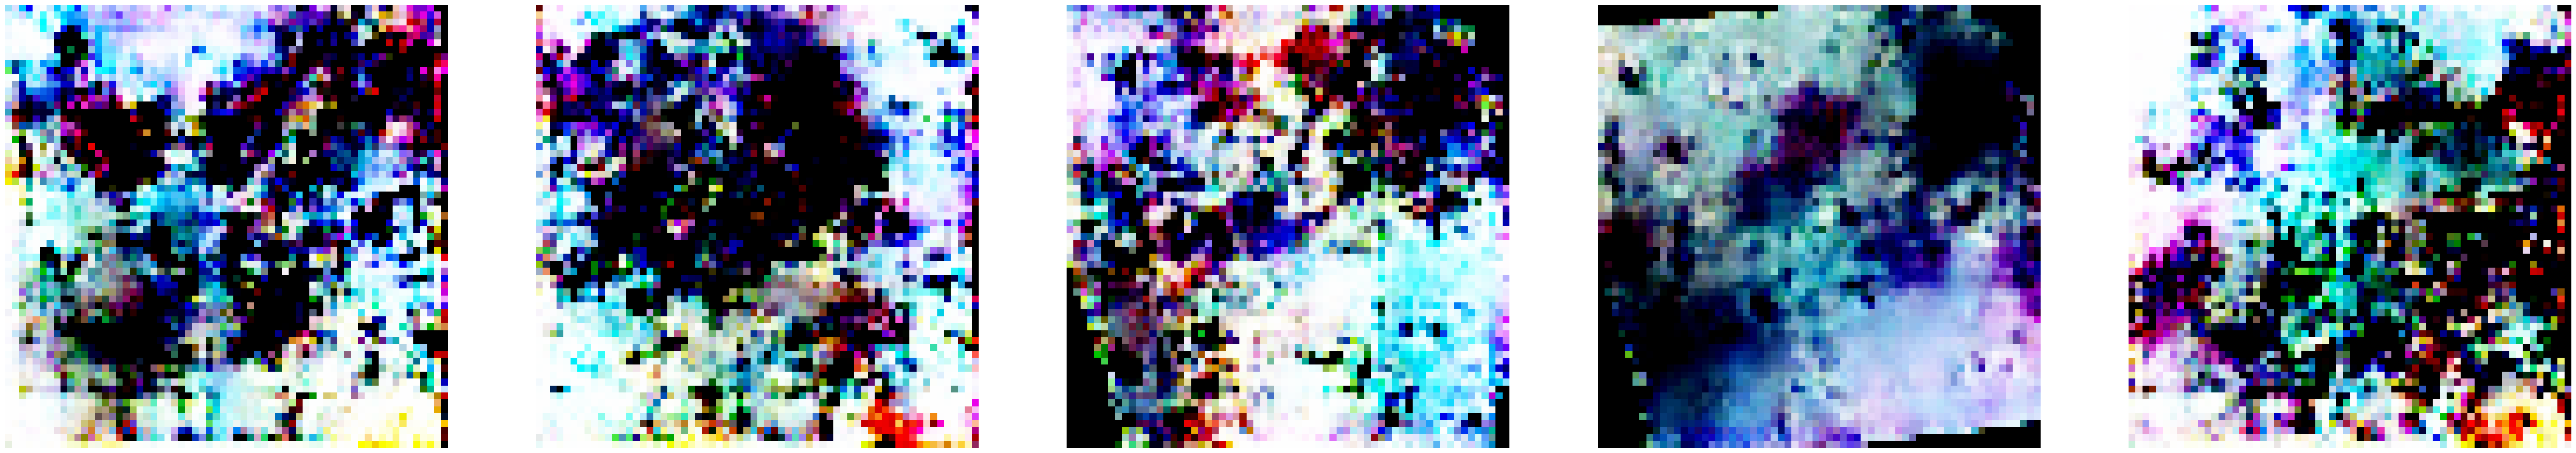

  0%|          | 0/41 [00:00<?, ?it/s]

[402/2750][20/41] Loss_D: 0.6264 Loss_G: 2.9895 D(x): 0.7207 D(G(z)): 0.1206 / 0.0588
[402/2750][40/41] Loss_D: 0.4605 Loss_G: 3.5084 D(x): 0.7986 D(G(z)): 0.0590 / 0.0312


  0%|          | 0/41 [00:00<?, ?it/s]

[403/2750][20/41] Loss_D: 0.4775 Loss_G: 3.7609 D(x): 0.8915 D(G(z)): 0.0813 / 0.0247
[403/2750][40/41] Loss_D: 0.6467 Loss_G: 2.9551 D(x): 0.8408 D(G(z)): 0.1980 / 0.0600


  0%|          | 0/41 [00:00<?, ?it/s]

[404/2750][20/41] Loss_D: 0.5863 Loss_G: 2.6999 D(x): 0.7112 D(G(z)): 0.0664 / 0.0816
[404/2750][40/41] Loss_D: 0.4447 Loss_G: 3.1818 D(x): 0.8218 D(G(z)): 0.0543 / 0.0527


  0%|          | 0/41 [00:00<?, ?it/s]

[405/2750][20/41] Loss_D: 0.4811 Loss_G: 4.3643 D(x): 0.9374 D(G(z)): 0.0980 / 0.0127
[405/2750][40/41] Loss_D: 0.4961 Loss_G: 3.0191 D(x): 0.8044 D(G(z)): 0.0904 / 0.0626


  0%|          | 0/41 [00:00<?, ?it/s]

[406/2750][20/41] Loss_D: 0.6653 Loss_G: 3.8803 D(x): 0.7139 D(G(z)): 0.0206 / 0.0208
[406/2750][40/41] Loss_D: 0.7996 Loss_G: 1.8288 D(x): 0.5523 D(G(z)): 0.0580 / 0.1869


  0%|          | 0/41 [00:00<?, ?it/s]

[407/2750][20/41] Loss_D: 0.7992 Loss_G: 2.7660 D(x): 0.7690 D(G(z)): 0.2481 / 0.0746
[407/2750][40/41] Loss_D: 0.5163 Loss_G: 3.0058 D(x): 0.7957 D(G(z)): 0.0869 / 0.0500


  0%|          | 0/41 [00:00<?, ?it/s]

[408/2750][20/41] Loss_D: 0.4957 Loss_G: 3.5276 D(x): 0.7527 D(G(z)): 0.0260 / 0.0382
[408/2750][40/41] Loss_D: 0.7031 Loss_G: 2.1833 D(x): 0.6167 D(G(z)): 0.0960 / 0.1102


  0%|          | 0/41 [00:00<?, ?it/s]

[409/2750][20/41] Loss_D: 0.7313 Loss_G: 2.9674 D(x): 0.5865 D(G(z)): 0.0432 / 0.0757
[409/2750][40/41] Loss_D: 0.8003 Loss_G: 3.9210 D(x): 0.8662 D(G(z)): 0.3027 / 0.0295


  0%|          | 0/41 [00:00<?, ?it/s]

[410/2750][20/41] Loss_D: 0.5214 Loss_G: 2.6905 D(x): 0.8850 D(G(z)): 0.1417 / 0.0625
[410/2750][40/41] Loss_D: 0.8444 Loss_G: 2.4424 D(x): 0.5042 D(G(z)): 0.0293 / 0.1071


  0%|          | 0/41 [00:00<?, ?it/s]

[411/2750][20/41] Loss_D: 0.6842 Loss_G: 2.8221 D(x): 0.6547 D(G(z)): 0.0965 / 0.0660
[411/2750][40/41] Loss_D: 0.8084 Loss_G: 3.0435 D(x): 0.6759 D(G(z)): 0.1187 / 0.0588


  0%|          | 0/41 [00:00<?, ?it/s]

[412/2750][20/41] Loss_D: 0.6247 Loss_G: 3.1959 D(x): 0.7175 D(G(z)): 0.0978 / 0.0434
[412/2750][40/41] Loss_D: 0.7558 Loss_G: 2.7699 D(x): 0.8001 D(G(z)): 0.2422 / 0.0709


  0%|          | 0/41 [00:00<?, ?it/s]

[413/2750][20/41] Loss_D: 0.4284 Loss_G: 3.6092 D(x): 0.8985 D(G(z)): 0.0614 / 0.0255
[413/2750][40/41] Loss_D: 0.4421 Loss_G: 3.3117 D(x): 0.8166 D(G(z)): 0.0349 / 0.0408


  0%|          | 0/41 [00:00<?, ?it/s]

[414/2750][20/41] Loss_D: 1.1465 Loss_G: 4.4279 D(x): 0.9600 D(G(z)): 0.4525 / 0.0138
[414/2750][40/41] Loss_D: 0.6404 Loss_G: 3.9101 D(x): 0.9656 D(G(z)): 0.1852 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[415/2750][20/41] Loss_D: 0.4781 Loss_G: 3.3375 D(x): 0.8909 D(G(z)): 0.0948 / 0.0292
[415/2750][40/41] Loss_D: 0.4712 Loss_G: 3.2213 D(x): 0.8371 D(G(z)): 0.0911 / 0.0384


  0%|          | 0/41 [00:00<?, ?it/s]

[416/2750][20/41] Loss_D: 0.6451 Loss_G: 3.7065 D(x): 0.9817 D(G(z)): 0.1460 / 0.0251
[416/2750][40/41] Loss_D: 0.5139 Loss_G: 4.0891 D(x): 0.9074 D(G(z)): 0.1207 / 0.0148


  0%|          | 0/41 [00:00<?, ?it/s]

[417/2750][20/41] Loss_D: 0.5823 Loss_G: 4.1625 D(x): 0.9848 D(G(z)): 0.0640 / 0.0180
[417/2750][40/41] Loss_D: 0.8443 Loss_G: 2.6724 D(x): 0.6108 D(G(z)): 0.0880 / 0.0844


  0%|          | 0/41 [00:00<?, ?it/s]

[418/2750][20/41] Loss_D: 0.6973 Loss_G: 2.6724 D(x): 0.6246 D(G(z)): 0.0505 / 0.0745
[418/2750][40/41] Loss_D: 0.4387 Loss_G: 3.9395 D(x): 0.9219 D(G(z)): 0.0738 / 0.0181


  0%|          | 0/41 [00:00<?, ?it/s]

[419/2750][20/41] Loss_D: 0.8298 Loss_G: 2.8292 D(x): 0.5509 D(G(z)): 0.0788 / 0.0704
[419/2750][40/41] Loss_D: 0.7603 Loss_G: 4.3606 D(x): 0.9539 D(G(z)): 0.2529 / 0.0137


  0%|          | 0/41 [00:00<?, ?it/s]

[420/2750][20/41] Loss_D: 0.5773 Loss_G: 3.3681 D(x): 0.8940 D(G(z)): 0.1556 / 0.0344
[420/2750][40/41] Loss_D: 0.4707 Loss_G: 4.3577 D(x): 0.8380 D(G(z)): 0.0609 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[421/2750][20/41] Loss_D: 0.6216 Loss_G: 2.8696 D(x): 0.7415 D(G(z)): 0.0993 / 0.0686
[421/2750][40/41] Loss_D: 0.6965 Loss_G: 2.4265 D(x): 0.5666 D(G(z)): 0.0471 / 0.1030


  0%|          | 0/41 [00:00<?, ?it/s]

[422/2750][20/41] Loss_D: 1.0836 Loss_G: 3.5186 D(x): 0.9579 D(G(z)): 0.4334 / 0.0333
[422/2750][40/41] Loss_D: 0.5073 Loss_G: 3.2963 D(x): 0.8473 D(G(z)): 0.1032 / 0.0388


  0%|          | 0/41 [00:00<?, ?it/s]

[423/2750][20/41] Loss_D: 0.8684 Loss_G: 3.7026 D(x): 0.9669 D(G(z)): 0.3517 / 0.0240
[423/2750][40/41] Loss_D: 0.4690 Loss_G: 4.0803 D(x): 0.8339 D(G(z)): 0.0596 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[424/2750][20/41] Loss_D: 0.4140 Loss_G: 4.3480 D(x): 0.9318 D(G(z)): 0.0314 / 0.0135
[424/2750][40/41] Loss_D: 0.5823 Loss_G: 2.9318 D(x): 0.7835 D(G(z)): 0.1158 / 0.0549


  0%|          | 0/41 [00:00<?, ?it/s]

[425/2750][20/41] Loss_D: 0.5198 Loss_G: 3.5365 D(x): 0.8149 D(G(z)): 0.0471 / 0.0336
[425/2750][40/41] Loss_D: 0.6167 Loss_G: 2.6413 D(x): 0.7648 D(G(z)): 0.1464 / 0.0608


  0%|          | 0/41 [00:00<?, ?it/s]

[426/2750][20/41] Loss_D: 0.4901 Loss_G: 3.9188 D(x): 0.7426 D(G(z)): 0.0222 / 0.0246
[426/2750][40/41] Loss_D: 0.7082 Loss_G: 3.4531 D(x): 0.9429 D(G(z)): 0.2264 / 0.0302


  0%|          | 0/41 [00:00<?, ?it/s]

[427/2750][20/41] Loss_D: 0.6544 Loss_G: 2.4619 D(x): 0.7263 D(G(z)): 0.1519 / 0.0821
[427/2750][40/41] Loss_D: 0.4762 Loss_G: 3.7674 D(x): 0.8057 D(G(z)): 0.0465 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[428/2750][20/41] Loss_D: 0.6001 Loss_G: 2.6482 D(x): 0.7291 D(G(z)): 0.0903 / 0.0842
[428/2750][40/41] Loss_D: 0.4656 Loss_G: 3.3379 D(x): 0.8376 D(G(z)): 0.0755 / 0.0399


  0%|          | 0/41 [00:00<?, ?it/s]

[429/2750][20/41] Loss_D: 0.9677 Loss_G: 2.0586 D(x): 0.4659 D(G(z)): 0.0747 / 0.1514
[429/2750][40/41] Loss_D: 0.8322 Loss_G: 3.4321 D(x): 0.5777 D(G(z)): 0.0405 / 0.0376


  0%|          | 0/41 [00:00<?, ?it/s]

[430/2750][20/41] Loss_D: 0.6278 Loss_G: 4.4152 D(x): 0.8636 D(G(z)): 0.1563 / 0.0124
[430/2750][40/41] Loss_D: 2.0667 Loss_G: 1.0320 D(x): 0.1967 D(G(z)): 0.0291 / 0.5266


  0%|          | 0/41 [00:00<?, ?it/s]

[431/2750][20/41] Loss_D: 0.5103 Loss_G: 3.5845 D(x): 0.8836 D(G(z)): 0.1296 / 0.0273
[431/2750][40/41] Loss_D: 0.6656 Loss_G: 3.5537 D(x): 0.7944 D(G(z)): 0.2109 / 0.0351


  0%|          | 0/41 [00:00<?, ?it/s]

[432/2750][20/41] Loss_D: 0.4148 Loss_G: 3.1776 D(x): 0.9034 D(G(z)): 0.0444 / 0.0429
[432/2750][40/41] Loss_D: 0.4742 Loss_G: 3.5192 D(x): 0.7600 D(G(z)): 0.0461 / 0.0326


  0%|          | 0/41 [00:00<?, ?it/s]

[433/2750][20/41] Loss_D: 0.6266 Loss_G: 2.9945 D(x): 0.9221 D(G(z)): 0.2004 / 0.0555
[433/2750][40/41] Loss_D: 0.5670 Loss_G: 3.4264 D(x): 0.8059 D(G(z)): 0.1119 / 0.0303


  0%|          | 0/41 [00:00<?, ?it/s]

[434/2750][20/41] Loss_D: 0.6754 Loss_G: 2.3723 D(x): 0.7339 D(G(z)): 0.1588 / 0.1109
[434/2750][40/41] Loss_D: 0.8710 Loss_G: 2.0291 D(x): 0.5323 D(G(z)): 0.0997 / 0.1379


  0%|          | 0/41 [00:00<?, ?it/s]

[435/2750][20/41] Loss_D: 0.6317 Loss_G: 2.9425 D(x): 0.8821 D(G(z)): 0.1908 / 0.0569
[435/2750][40/41] Loss_D: 0.5926 Loss_G: 3.7212 D(x): 0.8446 D(G(z)): 0.1593 / 0.0264


  0%|          | 0/41 [00:00<?, ?it/s]

[436/2750][20/41] Loss_D: 0.4941 Loss_G: 3.0414 D(x): 0.7780 D(G(z)): 0.0566 / 0.0517
[436/2750][40/41] Loss_D: 0.5091 Loss_G: 3.0749 D(x): 0.7850 D(G(z)): 0.0800 / 0.0494


  0%|          | 0/41 [00:00<?, ?it/s]

[437/2750][20/41] Loss_D: 0.6468 Loss_G: 3.1483 D(x): 0.9228 D(G(z)): 0.2048 / 0.0471
[437/2750][40/41] Loss_D: 0.4915 Loss_G: 3.6256 D(x): 0.7598 D(G(z)): 0.0316 / 0.0301


  0%|          | 0/41 [00:00<?, ?it/s]

[438/2750][20/41] Loss_D: 0.6964 Loss_G: 3.5009 D(x): 0.9240 D(G(z)): 0.2539 / 0.0306
[438/2750][40/41] Loss_D: 0.4539 Loss_G: 3.6160 D(x): 0.8382 D(G(z)): 0.0255 / 0.0354


  0%|          | 0/41 [00:00<?, ?it/s]

[439/2750][20/41] Loss_D: 0.3847 Loss_G: 4.7028 D(x): 0.8803 D(G(z)): 0.0159 / 0.0097
[439/2750][40/41] Loss_D: 0.4104 Loss_G: 4.0667 D(x): 0.9069 D(G(z)): 0.0230 / 0.0197


  0%|          | 0/41 [00:00<?, ?it/s]

[440/2750][20/41] Loss_D: 0.7594 Loss_G: 3.9585 D(x): 0.9247 D(G(z)): 0.2981 / 0.0228
[440/2750][40/41] Loss_D: 0.8679 Loss_G: 2.6672 D(x): 0.7234 D(G(z)): 0.2191 / 0.0787


  0%|          | 0/41 [00:00<?, ?it/s]

[441/2750][20/41] Loss_D: 0.6647 Loss_G: 3.9315 D(x): 0.6011 D(G(z)): 0.0129 / 0.0318
[441/2750][40/41] Loss_D: 0.6348 Loss_G: 4.3025 D(x): 0.9845 D(G(z)): 0.1143 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[442/2750][20/41] Loss_D: 0.5667 Loss_G: 3.1676 D(x): 0.7934 D(G(z)): 0.1244 / 0.0486
[442/2750][40/41] Loss_D: 0.7159 Loss_G: 3.5687 D(x): 0.9215 D(G(z)): 0.2770 / 0.0262


  0%|          | 0/41 [00:00<?, ?it/s]

[443/2750][20/41] Loss_D: 0.4355 Loss_G: 3.8403 D(x): 0.8464 D(G(z)): 0.0533 / 0.0260
[443/2750][40/41] Loss_D: 0.6621 Loss_G: 3.1992 D(x): 0.6368 D(G(z)): 0.0282 / 0.0433


  0%|          | 0/41 [00:00<?, ?it/s]

[444/2750][20/41] Loss_D: 1.7945 Loss_G: 1.8114 D(x): 0.2143 D(G(z)): 0.0376 / 0.1935
[444/2750][40/41] Loss_D: 0.6138 Loss_G: 3.9065 D(x): 0.8949 D(G(z)): 0.1957 / 0.0196


  0%|          | 0/41 [00:00<?, ?it/s]

[445/2750][20/41] Loss_D: 0.6150 Loss_G: 3.2750 D(x): 0.8202 D(G(z)): 0.1243 / 0.0360
[445/2750][40/41] Loss_D: 0.7885 Loss_G: 2.4698 D(x): 0.6527 D(G(z)): 0.1685 / 0.0953


  0%|          | 0/41 [00:00<?, ?it/s]

[446/2750][20/41] Loss_D: 0.8765 Loss_G: 3.8144 D(x): 0.8773 D(G(z)): 0.3494 / 0.0195
[446/2750][40/41] Loss_D: 0.4735 Loss_G: 3.7086 D(x): 0.8332 D(G(z)): 0.0596 / 0.0275


  0%|          | 0/41 [00:00<?, ?it/s]

[447/2750][20/41] Loss_D: 0.7390 Loss_G: 2.1134 D(x): 0.6160 D(G(z)): 0.1119 / 0.1323
[447/2750][40/41] Loss_D: 0.5811 Loss_G: 2.7029 D(x): 0.8559 D(G(z)): 0.1724 / 0.0683


  0%|          | 0/41 [00:00<?, ?it/s]

[448/2750][20/41] Loss_D: 0.4066 Loss_G: 3.3332 D(x): 0.8410 D(G(z)): 0.0300 / 0.0360
[448/2750][40/41] Loss_D: 0.6898 Loss_G: 2.9463 D(x): 0.6178 D(G(z)): 0.0608 / 0.0649


  0%|          | 0/41 [00:00<?, ?it/s]

[449/2750][20/41] Loss_D: 0.5251 Loss_G: 3.0351 D(x): 0.8857 D(G(z)): 0.1301 / 0.0491
[449/2750][40/41] Loss_D: 0.4209 Loss_G: 4.8551 D(x): 0.9451 D(G(z)): 0.0147 / 0.0093


  0%|          | 0/41 [00:00<?, ?it/s]

[450/2750][20/41] Loss_D: 0.5008 Loss_G: 3.7830 D(x): 0.7671 D(G(z)): 0.0230 / 0.0229
[450/2750][40/41] Loss_D: 1.0061 Loss_G: 1.5531 D(x): 0.4385 D(G(z)): 0.0341 / 0.2515


  0%|          | 0/41 [00:00<?, ?it/s]

[451/2750][20/41] Loss_D: 0.8514 Loss_G: 2.4553 D(x): 0.5510 D(G(z)): 0.0417 / 0.0862
[451/2750][40/41] Loss_D: 0.5832 Loss_G: 4.0293 D(x): 0.9378 D(G(z)): 0.1447 / 0.0201


  0%|          | 0/41 [00:00<?, ?it/s]

[452/2750][20/41] Loss_D: 1.1096 Loss_G: 2.2187 D(x): 0.3984 D(G(z)): 0.0282 / 0.1205
[452/2750][40/41] Loss_D: 0.6668 Loss_G: 3.7699 D(x): 0.5984 D(G(z)): 0.0192 / 0.0276


  0%|          | 0/41 [00:00<?, ?it/s]

[453/2750][20/41] Loss_D: 0.6225 Loss_G: 2.7500 D(x): 0.8053 D(G(z)): 0.1744 / 0.0672
[453/2750][40/41] Loss_D: 0.5058 Loss_G: 3.4194 D(x): 0.8064 D(G(z)): 0.0846 / 0.0389


  0%|          | 0/41 [00:00<?, ?it/s]

[454/2750][20/41] Loss_D: 0.6334 Loss_G: 2.6411 D(x): 0.7102 D(G(z)): 0.0867 / 0.1013
[454/2750][40/41] Loss_D: 0.4081 Loss_G: 3.1166 D(x): 0.8960 D(G(z)): 0.0500 / 0.0480


  0%|          | 0/41 [00:00<?, ?it/s]

[455/2750][20/41] Loss_D: 0.5282 Loss_G: 3.4600 D(x): 0.8362 D(G(z)): 0.1281 / 0.0363
[455/2750][40/41] Loss_D: 0.6827 Loss_G: 3.4781 D(x): 0.9456 D(G(z)): 0.2314 / 0.0380


  0%|          | 0/41 [00:00<?, ?it/s]

[456/2750][20/41] Loss_D: 0.5450 Loss_G: 3.1965 D(x): 0.8825 D(G(z)): 0.1450 / 0.0410
[456/2750][40/41] Loss_D: 0.5197 Loss_G: 3.0218 D(x): 0.7318 D(G(z)): 0.0566 / 0.0530


  0%|          | 0/41 [00:00<?, ?it/s]

[457/2750][20/41] Loss_D: 0.5185 Loss_G: 3.9184 D(x): 0.7518 D(G(z)): 0.0272 / 0.0295
[457/2750][40/41] Loss_D: 0.5640 Loss_G: 3.5501 D(x): 0.8153 D(G(z)): 0.1280 / 0.0390


  0%|          | 0/41 [00:00<?, ?it/s]

[458/2750][20/41] Loss_D: 0.6238 Loss_G: 3.2383 D(x): 0.8999 D(G(z)): 0.2148 / 0.0395
[458/2750][40/41] Loss_D: 0.6911 Loss_G: 3.3371 D(x): 0.5774 D(G(z)): 0.0175 / 0.0603


  0%|          | 0/41 [00:00<?, ?it/s]

[459/2750][20/41] Loss_D: 0.6430 Loss_G: 4.3264 D(x): 0.8596 D(G(z)): 0.2103 / 0.0149
[459/2750][40/41] Loss_D: 0.4571 Loss_G: 3.4343 D(x): 0.7994 D(G(z)): 0.0395 / 0.0378


  0%|          | 0/41 [00:00<?, ?it/s]

[460/2750][20/41] Loss_D: 0.5992 Loss_G: 3.2438 D(x): 0.9095 D(G(z)): 0.1830 / 0.0353
[460/2750][40/41] Loss_D: 0.5352 Loss_G: 4.0039 D(x): 0.9404 D(G(z)): 0.0733 / 0.0196


  0%|          | 0/41 [00:00<?, ?it/s]

[461/2750][20/41] Loss_D: 1.9670 Loss_G: 3.6323 D(x): 0.1541 D(G(z)): 0.0020 / 0.0305
[461/2750][40/41] Loss_D: 0.5360 Loss_G: 3.1067 D(x): 0.8817 D(G(z)): 0.1391 / 0.0436


  0%|          | 0/41 [00:00<?, ?it/s]

[462/2750][20/41] Loss_D: 0.4048 Loss_G: 3.4057 D(x): 0.9113 D(G(z)): 0.0405 / 0.0302
[462/2750][40/41] Loss_D: 0.5181 Loss_G: 3.5301 D(x): 0.7761 D(G(z)): 0.0411 / 0.0294


  0%|          | 0/41 [00:00<?, ?it/s]

[463/2750][20/41] Loss_D: 0.4184 Loss_G: 4.8552 D(x): 0.8479 D(G(z)): 0.0252 / 0.0079
[463/2750][40/41] Loss_D: 0.5514 Loss_G: 3.0410 D(x): 0.7918 D(G(z)): 0.1095 / 0.0472


  0%|          | 0/41 [00:00<?, ?it/s]

[464/2750][20/41] Loss_D: 0.5390 Loss_G: 3.3225 D(x): 0.8278 D(G(z)): 0.1335 / 0.0339
[464/2750][40/41] Loss_D: 0.6190 Loss_G: 3.4605 D(x): 0.8477 D(G(z)): 0.1852 / 0.0339


  0%|          | 0/41 [00:00<?, ?it/s]

[465/2750][20/41] Loss_D: 0.7715 Loss_G: 2.5499 D(x): 0.6116 D(G(z)): 0.1194 / 0.0964
[465/2750][40/41] Loss_D: 1.1839 Loss_G: 2.1587 D(x): 0.3644 D(G(z)): 0.0170 / 0.1340


  0%|          | 0/41 [00:00<?, ?it/s]

[466/2750][20/41] Loss_D: 1.0111 Loss_G: 2.8765 D(x): 0.4499 D(G(z)): 0.0255 / 0.0880
[466/2750][40/41] Loss_D: 0.5656 Loss_G: 3.7724 D(x): 0.9517 D(G(z)): 0.0935 / 0.0284


  0%|          | 0/41 [00:00<?, ?it/s]

[467/2750][20/41] Loss_D: 0.6752 Loss_G: 3.4909 D(x): 0.7570 D(G(z)): 0.1274 / 0.0376
[467/2750][40/41] Loss_D: 0.5358 Loss_G: 3.2417 D(x): 0.7400 D(G(z)): 0.0704 / 0.0388


  0%|          | 0/41 [00:00<?, ?it/s]

[468/2750][20/41] Loss_D: 0.4183 Loss_G: 4.8846 D(x): 0.9302 D(G(z)): 0.0192 / 0.0081
[468/2750][40/41] Loss_D: 0.4685 Loss_G: 3.7050 D(x): 0.8036 D(G(z)): 0.0531 / 0.0309


  0%|          | 0/41 [00:00<?, ?it/s]

[469/2750][20/41] Loss_D: 0.5691 Loss_G: 2.8951 D(x): 0.6391 D(G(z)): 0.0217 / 0.0714
[469/2750][40/41] Loss_D: 0.7377 Loss_G: 3.7954 D(x): 0.9158 D(G(z)): 0.2490 / 0.0296


  0%|          | 0/41 [00:00<?, ?it/s]

[470/2750][20/41] Loss_D: 0.3953 Loss_G: 4.4014 D(x): 0.9273 D(G(z)): 0.0268 / 0.0142
[470/2750][40/41] Loss_D: 0.6028 Loss_G: 3.6766 D(x): 0.9533 D(G(z)): 0.1922 / 0.0223


  0%|          | 0/41 [00:00<?, ?it/s]

[471/2750][20/41] Loss_D: 0.4461 Loss_G: 4.4966 D(x): 0.9444 D(G(z)): 0.0585 / 0.0131
[471/2750][40/41] Loss_D: 2.0197 Loss_G: 5.1862 D(x): 0.9902 D(G(z)): 0.6766 / 0.0072


  0%|          | 0/41 [00:00<?, ?it/s]

[472/2750][20/41] Loss_D: 0.4361 Loss_G: 5.4183 D(x): 0.8235 D(G(z)): 0.0057 / 0.0044
[472/2750][40/41] Loss_D: 0.6765 Loss_G: 2.8348 D(x): 0.8029 D(G(z)): 0.1938 / 0.0588


  0%|          | 0/41 [00:00<?, ?it/s]

[473/2750][20/41] Loss_D: 0.4915 Loss_G: 3.7337 D(x): 0.7980 D(G(z)): 0.0490 / 0.0255
[473/2750][40/41] Loss_D: 0.5807 Loss_G: 2.9149 D(x): 0.8022 D(G(z)): 0.1332 / 0.0577


  0%|          | 0/41 [00:00<?, ?it/s]

[474/2750][20/41] Loss_D: 0.7201 Loss_G: 3.1263 D(x): 0.5715 D(G(z)): 0.0236 / 0.0525
[474/2750][40/41] Loss_D: 0.6918 Loss_G: 2.9995 D(x): 0.6503 D(G(z)): 0.0792 / 0.0530


  0%|          | 0/41 [00:00<?, ?it/s]

[475/2750][20/41] Loss_D: 0.5253 Loss_G: 3.5510 D(x): 0.9656 D(G(z)): 0.0806 / 0.0346
[475/2750][40/41] Loss_D: 0.6628 Loss_G: 4.7324 D(x): 0.9666 D(G(z)): 0.1854 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[476/2750][20/41] Loss_D: 0.4042 Loss_G: 4.1558 D(x): 0.8747 D(G(z)): 0.0433 / 0.0150
[476/2750][40/41] Loss_D: 0.5081 Loss_G: 3.6994 D(x): 0.8740 D(G(z)): 0.1106 / 0.0239


  0%|          | 0/41 [00:00<?, ?it/s]

[477/2750][20/41] Loss_D: 0.5191 Loss_G: 2.9603 D(x): 0.8273 D(G(z)): 0.0903 / 0.0543
[477/2750][40/41] Loss_D: 0.4968 Loss_G: 3.6577 D(x): 0.9377 D(G(z)): 0.1035 / 0.0342


  0%|          | 0/41 [00:00<?, ?it/s]

[478/2750][20/41] Loss_D: 0.5016 Loss_G: 3.1012 D(x): 0.7888 D(G(z)): 0.0590 / 0.0578
[478/2750][40/41] Loss_D: 0.5755 Loss_G: 3.2307 D(x): 0.7466 D(G(z)): 0.0557 / 0.0450


  0%|          | 0/41 [00:00<?, ?it/s]

[479/2750][20/41] Loss_D: 1.0436 Loss_G: 3.7215 D(x): 0.9926 D(G(z)): 0.3270 / 0.0230
[479/2750][40/41] Loss_D: 0.7123 Loss_G: 2.7514 D(x): 0.6162 D(G(z)): 0.0568 / 0.0717


  0%|          | 0/41 [00:00<?, ?it/s]

[480/2750][20/41] Loss_D: 0.5842 Loss_G: 3.6936 D(x): 0.6596 D(G(z)): 0.0195 / 0.0315
[480/2750][40/41] Loss_D: 0.4297 Loss_G: 3.8271 D(x): 0.9261 D(G(z)): 0.0519 / 0.0196


  0%|          | 0/41 [00:00<?, ?it/s]

[481/2750][20/41] Loss_D: 0.5681 Loss_G: 2.5565 D(x): 0.8182 D(G(z)): 0.1142 / 0.0713
[481/2750][40/41] Loss_D: 0.6262 Loss_G: 2.8240 D(x): 0.7653 D(G(z)): 0.1567 / 0.0595


  0%|          | 0/41 [00:00<?, ?it/s]

[482/2750][20/41] Loss_D: 0.4696 Loss_G: 4.5961 D(x): 0.9398 D(G(z)): 0.0868 / 0.0120
[482/2750][40/41] Loss_D: 0.5735 Loss_G: 3.1074 D(x): 0.6783 D(G(z)): 0.0425 / 0.0474


  0%|          | 0/41 [00:00<?, ?it/s]

[483/2750][20/41] Loss_D: 0.6457 Loss_G: 2.6847 D(x): 0.6757 D(G(z)): 0.0611 / 0.0673
[483/2750][40/41] Loss_D: 0.5603 Loss_G: 4.0547 D(x): 0.9175 D(G(z)): 0.1516 / 0.0150


  0%|          | 0/41 [00:00<?, ?it/s]

[484/2750][20/41] Loss_D: 0.5194 Loss_G: 4.4790 D(x): 0.8577 D(G(z)): 0.0996 / 0.0125
[484/2750][40/41] Loss_D: 0.5211 Loss_G: 3.7578 D(x): 0.7252 D(G(z)): 0.0316 / 0.0248


  0%|          | 0/41 [00:00<?, ?it/s]

[485/2750][20/41] Loss_D: 0.6990 Loss_G: 2.3476 D(x): 0.7150 D(G(z)): 0.1760 / 0.0959
[485/2750][40/41] Loss_D: 0.5257 Loss_G: 3.6426 D(x): 0.9434 D(G(z)): 0.1102 / 0.0258


  0%|          | 0/41 [00:00<?, ?it/s]

[486/2750][20/41] Loss_D: 0.6053 Loss_G: 2.3070 D(x): 0.8187 D(G(z)): 0.1444 / 0.1001
[486/2750][40/41] Loss_D: 0.4428 Loss_G: 3.3405 D(x): 0.8237 D(G(z)): 0.0541 / 0.0377


  0%|          | 0/41 [00:00<?, ?it/s]

[487/2750][20/41] Loss_D: 0.6704 Loss_G: 2.5056 D(x): 0.7177 D(G(z)): 0.1184 / 0.0783
[487/2750][40/41] Loss_D: 0.4927 Loss_G: 3.2797 D(x): 0.8904 D(G(z)): 0.0920 / 0.0395


  0%|          | 0/41 [00:00<?, ?it/s]

[488/2750][20/41] Loss_D: 0.5381 Loss_G: 3.3753 D(x): 0.8327 D(G(z)): 0.0941 / 0.0384
[488/2750][40/41] Loss_D: 0.6913 Loss_G: 2.3871 D(x): 0.6797 D(G(z)): 0.1032 / 0.1092


  0%|          | 0/41 [00:00<?, ?it/s]

[489/2750][20/41] Loss_D: 0.4514 Loss_G: 3.1508 D(x): 0.8993 D(G(z)): 0.0756 / 0.0534
[489/2750][40/41] Loss_D: 0.4846 Loss_G: 4.1484 D(x): 0.8183 D(G(z)): 0.0319 / 0.0211


  0%|          | 0/41 [00:00<?, ?it/s]

[490/2750][20/41] Loss_D: 0.7366 Loss_G: 3.0837 D(x): 0.7693 D(G(z)): 0.1916 / 0.0448
[490/2750][40/41] Loss_D: 0.4492 Loss_G: 3.9109 D(x): 0.8777 D(G(z)): 0.0484 / 0.0179


  0%|          | 0/41 [00:00<?, ?it/s]

[491/2750][20/41] Loss_D: 1.4721 Loss_G: 2.2512 D(x): 0.2583 D(G(z)): 0.0103 / 0.1127
[491/2750][40/41] Loss_D: 0.5339 Loss_G: 3.5208 D(x): 0.7535 D(G(z)): 0.0522 / 0.0293


  0%|          | 0/41 [00:00<?, ?it/s]

[492/2750][20/41] Loss_D: 0.5046 Loss_G: 3.8427 D(x): 0.9261 D(G(z)): 0.1010 / 0.0286
[492/2750][40/41] Loss_D: 0.5518 Loss_G: 2.8371 D(x): 0.7236 D(G(z)): 0.0397 / 0.0633


  0%|          | 0/41 [00:00<?, ?it/s]

[493/2750][20/41] Loss_D: 0.7389 Loss_G: 3.3208 D(x): 0.7995 D(G(z)): 0.2238 / 0.0418
[493/2750][40/41] Loss_D: 0.5093 Loss_G: 3.0999 D(x): 0.9096 D(G(z)): 0.1083 / 0.0420


  0%|          | 0/41 [00:00<?, ?it/s]

[494/2750][20/41] Loss_D: 0.6234 Loss_G: 4.9852 D(x): 0.8055 D(G(z)): 0.1313 / 0.0087
[494/2750][40/41] Loss_D: 0.4462 Loss_G: 4.7198 D(x): 0.9616 D(G(z)): 0.0376 / 0.0112


  0%|          | 0/41 [00:00<?, ?it/s]

[495/2750][20/41] Loss_D: 0.9582 Loss_G: 2.0654 D(x): 0.4529 D(G(z)): 0.0633 / 0.1683
[495/2750][40/41] Loss_D: 0.5800 Loss_G: 3.5362 D(x): 0.9307 D(G(z)): 0.1558 / 0.0292


  0%|          | 0/41 [00:00<?, ?it/s]

[496/2750][20/41] Loss_D: 0.4408 Loss_G: 3.9089 D(x): 0.9553 D(G(z)): 0.0415 / 0.0239
[496/2750][40/41] Loss_D: 0.4911 Loss_G: 3.0043 D(x): 0.8077 D(G(z)): 0.0711 / 0.0591


  0%|          | 0/41 [00:00<?, ?it/s]

[497/2750][20/41] Loss_D: 0.5532 Loss_G: 2.9713 D(x): 0.7742 D(G(z)): 0.0729 / 0.0689
[497/2750][40/41] Loss_D: 0.4760 Loss_G: 3.8762 D(x): 0.8528 D(G(z)): 0.0619 / 0.0339


  0%|          | 0/41 [00:00<?, ?it/s]

[498/2750][20/41] Loss_D: 0.5119 Loss_G: 3.7188 D(x): 0.8538 D(G(z)): 0.1085 / 0.0262
[498/2750][40/41] Loss_D: 0.4991 Loss_G: 3.7939 D(x): 0.9214 D(G(z)): 0.0896 / 0.0279


  0%|          | 0/41 [00:00<?, ?it/s]

[499/2750][20/41] Loss_D: 0.6093 Loss_G: 2.5941 D(x): 0.7635 D(G(z)): 0.0895 / 0.0736
[499/2750][40/41] Loss_D: 0.4946 Loss_G: 2.5320 D(x): 0.7805 D(G(z)): 0.0544 / 0.0834


  0%|          | 0/41 [00:00<?, ?it/s]

[500/2750][20/41] Loss_D: 0.6588 Loss_G: 4.0009 D(x): 0.8405 D(G(z)): 0.2036 / 0.0185
[500/2750][40/41] Loss_D: 0.4269 Loss_G: 3.3782 D(x): 0.8373 D(G(z)): 0.0269 / 0.0307


  0%|          | 0/41 [00:00<?, ?it/s]

[501/2750][20/41] Loss_D: 0.5360 Loss_G: 2.6760 D(x): 0.7406 D(G(z)): 0.0805 / 0.0724
[501/2750][40/41] Loss_D: 0.9278 Loss_G: 1.9272 D(x): 0.4959 D(G(z)): 0.1171 / 0.1570


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.92411846].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99454594].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_501.pth


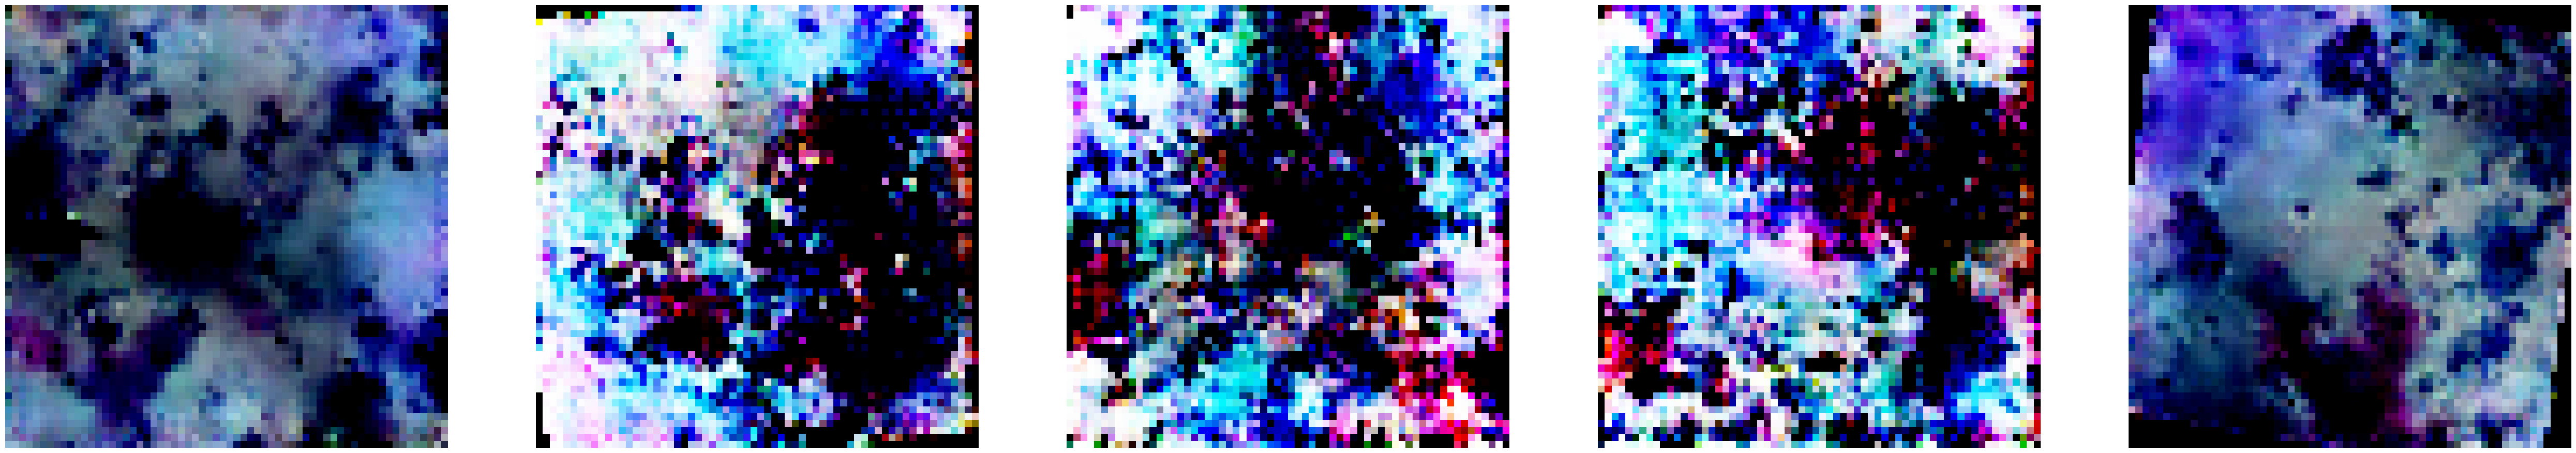

  0%|          | 0/41 [00:00<?, ?it/s]

[502/2750][20/41] Loss_D: 0.3706 Loss_G: 5.7478 D(x): 0.8866 D(G(z)): 0.0090 / 0.0031
[502/2750][40/41] Loss_D: 0.6328 Loss_G: 3.6193 D(x): 0.8418 D(G(z)): 0.1599 / 0.0294


  0%|          | 0/41 [00:00<?, ?it/s]

[503/2750][20/41] Loss_D: 0.5184 Loss_G: 4.6038 D(x): 0.7846 D(G(z)): 0.0101 / 0.0121
[503/2750][40/41] Loss_D: 0.5337 Loss_G: 3.1509 D(x): 0.7953 D(G(z)): 0.0838 / 0.0456


  0%|          | 0/41 [00:00<?, ?it/s]

[504/2750][20/41] Loss_D: 0.6129 Loss_G: 2.5398 D(x): 0.7023 D(G(z)): 0.0670 / 0.0820
[504/2750][40/41] Loss_D: 0.5912 Loss_G: 3.6131 D(x): 0.6243 D(G(z)): 0.0175 / 0.0260


  0%|          | 0/41 [00:00<?, ?it/s]

[505/2750][20/41] Loss_D: 0.6869 Loss_G: 2.1055 D(x): 0.7068 D(G(z)): 0.1541 / 0.1155
[505/2750][40/41] Loss_D: 0.5480 Loss_G: 3.6922 D(x): 0.8067 D(G(z)): 0.1121 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[506/2750][20/41] Loss_D: 0.5110 Loss_G: 3.4887 D(x): 0.7030 D(G(z)): 0.0205 / 0.0402
[506/2750][40/41] Loss_D: 0.5270 Loss_G: 3.2884 D(x): 0.9310 D(G(z)): 0.1055 / 0.0370


  0%|          | 0/41 [00:00<?, ?it/s]

[507/2750][20/41] Loss_D: 0.9237 Loss_G: 1.7314 D(x): 0.5038 D(G(z)): 0.1072 / 0.2078
[507/2750][40/41] Loss_D: 0.5789 Loss_G: 3.1340 D(x): 0.7063 D(G(z)): 0.0756 / 0.0470


  0%|          | 0/41 [00:00<?, ?it/s]

[508/2750][20/41] Loss_D: 0.4863 Loss_G: 3.4971 D(x): 0.8379 D(G(z)): 0.0674 / 0.0353
[508/2750][40/41] Loss_D: 0.5015 Loss_G: 3.3813 D(x): 0.8568 D(G(z)): 0.0918 / 0.0387


  0%|          | 0/41 [00:00<?, ?it/s]

[509/2750][20/41] Loss_D: 0.9252 Loss_G: 2.7577 D(x): 0.7644 D(G(z)): 0.2684 / 0.0719
[509/2750][40/41] Loss_D: 0.6625 Loss_G: 2.6768 D(x): 0.6208 D(G(z)): 0.0257 / 0.0730


  0%|          | 0/41 [00:00<?, ?it/s]

[510/2750][20/41] Loss_D: 0.6635 Loss_G: 2.9877 D(x): 0.6725 D(G(z)): 0.0512 / 0.0678
[510/2750][40/41] Loss_D: 0.4843 Loss_G: 3.3775 D(x): 0.8301 D(G(z)): 0.0725 / 0.0355


  0%|          | 0/41 [00:00<?, ?it/s]

[511/2750][20/41] Loss_D: 0.5388 Loss_G: 3.2889 D(x): 0.9611 D(G(z)): 0.1186 / 0.0404
[511/2750][40/41] Loss_D: 0.8320 Loss_G: 1.5242 D(x): 0.5498 D(G(z)): 0.1037 / 0.2423


  0%|          | 0/41 [00:00<?, ?it/s]

[512/2750][20/41] Loss_D: 0.5786 Loss_G: 3.0299 D(x): 0.8150 D(G(z)): 0.1492 / 0.0463
[512/2750][40/41] Loss_D: 0.7048 Loss_G: 3.6165 D(x): 0.6024 D(G(z)): 0.0578 / 0.0492


  0%|          | 0/41 [00:00<?, ?it/s]

[513/2750][20/41] Loss_D: 0.6105 Loss_G: 4.0127 D(x): 0.9014 D(G(z)): 0.1748 / 0.0179
[513/2750][40/41] Loss_D: 0.6051 Loss_G: 3.6529 D(x): 0.8660 D(G(z)): 0.1749 / 0.0256


  0%|          | 0/41 [00:00<?, ?it/s]

[514/2750][20/41] Loss_D: 0.4395 Loss_G: 3.7194 D(x): 0.8094 D(G(z)): 0.0345 / 0.0244
[514/2750][40/41] Loss_D: 0.5547 Loss_G: 2.7156 D(x): 0.8030 D(G(z)): 0.1299 / 0.0729


  0%|          | 0/41 [00:00<?, ?it/s]

[515/2750][20/41] Loss_D: 0.4516 Loss_G: 3.9406 D(x): 0.9082 D(G(z)): 0.0395 / 0.0171
[515/2750][40/41] Loss_D: 0.7432 Loss_G: 4.0638 D(x): 0.9101 D(G(z)): 0.2369 / 0.0180


  0%|          | 0/41 [00:00<?, ?it/s]

[516/2750][20/41] Loss_D: 0.7042 Loss_G: 3.2606 D(x): 0.8923 D(G(z)): 0.2597 / 0.0393
[516/2750][40/41] Loss_D: 0.3833 Loss_G: 5.0315 D(x): 0.9105 D(G(z)): 0.0091 / 0.0070


  0%|          | 0/41 [00:00<?, ?it/s]

[517/2750][20/41] Loss_D: 0.7502 Loss_G: 3.5451 D(x): 0.9664 D(G(z)): 0.2459 / 0.0248
[517/2750][40/41] Loss_D: 0.5513 Loss_G: 3.1663 D(x): 0.7161 D(G(z)): 0.0576 / 0.0419


  0%|          | 0/41 [00:00<?, ?it/s]

[518/2750][20/41] Loss_D: 0.5783 Loss_G: 3.8688 D(x): 0.7263 D(G(z)): 0.0516 / 0.0273
[518/2750][40/41] Loss_D: 0.4705 Loss_G: 3.3899 D(x): 0.7778 D(G(z)): 0.0421 / 0.0324


  0%|          | 0/41 [00:00<?, ?it/s]

[519/2750][20/41] Loss_D: 0.6767 Loss_G: 2.8195 D(x): 0.6590 D(G(z)): 0.0503 / 0.0675
[519/2750][40/41] Loss_D: 0.5344 Loss_G: 4.0091 D(x): 0.8135 D(G(z)): 0.1073 / 0.0180


  0%|          | 0/41 [00:00<?, ?it/s]

[520/2750][20/41] Loss_D: 0.5676 Loss_G: 3.1510 D(x): 0.7439 D(G(z)): 0.0573 / 0.0458
[520/2750][40/41] Loss_D: 0.5286 Loss_G: 3.6686 D(x): 0.8617 D(G(z)): 0.0959 / 0.0311


  0%|          | 0/41 [00:00<?, ?it/s]

[521/2750][20/41] Loss_D: 0.8036 Loss_G: 4.0379 D(x): 0.9675 D(G(z)): 0.2982 / 0.0187
[521/2750][40/41] Loss_D: 0.5290 Loss_G: 3.2801 D(x): 0.7829 D(G(z)): 0.0912 / 0.0370


  0%|          | 0/41 [00:00<?, ?it/s]

[522/2750][20/41] Loss_D: 0.4464 Loss_G: 3.2772 D(x): 0.8522 D(G(z)): 0.0548 / 0.0408
[522/2750][40/41] Loss_D: 0.6004 Loss_G: 2.9442 D(x): 0.8113 D(G(z)): 0.1376 / 0.0502


  0%|          | 0/41 [00:00<?, ?it/s]

[523/2750][20/41] Loss_D: 0.3963 Loss_G: 4.5615 D(x): 0.8756 D(G(z)): 0.0319 / 0.0121
[523/2750][40/41] Loss_D: 0.7753 Loss_G: 3.3564 D(x): 0.5813 D(G(z)): 0.0188 / 0.0406


  0%|          | 0/41 [00:00<?, ?it/s]

[524/2750][20/41] Loss_D: 0.6156 Loss_G: 2.8066 D(x): 0.6712 D(G(z)): 0.0690 / 0.0669
[524/2750][40/41] Loss_D: 0.7578 Loss_G: 4.2887 D(x): 0.9049 D(G(z)): 0.2645 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[525/2750][20/41] Loss_D: 0.7343 Loss_G: 3.0674 D(x): 0.6809 D(G(z)): 0.1365 / 0.0465
[525/2750][40/41] Loss_D: 0.6105 Loss_G: 3.8082 D(x): 0.8920 D(G(z)): 0.1719 / 0.0239


  0%|          | 0/41 [00:00<?, ?it/s]

[526/2750][20/41] Loss_D: 0.5386 Loss_G: 3.6800 D(x): 0.9145 D(G(z)): 0.1094 / 0.0271
[526/2750][40/41] Loss_D: 0.4964 Loss_G: 3.9173 D(x): 0.9050 D(G(z)): 0.1153 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[527/2750][20/41] Loss_D: 0.3895 Loss_G: 4.5922 D(x): 0.9152 D(G(z)): 0.0098 / 0.0132
[527/2750][40/41] Loss_D: 1.2590 Loss_G: 2.0135 D(x): 0.3792 D(G(z)): 0.0460 / 0.1766


  0%|          | 0/41 [00:00<?, ?it/s]

[528/2750][20/41] Loss_D: 0.4820 Loss_G: 4.0192 D(x): 0.7474 D(G(z)): 0.0163 / 0.0222
[528/2750][40/41] Loss_D: 0.6017 Loss_G: 4.4575 D(x): 0.8345 D(G(z)): 0.1201 / 0.0093


  0%|          | 0/41 [00:00<?, ?it/s]

[529/2750][20/41] Loss_D: 1.2203 Loss_G: 4.5466 D(x): 0.5793 D(G(z)): 0.2734 / 0.0287
[529/2750][40/41] Loss_D: 0.4475 Loss_G: 2.7352 D(x): 0.9393 D(G(z)): 0.0838 / 0.0561


  0%|          | 0/41 [00:00<?, ?it/s]

[530/2750][20/41] Loss_D: 0.4534 Loss_G: 3.5272 D(x): 0.9123 D(G(z)): 0.0437 / 0.0288
[530/2750][40/41] Loss_D: 0.6599 Loss_G: 2.9389 D(x): 0.6822 D(G(z)): 0.0731 / 0.0550


  0%|          | 0/41 [00:00<?, ?it/s]

[531/2750][20/41] Loss_D: 1.1913 Loss_G: 3.6767 D(x): 0.7108 D(G(z)): 0.4141 / 0.0449
[531/2750][40/41] Loss_D: 0.6015 Loss_G: 3.1952 D(x): 0.8081 D(G(z)): 0.1341 / 0.0391


  0%|          | 0/41 [00:00<?, ?it/s]

[532/2750][20/41] Loss_D: 0.7455 Loss_G: 4.4496 D(x): 0.9134 D(G(z)): 0.2453 / 0.0130
[532/2750][40/41] Loss_D: 0.6595 Loss_G: 3.6587 D(x): 0.9698 D(G(z)): 0.1811 / 0.0322


  0%|          | 0/41 [00:00<?, ?it/s]

[533/2750][20/41] Loss_D: 0.4387 Loss_G: 3.3081 D(x): 0.9028 D(G(z)): 0.0658 / 0.0416
[533/2750][40/41] Loss_D: 0.6032 Loss_G: 3.8953 D(x): 0.6550 D(G(z)): 0.0260 / 0.0277


  0%|          | 0/41 [00:00<?, ?it/s]

[534/2750][20/41] Loss_D: 0.5145 Loss_G: 3.7343 D(x): 0.7224 D(G(z)): 0.0338 / 0.0267
[534/2750][40/41] Loss_D: 0.4762 Loss_G: 2.6431 D(x): 0.7907 D(G(z)): 0.0490 / 0.0869


  0%|          | 0/41 [00:00<?, ?it/s]

[535/2750][20/41] Loss_D: 0.5968 Loss_G: 2.7049 D(x): 0.7882 D(G(z)): 0.1441 / 0.0718
[535/2750][40/41] Loss_D: 0.4678 Loss_G: 3.5449 D(x): 0.9411 D(G(z)): 0.0732 / 0.0391


  0%|          | 0/41 [00:00<?, ?it/s]

[536/2750][20/41] Loss_D: 0.5984 Loss_G: 3.6185 D(x): 0.8414 D(G(z)): 0.1385 / 0.0269
[536/2750][40/41] Loss_D: 0.5635 Loss_G: 3.0910 D(x): 0.7864 D(G(z)): 0.1296 / 0.0458


  0%|          | 0/41 [00:00<?, ?it/s]

[537/2750][20/41] Loss_D: 0.5058 Loss_G: 2.4522 D(x): 0.8123 D(G(z)): 0.0610 / 0.0934
[537/2750][40/41] Loss_D: 0.6214 Loss_G: 3.1325 D(x): 0.8232 D(G(z)): 0.1732 / 0.0571


  0%|          | 0/41 [00:00<?, ?it/s]

[538/2750][20/41] Loss_D: 0.8012 Loss_G: 3.4315 D(x): 0.8327 D(G(z)): 0.2985 / 0.0313
[538/2750][40/41] Loss_D: 0.5466 Loss_G: 3.4762 D(x): 0.7594 D(G(z)): 0.0608 / 0.0312


  0%|          | 0/41 [00:00<?, ?it/s]

[539/2750][20/41] Loss_D: 0.7694 Loss_G: 2.6169 D(x): 0.5944 D(G(z)): 0.0335 / 0.1051
[539/2750][40/41] Loss_D: 0.8092 Loss_G: 2.4277 D(x): 0.5318 D(G(z)): 0.0220 / 0.1061


  0%|          | 0/41 [00:00<?, ?it/s]

[540/2750][20/41] Loss_D: 0.6590 Loss_G: 2.6791 D(x): 0.8682 D(G(z)): 0.2198 / 0.0642
[540/2750][40/41] Loss_D: 0.4736 Loss_G: 3.0806 D(x): 0.9026 D(G(z)): 0.0670 / 0.0588


  0%|          | 0/41 [00:00<?, ?it/s]

[541/2750][20/41] Loss_D: 0.4798 Loss_G: 3.3464 D(x): 0.8967 D(G(z)): 0.0728 / 0.0457
[541/2750][40/41] Loss_D: 0.8706 Loss_G: 3.5378 D(x): 0.9560 D(G(z)): 0.1548 / 0.0370


  0%|          | 0/41 [00:00<?, ?it/s]

[542/2750][20/41] Loss_D: 0.5379 Loss_G: 2.8635 D(x): 0.7449 D(G(z)): 0.0757 / 0.0576
[542/2750][40/41] Loss_D: 0.8547 Loss_G: 2.6335 D(x): 0.5576 D(G(z)): 0.0725 / 0.0862


  0%|          | 0/41 [00:00<?, ?it/s]

[543/2750][20/41] Loss_D: 0.4322 Loss_G: 3.3114 D(x): 0.9268 D(G(z)): 0.0563 / 0.0435
[543/2750][40/41] Loss_D: 0.5304 Loss_G: 3.2894 D(x): 0.8120 D(G(z)): 0.0682 / 0.0371


  0%|          | 0/41 [00:00<?, ?it/s]

[544/2750][20/41] Loss_D: 0.6001 Loss_G: 3.6280 D(x): 0.9004 D(G(z)): 0.1746 / 0.0313
[544/2750][40/41] Loss_D: 0.7719 Loss_G: 4.4334 D(x): 0.9696 D(G(z)): 0.2498 / 0.0158


  0%|          | 0/41 [00:00<?, ?it/s]

[545/2750][20/41] Loss_D: 0.4855 Loss_G: 3.5676 D(x): 0.9062 D(G(z)): 0.1088 / 0.0246
[545/2750][40/41] Loss_D: 0.5047 Loss_G: 3.2315 D(x): 0.8819 D(G(z)): 0.1025 / 0.0373


  0%|          | 0/41 [00:00<?, ?it/s]

[546/2750][20/41] Loss_D: 0.6116 Loss_G: 2.9470 D(x): 0.6885 D(G(z)): 0.0871 / 0.0565
[546/2750][40/41] Loss_D: 0.5082 Loss_G: 3.0451 D(x): 0.7610 D(G(z)): 0.0386 / 0.0514


  0%|          | 0/41 [00:00<?, ?it/s]

[547/2750][20/41] Loss_D: 0.4806 Loss_G: 3.2999 D(x): 0.9042 D(G(z)): 0.1053 / 0.0405
[547/2750][40/41] Loss_D: 0.3927 Loss_G: 4.7700 D(x): 0.8519 D(G(z)): 0.0094 / 0.0090


  0%|          | 0/41 [00:00<?, ?it/s]

[548/2750][20/41] Loss_D: 0.4468 Loss_G: 3.4524 D(x): 0.9297 D(G(z)): 0.0519 / 0.0345
[548/2750][40/41] Loss_D: 0.7333 Loss_G: 2.2775 D(x): 0.5847 D(G(z)): 0.0675 / 0.1328


  0%|          | 0/41 [00:00<?, ?it/s]

[549/2750][20/41] Loss_D: 0.5568 Loss_G: 3.3599 D(x): 0.6801 D(G(z)): 0.0205 / 0.0443
[549/2750][40/41] Loss_D: 0.5328 Loss_G: 3.0507 D(x): 0.9113 D(G(z)): 0.1213 / 0.0485


  0%|          | 0/41 [00:00<?, ?it/s]

[550/2750][20/41] Loss_D: 0.4107 Loss_G: 3.7523 D(x): 0.8589 D(G(z)): 0.0403 / 0.0254
[550/2750][40/41] Loss_D: 0.6538 Loss_G: 2.4234 D(x): 0.6669 D(G(z)): 0.0430 / 0.1122


  0%|          | 0/41 [00:00<?, ?it/s]

[551/2750][20/41] Loss_D: 0.4199 Loss_G: 4.1153 D(x): 0.9406 D(G(z)): 0.0433 / 0.0171
[551/2750][40/41] Loss_D: 0.4604 Loss_G: 3.2720 D(x): 0.9219 D(G(z)): 0.0658 / 0.0420


  0%|          | 0/41 [00:00<?, ?it/s]

[552/2750][20/41] Loss_D: 0.4793 Loss_G: 2.9308 D(x): 0.8545 D(G(z)): 0.1028 / 0.0548
[552/2750][40/41] Loss_D: 0.7103 Loss_G: 3.9869 D(x): 0.9108 D(G(z)): 0.2154 / 0.0230


  0%|          | 0/41 [00:00<?, ?it/s]

[553/2750][20/41] Loss_D: 0.4610 Loss_G: 4.1260 D(x): 0.7295 D(G(z)): 0.0113 / 0.0176
[553/2750][40/41] Loss_D: 0.6578 Loss_G: 3.4929 D(x): 0.9663 D(G(z)): 0.1755 / 0.0302


  0%|          | 0/41 [00:00<?, ?it/s]

[554/2750][20/41] Loss_D: 0.5724 Loss_G: 3.3283 D(x): 0.8817 D(G(z)): 0.1626 / 0.0311
[554/2750][40/41] Loss_D: 0.4359 Loss_G: 3.7222 D(x): 0.8385 D(G(z)): 0.0470 / 0.0319


  0%|          | 0/41 [00:00<?, ?it/s]

[555/2750][20/41] Loss_D: 0.7511 Loss_G: 3.0077 D(x): 0.8153 D(G(z)): 0.2047 / 0.0499
[555/2750][40/41] Loss_D: 0.4871 Loss_G: 4.3283 D(x): 0.9505 D(G(z)): 0.0633 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[556/2750][20/41] Loss_D: 0.4258 Loss_G: 4.2063 D(x): 0.9052 D(G(z)): 0.0269 / 0.0154
[556/2750][40/41] Loss_D: 0.7194 Loss_G: 4.3092 D(x): 0.9896 D(G(z)): 0.1490 / 0.0127


  0%|          | 0/41 [00:00<?, ?it/s]

[557/2750][20/41] Loss_D: 0.7987 Loss_G: 3.1360 D(x): 0.5635 D(G(z)): 0.0669 / 0.0671
[557/2750][40/41] Loss_D: 0.6217 Loss_G: 3.1700 D(x): 0.8574 D(G(z)): 0.1660 / 0.0493


  0%|          | 0/41 [00:00<?, ?it/s]

[558/2750][20/41] Loss_D: 0.4634 Loss_G: 3.5720 D(x): 0.8574 D(G(z)): 0.0724 / 0.0288
[558/2750][40/41] Loss_D: 0.6185 Loss_G: 2.9759 D(x): 0.7710 D(G(z)): 0.1095 / 0.0674


  0%|          | 0/41 [00:00<?, ?it/s]

[559/2750][20/41] Loss_D: 0.5332 Loss_G: 4.1798 D(x): 0.7840 D(G(z)): 0.0395 / 0.0184
[559/2750][40/41] Loss_D: 0.5538 Loss_G: 3.1166 D(x): 0.8335 D(G(z)): 0.1125 / 0.0480


  0%|          | 0/41 [00:00<?, ?it/s]

[560/2750][20/41] Loss_D: 0.4617 Loss_G: 4.0821 D(x): 0.7897 D(G(z)): 0.0212 / 0.0168
[560/2750][40/41] Loss_D: 0.5863 Loss_G: 2.5536 D(x): 0.7321 D(G(z)): 0.1059 / 0.0864


  0%|          | 0/41 [00:00<?, ?it/s]

[561/2750][20/41] Loss_D: 0.4770 Loss_G: 3.3522 D(x): 0.9232 D(G(z)): 0.0897 / 0.0395
[561/2750][40/41] Loss_D: 0.7272 Loss_G: 3.3304 D(x): 0.8222 D(G(z)): 0.1757 / 0.0456


  0%|          | 0/41 [00:00<?, ?it/s]

[562/2750][20/41] Loss_D: 0.5304 Loss_G: 3.3518 D(x): 0.8123 D(G(z)): 0.0818 / 0.0424
[562/2750][40/41] Loss_D: 0.7560 Loss_G: 4.2158 D(x): 0.5986 D(G(z)): 0.0104 / 0.0166


  0%|          | 0/41 [00:00<?, ?it/s]

[563/2750][20/41] Loss_D: 0.5722 Loss_G: 4.3011 D(x): 0.6874 D(G(z)): 0.0216 / 0.0180
[563/2750][40/41] Loss_D: 0.5138 Loss_G: 3.5537 D(x): 0.9721 D(G(z)): 0.0652 / 0.0265


  0%|          | 0/41 [00:00<?, ?it/s]

[564/2750][20/41] Loss_D: 0.4680 Loss_G: 3.6640 D(x): 0.7933 D(G(z)): 0.0639 / 0.0342
[564/2750][40/41] Loss_D: 0.7992 Loss_G: 4.1423 D(x): 0.8778 D(G(z)): 0.2402 / 0.0173


  0%|          | 0/41 [00:00<?, ?it/s]

[565/2750][20/41] Loss_D: 0.6998 Loss_G: 2.6957 D(x): 0.7514 D(G(z)): 0.1956 / 0.0794
[565/2750][40/41] Loss_D: 0.5517 Loss_G: 3.4010 D(x): 0.9323 D(G(z)): 0.1428 / 0.0350


  0%|          | 0/41 [00:00<?, ?it/s]

[566/2750][20/41] Loss_D: 0.7949 Loss_G: 3.5870 D(x): 0.8076 D(G(z)): 0.2760 / 0.0360
[566/2750][40/41] Loss_D: 0.6596 Loss_G: 3.5717 D(x): 0.9069 D(G(z)): 0.2075 / 0.0347


  0%|          | 0/41 [00:00<?, ?it/s]

[567/2750][20/41] Loss_D: 0.5114 Loss_G: 3.9565 D(x): 0.7220 D(G(z)): 0.0144 / 0.0253
[567/2750][40/41] Loss_D: 0.7748 Loss_G: 2.7827 D(x): 0.6668 D(G(z)): 0.1335 / 0.0692


  0%|          | 0/41 [00:00<?, ?it/s]

[568/2750][20/41] Loss_D: 0.4838 Loss_G: 3.5241 D(x): 0.7764 D(G(z)): 0.0523 / 0.0453
[568/2750][40/41] Loss_D: 0.4459 Loss_G: 3.2764 D(x): 0.8641 D(G(z)): 0.0496 / 0.0447


  0%|          | 0/41 [00:00<?, ?it/s]

[569/2750][20/41] Loss_D: 0.5389 Loss_G: 4.1235 D(x): 0.9512 D(G(z)): 0.1319 / 0.0143
[569/2750][40/41] Loss_D: 0.5398 Loss_G: 4.0742 D(x): 0.9462 D(G(z)): 0.1172 / 0.0202


  0%|          | 0/41 [00:00<?, ?it/s]

[570/2750][20/41] Loss_D: 0.4126 Loss_G: 4.1720 D(x): 0.8936 D(G(z)): 0.0241 / 0.0224
[570/2750][40/41] Loss_D: 0.6787 Loss_G: 3.4222 D(x): 0.6801 D(G(z)): 0.0349 / 0.0472


  0%|          | 0/41 [00:00<?, ?it/s]

[571/2750][20/41] Loss_D: 0.4929 Loss_G: 4.6159 D(x): 0.8314 D(G(z)): 0.0589 / 0.0114
[571/2750][40/41] Loss_D: 0.5116 Loss_G: 3.6857 D(x): 0.9609 D(G(z)): 0.0843 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[572/2750][20/41] Loss_D: 0.5554 Loss_G: 3.5676 D(x): 0.8406 D(G(z)): 0.1383 / 0.0369
[572/2750][40/41] Loss_D: 0.8578 Loss_G: 2.6533 D(x): 0.8163 D(G(z)): 0.3114 / 0.0817


  0%|          | 0/41 [00:00<?, ?it/s]

[573/2750][20/41] Loss_D: 0.5990 Loss_G: 4.1519 D(x): 0.9799 D(G(z)): 0.1094 / 0.0181
[573/2750][40/41] Loss_D: 0.8495 Loss_G: 4.2000 D(x): 0.8223 D(G(z)): 0.3024 / 0.0241


  0%|          | 0/41 [00:00<?, ?it/s]

[574/2750][20/41] Loss_D: 0.5839 Loss_G: 4.6516 D(x): 0.9544 D(G(z)): 0.1174 / 0.0096
[574/2750][40/41] Loss_D: 0.5731 Loss_G: 4.3120 D(x): 0.9028 D(G(z)): 0.1279 / 0.0129


  0%|          | 0/41 [00:00<?, ?it/s]

[575/2750][20/41] Loss_D: 0.4587 Loss_G: 3.2980 D(x): 0.8584 D(G(z)): 0.0612 / 0.0527
[575/2750][40/41] Loss_D: 1.4513 Loss_G: 2.4627 D(x): 0.3209 D(G(z)): 0.0167 / 0.1185


  0%|          | 0/41 [00:00<?, ?it/s]

[576/2750][20/41] Loss_D: 0.4732 Loss_G: 3.7907 D(x): 0.8405 D(G(z)): 0.0702 / 0.0248
[576/2750][40/41] Loss_D: 0.9755 Loss_G: 2.2932 D(x): 0.4511 D(G(z)): 0.1004 / 0.1436


  0%|          | 0/41 [00:00<?, ?it/s]

[577/2750][20/41] Loss_D: 0.5654 Loss_G: 3.2936 D(x): 0.7930 D(G(z)): 0.1126 / 0.0433
[577/2750][40/41] Loss_D: 1.4105 Loss_G: 1.6163 D(x): 0.3102 D(G(z)): 0.0180 / 0.2489


  0%|          | 0/41 [00:00<?, ?it/s]

[578/2750][20/41] Loss_D: 0.4092 Loss_G: 4.0713 D(x): 0.8898 D(G(z)): 0.0317 / 0.0161
[578/2750][40/41] Loss_D: 0.4235 Loss_G: 3.8507 D(x): 0.9246 D(G(z)): 0.0367 / 0.0215


  0%|          | 0/41 [00:00<?, ?it/s]

[579/2750][20/41] Loss_D: 0.5267 Loss_G: 2.9760 D(x): 0.9184 D(G(z)): 0.1169 / 0.0495
[579/2750][40/41] Loss_D: 0.6873 Loss_G: 2.6035 D(x): 0.6974 D(G(z)): 0.1217 / 0.0916


  0%|          | 0/41 [00:00<?, ?it/s]

[580/2750][20/41] Loss_D: 0.5859 Loss_G: 3.2237 D(x): 0.8524 D(G(z)): 0.1175 / 0.0407
[580/2750][40/41] Loss_D: 0.6003 Loss_G: 2.5112 D(x): 0.6566 D(G(z)): 0.0485 / 0.0996


  0%|          | 0/41 [00:00<?, ?it/s]

[581/2750][20/41] Loss_D: 0.7308 Loss_G: 2.9047 D(x): 0.6611 D(G(z)): 0.1359 / 0.0796
[581/2750][40/41] Loss_D: 0.3936 Loss_G: 4.1324 D(x): 0.8996 D(G(z)): 0.0380 / 0.0157


  0%|          | 0/41 [00:00<?, ?it/s]

[582/2750][20/41] Loss_D: 0.6009 Loss_G: 2.7965 D(x): 0.7395 D(G(z)): 0.0959 / 0.0760
[582/2750][40/41] Loss_D: 0.7933 Loss_G: 2.4035 D(x): 0.6384 D(G(z)): 0.1170 / 0.1227


  0%|          | 0/41 [00:00<?, ?it/s]

[583/2750][20/41] Loss_D: 0.3757 Loss_G: 4.8361 D(x): 0.9109 D(G(z)): 0.0181 / 0.0109
[583/2750][40/41] Loss_D: 0.5435 Loss_G: 3.7392 D(x): 0.9341 D(G(z)): 0.1528 / 0.0213


  0%|          | 0/41 [00:00<?, ?it/s]

[584/2750][20/41] Loss_D: 0.7020 Loss_G: 3.1622 D(x): 0.6113 D(G(z)): 0.0729 / 0.0592
[584/2750][40/41] Loss_D: 0.5452 Loss_G: 2.4246 D(x): 0.7956 D(G(z)): 0.1180 / 0.1125


  0%|          | 0/41 [00:00<?, ?it/s]

[585/2750][20/41] Loss_D: 0.5186 Loss_G: 3.3315 D(x): 0.8266 D(G(z)): 0.0650 / 0.0395
[585/2750][40/41] Loss_D: 0.8859 Loss_G: 4.5955 D(x): 0.8147 D(G(z)): 0.3184 / 0.0087


  0%|          | 0/41 [00:00<?, ?it/s]

[586/2750][20/41] Loss_D: 0.5236 Loss_G: 3.8427 D(x): 0.7250 D(G(z)): 0.0156 / 0.0212
[586/2750][40/41] Loss_D: 0.9346 Loss_G: 2.1611 D(x): 0.4943 D(G(z)): 0.0336 / 0.1287


  0%|          | 0/41 [00:00<?, ?it/s]

[587/2750][20/41] Loss_D: 0.4221 Loss_G: 3.5700 D(x): 0.8404 D(G(z)): 0.0271 / 0.0291
[587/2750][40/41] Loss_D: 0.4131 Loss_G: 4.4551 D(x): 0.9333 D(G(z)): 0.0288 / 0.0122


  0%|          | 0/41 [00:00<?, ?it/s]

[588/2750][20/41] Loss_D: 0.4023 Loss_G: 4.4121 D(x): 0.8895 D(G(z)): 0.0292 / 0.0115
[588/2750][40/41] Loss_D: 0.4975 Loss_G: 4.0058 D(x): 0.8126 D(G(z)): 0.0750 / 0.0184


  0%|          | 0/41 [00:00<?, ?it/s]

[589/2750][20/41] Loss_D: 0.4657 Loss_G: 4.7584 D(x): 0.8773 D(G(z)): 0.0517 / 0.0104
[589/2750][40/41] Loss_D: 0.6007 Loss_G: 3.5339 D(x): 0.9590 D(G(z)): 0.1419 / 0.0285


  0%|          | 0/41 [00:00<?, ?it/s]

[590/2750][20/41] Loss_D: 0.5995 Loss_G: 2.8800 D(x): 0.7517 D(G(z)): 0.0829 / 0.0818
[590/2750][40/41] Loss_D: 0.4224 Loss_G: 3.9466 D(x): 0.9350 D(G(z)): 0.0366 / 0.0217


  0%|          | 0/41 [00:00<?, ?it/s]

[591/2750][20/41] Loss_D: 0.6282 Loss_G: 4.3102 D(x): 0.8606 D(G(z)): 0.1877 / 0.0161
[591/2750][40/41] Loss_D: 0.4843 Loss_G: 3.2169 D(x): 0.8061 D(G(z)): 0.0610 / 0.0440


  0%|          | 0/41 [00:00<?, ?it/s]

[592/2750][20/41] Loss_D: 0.6266 Loss_G: 3.7264 D(x): 0.6130 D(G(z)): 0.0143 / 0.0375
[592/2750][40/41] Loss_D: 0.5932 Loss_G: 4.0011 D(x): 0.6901 D(G(z)): 0.0173 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[593/2750][20/41] Loss_D: 0.8920 Loss_G: 3.5071 D(x): 0.7715 D(G(z)): 0.3009 / 0.0349
[593/2750][40/41] Loss_D: 0.5066 Loss_G: 3.3485 D(x): 0.7653 D(G(z)): 0.0435 / 0.0437


  0%|          | 0/41 [00:00<?, ?it/s]

[594/2750][20/41] Loss_D: 0.5508 Loss_G: 2.6599 D(x): 0.7431 D(G(z)): 0.0820 / 0.0738
[594/2750][40/41] Loss_D: 0.4800 Loss_G: 3.6153 D(x): 0.9167 D(G(z)): 0.0720 / 0.0293


  0%|          | 0/41 [00:00<?, ?it/s]

[595/2750][20/41] Loss_D: 0.4853 Loss_G: 2.7379 D(x): 0.9076 D(G(z)): 0.0992 / 0.0670
[595/2750][40/41] Loss_D: 0.4545 Loss_G: 4.4783 D(x): 0.8892 D(G(z)): 0.0779 / 0.0107


  0%|          | 0/41 [00:00<?, ?it/s]

[596/2750][20/41] Loss_D: 0.4949 Loss_G: 3.1018 D(x): 0.8412 D(G(z)): 0.0879 / 0.0439
[596/2750][40/41] Loss_D: 0.5607 Loss_G: 3.5895 D(x): 0.6997 D(G(z)): 0.0330 / 0.0329


  0%|          | 0/41 [00:00<?, ?it/s]

[597/2750][20/41] Loss_D: 0.6686 Loss_G: 4.1580 D(x): 0.9173 D(G(z)): 0.1900 / 0.0144
[597/2750][40/41] Loss_D: 0.7880 Loss_G: 3.7233 D(x): 0.9834 D(G(z)): 0.2356 / 0.0203


  0%|          | 0/41 [00:00<?, ?it/s]

[598/2750][20/41] Loss_D: 0.5441 Loss_G: 2.6934 D(x): 0.8499 D(G(z)): 0.1177 / 0.0753
[598/2750][40/41] Loss_D: 0.6174 Loss_G: 3.0266 D(x): 0.6802 D(G(z)): 0.0853 / 0.0604


  0%|          | 0/41 [00:00<?, ?it/s]

[599/2750][20/41] Loss_D: 0.4467 Loss_G: 4.1500 D(x): 0.7866 D(G(z)): 0.0161 / 0.0143
[599/2750][40/41] Loss_D: 0.6560 Loss_G: 2.6576 D(x): 0.6998 D(G(z)): 0.1126 / 0.0798


  0%|          | 0/41 [00:00<?, ?it/s]

[600/2750][20/41] Loss_D: 0.4584 Loss_G: 3.6475 D(x): 0.8962 D(G(z)): 0.0727 / 0.0286
[600/2750][40/41] Loss_D: 0.5160 Loss_G: 3.1491 D(x): 0.8524 D(G(z)): 0.1197 / 0.0422


  0%|          | 0/41 [00:00<?, ?it/s]

[601/2750][20/41] Loss_D: 0.5045 Loss_G: 3.4158 D(x): 0.7330 D(G(z)): 0.0303 / 0.0387
[601/2750][40/41] Loss_D: 0.4931 Loss_G: 2.8417 D(x): 0.8898 D(G(z)): 0.0849 / 0.0562


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99999964].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99999434].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99999976].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999981].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_601.pth


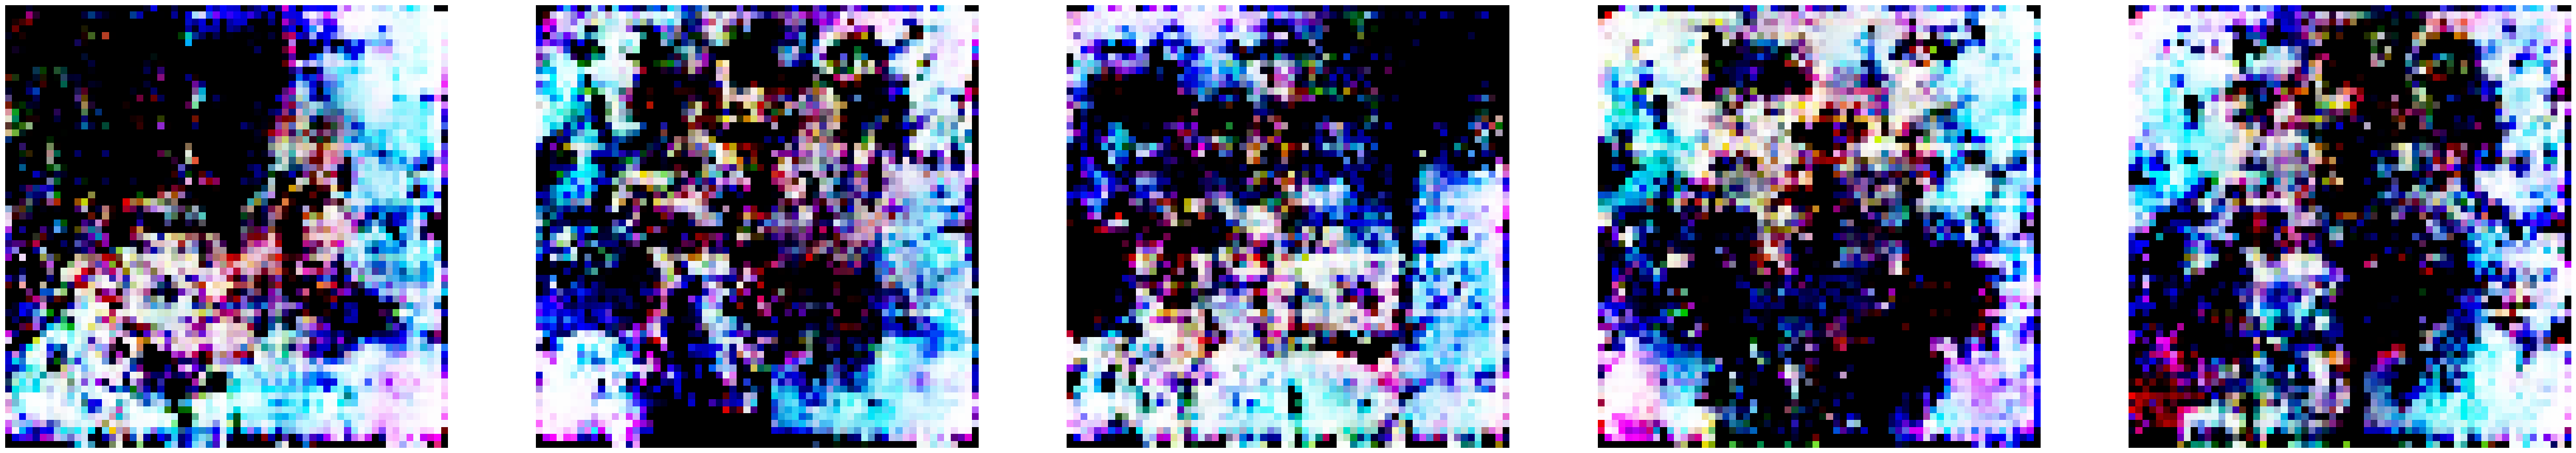

  0%|          | 0/41 [00:00<?, ?it/s]

[602/2750][20/41] Loss_D: 0.4742 Loss_G: 3.1252 D(x): 0.8275 D(G(z)): 0.0766 / 0.0435
[602/2750][40/41] Loss_D: 0.6307 Loss_G: 3.4802 D(x): 0.8925 D(G(z)): 0.2078 / 0.0347


  0%|          | 0/41 [00:00<?, ?it/s]

[603/2750][20/41] Loss_D: 0.6983 Loss_G: 3.8406 D(x): 0.8020 D(G(z)): 0.2076 / 0.0244
[603/2750][40/41] Loss_D: 0.3964 Loss_G: 4.7528 D(x): 0.9007 D(G(z)): 0.0170 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[604/2750][20/41] Loss_D: 0.8793 Loss_G: 4.0357 D(x): 0.9400 D(G(z)): 0.3358 / 0.0220
[604/2750][40/41] Loss_D: 0.5943 Loss_G: 3.2171 D(x): 0.7833 D(G(z)): 0.0855 / 0.0412


  0%|          | 0/41 [00:00<?, ?it/s]

[605/2750][20/41] Loss_D: 0.5912 Loss_G: 2.8601 D(x): 0.7349 D(G(z)): 0.0577 / 0.0699
[605/2750][40/41] Loss_D: 0.8074 Loss_G: 2.1736 D(x): 0.5647 D(G(z)): 0.0496 / 0.1234


  0%|          | 0/41 [00:00<?, ?it/s]

[606/2750][20/41] Loss_D: 0.7433 Loss_G: 2.7202 D(x): 0.5538 D(G(z)): 0.0253 / 0.0882
[606/2750][40/41] Loss_D: 0.6197 Loss_G: 2.5686 D(x): 0.7368 D(G(z)): 0.1024 / 0.0826


  0%|          | 0/41 [00:00<?, ?it/s]

[607/2750][20/41] Loss_D: 0.4914 Loss_G: 4.3533 D(x): 0.8565 D(G(z)): 0.0593 / 0.0254
[607/2750][40/41] Loss_D: 0.4785 Loss_G: 3.4525 D(x): 0.7581 D(G(z)): 0.0270 / 0.0395


  0%|          | 0/41 [00:00<?, ?it/s]

[608/2750][20/41] Loss_D: 0.5281 Loss_G: 3.6370 D(x): 0.9429 D(G(z)): 0.1249 / 0.0345
[608/2750][40/41] Loss_D: 0.4855 Loss_G: 3.9810 D(x): 0.9569 D(G(z)): 0.0504 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[609/2750][20/41] Loss_D: 0.4239 Loss_G: 4.7139 D(x): 0.8990 D(G(z)): 0.0333 / 0.0069
[609/2750][40/41] Loss_D: 0.5150 Loss_G: 4.0775 D(x): 0.9422 D(G(z)): 0.0660 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[610/2750][20/41] Loss_D: 1.6632 Loss_G: 5.7462 D(x): 0.9952 D(G(z)): 0.5947 / 0.0025
[610/2750][40/41] Loss_D: 0.7385 Loss_G: 4.2041 D(x): 0.9738 D(G(z)): 0.2387 / 0.0209


  0%|          | 0/41 [00:00<?, ?it/s]

[611/2750][20/41] Loss_D: 0.9680 Loss_G: 3.7859 D(x): 0.7101 D(G(z)): 0.0919 / 0.0327
[611/2750][40/41] Loss_D: 0.5449 Loss_G: 3.5990 D(x): 0.8083 D(G(z)): 0.0605 / 0.0416


  0%|          | 0/41 [00:00<?, ?it/s]

[612/2750][20/41] Loss_D: 0.8574 Loss_G: 4.9194 D(x): 0.9826 D(G(z)): 0.2800 / 0.0065
[612/2750][40/41] Loss_D: 0.5119 Loss_G: 3.0973 D(x): 0.8059 D(G(z)): 0.0860 / 0.0444


  0%|          | 0/41 [00:00<?, ?it/s]

[613/2750][20/41] Loss_D: 0.4686 Loss_G: 3.2472 D(x): 0.8333 D(G(z)): 0.0666 / 0.0436
[613/2750][40/41] Loss_D: 0.4301 Loss_G: 3.6773 D(x): 0.8402 D(G(z)): 0.0360 / 0.0270


  0%|          | 0/41 [00:00<?, ?it/s]

[614/2750][20/41] Loss_D: 0.5092 Loss_G: 3.5231 D(x): 0.7276 D(G(z)): 0.0155 / 0.0337
[614/2750][40/41] Loss_D: 0.6612 Loss_G: 2.8010 D(x): 0.7903 D(G(z)): 0.1749 / 0.0648


  0%|          | 0/41 [00:00<?, ?it/s]

[615/2750][20/41] Loss_D: 0.5721 Loss_G: 3.5169 D(x): 0.8959 D(G(z)): 0.1395 / 0.0251
[615/2750][40/41] Loss_D: 0.6127 Loss_G: 3.8452 D(x): 0.9571 D(G(z)): 0.1605 / 0.0213


  0%|          | 0/41 [00:00<?, ?it/s]

[616/2750][20/41] Loss_D: 0.4618 Loss_G: 3.6172 D(x): 0.9203 D(G(z)): 0.0835 / 0.0287
[616/2750][40/41] Loss_D: 0.4633 Loss_G: 3.4095 D(x): 0.8958 D(G(z)): 0.0665 / 0.0331


  0%|          | 0/41 [00:00<?, ?it/s]

[617/2750][20/41] Loss_D: 0.7140 Loss_G: 4.1629 D(x): 0.9426 D(G(z)): 0.2097 / 0.0158
[617/2750][40/41] Loss_D: 0.4734 Loss_G: 4.3045 D(x): 0.8436 D(G(z)): 0.0485 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[618/2750][20/41] Loss_D: 1.2494 Loss_G: 1.7443 D(x): 0.3993 D(G(z)): 0.0255 / 0.2292
[618/2750][40/41] Loss_D: 0.5830 Loss_G: 3.6872 D(x): 0.8406 D(G(z)): 0.1412 / 0.0261


  0%|          | 0/41 [00:00<?, ?it/s]

[619/2750][20/41] Loss_D: 0.8280 Loss_G: 3.8570 D(x): 0.8610 D(G(z)): 0.2821 / 0.0281
[619/2750][40/41] Loss_D: 0.4590 Loss_G: 4.2168 D(x): 0.8052 D(G(z)): 0.0359 / 0.0237


  0%|          | 0/41 [00:00<?, ?it/s]

[620/2750][20/41] Loss_D: 0.5469 Loss_G: 3.4204 D(x): 0.7359 D(G(z)): 0.0561 / 0.0441
[620/2750][40/41] Loss_D: 0.4712 Loss_G: 3.6635 D(x): 0.8927 D(G(z)): 0.0755 / 0.0261


  0%|          | 0/41 [00:00<?, ?it/s]

[621/2750][20/41] Loss_D: 0.4188 Loss_G: 2.9607 D(x): 0.8939 D(G(z)): 0.0515 / 0.0494
[621/2750][40/41] Loss_D: 0.5211 Loss_G: 4.5464 D(x): 0.9203 D(G(z)): 0.0992 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[622/2750][20/41] Loss_D: 0.5512 Loss_G: 2.6548 D(x): 0.8061 D(G(z)): 0.1140 / 0.0679
[622/2750][40/41] Loss_D: 0.7558 Loss_G: 2.4630 D(x): 0.6332 D(G(z)): 0.0683 / 0.1036


  0%|          | 0/41 [00:00<?, ?it/s]

[623/2750][20/41] Loss_D: 0.4535 Loss_G: 3.6372 D(x): 0.8095 D(G(z)): 0.0328 / 0.0388
[623/2750][40/41] Loss_D: 0.4837 Loss_G: 4.1389 D(x): 0.7655 D(G(z)): 0.0122 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[624/2750][20/41] Loss_D: 0.4549 Loss_G: 3.2447 D(x): 0.7940 D(G(z)): 0.0429 / 0.0496
[624/2750][40/41] Loss_D: 0.4336 Loss_G: 4.1635 D(x): 0.9074 D(G(z)): 0.0339 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[625/2750][20/41] Loss_D: 0.8029 Loss_G: 4.0835 D(x): 0.9471 D(G(z)): 0.2783 / 0.0210
[625/2750][40/41] Loss_D: 0.5168 Loss_G: 3.8017 D(x): 0.7444 D(G(z)): 0.0273 / 0.0306


  0%|          | 0/41 [00:00<?, ?it/s]

[626/2750][20/41] Loss_D: 0.4445 Loss_G: 4.0267 D(x): 0.9110 D(G(z)): 0.0658 / 0.0285
[626/2750][40/41] Loss_D: 0.5449 Loss_G: 2.8102 D(x): 0.9397 D(G(z)): 0.1008 / 0.0545


  0%|          | 0/41 [00:00<?, ?it/s]

[627/2750][20/41] Loss_D: 0.7202 Loss_G: 2.6202 D(x): 0.5914 D(G(z)): 0.0545 / 0.1075
[627/2750][40/41] Loss_D: 0.7671 Loss_G: 2.6661 D(x): 0.5883 D(G(z)): 0.0749 / 0.0894


  0%|          | 0/41 [00:00<?, ?it/s]

[628/2750][20/41] Loss_D: 0.4367 Loss_G: 4.3091 D(x): 0.9324 D(G(z)): 0.0573 / 0.0110
[628/2750][40/41] Loss_D: 0.7049 Loss_G: 3.6544 D(x): 0.5823 D(G(z)): 0.0130 / 0.0421


  0%|          | 0/41 [00:00<?, ?it/s]

[629/2750][20/41] Loss_D: 0.6255 Loss_G: 3.5894 D(x): 0.9272 D(G(z)): 0.1766 / 0.0337
[629/2750][40/41] Loss_D: 0.5528 Loss_G: 4.2535 D(x): 0.7165 D(G(z)): 0.0241 / 0.0178


  0%|          | 0/41 [00:00<?, ?it/s]

[630/2750][20/41] Loss_D: 0.5132 Loss_G: 4.4339 D(x): 0.8580 D(G(z)): 0.0979 / 0.0140
[630/2750][40/41] Loss_D: 0.4381 Loss_G: 4.9597 D(x): 0.7820 D(G(z)): 0.0130 / 0.0126


  0%|          | 0/41 [00:00<?, ?it/s]

[631/2750][20/41] Loss_D: 0.5202 Loss_G: 3.5763 D(x): 0.9271 D(G(z)): 0.0914 / 0.0292
[631/2750][40/41] Loss_D: 0.6796 Loss_G: 3.2937 D(x): 0.9131 D(G(z)): 0.2181 / 0.0387


  0%|          | 0/41 [00:00<?, ?it/s]

[632/2750][20/41] Loss_D: 0.5866 Loss_G: 2.5341 D(x): 0.6730 D(G(z)): 0.0449 / 0.0909
[632/2750][40/41] Loss_D: 0.5617 Loss_G: 3.9528 D(x): 0.9800 D(G(z)): 0.0833 / 0.0214


  0%|          | 0/41 [00:00<?, ?it/s]

[633/2750][20/41] Loss_D: 0.7999 Loss_G: 3.3984 D(x): 0.9363 D(G(z)): 0.1112 / 0.0331
[633/2750][40/41] Loss_D: 0.6309 Loss_G: 2.7495 D(x): 0.5883 D(G(z)): 0.0209 / 0.0714


  0%|          | 0/41 [00:00<?, ?it/s]

[634/2750][20/41] Loss_D: 0.6584 Loss_G: 3.5253 D(x): 0.6201 D(G(z)): 0.0165 / 0.0347
[634/2750][40/41] Loss_D: 0.7367 Loss_G: 3.1679 D(x): 0.8965 D(G(z)): 0.2438 / 0.0481


  0%|          | 0/41 [00:00<?, ?it/s]

[635/2750][20/41] Loss_D: 0.5647 Loss_G: 3.3864 D(x): 0.8103 D(G(z)): 0.0658 / 0.0437
[635/2750][40/41] Loss_D: 0.4506 Loss_G: 4.2602 D(x): 0.8331 D(G(z)): 0.0193 / 0.0180


  0%|          | 0/41 [00:00<?, ?it/s]

[636/2750][20/41] Loss_D: 0.5275 Loss_G: 3.5157 D(x): 0.7478 D(G(z)): 0.0365 / 0.0411
[636/2750][40/41] Loss_D: 0.6712 Loss_G: 3.1223 D(x): 0.9065 D(G(z)): 0.2217 / 0.0421


  0%|          | 0/41 [00:00<?, ?it/s]

[637/2750][20/41] Loss_D: 0.8763 Loss_G: 2.2677 D(x): 0.5487 D(G(z)): 0.0299 / 0.1025
[637/2750][40/41] Loss_D: 0.4833 Loss_G: 3.4669 D(x): 0.8731 D(G(z)): 0.0855 / 0.0372


  0%|          | 0/41 [00:00<?, ?it/s]

[638/2750][20/41] Loss_D: 0.6374 Loss_G: 3.6992 D(x): 0.7442 D(G(z)): 0.0989 / 0.0295
[638/2750][40/41] Loss_D: 0.5106 Loss_G: 2.1438 D(x): 0.7977 D(G(z)): 0.0720 / 0.1401


  0%|          | 0/41 [00:00<?, ?it/s]

[639/2750][20/41] Loss_D: 0.5081 Loss_G: 3.6145 D(x): 0.8612 D(G(z)): 0.1068 / 0.0229
[639/2750][40/41] Loss_D: 0.5536 Loss_G: 4.0995 D(x): 0.9461 D(G(z)): 0.1332 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[640/2750][20/41] Loss_D: 0.7109 Loss_G: 3.9281 D(x): 0.9460 D(G(z)): 0.1924 / 0.0217
[640/2750][40/41] Loss_D: 0.4754 Loss_G: 3.2706 D(x): 0.7670 D(G(z)): 0.0319 / 0.0409


  0%|          | 0/41 [00:00<?, ?it/s]

[641/2750][20/41] Loss_D: 0.6933 Loss_G: 3.6767 D(x): 0.6110 D(G(z)): 0.0210 / 0.0349
[641/2750][40/41] Loss_D: 0.4959 Loss_G: 2.7894 D(x): 0.9370 D(G(z)): 0.0906 / 0.0683


  0%|          | 0/41 [00:00<?, ?it/s]

[642/2750][20/41] Loss_D: 0.7156 Loss_G: 2.6538 D(x): 0.9207 D(G(z)): 0.2445 / 0.0714
[642/2750][40/41] Loss_D: 0.8058 Loss_G: 2.3701 D(x): 0.5501 D(G(z)): 0.0470 / 0.1299


  0%|          | 0/41 [00:00<?, ?it/s]

[643/2750][20/41] Loss_D: 0.4159 Loss_G: 4.4207 D(x): 0.8465 D(G(z)): 0.0231 / 0.0151
[643/2750][40/41] Loss_D: 1.3738 Loss_G: 1.1914 D(x): 0.3320 D(G(z)): 0.0229 / 0.3355


  0%|          | 0/41 [00:00<?, ?it/s]

[644/2750][20/41] Loss_D: 0.6520 Loss_G: 3.2480 D(x): 0.9038 D(G(z)): 0.2141 / 0.0373
[644/2750][40/41] Loss_D: 0.4108 Loss_G: 4.5725 D(x): 0.8666 D(G(z)): 0.0296 / 0.0107


  0%|          | 0/41 [00:00<?, ?it/s]

[645/2750][20/41] Loss_D: 1.2154 Loss_G: 3.8256 D(x): 0.9716 D(G(z)): 0.3152 / 0.0236
[645/2750][40/41] Loss_D: 0.4901 Loss_G: 4.1153 D(x): 0.9298 D(G(z)): 0.0978 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[646/2750][20/41] Loss_D: 0.5326 Loss_G: 3.5004 D(x): 0.8895 D(G(z)): 0.1309 / 0.0445
[646/2750][40/41] Loss_D: 0.8771 Loss_G: 2.4125 D(x): 0.5674 D(G(z)): 0.0540 / 0.1118


  0%|          | 0/41 [00:00<?, ?it/s]

[647/2750][20/41] Loss_D: 0.5653 Loss_G: 3.2181 D(x): 0.7503 D(G(z)): 0.0630 / 0.0499
[647/2750][40/41] Loss_D: 0.4607 Loss_G: 3.7792 D(x): 0.8405 D(G(z)): 0.0515 / 0.0244


  0%|          | 0/41 [00:00<?, ?it/s]

[648/2750][20/41] Loss_D: 0.6788 Loss_G: 3.6114 D(x): 0.9325 D(G(z)): 0.1559 / 0.0306
[648/2750][40/41] Loss_D: 0.6234 Loss_G: 2.8678 D(x): 0.6137 D(G(z)): 0.0270 / 0.0652


  0%|          | 0/41 [00:00<?, ?it/s]

[649/2750][20/41] Loss_D: 0.4094 Loss_G: 4.5046 D(x): 0.9375 D(G(z)): 0.0439 / 0.0128
[649/2750][40/41] Loss_D: 1.3381 Loss_G: 2.5352 D(x): 0.3058 D(G(z)): 0.0140 / 0.1121


  0%|          | 0/41 [00:00<?, ?it/s]

[650/2750][20/41] Loss_D: 0.6142 Loss_G: 2.8831 D(x): 0.8919 D(G(z)): 0.1820 / 0.0639
[650/2750][40/41] Loss_D: 0.4539 Loss_G: 4.0099 D(x): 0.8028 D(G(z)): 0.0215 / 0.0250


  0%|          | 0/41 [00:00<?, ?it/s]

[651/2750][20/41] Loss_D: 0.5792 Loss_G: 4.0209 D(x): 0.9186 D(G(z)): 0.1712 / 0.0163
[651/2750][40/41] Loss_D: 1.0890 Loss_G: 2.4344 D(x): 0.4446 D(G(z)): 0.0988 / 0.1563


  0%|          | 0/41 [00:00<?, ?it/s]

[652/2750][20/41] Loss_D: 0.4904 Loss_G: 3.2311 D(x): 0.9619 D(G(z)): 0.0816 / 0.0433
[652/2750][40/41] Loss_D: 1.0860 Loss_G: 1.5227 D(x): 0.4081 D(G(z)): 0.0482 / 0.2198


  0%|          | 0/41 [00:00<?, ?it/s]

[653/2750][20/41] Loss_D: 0.6226 Loss_G: 3.9463 D(x): 0.8677 D(G(z)): 0.1468 / 0.0220
[653/2750][40/41] Loss_D: 0.6700 Loss_G: 3.3280 D(x): 0.8127 D(G(z)): 0.1525 / 0.0371


  0%|          | 0/41 [00:00<?, ?it/s]

[654/2750][20/41] Loss_D: 0.4619 Loss_G: 3.4676 D(x): 0.9066 D(G(z)): 0.0834 / 0.0337
[654/2750][40/41] Loss_D: 0.5234 Loss_G: 4.0890 D(x): 0.9692 D(G(z)): 0.1000 / 0.0157


  0%|          | 0/41 [00:00<?, ?it/s]

[655/2750][20/41] Loss_D: 0.4560 Loss_G: 3.7654 D(x): 0.9288 D(G(z)): 0.0698 / 0.0227
[655/2750][40/41] Loss_D: 0.6254 Loss_G: 2.6312 D(x): 0.6659 D(G(z)): 0.0356 / 0.1055


  0%|          | 0/41 [00:00<?, ?it/s]

[656/2750][20/41] Loss_D: 0.4385 Loss_G: 4.3777 D(x): 0.8224 D(G(z)): 0.0171 / 0.0131
[656/2750][40/41] Loss_D: 0.5321 Loss_G: 3.8569 D(x): 0.9204 D(G(z)): 0.1258 / 0.0218


  0%|          | 0/41 [00:00<?, ?it/s]

[657/2750][20/41] Loss_D: 0.4861 Loss_G: 3.8948 D(x): 0.9068 D(G(z)): 0.0864 / 0.0258
[657/2750][40/41] Loss_D: 0.4749 Loss_G: 3.9431 D(x): 0.9147 D(G(z)): 0.0777 / 0.0209


  0%|          | 0/41 [00:00<?, ?it/s]

[658/2750][20/41] Loss_D: 0.6588 Loss_G: 3.1048 D(x): 0.8584 D(G(z)): 0.2017 / 0.0515
[658/2750][40/41] Loss_D: 0.5875 Loss_G: 2.4924 D(x): 0.7917 D(G(z)): 0.1435 / 0.0929


  0%|          | 0/41 [00:00<?, ?it/s]

[659/2750][20/41] Loss_D: 0.4351 Loss_G: 4.0887 D(x): 0.8853 D(G(z)): 0.0458 / 0.0202
[659/2750][40/41] Loss_D: 0.4212 Loss_G: 4.0293 D(x): 0.9494 D(G(z)): 0.0358 / 0.0182


  0%|          | 0/41 [00:00<?, ?it/s]

[660/2750][20/41] Loss_D: 0.5955 Loss_G: 3.2515 D(x): 0.9469 D(G(z)): 0.1568 / 0.0331
[660/2750][40/41] Loss_D: 0.8786 Loss_G: 2.2941 D(x): 0.5278 D(G(z)): 0.0489 / 0.1287


  0%|          | 0/41 [00:00<?, ?it/s]

[661/2750][20/41] Loss_D: 0.6948 Loss_G: 2.9664 D(x): 0.9107 D(G(z)): 0.2094 / 0.0525
[661/2750][40/41] Loss_D: 0.5393 Loss_G: 3.0705 D(x): 0.8058 D(G(z)): 0.1064 / 0.0433


  0%|          | 0/41 [00:00<?, ?it/s]

[662/2750][20/41] Loss_D: 0.4662 Loss_G: 3.5480 D(x): 0.7883 D(G(z)): 0.0291 / 0.0385
[662/2750][40/41] Loss_D: 0.6376 Loss_G: 4.1632 D(x): 0.9725 D(G(z)): 0.1615 / 0.0159


  0%|          | 0/41 [00:00<?, ?it/s]

[663/2750][20/41] Loss_D: 0.5287 Loss_G: 3.5382 D(x): 0.7851 D(G(z)): 0.0629 / 0.0293
[663/2750][40/41] Loss_D: 0.6823 Loss_G: 2.7258 D(x): 0.6379 D(G(z)): 0.0149 / 0.0874


  0%|          | 0/41 [00:00<?, ?it/s]

[664/2750][20/41] Loss_D: 0.9584 Loss_G: 3.0582 D(x): 0.9807 D(G(z)): 0.2830 / 0.0576
[664/2750][40/41] Loss_D: 0.5847 Loss_G: 4.5781 D(x): 0.6425 D(G(z)): 0.0059 / 0.0158


  0%|          | 0/41 [00:00<?, ?it/s]

[665/2750][20/41] Loss_D: 0.4731 Loss_G: 3.5395 D(x): 0.8370 D(G(z)): 0.0565 / 0.0385
[665/2750][40/41] Loss_D: 0.5208 Loss_G: 3.0581 D(x): 0.8266 D(G(z)): 0.0702 / 0.0485


  0%|          | 0/41 [00:00<?, ?it/s]

[666/2750][20/41] Loss_D: 0.5146 Loss_G: 3.2678 D(x): 0.7961 D(G(z)): 0.0605 / 0.0425
[666/2750][40/41] Loss_D: 0.6005 Loss_G: 3.5232 D(x): 0.8832 D(G(z)): 0.1597 / 0.0263


  0%|          | 0/41 [00:00<?, ?it/s]

[667/2750][20/41] Loss_D: 0.6291 Loss_G: 3.5229 D(x): 0.6790 D(G(z)): 0.0241 / 0.0324
[667/2750][40/41] Loss_D: 0.6139 Loss_G: 3.8522 D(x): 0.6455 D(G(z)): 0.0179 / 0.0228


  0%|          | 0/41 [00:00<?, ?it/s]

[668/2750][20/41] Loss_D: 0.5673 Loss_G: 3.0746 D(x): 0.7375 D(G(z)): 0.0968 / 0.0479
[668/2750][40/41] Loss_D: 0.4522 Loss_G: 3.6073 D(x): 0.8584 D(G(z)): 0.0417 / 0.0320


  0%|          | 0/41 [00:00<?, ?it/s]

[669/2750][20/41] Loss_D: 0.4108 Loss_G: 4.1569 D(x): 0.9245 D(G(z)): 0.0188 / 0.0156
[669/2750][40/41] Loss_D: 0.6986 Loss_G: 2.8779 D(x): 0.7152 D(G(z)): 0.1727 / 0.0662


  0%|          | 0/41 [00:00<?, ?it/s]

[670/2750][20/41] Loss_D: 0.5470 Loss_G: 3.0772 D(x): 0.8125 D(G(z)): 0.1269 / 0.0478
[670/2750][40/41] Loss_D: 0.4917 Loss_G: 3.6381 D(x): 0.7771 D(G(z)): 0.0331 / 0.0312


  0%|          | 0/41 [00:00<?, ?it/s]

[671/2750][20/41] Loss_D: 0.4621 Loss_G: 3.8793 D(x): 0.7983 D(G(z)): 0.0359 / 0.0235
[671/2750][40/41] Loss_D: 0.4839 Loss_G: 3.1010 D(x): 0.8857 D(G(z)): 0.1008 / 0.0510


  0%|          | 0/41 [00:00<?, ?it/s]

[672/2750][20/41] Loss_D: 0.5108 Loss_G: 4.1048 D(x): 0.9084 D(G(z)): 0.1095 / 0.0208
[672/2750][40/41] Loss_D: 0.4877 Loss_G: 3.3803 D(x): 0.7444 D(G(z)): 0.0165 / 0.0381


  0%|          | 0/41 [00:00<?, ?it/s]

[673/2750][20/41] Loss_D: 0.6218 Loss_G: 3.5076 D(x): 0.9270 D(G(z)): 0.1871 / 0.0308
[673/2750][40/41] Loss_D: 0.5536 Loss_G: 4.4102 D(x): 0.7085 D(G(z)): 0.0120 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[674/2750][20/41] Loss_D: 0.7927 Loss_G: 2.8774 D(x): 0.9088 D(G(z)): 0.2807 / 0.0562
[674/2750][40/41] Loss_D: 0.4915 Loss_G: 3.3410 D(x): 0.8054 D(G(z)): 0.0488 / 0.0440


  0%|          | 0/41 [00:00<?, ?it/s]

[675/2750][20/41] Loss_D: 0.5330 Loss_G: 4.0288 D(x): 0.9408 D(G(z)): 0.1282 / 0.0187
[675/2750][40/41] Loss_D: 0.5427 Loss_G: 3.7453 D(x): 0.9114 D(G(z)): 0.1041 / 0.0314


  0%|          | 0/41 [00:00<?, ?it/s]

[676/2750][20/41] Loss_D: 0.6080 Loss_G: 3.8167 D(x): 0.8545 D(G(z)): 0.1680 / 0.0188
[676/2750][40/41] Loss_D: 0.4868 Loss_G: 3.4379 D(x): 0.7794 D(G(z)): 0.0368 / 0.0318


  0%|          | 0/41 [00:00<?, ?it/s]

[677/2750][20/41] Loss_D: 0.4632 Loss_G: 4.4314 D(x): 0.8501 D(G(z)): 0.0455 / 0.0130
[677/2750][40/41] Loss_D: 0.4654 Loss_G: 3.7256 D(x): 0.7892 D(G(z)): 0.0257 / 0.0304


  0%|          | 0/41 [00:00<?, ?it/s]

[678/2750][20/41] Loss_D: 0.4455 Loss_G: 4.0003 D(x): 0.8866 D(G(z)): 0.0609 / 0.0261
[678/2750][40/41] Loss_D: 0.4423 Loss_G: 3.6793 D(x): 0.8458 D(G(z)): 0.0460 / 0.0227


  0%|          | 0/41 [00:00<?, ?it/s]

[679/2750][20/41] Loss_D: 0.6223 Loss_G: 3.4803 D(x): 0.9425 D(G(z)): 0.1729 / 0.0326
[679/2750][40/41] Loss_D: 0.6099 Loss_G: 4.0431 D(x): 0.8343 D(G(z)): 0.1648 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[680/2750][20/41] Loss_D: 0.5419 Loss_G: 3.7466 D(x): 0.8151 D(G(z)): 0.1060 / 0.0302
[680/2750][40/41] Loss_D: 0.4880 Loss_G: 3.3257 D(x): 0.9058 D(G(z)): 0.0938 / 0.0377


  0%|          | 0/41 [00:00<?, ?it/s]

[681/2750][20/41] Loss_D: 0.7137 Loss_G: 2.9458 D(x): 0.6962 D(G(z)): 0.1404 / 0.0609
[681/2750][40/41] Loss_D: 0.4352 Loss_G: 3.7843 D(x): 0.9353 D(G(z)): 0.0374 / 0.0233


  0%|          | 0/41 [00:00<?, ?it/s]

[682/2750][20/41] Loss_D: 0.7185 Loss_G: 3.2362 D(x): 0.6510 D(G(z)): 0.1028 / 0.0656
[682/2750][40/41] Loss_D: 0.4638 Loss_G: 3.7681 D(x): 0.8161 D(G(z)): 0.0290 / 0.0243


  0%|          | 0/41 [00:00<?, ?it/s]

[683/2750][20/41] Loss_D: 0.4835 Loss_G: 3.6883 D(x): 0.8230 D(G(z)): 0.0579 / 0.0250
[683/2750][40/41] Loss_D: 0.5344 Loss_G: 3.0087 D(x): 0.7630 D(G(z)): 0.0586 / 0.0496


  0%|          | 0/41 [00:00<?, ?it/s]

[684/2750][20/41] Loss_D: 0.7658 Loss_G: 3.4071 D(x): 0.8274 D(G(z)): 0.0509 / 0.0318
[684/2750][40/41] Loss_D: 0.5898 Loss_G: 3.2109 D(x): 0.9378 D(G(z)): 0.1329 / 0.0460


  0%|          | 0/41 [00:00<?, ?it/s]

[685/2750][20/41] Loss_D: 0.4947 Loss_G: 3.1686 D(x): 0.8842 D(G(z)): 0.0733 / 0.0494
[685/2750][40/41] Loss_D: 0.5442 Loss_G: 3.6335 D(x): 0.9703 D(G(z)): 0.0731 / 0.0265


  0%|          | 0/41 [00:00<?, ?it/s]

[686/2750][20/41] Loss_D: 0.6254 Loss_G: 3.1506 D(x): 0.7603 D(G(z)): 0.1240 / 0.0439
[686/2750][40/41] Loss_D: 0.4805 Loss_G: 3.8733 D(x): 0.7482 D(G(z)): 0.0288 / 0.0269


  0%|          | 0/41 [00:00<?, ?it/s]

[687/2750][20/41] Loss_D: 0.5211 Loss_G: 3.1462 D(x): 0.8259 D(G(z)): 0.0978 / 0.0515
[687/2750][40/41] Loss_D: 0.5074 Loss_G: 3.6867 D(x): 0.7558 D(G(z)): 0.0173 / 0.0305


  0%|          | 0/41 [00:00<?, ?it/s]

[688/2750][20/41] Loss_D: 0.7406 Loss_G: 3.9199 D(x): 0.9317 D(G(z)): 0.2536 / 0.0175
[688/2750][40/41] Loss_D: 0.5427 Loss_G: 4.6664 D(x): 0.8881 D(G(z)): 0.0786 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[689/2750][20/41] Loss_D: 0.4223 Loss_G: 3.8457 D(x): 0.8776 D(G(z)): 0.0458 / 0.0233
[689/2750][40/41] Loss_D: 0.4834 Loss_G: 3.4105 D(x): 0.7776 D(G(z)): 0.0456 / 0.0315


  0%|          | 0/41 [00:00<?, ?it/s]

[690/2750][20/41] Loss_D: 0.4697 Loss_G: 3.0277 D(x): 0.7779 D(G(z)): 0.0565 / 0.0524
[690/2750][40/41] Loss_D: 0.5676 Loss_G: 3.2831 D(x): 0.8489 D(G(z)): 0.1548 / 0.0508


  0%|          | 0/41 [00:00<?, ?it/s]

[691/2750][20/41] Loss_D: 0.4301 Loss_G: 3.1349 D(x): 0.9358 D(G(z)): 0.0643 / 0.0419
[691/2750][40/41] Loss_D: 0.6548 Loss_G: 2.5763 D(x): 0.6282 D(G(z)): 0.0314 / 0.0971


  0%|          | 0/41 [00:00<?, ?it/s]

[692/2750][20/41] Loss_D: 0.8562 Loss_G: 2.7202 D(x): 0.5652 D(G(z)): 0.0372 / 0.0861
[692/2750][40/41] Loss_D: 0.5241 Loss_G: 4.0350 D(x): 0.8116 D(G(z)): 0.0362 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[693/2750][20/41] Loss_D: 0.6090 Loss_G: 3.2775 D(x): 0.7571 D(G(z)): 0.0621 / 0.0472
[693/2750][40/41] Loss_D: 0.5547 Loss_G: 3.2459 D(x): 0.9744 D(G(z)): 0.1076 / 0.0427


  0%|          | 0/41 [00:00<?, ?it/s]

[694/2750][20/41] Loss_D: 0.6686 Loss_G: 3.7013 D(x): 0.5963 D(G(z)): 0.0113 / 0.0257
[694/2750][40/41] Loss_D: 0.4338 Loss_G: 4.9034 D(x): 0.9094 D(G(z)): 0.0236 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[695/2750][20/41] Loss_D: 0.6573 Loss_G: 3.6480 D(x): 0.8304 D(G(z)): 0.2005 / 0.0297
[695/2750][40/41] Loss_D: 0.4569 Loss_G: 3.1318 D(x): 0.8466 D(G(z)): 0.0547 / 0.0464


  0%|          | 0/41 [00:00<?, ?it/s]

[696/2750][20/41] Loss_D: 0.5322 Loss_G: 3.1079 D(x): 0.8517 D(G(z)): 0.1255 / 0.0496
[696/2750][40/41] Loss_D: 0.4472 Loss_G: 4.0731 D(x): 0.8193 D(G(z)): 0.0391 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[697/2750][20/41] Loss_D: 0.5992 Loss_G: 3.5240 D(x): 0.9730 D(G(z)): 0.1356 / 0.0376
[697/2750][40/41] Loss_D: 0.8314 Loss_G: 3.6754 D(x): 0.9812 D(G(z)): 0.2657 / 0.0268


  0%|          | 0/41 [00:00<?, ?it/s]

[698/2750][20/41] Loss_D: 0.6059 Loss_G: 3.6798 D(x): 0.9335 D(G(z)): 0.1837 / 0.0273
[698/2750][40/41] Loss_D: 0.6136 Loss_G: 3.7146 D(x): 0.9488 D(G(z)): 0.1803 / 0.0250


  0%|          | 0/41 [00:00<?, ?it/s]

[699/2750][20/41] Loss_D: 0.5915 Loss_G: 3.4271 D(x): 0.9552 D(G(z)): 0.1313 / 0.0348
[699/2750][40/41] Loss_D: 0.4438 Loss_G: 4.6171 D(x): 0.9131 D(G(z)): 0.0460 / 0.0137


  0%|          | 0/41 [00:00<?, ?it/s]

[700/2750][20/41] Loss_D: 0.6492 Loss_G: 4.1103 D(x): 0.9123 D(G(z)): 0.1762 / 0.0139
[700/2750][40/41] Loss_D: 0.8778 Loss_G: 3.9904 D(x): 0.9475 D(G(z)): 0.3072 / 0.0181


  0%|          | 0/41 [00:00<?, ?it/s]

[701/2750][20/41] Loss_D: 0.6399 Loss_G: 3.4935 D(x): 0.9614 D(G(z)): 0.1790 / 0.0287
[701/2750][40/41] Loss_D: 0.4501 Loss_G: 3.9512 D(x): 0.8289 D(G(z)): 0.0268 / 0.0243


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99148256].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.97612405].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.98423153].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999993].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999998].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_701.pth


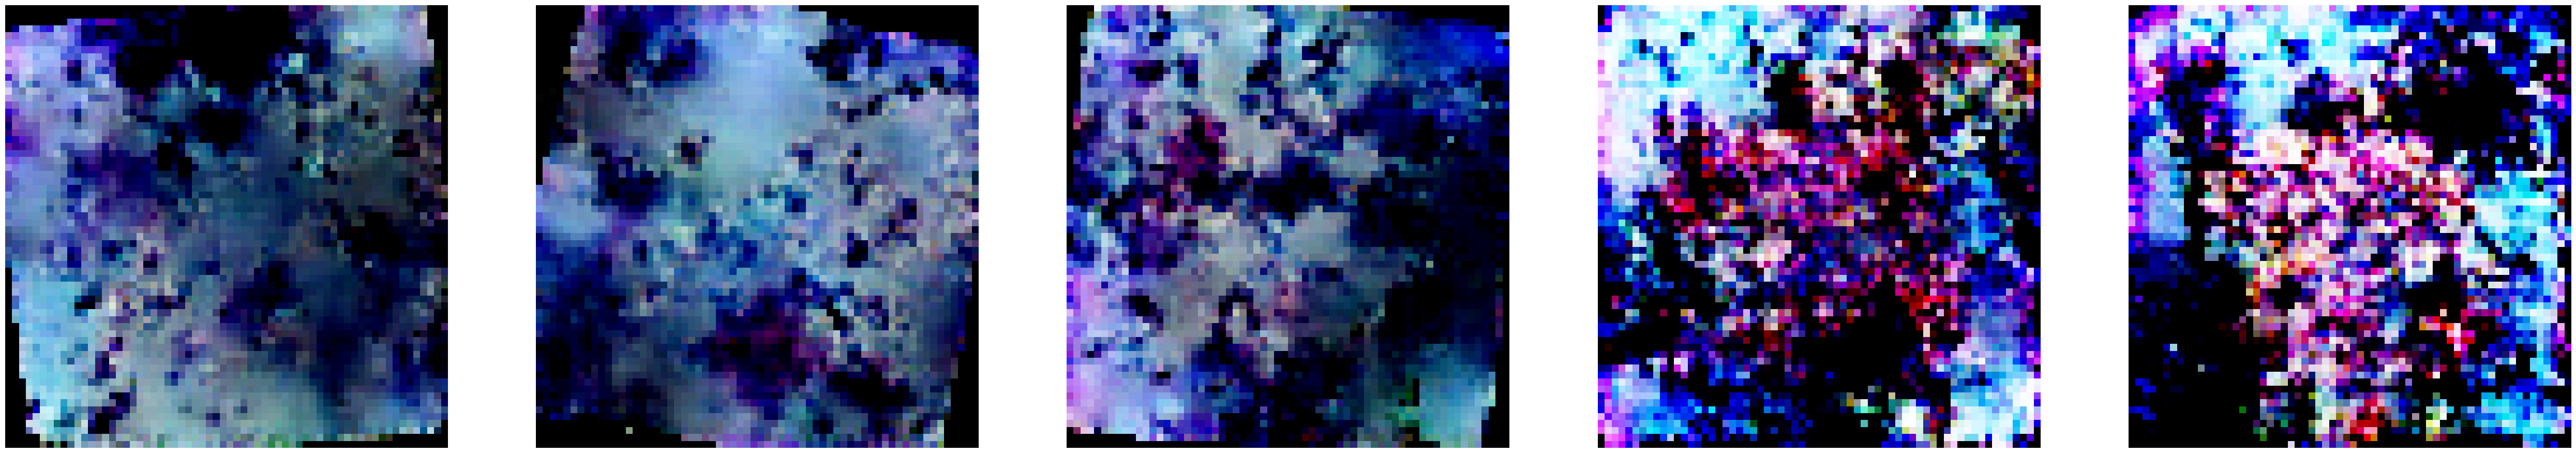

  0%|          | 0/41 [00:00<?, ?it/s]

[702/2750][20/41] Loss_D: 0.4776 Loss_G: 3.2299 D(x): 0.8537 D(G(z)): 0.1037 / 0.0365
[702/2750][40/41] Loss_D: 0.4538 Loss_G: 4.1687 D(x): 0.8727 D(G(z)): 0.0612 / 0.0147


  0%|          | 0/41 [00:00<?, ?it/s]

[703/2750][20/41] Loss_D: 0.5028 Loss_G: 3.3071 D(x): 0.8274 D(G(z)): 0.0639 / 0.0507
[703/2750][40/41] Loss_D: 0.8270 Loss_G: 3.6034 D(x): 0.5908 D(G(z)): 0.0175 / 0.0377


  0%|          | 0/41 [00:00<?, ?it/s]

[704/2750][20/41] Loss_D: 0.6377 Loss_G: 3.5227 D(x): 0.9756 D(G(z)): 0.1458 / 0.0348
[704/2750][40/41] Loss_D: 0.5961 Loss_G: 3.3413 D(x): 0.7001 D(G(z)): 0.0312 / 0.0592


  0%|          | 0/41 [00:00<?, ?it/s]

[705/2750][20/41] Loss_D: 0.5640 Loss_G: 3.9002 D(x): 0.9481 D(G(z)): 0.1024 / 0.0227
[705/2750][40/41] Loss_D: 0.4337 Loss_G: 4.3385 D(x): 0.8747 D(G(z)): 0.0301 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[706/2750][20/41] Loss_D: 0.4124 Loss_G: 3.4753 D(x): 0.8978 D(G(z)): 0.0459 / 0.0300
[706/2750][40/41] Loss_D: 0.7250 Loss_G: 2.8209 D(x): 0.6308 D(G(z)): 0.0376 / 0.0847


  0%|          | 0/41 [00:00<?, ?it/s]

[707/2750][20/41] Loss_D: 0.8747 Loss_G: 4.0661 D(x): 0.9871 D(G(z)): 0.2682 / 0.0193
[707/2750][40/41] Loss_D: 0.5537 Loss_G: 2.6865 D(x): 0.7461 D(G(z)): 0.0539 / 0.1047


  0%|          | 0/41 [00:00<?, ?it/s]

[708/2750][20/41] Loss_D: 0.4189 Loss_G: 4.4786 D(x): 0.8714 D(G(z)): 0.0413 / 0.0185
[708/2750][40/41] Loss_D: 0.4524 Loss_G: 4.6795 D(x): 0.8288 D(G(z)): 0.0120 / 0.0119


  0%|          | 0/41 [00:00<?, ?it/s]

[709/2750][20/41] Loss_D: 0.4426 Loss_G: 3.7849 D(x): 0.8795 D(G(z)): 0.0381 / 0.0250
[709/2750][40/41] Loss_D: 0.9015 Loss_G: 3.8583 D(x): 0.9386 D(G(z)): 0.3126 / 0.0215


  0%|          | 0/41 [00:00<?, ?it/s]

[710/2750][20/41] Loss_D: 0.6289 Loss_G: 3.4724 D(x): 0.8662 D(G(z)): 0.1687 / 0.0335
[710/2750][40/41] Loss_D: 0.5524 Loss_G: 3.8046 D(x): 0.9051 D(G(z)): 0.1264 / 0.0278


  0%|          | 0/41 [00:00<?, ?it/s]

[711/2750][20/41] Loss_D: 0.6177 Loss_G: 2.7978 D(x): 0.7515 D(G(z)): 0.1109 / 0.0640
[711/2750][40/41] Loss_D: 0.5661 Loss_G: 3.6258 D(x): 0.9647 D(G(z)): 0.1197 / 0.0359


  0%|          | 0/41 [00:00<?, ?it/s]

[712/2750][20/41] Loss_D: 0.6227 Loss_G: 2.9379 D(x): 0.7254 D(G(z)): 0.1051 / 0.0553
[712/2750][40/41] Loss_D: 0.6502 Loss_G: 2.9279 D(x): 0.7109 D(G(z)): 0.0758 / 0.0649


  0%|          | 0/41 [00:00<?, ?it/s]

[713/2750][20/41] Loss_D: 0.7474 Loss_G: 4.0625 D(x): 0.8852 D(G(z)): 0.2351 / 0.0208
[713/2750][40/41] Loss_D: 0.4571 Loss_G: 3.7443 D(x): 0.9229 D(G(z)): 0.0792 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[714/2750][20/41] Loss_D: 0.6609 Loss_G: 3.1482 D(x): 0.7264 D(G(z)): 0.0924 / 0.0465
[714/2750][40/41] Loss_D: 1.4008 Loss_G: 6.9065 D(x): 0.9885 D(G(z)): 0.4941 / 0.0011


  0%|          | 0/41 [00:00<?, ?it/s]

[715/2750][20/41] Loss_D: 0.7371 Loss_G: 4.4745 D(x): 0.8791 D(G(z)): 0.1996 / 0.0106
[715/2750][40/41] Loss_D: 0.5164 Loss_G: 3.5010 D(x): 0.9726 D(G(z)): 0.0804 / 0.0348


  0%|          | 0/41 [00:00<?, ?it/s]

[716/2750][20/41] Loss_D: 0.4620 Loss_G: 3.6470 D(x): 0.9360 D(G(z)): 0.0720 / 0.0278
[716/2750][40/41] Loss_D: 0.4725 Loss_G: 3.5214 D(x): 0.8659 D(G(z)): 0.0799 / 0.0422


  0%|          | 0/41 [00:00<?, ?it/s]

[717/2750][20/41] Loss_D: 0.6880 Loss_G: 3.3934 D(x): 0.6153 D(G(z)): 0.0254 / 0.0515
[717/2750][40/41] Loss_D: 0.4362 Loss_G: 3.7678 D(x): 0.8737 D(G(z)): 0.0665 / 0.0263


  0%|          | 0/41 [00:00<?, ?it/s]

[718/2750][20/41] Loss_D: 0.4877 Loss_G: 4.5714 D(x): 0.9247 D(G(z)): 0.0884 / 0.0125
[718/2750][40/41] Loss_D: 0.4401 Loss_G: 3.3407 D(x): 0.8243 D(G(z)): 0.0274 / 0.0416


  0%|          | 0/41 [00:00<?, ?it/s]

[719/2750][20/41] Loss_D: 0.5778 Loss_G: 3.1068 D(x): 0.7310 D(G(z)): 0.0742 / 0.0621
[719/2750][40/41] Loss_D: 0.7434 Loss_G: 3.1663 D(x): 0.9430 D(G(z)): 0.2236 / 0.0520


  0%|          | 0/41 [00:00<?, ?it/s]

[720/2750][20/41] Loss_D: 0.6592 Loss_G: 3.5507 D(x): 0.9299 D(G(z)): 0.2316 / 0.0284
[720/2750][40/41] Loss_D: 0.4531 Loss_G: 3.2696 D(x): 0.8023 D(G(z)): 0.0406 / 0.0490


  0%|          | 0/41 [00:00<?, ?it/s]

[721/2750][20/41] Loss_D: 0.4379 Loss_G: 4.1580 D(x): 0.8912 D(G(z)): 0.0363 / 0.0175
[721/2750][40/41] Loss_D: 0.5926 Loss_G: 2.8946 D(x): 0.6767 D(G(z)): 0.0421 / 0.0660


  0%|          | 0/41 [00:00<?, ?it/s]

[722/2750][20/41] Loss_D: 0.5057 Loss_G: 4.0386 D(x): 0.7262 D(G(z)): 0.0138 / 0.0181
[722/2750][40/41] Loss_D: 0.4606 Loss_G: 4.7162 D(x): 0.7872 D(G(z)): 0.0211 / 0.0104


  0%|          | 0/41 [00:00<?, ?it/s]

[723/2750][20/41] Loss_D: 0.4891 Loss_G: 3.8592 D(x): 0.8739 D(G(z)): 0.0834 / 0.0231
[723/2750][40/41] Loss_D: 0.6561 Loss_G: 3.0057 D(x): 0.6973 D(G(z)): 0.1140 / 0.0607


  0%|          | 0/41 [00:00<?, ?it/s]

[724/2750][20/41] Loss_D: 0.4701 Loss_G: 3.5610 D(x): 0.9416 D(G(z)): 0.0709 / 0.0277
[724/2750][40/41] Loss_D: 0.4383 Loss_G: 4.0271 D(x): 0.8308 D(G(z)): 0.0430 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[725/2750][20/41] Loss_D: 0.4483 Loss_G: 3.7284 D(x): 0.9392 D(G(z)): 0.0501 / 0.0227
[725/2750][40/41] Loss_D: 0.5074 Loss_G: 3.5584 D(x): 0.7401 D(G(z)): 0.0250 / 0.0388


  0%|          | 0/41 [00:00<?, ?it/s]

[726/2750][20/41] Loss_D: 0.5489 Loss_G: 3.6501 D(x): 0.8483 D(G(z)): 0.1246 / 0.0292
[726/2750][40/41] Loss_D: 0.8252 Loss_G: 3.3170 D(x): 0.5468 D(G(z)): 0.0134 / 0.0342


  0%|          | 0/41 [00:00<?, ?it/s]

[727/2750][20/41] Loss_D: 0.7655 Loss_G: 4.0625 D(x): 0.9262 D(G(z)): 0.2827 / 0.0172
[727/2750][40/41] Loss_D: 0.5504 Loss_G: 4.3859 D(x): 0.9302 D(G(z)): 0.1349 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[728/2750][20/41] Loss_D: 0.4420 Loss_G: 3.4593 D(x): 0.8902 D(G(z)): 0.0541 / 0.0350
[728/2750][40/41] Loss_D: 0.4350 Loss_G: 3.9757 D(x): 0.8476 D(G(z)): 0.0364 / 0.0182


  0%|          | 0/41 [00:00<?, ?it/s]

[729/2750][20/41] Loss_D: 0.7987 Loss_G: 2.6354 D(x): 0.5292 D(G(z)): 0.0314 / 0.1048
[729/2750][40/41] Loss_D: 0.5618 Loss_G: 3.1130 D(x): 0.8076 D(G(z)): 0.1116 / 0.0502


  0%|          | 0/41 [00:00<?, ?it/s]

[730/2750][20/41] Loss_D: 0.5411 Loss_G: 4.0265 D(x): 0.9489 D(G(z)): 0.1145 / 0.0182
[730/2750][40/41] Loss_D: 0.4330 Loss_G: 5.4521 D(x): 0.7641 D(G(z)): 0.0046 / 0.0056


  0%|          | 0/41 [00:00<?, ?it/s]

[731/2750][20/41] Loss_D: 0.7019 Loss_G: 4.6272 D(x): 0.6071 D(G(z)): 0.0084 / 0.0119
[731/2750][40/41] Loss_D: 0.8717 Loss_G: 2.6750 D(x): 0.5344 D(G(z)): 0.0249 / 0.0925


  0%|          | 0/41 [00:00<?, ?it/s]

[732/2750][20/41] Loss_D: 0.6188 Loss_G: 3.6953 D(x): 0.8895 D(G(z)): 0.1784 / 0.0245
[732/2750][40/41] Loss_D: 0.4849 Loss_G: 2.7181 D(x): 0.7483 D(G(z)): 0.0298 / 0.0732


  0%|          | 0/41 [00:00<?, ?it/s]

[733/2750][20/41] Loss_D: 0.6834 Loss_G: 3.2788 D(x): 0.9089 D(G(z)): 0.2221 / 0.0498
[733/2750][40/41] Loss_D: 0.4834 Loss_G: 3.5420 D(x): 0.8162 D(G(z)): 0.0551 / 0.0299


  0%|          | 0/41 [00:00<?, ?it/s]

[734/2750][20/41] Loss_D: 0.4159 Loss_G: 3.6242 D(x): 0.9173 D(G(z)): 0.0557 / 0.0310
[734/2750][40/41] Loss_D: 0.6700 Loss_G: 3.2102 D(x): 0.6526 D(G(z)): 0.0310 / 0.0500


  0%|          | 0/41 [00:00<?, ?it/s]

[735/2750][20/41] Loss_D: 0.5993 Loss_G: 3.2096 D(x): 0.6973 D(G(z)): 0.0561 / 0.0588
[735/2750][40/41] Loss_D: 0.4773 Loss_G: 3.1982 D(x): 0.8515 D(G(z)): 0.0681 / 0.0462


  0%|          | 0/41 [00:00<?, ?it/s]

[736/2750][20/41] Loss_D: 0.4611 Loss_G: 3.1446 D(x): 0.8347 D(G(z)): 0.0626 / 0.0495
[736/2750][40/41] Loss_D: 0.4742 Loss_G: 3.7350 D(x): 0.8478 D(G(z)): 0.0596 / 0.0271


  0%|          | 0/41 [00:00<?, ?it/s]

[737/2750][20/41] Loss_D: 0.6365 Loss_G: 3.1737 D(x): 0.6160 D(G(z)): 0.0214 / 0.0430
[737/2750][40/41] Loss_D: 0.6031 Loss_G: 3.4376 D(x): 0.9294 D(G(z)): 0.1698 / 0.0361


  0%|          | 0/41 [00:00<?, ?it/s]

[738/2750][20/41] Loss_D: 0.4907 Loss_G: 5.2623 D(x): 0.8080 D(G(z)): 0.0460 / 0.0128
[738/2750][40/41] Loss_D: 0.6451 Loss_G: 3.0319 D(x): 0.7037 D(G(z)): 0.1135 / 0.0540


  0%|          | 0/41 [00:00<?, ?it/s]

[739/2750][20/41] Loss_D: 0.5154 Loss_G: 3.9849 D(x): 0.9290 D(G(z)): 0.0770 / 0.0182
[739/2750][40/41] Loss_D: 0.4822 Loss_G: 4.0427 D(x): 0.8596 D(G(z)): 0.0913 / 0.0240


  0%|          | 0/41 [00:00<?, ?it/s]

[740/2750][20/41] Loss_D: 0.3905 Loss_G: 4.5112 D(x): 0.8423 D(G(z)): 0.0145 / 0.0107
[740/2750][40/41] Loss_D: 0.4274 Loss_G: 4.5784 D(x): 0.8588 D(G(z)): 0.0219 / 0.0109


  0%|          | 0/41 [00:00<?, ?it/s]

[741/2750][20/41] Loss_D: 0.5133 Loss_G: 3.0513 D(x): 0.7349 D(G(z)): 0.0327 / 0.0609
[741/2750][40/41] Loss_D: 1.2609 Loss_G: 2.5175 D(x): 0.3689 D(G(z)): 0.0304 / 0.1078


  0%|          | 0/41 [00:00<?, ?it/s]

[742/2750][20/41] Loss_D: 0.4156 Loss_G: 3.9852 D(x): 0.8980 D(G(z)): 0.0390 / 0.0211
[742/2750][40/41] Loss_D: 0.9774 Loss_G: 2.3124 D(x): 0.4393 D(G(z)): 0.0131 / 0.1139


  0%|          | 0/41 [00:00<?, ?it/s]

[743/2750][20/41] Loss_D: 0.4937 Loss_G: 3.3444 D(x): 0.9218 D(G(z)): 0.0977 / 0.0377
[743/2750][40/41] Loss_D: 1.4231 Loss_G: 3.8756 D(x): 0.9517 D(G(z)): 0.4727 / 0.0276


  0%|          | 0/41 [00:00<?, ?it/s]

[744/2750][20/41] Loss_D: 0.6882 Loss_G: 4.6120 D(x): 0.8784 D(G(z)): 0.0220 / 0.0125
[744/2750][40/41] Loss_D: 0.4665 Loss_G: 3.8276 D(x): 0.8829 D(G(z)): 0.0632 / 0.0223


  0%|          | 0/41 [00:00<?, ?it/s]

[745/2750][20/41] Loss_D: 0.8946 Loss_G: 2.9826 D(x): 0.7450 D(G(z)): 0.2614 / 0.0515
[745/2750][40/41] Loss_D: 0.4464 Loss_G: 4.3457 D(x): 0.8894 D(G(z)): 0.0418 / 0.0126


  0%|          | 0/41 [00:00<?, ?it/s]

[746/2750][20/41] Loss_D: 0.5315 Loss_G: 3.0860 D(x): 0.7156 D(G(z)): 0.0383 / 0.0438
[746/2750][40/41] Loss_D: 0.6065 Loss_G: 3.5586 D(x): 0.9412 D(G(z)): 0.1599 / 0.0295


  0%|          | 0/41 [00:00<?, ?it/s]

[747/2750][20/41] Loss_D: 1.0885 Loss_G: 3.8379 D(x): 0.9829 D(G(z)): 0.3470 / 0.0296
[747/2750][40/41] Loss_D: 0.5019 Loss_G: 4.2571 D(x): 0.8117 D(G(z)): 0.0692 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[748/2750][20/41] Loss_D: 0.4699 Loss_G: 3.8122 D(x): 0.7784 D(G(z)): 0.0464 / 0.0366
[748/2750][40/41] Loss_D: 0.4991 Loss_G: 4.1368 D(x): 0.9533 D(G(z)): 0.0890 / 0.0155


  0%|          | 0/41 [00:00<?, ?it/s]

[749/2750][20/41] Loss_D: 0.4174 Loss_G: 5.1225 D(x): 0.8168 D(G(z)): 0.0072 / 0.0082
[749/2750][40/41] Loss_D: 1.0701 Loss_G: 2.0696 D(x): 0.4193 D(G(z)): 0.0420 / 0.1670


  0%|          | 0/41 [00:00<?, ?it/s]

[750/2750][20/41] Loss_D: 0.4576 Loss_G: 4.2207 D(x): 0.9163 D(G(z)): 0.0496 / 0.0173
[750/2750][40/41] Loss_D: 0.4602 Loss_G: 3.6994 D(x): 0.9495 D(G(z)): 0.0568 / 0.0201


  0%|          | 0/41 [00:00<?, ?it/s]

[751/2750][20/41] Loss_D: 0.6257 Loss_G: 3.7259 D(x): 0.8350 D(G(z)): 0.1858 / 0.0262
[751/2750][40/41] Loss_D: 0.4424 Loss_G: 3.9459 D(x): 0.8071 D(G(z)): 0.0223 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[752/2750][20/41] Loss_D: 0.8882 Loss_G: 4.2439 D(x): 0.8676 D(G(z)): 0.3003 / 0.0165
[752/2750][40/41] Loss_D: 0.4755 Loss_G: 4.1791 D(x): 0.8471 D(G(z)): 0.0218 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[753/2750][20/41] Loss_D: 0.5085 Loss_G: 4.5573 D(x): 0.9599 D(G(z)): 0.0693 / 0.0118
[753/2750][40/41] Loss_D: 0.4645 Loss_G: 3.5000 D(x): 0.8984 D(G(z)): 0.0694 / 0.0429


  0%|          | 0/41 [00:00<?, ?it/s]

[754/2750][20/41] Loss_D: 0.5522 Loss_G: 3.1951 D(x): 0.7942 D(G(z)): 0.0737 / 0.0570
[754/2750][40/41] Loss_D: 0.6827 Loss_G: 3.4680 D(x): 0.8772 D(G(z)): 0.2326 / 0.0282


  0%|          | 0/41 [00:00<?, ?it/s]

[755/2750][20/41] Loss_D: 0.7427 Loss_G: 3.6782 D(x): 0.8879 D(G(z)): 0.0640 / 0.0299
[755/2750][40/41] Loss_D: 0.5330 Loss_G: 4.5667 D(x): 0.9295 D(G(z)): 0.0887 / 0.0123


  0%|          | 0/41 [00:00<?, ?it/s]

[756/2750][20/41] Loss_D: 0.5513 Loss_G: 2.9683 D(x): 0.7647 D(G(z)): 0.0744 / 0.0576
[756/2750][40/41] Loss_D: 0.4746 Loss_G: 3.0790 D(x): 0.8961 D(G(z)): 0.0743 / 0.0474


  0%|          | 0/41 [00:00<?, ?it/s]

[757/2750][20/41] Loss_D: 0.6395 Loss_G: 3.7994 D(x): 0.9080 D(G(z)): 0.1883 / 0.0216
[757/2750][40/41] Loss_D: 0.4397 Loss_G: 4.0241 D(x): 0.8440 D(G(z)): 0.0206 / 0.0183


  0%|          | 0/41 [00:00<?, ?it/s]

[758/2750][20/41] Loss_D: 0.5394 Loss_G: 3.2728 D(x): 0.7793 D(G(z)): 0.0970 / 0.0452
[758/2750][40/41] Loss_D: 0.4816 Loss_G: 3.0447 D(x): 0.9404 D(G(z)): 0.0643 / 0.0531


  0%|          | 0/41 [00:00<?, ?it/s]

[759/2750][20/41] Loss_D: 0.5199 Loss_G: 3.1483 D(x): 0.7532 D(G(z)): 0.0468 / 0.0475
[759/2750][40/41] Loss_D: 0.4441 Loss_G: 3.4984 D(x): 0.9086 D(G(z)): 0.0663 / 0.0369


  0%|          | 0/41 [00:00<?, ?it/s]

[760/2750][20/41] Loss_D: 0.9545 Loss_G: 3.8581 D(x): 0.5756 D(G(z)): 0.0158 / 0.0359
[760/2750][40/41] Loss_D: 0.4230 Loss_G: 4.1137 D(x): 0.9070 D(G(z)): 0.0396 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[761/2750][20/41] Loss_D: 0.6449 Loss_G: 3.7195 D(x): 0.9836 D(G(z)): 0.1184 / 0.0224
[761/2750][40/41] Loss_D: 0.9223 Loss_G: 2.1712 D(x): 0.4954 D(G(z)): 0.0543 / 0.1309


  0%|          | 0/41 [00:00<?, ?it/s]

[762/2750][20/41] Loss_D: 0.5889 Loss_G: 3.4199 D(x): 0.7777 D(G(z)): 0.1193 / 0.0362
[762/2750][40/41] Loss_D: 0.4724 Loss_G: 3.6965 D(x): 0.7722 D(G(z)): 0.0179 / 0.0300


  0%|          | 0/41 [00:00<?, ?it/s]

[763/2750][20/41] Loss_D: 0.5854 Loss_G: 3.3929 D(x): 0.8415 D(G(z)): 0.1705 / 0.0333
[763/2750][40/41] Loss_D: 0.4192 Loss_G: 4.5109 D(x): 0.8344 D(G(z)): 0.0123 / 0.0163


  0%|          | 0/41 [00:00<?, ?it/s]

[764/2750][20/41] Loss_D: 0.4570 Loss_G: 3.1208 D(x): 0.7946 D(G(z)): 0.0466 / 0.0551
[764/2750][40/41] Loss_D: 0.5898 Loss_G: 3.7972 D(x): 0.8750 D(G(z)): 0.1776 / 0.0254


  0%|          | 0/41 [00:00<?, ?it/s]

[765/2750][20/41] Loss_D: 0.4342 Loss_G: 3.6025 D(x): 0.8571 D(G(z)): 0.0429 / 0.0275
[765/2750][40/41] Loss_D: 0.7600 Loss_G: 3.8307 D(x): 0.9093 D(G(z)): 0.2764 / 0.0180


  0%|          | 0/41 [00:00<?, ?it/s]

[766/2750][20/41] Loss_D: 0.4290 Loss_G: 4.3739 D(x): 0.9103 D(G(z)): 0.0591 / 0.0164
[766/2750][40/41] Loss_D: 0.6276 Loss_G: 2.4896 D(x): 0.6402 D(G(z)): 0.0369 / 0.1098


  0%|          | 0/41 [00:00<?, ?it/s]

[767/2750][20/41] Loss_D: 0.4752 Loss_G: 3.3763 D(x): 0.8618 D(G(z)): 0.0979 / 0.0311
[767/2750][40/41] Loss_D: 0.6163 Loss_G: 3.5200 D(x): 0.6743 D(G(z)): 0.0461 / 0.0570


  0%|          | 0/41 [00:00<?, ?it/s]

[768/2750][20/41] Loss_D: 0.4305 Loss_G: 4.1065 D(x): 0.8788 D(G(z)): 0.0462 / 0.0218
[768/2750][40/41] Loss_D: 0.4222 Loss_G: 4.5252 D(x): 0.8853 D(G(z)): 0.0375 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[769/2750][20/41] Loss_D: 0.7036 Loss_G: 3.8558 D(x): 0.8220 D(G(z)): 0.1582 / 0.0205
[769/2750][40/41] Loss_D: 0.4760 Loss_G: 3.8499 D(x): 0.8272 D(G(z)): 0.0427 / 0.0268


  0%|          | 0/41 [00:00<?, ?it/s]

[770/2750][20/41] Loss_D: 0.7207 Loss_G: 3.9773 D(x): 0.9720 D(G(z)): 0.2218 / 0.0192
[770/2750][40/41] Loss_D: 0.5745 Loss_G: 2.9901 D(x): 0.7096 D(G(z)): 0.0345 / 0.0669


  0%|          | 0/41 [00:00<?, ?it/s]

[771/2750][20/41] Loss_D: 0.4913 Loss_G: 3.4265 D(x): 0.8176 D(G(z)): 0.0400 / 0.0332
[771/2750][40/41] Loss_D: 0.5770 Loss_G: 3.2982 D(x): 0.7109 D(G(z)): 0.0495 / 0.0520


  0%|          | 0/41 [00:00<?, ?it/s]

[772/2750][20/41] Loss_D: 0.4874 Loss_G: 3.6045 D(x): 0.8036 D(G(z)): 0.0525 / 0.0336
[772/2750][40/41] Loss_D: 0.4489 Loss_G: 3.9436 D(x): 0.8691 D(G(z)): 0.0605 / 0.0187


  0%|          | 0/41 [00:00<?, ?it/s]

[773/2750][20/41] Loss_D: 0.4768 Loss_G: 3.0067 D(x): 0.8284 D(G(z)): 0.0779 / 0.0473
[773/2750][40/41] Loss_D: 0.5404 Loss_G: 3.7232 D(x): 0.7490 D(G(z)): 0.0484 / 0.0401


  0%|          | 0/41 [00:00<?, ?it/s]

[774/2750][20/41] Loss_D: 0.5314 Loss_G: 2.9904 D(x): 0.7110 D(G(z)): 0.0453 / 0.0579
[774/2750][40/41] Loss_D: 0.4527 Loss_G: 4.0323 D(x): 0.9333 D(G(z)): 0.0626 / 0.0201


  0%|          | 0/41 [00:00<?, ?it/s]

[775/2750][20/41] Loss_D: 0.4283 Loss_G: 4.2886 D(x): 0.8630 D(G(z)): 0.0388 / 0.0171
[775/2750][40/41] Loss_D: 0.4898 Loss_G: 3.4799 D(x): 0.8142 D(G(z)): 0.0963 / 0.0314


  0%|          | 0/41 [00:00<?, ?it/s]

[776/2750][20/41] Loss_D: 0.8255 Loss_G: 2.0143 D(x): 0.5109 D(G(z)): 0.0344 / 0.1521
[776/2750][40/41] Loss_D: 0.6567 Loss_G: 3.0546 D(x): 0.7577 D(G(z)): 0.1267 / 0.0561


  0%|          | 0/41 [00:00<?, ?it/s]

[777/2750][20/41] Loss_D: 0.5189 Loss_G: 3.4585 D(x): 0.9194 D(G(z)): 0.0895 / 0.0331
[777/2750][40/41] Loss_D: 1.0892 Loss_G: 2.5308 D(x): 0.4615 D(G(z)): 0.0949 / 0.0936


  0%|          | 0/41 [00:00<?, ?it/s]

[778/2750][20/41] Loss_D: 0.6283 Loss_G: 3.4774 D(x): 0.9443 D(G(z)): 0.1496 / 0.0408
[778/2750][40/41] Loss_D: 0.4676 Loss_G: 3.5337 D(x): 0.9201 D(G(z)): 0.0624 / 0.0284


  0%|          | 0/41 [00:00<?, ?it/s]

[779/2750][20/41] Loss_D: 0.5016 Loss_G: 3.7730 D(x): 0.8529 D(G(z)): 0.0762 / 0.0253
[779/2750][40/41] Loss_D: 0.5871 Loss_G: 3.7350 D(x): 0.7129 D(G(z)): 0.0623 / 0.0365


  0%|          | 0/41 [00:00<?, ?it/s]

[780/2750][20/41] Loss_D: 0.5106 Loss_G: 4.0384 D(x): 0.9266 D(G(z)): 0.1109 / 0.0193
[780/2750][40/41] Loss_D: 0.4400 Loss_G: 4.9223 D(x): 0.9205 D(G(z)): 0.0290 / 0.0104


  0%|          | 0/41 [00:00<?, ?it/s]

[781/2750][20/41] Loss_D: 0.8345 Loss_G: 4.1727 D(x): 0.9187 D(G(z)): 0.3189 / 0.0172
[781/2750][40/41] Loss_D: 0.6090 Loss_G: 2.8390 D(x): 0.6552 D(G(z)): 0.0435 / 0.0669


  0%|          | 0/41 [00:00<?, ?it/s]

[782/2750][20/41] Loss_D: 0.5382 Loss_G: 3.3572 D(x): 0.7578 D(G(z)): 0.0695 / 0.0442
[782/2750][40/41] Loss_D: 0.5040 Loss_G: 3.8432 D(x): 0.9137 D(G(z)): 0.0767 / 0.0245


  0%|          | 0/41 [00:00<?, ?it/s]

[783/2750][20/41] Loss_D: 0.5756 Loss_G: 3.3264 D(x): 0.7516 D(G(z)): 0.0810 / 0.0469
[783/2750][40/41] Loss_D: 0.6267 Loss_G: 2.7305 D(x): 0.7092 D(G(z)): 0.0533 / 0.0746


  0%|          | 0/41 [00:00<?, ?it/s]

[784/2750][20/41] Loss_D: 0.4606 Loss_G: 3.7760 D(x): 0.8754 D(G(z)): 0.0711 / 0.0214
[784/2750][40/41] Loss_D: 0.5483 Loss_G: 2.7228 D(x): 0.7423 D(G(z)): 0.0948 / 0.0629


  0%|          | 0/41 [00:00<?, ?it/s]

[785/2750][20/41] Loss_D: 0.5181 Loss_G: 3.1834 D(x): 0.8624 D(G(z)): 0.1038 / 0.0509
[785/2750][40/41] Loss_D: 0.9604 Loss_G: 4.2440 D(x): 0.9720 D(G(z)): 0.3418 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[786/2750][20/41] Loss_D: 0.5404 Loss_G: 3.7353 D(x): 0.7600 D(G(z)): 0.0729 / 0.0279
[786/2750][40/41] Loss_D: 0.5171 Loss_G: 3.8041 D(x): 0.9706 D(G(z)): 0.0447 / 0.0235


  0%|          | 0/41 [00:00<?, ?it/s]

[787/2750][20/41] Loss_D: 0.8546 Loss_G: 2.5195 D(x): 0.5362 D(G(z)): 0.0251 / 0.0992
[787/2750][40/41] Loss_D: 0.4513 Loss_G: 4.3417 D(x): 0.9361 D(G(z)): 0.0741 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[788/2750][20/41] Loss_D: 0.5083 Loss_G: 4.0736 D(x): 0.7428 D(G(z)): 0.0167 / 0.0237
[788/2750][40/41] Loss_D: 0.6976 Loss_G: 2.4715 D(x): 0.6239 D(G(z)): 0.0504 / 0.0888


  0%|          | 0/41 [00:00<?, ?it/s]

[789/2750][20/41] Loss_D: 0.4882 Loss_G: 4.2813 D(x): 0.7552 D(G(z)): 0.0126 / 0.0245
[789/2750][40/41] Loss_D: 0.5935 Loss_G: 2.1684 D(x): 0.8892 D(G(z)): 0.1397 / 0.1258


  0%|          | 0/41 [00:00<?, ?it/s]

[790/2750][20/41] Loss_D: 0.5668 Loss_G: 3.5987 D(x): 0.7881 D(G(z)): 0.0664 / 0.0293
[790/2750][40/41] Loss_D: 0.4363 Loss_G: 4.7148 D(x): 0.8834 D(G(z)): 0.0417 / 0.0110


  0%|          | 0/41 [00:00<?, ?it/s]

[791/2750][20/41] Loss_D: 0.5374 Loss_G: 3.3886 D(x): 0.7863 D(G(z)): 0.0975 / 0.0378
[791/2750][40/41] Loss_D: 0.4442 Loss_G: 4.9573 D(x): 0.8575 D(G(z)): 0.0544 / 0.0094


  0%|          | 0/41 [00:00<?, ?it/s]

[792/2750][20/41] Loss_D: 0.4294 Loss_G: 4.1682 D(x): 0.7815 D(G(z)): 0.0172 / 0.0177
[792/2750][40/41] Loss_D: 0.5028 Loss_G: 4.1917 D(x): 0.7375 D(G(z)): 0.0124 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[793/2750][20/41] Loss_D: 0.5175 Loss_G: 3.5368 D(x): 0.8034 D(G(z)): 0.0706 / 0.0307
[793/2750][40/41] Loss_D: 0.4941 Loss_G: 3.7754 D(x): 0.9202 D(G(z)): 0.0835 / 0.0214


  0%|          | 0/41 [00:00<?, ?it/s]

[794/2750][20/41] Loss_D: 0.5301 Loss_G: 5.1914 D(x): 0.7557 D(G(z)): 0.0061 / 0.0078
[794/2750][40/41] Loss_D: 0.4832 Loss_G: 3.5954 D(x): 0.8428 D(G(z)): 0.0529 / 0.0281


  0%|          | 0/41 [00:00<?, ?it/s]

[795/2750][20/41] Loss_D: 0.5143 Loss_G: 4.2307 D(x): 0.9296 D(G(z)): 0.0659 / 0.0143
[795/2750][40/41] Loss_D: 0.7333 Loss_G: 3.4045 D(x): 0.5717 D(G(z)): 0.0211 / 0.0395


  0%|          | 0/41 [00:00<?, ?it/s]

[796/2750][20/41] Loss_D: 0.4048 Loss_G: 4.4938 D(x): 0.9089 D(G(z)): 0.0160 / 0.0084
[796/2750][40/41] Loss_D: 0.5953 Loss_G: 3.8496 D(x): 0.9202 D(G(z)): 0.1667 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[797/2750][20/41] Loss_D: 0.6385 Loss_G: 3.4614 D(x): 0.7216 D(G(z)): 0.1141 / 0.0373
[797/2750][40/41] Loss_D: 0.5033 Loss_G: 3.6052 D(x): 0.7611 D(G(z)): 0.0445 / 0.0375


  0%|          | 0/41 [00:00<?, ?it/s]

[798/2750][20/41] Loss_D: 0.5272 Loss_G: 3.6412 D(x): 0.7248 D(G(z)): 0.0243 / 0.0310
[798/2750][40/41] Loss_D: 0.7765 Loss_G: 2.6355 D(x): 0.5468 D(G(z)): 0.0444 / 0.0976


  0%|          | 0/41 [00:00<?, ?it/s]

[799/2750][20/41] Loss_D: 0.4007 Loss_G: 4.9734 D(x): 0.8781 D(G(z)): 0.0149 / 0.0102
[799/2750][40/41] Loss_D: 0.8123 Loss_G: 3.7215 D(x): 0.9826 D(G(z)): 0.2456 / 0.0251


  0%|          | 0/41 [00:00<?, ?it/s]

[800/2750][20/41] Loss_D: 0.5493 Loss_G: 2.9925 D(x): 0.7239 D(G(z)): 0.0381 / 0.0533
[800/2750][40/41] Loss_D: 0.5550 Loss_G: 3.4270 D(x): 0.9298 D(G(z)): 0.1256 / 0.0425


  0%|          | 0/41 [00:00<?, ?it/s]

[801/2750][20/41] Loss_D: 0.4530 Loss_G: 4.2048 D(x): 0.9147 D(G(z)): 0.0593 / 0.0131
[801/2750][40/41] Loss_D: 0.6452 Loss_G: 2.2830 D(x): 0.6708 D(G(z)): 0.0789 / 0.1331


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999942].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.98743796].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99998224].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99999607].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.996283].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_801.pth


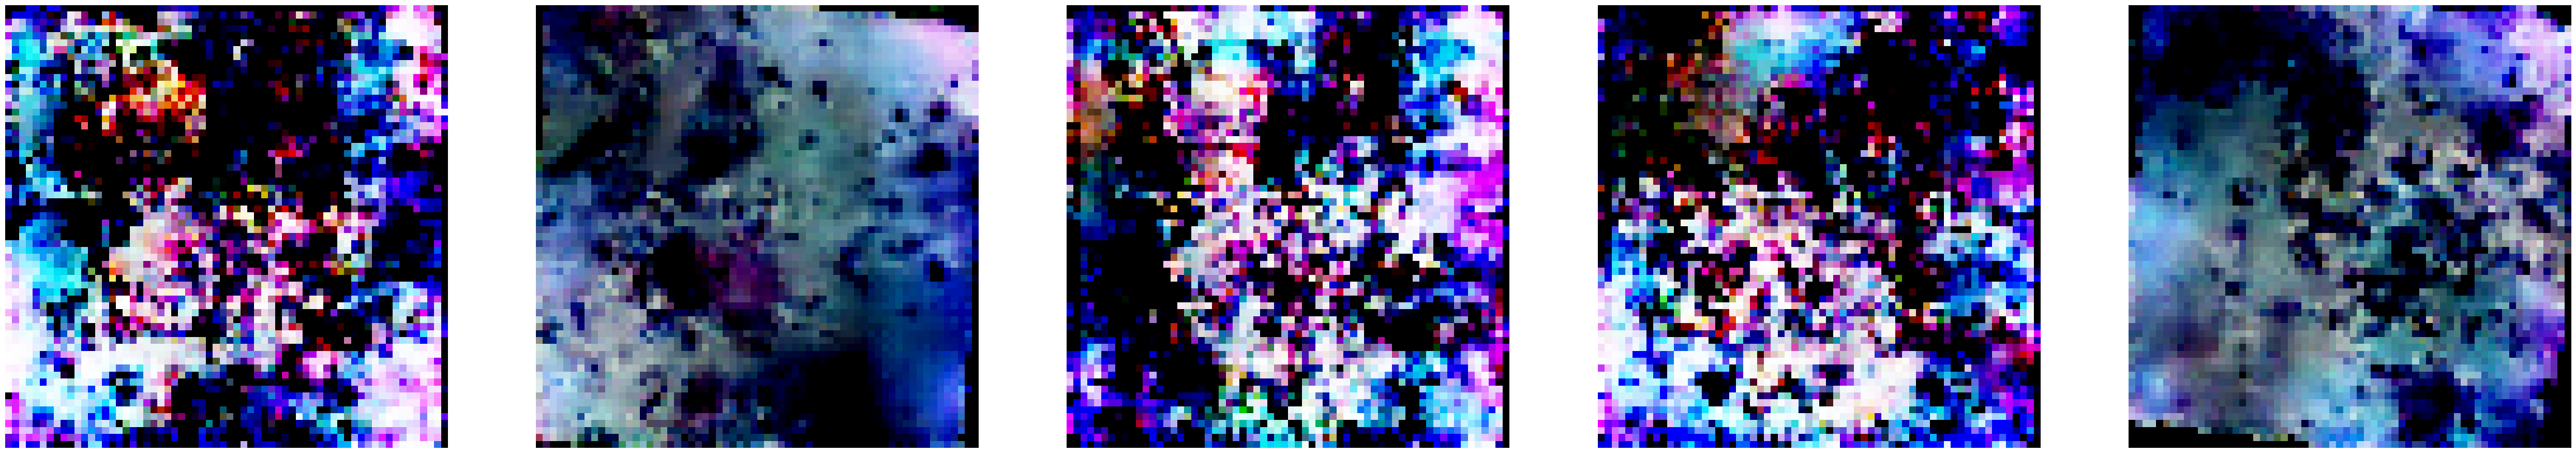

  0%|          | 0/41 [00:00<?, ?it/s]

[802/2750][20/41] Loss_D: 0.5126 Loss_G: 3.7500 D(x): 0.8636 D(G(z)): 0.1109 / 0.0295
[802/2750][40/41] Loss_D: 0.4709 Loss_G: 3.8545 D(x): 0.8393 D(G(z)): 0.0508 / 0.0249


  0%|          | 0/41 [00:00<?, ?it/s]

[803/2750][20/41] Loss_D: 0.8530 Loss_G: 4.5019 D(x): 0.9400 D(G(z)): 0.3113 / 0.0139
[803/2750][40/41] Loss_D: 0.4428 Loss_G: 3.8638 D(x): 0.8502 D(G(z)): 0.0416 / 0.0197


  0%|          | 0/41 [00:00<?, ?it/s]

[804/2750][20/41] Loss_D: 0.5930 Loss_G: 3.4253 D(x): 0.6857 D(G(z)): 0.0180 / 0.0465
[804/2750][40/41] Loss_D: 0.5206 Loss_G: 3.7161 D(x): 0.9123 D(G(z)): 0.1228 / 0.0270


  0%|          | 0/41 [00:00<?, ?it/s]

[805/2750][20/41] Loss_D: 0.4737 Loss_G: 3.7669 D(x): 0.8893 D(G(z)): 0.0716 / 0.0227
[805/2750][40/41] Loss_D: 0.4209 Loss_G: 3.6845 D(x): 0.8541 D(G(z)): 0.0462 / 0.0273


  0%|          | 0/41 [00:00<?, ?it/s]

[806/2750][20/41] Loss_D: 0.4135 Loss_G: 3.7368 D(x): 0.8916 D(G(z)): 0.0239 / 0.0275
[806/2750][40/41] Loss_D: 0.5044 Loss_G: 4.1533 D(x): 0.8451 D(G(z)): 0.0508 / 0.0179


  0%|          | 0/41 [00:00<?, ?it/s]

[807/2750][20/41] Loss_D: 0.5328 Loss_G: 3.1938 D(x): 0.8708 D(G(z)): 0.0897 / 0.0452
[807/2750][40/41] Loss_D: 0.4408 Loss_G: 4.6384 D(x): 0.9152 D(G(z)): 0.0209 / 0.0100


  0%|          | 0/41 [00:00<?, ?it/s]

[808/2750][20/41] Loss_D: 0.8714 Loss_G: 3.9782 D(x): 0.9657 D(G(z)): 0.3045 / 0.0253
[808/2750][40/41] Loss_D: 0.5680 Loss_G: 3.4025 D(x): 0.7865 D(G(z)): 0.0714 / 0.0402


  0%|          | 0/41 [00:00<?, ?it/s]

[809/2750][20/41] Loss_D: 0.6077 Loss_G: 3.8513 D(x): 0.6817 D(G(z)): 0.0109 / 0.0313
[809/2750][40/41] Loss_D: 0.6855 Loss_G: 2.7620 D(x): 0.7724 D(G(z)): 0.2014 / 0.0710


  0%|          | 0/41 [00:00<?, ?it/s]

[810/2750][20/41] Loss_D: 0.4385 Loss_G: 4.0147 D(x): 0.9262 D(G(z)): 0.0763 / 0.0226
[810/2750][40/41] Loss_D: 0.5480 Loss_G: 3.2019 D(x): 0.6908 D(G(z)): 0.0278 / 0.0511


  0%|          | 0/41 [00:00<?, ?it/s]

[811/2750][20/41] Loss_D: 0.6257 Loss_G: 3.9196 D(x): 0.9867 D(G(z)): 0.0943 / 0.0214
[811/2750][40/41] Loss_D: 1.2007 Loss_G: 1.8426 D(x): 0.3953 D(G(z)): 0.0581 / 0.2077


  0%|          | 0/41 [00:00<?, ?it/s]

[812/2750][20/41] Loss_D: 0.4563 Loss_G: 3.8239 D(x): 0.8171 D(G(z)): 0.0493 / 0.0238
[812/2750][40/41] Loss_D: 0.6964 Loss_G: 3.6180 D(x): 0.8438 D(G(z)): 0.2192 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[813/2750][20/41] Loss_D: 0.6082 Loss_G: 3.7903 D(x): 0.8974 D(G(z)): 0.1383 / 0.0254
[813/2750][40/41] Loss_D: 0.4476 Loss_G: 4.2259 D(x): 0.8242 D(G(z)): 0.0319 / 0.0197


  0%|          | 0/41 [00:00<?, ?it/s]

[814/2750][20/41] Loss_D: 0.6630 Loss_G: 2.8124 D(x): 0.6854 D(G(z)): 0.0476 / 0.0642
[814/2750][40/41] Loss_D: 0.4704 Loss_G: 4.8957 D(x): 0.9737 D(G(z)): 0.0319 / 0.0083


  0%|          | 0/41 [00:00<?, ?it/s]

[815/2750][20/41] Loss_D: 0.6320 Loss_G: 3.6300 D(x): 0.8973 D(G(z)): 0.1886 / 0.0240
[815/2750][40/41] Loss_D: 0.6992 Loss_G: 3.1998 D(x): 0.6529 D(G(z)): 0.0203 / 0.0476


  0%|          | 0/41 [00:00<?, ?it/s]

[816/2750][20/41] Loss_D: 0.5883 Loss_G: 2.9805 D(x): 0.7018 D(G(z)): 0.0474 / 0.0527
[816/2750][40/41] Loss_D: 0.5533 Loss_G: 3.2479 D(x): 0.7740 D(G(z)): 0.0511 / 0.0559


  0%|          | 0/41 [00:00<?, ?it/s]

[817/2750][20/41] Loss_D: 0.4324 Loss_G: 4.2631 D(x): 0.8274 D(G(z)): 0.0241 / 0.0241
[817/2750][40/41] Loss_D: 0.5347 Loss_G: 3.4169 D(x): 0.7690 D(G(z)): 0.0771 / 0.0394


  0%|          | 0/41 [00:00<?, ?it/s]

[818/2750][20/41] Loss_D: 0.6430 Loss_G: 2.6576 D(x): 0.6249 D(G(z)): 0.0497 / 0.0847
[818/2750][40/41] Loss_D: 0.5669 Loss_G: 5.1543 D(x): 0.6455 D(G(z)): 0.0035 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[819/2750][20/41] Loss_D: 0.4509 Loss_G: 3.1383 D(x): 0.9547 D(G(z)): 0.0523 / 0.0580
[819/2750][40/41] Loss_D: 0.7281 Loss_G: 3.3378 D(x): 0.9479 D(G(z)): 0.2231 / 0.0377


  0%|          | 0/41 [00:00<?, ?it/s]

[820/2750][20/41] Loss_D: 0.6054 Loss_G: 3.5503 D(x): 0.7721 D(G(z)): 0.1380 / 0.0364
[820/2750][40/41] Loss_D: 0.6277 Loss_G: 3.3725 D(x): 0.6461 D(G(z)): 0.0158 / 0.0507


  0%|          | 0/41 [00:00<?, ?it/s]

[821/2750][20/41] Loss_D: 0.4863 Loss_G: 3.6122 D(x): 0.9123 D(G(z)): 0.0972 / 0.0346
[821/2750][40/41] Loss_D: 0.6396 Loss_G: 3.3741 D(x): 0.9900 D(G(z)): 0.0896 / 0.0494


  0%|          | 0/41 [00:00<?, ?it/s]

[822/2750][20/41] Loss_D: 0.4298 Loss_G: 4.2800 D(x): 0.8306 D(G(z)): 0.0377 / 0.0160
[822/2750][40/41] Loss_D: 0.5397 Loss_G: 3.3072 D(x): 0.7155 D(G(z)): 0.0539 / 0.0486


  0%|          | 0/41 [00:00<?, ?it/s]

[823/2750][20/41] Loss_D: 0.4483 Loss_G: 4.1303 D(x): 0.8242 D(G(z)): 0.0225 / 0.0159
[823/2750][40/41] Loss_D: 0.4492 Loss_G: 3.1678 D(x): 0.8794 D(G(z)): 0.0729 / 0.0529


  0%|          | 0/41 [00:00<?, ?it/s]

[824/2750][20/41] Loss_D: 0.6522 Loss_G: 3.4009 D(x): 0.7200 D(G(z)): 0.1309 / 0.0438
[824/2750][40/41] Loss_D: 0.5917 Loss_G: 2.8473 D(x): 0.8587 D(G(z)): 0.1647 / 0.0615


  0%|          | 0/41 [00:00<?, ?it/s]

[825/2750][20/41] Loss_D: 0.4642 Loss_G: 3.2135 D(x): 0.9038 D(G(z)): 0.0718 / 0.0469
[825/2750][40/41] Loss_D: 0.4017 Loss_G: 3.9475 D(x): 0.8773 D(G(z)): 0.0310 / 0.0217


  0%|          | 0/41 [00:00<?, ?it/s]

[826/2750][20/41] Loss_D: 0.3989 Loss_G: 4.6853 D(x): 0.8256 D(G(z)): 0.0136 / 0.0121
[826/2750][40/41] Loss_D: 0.7680 Loss_G: 3.0240 D(x): 0.9453 D(G(z)): 0.2773 / 0.0469


  0%|          | 0/41 [00:00<?, ?it/s]

[827/2750][20/41] Loss_D: 0.4642 Loss_G: 3.2331 D(x): 0.8788 D(G(z)): 0.0853 / 0.0411
[827/2750][40/41] Loss_D: 0.5387 Loss_G: 3.6667 D(x): 0.9469 D(G(z)): 0.1079 / 0.0295


  0%|          | 0/41 [00:00<?, ?it/s]

[828/2750][20/41] Loss_D: 0.6074 Loss_G: 2.6683 D(x): 0.6736 D(G(z)): 0.0587 / 0.1178
[828/2750][40/41] Loss_D: 0.6332 Loss_G: 2.6306 D(x): 0.6790 D(G(z)): 0.0649 / 0.1212


  0%|          | 0/41 [00:00<?, ?it/s]

[829/2750][20/41] Loss_D: 0.6313 Loss_G: 2.9214 D(x): 0.7218 D(G(z)): 0.0631 / 0.0797
[829/2750][40/41] Loss_D: 0.4486 Loss_G: 4.0982 D(x): 0.9605 D(G(z)): 0.0364 / 0.0195


  0%|          | 0/41 [00:00<?, ?it/s]

[830/2750][20/41] Loss_D: 0.5057 Loss_G: 3.1523 D(x): 0.8490 D(G(z)): 0.1217 / 0.0512
[830/2750][40/41] Loss_D: 0.6120 Loss_G: 3.4314 D(x): 0.9366 D(G(z)): 0.1951 / 0.0361


  0%|          | 0/41 [00:00<?, ?it/s]

[831/2750][20/41] Loss_D: 0.4958 Loss_G: 3.4074 D(x): 0.8102 D(G(z)): 0.0755 / 0.0350
[831/2750][40/41] Loss_D: 0.6463 Loss_G: 2.8400 D(x): 0.6400 D(G(z)): 0.0391 / 0.0762


  0%|          | 0/41 [00:00<?, ?it/s]

[832/2750][20/41] Loss_D: 0.4441 Loss_G: 3.5906 D(x): 0.8231 D(G(z)): 0.0410 / 0.0314
[832/2750][40/41] Loss_D: 0.6833 Loss_G: 3.4490 D(x): 0.9486 D(G(z)): 0.2263 / 0.0312


  0%|          | 0/41 [00:00<?, ?it/s]

[833/2750][20/41] Loss_D: 0.5979 Loss_G: 2.9472 D(x): 0.6802 D(G(z)): 0.0438 / 0.0568
[833/2750][40/41] Loss_D: 0.6727 Loss_G: 4.0755 D(x): 0.9709 D(G(z)): 0.1016 / 0.0237


  0%|          | 0/41 [00:00<?, ?it/s]

[834/2750][20/41] Loss_D: 1.0819 Loss_G: 4.9971 D(x): 0.9846 D(G(z)): 0.3710 / 0.0072
[834/2750][40/41] Loss_D: 0.5545 Loss_G: 3.0986 D(x): 0.7621 D(G(z)): 0.1101 / 0.0585


  0%|          | 0/41 [00:00<?, ?it/s]

[835/2750][20/41] Loss_D: 0.5180 Loss_G: 2.7135 D(x): 0.8533 D(G(z)): 0.1123 / 0.0824
[835/2750][40/41] Loss_D: 0.4310 Loss_G: 4.1557 D(x): 0.9442 D(G(z)): 0.0315 / 0.0245


  0%|          | 0/41 [00:00<?, ?it/s]

[836/2750][20/41] Loss_D: 0.4542 Loss_G: 4.0222 D(x): 0.9053 D(G(z)): 0.0678 / 0.0204
[836/2750][40/41] Loss_D: 0.6113 Loss_G: 3.4049 D(x): 0.6567 D(G(z)): 0.0448 / 0.0368


  0%|          | 0/41 [00:00<?, ?it/s]

[837/2750][20/41] Loss_D: 0.4572 Loss_G: 4.0020 D(x): 0.9138 D(G(z)): 0.0501 / 0.0246
[837/2750][40/41] Loss_D: 0.4695 Loss_G: 3.9265 D(x): 0.8165 D(G(z)): 0.0407 / 0.0250


  0%|          | 0/41 [00:00<?, ?it/s]

[838/2750][20/41] Loss_D: 0.5393 Loss_G: 3.3490 D(x): 0.8821 D(G(z)): 0.1347 / 0.0334
[838/2750][40/41] Loss_D: 0.4644 Loss_G: 4.0946 D(x): 0.9507 D(G(z)): 0.0515 / 0.0196


  0%|          | 0/41 [00:00<?, ?it/s]

[839/2750][20/41] Loss_D: 0.5967 Loss_G: 3.3141 D(x): 0.7112 D(G(z)): 0.0324 / 0.0501
[839/2750][40/41] Loss_D: 0.5577 Loss_G: 3.4415 D(x): 0.7862 D(G(z)): 0.1148 / 0.0351


  0%|          | 0/41 [00:00<?, ?it/s]

[840/2750][20/41] Loss_D: 0.4675 Loss_G: 3.5234 D(x): 0.7315 D(G(z)): 0.0150 / 0.0286
[840/2750][40/41] Loss_D: 0.5712 Loss_G: 2.8801 D(x): 0.7950 D(G(z)): 0.1177 / 0.0620


  0%|          | 0/41 [00:00<?, ?it/s]

[841/2750][20/41] Loss_D: 0.6335 Loss_G: 3.8280 D(x): 0.9354 D(G(z)): 0.1672 / 0.0226
[841/2750][40/41] Loss_D: 0.5196 Loss_G: 3.6730 D(x): 0.7604 D(G(z)): 0.0496 / 0.0371


  0%|          | 0/41 [00:00<?, ?it/s]

[842/2750][20/41] Loss_D: 0.6973 Loss_G: 3.9257 D(x): 0.9398 D(G(z)): 0.2273 / 0.0196
[842/2750][40/41] Loss_D: 0.4460 Loss_G: 3.5407 D(x): 0.8911 D(G(z)): 0.0557 / 0.0332


  0%|          | 0/41 [00:00<?, ?it/s]

[843/2750][20/41] Loss_D: 0.7212 Loss_G: 3.1595 D(x): 0.7693 D(G(z)): 0.2086 / 0.0564
[843/2750][40/41] Loss_D: 0.4300 Loss_G: 3.4574 D(x): 0.9072 D(G(z)): 0.0633 / 0.0415


  0%|          | 0/41 [00:00<?, ?it/s]

[844/2750][20/41] Loss_D: 0.4184 Loss_G: 4.4832 D(x): 0.8907 D(G(z)): 0.0297 / 0.0132
[844/2750][40/41] Loss_D: 0.7193 Loss_G: 3.0074 D(x): 0.5718 D(G(z)): 0.0364 / 0.0645


  0%|          | 0/41 [00:00<?, ?it/s]

[845/2750][20/41] Loss_D: 0.5191 Loss_G: 3.4314 D(x): 0.9415 D(G(z)): 0.1218 / 0.0313
[845/2750][40/41] Loss_D: 0.5235 Loss_G: 3.1587 D(x): 0.7395 D(G(z)): 0.0537 / 0.0484


  0%|          | 0/41 [00:00<?, ?it/s]

[846/2750][20/41] Loss_D: 0.4923 Loss_G: 3.4645 D(x): 0.8251 D(G(z)): 0.0627 / 0.0421
[846/2750][40/41] Loss_D: 0.5801 Loss_G: 2.4141 D(x): 0.7296 D(G(z)): 0.1009 / 0.1027


  0%|          | 0/41 [00:00<?, ?it/s]

[847/2750][20/41] Loss_D: 0.5052 Loss_G: 4.1757 D(x): 0.9371 D(G(z)): 0.0858 / 0.0207
[847/2750][40/41] Loss_D: 0.4970 Loss_G: 3.6757 D(x): 0.7872 D(G(z)): 0.0513 / 0.0299


  0%|          | 0/41 [00:00<?, ?it/s]

[848/2750][20/41] Loss_D: 0.5874 Loss_G: 3.0161 D(x): 0.7810 D(G(z)): 0.0961 / 0.0552
[848/2750][40/41] Loss_D: 0.5830 Loss_G: 4.6022 D(x): 0.9746 D(G(z)): 0.0973 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[849/2750][20/41] Loss_D: 0.5061 Loss_G: 4.0309 D(x): 0.9291 D(G(z)): 0.1095 / 0.0191
[849/2750][40/41] Loss_D: 0.6794 Loss_G: 4.1701 D(x): 0.8978 D(G(z)): 0.0228 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[850/2750][20/41] Loss_D: 0.4506 Loss_G: 3.7190 D(x): 0.8102 D(G(z)): 0.0308 / 0.0216
[850/2750][40/41] Loss_D: 0.6564 Loss_G: 3.9829 D(x): 0.8943 D(G(z)): 0.2158 / 0.0188


  0%|          | 0/41 [00:00<?, ?it/s]

[851/2750][20/41] Loss_D: 0.5421 Loss_G: 3.6323 D(x): 0.7800 D(G(z)): 0.0662 / 0.0292
[851/2750][40/41] Loss_D: 0.4768 Loss_G: 3.8836 D(x): 0.8650 D(G(z)): 0.0884 / 0.0224


  0%|          | 0/41 [00:00<?, ?it/s]

[852/2750][20/41] Loss_D: 0.6920 Loss_G: 2.4650 D(x): 0.7141 D(G(z)): 0.1222 / 0.0974
[852/2750][40/41] Loss_D: 0.4801 Loss_G: 3.9681 D(x): 0.7626 D(G(z)): 0.0225 / 0.0306


  0%|          | 0/41 [00:00<?, ?it/s]

[853/2750][20/41] Loss_D: 0.5114 Loss_G: 3.2726 D(x): 0.8189 D(G(z)): 0.0811 / 0.0493
[853/2750][40/41] Loss_D: 0.4858 Loss_G: 4.0154 D(x): 0.7674 D(G(z)): 0.0178 / 0.0226


  0%|          | 0/41 [00:00<?, ?it/s]

[854/2750][20/41] Loss_D: 0.4833 Loss_G: 3.6019 D(x): 0.8270 D(G(z)): 0.0408 / 0.0294
[854/2750][40/41] Loss_D: 0.4905 Loss_G: 3.7037 D(x): 0.9203 D(G(z)): 0.0855 / 0.0287


  0%|          | 0/41 [00:00<?, ?it/s]

[855/2750][20/41] Loss_D: 1.0174 Loss_G: 2.4856 D(x): 0.4386 D(G(z)): 0.0473 / 0.0990
[855/2750][40/41] Loss_D: 0.5986 Loss_G: 3.8704 D(x): 0.9309 D(G(z)): 0.1615 / 0.0217


  0%|          | 0/41 [00:00<?, ?it/s]

[856/2750][20/41] Loss_D: 0.4253 Loss_G: 4.7473 D(x): 0.9459 D(G(z)): 0.0298 / 0.0097
[856/2750][40/41] Loss_D: 0.4118 Loss_G: 4.9671 D(x): 0.9093 D(G(z)): 0.0275 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[857/2750][20/41] Loss_D: 0.6193 Loss_G: 2.2907 D(x): 0.7281 D(G(z)): 0.1074 / 0.1035
[857/2750][40/41] Loss_D: 0.4754 Loss_G: 4.2143 D(x): 0.7797 D(G(z)): 0.0211 / 0.0199


  0%|          | 0/41 [00:00<?, ?it/s]

[858/2750][20/41] Loss_D: 0.4346 Loss_G: 3.9590 D(x): 0.8027 D(G(z)): 0.0273 / 0.0200
[858/2750][40/41] Loss_D: 0.7483 Loss_G: 3.8822 D(x): 0.6177 D(G(z)): 0.0143 / 0.0363


  0%|          | 0/41 [00:00<?, ?it/s]

[859/2750][20/41] Loss_D: 0.8483 Loss_G: 4.6656 D(x): 0.9619 D(G(z)): 0.2951 / 0.0132
[859/2750][40/41] Loss_D: 0.4603 Loss_G: 3.5339 D(x): 0.8801 D(G(z)): 0.0482 / 0.0398


  0%|          | 0/41 [00:00<?, ?it/s]

[860/2750][20/41] Loss_D: 0.7082 Loss_G: 3.2296 D(x): 0.6073 D(G(z)): 0.0306 / 0.0607
[860/2750][40/41] Loss_D: 0.4772 Loss_G: 3.5632 D(x): 0.7571 D(G(z)): 0.0356 / 0.0389


  0%|          | 0/41 [00:00<?, ?it/s]

[861/2750][20/41] Loss_D: 0.5517 Loss_G: 3.1616 D(x): 0.9401 D(G(z)): 0.1165 / 0.0443
[861/2750][40/41] Loss_D: 0.5430 Loss_G: 3.2265 D(x): 0.7753 D(G(z)): 0.0996 / 0.0530


  0%|          | 0/41 [00:00<?, ?it/s]

[862/2750][20/41] Loss_D: 0.5502 Loss_G: 3.3068 D(x): 0.7223 D(G(z)): 0.0405 / 0.0413
[862/2750][40/41] Loss_D: 0.6761 Loss_G: 3.5105 D(x): 0.7937 D(G(z)): 0.1776 / 0.0322


  0%|          | 0/41 [00:00<?, ?it/s]

[863/2750][20/41] Loss_D: 0.5653 Loss_G: 2.7825 D(x): 0.8025 D(G(z)): 0.1316 / 0.0697
[863/2750][40/41] Loss_D: 0.5067 Loss_G: 3.8240 D(x): 0.7436 D(G(z)): 0.0239 / 0.0209


  0%|          | 0/41 [00:00<?, ?it/s]

[864/2750][20/41] Loss_D: 0.6286 Loss_G: 2.6999 D(x): 0.6127 D(G(z)): 0.0321 / 0.1153
[864/2750][40/41] Loss_D: 0.5128 Loss_G: 2.9804 D(x): 0.7990 D(G(z)): 0.0839 / 0.0654


  0%|          | 0/41 [00:00<?, ?it/s]

[865/2750][20/41] Loss_D: 0.7115 Loss_G: 4.0766 D(x): 0.9049 D(G(z)): 0.2353 / 0.0187
[865/2750][40/41] Loss_D: 0.5348 Loss_G: 2.8132 D(x): 0.8011 D(G(z)): 0.1178 / 0.0560


  0%|          | 0/41 [00:00<?, ?it/s]

[866/2750][20/41] Loss_D: 0.4339 Loss_G: 3.7011 D(x): 0.8982 D(G(z)): 0.0656 / 0.0301
[866/2750][40/41] Loss_D: 0.4467 Loss_G: 3.4589 D(x): 0.8239 D(G(z)): 0.0619 / 0.0329


  0%|          | 0/41 [00:00<?, ?it/s]

[867/2750][20/41] Loss_D: 0.8117 Loss_G: 2.4444 D(x): 0.5574 D(G(z)): 0.0273 / 0.1140
[867/2750][40/41] Loss_D: 0.5113 Loss_G: 3.4511 D(x): 0.8715 D(G(z)): 0.0718 / 0.0300


  0%|          | 0/41 [00:00<?, ?it/s]

[868/2750][20/41] Loss_D: 0.4952 Loss_G: 2.8967 D(x): 0.7437 D(G(z)): 0.0534 / 0.0620
[868/2750][40/41] Loss_D: 0.4343 Loss_G: 4.0395 D(x): 0.8151 D(G(z)): 0.0189 / 0.0195


  0%|          | 0/41 [00:00<?, ?it/s]

[869/2750][20/41] Loss_D: 0.4219 Loss_G: 4.1023 D(x): 0.8590 D(G(z)): 0.0429 / 0.0204
[869/2750][40/41] Loss_D: 0.6047 Loss_G: 2.6572 D(x): 0.6831 D(G(z)): 0.0652 / 0.0903


  0%|          | 0/41 [00:00<?, ?it/s]

[870/2750][20/41] Loss_D: 0.7718 Loss_G: 2.3965 D(x): 0.5670 D(G(z)): 0.0334 / 0.1189
[870/2750][40/41] Loss_D: 0.7999 Loss_G: 2.3533 D(x): 0.6823 D(G(z)): 0.1487 / 0.1021


  0%|          | 0/41 [00:00<?, ?it/s]

[871/2750][20/41] Loss_D: 0.5248 Loss_G: 3.6583 D(x): 0.7212 D(G(z)): 0.0505 / 0.0393
[871/2750][40/41] Loss_D: 0.5318 Loss_G: 3.6800 D(x): 0.9236 D(G(z)): 0.1251 / 0.0249


  0%|          | 0/41 [00:00<?, ?it/s]

[872/2750][20/41] Loss_D: 0.4553 Loss_G: 3.7837 D(x): 0.9699 D(G(z)): 0.0414 / 0.0305
[872/2750][40/41] Loss_D: 0.4009 Loss_G: 3.9394 D(x): 0.9013 D(G(z)): 0.0438 / 0.0203


  0%|          | 0/41 [00:00<?, ?it/s]

[873/2750][20/41] Loss_D: 0.4719 Loss_G: 3.8579 D(x): 0.8826 D(G(z)): 0.0690 / 0.0241
[873/2750][40/41] Loss_D: 0.5943 Loss_G: 3.3818 D(x): 0.8634 D(G(z)): 0.1845 / 0.0365


  0%|          | 0/41 [00:00<?, ?it/s]

[874/2750][20/41] Loss_D: 0.4592 Loss_G: 4.6405 D(x): 0.9540 D(G(z)): 0.0530 / 0.0083
[874/2750][40/41] Loss_D: 0.4085 Loss_G: 3.8859 D(x): 0.8795 D(G(z)): 0.0444 / 0.0236


  0%|          | 0/41 [00:00<?, ?it/s]

[875/2750][20/41] Loss_D: 0.8660 Loss_G: 4.2615 D(x): 0.9473 D(G(z)): 0.2940 / 0.0138
[875/2750][40/41] Loss_D: 0.5969 Loss_G: 4.5488 D(x): 0.9391 D(G(z)): 0.1487 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[876/2750][20/41] Loss_D: 0.4845 Loss_G: 4.2855 D(x): 0.9748 D(G(z)): 0.0235 / 0.0206
[876/2750][40/41] Loss_D: 0.7540 Loss_G: 2.7866 D(x): 0.6520 D(G(z)): 0.0840 / 0.0664


  0%|          | 0/41 [00:00<?, ?it/s]

[877/2750][20/41] Loss_D: 0.5047 Loss_G: 3.1294 D(x): 0.9122 D(G(z)): 0.1028 / 0.0544
[877/2750][40/41] Loss_D: 0.7219 Loss_G: 3.1079 D(x): 0.7706 D(G(z)): 0.1388 / 0.0449


  0%|          | 0/41 [00:00<?, ?it/s]

[878/2750][20/41] Loss_D: 1.0017 Loss_G: 2.1012 D(x): 0.4478 D(G(z)): 0.0208 / 0.1433
[878/2750][40/41] Loss_D: 0.5049 Loss_G: 3.2149 D(x): 0.7423 D(G(z)): 0.0459 / 0.0414


  0%|          | 0/41 [00:00<?, ?it/s]

[879/2750][20/41] Loss_D: 0.8874 Loss_G: 3.6266 D(x): 0.4776 D(G(z)): 0.0035 / 0.0364
[879/2750][40/41] Loss_D: 0.4816 Loss_G: 3.1961 D(x): 0.7732 D(G(z)): 0.0137 / 0.0465


  0%|          | 0/41 [00:00<?, ?it/s]

[880/2750][20/41] Loss_D: 1.4895 Loss_G: 2.2242 D(x): 0.3156 D(G(z)): 0.0244 / 0.1549
[880/2750][40/41] Loss_D: 0.4606 Loss_G: 4.5713 D(x): 0.8574 D(G(z)): 0.0168 / 0.0120


  0%|          | 0/41 [00:00<?, ?it/s]

[881/2750][20/41] Loss_D: 0.4414 Loss_G: 3.7888 D(x): 0.8927 D(G(z)): 0.0448 / 0.0261
[881/2750][40/41] Loss_D: 0.4940 Loss_G: 3.5514 D(x): 0.8007 D(G(z)): 0.0445 / 0.0472


  0%|          | 0/41 [00:00<?, ?it/s]

[882/2750][20/41] Loss_D: 0.6446 Loss_G: 3.2594 D(x): 0.7864 D(G(z)): 0.1288 / 0.0665
[882/2750][40/41] Loss_D: 0.5047 Loss_G: 3.6239 D(x): 0.7355 D(G(z)): 0.0181 / 0.0284


  0%|          | 0/41 [00:00<?, ?it/s]

[883/2750][20/41] Loss_D: 0.4915 Loss_G: 3.4075 D(x): 0.8801 D(G(z)): 0.0841 / 0.0353
[883/2750][40/41] Loss_D: 0.4740 Loss_G: 3.6854 D(x): 0.8174 D(G(z)): 0.0442 / 0.0319


  0%|          | 0/41 [00:00<?, ?it/s]

[884/2750][20/41] Loss_D: 0.8819 Loss_G: 3.6935 D(x): 0.9196 D(G(z)): 0.3317 / 0.0265
[884/2750][40/41] Loss_D: 0.4407 Loss_G: 3.8966 D(x): 0.8885 D(G(z)): 0.0633 / 0.0219


  0%|          | 0/41 [00:00<?, ?it/s]

[885/2750][20/41] Loss_D: 0.3999 Loss_G: 4.0701 D(x): 0.8913 D(G(z)): 0.0307 / 0.0196
[885/2750][40/41] Loss_D: 0.8632 Loss_G: 3.2871 D(x): 0.5004 D(G(z)): 0.0271 / 0.0496


  0%|          | 0/41 [00:00<?, ?it/s]

[886/2750][20/41] Loss_D: 0.5741 Loss_G: 3.1125 D(x): 0.8009 D(G(z)): 0.0953 / 0.0609
[886/2750][40/41] Loss_D: 0.5196 Loss_G: 3.1844 D(x): 0.9013 D(G(z)): 0.0947 / 0.0498


  0%|          | 0/41 [00:00<?, ?it/s]

[887/2750][20/41] Loss_D: 0.5031 Loss_G: 3.4066 D(x): 0.8180 D(G(z)): 0.0666 / 0.0331
[887/2750][40/41] Loss_D: 0.5285 Loss_G: 3.9395 D(x): 0.8119 D(G(z)): 0.0826 / 0.0259


  0%|          | 0/41 [00:00<?, ?it/s]

[888/2750][20/41] Loss_D: 0.6241 Loss_G: 3.0135 D(x): 0.6484 D(G(z)): 0.0399 / 0.0678
[888/2750][40/41] Loss_D: 0.5302 Loss_G: 3.7342 D(x): 0.8789 D(G(z)): 0.1361 / 0.0235


  0%|          | 0/41 [00:00<?, ?it/s]

[889/2750][20/41] Loss_D: 0.5135 Loss_G: 3.8680 D(x): 0.9073 D(G(z)): 0.1087 / 0.0205
[889/2750][40/41] Loss_D: 0.6387 Loss_G: 4.3022 D(x): 0.9591 D(G(z)): 0.1615 / 0.0133


  0%|          | 0/41 [00:00<?, ?it/s]

[890/2750][20/41] Loss_D: 1.0841 Loss_G: 5.6157 D(x): 0.9692 D(G(z)): 0.3979 / 0.0041
[890/2750][40/41] Loss_D: 0.8535 Loss_G: 2.2735 D(x): 0.6151 D(G(z)): 0.1348 / 0.1344


  0%|          | 0/41 [00:00<?, ?it/s]

[891/2750][20/41] Loss_D: 0.5976 Loss_G: 3.0954 D(x): 0.8577 D(G(z)): 0.1222 / 0.0431
[891/2750][40/41] Loss_D: 0.4858 Loss_G: 3.8742 D(x): 0.7833 D(G(z)): 0.0346 / 0.0233


  0%|          | 0/41 [00:00<?, ?it/s]

[892/2750][20/41] Loss_D: 0.6068 Loss_G: 3.3144 D(x): 0.9417 D(G(z)): 0.1547 / 0.0426
[892/2750][40/41] Loss_D: 0.4396 Loss_G: 3.7105 D(x): 0.7963 D(G(z)): 0.0163 / 0.0282


  0%|          | 0/41 [00:00<?, ?it/s]

[893/2750][20/41] Loss_D: 0.7975 Loss_G: 3.8749 D(x): 0.9676 D(G(z)): 0.2259 / 0.0267
[893/2750][40/41] Loss_D: 0.7607 Loss_G: 3.7047 D(x): 0.9251 D(G(z)): 0.0710 / 0.0262


  0%|          | 0/41 [00:00<?, ?it/s]

[894/2750][20/41] Loss_D: 0.5151 Loss_G: 3.6660 D(x): 0.7258 D(G(z)): 0.0224 / 0.0332
[894/2750][40/41] Loss_D: 0.5680 Loss_G: 3.1138 D(x): 0.8069 D(G(z)): 0.1122 / 0.0545


  0%|          | 0/41 [00:00<?, ?it/s]

[895/2750][20/41] Loss_D: 0.4856 Loss_G: 2.9371 D(x): 0.7525 D(G(z)): 0.0331 / 0.0533
[895/2750][40/41] Loss_D: 0.4952 Loss_G: 3.6989 D(x): 0.9236 D(G(z)): 0.1025 / 0.0269


  0%|          | 0/41 [00:00<?, ?it/s]

[896/2750][20/41] Loss_D: 0.4384 Loss_G: 3.8116 D(x): 0.9030 D(G(z)): 0.0477 / 0.0201
[896/2750][40/41] Loss_D: 0.5844 Loss_G: 4.1084 D(x): 0.8925 D(G(z)): 0.1654 / 0.0244


  0%|          | 0/41 [00:00<?, ?it/s]

[897/2750][20/41] Loss_D: 0.5358 Loss_G: 3.5601 D(x): 0.8690 D(G(z)): 0.1202 / 0.0307
[897/2750][40/41] Loss_D: 0.6408 Loss_G: 3.1666 D(x): 0.6392 D(G(z)): 0.0191 / 0.0594


  0%|          | 0/41 [00:00<?, ?it/s]

[898/2750][20/41] Loss_D: 0.4531 Loss_G: 3.2531 D(x): 0.8346 D(G(z)): 0.0540 / 0.0441
[898/2750][40/41] Loss_D: 0.4665 Loss_G: 3.4243 D(x): 0.9022 D(G(z)): 0.0819 / 0.0322


  0%|          | 0/41 [00:00<?, ?it/s]

[899/2750][20/41] Loss_D: 0.4681 Loss_G: 4.3345 D(x): 0.7453 D(G(z)): 0.0135 / 0.0135
[899/2750][40/41] Loss_D: 0.7343 Loss_G: 3.8284 D(x): 0.8749 D(G(z)): 0.0536 / 0.0268


  0%|          | 0/41 [00:00<?, ?it/s]

[900/2750][20/41] Loss_D: 0.7017 Loss_G: 1.9775 D(x): 0.5811 D(G(z)): 0.0320 / 0.1730
[900/2750][40/41] Loss_D: 0.4518 Loss_G: 3.1535 D(x): 0.8893 D(G(z)): 0.0669 / 0.0444


  0%|          | 0/41 [00:00<?, ?it/s]

[901/2750][20/41] Loss_D: 0.4636 Loss_G: 3.4321 D(x): 0.8700 D(G(z)): 0.0702 / 0.0342
[901/2750][40/41] Loss_D: 0.6700 Loss_G: 2.2411 D(x): 0.7085 D(G(z)): 0.1321 / 0.1225


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.98139435].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99998754].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9997558].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999906].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9815756].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_901.pth


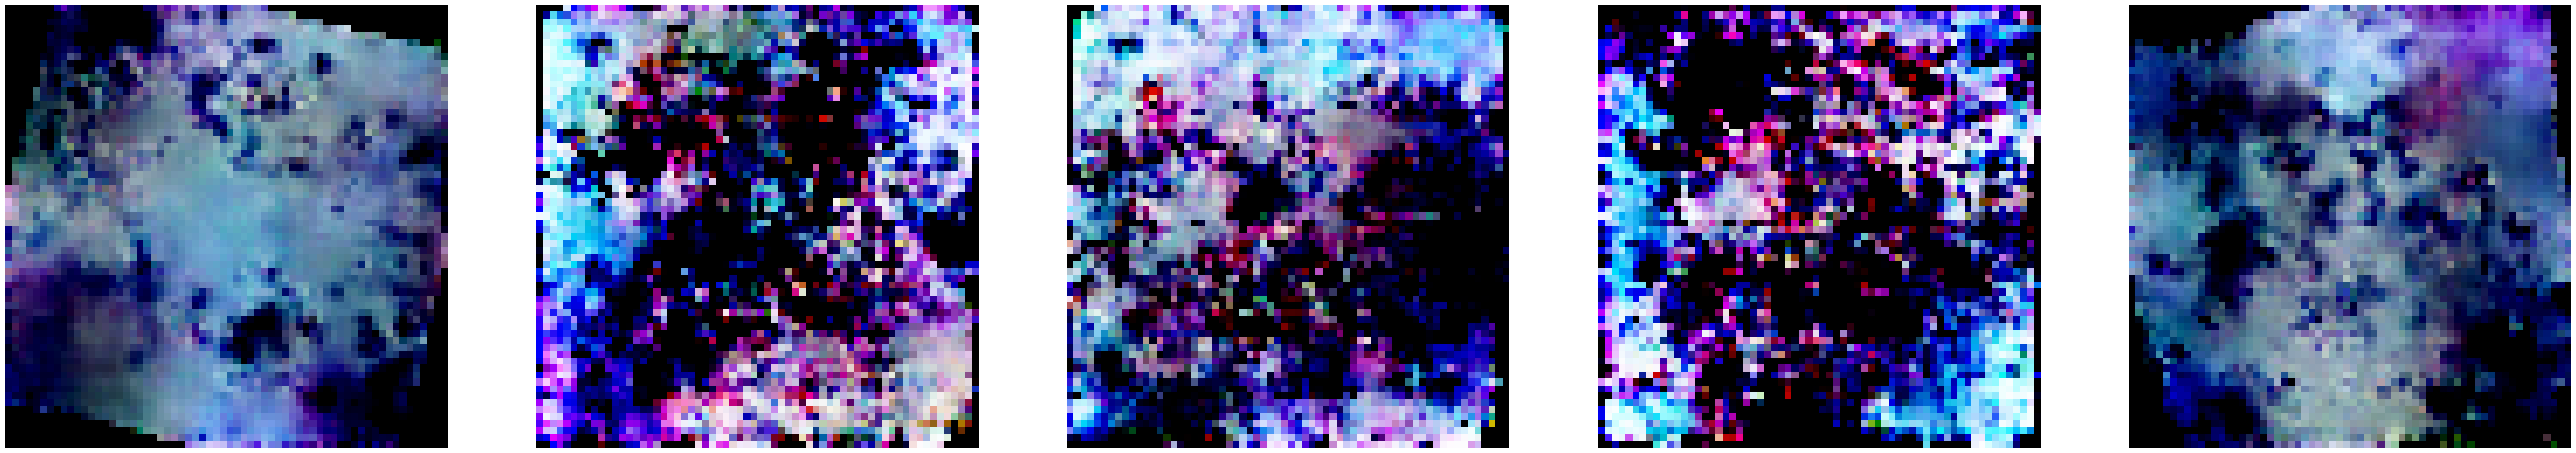

  0%|          | 0/41 [00:00<?, ?it/s]

[902/2750][20/41] Loss_D: 0.5345 Loss_G: 2.9979 D(x): 0.9129 D(G(z)): 0.1145 / 0.0490
[902/2750][40/41] Loss_D: 0.8400 Loss_G: 3.8687 D(x): 0.9779 D(G(z)): 0.0932 / 0.0195


  0%|          | 0/41 [00:00<?, ?it/s]

[903/2750][20/41] Loss_D: 0.4029 Loss_G: 4.3141 D(x): 0.8645 D(G(z)): 0.0137 / 0.0172
[903/2750][40/41] Loss_D: 0.5401 Loss_G: 3.5858 D(x): 0.9616 D(G(z)): 0.0835 / 0.0284


  0%|          | 0/41 [00:00<?, ?it/s]

[904/2750][20/41] Loss_D: 0.5670 Loss_G: 3.6896 D(x): 0.9169 D(G(z)): 0.1377 / 0.0251
[904/2750][40/41] Loss_D: 0.6176 Loss_G: 3.6930 D(x): 0.6823 D(G(z)): 0.0235 / 0.0302


  0%|          | 0/41 [00:00<?, ?it/s]

[905/2750][20/41] Loss_D: 0.5202 Loss_G: 3.4371 D(x): 0.8678 D(G(z)): 0.0968 / 0.0375
[905/2750][40/41] Loss_D: 0.5783 Loss_G: 3.9304 D(x): 0.8584 D(G(z)): 0.1507 / 0.0216


  0%|          | 0/41 [00:00<?, ?it/s]

[906/2750][20/41] Loss_D: 0.4606 Loss_G: 3.3699 D(x): 0.8168 D(G(z)): 0.0506 / 0.0392
[906/2750][40/41] Loss_D: 0.4415 Loss_G: 4.2251 D(x): 0.8003 D(G(z)): 0.0202 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[907/2750][20/41] Loss_D: 0.7927 Loss_G: 2.5393 D(x): 0.5882 D(G(z)): 0.0546 / 0.0940
[907/2750][40/41] Loss_D: 0.4593 Loss_G: 4.0159 D(x): 0.9345 D(G(z)): 0.0761 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[908/2750][20/41] Loss_D: 0.4410 Loss_G: 4.0681 D(x): 0.9159 D(G(z)): 0.0504 / 0.0192
[908/2750][40/41] Loss_D: 0.6380 Loss_G: 3.2929 D(x): 0.9718 D(G(z)): 0.1545 / 0.0420


  0%|          | 0/41 [00:00<?, ?it/s]

[909/2750][20/41] Loss_D: 0.3850 Loss_G: 5.8073 D(x): 0.8560 D(G(z)): 0.0035 / 0.0038
[909/2750][40/41] Loss_D: 0.4686 Loss_G: 4.3557 D(x): 0.8882 D(G(z)): 0.0627 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[910/2750][20/41] Loss_D: 0.4996 Loss_G: 3.2252 D(x): 0.7871 D(G(z)): 0.0894 / 0.0448
[910/2750][40/41] Loss_D: 1.0551 Loss_G: 3.5763 D(x): 0.4531 D(G(z)): 0.0048 / 0.0414


  0%|          | 0/41 [00:00<?, ?it/s]

[911/2750][20/41] Loss_D: 0.4321 Loss_G: 5.0525 D(x): 0.8695 D(G(z)): 0.0240 / 0.0069
[911/2750][40/41] Loss_D: 0.5851 Loss_G: 3.5684 D(x): 0.9203 D(G(z)): 0.1723 / 0.0329


  0%|          | 0/41 [00:00<?, ?it/s]

[912/2750][20/41] Loss_D: 0.5974 Loss_G: 3.6318 D(x): 0.6694 D(G(z)): 0.0180 / 0.0448
[912/2750][40/41] Loss_D: 0.4192 Loss_G: 3.7588 D(x): 0.8510 D(G(z)): 0.0319 / 0.0281


  0%|          | 0/41 [00:00<?, ?it/s]

[913/2750][20/41] Loss_D: 0.4484 Loss_G: 3.8384 D(x): 0.8501 D(G(z)): 0.0320 / 0.0306
[913/2750][40/41] Loss_D: 0.4338 Loss_G: 3.7646 D(x): 0.8383 D(G(z)): 0.0390 / 0.0264


  0%|          | 0/41 [00:00<?, ?it/s]

[914/2750][20/41] Loss_D: 0.5952 Loss_G: 2.9768 D(x): 0.7215 D(G(z)): 0.0926 / 0.0668
[914/2750][40/41] Loss_D: 0.5723 Loss_G: 3.1870 D(x): 0.9268 D(G(z)): 0.1444 / 0.0491


  0%|          | 0/41 [00:00<?, ?it/s]

[915/2750][20/41] Loss_D: 0.5912 Loss_G: 3.1058 D(x): 0.9395 D(G(z)): 0.1510 / 0.0449
[915/2750][40/41] Loss_D: 0.5238 Loss_G: 3.4121 D(x): 0.7395 D(G(z)): 0.0628 / 0.0389


  0%|          | 0/41 [00:00<?, ?it/s]

[916/2750][20/41] Loss_D: 0.4603 Loss_G: 4.0293 D(x): 0.9075 D(G(z)): 0.0351 / 0.0176
[916/2750][40/41] Loss_D: 0.6284 Loss_G: 2.9087 D(x): 0.6969 D(G(z)): 0.0718 / 0.0835


  0%|          | 0/41 [00:00<?, ?it/s]

[917/2750][20/41] Loss_D: 0.6338 Loss_G: 4.2954 D(x): 0.6414 D(G(z)): 0.0222 / 0.0244
[917/2750][40/41] Loss_D: 0.4377 Loss_G: 3.1571 D(x): 0.8389 D(G(z)): 0.0552 / 0.0428


  0%|          | 0/41 [00:00<?, ?it/s]

[918/2750][20/41] Loss_D: 0.4863 Loss_G: 3.4322 D(x): 0.7801 D(G(z)): 0.0382 / 0.0351
[918/2750][40/41] Loss_D: 0.4627 Loss_G: 3.9903 D(x): 0.8043 D(G(z)): 0.0574 / 0.0220


  0%|          | 0/41 [00:00<?, ?it/s]

[919/2750][20/41] Loss_D: 0.6604 Loss_G: 3.2712 D(x): 0.8315 D(G(z)): 0.1447 / 0.0375
[919/2750][40/41] Loss_D: 0.4372 Loss_G: 4.2089 D(x): 0.9344 D(G(z)): 0.0399 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[920/2750][20/41] Loss_D: 0.4706 Loss_G: 4.7019 D(x): 0.7573 D(G(z)): 0.0112 / 0.0137
[920/2750][40/41] Loss_D: 0.4785 Loss_G: 3.2369 D(x): 0.8474 D(G(z)): 0.0797 / 0.0396


  0%|          | 0/41 [00:00<?, ?it/s]

[921/2750][20/41] Loss_D: 0.5237 Loss_G: 5.3745 D(x): 0.9854 D(G(z)): 0.0304 / 0.0064
[921/2750][40/41] Loss_D: 0.5923 Loss_G: 3.4929 D(x): 0.9296 D(G(z)): 0.1724 / 0.0246


  0%|          | 0/41 [00:00<?, ?it/s]

[922/2750][20/41] Loss_D: 0.6935 Loss_G: 3.7191 D(x): 0.6517 D(G(z)): 0.0492 / 0.0249
[922/2750][40/41] Loss_D: 0.4196 Loss_G: 3.7476 D(x): 0.8777 D(G(z)): 0.0379 / 0.0255


  0%|          | 0/41 [00:00<?, ?it/s]

[923/2750][20/41] Loss_D: 0.7630 Loss_G: 4.2438 D(x): 0.9147 D(G(z)): 0.0743 / 0.0130
[923/2750][40/41] Loss_D: 0.4331 Loss_G: 3.9558 D(x): 0.8144 D(G(z)): 0.0286 / 0.0204


  0%|          | 0/41 [00:00<?, ?it/s]

[924/2750][20/41] Loss_D: 0.7033 Loss_G: 3.9660 D(x): 0.7243 D(G(z)): 0.1279 / 0.0245
[924/2750][40/41] Loss_D: 0.6239 Loss_G: 3.1178 D(x): 0.8971 D(G(z)): 0.1764 / 0.0521


  0%|          | 0/41 [00:00<?, ?it/s]

[925/2750][20/41] Loss_D: 0.5078 Loss_G: 3.4140 D(x): 0.9419 D(G(z)): 0.1000 / 0.0351
[925/2750][40/41] Loss_D: 0.4629 Loss_G: 4.8722 D(x): 0.9439 D(G(z)): 0.0456 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[926/2750][20/41] Loss_D: 0.7893 Loss_G: 2.3487 D(x): 0.5756 D(G(z)): 0.0712 / 0.1139
[926/2750][40/41] Loss_D: 0.5183 Loss_G: 3.1516 D(x): 0.8514 D(G(z)): 0.1053 / 0.0378


  0%|          | 0/41 [00:00<?, ?it/s]

[927/2750][20/41] Loss_D: 0.4332 Loss_G: 4.1980 D(x): 0.9112 D(G(z)): 0.0614 / 0.0141
[927/2750][40/41] Loss_D: 0.6435 Loss_G: 3.4637 D(x): 0.6718 D(G(z)): 0.0156 / 0.0407


  0%|          | 0/41 [00:00<?, ?it/s]

[928/2750][20/41] Loss_D: 0.5163 Loss_G: 3.8772 D(x): 0.9157 D(G(z)): 0.0935 / 0.0233
[928/2750][40/41] Loss_D: 0.4711 Loss_G: 5.0230 D(x): 0.7694 D(G(z)): 0.0072 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[929/2750][20/41] Loss_D: 0.5703 Loss_G: 4.1306 D(x): 0.9467 D(G(z)): 0.1420 / 0.0167
[929/2750][40/41] Loss_D: 0.6129 Loss_G: 3.8641 D(x): 0.8848 D(G(z)): 0.1324 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[930/2750][20/41] Loss_D: 0.6576 Loss_G: 1.9120 D(x): 0.6863 D(G(z)): 0.1333 / 0.1606
[930/2750][40/41] Loss_D: 0.6373 Loss_G: 3.2771 D(x): 0.6186 D(G(z)): 0.0165 / 0.0553


  0%|          | 0/41 [00:00<?, ?it/s]

[931/2750][20/41] Loss_D: 0.4507 Loss_G: 3.4253 D(x): 0.8352 D(G(z)): 0.0446 / 0.0372
[931/2750][40/41] Loss_D: 0.7074 Loss_G: 2.5637 D(x): 0.5898 D(G(z)): 0.0373 / 0.1218


  0%|          | 0/41 [00:00<?, ?it/s]

[932/2750][20/41] Loss_D: 0.4484 Loss_G: 4.0693 D(x): 0.9271 D(G(z)): 0.0640 / 0.0190
[932/2750][40/41] Loss_D: 0.4704 Loss_G: 4.2283 D(x): 0.9272 D(G(z)): 0.0582 / 0.0152


  0%|          | 0/41 [00:00<?, ?it/s]

[933/2750][20/41] Loss_D: 0.5093 Loss_G: 3.6846 D(x): 0.8339 D(G(z)): 0.0962 / 0.0260
[933/2750][40/41] Loss_D: 0.6675 Loss_G: 3.4350 D(x): 0.8559 D(G(z)): 0.2131 / 0.0330


  0%|          | 0/41 [00:00<?, ?it/s]

[934/2750][20/41] Loss_D: 0.6821 Loss_G: 2.5712 D(x): 0.5980 D(G(z)): 0.0218 / 0.1048
[934/2750][40/41] Loss_D: 0.4743 Loss_G: 3.8896 D(x): 0.8546 D(G(z)): 0.0696 / 0.0181


  0%|          | 0/41 [00:00<?, ?it/s]

[935/2750][20/41] Loss_D: 0.4154 Loss_G: 3.9355 D(x): 0.9050 D(G(z)): 0.0222 / 0.0216
[935/2750][40/41] Loss_D: 0.6678 Loss_G: 3.8161 D(x): 0.9874 D(G(z)): 0.1278 / 0.0202


  0%|          | 0/41 [00:00<?, ?it/s]

[936/2750][20/41] Loss_D: 0.6950 Loss_G: 3.1849 D(x): 0.7866 D(G(z)): 0.1934 / 0.0484
[936/2750][40/41] Loss_D: 0.4363 Loss_G: 4.4226 D(x): 0.9120 D(G(z)): 0.0299 / 0.0118


  0%|          | 0/41 [00:00<?, ?it/s]

[937/2750][20/41] Loss_D: 0.4713 Loss_G: 3.1431 D(x): 0.8171 D(G(z)): 0.0735 / 0.0520
[937/2750][40/41] Loss_D: 0.4627 Loss_G: 4.3614 D(x): 0.9328 D(G(z)): 0.0457 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[938/2750][20/41] Loss_D: 0.4020 Loss_G: 5.0467 D(x): 0.9118 D(G(z)): 0.0162 / 0.0067
[938/2750][40/41] Loss_D: 0.6073 Loss_G: 3.1046 D(x): 0.6464 D(G(z)): 0.0125 / 0.0537


  0%|          | 0/41 [00:00<?, ?it/s]

[939/2750][20/41] Loss_D: 0.4212 Loss_G: 3.6714 D(x): 0.8172 D(G(z)): 0.0163 / 0.0355
[939/2750][40/41] Loss_D: 0.7719 Loss_G: 3.0183 D(x): 0.8070 D(G(z)): 0.0572 / 0.0499


  0%|          | 0/41 [00:00<?, ?it/s]

[940/2750][20/41] Loss_D: 0.4648 Loss_G: 3.5531 D(x): 0.9044 D(G(z)): 0.0874 / 0.0321
[940/2750][40/41] Loss_D: 0.5544 Loss_G: 2.8569 D(x): 0.7975 D(G(z)): 0.0792 / 0.0658


  0%|          | 0/41 [00:00<?, ?it/s]

[941/2750][20/41] Loss_D: 0.5707 Loss_G: 2.6725 D(x): 0.7027 D(G(z)): 0.0593 / 0.0791
[941/2750][40/41] Loss_D: 0.4904 Loss_G: 3.7019 D(x): 0.7445 D(G(z)): 0.0172 / 0.0292


  0%|          | 0/41 [00:00<?, ?it/s]

[942/2750][20/41] Loss_D: 0.5373 Loss_G: 3.5904 D(x): 0.7415 D(G(z)): 0.0403 / 0.0298
[942/2750][40/41] Loss_D: 0.5237 Loss_G: 3.9151 D(x): 0.9625 D(G(z)): 0.1074 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[943/2750][20/41] Loss_D: 0.4410 Loss_G: 3.9631 D(x): 0.8497 D(G(z)): 0.0484 / 0.0264
[943/2750][40/41] Loss_D: 0.8422 Loss_G: 4.5461 D(x): 0.9283 D(G(z)): 0.3238 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[944/2750][20/41] Loss_D: 0.6603 Loss_G: 3.8335 D(x): 0.9548 D(G(z)): 0.2042 / 0.0384
[944/2750][40/41] Loss_D: 0.4530 Loss_G: 5.0319 D(x): 0.9666 D(G(z)): 0.0392 / 0.0074


  0%|          | 0/41 [00:00<?, ?it/s]

[945/2750][20/41] Loss_D: 0.7849 Loss_G: 3.8978 D(x): 0.9509 D(G(z)): 0.0898 / 0.0181
[945/2750][40/41] Loss_D: 0.6463 Loss_G: 2.4690 D(x): 0.6460 D(G(z)): 0.0566 / 0.1172


  0%|          | 0/41 [00:00<?, ?it/s]

[946/2750][20/41] Loss_D: 0.4655 Loss_G: 4.0478 D(x): 0.8919 D(G(z)): 0.0746 / 0.0186
[946/2750][40/41] Loss_D: 0.4378 Loss_G: 4.3043 D(x): 0.8723 D(G(z)): 0.0293 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[947/2750][20/41] Loss_D: 0.4485 Loss_G: 4.0363 D(x): 0.8481 D(G(z)): 0.0564 / 0.0218
[947/2750][40/41] Loss_D: 0.5132 Loss_G: 4.8803 D(x): 0.7496 D(G(z)): 0.0065 / 0.0090


  0%|          | 0/41 [00:00<?, ?it/s]

[948/2750][20/41] Loss_D: 0.5419 Loss_G: 3.9970 D(x): 0.9554 D(G(z)): 0.1280 / 0.0165
[948/2750][40/41] Loss_D: 0.4295 Loss_G: 3.8084 D(x): 0.8342 D(G(z)): 0.0323 / 0.0266


  0%|          | 0/41 [00:00<?, ?it/s]

[949/2750][20/41] Loss_D: 0.4740 Loss_G: 3.7187 D(x): 0.8652 D(G(z)): 0.0676 / 0.0238
[949/2750][40/41] Loss_D: 0.5026 Loss_G: 4.0181 D(x): 0.9493 D(G(z)): 0.0693 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[950/2750][20/41] Loss_D: 0.5451 Loss_G: 4.3054 D(x): 0.7676 D(G(z)): 0.0453 / 0.0185
[950/2750][40/41] Loss_D: 0.4571 Loss_G: 4.1459 D(x): 0.9518 D(G(z)): 0.0397 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[951/2750][20/41] Loss_D: 0.4549 Loss_G: 3.8439 D(x): 0.8962 D(G(z)): 0.0819 / 0.0298
[951/2750][40/41] Loss_D: 0.5499 Loss_G: 3.4517 D(x): 0.7362 D(G(z)): 0.0199 / 0.0387


  0%|          | 0/41 [00:00<?, ?it/s]

[952/2750][20/41] Loss_D: 0.5424 Loss_G: 3.7202 D(x): 0.6671 D(G(z)): 0.0138 / 0.0287
[952/2750][40/41] Loss_D: 0.4355 Loss_G: 4.9704 D(x): 0.8120 D(G(z)): 0.0136 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[953/2750][20/41] Loss_D: 0.6467 Loss_G: 3.7464 D(x): 0.8670 D(G(z)): 0.1903 / 0.0260
[953/2750][40/41] Loss_D: 0.5010 Loss_G: 3.6324 D(x): 0.9664 D(G(z)): 0.0511 / 0.0310


  0%|          | 0/41 [00:00<?, ?it/s]

[954/2750][20/41] Loss_D: 0.5402 Loss_G: 3.3657 D(x): 0.7312 D(G(z)): 0.0375 / 0.0494
[954/2750][40/41] Loss_D: 0.4270 Loss_G: 4.3551 D(x): 0.8480 D(G(z)): 0.0242 / 0.0129


  0%|          | 0/41 [00:00<?, ?it/s]

[955/2750][20/41] Loss_D: 0.6533 Loss_G: 2.6302 D(x): 0.7374 D(G(z)): 0.1449 / 0.0952
[955/2750][40/41] Loss_D: 0.7754 Loss_G: 4.5875 D(x): 0.9771 D(G(z)): 0.2455 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[956/2750][20/41] Loss_D: 0.6304 Loss_G: 5.0278 D(x): 0.9511 D(G(z)): 0.1811 / 0.0083
[956/2750][40/41] Loss_D: 1.0432 Loss_G: 3.9709 D(x): 0.9791 D(G(z)): 0.3713 / 0.0268


  0%|          | 0/41 [00:00<?, ?it/s]

[957/2750][20/41] Loss_D: 0.6108 Loss_G: 3.5926 D(x): 0.8479 D(G(z)): 0.1674 / 0.0326
[957/2750][40/41] Loss_D: 0.5037 Loss_G: 4.0905 D(x): 0.8920 D(G(z)): 0.0804 / 0.0245


  0%|          | 0/41 [00:00<?, ?it/s]

[958/2750][20/41] Loss_D: 0.5046 Loss_G: 4.4183 D(x): 0.8579 D(G(z)): 0.0785 / 0.0139
[958/2750][40/41] Loss_D: 0.6227 Loss_G: 4.8149 D(x): 0.9820 D(G(z)): 0.0952 / 0.0132


  0%|          | 0/41 [00:00<?, ?it/s]

[959/2750][20/41] Loss_D: 0.6611 Loss_G: 4.0908 D(x): 0.8797 D(G(z)): 0.1931 / 0.0158
[959/2750][40/41] Loss_D: 0.4915 Loss_G: 3.2618 D(x): 0.8624 D(G(z)): 0.1099 / 0.0410


  0%|          | 0/41 [00:00<?, ?it/s]

[960/2750][20/41] Loss_D: 0.9878 Loss_G: 3.4518 D(x): 0.4415 D(G(z)): 0.0129 / 0.0417
[960/2750][40/41] Loss_D: 0.4166 Loss_G: 6.0233 D(x): 0.9393 D(G(z)): 0.0119 / 0.0030


  0%|          | 0/41 [00:00<?, ?it/s]

[961/2750][20/41] Loss_D: 0.4580 Loss_G: 5.5282 D(x): 0.8230 D(G(z)): 0.0147 / 0.0044
[961/2750][40/41] Loss_D: 0.5192 Loss_G: 3.3994 D(x): 0.7305 D(G(z)): 0.0363 / 0.0412


  0%|          | 0/41 [00:00<?, ?it/s]

[962/2750][20/41] Loss_D: 0.6038 Loss_G: 4.0824 D(x): 0.9698 D(G(z)): 0.1614 / 0.0231
[962/2750][40/41] Loss_D: 0.6532 Loss_G: 3.6220 D(x): 0.6882 D(G(z)): 0.0505 / 0.0401


  0%|          | 0/41 [00:00<?, ?it/s]

[963/2750][20/41] Loss_D: 0.6109 Loss_G: 2.9806 D(x): 0.6869 D(G(z)): 0.0391 / 0.0597
[963/2750][40/41] Loss_D: 1.1925 Loss_G: 3.0252 D(x): 0.9985 D(G(z)): 0.3097 / 0.0430


  0%|          | 0/41 [00:00<?, ?it/s]

[964/2750][20/41] Loss_D: 0.6016 Loss_G: 3.1215 D(x): 0.9143 D(G(z)): 0.1646 / 0.0488
[964/2750][40/41] Loss_D: 0.4614 Loss_G: 4.2592 D(x): 0.9718 D(G(z)): 0.0233 / 0.0132


  0%|          | 0/41 [00:00<?, ?it/s]

[965/2750][20/41] Loss_D: 0.5281 Loss_G: 3.8984 D(x): 0.7975 D(G(z)): 0.0460 / 0.0233
[965/2750][40/41] Loss_D: 0.5123 Loss_G: 3.7657 D(x): 0.9613 D(G(z)): 0.0569 / 0.0238


  0%|          | 0/41 [00:00<?, ?it/s]

[966/2750][20/41] Loss_D: 0.4363 Loss_G: 4.1652 D(x): 0.9390 D(G(z)): 0.0459 / 0.0178
[966/2750][40/41] Loss_D: 0.7111 Loss_G: 1.8674 D(x): 0.6147 D(G(z)): 0.0965 / 0.1738


  0%|          | 0/41 [00:00<?, ?it/s]

[967/2750][20/41] Loss_D: 0.5794 Loss_G: 3.0530 D(x): 0.7202 D(G(z)): 0.0751 / 0.0537
[967/2750][40/41] Loss_D: 0.4837 Loss_G: 3.6225 D(x): 0.9103 D(G(z)): 0.0726 / 0.0256


  0%|          | 0/41 [00:00<?, ?it/s]

[968/2750][20/41] Loss_D: 0.6924 Loss_G: 3.8362 D(x): 0.9066 D(G(z)): 0.1839 / 0.0275
[968/2750][40/41] Loss_D: 0.5113 Loss_G: 3.7344 D(x): 0.9312 D(G(z)): 0.1031 / 0.0235


  0%|          | 0/41 [00:00<?, ?it/s]

[969/2750][20/41] Loss_D: 1.6147 Loss_G: 2.8242 D(x): 0.2717 D(G(z)): 0.0058 / 0.0848
[969/2750][40/41] Loss_D: 0.5137 Loss_G: 2.8454 D(x): 0.9626 D(G(z)): 0.0827 / 0.0654


  0%|          | 0/41 [00:00<?, ?it/s]

[970/2750][20/41] Loss_D: 0.5675 Loss_G: 3.9316 D(x): 0.9075 D(G(z)): 0.1589 / 0.0207
[970/2750][40/41] Loss_D: 0.5317 Loss_G: 3.6240 D(x): 0.7241 D(G(z)): 0.0140 / 0.0296


  0%|          | 0/41 [00:00<?, ?it/s]

[971/2750][20/41] Loss_D: 0.6408 Loss_G: 3.5543 D(x): 0.9591 D(G(z)): 0.1694 / 0.0258
[971/2750][40/41] Loss_D: 0.5836 Loss_G: 2.7819 D(x): 0.8269 D(G(z)): 0.1343 / 0.0714


  0%|          | 0/41 [00:00<?, ?it/s]

[972/2750][20/41] Loss_D: 0.3886 Loss_G: 4.5918 D(x): 0.9228 D(G(z)): 0.0304 / 0.0117
[972/2750][40/41] Loss_D: 0.7386 Loss_G: 2.6325 D(x): 0.5645 D(G(z)): 0.0234 / 0.0852


  0%|          | 0/41 [00:00<?, ?it/s]

[973/2750][20/41] Loss_D: 0.7526 Loss_G: 2.4436 D(x): 0.5783 D(G(z)): 0.0605 / 0.1142
[973/2750][40/41] Loss_D: 0.6410 Loss_G: 3.7495 D(x): 0.8758 D(G(z)): 0.1838 / 0.0224


  0%|          | 0/41 [00:00<?, ?it/s]

[974/2750][20/41] Loss_D: 0.5985 Loss_G: 3.6199 D(x): 0.6829 D(G(z)): 0.0361 / 0.0371
[974/2750][40/41] Loss_D: 0.7187 Loss_G: 3.4696 D(x): 0.9284 D(G(z)): 0.2643 / 0.0304


  0%|          | 0/41 [00:00<?, ?it/s]

[975/2750][20/41] Loss_D: 0.5187 Loss_G: 3.2131 D(x): 0.9181 D(G(z)): 0.1172 / 0.0433
[975/2750][40/41] Loss_D: 0.4796 Loss_G: 3.6578 D(x): 0.7462 D(G(z)): 0.0184 / 0.0291


  0%|          | 0/41 [00:00<?, ?it/s]

[976/2750][20/41] Loss_D: 0.8723 Loss_G: 3.3333 D(x): 0.4724 D(G(z)): 0.0070 / 0.0515
[976/2750][40/41] Loss_D: 0.4716 Loss_G: 3.0846 D(x): 0.9100 D(G(z)): 0.0959 / 0.0476


  0%|          | 0/41 [00:00<?, ?it/s]

[977/2750][20/41] Loss_D: 0.4433 Loss_G: 4.8802 D(x): 0.9275 D(G(z)): 0.0282 / 0.0089
[977/2750][40/41] Loss_D: 0.4431 Loss_G: 4.8024 D(x): 0.9347 D(G(z)): 0.0198 / 0.0090


  0%|          | 0/41 [00:00<?, ?it/s]

[978/2750][20/41] Loss_D: 0.4794 Loss_G: 3.1599 D(x): 0.9196 D(G(z)): 0.0754 / 0.0460
[978/2750][40/41] Loss_D: 0.4535 Loss_G: 3.9262 D(x): 0.8725 D(G(z)): 0.0542 / 0.0208


  0%|          | 0/41 [00:00<?, ?it/s]

[979/2750][20/41] Loss_D: 0.5016 Loss_G: 4.7307 D(x): 0.7259 D(G(z)): 0.0149 / 0.0103
[979/2750][40/41] Loss_D: 0.8063 Loss_G: 2.8561 D(x): 0.5715 D(G(z)): 0.0258 / 0.0710


  0%|          | 0/41 [00:00<?, ?it/s]

[980/2750][20/41] Loss_D: 0.8124 Loss_G: 3.3834 D(x): 0.9905 D(G(z)): 0.2120 / 0.0375
[980/2750][40/41] Loss_D: 1.3161 Loss_G: 5.4793 D(x): 0.9878 D(G(z)): 0.4721 / 0.0057


  0%|          | 0/41 [00:00<?, ?it/s]

[981/2750][20/41] Loss_D: 0.5686 Loss_G: 3.3300 D(x): 0.9568 D(G(z)): 0.1359 / 0.0420
[981/2750][40/41] Loss_D: 0.5707 Loss_G: 4.5796 D(x): 0.9667 D(G(z)): 0.1281 / 0.0099


  0%|          | 0/41 [00:00<?, ?it/s]

[982/2750][20/41] Loss_D: 0.5027 Loss_G: 3.6871 D(x): 0.7672 D(G(z)): 0.0465 / 0.0304
[982/2750][40/41] Loss_D: 0.4636 Loss_G: 4.9715 D(x): 0.9669 D(G(z)): 0.0374 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[983/2750][20/41] Loss_D: 0.7291 Loss_G: 3.3576 D(x): 0.5780 D(G(z)): 0.0260 / 0.0356
[983/2750][40/41] Loss_D: 0.3926 Loss_G: 4.3120 D(x): 0.8706 D(G(z)): 0.0300 / 0.0201


  0%|          | 0/41 [00:00<?, ?it/s]

[984/2750][20/41] Loss_D: 0.5440 Loss_G: 3.7371 D(x): 0.9765 D(G(z)): 0.0934 / 0.0284
[984/2750][40/41] Loss_D: 1.0547 Loss_G: 2.8202 D(x): 0.4037 D(G(z)): 0.0222 / 0.0973


  0%|          | 0/41 [00:00<?, ?it/s]

[985/2750][20/41] Loss_D: 0.4271 Loss_G: 4.0497 D(x): 0.9106 D(G(z)): 0.0456 / 0.0200
[985/2750][40/41] Loss_D: 0.5787 Loss_G: 4.3379 D(x): 0.9149 D(G(z)): 0.1757 / 0.0144


  0%|          | 0/41 [00:00<?, ?it/s]

[986/2750][20/41] Loss_D: 0.4080 Loss_G: 5.0881 D(x): 0.9335 D(G(z)): 0.0229 / 0.0073
[986/2750][40/41] Loss_D: 0.4414 Loss_G: 3.8872 D(x): 0.8866 D(G(z)): 0.0632 / 0.0289


  0%|          | 0/41 [00:00<?, ?it/s]

[987/2750][20/41] Loss_D: 0.7514 Loss_G: 2.7020 D(x): 0.6072 D(G(z)): 0.0392 / 0.0697
[987/2750][40/41] Loss_D: 0.4193 Loss_G: 4.7219 D(x): 0.9390 D(G(z)): 0.0343 / 0.0108


  0%|          | 0/41 [00:00<?, ?it/s]

[988/2750][20/41] Loss_D: 0.4748 Loss_G: 2.9982 D(x): 0.8917 D(G(z)): 0.0956 / 0.0444
[988/2750][40/41] Loss_D: 0.3852 Loss_G: 4.6364 D(x): 0.9061 D(G(z)): 0.0169 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[989/2750][20/41] Loss_D: 0.8534 Loss_G: 3.6269 D(x): 0.9566 D(G(z)): 0.3128 / 0.0335
[989/2750][40/41] Loss_D: 0.5057 Loss_G: 4.2823 D(x): 0.9482 D(G(z)): 0.0776 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[990/2750][20/41] Loss_D: 0.4306 Loss_G: 3.5206 D(x): 0.9138 D(G(z)): 0.0518 / 0.0293
[990/2750][40/41] Loss_D: 0.4281 Loss_G: 4.1699 D(x): 0.8810 D(G(z)): 0.0405 / 0.0161


  0%|          | 0/41 [00:00<?, ?it/s]

[991/2750][20/41] Loss_D: 0.4695 Loss_G: 3.2332 D(x): 0.9595 D(G(z)): 0.0360 / 0.0395
[991/2750][40/41] Loss_D: 0.4320 Loss_G: 3.7844 D(x): 0.8599 D(G(z)): 0.0514 / 0.0252


  0%|          | 0/41 [00:00<?, ?it/s]

[992/2750][20/41] Loss_D: 0.6326 Loss_G: 4.7407 D(x): 0.9665 D(G(z)): 0.1492 / 0.0103
[992/2750][40/41] Loss_D: 0.5432 Loss_G: 4.0234 D(x): 0.9551 D(G(z)): 0.1359 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[993/2750][20/41] Loss_D: 0.4608 Loss_G: 5.6873 D(x): 0.7523 D(G(z)): 0.0033 / 0.0031
[993/2750][40/41] Loss_D: 0.5037 Loss_G: 3.6157 D(x): 0.9604 D(G(z)): 0.1005 / 0.0240


  0%|          | 0/41 [00:00<?, ?it/s]

[994/2750][20/41] Loss_D: 0.4010 Loss_G: 4.6884 D(x): 0.8691 D(G(z)): 0.0129 / 0.0079
[994/2750][40/41] Loss_D: 0.4520 Loss_G: 3.2782 D(x): 0.8965 D(G(z)): 0.0660 / 0.0389


  0%|          | 0/41 [00:00<?, ?it/s]

[995/2750][20/41] Loss_D: 0.4151 Loss_G: 4.6226 D(x): 0.8781 D(G(z)): 0.0154 / 0.0101
[995/2750][40/41] Loss_D: 0.7157 Loss_G: 1.9317 D(x): 0.5691 D(G(z)): 0.0529 / 0.1700


  0%|          | 0/41 [00:00<?, ?it/s]

[996/2750][20/41] Loss_D: 0.5783 Loss_G: 3.6070 D(x): 0.9701 D(G(z)): 0.1402 / 0.0315
[996/2750][40/41] Loss_D: 0.9673 Loss_G: 5.5439 D(x): 0.9217 D(G(z)): 0.3771 / 0.0043


  0%|          | 0/41 [00:00<?, ?it/s]

[997/2750][20/41] Loss_D: 0.4122 Loss_G: 5.2398 D(x): 0.8759 D(G(z)): 0.0092 / 0.0048
[997/2750][40/41] Loss_D: 0.4044 Loss_G: 3.8029 D(x): 0.8724 D(G(z)): 0.0429 / 0.0221


  0%|          | 0/41 [00:00<?, ?it/s]

[998/2750][20/41] Loss_D: 0.5979 Loss_G: 3.9780 D(x): 0.6741 D(G(z)): 0.0302 / 0.0363
[998/2750][40/41] Loss_D: 0.7383 Loss_G: 3.3573 D(x): 0.9443 D(G(z)): 0.0566 / 0.0315


  0%|          | 0/41 [00:00<?, ?it/s]

[999/2750][20/41] Loss_D: 0.4557 Loss_G: 4.0374 D(x): 0.9199 D(G(z)): 0.0656 / 0.0225
[999/2750][40/41] Loss_D: 0.3895 Loss_G: 5.1528 D(x): 0.8773 D(G(z)): 0.0154 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[1000/2750][20/41] Loss_D: 0.4637 Loss_G: 5.3467 D(x): 0.7863 D(G(z)): 0.0152 / 0.0085
[1000/2750][40/41] Loss_D: 0.5602 Loss_G: 3.4278 D(x): 0.7441 D(G(z)): 0.0701 / 0.0370


  0%|          | 0/41 [00:00<?, ?it/s]

[1001/2750][20/41] Loss_D: 0.4256 Loss_G: 4.1302 D(x): 0.8962 D(G(z)): 0.0518 / 0.0141
[1001/2750][40/41] Loss_D: 0.3884 Loss_G: 4.5889 D(x): 0.8427 D(G(z)): 0.0123 / 0.0093


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999991].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.98491067].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99579924].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999469].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99999297].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1001.pth


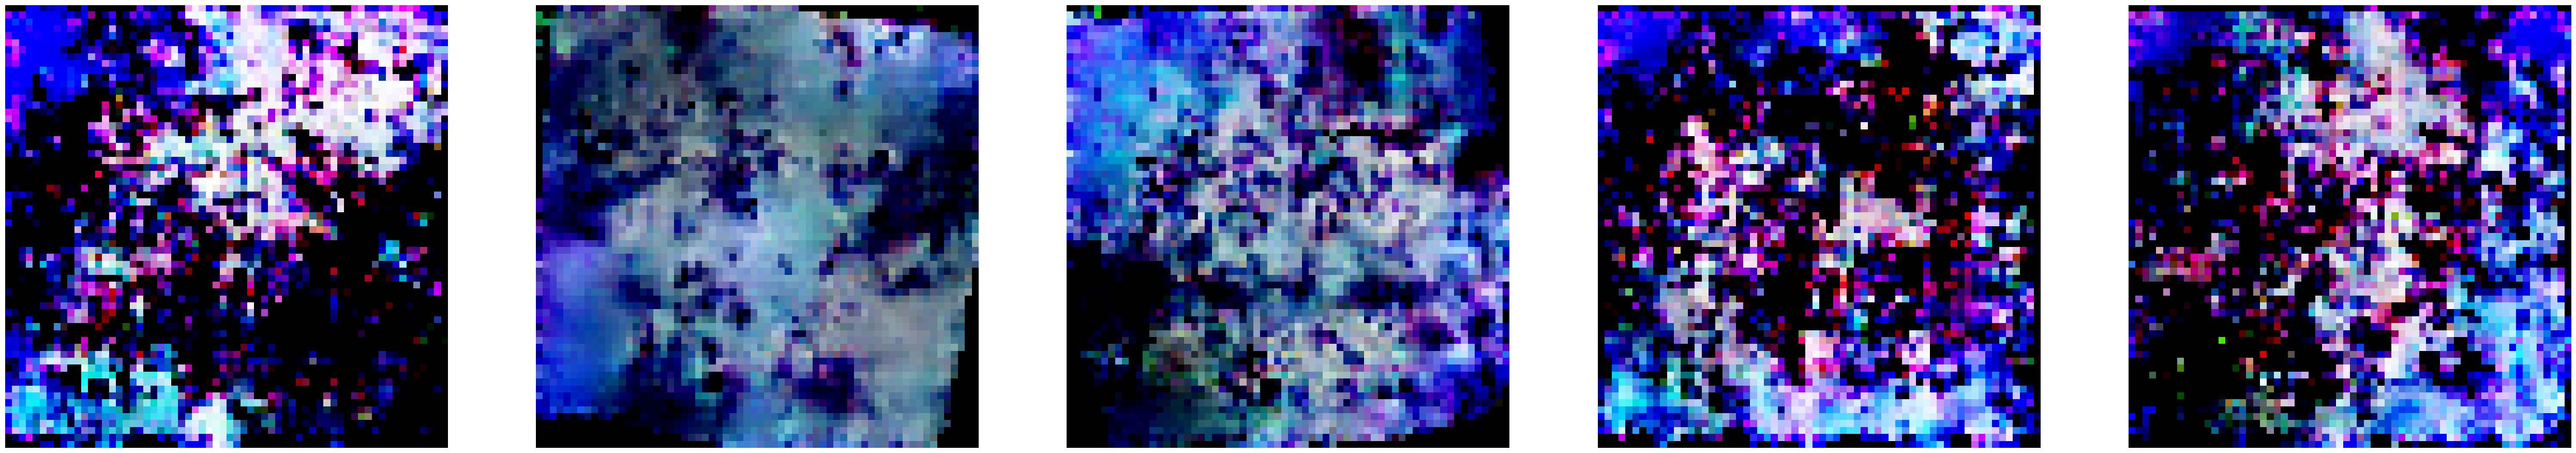

  0%|          | 0/41 [00:00<?, ?it/s]

[1002/2750][20/41] Loss_D: 0.4297 Loss_G: 3.8712 D(x): 0.8628 D(G(z)): 0.0603 / 0.0226
[1002/2750][40/41] Loss_D: 0.7141 Loss_G: 5.2677 D(x): 0.9866 D(G(z)): 0.1688 / 0.0051


  0%|          | 0/41 [00:00<?, ?it/s]

[1003/2750][20/41] Loss_D: 0.8653 Loss_G: 3.9155 D(x): 0.9591 D(G(z)): 0.3234 / 0.0231
[1003/2750][40/41] Loss_D: 0.6986 Loss_G: 2.3692 D(x): 0.6910 D(G(z)): 0.1222 / 0.1159


  0%|          | 0/41 [00:00<?, ?it/s]

[1004/2750][20/41] Loss_D: 0.4120 Loss_G: 4.2542 D(x): 0.8780 D(G(z)): 0.0273 / 0.0118
[1004/2750][40/41] Loss_D: 0.8131 Loss_G: 3.3039 D(x): 0.9644 D(G(z)): 0.2626 / 0.0371


  0%|          | 0/41 [00:00<?, ?it/s]

[1005/2750][20/41] Loss_D: 0.3692 Loss_G: 5.3218 D(x): 0.9169 D(G(z)): 0.0062 / 0.0050
[1005/2750][40/41] Loss_D: 0.6298 Loss_G: 4.0572 D(x): 0.9757 D(G(z)): 0.1512 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[1006/2750][20/41] Loss_D: 0.5788 Loss_G: 3.3648 D(x): 0.9352 D(G(z)): 0.1458 / 0.0328
[1006/2750][40/41] Loss_D: 0.6907 Loss_G: 2.3584 D(x): 0.6178 D(G(z)): 0.0398 / 0.0965


  0%|          | 0/41 [00:00<?, ?it/s]

[1007/2750][20/41] Loss_D: 0.4813 Loss_G: 2.9270 D(x): 0.8908 D(G(z)): 0.0980 / 0.0698
[1007/2750][40/41] Loss_D: 0.6368 Loss_G: 3.0299 D(x): 0.7653 D(G(z)): 0.1212 / 0.0542


  0%|          | 0/41 [00:00<?, ?it/s]

[1008/2750][20/41] Loss_D: 0.4087 Loss_G: 4.6018 D(x): 0.9117 D(G(z)): 0.0140 / 0.0098
[1008/2750][40/41] Loss_D: 0.4086 Loss_G: 4.4003 D(x): 0.8294 D(G(z)): 0.0186 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[1009/2750][20/41] Loss_D: 1.5418 Loss_G: 2.9415 D(x): 0.2623 D(G(z)): 0.0032 / 0.0904
[1009/2750][40/41] Loss_D: 0.4457 Loss_G: 3.6956 D(x): 0.8428 D(G(z)): 0.0689 / 0.0302


  0%|          | 0/41 [00:00<?, ?it/s]

[1010/2750][20/41] Loss_D: 0.5393 Loss_G: 3.4666 D(x): 0.9188 D(G(z)): 0.1296 / 0.0273
[1010/2750][40/41] Loss_D: 0.5990 Loss_G: 2.4686 D(x): 0.6875 D(G(z)): 0.0412 / 0.0835


  0%|          | 0/41 [00:00<?, ?it/s]

[1011/2750][20/41] Loss_D: 0.4112 Loss_G: 4.5912 D(x): 0.8112 D(G(z)): 0.0165 / 0.0117
[1011/2750][40/41] Loss_D: 0.5318 Loss_G: 3.5656 D(x): 0.8283 D(G(z)): 0.1217 / 0.0319


  0%|          | 0/41 [00:00<?, ?it/s]

[1012/2750][20/41] Loss_D: 0.7202 Loss_G: 3.7538 D(x): 0.5980 D(G(z)): 0.0529 / 0.0296
[1012/2750][40/41] Loss_D: 0.4367 Loss_G: 4.5439 D(x): 0.7922 D(G(z)): 0.0148 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[1013/2750][20/41] Loss_D: 0.4581 Loss_G: 4.1612 D(x): 0.9380 D(G(z)): 0.0396 / 0.0176
[1013/2750][40/41] Loss_D: 0.3850 Loss_G: 4.7090 D(x): 0.9312 D(G(z)): 0.0204 / 0.0100


  0%|          | 0/41 [00:00<?, ?it/s]

[1014/2750][20/41] Loss_D: 0.6722 Loss_G: 3.4296 D(x): 0.6591 D(G(z)): 0.0569 / 0.0411
[1014/2750][40/41] Loss_D: 0.3759 Loss_G: 4.7448 D(x): 0.8749 D(G(z)): 0.0175 / 0.0112


  0%|          | 0/41 [00:00<?, ?it/s]

[1015/2750][20/41] Loss_D: 0.4202 Loss_G: 4.2667 D(x): 0.8534 D(G(z)): 0.0220 / 0.0149
[1015/2750][40/41] Loss_D: 0.8621 Loss_G: 1.7771 D(x): 0.5216 D(G(z)): 0.0480 / 0.1750


  0%|          | 0/41 [00:00<?, ?it/s]

[1016/2750][20/41] Loss_D: 0.6139 Loss_G: 3.4754 D(x): 0.6927 D(G(z)): 0.0326 / 0.0405
[1016/2750][40/41] Loss_D: 0.5841 Loss_G: 4.6832 D(x): 0.8726 D(G(z)): 0.1021 / 0.0133


  0%|          | 0/41 [00:00<?, ?it/s]

[1017/2750][20/41] Loss_D: 0.7651 Loss_G: 3.0634 D(x): 0.6028 D(G(z)): 0.0128 / 0.0521
[1017/2750][40/41] Loss_D: 0.4427 Loss_G: 3.5490 D(x): 0.8199 D(G(z)): 0.0384 / 0.0281


  0%|          | 0/41 [00:00<?, ?it/s]

[1018/2750][20/41] Loss_D: 0.4153 Loss_G: 4.6576 D(x): 0.7959 D(G(z)): 0.0184 / 0.0122
[1018/2750][40/41] Loss_D: 0.4075 Loss_G: 5.6068 D(x): 0.9578 D(G(z)): 0.0160 / 0.0063


  0%|          | 0/41 [00:00<?, ?it/s]

[1019/2750][20/41] Loss_D: 0.4699 Loss_G: 5.6062 D(x): 0.9198 D(G(z)): 0.0669 / 0.0059
[1019/2750][40/41] Loss_D: 0.4007 Loss_G: 4.9120 D(x): 0.8181 D(G(z)): 0.0133 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[1020/2750][20/41] Loss_D: 0.4831 Loss_G: 3.3017 D(x): 0.9520 D(G(z)): 0.0756 / 0.0364
[1020/2750][40/41] Loss_D: 0.5142 Loss_G: 3.8841 D(x): 0.8374 D(G(z)): 0.1051 / 0.0548


  0%|          | 0/41 [00:00<?, ?it/s]

[1021/2750][20/41] Loss_D: 0.8717 Loss_G: 2.0298 D(x): 0.5660 D(G(z)): 0.1225 / 0.1393
[1021/2750][40/41] Loss_D: 0.5321 Loss_G: 3.6142 D(x): 0.9067 D(G(z)): 0.0954 / 0.0273


  0%|          | 0/41 [00:00<?, ?it/s]

[1022/2750][20/41] Loss_D: 0.4518 Loss_G: 3.2829 D(x): 0.9457 D(G(z)): 0.0759 / 0.0349
[1022/2750][40/41] Loss_D: 0.8039 Loss_G: 3.1900 D(x): 0.5508 D(G(z)): 0.0608 / 0.0536


  0%|          | 0/41 [00:00<?, ?it/s]

[1023/2750][20/41] Loss_D: 0.4154 Loss_G: 3.9165 D(x): 0.8095 D(G(z)): 0.0273 / 0.0225
[1023/2750][40/41] Loss_D: 1.0780 Loss_G: 2.6847 D(x): 0.5841 D(G(z)): 0.1106 / 0.0926


  0%|          | 0/41 [00:00<?, ?it/s]

[1024/2750][20/41] Loss_D: 0.4478 Loss_G: 4.0853 D(x): 0.8765 D(G(z)): 0.0586 / 0.0186
[1024/2750][40/41] Loss_D: 0.4667 Loss_G: 4.0705 D(x): 0.8543 D(G(z)): 0.0475 / 0.0175


  0%|          | 0/41 [00:00<?, ?it/s]

[1025/2750][20/41] Loss_D: 0.4787 Loss_G: 4.5710 D(x): 0.8899 D(G(z)): 0.1078 / 0.0158
[1025/2750][40/41] Loss_D: 0.5519 Loss_G: 3.5566 D(x): 0.7605 D(G(z)): 0.0645 / 0.0395


  0%|          | 0/41 [00:00<?, ?it/s]

[1026/2750][20/41] Loss_D: 0.5615 Loss_G: 3.9229 D(x): 0.9419 D(G(z)): 0.1502 / 0.0195
[1026/2750][40/41] Loss_D: 0.4808 Loss_G: 3.5080 D(x): 0.9521 D(G(z)): 0.0627 / 0.0369


  0%|          | 0/41 [00:00<?, ?it/s]

[1027/2750][20/41] Loss_D: 0.6676 Loss_G: 3.1634 D(x): 0.9319 D(G(z)): 0.2130 / 0.0618
[1027/2750][40/41] Loss_D: 0.5915 Loss_G: 3.6169 D(x): 0.9553 D(G(z)): 0.1509 / 0.0255


  0%|          | 0/41 [00:00<?, ?it/s]

[1028/2750][20/41] Loss_D: 0.4400 Loss_G: 3.3423 D(x): 0.8921 D(G(z)): 0.0604 / 0.0374
[1028/2750][40/41] Loss_D: 0.6876 Loss_G: 2.9213 D(x): 0.6973 D(G(z)): 0.1619 / 0.0609


  0%|          | 0/41 [00:00<?, ?it/s]

[1029/2750][20/41] Loss_D: 0.4952 Loss_G: 3.1608 D(x): 0.8018 D(G(z)): 0.0455 / 0.0439
[1029/2750][40/41] Loss_D: 0.4986 Loss_G: 4.1432 D(x): 0.8087 D(G(z)): 0.0569 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[1030/2750][20/41] Loss_D: 0.4421 Loss_G: 3.9568 D(x): 0.9178 D(G(z)): 0.0723 / 0.0245
[1030/2750][40/41] Loss_D: 0.3938 Loss_G: 3.9656 D(x): 0.8784 D(G(z)): 0.0362 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[1031/2750][20/41] Loss_D: 0.7318 Loss_G: 3.1386 D(x): 0.5835 D(G(z)): 0.0274 / 0.0643
[1031/2750][40/41] Loss_D: 0.7171 Loss_G: 2.4291 D(x): 0.6256 D(G(z)): 0.0790 / 0.0951


  0%|          | 0/41 [00:00<?, ?it/s]

[1032/2750][20/41] Loss_D: 0.5029 Loss_G: 2.4040 D(x): 0.7955 D(G(z)): 0.0699 / 0.0875
[1032/2750][40/41] Loss_D: 0.8168 Loss_G: 2.2864 D(x): 0.5276 D(G(z)): 0.0584 / 0.1080


  0%|          | 0/41 [00:00<?, ?it/s]

[1033/2750][20/41] Loss_D: 0.6125 Loss_G: 4.2958 D(x): 0.6529 D(G(z)): 0.0095 / 0.0168
[1033/2750][40/41] Loss_D: 0.3644 Loss_G: 8.7393 D(x): 0.8605 D(G(z)): 0.0002 / 0.0002


  0%|          | 0/41 [00:00<?, ?it/s]

[1034/2750][20/41] Loss_D: 0.5980 Loss_G: 4.1379 D(x): 0.7706 D(G(z)): 0.0266 / 0.0209
[1034/2750][40/41] Loss_D: 0.5345 Loss_G: 2.8574 D(x): 0.9690 D(G(z)): 0.0964 / 0.0698


  0%|          | 0/41 [00:00<?, ?it/s]

[1035/2750][20/41] Loss_D: 0.9189 Loss_G: 2.7510 D(x): 0.5158 D(G(z)): 0.0192 / 0.0688
[1035/2750][40/41] Loss_D: 0.3932 Loss_G: 4.4920 D(x): 0.8780 D(G(z)): 0.0268 / 0.0120


  0%|          | 0/41 [00:00<?, ?it/s]

[1036/2750][20/41] Loss_D: 0.4853 Loss_G: 3.6195 D(x): 0.9287 D(G(z)): 0.1062 / 0.0284
[1036/2750][40/41] Loss_D: 0.5550 Loss_G: 4.2882 D(x): 0.7181 D(G(z)): 0.0306 / 0.0309


  0%|          | 0/41 [00:00<?, ?it/s]

[1037/2750][20/41] Loss_D: 0.5081 Loss_G: 3.6575 D(x): 0.7206 D(G(z)): 0.0206 / 0.0319
[1037/2750][40/41] Loss_D: 1.6117 Loss_G: 1.8706 D(x): 0.2752 D(G(z)): 0.0160 / 0.1899


  0%|          | 0/41 [00:00<?, ?it/s]

[1038/2750][20/41] Loss_D: 0.4014 Loss_G: 4.0155 D(x): 0.8492 D(G(z)): 0.0274 / 0.0205
[1038/2750][40/41] Loss_D: 0.5681 Loss_G: 2.6669 D(x): 0.9075 D(G(z)): 0.1148 / 0.0742


  0%|          | 0/41 [00:00<?, ?it/s]

[1039/2750][20/41] Loss_D: 0.4125 Loss_G: 3.8750 D(x): 0.9510 D(G(z)): 0.0317 / 0.0216
[1039/2750][40/41] Loss_D: 0.3793 Loss_G: 4.6926 D(x): 0.8516 D(G(z)): 0.0097 / 0.0094


  0%|          | 0/41 [00:00<?, ?it/s]

[1040/2750][20/41] Loss_D: 0.4580 Loss_G: 3.9775 D(x): 0.7398 D(G(z)): 0.0102 / 0.0208
[1040/2750][40/41] Loss_D: 0.3923 Loss_G: 4.1824 D(x): 0.9001 D(G(z)): 0.0266 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[1041/2750][20/41] Loss_D: 0.4996 Loss_G: 3.5906 D(x): 0.7482 D(G(z)): 0.0376 / 0.0281
[1041/2750][40/41] Loss_D: 0.7589 Loss_G: 3.1421 D(x): 0.5695 D(G(z)): 0.0294 / 0.0534


  0%|          | 0/41 [00:00<?, ?it/s]

[1042/2750][20/41] Loss_D: 0.3793 Loss_G: 4.5666 D(x): 0.8943 D(G(z)): 0.0133 / 0.0102
[1042/2750][40/41] Loss_D: 0.8353 Loss_G: 3.3289 D(x): 0.9765 D(G(z)): 0.2836 / 0.0393


  0%|          | 0/41 [00:00<?, ?it/s]

[1043/2750][20/41] Loss_D: 1.3503 Loss_G: 2.4830 D(x): 0.3787 D(G(z)): 0.0415 / 0.0961
[1043/2750][40/41] Loss_D: 0.3624 Loss_G: 4.6340 D(x): 0.8804 D(G(z)): 0.0135 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[1044/2750][20/41] Loss_D: 0.3628 Loss_G: 5.5615 D(x): 0.8692 D(G(z)): 0.0051 / 0.0038
[1044/2750][40/41] Loss_D: 0.6235 Loss_G: 3.7651 D(x): 0.9547 D(G(z)): 0.1684 / 0.0225


  0%|          | 0/41 [00:00<?, ?it/s]

[1045/2750][20/41] Loss_D: 0.4017 Loss_G: 3.8899 D(x): 0.8782 D(G(z)): 0.0488 / 0.0209
[1045/2750][40/41] Loss_D: 0.3830 Loss_G: 4.3358 D(x): 0.8948 D(G(z)): 0.0254 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[1046/2750][20/41] Loss_D: 0.7074 Loss_G: 2.6950 D(x): 0.5858 D(G(z)): 0.0350 / 0.0697
[1046/2750][40/41] Loss_D: 0.4609 Loss_G: 3.9810 D(x): 0.8780 D(G(z)): 0.0832 / 0.0280


  0%|          | 0/41 [00:00<?, ?it/s]

[1047/2750][20/41] Loss_D: 0.3984 Loss_G: 4.4917 D(x): 0.8237 D(G(z)): 0.0165 / 0.0114
[1047/2750][40/41] Loss_D: 0.4160 Loss_G: 4.8179 D(x): 0.9067 D(G(z)): 0.0303 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[1048/2750][20/41] Loss_D: 0.7688 Loss_G: 2.9243 D(x): 0.5958 D(G(z)): 0.0459 / 0.0647
[1048/2750][40/41] Loss_D: 0.4290 Loss_G: 3.8794 D(x): 0.8071 D(G(z)): 0.0330 / 0.0211


  0%|          | 0/41 [00:00<?, ?it/s]

[1049/2750][20/41] Loss_D: 0.4950 Loss_G: 4.8667 D(x): 0.8918 D(G(z)): 0.0635 / 0.0082
[1049/2750][40/41] Loss_D: 0.3944 Loss_G: 4.3512 D(x): 0.8800 D(G(z)): 0.0297 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[1050/2750][20/41] Loss_D: 0.4832 Loss_G: 3.9178 D(x): 0.8952 D(G(z)): 0.1031 / 0.0207
[1050/2750][40/41] Loss_D: 0.6663 Loss_G: 3.2352 D(x): 0.9356 D(G(z)): 0.2468 / 0.0502


  0%|          | 0/41 [00:00<?, ?it/s]

[1051/2750][20/41] Loss_D: 0.4574 Loss_G: 3.7650 D(x): 0.8955 D(G(z)): 0.0655 / 0.0241
[1051/2750][40/41] Loss_D: 0.5232 Loss_G: 3.0953 D(x): 0.9463 D(G(z)): 0.1386 / 0.0453


  0%|          | 0/41 [00:00<?, ?it/s]

[1052/2750][20/41] Loss_D: 0.4272 Loss_G: 4.6195 D(x): 0.9482 D(G(z)): 0.0318 / 0.0115
[1052/2750][40/41] Loss_D: 0.3788 Loss_G: 4.4410 D(x): 0.8754 D(G(z)): 0.0174 / 0.0127


  0%|          | 0/41 [00:00<?, ?it/s]

[1053/2750][20/41] Loss_D: 0.4049 Loss_G: 3.3572 D(x): 0.8165 D(G(z)): 0.0295 / 0.0378
[1053/2750][40/41] Loss_D: 0.7096 Loss_G: 3.4985 D(x): 0.9513 D(G(z)): 0.2493 / 0.0307


  0%|          | 0/41 [00:00<?, ?it/s]

[1054/2750][20/41] Loss_D: 0.4155 Loss_G: 3.1956 D(x): 0.9028 D(G(z)): 0.0480 / 0.0494
[1054/2750][40/41] Loss_D: 0.5150 Loss_G: 3.8003 D(x): 0.8991 D(G(z)): 0.1245 / 0.0259


  0%|          | 0/41 [00:00<?, ?it/s]

[1055/2750][20/41] Loss_D: 0.4365 Loss_G: 3.1722 D(x): 0.9449 D(G(z)): 0.0648 / 0.0486
[1055/2750][40/41] Loss_D: 0.6425 Loss_G: 3.3161 D(x): 0.7980 D(G(z)): 0.1532 / 0.0375


  0%|          | 0/41 [00:00<?, ?it/s]

[1056/2750][20/41] Loss_D: 0.4291 Loss_G: 3.7867 D(x): 0.9338 D(G(z)): 0.0605 / 0.0246
[1056/2750][40/41] Loss_D: 0.3896 Loss_G: 4.0511 D(x): 0.9139 D(G(z)): 0.0361 / 0.0164


  0%|          | 0/41 [00:00<?, ?it/s]

[1057/2750][20/41] Loss_D: 0.4129 Loss_G: 4.3241 D(x): 0.8612 D(G(z)): 0.0211 / 0.0150
[1057/2750][40/41] Loss_D: 0.6956 Loss_G: 3.6543 D(x): 0.9594 D(G(z)): 0.2236 / 0.0353


  0%|          | 0/41 [00:00<?, ?it/s]

[1058/2750][20/41] Loss_D: 0.8985 Loss_G: 2.5863 D(x): 0.5650 D(G(z)): 0.0610 / 0.0848
[1058/2750][40/41] Loss_D: 0.6888 Loss_G: 4.1660 D(x): 0.9120 D(G(z)): 0.2663 / 0.0296


  0%|          | 0/41 [00:00<?, ?it/s]

[1059/2750][20/41] Loss_D: 0.6299 Loss_G: 3.8766 D(x): 0.8912 D(G(z)): 0.2145 / 0.0183
[1059/2750][40/41] Loss_D: 0.5150 Loss_G: 3.7358 D(x): 0.9439 D(G(z)): 0.1230 / 0.0300


  0%|          | 0/41 [00:00<?, ?it/s]

[1060/2750][20/41] Loss_D: 0.3903 Loss_G: 4.6676 D(x): 0.8535 D(G(z)): 0.0123 / 0.0111
[1060/2750][40/41] Loss_D: 0.4502 Loss_G: 3.4636 D(x): 0.9497 D(G(z)): 0.0759 / 0.0433


  0%|          | 0/41 [00:00<?, ?it/s]

[1061/2750][20/41] Loss_D: 0.3923 Loss_G: 6.0190 D(x): 0.8029 D(G(z)): 0.0051 / 0.0026
[1061/2750][40/41] Loss_D: 0.3695 Loss_G: 4.4729 D(x): 0.8598 D(G(z)): 0.0132 / 0.0107


  0%|          | 0/41 [00:00<?, ?it/s]

[1062/2750][20/41] Loss_D: 0.5065 Loss_G: 2.9586 D(x): 0.9298 D(G(z)): 0.1352 / 0.0518
[1062/2750][40/41] Loss_D: 0.4137 Loss_G: 4.1208 D(x): 0.9073 D(G(z)): 0.0485 / 0.0224


  0%|          | 0/41 [00:00<?, ?it/s]

[1063/2750][20/41] Loss_D: 0.4589 Loss_G: 3.3192 D(x): 0.9031 D(G(z)): 0.0766 / 0.0347
[1063/2750][40/41] Loss_D: 0.4847 Loss_G: 2.9278 D(x): 0.9450 D(G(z)): 0.1111 / 0.0573


  0%|          | 0/41 [00:00<?, ?it/s]

[1064/2750][20/41] Loss_D: 0.5779 Loss_G: 3.8335 D(x): 0.9434 D(G(z)): 0.1588 / 0.0202
[1064/2750][40/41] Loss_D: 0.6144 Loss_G: 3.4451 D(x): 0.6803 D(G(z)): 0.0164 / 0.0399


  0%|          | 0/41 [00:00<?, ?it/s]

[1065/2750][20/41] Loss_D: 0.3847 Loss_G: 4.9579 D(x): 0.8727 D(G(z)): 0.0125 / 0.0094
[1065/2750][40/41] Loss_D: 0.4013 Loss_G: 4.6027 D(x): 0.8241 D(G(z)): 0.0206 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[1066/2750][20/41] Loss_D: 0.4612 Loss_G: 3.9427 D(x): 0.8255 D(G(z)): 0.0303 / 0.0206
[1066/2750][40/41] Loss_D: 0.4428 Loss_G: 3.9275 D(x): 0.9275 D(G(z)): 0.0738 / 0.0229


  0%|          | 0/41 [00:00<?, ?it/s]

[1067/2750][20/41] Loss_D: 0.4042 Loss_G: 4.6107 D(x): 0.7964 D(G(z)): 0.0123 / 0.0102
[1067/2750][40/41] Loss_D: 0.6898 Loss_G: 2.5698 D(x): 0.9826 D(G(z)): 0.1611 / 0.0845


  0%|          | 0/41 [00:00<?, ?it/s]

[1068/2750][20/41] Loss_D: 0.3714 Loss_G: 4.4355 D(x): 0.8499 D(G(z)): 0.0209 / 0.0121
[1068/2750][40/41] Loss_D: 0.3623 Loss_G: 4.4106 D(x): 0.9234 D(G(z)): 0.0177 / 0.0119


  0%|          | 0/41 [00:00<?, ?it/s]

[1069/2750][20/41] Loss_D: 0.4877 Loss_G: 4.7320 D(x): 0.8313 D(G(z)): 0.0474 / 0.0117
[1069/2750][40/41] Loss_D: 0.4161 Loss_G: 4.4812 D(x): 0.8979 D(G(z)): 0.0304 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[1070/2750][20/41] Loss_D: 0.6197 Loss_G: 4.2266 D(x): 0.9763 D(G(z)): 0.0921 / 0.0151
[1070/2750][40/41] Loss_D: 0.6375 Loss_G: 3.1234 D(x): 0.9710 D(G(z)): 0.1762 / 0.0417


  0%|          | 0/41 [00:00<?, ?it/s]

[1071/2750][20/41] Loss_D: 0.4659 Loss_G: 4.4010 D(x): 0.9555 D(G(z)): 0.0463 / 0.0161
[1071/2750][40/41] Loss_D: 0.4447 Loss_G: 3.5307 D(x): 0.8083 D(G(z)): 0.0399 / 0.0320


  0%|          | 0/41 [00:00<?, ?it/s]

[1072/2750][20/41] Loss_D: 0.4787 Loss_G: 2.8881 D(x): 0.8234 D(G(z)): 0.0899 / 0.0533
[1072/2750][40/41] Loss_D: 0.4444 Loss_G: 4.9843 D(x): 0.8841 D(G(z)): 0.0178 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[1073/2750][20/41] Loss_D: 0.6867 Loss_G: 3.6923 D(x): 0.6163 D(G(z)): 0.0080 / 0.0274
[1073/2750][40/41] Loss_D: 0.4046 Loss_G: 4.5718 D(x): 0.8734 D(G(z)): 0.0424 / 0.0116


  0%|          | 0/41 [00:00<?, ?it/s]

[1074/2750][20/41] Loss_D: 0.3913 Loss_G: 3.9892 D(x): 0.8801 D(G(z)): 0.0300 / 0.0195
[1074/2750][40/41] Loss_D: 0.4120 Loss_G: 5.1864 D(x): 0.9443 D(G(z)): 0.0246 / 0.0058


  0%|          | 0/41 [00:00<?, ?it/s]

[1075/2750][20/41] Loss_D: 0.7643 Loss_G: 3.5767 D(x): 0.5682 D(G(z)): 0.0218 / 0.0462
[1075/2750][40/41] Loss_D: 0.4522 Loss_G: 3.5512 D(x): 0.9172 D(G(z)): 0.0844 / 0.0254


  0%|          | 0/41 [00:00<?, ?it/s]

[1076/2750][20/41] Loss_D: 0.4019 Loss_G: 4.1653 D(x): 0.8678 D(G(z)): 0.0285 / 0.0152
[1076/2750][40/41] Loss_D: 0.7984 Loss_G: 2.9167 D(x): 0.6242 D(G(z)): 0.1269 / 0.0679


  0%|          | 0/41 [00:00<?, ?it/s]

[1077/2750][20/41] Loss_D: 0.3836 Loss_G: 5.7719 D(x): 0.9099 D(G(z)): 0.0119 / 0.0040
[1077/2750][40/41] Loss_D: 0.6450 Loss_G: 3.6632 D(x): 0.9781 D(G(z)): 0.1644 / 0.0247


  0%|          | 0/41 [00:00<?, ?it/s]

[1078/2750][20/41] Loss_D: 0.5582 Loss_G: 3.1233 D(x): 0.7503 D(G(z)): 0.1013 / 0.0515
[1078/2750][40/41] Loss_D: 0.7070 Loss_G: 3.4483 D(x): 0.6292 D(G(z)): 0.0371 / 0.0606


  0%|          | 0/41 [00:00<?, ?it/s]

[1079/2750][20/41] Loss_D: 1.1754 Loss_G: 2.5405 D(x): 0.4271 D(G(z)): 0.0250 / 0.0937
[1079/2750][40/41] Loss_D: 0.5335 Loss_G: 3.5821 D(x): 0.9188 D(G(z)): 0.1273 / 0.0318


  0%|          | 0/41 [00:00<?, ?it/s]

[1080/2750][20/41] Loss_D: 0.4398 Loss_G: 3.6395 D(x): 0.8709 D(G(z)): 0.0517 / 0.0271
[1080/2750][40/41] Loss_D: 0.8926 Loss_G: 3.0422 D(x): 0.9686 D(G(z)): 0.3173 / 0.0759


  0%|          | 0/41 [00:00<?, ?it/s]

[1081/2750][20/41] Loss_D: 0.3839 Loss_G: 4.1795 D(x): 0.9381 D(G(z)): 0.0239 / 0.0178
[1081/2750][40/41] Loss_D: 0.6046 Loss_G: 2.6925 D(x): 0.7160 D(G(z)): 0.0560 / 0.0710


  0%|          | 0/41 [00:00<?, ?it/s]

[1082/2750][20/41] Loss_D: 0.7331 Loss_G: 2.9060 D(x): 0.6613 D(G(z)): 0.1114 / 0.0603
[1082/2750][40/41] Loss_D: 0.4812 Loss_G: 3.5958 D(x): 0.8445 D(G(z)): 0.0423 / 0.0342


  0%|          | 0/41 [00:00<?, ?it/s]

[1083/2750][20/41] Loss_D: 0.3689 Loss_G: 4.3129 D(x): 0.8843 D(G(z)): 0.0216 / 0.0134
[1083/2750][40/41] Loss_D: 0.3684 Loss_G: 4.8507 D(x): 0.8696 D(G(z)): 0.0194 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[1084/2750][20/41] Loss_D: 0.3630 Loss_G: 4.9344 D(x): 0.9072 D(G(z)): 0.0142 / 0.0098
[1084/2750][40/41] Loss_D: 0.3640 Loss_G: 5.3518 D(x): 0.8615 D(G(z)): 0.0088 / 0.0050


  0%|          | 0/41 [00:00<?, ?it/s]

[1085/2750][20/41] Loss_D: 0.3929 Loss_G: 5.0743 D(x): 0.8611 D(G(z)): 0.0311 / 0.0072
[1085/2750][40/41] Loss_D: 0.4800 Loss_G: 5.1088 D(x): 0.7435 D(G(z)): 0.0275 / 0.0060


  0%|          | 0/41 [00:00<?, ?it/s]

[1086/2750][20/41] Loss_D: 1.4941 Loss_G: 1.8605 D(x): 0.2906 D(G(z)): 0.0249 / 0.1911
[1086/2750][40/41] Loss_D: 0.4469 Loss_G: 3.8906 D(x): 0.9216 D(G(z)): 0.0657 / 0.0241


  0%|          | 0/41 [00:00<?, ?it/s]

[1087/2750][20/41] Loss_D: 0.5511 Loss_G: 3.1543 D(x): 0.7842 D(G(z)): 0.0795 / 0.0515
[1087/2750][40/41] Loss_D: 0.3892 Loss_G: 4.7748 D(x): 0.8492 D(G(z)): 0.0224 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[1088/2750][20/41] Loss_D: 0.3665 Loss_G: 4.8704 D(x): 0.8751 D(G(z)): 0.0178 / 0.0120
[1088/2750][40/41] Loss_D: 0.4049 Loss_G: 3.7929 D(x): 0.8926 D(G(z)): 0.0534 / 0.0272


  0%|          | 0/41 [00:00<?, ?it/s]

[1089/2750][20/41] Loss_D: 0.4969 Loss_G: 3.0594 D(x): 0.8719 D(G(z)): 0.1348 / 0.0498
[1089/2750][40/41] Loss_D: 1.5676 Loss_G: 2.0145 D(x): 0.2913 D(G(z)): 0.0609 / 0.2437


  0%|          | 0/41 [00:00<?, ?it/s]

[1090/2750][20/41] Loss_D: 0.4234 Loss_G: 3.7737 D(x): 0.9235 D(G(z)): 0.0694 / 0.0233
[1090/2750][40/41] Loss_D: 0.5380 Loss_G: 3.0489 D(x): 0.9200 D(G(z)): 0.1364 / 0.0506


  0%|          | 0/41 [00:00<?, ?it/s]

[1091/2750][20/41] Loss_D: 0.3941 Loss_G: 4.3490 D(x): 0.9295 D(G(z)): 0.0293 / 0.0149
[1091/2750][40/41] Loss_D: 0.3918 Loss_G: 3.9616 D(x): 0.9000 D(G(z)): 0.0504 / 0.0228


  0%|          | 0/41 [00:00<?, ?it/s]

[1092/2750][20/41] Loss_D: 0.6101 Loss_G: 3.0248 D(x): 0.6793 D(G(z)): 0.0495 / 0.0841
[1092/2750][40/41] Loss_D: 0.4879 Loss_G: 3.9623 D(x): 0.8112 D(G(z)): 0.0439 / 0.0227


  0%|          | 0/41 [00:00<?, ?it/s]

[1093/2750][20/41] Loss_D: 0.8018 Loss_G: 2.1156 D(x): 0.5515 D(G(z)): 0.0544 / 0.1335
[1093/2750][40/41] Loss_D: 0.5899 Loss_G: 4.4668 D(x): 0.7381 D(G(z)): 0.0226 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[1094/2750][20/41] Loss_D: 0.9922 Loss_G: 3.4926 D(x): 0.9685 D(G(z)): 0.3895 / 0.0273
[1094/2750][40/41] Loss_D: 0.7867 Loss_G: 3.4611 D(x): 0.6048 D(G(z)): 0.0168 / 0.0398


  0%|          | 0/41 [00:00<?, ?it/s]

[1095/2750][20/41] Loss_D: 0.6077 Loss_G: 4.3023 D(x): 0.9299 D(G(z)): 0.1980 / 0.0113
[1095/2750][40/41] Loss_D: 0.4320 Loss_G: 3.8183 D(x): 0.8596 D(G(z)): 0.0510 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[1096/2750][20/41] Loss_D: 0.6780 Loss_G: 2.7818 D(x): 0.6520 D(G(z)): 0.0644 / 0.0725
[1096/2750][40/41] Loss_D: 0.3770 Loss_G: 5.4419 D(x): 0.8533 D(G(z)): 0.0091 / 0.0063


  0%|          | 0/41 [00:00<?, ?it/s]

[1097/2750][20/41] Loss_D: 0.3817 Loss_G: 4.5429 D(x): 0.9018 D(G(z)): 0.0193 / 0.0133
[1097/2750][40/41] Loss_D: 0.7280 Loss_G: 2.7090 D(x): 0.9584 D(G(z)): 0.2497 / 0.0800


  0%|          | 0/41 [00:00<?, ?it/s]

[1098/2750][20/41] Loss_D: 0.3761 Loss_G: 4.1411 D(x): 0.8646 D(G(z)): 0.0268 / 0.0146
[1098/2750][40/41] Loss_D: 0.3659 Loss_G: 4.3080 D(x): 0.8637 D(G(z)): 0.0198 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[1099/2750][20/41] Loss_D: 0.3730 Loss_G: 5.1421 D(x): 0.8509 D(G(z)): 0.0089 / 0.0080
[1099/2750][40/41] Loss_D: 0.4114 Loss_G: 4.1855 D(x): 0.8780 D(G(z)): 0.0412 / 0.0197


  0%|          | 0/41 [00:00<?, ?it/s]

[1100/2750][20/41] Loss_D: 0.5676 Loss_G: 2.4772 D(x): 0.9410 D(G(z)): 0.1508 / 0.0862
[1100/2750][40/41] Loss_D: 0.3812 Loss_G: 4.1006 D(x): 0.8744 D(G(z)): 0.0193 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[1101/2750][20/41] Loss_D: 0.4457 Loss_G: 3.2932 D(x): 0.9273 D(G(z)): 0.0889 / 0.0360
[1101/2750][40/41] Loss_D: 0.4226 Loss_G: 4.6683 D(x): 0.7867 D(G(z)): 0.0246 / 0.0127


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99997395].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.98412085].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999577].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9561252].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.95940685].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1101.pth


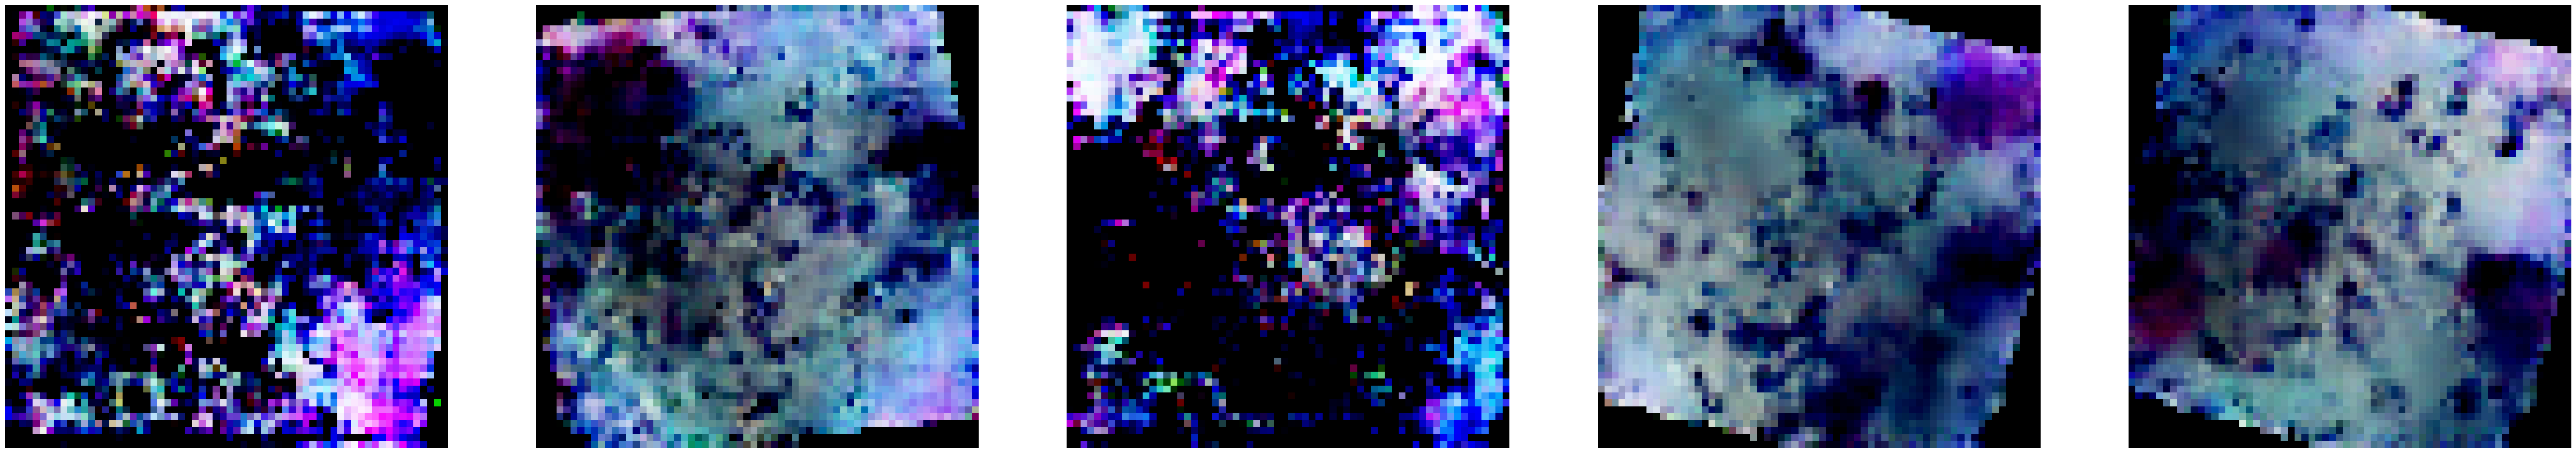

  0%|          | 0/41 [00:00<?, ?it/s]

[1102/2750][20/41] Loss_D: 0.5848 Loss_G: 3.4750 D(x): 0.8893 D(G(z)): 0.1748 / 0.0307
[1102/2750][40/41] Loss_D: 0.6280 Loss_G: 3.1763 D(x): 0.7721 D(G(z)): 0.1146 / 0.0427


  0%|          | 0/41 [00:00<?, ?it/s]

[1103/2750][20/41] Loss_D: 0.5979 Loss_G: 3.4430 D(x): 0.6804 D(G(z)): 0.0105 / 0.0351
[1103/2750][40/41] Loss_D: 0.5933 Loss_G: 3.2137 D(x): 0.6830 D(G(z)): 0.0323 / 0.0495


  0%|          | 0/41 [00:00<?, ?it/s]

[1104/2750][20/41] Loss_D: 0.4118 Loss_G: 3.6834 D(x): 0.8752 D(G(z)): 0.0565 / 0.0281
[1104/2750][40/41] Loss_D: 0.5094 Loss_G: 3.1518 D(x): 0.9533 D(G(z)): 0.1265 / 0.0464


  0%|          | 0/41 [00:00<?, ?it/s]

[1105/2750][20/41] Loss_D: 0.5469 Loss_G: 4.4877 D(x): 0.9264 D(G(z)): 0.1227 / 0.0164
[1105/2750][40/41] Loss_D: 0.7893 Loss_G: 2.2831 D(x): 0.6207 D(G(z)): 0.0715 / 0.1358


  0%|          | 0/41 [00:00<?, ?it/s]

[1106/2750][20/41] Loss_D: 0.4048 Loss_G: 4.5498 D(x): 0.9323 D(G(z)): 0.0323 / 0.0117
[1106/2750][40/41] Loss_D: 0.3636 Loss_G: 4.3163 D(x): 0.9019 D(G(z)): 0.0218 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[1107/2750][20/41] Loss_D: 0.4396 Loss_G: 3.9295 D(x): 0.9069 D(G(z)): 0.0840 / 0.0191
[1107/2750][40/41] Loss_D: 0.4608 Loss_G: 4.2206 D(x): 0.8726 D(G(z)): 0.0766 / 0.0154


  0%|          | 0/41 [00:00<?, ?it/s]

[1108/2750][20/41] Loss_D: 0.4739 Loss_G: 3.8215 D(x): 0.9231 D(G(z)): 0.1145 / 0.0223
[1108/2750][40/41] Loss_D: 1.3577 Loss_G: 1.9336 D(x): 0.3201 D(G(z)): 0.0335 / 0.1728


  0%|          | 0/41 [00:00<?, ?it/s]

[1109/2750][20/41] Loss_D: 0.4802 Loss_G: 3.6909 D(x): 0.9285 D(G(z)): 0.1045 / 0.0268
[1109/2750][40/41] Loss_D: 0.5990 Loss_G: 3.6428 D(x): 0.6715 D(G(z)): 0.0210 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[1110/2750][20/41] Loss_D: 0.5654 Loss_G: 3.8852 D(x): 0.9690 D(G(z)): 0.1216 / 0.0282
[1110/2750][40/41] Loss_D: 0.8091 Loss_G: 2.5131 D(x): 0.5761 D(G(z)): 0.0588 / 0.0877


  0%|          | 0/41 [00:00<?, ?it/s]

[1111/2750][20/41] Loss_D: 0.5308 Loss_G: 4.1050 D(x): 0.8216 D(G(z)): 0.0513 / 0.0185
[1111/2750][40/41] Loss_D: 0.7466 Loss_G: 4.2317 D(x): 0.9618 D(G(z)): 0.2415 / 0.0165


  0%|          | 0/41 [00:00<?, ?it/s]

[1112/2750][20/41] Loss_D: 0.4444 Loss_G: 3.8027 D(x): 0.8420 D(G(z)): 0.0282 / 0.0256
[1112/2750][40/41] Loss_D: 0.3909 Loss_G: 4.9503 D(x): 0.9083 D(G(z)): 0.0296 / 0.0081


  0%|          | 0/41 [00:00<?, ?it/s]

[1113/2750][20/41] Loss_D: 0.4936 Loss_G: 3.6449 D(x): 0.9060 D(G(z)): 0.1171 / 0.0289
[1113/2750][40/41] Loss_D: 0.3828 Loss_G: 4.2064 D(x): 0.8726 D(G(z)): 0.0392 / 0.0144


  0%|          | 0/41 [00:00<?, ?it/s]

[1114/2750][20/41] Loss_D: 0.3678 Loss_G: 4.5047 D(x): 0.8993 D(G(z)): 0.0255 / 0.0126
[1114/2750][40/41] Loss_D: 0.4372 Loss_G: 4.6243 D(x): 0.8827 D(G(z)): 0.0392 / 0.0135


  0%|          | 0/41 [00:00<?, ?it/s]

[1115/2750][20/41] Loss_D: 0.3761 Loss_G: 5.6046 D(x): 0.8228 D(G(z)): 0.0076 / 0.0040
[1115/2750][40/41] Loss_D: 0.4066 Loss_G: 4.1726 D(x): 0.8844 D(G(z)): 0.0530 / 0.0217


  0%|          | 0/41 [00:00<?, ?it/s]

[1116/2750][20/41] Loss_D: 0.4341 Loss_G: 3.6446 D(x): 0.9562 D(G(z)): 0.0550 / 0.0293
[1116/2750][40/41] Loss_D: 0.4085 Loss_G: 4.0193 D(x): 0.9141 D(G(z)): 0.0606 / 0.0225


  0%|          | 0/41 [00:00<?, ?it/s]

[1117/2750][20/41] Loss_D: 0.6686 Loss_G: 2.7380 D(x): 0.9456 D(G(z)): 0.2269 / 0.0630
[1117/2750][40/41] Loss_D: 0.6545 Loss_G: 3.6824 D(x): 0.9696 D(G(z)): 0.2018 / 0.0290


  0%|          | 0/41 [00:00<?, ?it/s]

[1118/2750][20/41] Loss_D: 0.3659 Loss_G: 4.9990 D(x): 0.8837 D(G(z)): 0.0107 / 0.0064
[1118/2750][40/41] Loss_D: 0.4068 Loss_G: 5.0996 D(x): 0.8628 D(G(z)): 0.0375 / 0.0107


  0%|          | 0/41 [00:00<?, ?it/s]

[1119/2750][20/41] Loss_D: 0.7353 Loss_G: 3.6478 D(x): 0.9151 D(G(z)): 0.2772 / 0.0254
[1119/2750][40/41] Loss_D: 0.3651 Loss_G: 4.5314 D(x): 0.8714 D(G(z)): 0.0162 / 0.0102


  0%|          | 0/41 [00:00<?, ?it/s]

[1120/2750][20/41] Loss_D: 0.7039 Loss_G: 2.5560 D(x): 0.9627 D(G(z)): 0.1997 / 0.0804
[1120/2750][40/41] Loss_D: 0.3906 Loss_G: 4.1950 D(x): 0.9271 D(G(z)): 0.0376 / 0.0157


  0%|          | 0/41 [00:00<?, ?it/s]

[1121/2750][20/41] Loss_D: 0.3888 Loss_G: 4.0649 D(x): 0.9224 D(G(z)): 0.0434 / 0.0184
[1121/2750][40/41] Loss_D: 0.7626 Loss_G: 2.5322 D(x): 0.5340 D(G(z)): 0.0245 / 0.0842


  0%|          | 0/41 [00:00<?, ?it/s]

[1122/2750][20/41] Loss_D: 0.7276 Loss_G: 2.7645 D(x): 0.6088 D(G(z)): 0.0591 / 0.0852
[1122/2750][40/41] Loss_D: 0.4848 Loss_G: 3.6938 D(x): 0.7866 D(G(z)): 0.0290 / 0.0258


  0%|          | 0/41 [00:00<?, ?it/s]

[1123/2750][20/41] Loss_D: 0.4547 Loss_G: 4.1469 D(x): 0.9158 D(G(z)): 0.0820 / 0.0152
[1123/2750][40/41] Loss_D: 0.4757 Loss_G: 3.1663 D(x): 0.9432 D(G(z)): 0.0976 / 0.0472


  0%|          | 0/41 [00:00<?, ?it/s]

[1124/2750][20/41] Loss_D: 0.3761 Loss_G: 4.3511 D(x): 0.8548 D(G(z)): 0.0199 / 0.0133
[1124/2750][40/41] Loss_D: 1.4193 Loss_G: 4.7033 D(x): 0.9618 D(G(z)): 0.5080 / 0.0118


  0%|          | 0/41 [00:00<?, ?it/s]

[1125/2750][20/41] Loss_D: 0.5626 Loss_G: 3.0311 D(x): 0.9293 D(G(z)): 0.1712 / 0.0551
[1125/2750][40/41] Loss_D: 0.7001 Loss_G: 3.0921 D(x): 0.6048 D(G(z)): 0.0269 / 0.0460


  0%|          | 0/41 [00:00<?, ?it/s]

[1126/2750][20/41] Loss_D: 0.5468 Loss_G: 2.8132 D(x): 0.9400 D(G(z)): 0.1551 / 0.0701
[1126/2750][40/41] Loss_D: 0.4305 Loss_G: 3.1355 D(x): 0.9214 D(G(z)): 0.0829 / 0.0464


  0%|          | 0/41 [00:00<?, ?it/s]

[1127/2750][20/41] Loss_D: 1.0056 Loss_G: 3.6398 D(x): 0.9523 D(G(z)): 0.2535 / 0.0232
[1127/2750][40/41] Loss_D: 0.4677 Loss_G: 3.6133 D(x): 0.8681 D(G(z)): 0.0640 / 0.0273


  0%|          | 0/41 [00:00<?, ?it/s]

[1128/2750][20/41] Loss_D: 0.5584 Loss_G: 3.5569 D(x): 0.9363 D(G(z)): 0.1165 / 0.0307
[1128/2750][40/41] Loss_D: 0.3934 Loss_G: 5.9971 D(x): 0.8787 D(G(z)): 0.0109 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[1129/2750][20/41] Loss_D: 0.4044 Loss_G: 3.9798 D(x): 0.8846 D(G(z)): 0.0560 / 0.0212
[1129/2750][40/41] Loss_D: 0.5995 Loss_G: 4.2071 D(x): 0.7536 D(G(z)): 0.0481 / 0.0220


  0%|          | 0/41 [00:00<?, ?it/s]

[1130/2750][20/41] Loss_D: 0.3615 Loss_G: 4.2355 D(x): 0.9135 D(G(z)): 0.0246 / 0.0148
[1130/2750][40/41] Loss_D: 1.9204 Loss_G: 1.9487 D(x): 0.1857 D(G(z)): 0.0387 / 0.2145


  0%|          | 0/41 [00:00<?, ?it/s]

[1131/2750][20/41] Loss_D: 0.7666 Loss_G: 2.6437 D(x): 0.5685 D(G(z)): 0.0370 / 0.1047
[1131/2750][40/41] Loss_D: 0.3867 Loss_G: 4.9451 D(x): 0.9246 D(G(z)): 0.0350 / 0.0118


  0%|          | 0/41 [00:00<?, ?it/s]

[1132/2750][20/41] Loss_D: 0.3805 Loss_G: 4.4496 D(x): 0.8590 D(G(z)): 0.0334 / 0.0158
[1132/2750][40/41] Loss_D: 0.7172 Loss_G: 2.8223 D(x): 0.7593 D(G(z)): 0.1251 / 0.0657


  0%|          | 0/41 [00:00<?, ?it/s]

[1133/2750][20/41] Loss_D: 1.0004 Loss_G: 2.1023 D(x): 0.4230 D(G(z)): 0.0281 / 0.1917
[1133/2750][40/41] Loss_D: 0.4493 Loss_G: 3.7980 D(x): 0.9133 D(G(z)): 0.0943 / 0.0225


  0%|          | 0/41 [00:00<?, ?it/s]

[1134/2750][20/41] Loss_D: 0.4032 Loss_G: 4.6018 D(x): 0.9017 D(G(z)): 0.0327 / 0.0145
[1134/2750][40/41] Loss_D: 0.6597 Loss_G: 3.3117 D(x): 0.6634 D(G(z)): 0.0545 / 0.0432


  0%|          | 0/41 [00:00<?, ?it/s]

[1135/2750][20/41] Loss_D: 0.4568 Loss_G: 3.5807 D(x): 0.8922 D(G(z)): 0.0976 / 0.0347
[1135/2750][40/41] Loss_D: 0.5449 Loss_G: 3.1987 D(x): 0.9028 D(G(z)): 0.1228 / 0.0420


  0%|          | 0/41 [00:00<?, ?it/s]

[1136/2750][20/41] Loss_D: 0.7367 Loss_G: 3.0784 D(x): 0.9302 D(G(z)): 0.2680 / 0.0488
[1136/2750][40/41] Loss_D: 0.4191 Loss_G: 4.3885 D(x): 0.9314 D(G(z)): 0.0573 / 0.0127


  0%|          | 0/41 [00:00<?, ?it/s]

[1137/2750][20/41] Loss_D: 0.3705 Loss_G: 6.2026 D(x): 0.8782 D(G(z)): 0.0286 / 0.0045
[1137/2750][40/41] Loss_D: 0.4435 Loss_G: 6.1467 D(x): 0.8875 D(G(z)): 0.0177 / 0.0067


  0%|          | 0/41 [00:00<?, ?it/s]

[1138/2750][20/41] Loss_D: 0.6553 Loss_G: 3.8777 D(x): 0.6382 D(G(z)): 0.0379 / 0.0260
[1138/2750][40/41] Loss_D: 0.6915 Loss_G: 4.4583 D(x): 0.9418 D(G(z)): 0.1923 / 0.0127


  0%|          | 0/41 [00:00<?, ?it/s]

[1139/2750][20/41] Loss_D: 0.5072 Loss_G: 2.9165 D(x): 0.9003 D(G(z)): 0.1110 / 0.0560
[1139/2750][40/41] Loss_D: 0.4134 Loss_G: 5.5326 D(x): 0.8509 D(G(z)): 0.0241 / 0.0104


  0%|          | 0/41 [00:00<?, ?it/s]

[1140/2750][20/41] Loss_D: 0.4503 Loss_G: 4.1317 D(x): 0.8900 D(G(z)): 0.0607 / 0.0135
[1140/2750][40/41] Loss_D: 1.5869 Loss_G: 2.4461 D(x): 0.2992 D(G(z)): 0.0113 / 0.0966


  0%|          | 0/41 [00:00<?, ?it/s]

[1141/2750][20/41] Loss_D: 0.3998 Loss_G: 4.5206 D(x): 0.8388 D(G(z)): 0.0249 / 0.0134
[1141/2750][40/41] Loss_D: 0.4244 Loss_G: 3.8006 D(x): 0.8197 D(G(z)): 0.0455 / 0.0238


  0%|          | 0/41 [00:00<?, ?it/s]

[1142/2750][20/41] Loss_D: 0.3841 Loss_G: 4.1799 D(x): 0.8852 D(G(z)): 0.0323 / 0.0151
[1142/2750][40/41] Loss_D: 0.3814 Loss_G: 4.1167 D(x): 0.9144 D(G(z)): 0.0378 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[1143/2750][20/41] Loss_D: 0.6692 Loss_G: 3.3378 D(x): 0.6472 D(G(z)): 0.0382 / 0.0331
[1143/2750][40/41] Loss_D: 0.7420 Loss_G: 2.9287 D(x): 0.5826 D(G(z)): 0.0409 / 0.0819


  0%|          | 0/41 [00:00<?, ?it/s]

[1144/2750][20/41] Loss_D: 0.3867 Loss_G: 3.2708 D(x): 0.9054 D(G(z)): 0.0472 / 0.0427
[1144/2750][40/41] Loss_D: 0.6155 Loss_G: 3.5510 D(x): 0.6978 D(G(z)): 0.0389 / 0.0424


  0%|          | 0/41 [00:00<?, ?it/s]

[1145/2750][20/41] Loss_D: 0.3738 Loss_G: 3.8457 D(x): 0.9220 D(G(z)): 0.0306 / 0.0244
[1145/2750][40/41] Loss_D: 0.4791 Loss_G: 3.7542 D(x): 0.9288 D(G(z)): 0.1075 / 0.0245


  0%|          | 0/41 [00:00<?, ?it/s]

[1146/2750][20/41] Loss_D: 0.4167 Loss_G: 4.5391 D(x): 0.8482 D(G(z)): 0.0236 / 0.0135
[1146/2750][40/41] Loss_D: 0.4022 Loss_G: 4.6620 D(x): 0.8294 D(G(z)): 0.0328 / 0.0100


  0%|          | 0/41 [00:00<?, ?it/s]

[1147/2750][20/41] Loss_D: 0.7313 Loss_G: 2.5869 D(x): 0.6354 D(G(z)): 0.1285 / 0.0926
[1147/2750][40/41] Loss_D: 0.4550 Loss_G: 4.5911 D(x): 0.8631 D(G(z)): 0.0940 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[1148/2750][20/41] Loss_D: 0.4633 Loss_G: 4.1961 D(x): 0.9125 D(G(z)): 0.0960 / 0.0132
[1148/2750][40/41] Loss_D: 0.3727 Loss_G: 4.3191 D(x): 0.8751 D(G(z)): 0.0244 / 0.0144


  0%|          | 0/41 [00:00<?, ?it/s]

[1149/2750][20/41] Loss_D: 0.4305 Loss_G: 4.2986 D(x): 0.9337 D(G(z)): 0.0662 / 0.0168
[1149/2750][40/41] Loss_D: 0.6114 Loss_G: 3.6726 D(x): 0.9614 D(G(z)): 0.1639 / 0.0264


  0%|          | 0/41 [00:00<?, ?it/s]

[1150/2750][20/41] Loss_D: 0.4366 Loss_G: 3.8872 D(x): 0.8600 D(G(z)): 0.0470 / 0.0231
[1150/2750][40/41] Loss_D: 1.6424 Loss_G: 2.0784 D(x): 0.2459 D(G(z)): 0.0250 / 0.2293


  0%|          | 0/41 [00:00<?, ?it/s]

[1151/2750][20/41] Loss_D: 0.7540 Loss_G: 3.2023 D(x): 0.5643 D(G(z)): 0.0210 / 0.0624
[1151/2750][40/41] Loss_D: 0.3560 Loss_G: 5.0472 D(x): 0.8746 D(G(z)): 0.0077 / 0.0058


  0%|          | 0/41 [00:00<?, ?it/s]

[1152/2750][20/41] Loss_D: 0.7089 Loss_G: 2.9415 D(x): 0.8998 D(G(z)): 0.2495 / 0.0549
[1152/2750][40/41] Loss_D: 0.4254 Loss_G: 3.7969 D(x): 0.9052 D(G(z)): 0.0744 / 0.0245


  0%|          | 0/41 [00:00<?, ?it/s]

[1153/2750][20/41] Loss_D: 0.4009 Loss_G: 4.3304 D(x): 0.8804 D(G(z)): 0.0341 / 0.0157
[1153/2750][40/41] Loss_D: 0.5166 Loss_G: 3.9987 D(x): 0.9367 D(G(z)): 0.1273 / 0.0264


  0%|          | 0/41 [00:00<?, ?it/s]

[1154/2750][20/41] Loss_D: 0.4033 Loss_G: 4.7357 D(x): 0.9163 D(G(z)): 0.0182 / 0.0098
[1154/2750][40/41] Loss_D: 0.3517 Loss_G: 4.6591 D(x): 0.8787 D(G(z)): 0.0159 / 0.0091


  0%|          | 0/41 [00:00<?, ?it/s]

[1155/2750][20/41] Loss_D: 0.4381 Loss_G: 3.3033 D(x): 0.9032 D(G(z)): 0.0614 / 0.0488
[1155/2750][40/41] Loss_D: 0.3452 Loss_G: 5.0631 D(x): 0.9108 D(G(z)): 0.0091 / 0.0058


  0%|          | 0/41 [00:00<?, ?it/s]

[1156/2750][20/41] Loss_D: 0.5659 Loss_G: 3.5212 D(x): 0.9539 D(G(z)): 0.1265 / 0.0354
[1156/2750][40/41] Loss_D: 0.6709 Loss_G: 2.2839 D(x): 0.7213 D(G(z)): 0.0977 / 0.1553


  0%|          | 0/41 [00:00<?, ?it/s]

[1157/2750][20/41] Loss_D: 0.5835 Loss_G: 4.2040 D(x): 0.6824 D(G(z)): 0.0269 / 0.0195
[1157/2750][40/41] Loss_D: 0.4747 Loss_G: 3.8576 D(x): 0.8703 D(G(z)): 0.0688 / 0.0240


  0%|          | 0/41 [00:00<?, ?it/s]

[1158/2750][20/41] Loss_D: 0.4299 Loss_G: 4.1556 D(x): 0.8836 D(G(z)): 0.0512 / 0.0171
[1158/2750][40/41] Loss_D: 0.4364 Loss_G: 4.1858 D(x): 0.8468 D(G(z)): 0.0586 / 0.0203


  0%|          | 0/41 [00:00<?, ?it/s]

[1159/2750][20/41] Loss_D: 0.4096 Loss_G: 4.2188 D(x): 0.8245 D(G(z)): 0.0331 / 0.0171
[1159/2750][40/41] Loss_D: 1.1718 Loss_G: 1.7971 D(x): 0.3939 D(G(z)): 0.0590 / 0.2011


  0%|          | 0/41 [00:00<?, ?it/s]

[1160/2750][20/41] Loss_D: 0.4226 Loss_G: 3.8417 D(x): 0.9109 D(G(z)): 0.0684 / 0.0213
[1160/2750][40/41] Loss_D: 0.4565 Loss_G: 3.6054 D(x): 0.8854 D(G(z)): 0.0786 / 0.0264


  0%|          | 0/41 [00:00<?, ?it/s]

[1161/2750][20/41] Loss_D: 0.4005 Loss_G: 4.4050 D(x): 0.8623 D(G(z)): 0.0262 / 0.0120
[1161/2750][40/41] Loss_D: 0.6707 Loss_G: 3.6099 D(x): 0.8849 D(G(z)): 0.2196 / 0.0608


  0%|          | 0/41 [00:00<?, ?it/s]

[1162/2750][20/41] Loss_D: 0.6170 Loss_G: 3.5809 D(x): 0.7454 D(G(z)): 0.0851 / 0.0367
[1162/2750][40/41] Loss_D: 0.5054 Loss_G: 3.0387 D(x): 0.8494 D(G(z)): 0.0984 / 0.0651


  0%|          | 0/41 [00:00<?, ?it/s]

[1163/2750][20/41] Loss_D: 0.4970 Loss_G: 3.0225 D(x): 0.8504 D(G(z)): 0.0926 / 0.0433
[1163/2750][40/41] Loss_D: 0.5369 Loss_G: 2.9970 D(x): 0.9295 D(G(z)): 0.1439 / 0.0529


  0%|          | 0/41 [00:00<?, ?it/s]

[1164/2750][20/41] Loss_D: 0.3777 Loss_G: 3.9048 D(x): 0.8787 D(G(z)): 0.0370 / 0.0210
[1164/2750][40/41] Loss_D: 1.2308 Loss_G: 2.9481 D(x): 0.3395 D(G(z)): 0.0064 / 0.0803


  0%|          | 0/41 [00:00<?, ?it/s]

[1165/2750][20/41] Loss_D: 0.3673 Loss_G: 4.2661 D(x): 0.9023 D(G(z)): 0.0214 / 0.0139
[1165/2750][40/41] Loss_D: 0.3784 Loss_G: 3.5027 D(x): 0.9229 D(G(z)): 0.0259 / 0.0335


  0%|          | 0/41 [00:00<?, ?it/s]

[1166/2750][20/41] Loss_D: 0.3424 Loss_G: 5.8140 D(x): 0.8956 D(G(z)): 0.0034 / 0.0031
[1166/2750][40/41] Loss_D: 0.4230 Loss_G: 4.5296 D(x): 0.9189 D(G(z)): 0.0730 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[1167/2750][20/41] Loss_D: 0.5208 Loss_G: 3.8765 D(x): 0.8897 D(G(z)): 0.1058 / 0.0230
[1167/2750][40/41] Loss_D: 0.4619 Loss_G: 2.4180 D(x): 0.9520 D(G(z)): 0.0906 / 0.1035


  0%|          | 0/41 [00:00<?, ?it/s]

[1168/2750][20/41] Loss_D: 0.3433 Loss_G: 5.4666 D(x): 0.9087 D(G(z)): 0.0057 / 0.0040
[1168/2750][40/41] Loss_D: 0.3594 Loss_G: 5.2102 D(x): 0.8864 D(G(z)): 0.0116 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[1169/2750][20/41] Loss_D: 0.5386 Loss_G: 3.8499 D(x): 0.7272 D(G(z)): 0.0162 / 0.0252
[1169/2750][40/41] Loss_D: 0.4102 Loss_G: 4.4768 D(x): 0.9489 D(G(z)): 0.0295 / 0.0126


  0%|          | 0/41 [00:00<?, ?it/s]

[1170/2750][20/41] Loss_D: 0.4697 Loss_G: 3.3830 D(x): 0.9439 D(G(z)): 0.0718 / 0.0436
[1170/2750][40/41] Loss_D: 0.7249 Loss_G: 5.1182 D(x): 0.6280 D(G(z)): 0.0051 / 0.0145


  0%|          | 0/41 [00:00<?, ?it/s]

[1171/2750][20/41] Loss_D: 0.3638 Loss_G: 4.7650 D(x): 0.9160 D(G(z)): 0.0221 / 0.0096
[1171/2750][40/41] Loss_D: 0.3725 Loss_G: 4.1074 D(x): 0.8818 D(G(z)): 0.0273 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[1172/2750][20/41] Loss_D: 0.5543 Loss_G: 4.1565 D(x): 0.9032 D(G(z)): 0.1625 / 0.0177
[1172/2750][40/41] Loss_D: 0.3646 Loss_G: 4.9471 D(x): 0.8502 D(G(z)): 0.0096 / 0.0079


  0%|          | 0/41 [00:00<?, ?it/s]

[1173/2750][20/41] Loss_D: 0.7570 Loss_G: 2.6782 D(x): 0.5873 D(G(z)): 0.0501 / 0.1127
[1173/2750][40/41] Loss_D: 0.4877 Loss_G: 3.4128 D(x): 0.9083 D(G(z)): 0.1282 / 0.0440


  0%|          | 0/41 [00:00<?, ?it/s]

[1174/2750][20/41] Loss_D: 0.4093 Loss_G: 5.0169 D(x): 0.9264 D(G(z)): 0.0126 / 0.0077
[1174/2750][40/41] Loss_D: 0.5511 Loss_G: 3.9234 D(x): 0.7656 D(G(z)): 0.0211 / 0.0256


  0%|          | 0/41 [00:00<?, ?it/s]

[1175/2750][20/41] Loss_D: 0.5075 Loss_G: 3.7730 D(x): 0.9108 D(G(z)): 0.1155 / 0.0225
[1175/2750][40/41] Loss_D: 0.4805 Loss_G: 3.1938 D(x): 0.9355 D(G(z)): 0.0860 / 0.0361


  0%|          | 0/41 [00:00<?, ?it/s]

[1176/2750][20/41] Loss_D: 0.3817 Loss_G: 4.2986 D(x): 0.8606 D(G(z)): 0.0323 / 0.0180
[1176/2750][40/41] Loss_D: 0.5113 Loss_G: 3.3406 D(x): 0.9761 D(G(z)): 0.0555 / 0.0402


  0%|          | 0/41 [00:00<?, ?it/s]

[1177/2750][20/41] Loss_D: 0.4007 Loss_G: 4.2549 D(x): 0.8975 D(G(z)): 0.0343 / 0.0155
[1177/2750][40/41] Loss_D: 0.3993 Loss_G: 3.4929 D(x): 0.9289 D(G(z)): 0.0401 / 0.0328


  0%|          | 0/41 [00:00<?, ?it/s]

[1178/2750][20/41] Loss_D: 0.3769 Loss_G: 5.0310 D(x): 0.8681 D(G(z)): 0.0220 / 0.0081
[1178/2750][40/41] Loss_D: 0.3809 Loss_G: 4.4719 D(x): 0.8621 D(G(z)): 0.0290 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[1179/2750][20/41] Loss_D: 0.4181 Loss_G: 4.4602 D(x): 0.9077 D(G(z)): 0.0671 / 0.0153
[1179/2750][40/41] Loss_D: 0.7577 Loss_G: 4.5768 D(x): 0.9423 D(G(z)): 0.1120 / 0.0270


  0%|          | 0/41 [00:00<?, ?it/s]

[1180/2750][20/41] Loss_D: 0.3677 Loss_G: 6.0011 D(x): 0.9103 D(G(z)): 0.0059 / 0.0027
[1180/2750][40/41] Loss_D: 0.3929 Loss_G: 4.0766 D(x): 0.8833 D(G(z)): 0.0297 / 0.0157


  0%|          | 0/41 [00:00<?, ?it/s]

[1181/2750][20/41] Loss_D: 0.4652 Loss_G: 3.6531 D(x): 0.8778 D(G(z)): 0.0714 / 0.0247
[1181/2750][40/41] Loss_D: 0.3841 Loss_G: 3.6901 D(x): 0.8798 D(G(z)): 0.0359 / 0.0262


  0%|          | 0/41 [00:00<?, ?it/s]

[1182/2750][20/41] Loss_D: 0.4376 Loss_G: 3.7527 D(x): 0.9163 D(G(z)): 0.0503 / 0.0223
[1182/2750][40/41] Loss_D: 0.5892 Loss_G: 4.5096 D(x): 0.9685 D(G(z)): 0.1456 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[1183/2750][20/41] Loss_D: 0.4069 Loss_G: 3.9737 D(x): 0.9067 D(G(z)): 0.0473 / 0.0179
[1183/2750][40/41] Loss_D: 0.3703 Loss_G: 4.2791 D(x): 0.8496 D(G(z)): 0.0230 / 0.0184


  0%|          | 0/41 [00:00<?, ?it/s]

[1184/2750][20/41] Loss_D: 0.4131 Loss_G: 3.7918 D(x): 0.9172 D(G(z)): 0.0634 / 0.0199
[1184/2750][40/41] Loss_D: 0.4756 Loss_G: 3.5542 D(x): 0.8059 D(G(z)): 0.0856 / 0.0277


  0%|          | 0/41 [00:00<?, ?it/s]

[1185/2750][20/41] Loss_D: 0.7687 Loss_G: 4.0285 D(x): 0.9532 D(G(z)): 0.2469 / 0.0271
[1185/2750][40/41] Loss_D: 1.0109 Loss_G: 2.0369 D(x): 0.4355 D(G(z)): 0.0314 / 0.1932


  0%|          | 0/41 [00:00<?, ?it/s]

[1186/2750][20/41] Loss_D: 0.3579 Loss_G: 5.2868 D(x): 0.8815 D(G(z)): 0.0085 / 0.0042
[1186/2750][40/41] Loss_D: 0.4147 Loss_G: 4.4239 D(x): 0.9448 D(G(z)): 0.0403 / 0.0137


  0%|          | 0/41 [00:00<?, ?it/s]

[1187/2750][20/41] Loss_D: 0.5798 Loss_G: 4.3846 D(x): 0.9655 D(G(z)): 0.1482 / 0.0161
[1187/2750][40/41] Loss_D: 0.4291 Loss_G: 3.3742 D(x): 0.9318 D(G(z)): 0.0748 / 0.0341


  0%|          | 0/41 [00:00<?, ?it/s]

[1188/2750][20/41] Loss_D: 0.6270 Loss_G: 3.4638 D(x): 0.6576 D(G(z)): 0.0512 / 0.0457
[1188/2750][40/41] Loss_D: 1.1084 Loss_G: 2.5282 D(x): 0.4034 D(G(z)): 0.0099 / 0.1281


  0%|          | 0/41 [00:00<?, ?it/s]

[1189/2750][20/41] Loss_D: 0.6816 Loss_G: 3.5517 D(x): 0.6989 D(G(z)): 0.1184 / 0.0280
[1189/2750][40/41] Loss_D: 1.9710 Loss_G: 1.8845 D(x): 0.1759 D(G(z)): 0.0256 / 0.1801


  0%|          | 0/41 [00:00<?, ?it/s]

[1190/2750][20/41] Loss_D: 0.5543 Loss_G: 3.5105 D(x): 0.8111 D(G(z)): 0.0986 / 0.0309
[1190/2750][40/41] Loss_D: 0.6357 Loss_G: 3.2515 D(x): 0.6344 D(G(z)): 0.0140 / 0.0439


  0%|          | 0/41 [00:00<?, ?it/s]

[1191/2750][20/41] Loss_D: 1.0931 Loss_G: 2.6069 D(x): 0.4281 D(G(z)): 0.0474 / 0.1048
[1191/2750][40/41] Loss_D: 0.3624 Loss_G: 4.1279 D(x): 0.9000 D(G(z)): 0.0257 / 0.0201


  0%|          | 0/41 [00:00<?, ?it/s]

[1192/2750][20/41] Loss_D: 0.6070 Loss_G: 2.8308 D(x): 0.9313 D(G(z)): 0.2117 / 0.0586
[1192/2750][40/41] Loss_D: 0.3676 Loss_G: 4.2835 D(x): 0.8785 D(G(z)): 0.0238 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[1193/2750][20/41] Loss_D: 0.4170 Loss_G: 4.0266 D(x): 0.8951 D(G(z)): 0.0583 / 0.0171
[1193/2750][40/41] Loss_D: 0.4002 Loss_G: 4.5311 D(x): 0.8498 D(G(z)): 0.0418 / 0.0132


  0%|          | 0/41 [00:00<?, ?it/s]

[1194/2750][20/41] Loss_D: 0.5062 Loss_G: 4.2964 D(x): 0.8929 D(G(z)): 0.0715 / 0.0139
[1194/2750][40/41] Loss_D: 1.7033 Loss_G: 1.9875 D(x): 0.2876 D(G(z)): 0.0145 / 0.2008


  0%|          | 0/41 [00:00<?, ?it/s]

[1195/2750][20/41] Loss_D: 0.3885 Loss_G: 4.4723 D(x): 0.9127 D(G(z)): 0.0265 / 0.0144
[1195/2750][40/41] Loss_D: 0.4844 Loss_G: 2.5278 D(x): 0.8368 D(G(z)): 0.1115 / 0.0786


  0%|          | 0/41 [00:00<?, ?it/s]

[1196/2750][20/41] Loss_D: 0.6815 Loss_G: 2.3234 D(x): 0.6494 D(G(z)): 0.0684 / 0.1207
[1196/2750][40/41] Loss_D: 0.3978 Loss_G: 4.8142 D(x): 0.9041 D(G(z)): 0.0156 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[1197/2750][20/41] Loss_D: 0.4892 Loss_G: 5.2994 D(x): 0.7670 D(G(z)): 0.0084 / 0.0135
[1197/2750][40/41] Loss_D: 0.5431 Loss_G: 3.4484 D(x): 0.7637 D(G(z)): 0.0531 / 0.0368


  0%|          | 0/41 [00:00<?, ?it/s]

[1198/2750][20/41] Loss_D: 0.6333 Loss_G: 3.2131 D(x): 0.9541 D(G(z)): 0.2063 / 0.0383
[1198/2750][40/41] Loss_D: 0.3832 Loss_G: 5.2180 D(x): 0.8274 D(G(z)): 0.0112 / 0.0067


  0%|          | 0/41 [00:00<?, ?it/s]

[1199/2750][20/41] Loss_D: 0.4445 Loss_G: 3.6805 D(x): 0.9162 D(G(z)): 0.0840 / 0.0395
[1199/2750][40/41] Loss_D: 0.3676 Loss_G: 5.6894 D(x): 0.8608 D(G(z)): 0.0055 / 0.0031


  0%|          | 0/41 [00:00<?, ?it/s]

[1200/2750][20/41] Loss_D: 0.3454 Loss_G: 5.2427 D(x): 0.9042 D(G(z)): 0.0081 / 0.0064
[1200/2750][40/41] Loss_D: 0.3732 Loss_G: 4.6025 D(x): 0.8973 D(G(z)): 0.0195 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[1201/2750][20/41] Loss_D: 0.3717 Loss_G: 6.5851 D(x): 0.8748 D(G(z)): 0.0220 / 0.0042
[1201/2750][40/41] Loss_D: 0.5128 Loss_G: 3.5285 D(x): 0.9446 D(G(z)): 0.1132 / 0.0443


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9986936].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9615348].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9991909].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9993599].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9999439].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1201.pth


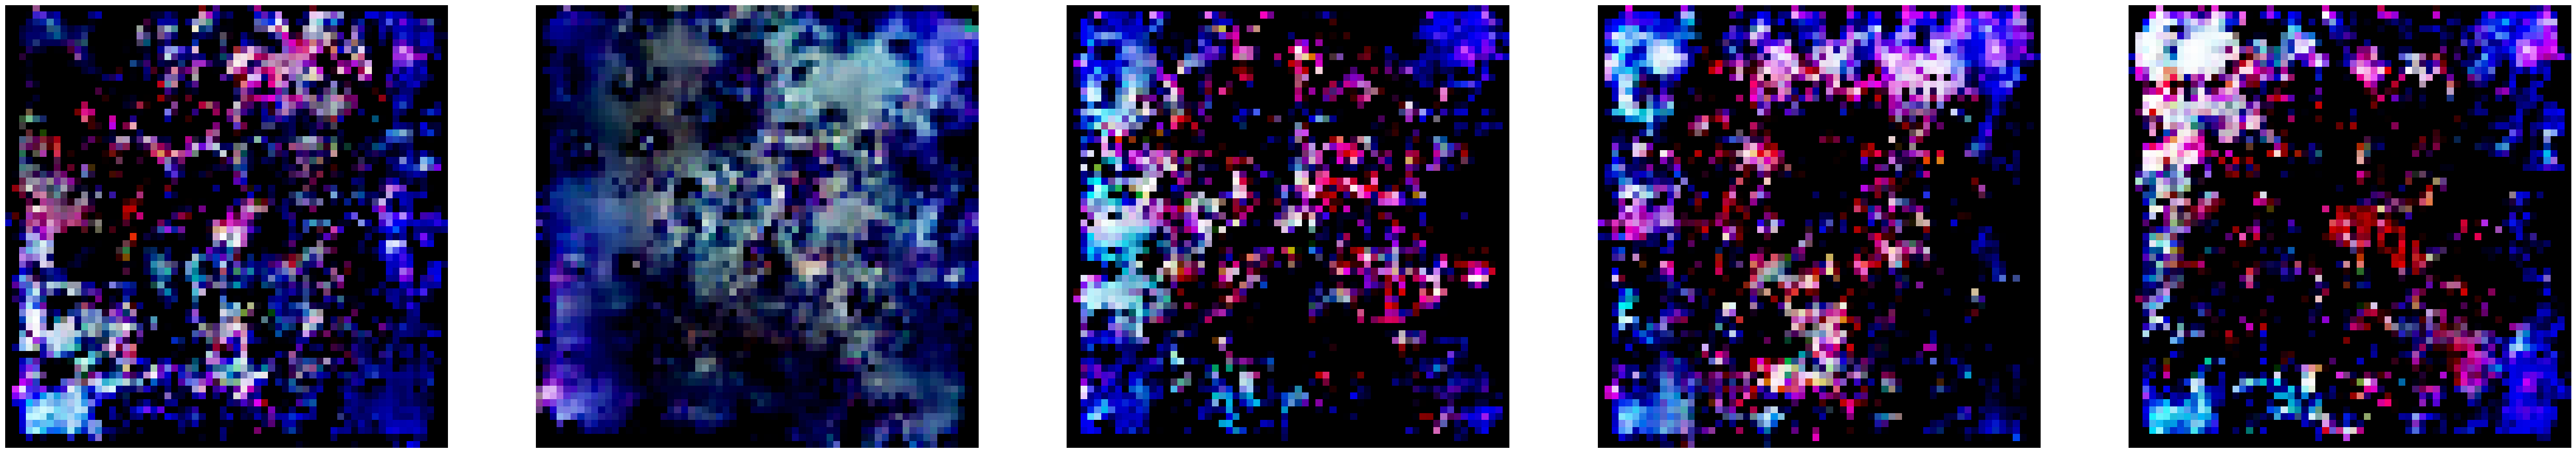

  0%|          | 0/41 [00:00<?, ?it/s]

[1202/2750][20/41] Loss_D: 0.3999 Loss_G: 3.9761 D(x): 0.8570 D(G(z)): 0.0365 / 0.0194
[1202/2750][40/41] Loss_D: 0.4140 Loss_G: 4.0217 D(x): 0.9044 D(G(z)): 0.0641 / 0.0302


  0%|          | 0/41 [00:00<?, ?it/s]

[1203/2750][20/41] Loss_D: 0.3807 Loss_G: 4.8715 D(x): 0.9289 D(G(z)): 0.0170 / 0.0096
[1203/2750][40/41] Loss_D: 0.4042 Loss_G: 4.0918 D(x): 0.9239 D(G(z)): 0.0538 / 0.0194


  0%|          | 0/41 [00:00<?, ?it/s]

[1204/2750][20/41] Loss_D: 0.3601 Loss_G: 4.5646 D(x): 0.9012 D(G(z)): 0.0151 / 0.0110
[1204/2750][40/41] Loss_D: 0.3754 Loss_G: 4.4083 D(x): 0.9108 D(G(z)): 0.0371 / 0.0132


  0%|          | 0/41 [00:00<?, ?it/s]

[1205/2750][20/41] Loss_D: 0.4683 Loss_G: 5.1554 D(x): 0.9211 D(G(z)): 0.0971 / 0.0073
[1205/2750][40/41] Loss_D: 0.3976 Loss_G: 4.6536 D(x): 0.9403 D(G(z)): 0.0321 / 0.0112


  0%|          | 0/41 [00:00<?, ?it/s]

[1206/2750][20/41] Loss_D: 0.4301 Loss_G: 4.6134 D(x): 0.8133 D(G(z)): 0.0230 / 0.0094
[1206/2750][40/41] Loss_D: 0.5087 Loss_G: 4.0225 D(x): 0.7502 D(G(z)): 0.0204 / 0.0206


  0%|          | 0/41 [00:00<?, ?it/s]

[1207/2750][20/41] Loss_D: 0.4048 Loss_G: 5.6630 D(x): 0.9157 D(G(z)): 0.0092 / 0.0035
[1207/2750][40/41] Loss_D: 0.3695 Loss_G: 4.9953 D(x): 0.8716 D(G(z)): 0.0164 / 0.0067


  0%|          | 0/41 [00:00<?, ?it/s]

[1208/2750][20/41] Loss_D: 0.5539 Loss_G: 3.4769 D(x): 0.9532 D(G(z)): 0.1455 / 0.0311
[1208/2750][40/41] Loss_D: 0.5921 Loss_G: 4.1053 D(x): 0.7022 D(G(z)): 0.0116 / 0.0179


  0%|          | 0/41 [00:00<?, ?it/s]

[1209/2750][20/41] Loss_D: 0.6507 Loss_G: 4.2672 D(x): 0.8734 D(G(z)): 0.1535 / 0.0125
[1209/2750][40/41] Loss_D: 0.7166 Loss_G: 4.1205 D(x): 0.6012 D(G(z)): 0.0057 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[1210/2750][20/41] Loss_D: 0.5866 Loss_G: 3.7039 D(x): 0.9148 D(G(z)): 0.1142 / 0.0267
[1210/2750][40/41] Loss_D: 0.4009 Loss_G: 4.6791 D(x): 0.8526 D(G(z)): 0.0380 / 0.0149


  0%|          | 0/41 [00:00<?, ?it/s]

[1211/2750][20/41] Loss_D: 0.5687 Loss_G: 4.4194 D(x): 0.9258 D(G(z)): 0.1004 / 0.0148
[1211/2750][40/41] Loss_D: 0.4982 Loss_G: 4.0887 D(x): 0.7604 D(G(z)): 0.0475 / 0.0321


  0%|          | 0/41 [00:00<?, ?it/s]

[1212/2750][20/41] Loss_D: 0.4182 Loss_G: 5.5967 D(x): 0.9475 D(G(z)): 0.0380 / 0.0053
[1212/2750][40/41] Loss_D: 0.4163 Loss_G: 3.7060 D(x): 0.8687 D(G(z)): 0.0544 / 0.0291


  0%|          | 0/41 [00:00<?, ?it/s]

[1213/2750][20/41] Loss_D: 0.4061 Loss_G: 3.9079 D(x): 0.9247 D(G(z)): 0.0599 / 0.0171
[1213/2750][40/41] Loss_D: 0.3470 Loss_G: 5.0231 D(x): 0.8818 D(G(z)): 0.0094 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[1214/2750][20/41] Loss_D: 0.3509 Loss_G: 4.8311 D(x): 0.9223 D(G(z)): 0.0107 / 0.0075
[1214/2750][40/41] Loss_D: 0.4397 Loss_G: 4.8669 D(x): 0.9219 D(G(z)): 0.0243 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[1215/2750][20/41] Loss_D: 0.5292 Loss_G: 3.4596 D(x): 0.9590 D(G(z)): 0.1105 / 0.0345
[1215/2750][40/41] Loss_D: 0.4665 Loss_G: 4.8038 D(x): 0.7662 D(G(z)): 0.0049 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[1216/2750][20/41] Loss_D: 0.4549 Loss_G: 4.4655 D(x): 0.9157 D(G(z)): 0.0617 / 0.0121
[1216/2750][40/41] Loss_D: 0.4761 Loss_G: 5.0460 D(x): 0.9781 D(G(z)): 0.0266 / 0.0061


  0%|          | 0/41 [00:00<?, ?it/s]

[1217/2750][20/41] Loss_D: 0.8370 Loss_G: 4.7324 D(x): 0.9713 D(G(z)): 0.1597 / 0.0090
[1217/2750][40/41] Loss_D: 1.1514 Loss_G: 2.3460 D(x): 0.4177 D(G(z)): 0.0337 / 0.1012


  0%|          | 0/41 [00:00<?, ?it/s]

[1218/2750][20/41] Loss_D: 0.4185 Loss_G: 4.2653 D(x): 0.7880 D(G(z)): 0.0161 / 0.0131
[1218/2750][40/41] Loss_D: 0.4973 Loss_G: 3.5406 D(x): 0.9115 D(G(z)): 0.1224 / 0.0334


  0%|          | 0/41 [00:00<?, ?it/s]

[1219/2750][20/41] Loss_D: 0.6041 Loss_G: 3.0534 D(x): 0.6317 D(G(z)): 0.0165 / 0.0468
[1219/2750][40/41] Loss_D: 1.3143 Loss_G: 4.4428 D(x): 0.9703 D(G(z)): 0.5249 / 0.0144


  0%|          | 0/41 [00:00<?, ?it/s]

[1220/2750][20/41] Loss_D: 0.4145 Loss_G: 5.8413 D(x): 0.8220 D(G(z)): 0.0046 / 0.0042
[1220/2750][40/41] Loss_D: 0.4419 Loss_G: 3.9732 D(x): 0.8457 D(G(z)): 0.0586 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[1221/2750][20/41] Loss_D: 0.3672 Loss_G: 4.9596 D(x): 0.8831 D(G(z)): 0.0263 / 0.0106
[1221/2750][40/41] Loss_D: 0.3646 Loss_G: 4.3503 D(x): 0.8970 D(G(z)): 0.0174 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[1222/2750][20/41] Loss_D: 0.3671 Loss_G: 4.1633 D(x): 0.8765 D(G(z)): 0.0282 / 0.0155
[1222/2750][40/41] Loss_D: 0.3610 Loss_G: 4.5185 D(x): 0.9014 D(G(z)): 0.0185 / 0.0118


  0%|          | 0/41 [00:00<?, ?it/s]

[1223/2750][20/41] Loss_D: 0.7586 Loss_G: 4.5810 D(x): 0.9739 D(G(z)): 0.2321 / 0.0091
[1223/2750][40/41] Loss_D: 0.7479 Loss_G: 2.7581 D(x): 0.5811 D(G(z)): 0.0302 / 0.0694


  0%|          | 0/41 [00:00<?, ?it/s]

[1224/2750][20/41] Loss_D: 0.4093 Loss_G: 4.3154 D(x): 0.8683 D(G(z)): 0.0382 / 0.0156
[1224/2750][40/41] Loss_D: 0.7579 Loss_G: 3.8303 D(x): 0.9445 D(G(z)): 0.1011 / 0.0195


  0%|          | 0/41 [00:00<?, ?it/s]

[1225/2750][20/41] Loss_D: 0.5634 Loss_G: 3.3761 D(x): 0.8301 D(G(z)): 0.0880 / 0.0350
[1225/2750][40/41] Loss_D: 0.9946 Loss_G: 2.4649 D(x): 0.4650 D(G(z)): 0.0270 / 0.1721


  0%|          | 0/41 [00:00<?, ?it/s]

[1226/2750][20/41] Loss_D: 0.5040 Loss_G: 3.3187 D(x): 0.8593 D(G(z)): 0.0484 / 0.0430
[1226/2750][40/41] Loss_D: 0.5836 Loss_G: 3.1010 D(x): 0.7879 D(G(z)): 0.0676 / 0.0496


  0%|          | 0/41 [00:00<?, ?it/s]

[1227/2750][20/41] Loss_D: 0.7665 Loss_G: 2.6395 D(x): 0.5553 D(G(z)): 0.0212 / 0.0891
[1227/2750][40/41] Loss_D: 0.8497 Loss_G: 4.0633 D(x): 0.9630 D(G(z)): 0.3147 / 0.0159


  0%|          | 0/41 [00:00<?, ?it/s]

[1228/2750][20/41] Loss_D: 0.7434 Loss_G: 3.6962 D(x): 0.6640 D(G(z)): 0.0729 / 0.0284
[1228/2750][40/41] Loss_D: 0.5063 Loss_G: 4.2583 D(x): 0.7370 D(G(z)): 0.0290 / 0.0154


  0%|          | 0/41 [00:00<?, ?it/s]

[1229/2750][20/41] Loss_D: 0.4850 Loss_G: 3.0878 D(x): 0.9445 D(G(z)): 0.1119 / 0.0458
[1229/2750][40/41] Loss_D: 0.7317 Loss_G: 3.3361 D(x): 0.5963 D(G(z)): 0.0144 / 0.0470


  0%|          | 0/41 [00:00<?, ?it/s]

[1230/2750][20/41] Loss_D: 0.6572 Loss_G: 2.7953 D(x): 0.6870 D(G(z)): 0.0652 / 0.0545
[1230/2750][40/41] Loss_D: 0.4152 Loss_G: 4.2131 D(x): 0.9440 D(G(z)): 0.0429 / 0.0135


  0%|          | 0/41 [00:00<?, ?it/s]

[1231/2750][20/41] Loss_D: 0.8856 Loss_G: 2.5343 D(x): 0.5476 D(G(z)): 0.0684 / 0.0928
[1231/2750][40/41] Loss_D: 0.3825 Loss_G: 4.2577 D(x): 0.8378 D(G(z)): 0.0203 / 0.0149


  0%|          | 0/41 [00:00<?, ?it/s]

[1232/2750][20/41] Loss_D: 0.8910 Loss_G: 3.8664 D(x): 0.5827 D(G(z)): 0.0055 / 0.0199
[1232/2750][40/41] Loss_D: 0.4836 Loss_G: 3.4196 D(x): 0.9017 D(G(z)): 0.1271 / 0.0356


  0%|          | 0/41 [00:00<?, ?it/s]

[1233/2750][20/41] Loss_D: 0.3841 Loss_G: 3.6866 D(x): 0.9009 D(G(z)): 0.0413 / 0.0234
[1233/2750][40/41] Loss_D: 0.4653 Loss_G: 4.1497 D(x): 0.8091 D(G(z)): 0.0468 / 0.0201


  0%|          | 0/41 [00:00<?, ?it/s]

[1234/2750][20/41] Loss_D: 1.0340 Loss_G: 2.7041 D(x): 0.4491 D(G(z)): 0.0162 / 0.0859
[1234/2750][40/41] Loss_D: 0.4247 Loss_G: 3.3535 D(x): 0.8742 D(G(z)): 0.0408 / 0.0410


  0%|          | 0/41 [00:00<?, ?it/s]

[1235/2750][20/41] Loss_D: 1.0032 Loss_G: 3.0161 D(x): 0.4204 D(G(z)): 0.0067 / 0.0571
[1235/2750][40/41] Loss_D: 0.7178 Loss_G: 4.0118 D(x): 0.9447 D(G(z)): 0.2267 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[1236/2750][20/41] Loss_D: 0.5407 Loss_G: 3.7206 D(x): 0.7237 D(G(z)): 0.0142 / 0.0213
[1236/2750][40/41] Loss_D: 0.7142 Loss_G: 3.8922 D(x): 0.9060 D(G(z)): 0.2348 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[1237/2750][20/41] Loss_D: 1.1496 Loss_G: 2.0483 D(x): 0.4352 D(G(z)): 0.0604 / 0.1668
[1237/2750][40/41] Loss_D: 0.6067 Loss_G: 3.3397 D(x): 0.9477 D(G(z)): 0.1901 / 0.0349


  0%|          | 0/41 [00:00<?, ?it/s]

[1238/2750][20/41] Loss_D: 0.4177 Loss_G: 4.0152 D(x): 0.9054 D(G(z)): 0.0578 / 0.0192
[1238/2750][40/41] Loss_D: 0.4855 Loss_G: 3.9977 D(x): 0.9460 D(G(z)): 0.1064 / 0.0247


  0%|          | 0/41 [00:00<?, ?it/s]

[1239/2750][20/41] Loss_D: 0.5788 Loss_G: 3.9303 D(x): 0.9193 D(G(z)): 0.1775 / 0.0274
[1239/2750][40/41] Loss_D: 1.6917 Loss_G: 2.2111 D(x): 0.2518 D(G(z)): 0.0065 / 0.1558


  0%|          | 0/41 [00:00<?, ?it/s]

[1240/2750][20/41] Loss_D: 0.3866 Loss_G: 3.6550 D(x): 0.8796 D(G(z)): 0.0406 / 0.0328
[1240/2750][40/41] Loss_D: 0.3857 Loss_G: 3.8717 D(x): 0.9201 D(G(z)): 0.0389 / 0.0203


  0%|          | 0/41 [00:00<?, ?it/s]

[1241/2750][20/41] Loss_D: 0.4510 Loss_G: 3.5782 D(x): 0.8375 D(G(z)): 0.0819 / 0.0304
[1241/2750][40/41] Loss_D: 0.3941 Loss_G: 3.6870 D(x): 0.8587 D(G(z)): 0.0302 / 0.0279


  0%|          | 0/41 [00:00<?, ?it/s]

[1242/2750][20/41] Loss_D: 0.3813 Loss_G: 4.1855 D(x): 0.8745 D(G(z)): 0.0339 / 0.0157
[1242/2750][40/41] Loss_D: 0.4210 Loss_G: 5.0701 D(x): 0.9077 D(G(z)): 0.0284 / 0.0059


  0%|          | 0/41 [00:00<?, ?it/s]

[1243/2750][20/41] Loss_D: 0.4873 Loss_G: 3.9371 D(x): 0.8130 D(G(z)): 0.0235 / 0.0202
[1243/2750][40/41] Loss_D: 0.5141 Loss_G: 4.1882 D(x): 0.9567 D(G(z)): 0.0512 / 0.0145


  0%|          | 0/41 [00:00<?, ?it/s]

[1244/2750][20/41] Loss_D: 1.2770 Loss_G: 1.4064 D(x): 0.3634 D(G(z)): 0.0667 / 0.2916
[1244/2750][40/41] Loss_D: 0.4125 Loss_G: 4.1067 D(x): 0.9140 D(G(z)): 0.0612 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[1245/2750][20/41] Loss_D: 0.4906 Loss_G: 4.2032 D(x): 0.8447 D(G(z)): 0.0342 / 0.0124
[1245/2750][40/41] Loss_D: 0.4878 Loss_G: 3.5547 D(x): 0.7874 D(G(z)): 0.0358 / 0.0353


  0%|          | 0/41 [00:00<?, ?it/s]

[1246/2750][20/41] Loss_D: 0.4170 Loss_G: 4.4271 D(x): 0.9026 D(G(z)): 0.0660 / 0.0115
[1246/2750][40/41] Loss_D: 0.9085 Loss_G: 2.3820 D(x): 0.5441 D(G(z)): 0.0612 / 0.0930


  0%|          | 0/41 [00:00<?, ?it/s]

[1247/2750][20/41] Loss_D: 0.4851 Loss_G: 3.1886 D(x): 0.7544 D(G(z)): 0.0427 / 0.0467
[1247/2750][40/41] Loss_D: 0.3957 Loss_G: 4.9966 D(x): 0.8976 D(G(z)): 0.0191 / 0.0089


  0%|          | 0/41 [00:00<?, ?it/s]

[1248/2750][20/41] Loss_D: 0.4027 Loss_G: 4.3161 D(x): 0.8757 D(G(z)): 0.0514 / 0.0147
[1248/2750][40/41] Loss_D: 0.3725 Loss_G: 4.3340 D(x): 0.8797 D(G(z)): 0.0281 / 0.0148


  0%|          | 0/41 [00:00<?, ?it/s]

[1249/2750][20/41] Loss_D: 0.4567 Loss_G: 5.0950 D(x): 0.9280 D(G(z)): 0.0580 / 0.0131
[1249/2750][40/41] Loss_D: 0.5886 Loss_G: 3.6009 D(x): 0.8668 D(G(z)): 0.1600 / 0.0251


  0%|          | 0/41 [00:00<?, ?it/s]

[1250/2750][20/41] Loss_D: 0.6987 Loss_G: 4.7303 D(x): 0.9200 D(G(z)): 0.0556 / 0.0112
[1250/2750][40/41] Loss_D: 0.4661 Loss_G: 3.7940 D(x): 0.9199 D(G(z)): 0.0982 / 0.0248


  0%|          | 0/41 [00:00<?, ?it/s]

[1251/2750][20/41] Loss_D: 0.4743 Loss_G: 4.0651 D(x): 0.8827 D(G(z)): 0.0773 / 0.0228
[1251/2750][40/41] Loss_D: 0.4989 Loss_G: 3.7815 D(x): 0.7818 D(G(z)): 0.0498 / 0.0272


  0%|          | 0/41 [00:00<?, ?it/s]

[1252/2750][20/41] Loss_D: 0.4270 Loss_G: 4.3294 D(x): 0.8030 D(G(z)): 0.0222 / 0.0168
[1252/2750][40/41] Loss_D: 0.5857 Loss_G: 3.4259 D(x): 0.8008 D(G(z)): 0.0940 / 0.0375


  0%|          | 0/41 [00:00<?, ?it/s]

[1253/2750][20/41] Loss_D: 0.4986 Loss_G: 3.6985 D(x): 0.9176 D(G(z)): 0.1282 / 0.0269
[1253/2750][40/41] Loss_D: 0.5672 Loss_G: 4.2952 D(x): 0.8725 D(G(z)): 0.1023 / 0.0147


  0%|          | 0/41 [00:00<?, ?it/s]

[1254/2750][20/41] Loss_D: 0.4401 Loss_G: 3.8029 D(x): 0.8932 D(G(z)): 0.0424 / 0.0344
[1254/2750][40/41] Loss_D: 0.3870 Loss_G: 4.4264 D(x): 0.8890 D(G(z)): 0.0185 / 0.0149


  0%|          | 0/41 [00:00<?, ?it/s]

[1255/2750][20/41] Loss_D: 0.6007 Loss_G: 5.9194 D(x): 0.8961 D(G(z)): 0.1634 / 0.0021
[1255/2750][40/41] Loss_D: 0.4331 Loss_G: 4.2278 D(x): 0.8265 D(G(z)): 0.0369 / 0.0167


  0%|          | 0/41 [00:00<?, ?it/s]

[1256/2750][20/41] Loss_D: 0.3754 Loss_G: 4.3014 D(x): 0.8917 D(G(z)): 0.0198 / 0.0125
[1256/2750][40/41] Loss_D: 0.3779 Loss_G: 4.3581 D(x): 0.9123 D(G(z)): 0.0283 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[1257/2750][20/41] Loss_D: 0.3853 Loss_G: 5.4582 D(x): 0.9341 D(G(z)): 0.0249 / 0.0067
[1257/2750][40/41] Loss_D: 0.3478 Loss_G: 5.5110 D(x): 0.9157 D(G(z)): 0.0043 / 0.0035


  0%|          | 0/41 [00:00<?, ?it/s]

[1258/2750][20/41] Loss_D: 0.4530 Loss_G: 2.6195 D(x): 0.9421 D(G(z)): 0.0832 / 0.0792
[1258/2750][40/41] Loss_D: 0.5526 Loss_G: 3.5786 D(x): 0.9549 D(G(z)): 0.1451 / 0.0291


  0%|          | 0/41 [00:00<?, ?it/s]

[1259/2750][20/41] Loss_D: 0.3500 Loss_G: 5.8206 D(x): 0.8587 D(G(z)): 0.0077 / 0.0050
[1259/2750][40/41] Loss_D: 0.4648 Loss_G: 3.9465 D(x): 0.8711 D(G(z)): 0.0597 / 0.0178


  0%|          | 0/41 [00:00<?, ?it/s]

[1260/2750][20/41] Loss_D: 0.5992 Loss_G: 4.2505 D(x): 0.9606 D(G(z)): 0.1694 / 0.0260
[1260/2750][40/41] Loss_D: 0.4447 Loss_G: 3.9022 D(x): 0.9030 D(G(z)): 0.0740 / 0.0251


  0%|          | 0/41 [00:00<?, ?it/s]

[1261/2750][20/41] Loss_D: 0.3865 Loss_G: 3.9775 D(x): 0.8610 D(G(z)): 0.0368 / 0.0199
[1261/2750][40/41] Loss_D: 1.0289 Loss_G: 4.9776 D(x): 0.9513 D(G(z)): 0.4344 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[1262/2750][20/41] Loss_D: 0.5850 Loss_G: 3.1332 D(x): 0.8619 D(G(z)): 0.2001 / 0.0457
[1262/2750][40/41] Loss_D: 0.4307 Loss_G: 3.7733 D(x): 0.9035 D(G(z)): 0.0522 / 0.0241


  0%|          | 0/41 [00:00<?, ?it/s]

[1263/2750][20/41] Loss_D: 1.1373 Loss_G: 3.2713 D(x): 0.4822 D(G(z)): 0.0109 / 0.0670
[1263/2750][40/41] Loss_D: 0.4804 Loss_G: 4.0394 D(x): 0.9581 D(G(z)): 0.0569 / 0.0332


  0%|          | 0/41 [00:00<?, ?it/s]

[1264/2750][20/41] Loss_D: 0.5684 Loss_G: 3.6068 D(x): 0.9072 D(G(z)): 0.1367 / 0.0257
[1264/2750][40/41] Loss_D: 0.3932 Loss_G: 4.4874 D(x): 0.9500 D(G(z)): 0.0239 / 0.0117


  0%|          | 0/41 [00:00<?, ?it/s]

[1265/2750][20/41] Loss_D: 0.8002 Loss_G: 3.2645 D(x): 0.9276 D(G(z)): 0.2505 / 0.0446
[1265/2750][40/41] Loss_D: 0.3904 Loss_G: 4.3776 D(x): 0.8827 D(G(z)): 0.0431 / 0.0141


  0%|          | 0/41 [00:00<?, ?it/s]

[1266/2750][20/41] Loss_D: 0.3574 Loss_G: 5.0074 D(x): 0.8879 D(G(z)): 0.0104 / 0.0056
[1266/2750][40/41] Loss_D: 0.3919 Loss_G: 4.3361 D(x): 0.9068 D(G(z)): 0.0404 / 0.0167


  0%|          | 0/41 [00:00<?, ?it/s]

[1267/2750][20/41] Loss_D: 0.3642 Loss_G: 4.7662 D(x): 0.8761 D(G(z)): 0.0213 / 0.0095
[1267/2750][40/41] Loss_D: 0.4269 Loss_G: 3.8837 D(x): 0.8789 D(G(z)): 0.0773 / 0.0239


  0%|          | 0/41 [00:00<?, ?it/s]

[1268/2750][20/41] Loss_D: 0.4031 Loss_G: 3.4805 D(x): 0.9353 D(G(z)): 0.0437 / 0.0398
[1268/2750][40/41] Loss_D: 0.4062 Loss_G: 4.4313 D(x): 0.8754 D(G(z)): 0.0319 / 0.0181


  0%|          | 0/41 [00:00<?, ?it/s]

[1269/2750][20/41] Loss_D: 0.7615 Loss_G: 3.3496 D(x): 0.9484 D(G(z)): 0.2687 / 0.0380
[1269/2750][40/41] Loss_D: 0.4159 Loss_G: 4.7393 D(x): 0.9187 D(G(z)): 0.0239 / 0.0099


  0%|          | 0/41 [00:00<?, ?it/s]

[1270/2750][20/41] Loss_D: 0.5416 Loss_G: 3.8475 D(x): 0.7250 D(G(z)): 0.0225 / 0.0265
[1270/2750][40/41] Loss_D: 0.7324 Loss_G: 2.7087 D(x): 0.6700 D(G(z)): 0.1363 / 0.0818


  0%|          | 0/41 [00:00<?, ?it/s]

[1271/2750][20/41] Loss_D: 0.6786 Loss_G: 2.8168 D(x): 0.6170 D(G(z)): 0.0564 / 0.0641
[1271/2750][40/41] Loss_D: 0.3810 Loss_G: 4.0049 D(x): 0.8724 D(G(z)): 0.0374 / 0.0188


  0%|          | 0/41 [00:00<?, ?it/s]

[1272/2750][20/41] Loss_D: 0.3757 Loss_G: 4.3781 D(x): 0.8525 D(G(z)): 0.0269 / 0.0129
[1272/2750][40/41] Loss_D: 0.4180 Loss_G: 3.3146 D(x): 0.8935 D(G(z)): 0.0767 / 0.0300


  0%|          | 0/41 [00:00<?, ?it/s]

[1273/2750][20/41] Loss_D: 0.7841 Loss_G: 3.1249 D(x): 0.5819 D(G(z)): 0.0176 / 0.0532
[1273/2750][40/41] Loss_D: 0.3627 Loss_G: 4.2108 D(x): 0.8776 D(G(z)): 0.0215 / 0.0129


  0%|          | 0/41 [00:00<?, ?it/s]

[1274/2750][20/41] Loss_D: 0.5140 Loss_G: 3.9643 D(x): 0.9367 D(G(z)): 0.1281 / 0.0209
[1274/2750][40/41] Loss_D: 0.4865 Loss_G: 2.7230 D(x): 0.9489 D(G(z)): 0.1020 / 0.0698


  0%|          | 0/41 [00:00<?, ?it/s]

[1275/2750][20/41] Loss_D: 0.4063 Loss_G: 3.8611 D(x): 0.9040 D(G(z)): 0.0624 / 0.0288
[1275/2750][40/41] Loss_D: 0.4743 Loss_G: 4.3202 D(x): 0.8435 D(G(z)): 0.0302 / 0.0163


  0%|          | 0/41 [00:00<?, ?it/s]

[1276/2750][20/41] Loss_D: 0.5500 Loss_G: 3.4234 D(x): 0.9478 D(G(z)): 0.1622 / 0.0387
[1276/2750][40/41] Loss_D: 0.4569 Loss_G: 3.4134 D(x): 0.8069 D(G(z)): 0.0418 / 0.0372


  0%|          | 0/41 [00:00<?, ?it/s]

[1277/2750][20/41] Loss_D: 0.6954 Loss_G: 3.2110 D(x): 0.9335 D(G(z)): 0.1900 / 0.0502
[1277/2750][40/41] Loss_D: 0.4316 Loss_G: 3.4256 D(x): 0.9205 D(G(z)): 0.0826 / 0.0344


  0%|          | 0/41 [00:00<?, ?it/s]

[1278/2750][20/41] Loss_D: 0.5483 Loss_G: 3.4178 D(x): 0.7411 D(G(z)): 0.0620 / 0.0570
[1278/2750][40/41] Loss_D: 0.3690 Loss_G: 4.2814 D(x): 0.8641 D(G(z)): 0.0211 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[1279/2750][20/41] Loss_D: 0.6529 Loss_G: 3.3317 D(x): 0.9742 D(G(z)): 0.2049 / 0.0449
[1279/2750][40/41] Loss_D: 0.4617 Loss_G: 4.4420 D(x): 0.9426 D(G(z)): 0.0564 / 0.0113


  0%|          | 0/41 [00:00<?, ?it/s]

[1280/2750][20/41] Loss_D: 0.8362 Loss_G: 4.4753 D(x): 0.9794 D(G(z)): 0.2756 / 0.0105
[1280/2750][40/41] Loss_D: 0.3703 Loss_G: 4.1200 D(x): 0.8955 D(G(z)): 0.0329 / 0.0163


  0%|          | 0/41 [00:00<?, ?it/s]

[1281/2750][20/41] Loss_D: 0.3858 Loss_G: 4.2617 D(x): 0.9091 D(G(z)): 0.0387 / 0.0166
[1281/2750][40/41] Loss_D: 0.4078 Loss_G: 4.2119 D(x): 0.8640 D(G(z)): 0.0588 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[1282/2750][20/41] Loss_D: 0.3654 Loss_G: 4.5931 D(x): 0.8532 D(G(z)): 0.0145 / 0.0116
[1282/2750][40/41] Loss_D: 0.4808 Loss_G: 3.8329 D(x): 0.9026 D(G(z)): 0.0866 / 0.0291


  0%|          | 0/41 [00:00<?, ?it/s]

[1283/2750][20/41] Loss_D: 0.3849 Loss_G: 3.8643 D(x): 0.8910 D(G(z)): 0.0370 / 0.0221
[1283/2750][40/41] Loss_D: 0.4400 Loss_G: 2.8517 D(x): 0.8849 D(G(z)): 0.0790 / 0.0599


  0%|          | 0/41 [00:00<?, ?it/s]

[1284/2750][20/41] Loss_D: 0.3532 Loss_G: 4.7437 D(x): 0.9071 D(G(z)): 0.0126 / 0.0088
[1284/2750][40/41] Loss_D: 0.6556 Loss_G: 3.4666 D(x): 0.6954 D(G(z)): 0.0325 / 0.0529


  0%|          | 0/41 [00:00<?, ?it/s]

[1285/2750][20/41] Loss_D: 0.9704 Loss_G: 5.5798 D(x): 0.9656 D(G(z)): 0.3680 / 0.0059
[1285/2750][40/41] Loss_D: 0.8538 Loss_G: 2.9508 D(x): 0.9362 D(G(z)): 0.3601 / 0.0572


  0%|          | 0/41 [00:00<?, ?it/s]

[1286/2750][20/41] Loss_D: 0.4138 Loss_G: 7.6105 D(x): 0.9187 D(G(z)): 0.0021 / 0.0007
[1286/2750][40/41] Loss_D: 0.6473 Loss_G: 3.4750 D(x): 0.9669 D(G(z)): 0.1775 / 0.0293


  0%|          | 0/41 [00:00<?, ?it/s]

[1287/2750][20/41] Loss_D: 0.5038 Loss_G: 4.2506 D(x): 0.7627 D(G(z)): 0.0208 / 0.0196
[1287/2750][40/41] Loss_D: 0.3857 Loss_G: 4.2852 D(x): 0.9305 D(G(z)): 0.0233 / 0.0136


  0%|          | 0/41 [00:00<?, ?it/s]

[1288/2750][20/41] Loss_D: 0.4426 Loss_G: 5.0687 D(x): 0.9152 D(G(z)): 0.0100 / 0.0064
[1288/2750][40/41] Loss_D: 0.3637 Loss_G: 5.2369 D(x): 0.8785 D(G(z)): 0.0106 / 0.0044


  0%|          | 0/41 [00:00<?, ?it/s]

[1289/2750][20/41] Loss_D: 0.6789 Loss_G: 3.9912 D(x): 0.6578 D(G(z)): 0.0259 / 0.0235
[1289/2750][40/41] Loss_D: 0.5495 Loss_G: 3.7660 D(x): 0.6943 D(G(z)): 0.0161 / 0.0269


  0%|          | 0/41 [00:00<?, ?it/s]

[1290/2750][20/41] Loss_D: 0.3827 Loss_G: 4.0576 D(x): 0.8988 D(G(z)): 0.0363 / 0.0207
[1290/2750][40/41] Loss_D: 0.6790 Loss_G: 2.5486 D(x): 0.8261 D(G(z)): 0.2203 / 0.0941


  0%|          | 0/41 [00:00<?, ?it/s]

[1291/2750][20/41] Loss_D: 0.5663 Loss_G: 2.4155 D(x): 0.9459 D(G(z)): 0.1240 / 0.1148
[1291/2750][40/41] Loss_D: 0.3804 Loss_G: 4.2250 D(x): 0.8562 D(G(z)): 0.0291 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[1292/2750][20/41] Loss_D: 0.3934 Loss_G: 3.9991 D(x): 0.8733 D(G(z)): 0.0426 / 0.0175
[1292/2750][40/41] Loss_D: 0.3694 Loss_G: 4.5186 D(x): 0.9100 D(G(z)): 0.0309 / 0.0107


  0%|          | 0/41 [00:00<?, ?it/s]

[1293/2750][20/41] Loss_D: 0.9965 Loss_G: 3.4472 D(x): 0.4602 D(G(z)): 0.0117 / 0.0384
[1293/2750][40/41] Loss_D: 0.6812 Loss_G: 3.8498 D(x): 0.9602 D(G(z)): 0.2326 / 0.0279


  0%|          | 0/41 [00:00<?, ?it/s]

[1294/2750][20/41] Loss_D: 0.6255 Loss_G: 3.0097 D(x): 0.6464 D(G(z)): 0.0287 / 0.0573
[1294/2750][40/41] Loss_D: 0.3993 Loss_G: 3.7174 D(x): 0.9104 D(G(z)): 0.0562 / 0.0290


  0%|          | 0/41 [00:00<?, ?it/s]

[1295/2750][20/41] Loss_D: 0.4104 Loss_G: 3.9812 D(x): 0.8621 D(G(z)): 0.0601 / 0.0206
[1295/2750][40/41] Loss_D: 0.5462 Loss_G: 3.1391 D(x): 0.8273 D(G(z)): 0.0844 / 0.0544


  0%|          | 0/41 [00:00<?, ?it/s]

[1296/2750][20/41] Loss_D: 0.3782 Loss_G: 3.9247 D(x): 0.8959 D(G(z)): 0.0336 / 0.0183
[1296/2750][40/41] Loss_D: 0.5491 Loss_G: 3.7040 D(x): 0.8159 D(G(z)): 0.1040 / 0.0261


  0%|          | 0/41 [00:00<?, ?it/s]

[1297/2750][20/41] Loss_D: 0.5726 Loss_G: 3.9351 D(x): 0.8602 D(G(z)): 0.0743 / 0.0174
[1297/2750][40/41] Loss_D: 0.4289 Loss_G: 4.4931 D(x): 0.8315 D(G(z)): 0.0113 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[1298/2750][20/41] Loss_D: 0.3725 Loss_G: 4.6440 D(x): 0.8490 D(G(z)): 0.0231 / 0.0115
[1298/2750][40/41] Loss_D: 0.3432 Loss_G: 5.5227 D(x): 0.9060 D(G(z)): 0.0066 / 0.0055


  0%|          | 0/41 [00:00<?, ?it/s]

[1299/2750][20/41] Loss_D: 0.3645 Loss_G: 4.4264 D(x): 0.8807 D(G(z)): 0.0156 / 0.0111
[1299/2750][40/41] Loss_D: 0.3612 Loss_G: 4.3116 D(x): 0.8821 D(G(z)): 0.0152 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[1300/2750][20/41] Loss_D: 0.3935 Loss_G: 3.2538 D(x): 0.8859 D(G(z)): 0.0496 / 0.0442
[1300/2750][40/41] Loss_D: 0.3463 Loss_G: 5.5430 D(x): 0.8921 D(G(z)): 0.0085 / 0.0041


  0%|          | 0/41 [00:00<?, ?it/s]

[1301/2750][20/41] Loss_D: 0.3580 Loss_G: 4.8010 D(x): 0.8901 D(G(z)): 0.0177 / 0.0091
[1301/2750][40/41] Loss_D: 0.5226 Loss_G: 4.1663 D(x): 0.9006 D(G(z)): 0.1477 / 0.0150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9977841].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999978..0.87475586].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99906796..0.9088268].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999994..0.9801889].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999804..0.8671804].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1301.pth


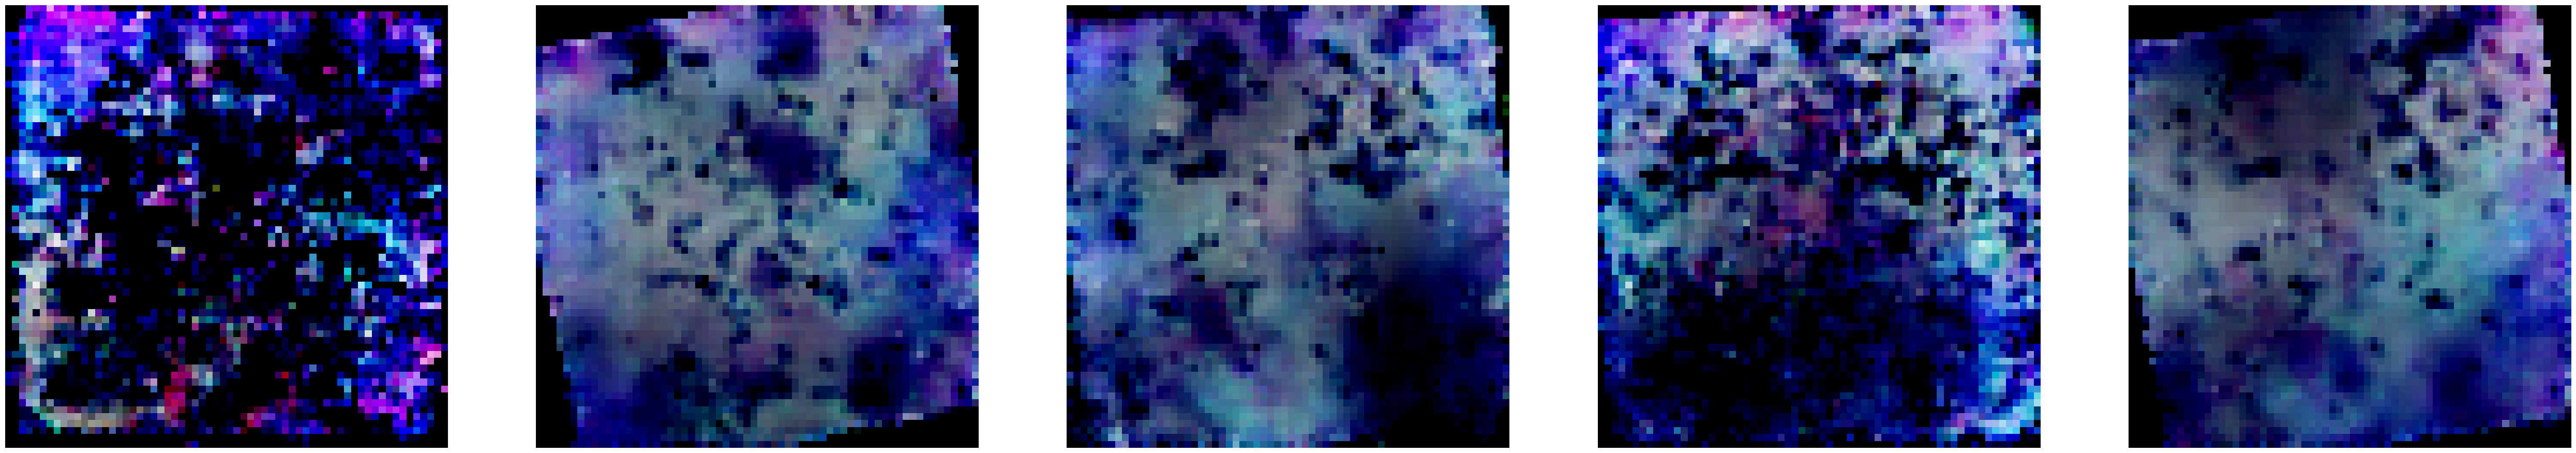

  0%|          | 0/41 [00:00<?, ?it/s]

[1302/2750][20/41] Loss_D: 0.3639 Loss_G: 4.7390 D(x): 0.8867 D(G(z)): 0.0205 / 0.0110
[1302/2750][40/41] Loss_D: 0.5713 Loss_G: 4.0204 D(x): 0.7598 D(G(z)): 0.0189 / 0.0237


  0%|          | 0/41 [00:00<?, ?it/s]

[1303/2750][20/41] Loss_D: 0.4030 Loss_G: 4.3397 D(x): 0.9065 D(G(z)): 0.0582 / 0.0123
[1303/2750][40/41] Loss_D: 0.4428 Loss_G: 4.0711 D(x): 0.9188 D(G(z)): 0.0954 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[1304/2750][20/41] Loss_D: 0.3594 Loss_G: 4.9364 D(x): 0.9026 D(G(z)): 0.0145 / 0.0077
[1304/2750][40/41] Loss_D: 0.5182 Loss_G: 3.0398 D(x): 0.9231 D(G(z)): 0.1220 / 0.0743


  0%|          | 0/41 [00:00<?, ?it/s]

[1305/2750][20/41] Loss_D: 0.5157 Loss_G: 4.0958 D(x): 0.7741 D(G(z)): 0.0138 / 0.0146
[1305/2750][40/41] Loss_D: 0.4543 Loss_G: 3.9663 D(x): 0.8946 D(G(z)): 0.0795 / 0.0367


  0%|          | 0/41 [00:00<?, ?it/s]

[1306/2750][20/41] Loss_D: 0.5192 Loss_G: 3.7759 D(x): 0.7705 D(G(z)): 0.0372 / 0.0356
[1306/2750][40/41] Loss_D: 0.9315 Loss_G: 2.6228 D(x): 0.5522 D(G(z)): 0.1286 / 0.1095


  0%|          | 0/41 [00:00<?, ?it/s]

[1307/2750][20/41] Loss_D: 0.3890 Loss_G: 3.8148 D(x): 0.9085 D(G(z)): 0.0519 / 0.0207
[1307/2750][40/41] Loss_D: 0.4813 Loss_G: 4.2186 D(x): 0.7576 D(G(z)): 0.0134 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[1308/2750][20/41] Loss_D: 0.4121 Loss_G: 3.4433 D(x): 0.9092 D(G(z)): 0.0695 / 0.0350
[1308/2750][40/41] Loss_D: 0.3663 Loss_G: 4.6494 D(x): 0.8973 D(G(z)): 0.0249 / 0.0122


  0%|          | 0/41 [00:00<?, ?it/s]

[1309/2750][20/41] Loss_D: 0.3892 Loss_G: 4.6168 D(x): 0.9083 D(G(z)): 0.0475 / 0.0135
[1309/2750][40/41] Loss_D: 0.4895 Loss_G: 4.8982 D(x): 0.9257 D(G(z)): 0.0431 / 0.0111


  0%|          | 0/41 [00:00<?, ?it/s]

[1310/2750][20/41] Loss_D: 0.9121 Loss_G: 2.6328 D(x): 0.5404 D(G(z)): 0.0305 / 0.1050
[1310/2750][40/41] Loss_D: 0.4046 Loss_G: 4.6609 D(x): 0.8725 D(G(z)): 0.0151 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[1311/2750][20/41] Loss_D: 0.4614 Loss_G: 3.4977 D(x): 0.8769 D(G(z)): 0.0794 / 0.0345
[1311/2750][40/41] Loss_D: 0.5078 Loss_G: 3.4793 D(x): 0.8699 D(G(z)): 0.0756 / 0.0289


  0%|          | 0/41 [00:00<?, ?it/s]

[1312/2750][20/41] Loss_D: 0.4630 Loss_G: 3.2310 D(x): 0.8388 D(G(z)): 0.0519 / 0.0422
[1312/2750][40/41] Loss_D: 0.5836 Loss_G: 2.5547 D(x): 0.6637 D(G(z)): 0.0482 / 0.0832


  0%|          | 0/41 [00:00<?, ?it/s]

[1313/2750][20/41] Loss_D: 0.4137 Loss_G: 4.0055 D(x): 0.8399 D(G(z)): 0.0255 / 0.0167
[1313/2750][40/41] Loss_D: 0.3945 Loss_G: 4.5222 D(x): 0.9040 D(G(z)): 0.0196 / 0.0138


  0%|          | 0/41 [00:00<?, ?it/s]

[1314/2750][20/41] Loss_D: 0.5172 Loss_G: 2.7914 D(x): 0.9666 D(G(z)): 0.1087 / 0.0740
[1314/2750][40/41] Loss_D: 0.4246 Loss_G: 5.7252 D(x): 0.8692 D(G(z)): 0.0457 / 0.0061


  0%|          | 0/41 [00:00<?, ?it/s]

[1315/2750][20/41] Loss_D: 0.3659 Loss_G: 5.3395 D(x): 0.8794 D(G(z)): 0.0103 / 0.0050
[1315/2750][40/41] Loss_D: 0.6788 Loss_G: 2.9255 D(x): 0.9455 D(G(z)): 0.2411 / 0.0490


  0%|          | 0/41 [00:00<?, ?it/s]

[1316/2750][20/41] Loss_D: 0.4570 Loss_G: 2.9146 D(x): 0.9194 D(G(z)): 0.0770 / 0.0550
[1316/2750][40/41] Loss_D: 0.4334 Loss_G: 4.5674 D(x): 0.8333 D(G(z)): 0.0111 / 0.0117


  0%|          | 0/41 [00:00<?, ?it/s]

[1317/2750][20/41] Loss_D: 0.4986 Loss_G: 3.0060 D(x): 0.8878 D(G(z)): 0.0779 / 0.0553
[1317/2750][40/41] Loss_D: 0.4606 Loss_G: 3.8192 D(x): 0.9011 D(G(z)): 0.0562 / 0.0207


  0%|          | 0/41 [00:00<?, ?it/s]

[1318/2750][20/41] Loss_D: 0.4803 Loss_G: 3.9706 D(x): 0.9326 D(G(z)): 0.0520 / 0.0177
[1318/2750][40/41] Loss_D: 0.4051 Loss_G: 4.8235 D(x): 0.9005 D(G(z)): 0.0155 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[1319/2750][20/41] Loss_D: 0.5278 Loss_G: 3.8361 D(x): 0.9744 D(G(z)): 0.0988 / 0.0210
[1319/2750][40/41] Loss_D: 0.6111 Loss_G: 2.5781 D(x): 0.8638 D(G(z)): 0.1332 / 0.0845


  0%|          | 0/41 [00:00<?, ?it/s]

[1320/2750][20/41] Loss_D: 0.4568 Loss_G: 4.9799 D(x): 0.9249 D(G(z)): 0.0734 / 0.0072
[1320/2750][40/41] Loss_D: 0.4003 Loss_G: 4.7817 D(x): 0.9560 D(G(z)): 0.0183 / 0.0084


  0%|          | 0/41 [00:00<?, ?it/s]

[1321/2750][20/41] Loss_D: 0.3681 Loss_G: 4.4833 D(x): 0.8599 D(G(z)): 0.0209 / 0.0134
[1321/2750][40/41] Loss_D: 0.9742 Loss_G: 4.2657 D(x): 0.6702 D(G(z)): 0.2217 / 0.0321


  0%|          | 0/41 [00:00<?, ?it/s]

[1322/2750][20/41] Loss_D: 0.9773 Loss_G: 2.9379 D(x): 0.4679 D(G(z)): 0.0172 / 0.0833
[1322/2750][40/41] Loss_D: 0.4812 Loss_G: 4.0223 D(x): 0.9049 D(G(z)): 0.0723 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[1323/2750][20/41] Loss_D: 0.4974 Loss_G: 3.5374 D(x): 0.9415 D(G(z)): 0.0745 / 0.0477
[1323/2750][40/41] Loss_D: 1.4846 Loss_G: 1.5959 D(x): 0.3171 D(G(z)): 0.0289 / 0.2791


  0%|          | 0/41 [00:00<?, ?it/s]

[1324/2750][20/41] Loss_D: 0.3733 Loss_G: 6.6619 D(x): 0.8737 D(G(z)): 0.0038 / 0.0028
[1324/2750][40/41] Loss_D: 0.4115 Loss_G: 4.2104 D(x): 0.8660 D(G(z)): 0.0332 / 0.0166


  0%|          | 0/41 [00:00<?, ?it/s]

[1325/2750][20/41] Loss_D: 0.5277 Loss_G: 4.1042 D(x): 0.9487 D(G(z)): 0.1287 / 0.0167
[1325/2750][40/41] Loss_D: 0.3750 Loss_G: 4.3459 D(x): 0.9225 D(G(z)): 0.0201 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[1326/2750][20/41] Loss_D: 0.3934 Loss_G: 4.6645 D(x): 0.8904 D(G(z)): 0.0362 / 0.0096
[1326/2750][40/41] Loss_D: 0.6424 Loss_G: 3.0896 D(x): 0.9121 D(G(z)): 0.1605 / 0.0608


  0%|          | 0/41 [00:00<?, ?it/s]

[1327/2750][20/41] Loss_D: 0.4783 Loss_G: 3.5010 D(x): 0.9422 D(G(z)): 0.1119 / 0.0276
[1327/2750][40/41] Loss_D: 0.3810 Loss_G: 4.3205 D(x): 0.8710 D(G(z)): 0.0327 / 0.0133


  0%|          | 0/41 [00:00<?, ?it/s]

[1328/2750][20/41] Loss_D: 0.3566 Loss_G: 4.2713 D(x): 0.9148 D(G(z)): 0.0220 / 0.0150
[1328/2750][40/41] Loss_D: 0.3709 Loss_G: 4.4640 D(x): 0.8806 D(G(z)): 0.0152 / 0.0116


  0%|          | 0/41 [00:00<?, ?it/s]

[1329/2750][20/41] Loss_D: 0.3671 Loss_G: 4.6053 D(x): 0.8485 D(G(z)): 0.0153 / 0.0102
[1329/2750][40/41] Loss_D: 1.5152 Loss_G: 2.3477 D(x): 0.3113 D(G(z)): 0.0055 / 0.1276


  0%|          | 0/41 [00:00<?, ?it/s]

[1330/2750][20/41] Loss_D: 0.3962 Loss_G: 4.2208 D(x): 0.9333 D(G(z)): 0.0458 / 0.0201
[1330/2750][40/41] Loss_D: 0.5756 Loss_G: 3.6168 D(x): 0.6992 D(G(z)): 0.0365 / 0.0326


  0%|          | 0/41 [00:00<?, ?it/s]

[1331/2750][20/41] Loss_D: 0.3617 Loss_G: 5.0478 D(x): 0.8982 D(G(z)): 0.0106 / 0.0074
[1331/2750][40/41] Loss_D: 0.3904 Loss_G: 4.1511 D(x): 0.9104 D(G(z)): 0.0335 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[1332/2750][20/41] Loss_D: 0.3953 Loss_G: 4.3132 D(x): 0.8425 D(G(z)): 0.0222 / 0.0126
[1332/2750][40/41] Loss_D: 0.3742 Loss_G: 4.1172 D(x): 0.9005 D(G(z)): 0.0337 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[1333/2750][20/41] Loss_D: 0.6112 Loss_G: 3.1329 D(x): 0.6536 D(G(z)): 0.0245 / 0.0479
[1333/2750][40/41] Loss_D: 0.3670 Loss_G: 4.9644 D(x): 0.8294 D(G(z)): 0.0143 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[1334/2750][20/41] Loss_D: 0.3876 Loss_G: 3.9630 D(x): 0.8946 D(G(z)): 0.0404 / 0.0204
[1334/2750][40/41] Loss_D: 0.6131 Loss_G: 3.3592 D(x): 0.9376 D(G(z)): 0.2094 / 0.0351


  0%|          | 0/41 [00:00<?, ?it/s]

[1335/2750][20/41] Loss_D: 0.3973 Loss_G: 4.0654 D(x): 0.9181 D(G(z)): 0.0547 / 0.0178
[1335/2750][40/41] Loss_D: 0.4333 Loss_G: 3.0820 D(x): 0.9019 D(G(z)): 0.0755 / 0.0423


  0%|          | 0/41 [00:00<?, ?it/s]

[1336/2750][20/41] Loss_D: 0.7697 Loss_G: 3.5948 D(x): 0.9565 D(G(z)): 0.2816 / 0.0328
[1336/2750][40/41] Loss_D: 0.4221 Loss_G: 3.9031 D(x): 0.8341 D(G(z)): 0.0459 / 0.0216


  0%|          | 0/41 [00:00<?, ?it/s]

[1337/2750][20/41] Loss_D: 0.3703 Loss_G: 4.2057 D(x): 0.8775 D(G(z)): 0.0208 / 0.0131
[1337/2750][40/41] Loss_D: 0.6407 Loss_G: 3.2812 D(x): 0.6739 D(G(z)): 0.0586 / 0.0396


  0%|          | 0/41 [00:00<?, ?it/s]

[1338/2750][20/41] Loss_D: 0.7717 Loss_G: 4.1135 D(x): 0.9946 D(G(z)): 0.1745 / 0.0150
[1338/2750][40/41] Loss_D: 1.2429 Loss_G: 2.4614 D(x): 0.3841 D(G(z)): 0.0250 / 0.1359


  0%|          | 0/41 [00:00<?, ?it/s]

[1339/2750][20/41] Loss_D: 0.3753 Loss_G: 4.0000 D(x): 0.8701 D(G(z)): 0.0275 / 0.0244
[1339/2750][40/41] Loss_D: 0.5521 Loss_G: 3.6151 D(x): 0.9158 D(G(z)): 0.1720 / 0.0279


  0%|          | 0/41 [00:00<?, ?it/s]

[1340/2750][20/41] Loss_D: 0.3719 Loss_G: 4.3979 D(x): 0.8791 D(G(z)): 0.0328 / 0.0130
[1340/2750][40/41] Loss_D: 0.7058 Loss_G: 3.2915 D(x): 0.8836 D(G(z)): 0.2544 / 0.0329


  0%|          | 0/41 [00:00<?, ?it/s]

[1341/2750][20/41] Loss_D: 0.3756 Loss_G: 3.9963 D(x): 0.8991 D(G(z)): 0.0301 / 0.0163
[1341/2750][40/41] Loss_D: 0.5927 Loss_G: 3.7601 D(x): 0.6879 D(G(z)): 0.0117 / 0.0277


  0%|          | 0/41 [00:00<?, ?it/s]

[1342/2750][20/41] Loss_D: 0.3695 Loss_G: 4.4519 D(x): 0.9219 D(G(z)): 0.0242 / 0.0135
[1342/2750][40/41] Loss_D: 0.3957 Loss_G: 3.7428 D(x): 0.9150 D(G(z)): 0.0552 / 0.0223


  0%|          | 0/41 [00:00<?, ?it/s]

[1343/2750][20/41] Loss_D: 0.8338 Loss_G: 2.0809 D(x): 0.5559 D(G(z)): 0.0576 / 0.1293
[1343/2750][40/41] Loss_D: 0.6304 Loss_G: 2.6917 D(x): 0.6886 D(G(z)): 0.0891 / 0.0899


  0%|          | 0/41 [00:00<?, ?it/s]

[1344/2750][20/41] Loss_D: 0.3701 Loss_G: 4.3558 D(x): 0.9203 D(G(z)): 0.0289 / 0.0156
[1344/2750][40/41] Loss_D: 0.3904 Loss_G: 3.8443 D(x): 0.8748 D(G(z)): 0.0447 / 0.0204


  0%|          | 0/41 [00:00<?, ?it/s]

[1345/2750][20/41] Loss_D: 0.3763 Loss_G: 4.3516 D(x): 0.8605 D(G(z)): 0.0276 / 0.0124
[1345/2750][40/41] Loss_D: 0.7311 Loss_G: 4.0107 D(x): 0.9415 D(G(z)): 0.2712 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[1346/2750][20/41] Loss_D: 0.3887 Loss_G: 4.4760 D(x): 0.9103 D(G(z)): 0.0512 / 0.0157
[1346/2750][40/41] Loss_D: 0.4080 Loss_G: 4.0567 D(x): 0.8912 D(G(z)): 0.0649 / 0.0200


  0%|          | 0/41 [00:00<?, ?it/s]

[1347/2750][20/41] Loss_D: 0.3586 Loss_G: 4.9735 D(x): 0.8928 D(G(z)): 0.0147 / 0.0070
[1347/2750][40/41] Loss_D: 0.3955 Loss_G: 5.0647 D(x): 0.9208 D(G(z)): 0.0444 / 0.0059


  0%|          | 0/41 [00:00<?, ?it/s]

[1348/2750][20/41] Loss_D: 0.5293 Loss_G: 3.5365 D(x): 0.7862 D(G(z)): 0.0838 / 0.0351
[1348/2750][40/41] Loss_D: 1.1344 Loss_G: 2.5671 D(x): 0.4116 D(G(z)): 0.0345 / 0.1859


  0%|          | 0/41 [00:00<?, ?it/s]

[1349/2750][20/41] Loss_D: 0.3780 Loss_G: 4.3375 D(x): 0.8858 D(G(z)): 0.0391 / 0.0125
[1349/2750][40/41] Loss_D: 0.3728 Loss_G: 4.3407 D(x): 0.8727 D(G(z)): 0.0267 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[1350/2750][20/41] Loss_D: 0.5902 Loss_G: 3.4963 D(x): 0.9651 D(G(z)): 0.1465 / 0.0296
[1350/2750][40/41] Loss_D: 0.5126 Loss_G: 3.9846 D(x): 0.9344 D(G(z)): 0.1022 / 0.0220


  0%|          | 0/41 [00:00<?, ?it/s]

[1351/2750][20/41] Loss_D: 0.6352 Loss_G: 3.7696 D(x): 0.8296 D(G(z)): 0.1690 / 0.0250
[1351/2750][40/41] Loss_D: 0.3702 Loss_G: 4.1787 D(x): 0.8824 D(G(z)): 0.0287 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[1352/2750][20/41] Loss_D: 0.6116 Loss_G: 4.5272 D(x): 0.9327 D(G(z)): 0.1722 / 0.0118
[1352/2750][40/41] Loss_D: 0.5041 Loss_G: 4.5472 D(x): 0.9088 D(G(z)): 0.0975 / 0.0147


  0%|          | 0/41 [00:00<?, ?it/s]

[1353/2750][20/41] Loss_D: 0.4336 Loss_G: 4.1035 D(x): 0.9273 D(G(z)): 0.0729 / 0.0187
[1353/2750][40/41] Loss_D: 0.3782 Loss_G: 4.5468 D(x): 0.9193 D(G(z)): 0.0220 / 0.0127


  0%|          | 0/41 [00:00<?, ?it/s]

[1354/2750][20/41] Loss_D: 1.3627 Loss_G: 2.2311 D(x): 0.3861 D(G(z)): 0.0183 / 0.1246
[1354/2750][40/41] Loss_D: 0.5006 Loss_G: 3.9300 D(x): 0.9682 D(G(z)): 0.0450 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[1355/2750][20/41] Loss_D: 0.5384 Loss_G: 3.0253 D(x): 0.7958 D(G(z)): 0.0915 / 0.0494
[1355/2750][40/41] Loss_D: 0.3598 Loss_G: 5.0843 D(x): 0.8899 D(G(z)): 0.0147 / 0.0112


  0%|          | 0/41 [00:00<?, ?it/s]

[1356/2750][20/41] Loss_D: 0.5151 Loss_G: 4.3880 D(x): 0.8215 D(G(z)): 0.0559 / 0.0113
[1356/2750][40/41] Loss_D: 0.4061 Loss_G: 4.2045 D(x): 0.8691 D(G(z)): 0.0358 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[1357/2750][20/41] Loss_D: 1.2117 Loss_G: 2.4839 D(x): 0.3485 D(G(z)): 0.0094 / 0.1109
[1357/2750][40/41] Loss_D: 0.4205 Loss_G: 5.3659 D(x): 0.9497 D(G(z)): 0.0415 / 0.0081


  0%|          | 0/41 [00:00<?, ?it/s]

[1358/2750][20/41] Loss_D: 0.5115 Loss_G: 4.1553 D(x): 0.9329 D(G(z)): 0.0986 / 0.0232
[1358/2750][40/41] Loss_D: 0.3416 Loss_G: 5.2290 D(x): 0.9099 D(G(z)): 0.0049 / 0.0041


  0%|          | 0/41 [00:00<?, ?it/s]

[1359/2750][20/41] Loss_D: 0.3575 Loss_G: 4.9874 D(x): 0.8733 D(G(z)): 0.0064 / 0.0053
[1359/2750][40/41] Loss_D: 0.5167 Loss_G: 3.8476 D(x): 0.8945 D(G(z)): 0.1526 / 0.0224


  0%|          | 0/41 [00:00<?, ?it/s]

[1360/2750][20/41] Loss_D: 0.4139 Loss_G: 4.3103 D(x): 0.8372 D(G(z)): 0.0198 / 0.0138
[1360/2750][40/41] Loss_D: 0.4181 Loss_G: 3.9357 D(x): 0.9284 D(G(z)): 0.0614 / 0.0195


  0%|          | 0/41 [00:00<?, ?it/s]

[1361/2750][20/41] Loss_D: 0.4627 Loss_G: 3.5039 D(x): 0.8655 D(G(z)): 0.1023 / 0.0273
[1361/2750][40/41] Loss_D: 0.3787 Loss_G: 4.6771 D(x): 0.8841 D(G(z)): 0.0120 / 0.0097


  0%|          | 0/41 [00:00<?, ?it/s]

[1362/2750][20/41] Loss_D: 0.4125 Loss_G: 5.1937 D(x): 0.8411 D(G(z)): 0.0212 / 0.0083
[1362/2750][40/41] Loss_D: 0.5044 Loss_G: 3.5086 D(x): 0.8950 D(G(z)): 0.1306 / 0.0314


  0%|          | 0/41 [00:00<?, ?it/s]

[1363/2750][20/41] Loss_D: 0.3462 Loss_G: 4.7901 D(x): 0.8975 D(G(z)): 0.0149 / 0.0071
[1363/2750][40/41] Loss_D: 0.4705 Loss_G: 5.0340 D(x): 0.9631 D(G(z)): 0.0170 / 0.0063


  0%|          | 0/41 [00:00<?, ?it/s]

[1364/2750][20/41] Loss_D: 0.3622 Loss_G: 6.5479 D(x): 0.8876 D(G(z)): 0.0083 / 0.0019
[1364/2750][40/41] Loss_D: 0.5116 Loss_G: 3.6466 D(x): 0.8521 D(G(z)): 0.0735 / 0.0247


  0%|          | 0/41 [00:00<?, ?it/s]

[1365/2750][20/41] Loss_D: 0.3522 Loss_G: 5.4742 D(x): 0.8698 D(G(z)): 0.0057 / 0.0041
[1365/2750][40/41] Loss_D: 0.4246 Loss_G: 4.9929 D(x): 0.8925 D(G(z)): 0.0715 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[1366/2750][20/41] Loss_D: 0.4058 Loss_G: 4.2762 D(x): 0.9053 D(G(z)): 0.0290 / 0.0132
[1366/2750][40/41] Loss_D: 0.3570 Loss_G: 4.8433 D(x): 0.9034 D(G(z)): 0.0127 / 0.0084


  0%|          | 0/41 [00:00<?, ?it/s]

[1367/2750][20/41] Loss_D: 0.3504 Loss_G: 5.1444 D(x): 0.8869 D(G(z)): 0.0084 / 0.0065
[1367/2750][40/41] Loss_D: 0.4919 Loss_G: 3.0829 D(x): 0.9104 D(G(z)): 0.0445 / 0.0481


  0%|          | 0/41 [00:00<?, ?it/s]

[1368/2750][20/41] Loss_D: 0.3993 Loss_G: 3.8917 D(x): 0.8793 D(G(z)): 0.0438 / 0.0180
[1368/2750][40/41] Loss_D: 0.3743 Loss_G: 4.3014 D(x): 0.8667 D(G(z)): 0.0220 / 0.0125


  0%|          | 0/41 [00:00<?, ?it/s]

[1369/2750][20/41] Loss_D: 0.3635 Loss_G: 5.1472 D(x): 0.9228 D(G(z)): 0.0127 / 0.0064
[1369/2750][40/41] Loss_D: 0.3904 Loss_G: 3.7860 D(x): 0.8948 D(G(z)): 0.0492 / 0.0338


  0%|          | 0/41 [00:00<?, ?it/s]

[1370/2750][20/41] Loss_D: 0.4613 Loss_G: 4.1270 D(x): 0.9212 D(G(z)): 0.1103 / 0.0155
[1370/2750][40/41] Loss_D: 0.3661 Loss_G: 5.5520 D(x): 0.8880 D(G(z)): 0.0221 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[1371/2750][20/41] Loss_D: 0.7793 Loss_G: 3.0675 D(x): 0.8497 D(G(z)): 0.2917 / 0.0607
[1371/2750][40/41] Loss_D: 0.3487 Loss_G: 5.0101 D(x): 0.8973 D(G(z)): 0.0165 / 0.0090


  0%|          | 0/41 [00:00<?, ?it/s]

[1372/2750][20/41] Loss_D: 0.3890 Loss_G: 3.8632 D(x): 0.9073 D(G(z)): 0.0488 / 0.0193
[1372/2750][40/41] Loss_D: 0.5040 Loss_G: 3.3254 D(x): 0.9386 D(G(z)): 0.0679 / 0.0390


  0%|          | 0/41 [00:00<?, ?it/s]

[1373/2750][20/41] Loss_D: 0.3464 Loss_G: 6.0798 D(x): 0.9020 D(G(z)): 0.0094 / 0.0058
[1373/2750][40/41] Loss_D: 0.4127 Loss_G: 5.6425 D(x): 0.9574 D(G(z)): 0.0060 / 0.0040


  0%|          | 0/41 [00:00<?, ?it/s]

[1374/2750][20/41] Loss_D: 0.6597 Loss_G: 4.6158 D(x): 0.6129 D(G(z)): 0.0063 / 0.0105
[1374/2750][40/41] Loss_D: 0.6301 Loss_G: 4.9035 D(x): 0.9736 D(G(z)): 0.1276 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[1375/2750][20/41] Loss_D: 0.5157 Loss_G: 3.8223 D(x): 0.9553 D(G(z)): 0.1085 / 0.0208
[1375/2750][40/41] Loss_D: 0.4449 Loss_G: 3.6124 D(x): 0.8631 D(G(z)): 0.0464 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[1376/2750][20/41] Loss_D: 0.5707 Loss_G: 3.7060 D(x): 0.6835 D(G(z)): 0.0163 / 0.0226
[1376/2750][40/41] Loss_D: 0.4981 Loss_G: 3.9834 D(x): 0.8628 D(G(z)): 0.1078 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[1377/2750][20/41] Loss_D: 0.5131 Loss_G: 6.2199 D(x): 0.6782 D(G(z)): 0.0031 / 0.0044
[1377/2750][40/41] Loss_D: 0.4788 Loss_G: 4.2223 D(x): 0.9377 D(G(z)): 0.0735 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[1378/2750][20/41] Loss_D: 0.5369 Loss_G: 3.7456 D(x): 0.7455 D(G(z)): 0.0261 / 0.0242
[1378/2750][40/41] Loss_D: 1.1915 Loss_G: 2.8499 D(x): 0.3601 D(G(z)): 0.0107 / 0.1031


  0%|          | 0/41 [00:00<?, ?it/s]

[1379/2750][20/41] Loss_D: 2.6259 Loss_G: 1.2223 D(x): 0.1036 D(G(z)): 0.0127 / 0.3539
[1379/2750][40/41] Loss_D: 0.4216 Loss_G: 4.7286 D(x): 0.8629 D(G(z)): 0.0132 / 0.0082


  0%|          | 0/41 [00:00<?, ?it/s]

[1380/2750][20/41] Loss_D: 0.4404 Loss_G: 3.5476 D(x): 0.9473 D(G(z)): 0.0719 / 0.0286
[1380/2750][40/41] Loss_D: 0.4050 Loss_G: 4.0413 D(x): 0.9367 D(G(z)): 0.0467 / 0.0212


  0%|          | 0/41 [00:00<?, ?it/s]

[1381/2750][20/41] Loss_D: 0.4270 Loss_G: 3.8583 D(x): 0.9234 D(G(z)): 0.0743 / 0.0197
[1381/2750][40/41] Loss_D: 0.3863 Loss_G: 3.9916 D(x): 0.8936 D(G(z)): 0.0376 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[1382/2750][20/41] Loss_D: 0.5687 Loss_G: 3.9475 D(x): 0.9291 D(G(z)): 0.1287 / 0.0178
[1382/2750][40/41] Loss_D: 0.4601 Loss_G: 4.6620 D(x): 0.7818 D(G(z)): 0.0098 / 0.0117


  0%|          | 0/41 [00:00<?, ?it/s]

[1383/2750][20/41] Loss_D: 1.4125 Loss_G: 2.5965 D(x): 0.3035 D(G(z)): 0.0095 / 0.1248
[1383/2750][40/41] Loss_D: 0.3647 Loss_G: 4.5936 D(x): 0.8347 D(G(z)): 0.0121 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[1384/2750][20/41] Loss_D: 0.4484 Loss_G: 4.4298 D(x): 0.9616 D(G(z)): 0.0335 / 0.0127
[1384/2750][40/41] Loss_D: 0.3932 Loss_G: 4.1293 D(x): 0.8842 D(G(z)): 0.0507 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[1385/2750][20/41] Loss_D: 0.4127 Loss_G: 3.1726 D(x): 0.9371 D(G(z)): 0.0643 / 0.0383
[1385/2750][40/41] Loss_D: 0.4015 Loss_G: 3.6581 D(x): 0.8841 D(G(z)): 0.0590 / 0.0230


  0%|          | 0/41 [00:00<?, ?it/s]

[1386/2750][20/41] Loss_D: 0.5974 Loss_G: 2.8967 D(x): 0.7602 D(G(z)): 0.0740 / 0.0703
[1386/2750][40/41] Loss_D: 0.8459 Loss_G: 3.5964 D(x): 0.5698 D(G(z)): 0.0109 / 0.0396


  0%|          | 0/41 [00:00<?, ?it/s]

[1387/2750][20/41] Loss_D: 0.4727 Loss_G: 3.4685 D(x): 0.9446 D(G(z)): 0.0991 / 0.0379
[1387/2750][40/41] Loss_D: 0.4424 Loss_G: 4.1126 D(x): 0.8853 D(G(z)): 0.0370 / 0.0165


  0%|          | 0/41 [00:00<?, ?it/s]

[1388/2750][20/41] Loss_D: 0.4285 Loss_G: 3.4103 D(x): 0.8938 D(G(z)): 0.0626 / 0.0344
[1388/2750][40/41] Loss_D: 0.3461 Loss_G: 6.9230 D(x): 0.8763 D(G(z)): 0.0019 / 0.0011


  0%|          | 0/41 [00:00<?, ?it/s]

[1389/2750][20/41] Loss_D: 0.3658 Loss_G: 4.4331 D(x): 0.8856 D(G(z)): 0.0255 / 0.0123
[1389/2750][40/41] Loss_D: 0.9361 Loss_G: 2.5741 D(x): 0.4773 D(G(z)): 0.0218 / 0.0994


  0%|          | 0/41 [00:00<?, ?it/s]

[1390/2750][20/41] Loss_D: 0.7231 Loss_G: 4.4607 D(x): 0.8772 D(G(z)): 0.2383 / 0.0116
[1390/2750][40/41] Loss_D: 0.3626 Loss_G: 5.2517 D(x): 0.8578 D(G(z)): 0.0063 / 0.0056


  0%|          | 0/41 [00:00<?, ?it/s]

[1391/2750][20/41] Loss_D: 0.4438 Loss_G: 3.3863 D(x): 0.9412 D(G(z)): 0.0871 / 0.0446
[1391/2750][40/41] Loss_D: 0.3579 Loss_G: 4.9162 D(x): 0.8999 D(G(z)): 0.0234 / 0.0070


  0%|          | 0/41 [00:00<?, ?it/s]

[1392/2750][20/41] Loss_D: 0.4133 Loss_G: 5.4035 D(x): 0.9117 D(G(z)): 0.0396 / 0.0050
[1392/2750][40/41] Loss_D: 0.5041 Loss_G: 3.5861 D(x): 0.9160 D(G(z)): 0.1241 / 0.0318


  0%|          | 0/41 [00:00<?, ?it/s]

[1393/2750][20/41] Loss_D: 0.3577 Loss_G: 5.1180 D(x): 0.8982 D(G(z)): 0.0133 / 0.0071
[1393/2750][40/41] Loss_D: 0.3680 Loss_G: 4.4713 D(x): 0.9160 D(G(z)): 0.0280 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[1394/2750][20/41] Loss_D: 0.3647 Loss_G: 4.4385 D(x): 0.9016 D(G(z)): 0.0202 / 0.0095
[1394/2750][40/41] Loss_D: 0.3735 Loss_G: 5.2710 D(x): 0.8534 D(G(z)): 0.0140 / 0.0063


  0%|          | 0/41 [00:00<?, ?it/s]

[1395/2750][20/41] Loss_D: 0.7474 Loss_G: 3.5011 D(x): 0.6234 D(G(z)): 0.0669 / 0.0339
[1395/2750][40/41] Loss_D: 0.4940 Loss_G: 4.3736 D(x): 0.9000 D(G(z)): 0.1273 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[1396/2750][20/41] Loss_D: 0.3716 Loss_G: 4.1571 D(x): 0.9073 D(G(z)): 0.0341 / 0.0145
[1396/2750][40/41] Loss_D: 0.3692 Loss_G: 4.3539 D(x): 0.8969 D(G(z)): 0.0247 / 0.0155


  0%|          | 0/41 [00:00<?, ?it/s]

[1397/2750][20/41] Loss_D: 0.6477 Loss_G: 2.7794 D(x): 0.8100 D(G(z)): 0.1380 / 0.0658
[1397/2750][40/41] Loss_D: 0.5448 Loss_G: 4.1611 D(x): 0.9759 D(G(z)): 0.0866 / 0.0188


  0%|          | 0/41 [00:00<?, ?it/s]

[1398/2750][20/41] Loss_D: 0.3890 Loss_G: 5.4059 D(x): 0.9088 D(G(z)): 0.0104 / 0.0048
[1398/2750][40/41] Loss_D: 1.5577 Loss_G: 5.5183 D(x): 0.9684 D(G(z)): 0.5664 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[1399/2750][20/41] Loss_D: 0.4694 Loss_G: 3.7600 D(x): 0.9272 D(G(z)): 0.0971 / 0.0213
[1399/2750][40/41] Loss_D: 1.0895 Loss_G: 3.8526 D(x): 0.4181 D(G(z)): 0.0035 / 0.0269


  0%|          | 0/41 [00:00<?, ?it/s]

[1400/2750][20/41] Loss_D: 0.3596 Loss_G: 4.7875 D(x): 0.8936 D(G(z)): 0.0209 / 0.0083
[1400/2750][40/41] Loss_D: 0.5889 Loss_G: 3.8083 D(x): 0.9141 D(G(z)): 0.1698 / 0.0263


  0%|          | 0/41 [00:00<?, ?it/s]

[1401/2750][20/41] Loss_D: 0.3757 Loss_G: 4.7718 D(x): 0.9179 D(G(z)): 0.0328 / 0.0119
[1401/2750][40/41] Loss_D: 0.3572 Loss_G: 4.7082 D(x): 0.8904 D(G(z)): 0.0154 / 0.0080


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99919].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999994..0.99741733].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999005..0.9661692].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99945587].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999654..0.96120137].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1401.pth


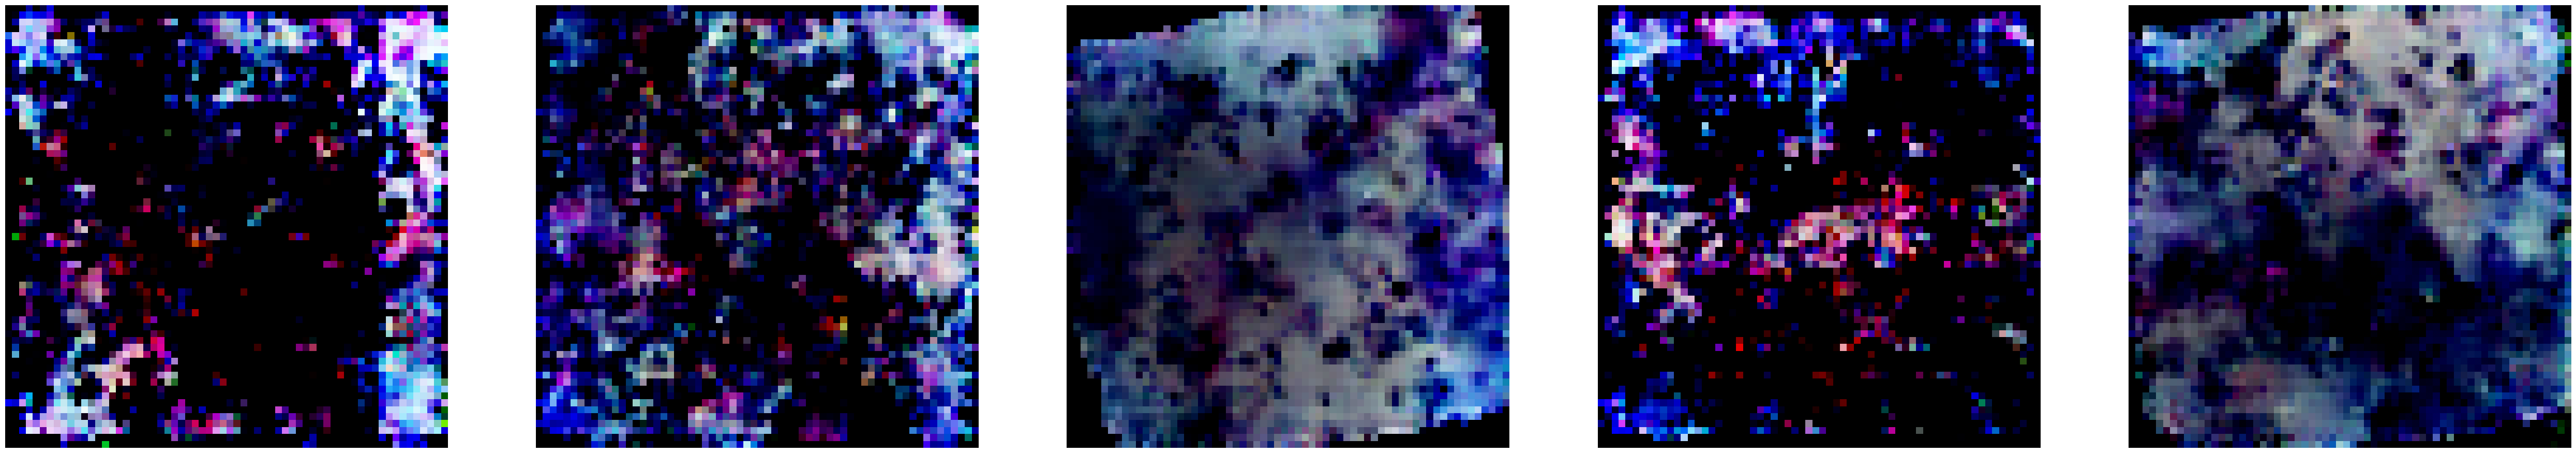

  0%|          | 0/41 [00:00<?, ?it/s]

[1402/2750][20/41] Loss_D: 0.4227 Loss_G: 3.6674 D(x): 0.8796 D(G(z)): 0.0720 / 0.0266
[1402/2750][40/41] Loss_D: 0.4277 Loss_G: 3.9127 D(x): 0.8912 D(G(z)): 0.0761 / 0.0180


  0%|          | 0/41 [00:00<?, ?it/s]

[1403/2750][20/41] Loss_D: 0.4792 Loss_G: 3.3744 D(x): 0.8877 D(G(z)): 0.0847 / 0.0367
[1403/2750][40/41] Loss_D: 0.3554 Loss_G: 5.1752 D(x): 0.8875 D(G(z)): 0.0150 / 0.0081


  0%|          | 0/41 [00:00<?, ?it/s]

[1404/2750][20/41] Loss_D: 0.5343 Loss_G: 4.1169 D(x): 0.8870 D(G(z)): 0.1098 / 0.0167
[1404/2750][40/41] Loss_D: 0.4472 Loss_G: 4.7111 D(x): 0.8338 D(G(z)): 0.0093 / 0.0102


  0%|          | 0/41 [00:00<?, ?it/s]

[1405/2750][20/41] Loss_D: 0.5692 Loss_G: 5.9993 D(x): 0.7013 D(G(z)): 0.0242 / 0.0061
[1405/2750][40/41] Loss_D: 0.5052 Loss_G: 5.0355 D(x): 0.9413 D(G(z)): 0.1283 / 0.0080


  0%|          | 0/41 [00:00<?, ?it/s]

[1406/2750][20/41] Loss_D: 0.4874 Loss_G: 3.1959 D(x): 0.9356 D(G(z)): 0.0670 / 0.0397
[1406/2750][40/41] Loss_D: 0.3963 Loss_G: 4.0572 D(x): 0.8886 D(G(z)): 0.0464 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[1407/2750][20/41] Loss_D: 0.7221 Loss_G: 3.8312 D(x): 0.8236 D(G(z)): 0.2233 / 0.0334
[1407/2750][40/41] Loss_D: 0.4678 Loss_G: 4.0066 D(x): 0.8953 D(G(z)): 0.1150 / 0.0176


  0%|          | 0/41 [00:00<?, ?it/s]

[1408/2750][20/41] Loss_D: 0.9293 Loss_G: 4.2350 D(x): 0.9489 D(G(z)): 0.3849 / 0.0177
[1408/2750][40/41] Loss_D: 0.3562 Loss_G: 5.1643 D(x): 0.8851 D(G(z)): 0.0122 / 0.0056


  0%|          | 0/41 [00:00<?, ?it/s]

[1409/2750][20/41] Loss_D: 0.3595 Loss_G: 4.9382 D(x): 0.8878 D(G(z)): 0.0076 / 0.0059
[1409/2750][40/41] Loss_D: 0.5215 Loss_G: 5.0078 D(x): 0.7629 D(G(z)): 0.0154 / 0.0106


  0%|          | 0/41 [00:00<?, ?it/s]

[1410/2750][20/41] Loss_D: 0.8308 Loss_G: 4.4786 D(x): 0.9758 D(G(z)): 0.2921 / 0.0114
[1410/2750][40/41] Loss_D: 0.4937 Loss_G: 3.4622 D(x): 0.7271 D(G(z)): 0.0188 / 0.0420


  0%|          | 0/41 [00:00<?, ?it/s]

[1411/2750][20/41] Loss_D: 0.6640 Loss_G: 3.0979 D(x): 0.9588 D(G(z)): 0.1935 / 0.0440
[1411/2750][40/41] Loss_D: 0.4675 Loss_G: 3.6212 D(x): 0.8991 D(G(z)): 0.0927 / 0.0270


  0%|          | 0/41 [00:00<?, ?it/s]

[1412/2750][20/41] Loss_D: 0.4019 Loss_G: 4.3704 D(x): 0.9091 D(G(z)): 0.0338 / 0.0156
[1412/2750][40/41] Loss_D: 0.5356 Loss_G: 3.5576 D(x): 0.8394 D(G(z)): 0.1053 / 0.0284


  0%|          | 0/41 [00:00<?, ?it/s]

[1413/2750][20/41] Loss_D: 1.0952 Loss_G: 3.0543 D(x): 0.9613 D(G(z)): 0.4380 / 0.0538
[1413/2750][40/41] Loss_D: 0.4703 Loss_G: 3.5908 D(x): 0.8646 D(G(z)): 0.0951 / 0.0264


  0%|          | 0/41 [00:00<?, ?it/s]

[1414/2750][20/41] Loss_D: 0.3823 Loss_G: 4.5845 D(x): 0.8639 D(G(z)): 0.0227 / 0.0100
[1414/2750][40/41] Loss_D: 0.5182 Loss_G: 2.8617 D(x): 0.9182 D(G(z)): 0.0970 / 0.0536


  0%|          | 0/41 [00:00<?, ?it/s]

[1415/2750][20/41] Loss_D: 0.6872 Loss_G: 3.2415 D(x): 0.6338 D(G(z)): 0.0196 / 0.0484
[1415/2750][40/41] Loss_D: 0.4378 Loss_G: 4.0623 D(x): 0.8393 D(G(z)): 0.0296 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[1416/2750][20/41] Loss_D: 0.4528 Loss_G: 3.3721 D(x): 0.9406 D(G(z)): 0.0450 / 0.0359
[1416/2750][40/41] Loss_D: 0.3718 Loss_G: 4.6398 D(x): 0.8785 D(G(z)): 0.0161 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[1417/2750][20/41] Loss_D: 0.6314 Loss_G: 3.1461 D(x): 0.9451 D(G(z)): 0.2092 / 0.0560
[1417/2750][40/41] Loss_D: 0.3684 Loss_G: 3.9388 D(x): 0.8633 D(G(z)): 0.0185 / 0.0182


  0%|          | 0/41 [00:00<?, ?it/s]

[1418/2750][20/41] Loss_D: 0.4122 Loss_G: 3.7790 D(x): 0.9250 D(G(z)): 0.0542 / 0.0222
[1418/2750][40/41] Loss_D: 0.3512 Loss_G: 6.7248 D(x): 0.9318 D(G(z)): 0.0047 / 0.0013


  0%|          | 0/41 [00:00<?, ?it/s]

[1419/2750][20/41] Loss_D: 1.5703 Loss_G: 4.6458 D(x): 0.9591 D(G(z)): 0.5973 / 0.0122
[1419/2750][40/41] Loss_D: 0.6481 Loss_G: 3.6690 D(x): 0.6845 D(G(z)): 0.0267 / 0.0314


  0%|          | 0/41 [00:00<?, ?it/s]

[1420/2750][20/41] Loss_D: 0.4878 Loss_G: 3.8997 D(x): 0.7834 D(G(z)): 0.0477 / 0.0194
[1420/2750][40/41] Loss_D: 0.4117 Loss_G: 4.8673 D(x): 0.8971 D(G(z)): 0.0159 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[1421/2750][20/41] Loss_D: 0.4359 Loss_G: 3.7522 D(x): 0.8862 D(G(z)): 0.0841 / 0.0287
[1421/2750][40/41] Loss_D: 0.3733 Loss_G: 4.3842 D(x): 0.8506 D(G(z)): 0.0166 / 0.0128


  0%|          | 0/41 [00:00<?, ?it/s]

[1422/2750][20/41] Loss_D: 0.5722 Loss_G: 4.6819 D(x): 0.7831 D(G(z)): 0.0858 / 0.0239
[1422/2750][40/41] Loss_D: 0.4792 Loss_G: 3.4785 D(x): 0.9204 D(G(z)): 0.1121 / 0.0277


  0%|          | 0/41 [00:00<?, ?it/s]

[1423/2750][20/41] Loss_D: 0.5132 Loss_G: 3.9393 D(x): 0.9198 D(G(z)): 0.0987 / 0.0164
[1423/2750][40/41] Loss_D: 0.9080 Loss_G: 2.6199 D(x): 0.5942 D(G(z)): 0.0479 / 0.1050


  0%|          | 0/41 [00:00<?, ?it/s]

[1424/2750][20/41] Loss_D: 0.3922 Loss_G: 4.1098 D(x): 0.9219 D(G(z)): 0.0507 / 0.0182
[1424/2750][40/41] Loss_D: 0.3443 Loss_G: 4.9566 D(x): 0.8934 D(G(z)): 0.0118 / 0.0078


  0%|          | 0/41 [00:00<?, ?it/s]

[1425/2750][20/41] Loss_D: 0.4479 Loss_G: 3.7498 D(x): 0.8973 D(G(z)): 0.0503 / 0.0264
[1425/2750][40/41] Loss_D: 0.4535 Loss_G: 4.3770 D(x): 0.8521 D(G(z)): 0.0208 / 0.0149


  0%|          | 0/41 [00:00<?, ?it/s]

[1426/2750][20/41] Loss_D: 0.4173 Loss_G: 3.5802 D(x): 0.9371 D(G(z)): 0.0466 / 0.0446
[1426/2750][40/41] Loss_D: 0.4021 Loss_G: 3.9835 D(x): 0.8988 D(G(z)): 0.0564 / 0.0163


  0%|          | 0/41 [00:00<?, ?it/s]

[1427/2750][20/41] Loss_D: 0.5846 Loss_G: 3.8142 D(x): 0.9488 D(G(z)): 0.1875 / 0.0193
[1427/2750][40/41] Loss_D: 0.6528 Loss_G: 3.1338 D(x): 0.9398 D(G(z)): 0.2303 / 0.0547


  0%|          | 0/41 [00:00<?, ?it/s]

[1428/2750][20/41] Loss_D: 0.7191 Loss_G: 3.2458 D(x): 0.6388 D(G(z)): 0.0155 / 0.0427
[1428/2750][40/41] Loss_D: 0.3997 Loss_G: 3.1099 D(x): 0.9072 D(G(z)): 0.0628 / 0.0482


  0%|          | 0/41 [00:00<?, ?it/s]

[1429/2750][20/41] Loss_D: 0.8350 Loss_G: 2.6113 D(x): 0.5692 D(G(z)): 0.1024 / 0.0894
[1429/2750][40/41] Loss_D: 0.3616 Loss_G: 5.2101 D(x): 0.8667 D(G(z)): 0.0119 / 0.0071


  0%|          | 0/41 [00:00<?, ?it/s]

[1430/2750][20/41] Loss_D: 0.6400 Loss_G: 3.3323 D(x): 0.6324 D(G(z)): 0.0094 / 0.0387
[1430/2750][40/41] Loss_D: 0.4901 Loss_G: 4.2756 D(x): 0.7935 D(G(z)): 0.0333 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[1431/2750][20/41] Loss_D: 0.4823 Loss_G: 4.0779 D(x): 0.8040 D(G(z)): 0.0412 / 0.0211
[1431/2750][40/41] Loss_D: 0.6187 Loss_G: 4.6875 D(x): 0.9458 D(G(z)): 0.2007 / 0.0082


  0%|          | 0/41 [00:00<?, ?it/s]

[1432/2750][20/41] Loss_D: 0.4928 Loss_G: 3.7287 D(x): 0.7735 D(G(z)): 0.0342 / 0.0286
[1432/2750][40/41] Loss_D: 0.4724 Loss_G: 3.8895 D(x): 0.8046 D(G(z)): 0.0219 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[1433/2750][20/41] Loss_D: 0.4568 Loss_G: 4.0692 D(x): 0.9089 D(G(z)): 0.0494 / 0.0194
[1433/2750][40/41] Loss_D: 0.4491 Loss_G: 3.4873 D(x): 0.8454 D(G(z)): 0.0658 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[1434/2750][20/41] Loss_D: 0.5056 Loss_G: 3.8397 D(x): 0.9474 D(G(z)): 0.1188 / 0.0269
[1434/2750][40/41] Loss_D: 0.3718 Loss_G: 4.4062 D(x): 0.8936 D(G(z)): 0.0211 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[1435/2750][20/41] Loss_D: 0.4020 Loss_G: 3.8854 D(x): 0.8966 D(G(z)): 0.0487 / 0.0225
[1435/2750][40/41] Loss_D: 1.0763 Loss_G: 2.8004 D(x): 0.4309 D(G(z)): 0.0121 / 0.0768


  0%|          | 0/41 [00:00<?, ?it/s]

[1436/2750][20/41] Loss_D: 0.5123 Loss_G: 4.2751 D(x): 0.8000 D(G(z)): 0.0154 / 0.0248
[1436/2750][40/41] Loss_D: 0.5276 Loss_G: 2.6208 D(x): 0.9419 D(G(z)): 0.1505 / 0.0856


  0%|          | 0/41 [00:00<?, ?it/s]

[1437/2750][20/41] Loss_D: 0.4830 Loss_G: 3.5354 D(x): 0.8805 D(G(z)): 0.0706 / 0.0321
[1437/2750][40/41] Loss_D: 0.4462 Loss_G: 3.8546 D(x): 0.8841 D(G(z)): 0.0541 / 0.0265


  0%|          | 0/41 [00:00<?, ?it/s]

[1438/2750][20/41] Loss_D: 0.4094 Loss_G: 4.1914 D(x): 0.8324 D(G(z)): 0.0270 / 0.0191
[1438/2750][40/41] Loss_D: 0.4572 Loss_G: 3.6319 D(x): 0.8222 D(G(z)): 0.0433 / 0.0310


  0%|          | 0/41 [00:00<?, ?it/s]

[1439/2750][20/41] Loss_D: 0.4684 Loss_G: 4.2949 D(x): 0.9329 D(G(z)): 0.0596 / 0.0153
[1439/2750][40/41] Loss_D: 0.4381 Loss_G: 3.5324 D(x): 0.8647 D(G(z)): 0.0779 / 0.0316


  0%|          | 0/41 [00:00<?, ?it/s]

[1440/2750][20/41] Loss_D: 0.5817 Loss_G: 3.4615 D(x): 0.9835 D(G(z)): 0.0688 / 0.0326
[1440/2750][40/41] Loss_D: 0.4284 Loss_G: 4.2741 D(x): 0.8326 D(G(z)): 0.0198 / 0.0150


  0%|          | 0/41 [00:00<?, ?it/s]

[1441/2750][20/41] Loss_D: 0.4972 Loss_G: 3.4325 D(x): 0.9066 D(G(z)): 0.1087 / 0.0300
[1441/2750][40/41] Loss_D: 0.5131 Loss_G: 3.4679 D(x): 0.7464 D(G(z)): 0.0428 / 0.0300


  0%|          | 0/41 [00:00<?, ?it/s]

[1442/2750][20/41] Loss_D: 0.4105 Loss_G: 4.0920 D(x): 0.8546 D(G(z)): 0.0213 / 0.0152
[1442/2750][40/41] Loss_D: 0.3681 Loss_G: 4.6587 D(x): 0.9167 D(G(z)): 0.0147 / 0.0102


  0%|          | 0/41 [00:00<?, ?it/s]

[1443/2750][20/41] Loss_D: 0.3574 Loss_G: 5.4193 D(x): 0.9311 D(G(z)): 0.0068 / 0.0043
[1443/2750][40/41] Loss_D: 0.3976 Loss_G: 3.7562 D(x): 0.8979 D(G(z)): 0.0503 / 0.0197


  0%|          | 0/41 [00:00<?, ?it/s]

[1444/2750][20/41] Loss_D: 0.4714 Loss_G: 3.0089 D(x): 0.9139 D(G(z)): 0.1110 / 0.0572
[1444/2750][40/41] Loss_D: 0.4017 Loss_G: 3.9306 D(x): 0.9364 D(G(z)): 0.0426 / 0.0258


  0%|          | 0/41 [00:00<?, ?it/s]

[1445/2750][20/41] Loss_D: 0.8541 Loss_G: 3.6768 D(x): 0.9496 D(G(z)): 0.3026 / 0.0288
[1445/2750][40/41] Loss_D: 0.4864 Loss_G: 3.7457 D(x): 0.9187 D(G(z)): 0.0564 / 0.0249


  0%|          | 0/41 [00:00<?, ?it/s]

[1446/2750][20/41] Loss_D: 0.3920 Loss_G: 3.6070 D(x): 0.8814 D(G(z)): 0.0520 / 0.0290
[1446/2750][40/41] Loss_D: 0.3742 Loss_G: 4.3119 D(x): 0.9072 D(G(z)): 0.0323 / 0.0141


  0%|          | 0/41 [00:00<?, ?it/s]

[1447/2750][20/41] Loss_D: 0.4144 Loss_G: 3.1112 D(x): 0.8958 D(G(z)): 0.0673 / 0.0556
[1447/2750][40/41] Loss_D: 0.5055 Loss_G: 3.2219 D(x): 0.9494 D(G(z)): 0.0929 / 0.0439


  0%|          | 0/41 [00:00<?, ?it/s]

[1448/2750][20/41] Loss_D: 0.7001 Loss_G: 3.6900 D(x): 0.8869 D(G(z)): 0.0494 / 0.0253
[1448/2750][40/41] Loss_D: 0.3658 Loss_G: 4.4197 D(x): 0.8816 D(G(z)): 0.0217 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[1449/2750][20/41] Loss_D: 0.4099 Loss_G: 4.3137 D(x): 0.8593 D(G(z)): 0.0519 / 0.0124
[1449/2750][40/41] Loss_D: 0.3893 Loss_G: 4.2323 D(x): 0.8862 D(G(z)): 0.0426 / 0.0154


  0%|          | 0/41 [00:00<?, ?it/s]

[1450/2750][20/41] Loss_D: 0.3605 Loss_G: 4.9389 D(x): 0.9034 D(G(z)): 0.0148 / 0.0095
[1450/2750][40/41] Loss_D: 0.5341 Loss_G: 3.2994 D(x): 0.9305 D(G(z)): 0.1658 / 0.0391


  0%|          | 0/41 [00:00<?, ?it/s]

[1451/2750][20/41] Loss_D: 0.3531 Loss_G: 5.1746 D(x): 0.8724 D(G(z)): 0.0080 / 0.0064
[1451/2750][40/41] Loss_D: 0.4122 Loss_G: 4.0346 D(x): 0.8584 D(G(z)): 0.0512 / 0.0213


  0%|          | 0/41 [00:00<?, ?it/s]

[1452/2750][20/41] Loss_D: 0.4238 Loss_G: 4.8404 D(x): 0.9345 D(G(z)): 0.0205 / 0.0090
[1452/2750][40/41] Loss_D: 0.6838 Loss_G: 3.8716 D(x): 0.6200 D(G(z)): 0.0304 / 0.0323


  0%|          | 0/41 [00:00<?, ?it/s]

[1453/2750][20/41] Loss_D: 0.6007 Loss_G: 3.9044 D(x): 0.7398 D(G(z)): 0.0211 / 0.0245
[1453/2750][40/41] Loss_D: 0.4007 Loss_G: 4.0547 D(x): 0.9019 D(G(z)): 0.0481 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[1454/2750][20/41] Loss_D: 0.7611 Loss_G: 3.3234 D(x): 0.5755 D(G(z)): 0.0264 / 0.0413
[1454/2750][40/41] Loss_D: 0.4340 Loss_G: 3.8781 D(x): 0.8391 D(G(z)): 0.0203 / 0.0215


  0%|          | 0/41 [00:00<?, ?it/s]

[1455/2750][20/41] Loss_D: 0.6052 Loss_G: 2.8488 D(x): 0.6452 D(G(z)): 0.0245 / 0.0815
[1455/2750][40/41] Loss_D: 0.3510 Loss_G: 5.1067 D(x): 0.8880 D(G(z)): 0.0093 / 0.0049


  0%|          | 0/41 [00:00<?, ?it/s]

[1456/2750][20/41] Loss_D: 0.5369 Loss_G: 4.4842 D(x): 0.8973 D(G(z)): 0.1582 / 0.0152
[1456/2750][40/41] Loss_D: 0.3499 Loss_G: 4.8003 D(x): 0.8683 D(G(z)): 0.0096 / 0.0077


  0%|          | 0/41 [00:00<?, ?it/s]

[1457/2750][20/41] Loss_D: 0.3719 Loss_G: 4.9954 D(x): 0.9086 D(G(z)): 0.0150 / 0.0072
[1457/2750][40/41] Loss_D: 0.7705 Loss_G: 4.0234 D(x): 0.9225 D(G(z)): 0.2766 / 0.0230


  0%|          | 0/41 [00:00<?, ?it/s]

[1458/2750][20/41] Loss_D: 0.6507 Loss_G: 2.5640 D(x): 0.8012 D(G(z)): 0.1896 / 0.1070
[1458/2750][40/41] Loss_D: 0.4263 Loss_G: 4.2996 D(x): 0.9250 D(G(z)): 0.0747 / 0.0162


  0%|          | 0/41 [00:00<?, ?it/s]

[1459/2750][20/41] Loss_D: 0.4017 Loss_G: 4.2939 D(x): 0.9072 D(G(z)): 0.0601 / 0.0172
[1459/2750][40/41] Loss_D: 0.4051 Loss_G: 3.4207 D(x): 0.9084 D(G(z)): 0.0631 / 0.0455


  0%|          | 0/41 [00:00<?, ?it/s]

[1460/2750][20/41] Loss_D: 0.3401 Loss_G: 5.1004 D(x): 0.9087 D(G(z)): 0.0078 / 0.0058
[1460/2750][40/41] Loss_D: 0.4565 Loss_G: 3.9133 D(x): 0.9074 D(G(z)): 0.0839 / 0.0304


  0%|          | 0/41 [00:00<?, ?it/s]

[1461/2750][20/41] Loss_D: 0.3745 Loss_G: 4.4092 D(x): 0.9082 D(G(z)): 0.0339 / 0.0158
[1461/2750][40/41] Loss_D: 0.3612 Loss_G: 5.0929 D(x): 0.8506 D(G(z)): 0.0082 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[1462/2750][20/41] Loss_D: 0.8207 Loss_G: 2.4052 D(x): 0.5526 D(G(z)): 0.0307 / 0.1197
[1462/2750][40/41] Loss_D: 0.4634 Loss_G: 3.1632 D(x): 0.9380 D(G(z)): 0.0924 / 0.0389


  0%|          | 0/41 [00:00<?, ?it/s]

[1463/2750][20/41] Loss_D: 0.3660 Loss_G: 4.8169 D(x): 0.9035 D(G(z)): 0.0237 / 0.0093
[1463/2750][40/41] Loss_D: 0.4428 Loss_G: 4.1848 D(x): 0.9430 D(G(z)): 0.0768 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[1464/2750][20/41] Loss_D: 0.4226 Loss_G: 3.2748 D(x): 0.8827 D(G(z)): 0.0746 / 0.0403
[1464/2750][40/41] Loss_D: 0.4008 Loss_G: 3.4900 D(x): 0.9077 D(G(z)): 0.0567 / 0.0394


  0%|          | 0/41 [00:00<?, ?it/s]

[1465/2750][20/41] Loss_D: 0.5972 Loss_G: 2.7681 D(x): 0.7597 D(G(z)): 0.0826 / 0.0783
[1465/2750][40/41] Loss_D: 0.5066 Loss_G: 3.7434 D(x): 0.9137 D(G(z)): 0.1049 / 0.0303


  0%|          | 0/41 [00:00<?, ?it/s]

[1466/2750][20/41] Loss_D: 0.3425 Loss_G: 5.9927 D(x): 0.8652 D(G(z)): 0.0037 / 0.0024
[1466/2750][40/41] Loss_D: 0.9164 Loss_G: 2.7744 D(x): 0.4989 D(G(z)): 0.0162 / 0.0864


  0%|          | 0/41 [00:00<?, ?it/s]

[1467/2750][20/41] Loss_D: 0.5880 Loss_G: 2.8889 D(x): 0.6907 D(G(z)): 0.0621 / 0.0673
[1467/2750][40/41] Loss_D: 0.4839 Loss_G: 4.5065 D(x): 0.9148 D(G(z)): 0.0668 / 0.0135


  0%|          | 0/41 [00:00<?, ?it/s]

[1468/2750][20/41] Loss_D: 0.4353 Loss_G: 3.6398 D(x): 0.8918 D(G(z)): 0.0929 / 0.0257
[1468/2750][40/41] Loss_D: 0.3900 Loss_G: 4.0274 D(x): 0.9078 D(G(z)): 0.0412 / 0.0221


  0%|          | 0/41 [00:00<?, ?it/s]

[1469/2750][20/41] Loss_D: 0.5083 Loss_G: 3.5640 D(x): 0.9329 D(G(z)): 0.0846 / 0.0259
[1469/2750][40/41] Loss_D: 0.3525 Loss_G: 5.2677 D(x): 0.8632 D(G(z)): 0.0095 / 0.0062


  0%|          | 0/41 [00:00<?, ?it/s]

[1470/2750][20/41] Loss_D: 0.5692 Loss_G: 4.4187 D(x): 0.6926 D(G(z)): 0.0293 / 0.0146
[1470/2750][40/41] Loss_D: 0.7818 Loss_G: 3.5615 D(x): 0.9481 D(G(z)): 0.2933 / 0.0330


  0%|          | 0/41 [00:00<?, ?it/s]

[1471/2750][20/41] Loss_D: 0.3709 Loss_G: 4.1320 D(x): 0.8593 D(G(z)): 0.0287 / 0.0164
[1471/2750][40/41] Loss_D: 0.8998 Loss_G: 3.8478 D(x): 0.9804 D(G(z)): 0.2497 / 0.0280


  0%|          | 0/41 [00:00<?, ?it/s]

[1472/2750][20/41] Loss_D: 0.4145 Loss_G: 3.9602 D(x): 0.9241 D(G(z)): 0.0524 / 0.0188
[1472/2750][40/41] Loss_D: 0.3518 Loss_G: 4.9769 D(x): 0.8880 D(G(z)): 0.0165 / 0.0083


  0%|          | 0/41 [00:00<?, ?it/s]

[1473/2750][20/41] Loss_D: 0.3393 Loss_G: 5.1850 D(x): 0.8885 D(G(z)): 0.0061 / 0.0050
[1473/2750][40/41] Loss_D: 0.3949 Loss_G: 3.2857 D(x): 0.9323 D(G(z)): 0.0475 / 0.0342


  0%|          | 0/41 [00:00<?, ?it/s]

[1474/2750][20/41] Loss_D: 0.3796 Loss_G: 4.1770 D(x): 0.9253 D(G(z)): 0.0366 / 0.0168
[1474/2750][40/41] Loss_D: 0.3735 Loss_G: 4.7808 D(x): 0.8891 D(G(z)): 0.0291 / 0.0109


  0%|          | 0/41 [00:00<?, ?it/s]

[1475/2750][20/41] Loss_D: 0.4268 Loss_G: 3.7235 D(x): 0.9053 D(G(z)): 0.0807 / 0.0266
[1475/2750][40/41] Loss_D: 1.2606 Loss_G: 2.4631 D(x): 0.3654 D(G(z)): 0.0103 / 0.1061


  0%|          | 0/41 [00:00<?, ?it/s]

[1476/2750][20/41] Loss_D: 0.5168 Loss_G: 3.4273 D(x): 0.9304 D(G(z)): 0.1311 / 0.0309
[1476/2750][40/41] Loss_D: 1.0973 Loss_G: 3.1532 D(x): 0.3952 D(G(z)): 0.0108 / 0.0650


  0%|          | 0/41 [00:00<?, ?it/s]

[1477/2750][20/41] Loss_D: 0.6791 Loss_G: 3.9036 D(x): 0.9627 D(G(z)): 0.1544 / 0.0263
[1477/2750][40/41] Loss_D: 1.2597 Loss_G: 1.6698 D(x): 0.3745 D(G(z)): 0.0704 / 0.2138


  0%|          | 0/41 [00:00<?, ?it/s]

[1478/2750][20/41] Loss_D: 0.3565 Loss_G: 4.9215 D(x): 0.8717 D(G(z)): 0.0116 / 0.0084
[1478/2750][40/41] Loss_D: 0.9461 Loss_G: 2.8579 D(x): 0.4386 D(G(z)): 0.0098 / 0.0694


  0%|          | 0/41 [00:00<?, ?it/s]

[1479/2750][20/41] Loss_D: 0.3666 Loss_G: 4.5599 D(x): 0.9123 D(G(z)): 0.0247 / 0.0139
[1479/2750][40/41] Loss_D: 0.3727 Loss_G: 4.3028 D(x): 0.8547 D(G(z)): 0.0223 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[1480/2750][20/41] Loss_D: 1.0506 Loss_G: 2.2453 D(x): 0.4095 D(G(z)): 0.0312 / 0.1335
[1480/2750][40/41] Loss_D: 0.3895 Loss_G: 3.9826 D(x): 0.9096 D(G(z)): 0.0385 / 0.0246


  0%|          | 0/41 [00:00<?, ?it/s]

[1481/2750][20/41] Loss_D: 0.3899 Loss_G: 3.3515 D(x): 0.8886 D(G(z)): 0.0423 / 0.0527
[1481/2750][40/41] Loss_D: 0.4949 Loss_G: 3.9958 D(x): 0.8942 D(G(z)): 0.0849 / 0.0201


  0%|          | 0/41 [00:00<?, ?it/s]

[1482/2750][20/41] Loss_D: 0.3606 Loss_G: 4.4707 D(x): 0.9030 D(G(z)): 0.0179 / 0.0102
[1482/2750][40/41] Loss_D: 0.3678 Loss_G: 4.3642 D(x): 0.8865 D(G(z)): 0.0257 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[1483/2750][20/41] Loss_D: 0.5672 Loss_G: 3.6603 D(x): 0.8074 D(G(z)): 0.1127 / 0.0258
[1483/2750][40/41] Loss_D: 0.7174 Loss_G: 2.6679 D(x): 0.6202 D(G(z)): 0.0754 / 0.0820


  0%|          | 0/41 [00:00<?, ?it/s]

[1484/2750][20/41] Loss_D: 0.8403 Loss_G: 3.7055 D(x): 0.5922 D(G(z)): 0.0054 / 0.0336
[1484/2750][40/41] Loss_D: 0.5641 Loss_G: 2.2257 D(x): 0.8496 D(G(z)): 0.1109 / 0.1130


  0%|          | 0/41 [00:00<?, ?it/s]

[1485/2750][20/41] Loss_D: 0.4361 Loss_G: 3.8691 D(x): 0.9097 D(G(z)): 0.0818 / 0.0176
[1485/2750][40/41] Loss_D: 0.3839 Loss_G: 4.3238 D(x): 0.9176 D(G(z)): 0.0403 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[1486/2750][20/41] Loss_D: 0.7430 Loss_G: 3.5023 D(x): 0.5851 D(G(z)): 0.0108 / 0.0503
[1486/2750][40/41] Loss_D: 0.5063 Loss_G: 3.3657 D(x): 0.7996 D(G(z)): 0.0573 / 0.0397


  0%|          | 0/41 [00:00<?, ?it/s]

[1487/2750][20/41] Loss_D: 0.5820 Loss_G: 3.0037 D(x): 0.6940 D(G(z)): 0.0593 / 0.0590
[1487/2750][40/41] Loss_D: 0.3703 Loss_G: 4.3357 D(x): 0.8790 D(G(z)): 0.0164 / 0.0122


  0%|          | 0/41 [00:00<?, ?it/s]

[1488/2750][20/41] Loss_D: 0.7534 Loss_G: 4.2357 D(x): 0.6451 D(G(z)): 0.0226 / 0.0167
[1488/2750][40/41] Loss_D: 0.6921 Loss_G: 4.9261 D(x): 0.9050 D(G(z)): 0.2269 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[1489/2750][20/41] Loss_D: 0.3755 Loss_G: 4.5147 D(x): 0.8995 D(G(z)): 0.0309 / 0.0146
[1489/2750][40/41] Loss_D: 0.3578 Loss_G: 4.9528 D(x): 0.8549 D(G(z)): 0.0103 / 0.0069


  0%|          | 0/41 [00:00<?, ?it/s]

[1490/2750][20/41] Loss_D: 0.4785 Loss_G: 3.1887 D(x): 0.8482 D(G(z)): 0.0770 / 0.0540
[1490/2750][40/41] Loss_D: 0.4198 Loss_G: 3.1909 D(x): 0.9207 D(G(z)): 0.0616 / 0.0510


  0%|          | 0/41 [00:00<?, ?it/s]

[1491/2750][20/41] Loss_D: 0.3886 Loss_G: 3.8879 D(x): 0.8692 D(G(z)): 0.0468 / 0.0220
[1491/2750][40/41] Loss_D: 0.5293 Loss_G: 3.6643 D(x): 0.9550 D(G(z)): 0.1401 / 0.0241


  0%|          | 0/41 [00:00<?, ?it/s]

[1492/2750][20/41] Loss_D: 0.3512 Loss_G: 4.9234 D(x): 0.8723 D(G(z)): 0.0159 / 0.0103
[1492/2750][40/41] Loss_D: 0.5036 Loss_G: 3.4104 D(x): 0.9264 D(G(z)): 0.1357 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[1493/2750][20/41] Loss_D: 0.5554 Loss_G: 3.7071 D(x): 0.9380 D(G(z)): 0.1630 / 0.0449
[1493/2750][40/41] Loss_D: 0.5118 Loss_G: 3.4765 D(x): 0.9120 D(G(z)): 0.0963 / 0.0334


  0%|          | 0/41 [00:00<?, ?it/s]

[1494/2750][20/41] Loss_D: 0.3779 Loss_G: 4.8480 D(x): 0.8967 D(G(z)): 0.0313 / 0.0096
[1494/2750][40/41] Loss_D: 0.6452 Loss_G: 3.9462 D(x): 0.9243 D(G(z)): 0.2258 / 0.0242


  0%|          | 0/41 [00:00<?, ?it/s]

[1495/2750][20/41] Loss_D: 0.3734 Loss_G: 4.2827 D(x): 0.9337 D(G(z)): 0.0264 / 0.0140
[1495/2750][40/41] Loss_D: 0.7125 Loss_G: 3.1945 D(x): 0.9443 D(G(z)): 0.2307 / 0.0379


  0%|          | 0/41 [00:00<?, ?it/s]

[1496/2750][20/41] Loss_D: 0.3993 Loss_G: 3.6809 D(x): 0.8958 D(G(z)): 0.0616 / 0.0292
[1496/2750][40/41] Loss_D: 0.4709 Loss_G: 3.1539 D(x): 0.9325 D(G(z)): 0.0951 / 0.0386


  0%|          | 0/41 [00:00<?, ?it/s]

[1497/2750][20/41] Loss_D: 0.5520 Loss_G: 3.4382 D(x): 0.8075 D(G(z)): 0.0907 / 0.0356
[1497/2750][40/41] Loss_D: 0.3495 Loss_G: 5.0081 D(x): 0.8872 D(G(z)): 0.0103 / 0.0072


  0%|          | 0/41 [00:00<?, ?it/s]

[1498/2750][20/41] Loss_D: 0.3944 Loss_G: 3.8421 D(x): 0.9079 D(G(z)): 0.0555 / 0.0239
[1498/2750][40/41] Loss_D: 0.4703 Loss_G: 3.0791 D(x): 0.9098 D(G(z)): 0.1203 / 0.0472


  0%|          | 0/41 [00:00<?, ?it/s]

[1499/2750][20/41] Loss_D: 0.3686 Loss_G: 4.2087 D(x): 0.8845 D(G(z)): 0.0331 / 0.0189
[1499/2750][40/41] Loss_D: 0.5515 Loss_G: 3.6718 D(x): 0.6887 D(G(z)): 0.0198 / 0.0313


  0%|          | 0/41 [00:00<?, ?it/s]

[1500/2750][20/41] Loss_D: 0.7806 Loss_G: 2.9141 D(x): 0.5361 D(G(z)): 0.0335 / 0.0725
[1500/2750][40/41] Loss_D: 0.5653 Loss_G: 2.5841 D(x): 0.9333 D(G(z)): 0.1248 / 0.0838


  0%|          | 0/41 [00:00<?, ?it/s]

[1501/2750][20/41] Loss_D: 0.4080 Loss_G: 3.4045 D(x): 0.8875 D(G(z)): 0.0328 / 0.0281
[1501/2750][40/41] Loss_D: 0.4569 Loss_G: 3.6258 D(x): 0.9019 D(G(z)): 0.0797 / 0.0365


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99741346].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9992087].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9990713].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99934244].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999998..0.94304365].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1501.pth


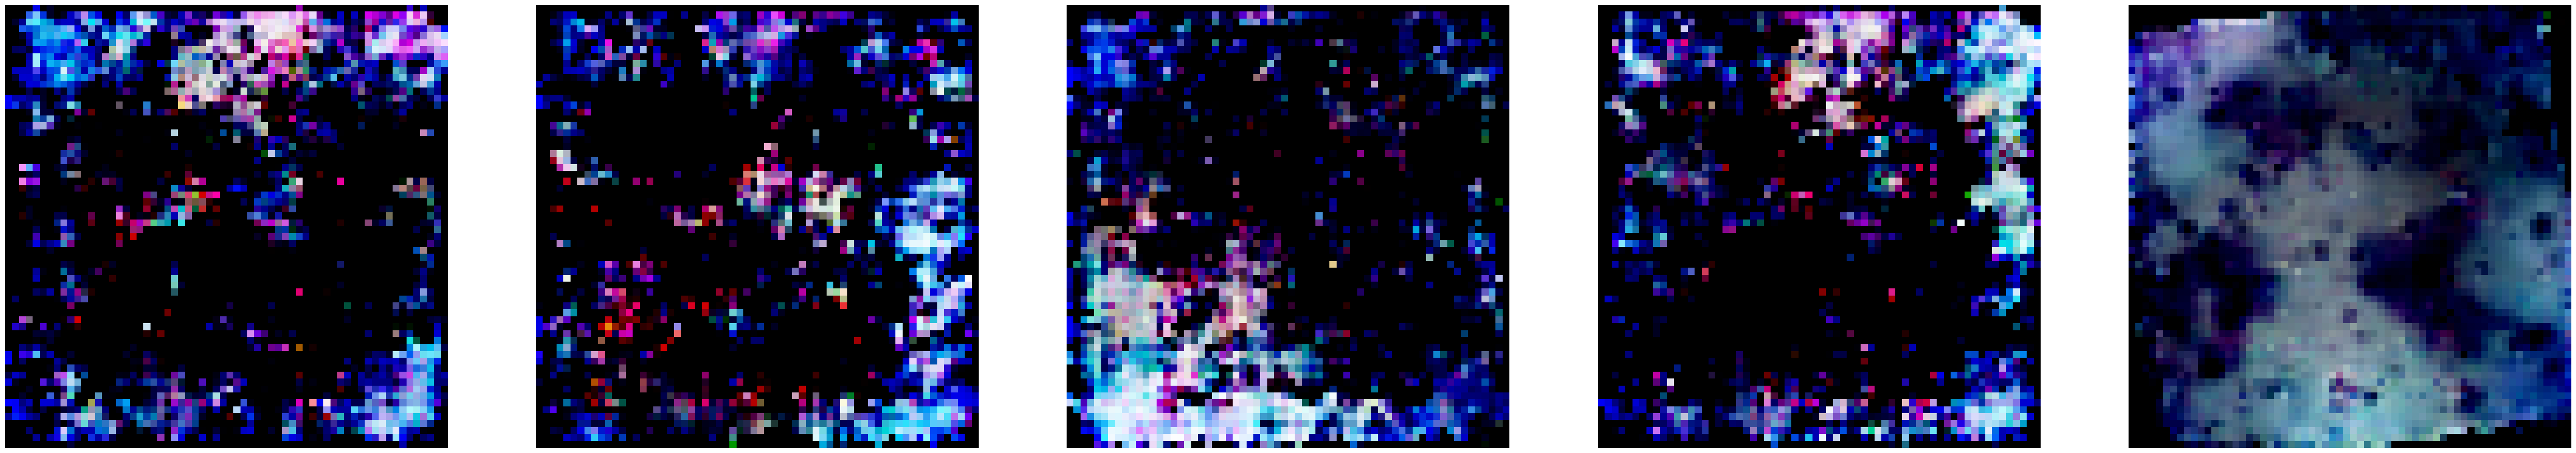

  0%|          | 0/41 [00:00<?, ?it/s]

[1502/2750][20/41] Loss_D: 0.3576 Loss_G: 5.2779 D(x): 0.9079 D(G(z)): 0.0125 / 0.0054
[1502/2750][40/41] Loss_D: 0.5579 Loss_G: 4.8003 D(x): 0.6532 D(G(z)): 0.0041 / 0.0089


  0%|          | 0/41 [00:00<?, ?it/s]

[1503/2750][20/41] Loss_D: 0.5392 Loss_G: 3.6172 D(x): 0.9532 D(G(z)): 0.1480 / 0.0252
[1503/2750][40/41] Loss_D: 0.3795 Loss_G: 4.4018 D(x): 0.9018 D(G(z)): 0.0239 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[1504/2750][20/41] Loss_D: 0.4383 Loss_G: 4.1373 D(x): 0.9342 D(G(z)): 0.0671 / 0.0288
[1504/2750][40/41] Loss_D: 0.3520 Loss_G: 4.7202 D(x): 0.8879 D(G(z)): 0.0119 / 0.0077


  0%|          | 0/41 [00:00<?, ?it/s]

[1505/2750][20/41] Loss_D: 0.3993 Loss_G: 3.7144 D(x): 0.9045 D(G(z)): 0.0586 / 0.0297
[1505/2750][40/41] Loss_D: 0.4942 Loss_G: 3.7962 D(x): 0.7688 D(G(z)): 0.0207 / 0.0256


  0%|          | 0/41 [00:00<?, ?it/s]

[1506/2750][20/41] Loss_D: 0.7549 Loss_G: 3.6536 D(x): 0.9760 D(G(z)): 0.2286 / 0.0276
[1506/2750][40/41] Loss_D: 0.8873 Loss_G: 3.0884 D(x): 0.5300 D(G(z)): 0.0337 / 0.0860


  0%|          | 0/41 [00:00<?, ?it/s]

[1507/2750][20/41] Loss_D: 0.4704 Loss_G: 4.2218 D(x): 0.8317 D(G(z)): 0.0424 / 0.0195
[1507/2750][40/41] Loss_D: 1.5429 Loss_G: 2.0947 D(x): 0.3214 D(G(z)): 0.0091 / 0.1357


  0%|          | 0/41 [00:00<?, ?it/s]

[1508/2750][20/41] Loss_D: 0.8715 Loss_G: 2.1931 D(x): 0.6038 D(G(z)): 0.1598 / 0.1418
[1508/2750][40/41] Loss_D: 0.6889 Loss_G: 2.7679 D(x): 0.6939 D(G(z)): 0.0294 / 0.0665


  0%|          | 0/41 [00:00<?, ?it/s]

[1509/2750][20/41] Loss_D: 0.3713 Loss_G: 4.6185 D(x): 0.8672 D(G(z)): 0.0195 / 0.0108
[1509/2750][40/41] Loss_D: 0.3497 Loss_G: 5.3290 D(x): 0.9028 D(G(z)): 0.0106 / 0.0081


  0%|          | 0/41 [00:00<?, ?it/s]

[1510/2750][20/41] Loss_D: 0.5022 Loss_G: 3.7629 D(x): 0.9297 D(G(z)): 0.1387 / 0.0253
[1510/2750][40/41] Loss_D: 0.3530 Loss_G: 3.9843 D(x): 0.9064 D(G(z)): 0.0216 / 0.0173


  0%|          | 0/41 [00:00<?, ?it/s]

[1511/2750][20/41] Loss_D: 0.3836 Loss_G: 3.8588 D(x): 0.9253 D(G(z)): 0.0354 / 0.0230
[1511/2750][40/41] Loss_D: 0.4181 Loss_G: 4.0252 D(x): 0.9222 D(G(z)): 0.0662 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[1512/2750][20/41] Loss_D: 0.5782 Loss_G: 3.9179 D(x): 0.9533 D(G(z)): 0.1484 / 0.0220
[1512/2750][40/41] Loss_D: 0.6508 Loss_G: 3.6826 D(x): 0.6105 D(G(z)): 0.0092 / 0.0288


  0%|          | 0/41 [00:00<?, ?it/s]

[1513/2750][20/41] Loss_D: 0.4360 Loss_G: 4.1204 D(x): 0.8941 D(G(z)): 0.0920 / 0.0197
[1513/2750][40/41] Loss_D: 0.4588 Loss_G: 3.6263 D(x): 0.9092 D(G(z)): 0.0954 / 0.0277


  0%|          | 0/41 [00:00<?, ?it/s]

[1514/2750][20/41] Loss_D: 0.3639 Loss_G: 5.1173 D(x): 0.8844 D(G(z)): 0.0147 / 0.0081
[1514/2750][40/41] Loss_D: 0.4254 Loss_G: 3.9805 D(x): 0.8814 D(G(z)): 0.0340 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[1515/2750][20/41] Loss_D: 0.3881 Loss_G: 4.8949 D(x): 0.8848 D(G(z)): 0.0257 / 0.0066
[1515/2750][40/41] Loss_D: 0.3849 Loss_G: 4.4167 D(x): 0.9215 D(G(z)): 0.0362 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[1516/2750][20/41] Loss_D: 0.4877 Loss_G: 4.1024 D(x): 0.8646 D(G(z)): 0.1044 / 0.0217
[1516/2750][40/41] Loss_D: 0.3964 Loss_G: 4.3953 D(x): 0.8559 D(G(z)): 0.0488 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[1517/2750][20/41] Loss_D: 0.3521 Loss_G: 4.5543 D(x): 0.8849 D(G(z)): 0.0152 / 0.0109
[1517/2750][40/41] Loss_D: 0.3551 Loss_G: 5.0878 D(x): 0.8733 D(G(z)): 0.0140 / 0.0081


  0%|          | 0/41 [00:00<?, ?it/s]

[1518/2750][20/41] Loss_D: 0.3739 Loss_G: 4.7652 D(x): 0.9014 D(G(z)): 0.0292 / 0.0078
[1518/2750][40/41] Loss_D: 2.1215 Loss_G: 2.0960 D(x): 0.1566 D(G(z)): 0.0051 / 0.1664


  0%|          | 0/41 [00:00<?, ?it/s]

[1519/2750][20/41] Loss_D: 0.4269 Loss_G: 3.5470 D(x): 0.9457 D(G(z)): 0.0660 / 0.0354
[1519/2750][40/41] Loss_D: 0.3737 Loss_G: 5.1317 D(x): 0.8642 D(G(z)): 0.0142 / 0.0077


  0%|          | 0/41 [00:00<?, ?it/s]

[1520/2750][20/41] Loss_D: 0.3834 Loss_G: 4.0326 D(x): 0.8940 D(G(z)): 0.0402 / 0.0181
[1520/2750][40/41] Loss_D: 0.3576 Loss_G: 5.3820 D(x): 0.8671 D(G(z)): 0.0115 / 0.0078


  0%|          | 0/41 [00:00<?, ?it/s]

[1521/2750][20/41] Loss_D: 0.3984 Loss_G: 4.1084 D(x): 0.9438 D(G(z)): 0.0470 / 0.0187
[1521/2750][40/41] Loss_D: 0.4282 Loss_G: 4.4899 D(x): 0.9029 D(G(z)): 0.0238 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[1522/2750][20/41] Loss_D: 0.8820 Loss_G: 2.3428 D(x): 0.5603 D(G(z)): 0.0629 / 0.1350
[1522/2750][40/41] Loss_D: 0.4344 Loss_G: 3.3543 D(x): 0.9199 D(G(z)): 0.0711 / 0.0318


  0%|          | 0/41 [00:00<?, ?it/s]

[1523/2750][20/41] Loss_D: 0.4764 Loss_G: 3.5405 D(x): 0.8414 D(G(z)): 0.0356 / 0.0411
[1523/2750][40/41] Loss_D: 0.3664 Loss_G: 5.0898 D(x): 0.8519 D(G(z)): 0.0123 / 0.0090


  0%|          | 0/41 [00:00<?, ?it/s]

[1524/2750][20/41] Loss_D: 0.4250 Loss_G: 4.1173 D(x): 0.8792 D(G(z)): 0.0356 / 0.0206
[1524/2750][40/41] Loss_D: 0.3698 Loss_G: 5.2824 D(x): 0.8628 D(G(z)): 0.0108 / 0.0055


  0%|          | 0/41 [00:00<?, ?it/s]

[1525/2750][20/41] Loss_D: 0.6501 Loss_G: 3.4991 D(x): 0.6808 D(G(z)): 0.0378 / 0.0383
[1525/2750][40/41] Loss_D: 0.4199 Loss_G: 2.9900 D(x): 0.9243 D(G(z)): 0.0660 / 0.0506


  0%|          | 0/41 [00:00<?, ?it/s]

[1526/2750][20/41] Loss_D: 0.4157 Loss_G: 4.0510 D(x): 0.9487 D(G(z)): 0.0553 / 0.0190
[1526/2750][40/41] Loss_D: 0.3549 Loss_G: 5.0178 D(x): 0.8790 D(G(z)): 0.0100 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[1527/2750][20/41] Loss_D: 0.3635 Loss_G: 4.5840 D(x): 0.8935 D(G(z)): 0.0158 / 0.0095
[1527/2750][40/41] Loss_D: 1.2744 Loss_G: 1.4184 D(x): 0.3445 D(G(z)): 0.0600 / 0.2748


  0%|          | 0/41 [00:00<?, ?it/s]

[1528/2750][20/41] Loss_D: 0.3846 Loss_G: 4.2808 D(x): 0.8926 D(G(z)): 0.0407 / 0.0174
[1528/2750][40/41] Loss_D: 0.6555 Loss_G: 4.0490 D(x): 0.6379 D(G(z)): 0.0240 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[1529/2750][20/41] Loss_D: 0.4488 Loss_G: 4.2834 D(x): 0.9003 D(G(z)): 0.0598 / 0.0123
[1529/2750][40/41] Loss_D: 0.5645 Loss_G: 3.0255 D(x): 0.7339 D(G(z)): 0.0621 / 0.0487


  0%|          | 0/41 [00:00<?, ?it/s]

[1530/2750][20/41] Loss_D: 0.3624 Loss_G: 4.1681 D(x): 0.8990 D(G(z)): 0.0250 / 0.0160
[1530/2750][40/41] Loss_D: 1.3545 Loss_G: 1.8972 D(x): 0.3225 D(G(z)): 0.0193 / 0.1802


  0%|          | 0/41 [00:00<?, ?it/s]

[1531/2750][20/41] Loss_D: 0.5058 Loss_G: 4.0718 D(x): 0.9689 D(G(z)): 0.0301 / 0.0170
[1531/2750][40/41] Loss_D: 0.4351 Loss_G: 4.2150 D(x): 0.9497 D(G(z)): 0.0576 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[1532/2750][20/41] Loss_D: 0.4058 Loss_G: 3.6619 D(x): 0.8449 D(G(z)): 0.0456 / 0.0311
[1532/2750][40/41] Loss_D: 1.0114 Loss_G: 3.5173 D(x): 0.5748 D(G(z)): 0.0174 / 0.0519


  0%|          | 0/41 [00:00<?, ?it/s]

[1533/2750][20/41] Loss_D: 0.5120 Loss_G: 3.5487 D(x): 0.8690 D(G(z)): 0.1009 / 0.0378
[1533/2750][40/41] Loss_D: 0.8450 Loss_G: 2.6961 D(x): 0.5013 D(G(z)): 0.0165 / 0.0735


  0%|          | 0/41 [00:00<?, ?it/s]

[1534/2750][20/41] Loss_D: 0.4124 Loss_G: 3.8890 D(x): 0.8945 D(G(z)): 0.0404 / 0.0223
[1534/2750][40/41] Loss_D: 0.3783 Loss_G: 6.1234 D(x): 0.8481 D(G(z)): 0.0062 / 0.0041


  0%|          | 0/41 [00:00<?, ?it/s]

[1535/2750][20/41] Loss_D: 0.3555 Loss_G: 4.5942 D(x): 0.9049 D(G(z)): 0.0165 / 0.0113
[1535/2750][40/41] Loss_D: 0.4029 Loss_G: 4.5452 D(x): 0.8380 D(G(z)): 0.0109 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[1536/2750][20/41] Loss_D: 0.4034 Loss_G: 4.6966 D(x): 0.8617 D(G(z)): 0.0418 / 0.0109
[1536/2750][40/41] Loss_D: 0.6010 Loss_G: 3.1207 D(x): 0.9172 D(G(z)): 0.1556 / 0.0536


  0%|          | 0/41 [00:00<?, ?it/s]

[1537/2750][20/41] Loss_D: 0.4095 Loss_G: 3.6523 D(x): 0.9361 D(G(z)): 0.0599 / 0.0271
[1537/2750][40/41] Loss_D: 0.3762 Loss_G: 4.1732 D(x): 0.8889 D(G(z)): 0.0287 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[1538/2750][20/41] Loss_D: 0.3938 Loss_G: 3.9871 D(x): 0.9072 D(G(z)): 0.0552 / 0.0235
[1538/2750][40/41] Loss_D: 0.3726 Loss_G: 4.4276 D(x): 0.9174 D(G(z)): 0.0281 / 0.0100


  0%|          | 0/41 [00:00<?, ?it/s]

[1539/2750][20/41] Loss_D: 0.4561 Loss_G: 3.9410 D(x): 0.9172 D(G(z)): 0.0900 / 0.0207
[1539/2750][40/41] Loss_D: 0.5957 Loss_G: 3.7721 D(x): 0.7097 D(G(z)): 0.0270 / 0.0378


  0%|          | 0/41 [00:00<?, ?it/s]

[1540/2750][20/41] Loss_D: 0.4881 Loss_G: 3.8849 D(x): 0.9094 D(G(z)): 0.1104 / 0.0203
[1540/2750][40/41] Loss_D: 0.4548 Loss_G: 3.6591 D(x): 0.9217 D(G(z)): 0.0954 / 0.0240


  0%|          | 0/41 [00:00<?, ?it/s]

[1541/2750][20/41] Loss_D: 0.4001 Loss_G: 3.8536 D(x): 0.8986 D(G(z)): 0.0602 / 0.0200
[1541/2750][40/41] Loss_D: 0.4489 Loss_G: 3.1286 D(x): 0.9472 D(G(z)): 0.0711 / 0.0485


  0%|          | 0/41 [00:00<?, ?it/s]

[1542/2750][20/41] Loss_D: 0.4099 Loss_G: 4.6228 D(x): 0.8927 D(G(z)): 0.0476 / 0.0100
[1542/2750][40/41] Loss_D: 0.4581 Loss_G: 3.6154 D(x): 0.8550 D(G(z)): 0.0385 / 0.0235


  0%|          | 0/41 [00:00<?, ?it/s]

[1543/2750][20/41] Loss_D: 0.6633 Loss_G: 3.5680 D(x): 0.6834 D(G(z)): 0.0203 / 0.0318
[1543/2750][40/41] Loss_D: 0.3486 Loss_G: 5.2565 D(x): 0.8981 D(G(z)): 0.0140 / 0.0070


  0%|          | 0/41 [00:00<?, ?it/s]

[1544/2750][20/41] Loss_D: 0.3561 Loss_G: 4.8711 D(x): 0.9067 D(G(z)): 0.0255 / 0.0124
[1544/2750][40/41] Loss_D: 0.5168 Loss_G: 3.4543 D(x): 0.9415 D(G(z)): 0.1014 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[1545/2750][20/41] Loss_D: 0.4708 Loss_G: 4.0337 D(x): 0.8004 D(G(z)): 0.0381 / 0.0204
[1545/2750][40/41] Loss_D: 0.3961 Loss_G: 4.4536 D(x): 0.8630 D(G(z)): 0.0378 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[1546/2750][20/41] Loss_D: 0.3908 Loss_G: 3.3399 D(x): 0.8985 D(G(z)): 0.0548 / 0.0503
[1546/2750][40/41] Loss_D: 0.3499 Loss_G: 5.2313 D(x): 0.8632 D(G(z)): 0.0126 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[1547/2750][20/41] Loss_D: 0.3632 Loss_G: 4.6142 D(x): 0.8778 D(G(z)): 0.0152 / 0.0094
[1547/2750][40/41] Loss_D: 0.8640 Loss_G: 2.8178 D(x): 0.5886 D(G(z)): 0.0547 / 0.0572


  0%|          | 0/41 [00:00<?, ?it/s]

[1548/2750][20/41] Loss_D: 0.5157 Loss_G: 3.3954 D(x): 0.8125 D(G(z)): 0.0551 / 0.0341
[1548/2750][40/41] Loss_D: 0.4241 Loss_G: 4.0629 D(x): 0.8849 D(G(z)): 0.0268 / 0.0159


  0%|          | 0/41 [00:00<?, ?it/s]

[1549/2750][20/41] Loss_D: 0.4120 Loss_G: 4.6535 D(x): 0.9332 D(G(z)): 0.0232 / 0.0100
[1549/2750][40/41] Loss_D: 0.5174 Loss_G: 3.6179 D(x): 0.7757 D(G(z)): 0.0936 / 0.0244


  0%|          | 0/41 [00:00<?, ?it/s]

[1550/2750][20/41] Loss_D: 0.3742 Loss_G: 5.4236 D(x): 0.8595 D(G(z)): 0.0048 / 0.0043
[1550/2750][40/41] Loss_D: 0.3701 Loss_G: 4.5171 D(x): 0.9210 D(G(z)): 0.0140 / 0.0090


  0%|          | 0/41 [00:00<?, ?it/s]

[1551/2750][20/41] Loss_D: 0.4480 Loss_G: 3.3014 D(x): 0.8866 D(G(z)): 0.0499 / 0.0393
[1551/2750][40/41] Loss_D: 0.9556 Loss_G: 2.5626 D(x): 0.5279 D(G(z)): 0.0681 / 0.1010


  0%|          | 0/41 [00:00<?, ?it/s]

[1552/2750][20/41] Loss_D: 0.3687 Loss_G: 5.0056 D(x): 0.8648 D(G(z)): 0.0115 / 0.0082
[1552/2750][40/41] Loss_D: 0.3656 Loss_G: 4.8322 D(x): 0.9004 D(G(z)): 0.0200 / 0.0066


  0%|          | 0/41 [00:00<?, ?it/s]

[1553/2750][20/41] Loss_D: 0.4182 Loss_G: 5.1950 D(x): 0.8818 D(G(z)): 0.0077 / 0.0044
[1553/2750][40/41] Loss_D: 0.5755 Loss_G: 2.7342 D(x): 0.7662 D(G(z)): 0.0914 / 0.0701


  0%|          | 0/41 [00:00<?, ?it/s]

[1554/2750][20/41] Loss_D: 0.6141 Loss_G: 4.0651 D(x): 0.9655 D(G(z)): 0.1214 / 0.0157
[1554/2750][40/41] Loss_D: 0.5971 Loss_G: 3.3321 D(x): 0.6447 D(G(z)): 0.0155 / 0.0400


  0%|          | 0/41 [00:00<?, ?it/s]

[1555/2750][20/41] Loss_D: 0.4013 Loss_G: 3.9699 D(x): 0.9100 D(G(z)): 0.0605 / 0.0278
[1555/2750][40/41] Loss_D: 0.4277 Loss_G: 4.5624 D(x): 0.8536 D(G(z)): 0.0292 / 0.0119


  0%|          | 0/41 [00:00<?, ?it/s]

[1556/2750][20/41] Loss_D: 0.4971 Loss_G: 3.9497 D(x): 0.9072 D(G(z)): 0.0612 / 0.0234
[1556/2750][40/41] Loss_D: 0.3774 Loss_G: 3.8437 D(x): 0.8805 D(G(z)): 0.0311 / 0.0195


  0%|          | 0/41 [00:00<?, ?it/s]

[1557/2750][20/41] Loss_D: 0.3413 Loss_G: 5.1515 D(x): 0.8864 D(G(z)): 0.0058 / 0.0046
[1557/2750][40/41] Loss_D: 0.4614 Loss_G: 4.2749 D(x): 0.7678 D(G(z)): 0.0257 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[1558/2750][20/41] Loss_D: 1.1529 Loss_G: 3.4085 D(x): 0.7272 D(G(z)): 0.4264 / 0.0398
[1558/2750][40/41] Loss_D: 0.4309 Loss_G: 4.9688 D(x): 0.9351 D(G(z)): 0.0310 / 0.0076


  0%|          | 0/41 [00:00<?, ?it/s]

[1559/2750][20/41] Loss_D: 0.4729 Loss_G: 4.2117 D(x): 0.9250 D(G(z)): 0.0785 / 0.0146
[1559/2750][40/41] Loss_D: 0.5405 Loss_G: 3.9734 D(x): 0.9537 D(G(z)): 0.1160 / 0.0195


  0%|          | 0/41 [00:00<?, ?it/s]

[1560/2750][20/41] Loss_D: 0.3958 Loss_G: 5.9456 D(x): 0.9379 D(G(z)): 0.0215 / 0.0032
[1560/2750][40/41] Loss_D: 0.5168 Loss_G: 3.9324 D(x): 0.9755 D(G(z)): 0.0595 / 0.0234


  0%|          | 0/41 [00:00<?, ?it/s]

[1561/2750][20/41] Loss_D: 0.4950 Loss_G: 4.9016 D(x): 0.7513 D(G(z)): 0.0064 / 0.0098
[1561/2750][40/41] Loss_D: 0.3739 Loss_G: 4.7328 D(x): 0.8854 D(G(z)): 0.0259 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[1562/2750][20/41] Loss_D: 0.6207 Loss_G: 4.3943 D(x): 0.9677 D(G(z)): 0.1391 / 0.0123
[1562/2750][40/41] Loss_D: 0.4622 Loss_G: 3.3043 D(x): 0.8801 D(G(z)): 0.0787 / 0.0298


  0%|          | 0/41 [00:00<?, ?it/s]

[1563/2750][20/41] Loss_D: 0.6444 Loss_G: 4.0681 D(x): 0.9281 D(G(z)): 0.1859 / 0.0243
[1563/2750][40/41] Loss_D: 0.3949 Loss_G: 4.4907 D(x): 0.9358 D(G(z)): 0.0314 / 0.0123


  0%|          | 0/41 [00:00<?, ?it/s]

[1564/2750][20/41] Loss_D: 0.3835 Loss_G: 4.9668 D(x): 0.8248 D(G(z)): 0.0134 / 0.0098
[1564/2750][40/41] Loss_D: 0.4463 Loss_G: 3.5453 D(x): 0.9495 D(G(z)): 0.0614 / 0.0333


  0%|          | 0/41 [00:00<?, ?it/s]

[1565/2750][20/41] Loss_D: 0.3959 Loss_G: 4.2253 D(x): 0.8909 D(G(z)): 0.0348 / 0.0163
[1565/2750][40/41] Loss_D: 0.5565 Loss_G: 2.8657 D(x): 0.7111 D(G(z)): 0.0429 / 0.0473


  0%|          | 0/41 [00:00<?, ?it/s]

[1566/2750][20/41] Loss_D: 0.4530 Loss_G: 4.0206 D(x): 0.9262 D(G(z)): 0.0909 / 0.0203
[1566/2750][40/41] Loss_D: 0.6244 Loss_G: 3.9475 D(x): 0.6332 D(G(z)): 0.0083 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[1567/2750][20/41] Loss_D: 0.4563 Loss_G: 2.9170 D(x): 0.9400 D(G(z)): 0.0905 / 0.0577
[1567/2750][40/41] Loss_D: 1.2652 Loss_G: 4.6574 D(x): 0.9135 D(G(z)): 0.4586 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[1568/2750][20/41] Loss_D: 1.0376 Loss_G: 4.2393 D(x): 0.9554 D(G(z)): 0.4096 / 0.0169
[1568/2750][40/41] Loss_D: 0.4363 Loss_G: 3.5998 D(x): 0.9001 D(G(z)): 0.0359 / 0.0363


  0%|          | 0/41 [00:00<?, ?it/s]

[1569/2750][20/41] Loss_D: 0.3879 Loss_G: 5.0170 D(x): 0.8211 D(G(z)): 0.0148 / 0.0065
[1569/2750][40/41] Loss_D: 0.4845 Loss_G: 3.3583 D(x): 0.7767 D(G(z)): 0.0301 / 0.0342


  0%|          | 0/41 [00:00<?, ?it/s]

[1570/2750][20/41] Loss_D: 0.5482 Loss_G: 3.6445 D(x): 0.6785 D(G(z)): 0.0152 / 0.0369
[1570/2750][40/41] Loss_D: 0.5143 Loss_G: 3.7065 D(x): 0.9164 D(G(z)): 0.1282 / 0.0287


  0%|          | 0/41 [00:00<?, ?it/s]

[1571/2750][20/41] Loss_D: 0.7223 Loss_G: 2.6347 D(x): 0.5948 D(G(z)): 0.0494 / 0.0979
[1571/2750][40/41] Loss_D: 0.3959 Loss_G: 3.5084 D(x): 0.8884 D(G(z)): 0.0564 / 0.0262


  0%|          | 0/41 [00:00<?, ?it/s]

[1572/2750][20/41] Loss_D: 0.3706 Loss_G: 4.0807 D(x): 0.9262 D(G(z)): 0.0289 / 0.0203
[1572/2750][40/41] Loss_D: 0.5338 Loss_G: 3.5194 D(x): 0.7065 D(G(z)): 0.0211 / 0.0401


  0%|          | 0/41 [00:00<?, ?it/s]

[1573/2750][20/41] Loss_D: 0.3684 Loss_G: 4.2445 D(x): 0.8970 D(G(z)): 0.0141 / 0.0142
[1573/2750][40/41] Loss_D: 1.7085 Loss_G: 1.4889 D(x): 0.3129 D(G(z)): 0.0481 / 0.2574


  0%|          | 0/41 [00:00<?, ?it/s]

[1574/2750][20/41] Loss_D: 0.5748 Loss_G: 3.9455 D(x): 0.6865 D(G(z)): 0.0110 / 0.0276
[1574/2750][40/41] Loss_D: 0.3611 Loss_G: 4.5427 D(x): 0.8697 D(G(z)): 0.0175 / 0.0113


  0%|          | 0/41 [00:00<?, ?it/s]

[1575/2750][20/41] Loss_D: 0.4286 Loss_G: 4.1622 D(x): 0.9605 D(G(z)): 0.0551 / 0.0191
[1575/2750][40/41] Loss_D: 0.3499 Loss_G: 5.1450 D(x): 0.8837 D(G(z)): 0.0077 / 0.0051


  0%|          | 0/41 [00:00<?, ?it/s]

[1576/2750][20/41] Loss_D: 0.5480 Loss_G: 4.2817 D(x): 0.7189 D(G(z)): 0.0118 / 0.0167
[1576/2750][40/41] Loss_D: 0.5734 Loss_G: 3.4359 D(x): 0.9219 D(G(z)): 0.1861 / 0.0363


  0%|          | 0/41 [00:00<?, ?it/s]

[1577/2750][20/41] Loss_D: 0.5358 Loss_G: 3.4159 D(x): 0.9599 D(G(z)): 0.0506 / 0.0372
[1577/2750][40/41] Loss_D: 0.5813 Loss_G: 2.5779 D(x): 0.9192 D(G(z)): 0.1873 / 0.0826


  0%|          | 0/41 [00:00<?, ?it/s]

[1578/2750][20/41] Loss_D: 0.7291 Loss_G: 3.1475 D(x): 0.6329 D(G(z)): 0.0321 / 0.0556
[1578/2750][40/41] Loss_D: 2.6965 Loss_G: 1.9623 D(x): 0.0885 D(G(z)): 0.0161 / 0.1825


  0%|          | 0/41 [00:00<?, ?it/s]

[1579/2750][20/41] Loss_D: 0.6245 Loss_G: 3.8480 D(x): 0.7143 D(G(z)): 0.0239 / 0.0273
[1579/2750][40/41] Loss_D: 1.0940 Loss_G: 2.1433 D(x): 0.4260 D(G(z)): 0.0142 / 0.1456


  0%|          | 0/41 [00:00<?, ?it/s]

[1580/2750][20/41] Loss_D: 0.3978 Loss_G: 3.6835 D(x): 0.9016 D(G(z)): 0.0615 / 0.0255
[1580/2750][40/41] Loss_D: 0.3532 Loss_G: 4.7217 D(x): 0.9154 D(G(z)): 0.0134 / 0.0090


  0%|          | 0/41 [00:00<?, ?it/s]

[1581/2750][20/41] Loss_D: 0.5288 Loss_G: 3.5392 D(x): 0.7268 D(G(z)): 0.0320 / 0.0325
[1581/2750][40/41] Loss_D: 0.4704 Loss_G: 6.3926 D(x): 0.9575 D(G(z)): 0.0117 / 0.0026


  0%|          | 0/41 [00:00<?, ?it/s]

[1582/2750][20/41] Loss_D: 0.4525 Loss_G: 4.5967 D(x): 0.9214 D(G(z)): 0.0340 / 0.0119
[1582/2750][40/41] Loss_D: 0.4030 Loss_G: 4.1525 D(x): 0.8848 D(G(z)): 0.0339 / 0.0164


  0%|          | 0/41 [00:00<?, ?it/s]

[1583/2750][20/41] Loss_D: 0.4184 Loss_G: 3.8336 D(x): 0.9061 D(G(z)): 0.0702 / 0.0221
[1583/2750][40/41] Loss_D: 0.4430 Loss_G: 3.1850 D(x): 0.9198 D(G(z)): 0.0856 / 0.0472


  0%|          | 0/41 [00:00<?, ?it/s]

[1584/2750][20/41] Loss_D: 0.3561 Loss_G: 5.4573 D(x): 0.9207 D(G(z)): 0.0115 / 0.0044
[1584/2750][40/41] Loss_D: 0.5804 Loss_G: 4.1576 D(x): 0.7252 D(G(z)): 0.0069 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[1585/2750][20/41] Loss_D: 1.2206 Loss_G: 2.2537 D(x): 0.3790 D(G(z)): 0.0155 / 0.1526
[1585/2750][40/41] Loss_D: 0.6445 Loss_G: 3.2610 D(x): 0.9369 D(G(z)): 0.2036 / 0.0387


  0%|          | 0/41 [00:00<?, ?it/s]

[1586/2750][20/41] Loss_D: 0.3626 Loss_G: 4.9936 D(x): 0.9166 D(G(z)): 0.0263 / 0.0109
[1586/2750][40/41] Loss_D: 0.3658 Loss_G: 4.1498 D(x): 0.8791 D(G(z)): 0.0253 / 0.0167


  0%|          | 0/41 [00:00<?, ?it/s]

[1587/2750][20/41] Loss_D: 0.4926 Loss_G: 3.8369 D(x): 0.8604 D(G(z)): 0.0637 / 0.0257
[1587/2750][40/41] Loss_D: 0.5287 Loss_G: 3.2183 D(x): 0.7399 D(G(z)): 0.0345 / 0.0470


  0%|          | 0/41 [00:00<?, ?it/s]

[1588/2750][20/41] Loss_D: 0.5078 Loss_G: 3.0150 D(x): 0.9795 D(G(z)): 0.0437 / 0.0539
[1588/2750][40/41] Loss_D: 0.5180 Loss_G: 4.1100 D(x): 0.9556 D(G(z)): 0.1220 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[1589/2750][20/41] Loss_D: 0.4700 Loss_G: 4.0014 D(x): 0.8034 D(G(z)): 0.0323 / 0.0247
[1589/2750][40/41] Loss_D: 0.5540 Loss_G: 3.3861 D(x): 0.7085 D(G(z)): 0.0164 / 0.0383


  0%|          | 0/41 [00:00<?, ?it/s]

[1590/2750][20/41] Loss_D: 0.4755 Loss_G: 3.3007 D(x): 0.8179 D(G(z)): 0.0403 / 0.0388
[1590/2750][40/41] Loss_D: 0.4859 Loss_G: 4.1157 D(x): 0.9458 D(G(z)): 0.0867 / 0.0208


  0%|          | 0/41 [00:00<?, ?it/s]

[1591/2750][20/41] Loss_D: 0.4875 Loss_G: 3.2796 D(x): 0.8695 D(G(z)): 0.0853 / 0.0401
[1591/2750][40/41] Loss_D: 0.6057 Loss_G: 3.0399 D(x): 0.9748 D(G(z)): 0.1353 / 0.0503


  0%|          | 0/41 [00:00<?, ?it/s]

[1592/2750][20/41] Loss_D: 0.3962 Loss_G: 4.2190 D(x): 0.9158 D(G(z)): 0.0236 / 0.0136
[1592/2750][40/41] Loss_D: 0.3761 Loss_G: 4.5170 D(x): 0.8872 D(G(z)): 0.0256 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[1593/2750][20/41] Loss_D: 1.1180 Loss_G: 1.9629 D(x): 0.4576 D(G(z)): 0.0966 / 0.1576
[1593/2750][40/41] Loss_D: 0.4612 Loss_G: 4.5171 D(x): 0.7656 D(G(z)): 0.0081 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[1594/2750][20/41] Loss_D: 0.3880 Loss_G: 5.0633 D(x): 0.8337 D(G(z)): 0.0230 / 0.0073
[1594/2750][40/41] Loss_D: 0.3868 Loss_G: 4.2211 D(x): 0.8629 D(G(z)): 0.0383 / 0.0149


  0%|          | 0/41 [00:00<?, ?it/s]

[1595/2750][20/41] Loss_D: 0.5719 Loss_G: 4.1916 D(x): 0.9063 D(G(z)): 0.1654 / 0.0175
[1595/2750][40/41] Loss_D: 0.4267 Loss_G: 3.9674 D(x): 0.7977 D(G(z)): 0.0192 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[1596/2750][20/41] Loss_D: 0.3811 Loss_G: 5.1573 D(x): 0.8581 D(G(z)): 0.0259 / 0.0101
[1596/2750][40/41] Loss_D: 0.6736 Loss_G: 3.0407 D(x): 0.6177 D(G(z)): 0.0343 / 0.0602


  0%|          | 0/41 [00:00<?, ?it/s]

[1597/2750][20/41] Loss_D: 0.4007 Loss_G: 4.4117 D(x): 0.8580 D(G(z)): 0.0397 / 0.0129
[1597/2750][40/41] Loss_D: 0.4418 Loss_G: 4.0803 D(x): 0.9144 D(G(z)): 0.0631 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[1598/2750][20/41] Loss_D: 0.4414 Loss_G: 4.8509 D(x): 0.8002 D(G(z)): 0.0076 / 0.0080
[1598/2750][40/41] Loss_D: 0.3478 Loss_G: 4.9313 D(x): 0.8816 D(G(z)): 0.0118 / 0.0066


  0%|          | 0/41 [00:00<?, ?it/s]

[1599/2750][20/41] Loss_D: 0.3611 Loss_G: 5.4633 D(x): 0.8714 D(G(z)): 0.0072 / 0.0044
[1599/2750][40/41] Loss_D: 0.7698 Loss_G: 4.8253 D(x): 0.5625 D(G(z)): 0.0053 / 0.0129


  0%|          | 0/41 [00:00<?, ?it/s]

[1600/2750][20/41] Loss_D: 0.3779 Loss_G: 4.1636 D(x): 0.8651 D(G(z)): 0.0331 / 0.0188
[1600/2750][40/41] Loss_D: 0.5308 Loss_G: 3.7288 D(x): 0.8921 D(G(z)): 0.1641 / 0.0262


  0%|          | 0/41 [00:00<?, ?it/s]

[1601/2750][20/41] Loss_D: 0.3973 Loss_G: 4.2901 D(x): 0.8328 D(G(z)): 0.0364 / 0.0143
[1601/2750][40/41] Loss_D: 0.4687 Loss_G: 4.4344 D(x): 0.9406 D(G(z)): 0.0665 / 0.0143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999744..0.9259158].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999958..0.8912071].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999761..0.8693983].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9943376].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9997243].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1601.pth


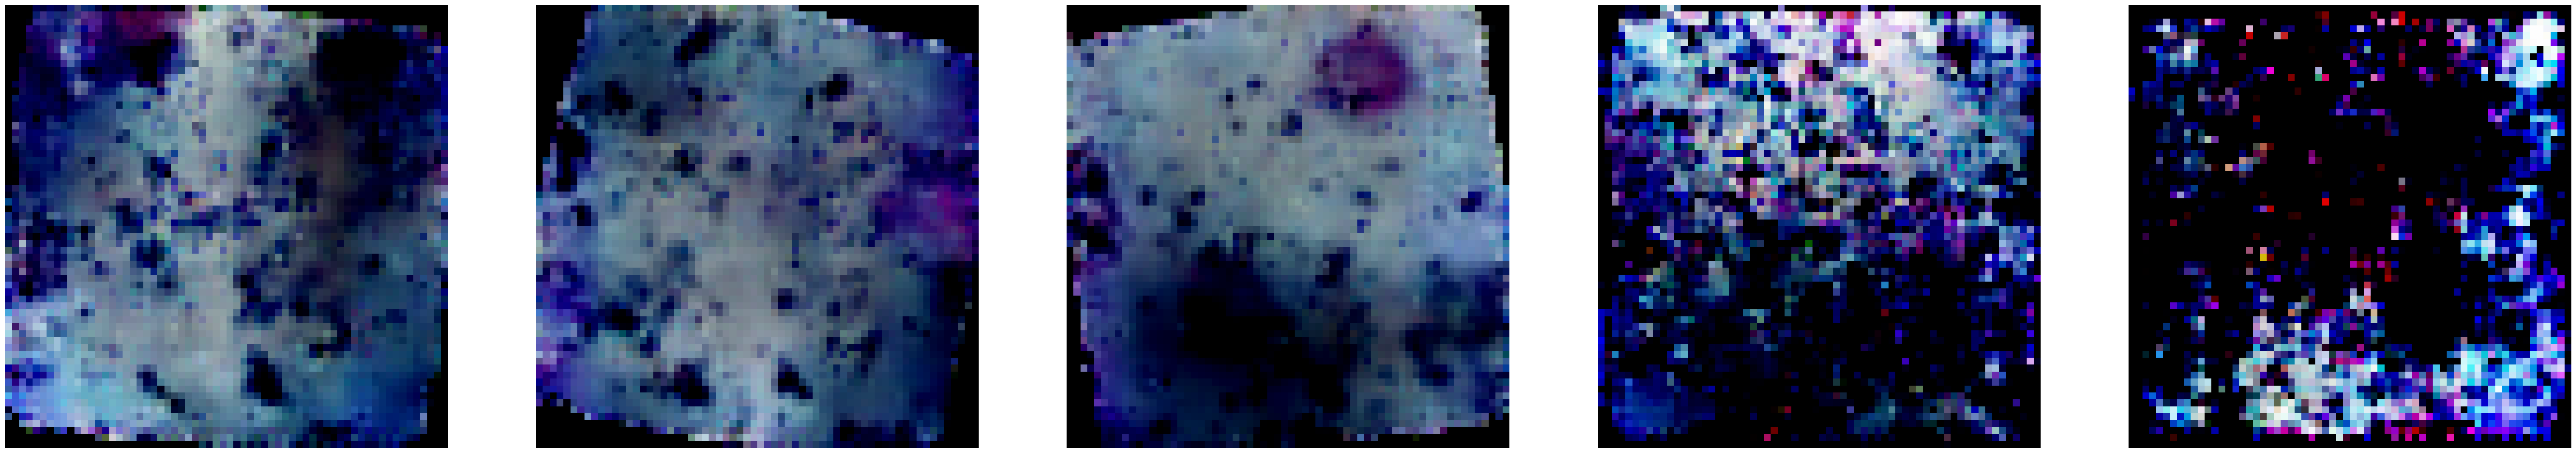

  0%|          | 0/41 [00:00<?, ?it/s]

[1602/2750][20/41] Loss_D: 0.4638 Loss_G: 4.4125 D(x): 0.8168 D(G(z)): 0.0087 / 0.0107
[1602/2750][40/41] Loss_D: 0.3620 Loss_G: 4.9256 D(x): 0.8601 D(G(z)): 0.0151 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[1603/2750][20/41] Loss_D: 0.6367 Loss_G: 3.4718 D(x): 0.6515 D(G(z)): 0.0278 / 0.0374
[1603/2750][40/41] Loss_D: 0.3614 Loss_G: 4.2339 D(x): 0.8923 D(G(z)): 0.0252 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[1604/2750][20/41] Loss_D: 0.3720 Loss_G: 4.6555 D(x): 0.8436 D(G(z)): 0.0249 / 0.0129
[1604/2750][40/41] Loss_D: 0.4049 Loss_G: 3.3877 D(x): 0.8983 D(G(z)): 0.0666 / 0.0392


  0%|          | 0/41 [00:00<?, ?it/s]

[1605/2750][20/41] Loss_D: 0.5467 Loss_G: 2.9311 D(x): 0.7791 D(G(z)): 0.0475 / 0.0569
[1605/2750][40/41] Loss_D: 0.4570 Loss_G: 3.8149 D(x): 0.8993 D(G(z)): 0.0936 / 0.0229


  0%|          | 0/41 [00:00<?, ?it/s]

[1606/2750][20/41] Loss_D: 0.6085 Loss_G: 3.4192 D(x): 0.6580 D(G(z)): 0.0234 / 0.0397
[1606/2750][40/41] Loss_D: 0.3979 Loss_G: 3.4261 D(x): 0.9225 D(G(z)): 0.0522 / 0.0332


  0%|          | 0/41 [00:00<?, ?it/s]

[1607/2750][20/41] Loss_D: 1.0611 Loss_G: 3.7167 D(x): 0.9735 D(G(z)): 0.3610 / 0.0239
[1607/2750][40/41] Loss_D: 0.5009 Loss_G: 3.7971 D(x): 0.7525 D(G(z)): 0.0256 / 0.0207


  0%|          | 0/41 [00:00<?, ?it/s]

[1608/2750][20/41] Loss_D: 0.4102 Loss_G: 3.6206 D(x): 0.8940 D(G(z)): 0.0738 / 0.0299
[1608/2750][40/41] Loss_D: 0.5355 Loss_G: 3.7404 D(x): 0.9508 D(G(z)): 0.1525 / 0.0278


  0%|          | 0/41 [00:00<?, ?it/s]

[1609/2750][20/41] Loss_D: 0.6631 Loss_G: 3.0452 D(x): 0.6354 D(G(z)): 0.0309 / 0.0533
[1609/2750][40/41] Loss_D: 0.4442 Loss_G: 4.0312 D(x): 0.8295 D(G(z)): 0.0610 / 0.0164


  0%|          | 0/41 [00:00<?, ?it/s]

[1610/2750][20/41] Loss_D: 0.7235 Loss_G: 5.2685 D(x): 0.9759 D(G(z)): 0.0084 / 0.0044
[1610/2750][40/41] Loss_D: 0.4686 Loss_G: 4.7014 D(x): 0.7372 D(G(z)): 0.0099 / 0.0197


  0%|          | 0/41 [00:00<?, ?it/s]

[1611/2750][20/41] Loss_D: 0.6823 Loss_G: 4.4259 D(x): 0.9611 D(G(z)): 0.1897 / 0.0158
[1611/2750][40/41] Loss_D: 0.4884 Loss_G: 3.6081 D(x): 0.9463 D(G(z)): 0.0936 / 0.0323


  0%|          | 0/41 [00:00<?, ?it/s]

[1612/2750][20/41] Loss_D: 0.5056 Loss_G: 3.6335 D(x): 0.7528 D(G(z)): 0.0173 / 0.0263
[1612/2750][40/41] Loss_D: 1.2021 Loss_G: 2.7101 D(x): 0.3463 D(G(z)): 0.0054 / 0.0849


  0%|          | 0/41 [00:00<?, ?it/s]

[1613/2750][20/41] Loss_D: 0.4665 Loss_G: 3.8174 D(x): 0.7760 D(G(z)): 0.0308 / 0.0251
[1613/2750][40/41] Loss_D: 0.3619 Loss_G: 4.3310 D(x): 0.9081 D(G(z)): 0.0274 / 0.0149


  0%|          | 0/41 [00:00<?, ?it/s]

[1614/2750][20/41] Loss_D: 0.4277 Loss_G: 4.2793 D(x): 0.9222 D(G(z)): 0.0261 / 0.0132
[1614/2750][40/41] Loss_D: 0.5546 Loss_G: 4.1024 D(x): 0.9063 D(G(z)): 0.1797 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[1615/2750][20/41] Loss_D: 0.4886 Loss_G: 3.7399 D(x): 0.8932 D(G(z)): 0.1280 / 0.0342
[1615/2750][40/41] Loss_D: 0.3648 Loss_G: 4.4638 D(x): 0.8781 D(G(z)): 0.0213 / 0.0130


  0%|          | 0/41 [00:00<?, ?it/s]

[1616/2750][20/41] Loss_D: 0.4435 Loss_G: 2.7300 D(x): 0.9193 D(G(z)): 0.0851 / 0.0723
[1616/2750][40/41] Loss_D: 0.5630 Loss_G: 5.3135 D(x): 0.9390 D(G(z)): 0.1338 / 0.0063


  0%|          | 0/41 [00:00<?, ?it/s]

[1617/2750][20/41] Loss_D: 0.4723 Loss_G: 4.1880 D(x): 0.8109 D(G(z)): 0.0157 / 0.0215
[1617/2750][40/41] Loss_D: 0.4545 Loss_G: 3.2253 D(x): 0.8720 D(G(z)): 0.0655 / 0.0510


  0%|          | 0/41 [00:00<?, ?it/s]

[1618/2750][20/41] Loss_D: 0.4083 Loss_G: 3.8837 D(x): 0.8989 D(G(z)): 0.0478 / 0.0218
[1618/2750][40/41] Loss_D: 0.4443 Loss_G: 4.7712 D(x): 0.7835 D(G(z)): 0.0082 / 0.0125


  0%|          | 0/41 [00:00<?, ?it/s]

[1619/2750][20/41] Loss_D: 0.5147 Loss_G: 3.1445 D(x): 0.7947 D(G(z)): 0.0429 / 0.0498
[1619/2750][40/41] Loss_D: 0.4396 Loss_G: 4.6271 D(x): 0.8649 D(G(z)): 0.0103 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[1620/2750][20/41] Loss_D: 0.4615 Loss_G: 4.1940 D(x): 0.7849 D(G(z)): 0.0151 / 0.0200
[1620/2750][40/41] Loss_D: 0.5905 Loss_G: 4.5507 D(x): 0.9546 D(G(z)): 0.1595 / 0.0161


  0%|          | 0/41 [00:00<?, ?it/s]

[1621/2750][20/41] Loss_D: 0.6075 Loss_G: 3.4520 D(x): 0.9736 D(G(z)): 0.1310 / 0.0347
[1621/2750][40/41] Loss_D: 0.4251 Loss_G: 5.0476 D(x): 0.9463 D(G(z)): 0.0281 / 0.0080


  0%|          | 0/41 [00:00<?, ?it/s]

[1622/2750][20/41] Loss_D: 0.5106 Loss_G: 3.1351 D(x): 0.8993 D(G(z)): 0.1164 / 0.0384
[1622/2750][40/41] Loss_D: 0.4334 Loss_G: 4.5208 D(x): 0.9516 D(G(z)): 0.0224 / 0.0106


  0%|          | 0/41 [00:00<?, ?it/s]

[1623/2750][20/41] Loss_D: 0.4383 Loss_G: 4.0913 D(x): 0.9492 D(G(z)): 0.0498 / 0.0176
[1623/2750][40/41] Loss_D: 0.5630 Loss_G: 3.5092 D(x): 0.9063 D(G(z)): 0.1189 / 0.0274


  0%|          | 0/41 [00:00<?, ?it/s]

[1624/2750][20/41] Loss_D: 0.6196 Loss_G: 3.1514 D(x): 0.7233 D(G(z)): 0.0464 / 0.0528
[1624/2750][40/41] Loss_D: 0.5697 Loss_G: 3.8570 D(x): 0.7108 D(G(z)): 0.0214 / 0.0265


  0%|          | 0/41 [00:00<?, ?it/s]

[1625/2750][20/41] Loss_D: 0.4024 Loss_G: 5.1297 D(x): 0.9151 D(G(z)): 0.0170 / 0.0094
[1625/2750][40/41] Loss_D: 0.3681 Loss_G: 5.7332 D(x): 0.9163 D(G(z)): 0.0036 / 0.0030


  0%|          | 0/41 [00:00<?, ?it/s]

[1626/2750][20/41] Loss_D: 0.6757 Loss_G: 3.9218 D(x): 0.9830 D(G(z)): 0.1733 / 0.0272
[1626/2750][40/41] Loss_D: 0.4564 Loss_G: 4.6193 D(x): 0.8934 D(G(z)): 0.0817 / 0.0112


  0%|          | 0/41 [00:00<?, ?it/s]

[1627/2750][20/41] Loss_D: 0.3559 Loss_G: 4.2656 D(x): 0.8650 D(G(z)): 0.0188 / 0.0149
[1627/2750][40/41] Loss_D: 0.4698 Loss_G: 3.7009 D(x): 0.7904 D(G(z)): 0.0443 / 0.0279


  0%|          | 0/41 [00:00<?, ?it/s]

[1628/2750][20/41] Loss_D: 0.5411 Loss_G: 4.0949 D(x): 0.7904 D(G(z)): 0.0255 / 0.0179
[1628/2750][40/41] Loss_D: 0.8087 Loss_G: 3.2858 D(x): 0.6366 D(G(z)): 0.0551 / 0.0589


  0%|          | 0/41 [00:00<?, ?it/s]

[1629/2750][20/41] Loss_D: 0.3772 Loss_G: 6.5115 D(x): 0.8519 D(G(z)): 0.0015 / 0.0013
[1629/2750][40/41] Loss_D: 0.6303 Loss_G: 2.8606 D(x): 0.6553 D(G(z)): 0.0280 / 0.0596


  0%|          | 0/41 [00:00<?, ?it/s]

[1630/2750][20/41] Loss_D: 0.4026 Loss_G: 3.6903 D(x): 0.8749 D(G(z)): 0.0480 / 0.0241
[1630/2750][40/41] Loss_D: 0.5811 Loss_G: 4.0456 D(x): 0.9198 D(G(z)): 0.1978 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[1631/2750][20/41] Loss_D: 0.3883 Loss_G: 4.2017 D(x): 0.9157 D(G(z)): 0.0341 / 0.0136
[1631/2750][40/41] Loss_D: 0.4761 Loss_G: 3.6035 D(x): 0.9290 D(G(z)): 0.0812 / 0.0298


  0%|          | 0/41 [00:00<?, ?it/s]

[1632/2750][20/41] Loss_D: 0.4901 Loss_G: 3.8791 D(x): 0.9669 D(G(z)): 0.0718 / 0.0204
[1632/2750][40/41] Loss_D: 0.5374 Loss_G: 3.6875 D(x): 0.8818 D(G(z)): 0.0755 / 0.0251


  0%|          | 0/41 [00:00<?, ?it/s]

[1633/2750][20/41] Loss_D: 0.4195 Loss_G: 5.4722 D(x): 0.8991 D(G(z)): 0.0256 / 0.0072
[1633/2750][40/41] Loss_D: 0.4030 Loss_G: 4.1202 D(x): 0.8717 D(G(z)): 0.0244 / 0.0180


  0%|          | 0/41 [00:00<?, ?it/s]

[1634/2750][20/41] Loss_D: 0.4763 Loss_G: 3.5802 D(x): 0.7743 D(G(z)): 0.0506 / 0.0281
[1634/2750][40/41] Loss_D: 0.4886 Loss_G: 3.3932 D(x): 0.9194 D(G(z)): 0.1007 / 0.0385


  0%|          | 0/41 [00:00<?, ?it/s]

[1635/2750][20/41] Loss_D: 0.6283 Loss_G: 5.6385 D(x): 0.6966 D(G(z)): 0.0015 / 0.0031
[1635/2750][40/41] Loss_D: 0.4111 Loss_G: 4.4165 D(x): 0.9255 D(G(z)): 0.0328 / 0.0135


  0%|          | 0/41 [00:00<?, ?it/s]

[1636/2750][20/41] Loss_D: 0.4132 Loss_G: 3.7495 D(x): 0.8495 D(G(z)): 0.0257 / 0.0208
[1636/2750][40/41] Loss_D: 0.5177 Loss_G: 5.3940 D(x): 0.7861 D(G(z)): 0.0037 / 0.0062


  0%|          | 0/41 [00:00<?, ?it/s]

[1637/2750][20/41] Loss_D: 0.7613 Loss_G: 4.1515 D(x): 0.5773 D(G(z)): 0.0069 / 0.0282
[1637/2750][40/41] Loss_D: 0.4198 Loss_G: 4.0183 D(x): 0.9124 D(G(z)): 0.0411 / 0.0209


  0%|          | 0/41 [00:00<?, ?it/s]

[1638/2750][20/41] Loss_D: 0.5525 Loss_G: 3.4106 D(x): 0.8178 D(G(z)): 0.1251 / 0.0313
[1638/2750][40/41] Loss_D: 0.7704 Loss_G: 3.7010 D(x): 0.9939 D(G(z)): 0.1619 / 0.0311


  0%|          | 0/41 [00:00<?, ?it/s]

[1639/2750][20/41] Loss_D: 0.4943 Loss_G: 3.1638 D(x): 0.8659 D(G(z)): 0.0904 / 0.0446
[1639/2750][40/41] Loss_D: 0.5464 Loss_G: 3.4312 D(x): 0.9052 D(G(z)): 0.1459 / 0.0314


  0%|          | 0/41 [00:00<?, ?it/s]

[1640/2750][20/41] Loss_D: 0.4357 Loss_G: 3.7443 D(x): 0.8467 D(G(z)): 0.0419 / 0.0253
[1640/2750][40/41] Loss_D: 0.4735 Loss_G: 3.8057 D(x): 0.8024 D(G(z)): 0.0235 / 0.0231


  0%|          | 0/41 [00:00<?, ?it/s]

[1641/2750][20/41] Loss_D: 0.5028 Loss_G: 4.7773 D(x): 0.7425 D(G(z)): 0.0050 / 0.0096
[1641/2750][40/41] Loss_D: 0.5559 Loss_G: 3.7777 D(x): 0.9554 D(G(z)): 0.1212 / 0.0253


  0%|          | 0/41 [00:00<?, ?it/s]

[1642/2750][20/41] Loss_D: 0.4413 Loss_G: 3.7791 D(x): 0.8215 D(G(z)): 0.0262 / 0.0239
[1642/2750][40/41] Loss_D: 0.3948 Loss_G: 3.6080 D(x): 0.9034 D(G(z)): 0.0388 / 0.0243


  0%|          | 0/41 [00:00<?, ?it/s]

[1643/2750][20/41] Loss_D: 0.4736 Loss_G: 3.6831 D(x): 0.9313 D(G(z)): 0.0770 / 0.0238
[1643/2750][40/41] Loss_D: 0.3525 Loss_G: 5.1987 D(x): 0.9018 D(G(z)): 0.0066 / 0.0052


  0%|          | 0/41 [00:00<?, ?it/s]

[1644/2750][20/41] Loss_D: 0.4264 Loss_G: 3.6987 D(x): 0.9414 D(G(z)): 0.0609 / 0.0235
[1644/2750][40/41] Loss_D: 0.3899 Loss_G: 4.2434 D(x): 0.9371 D(G(z)): 0.0273 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[1645/2750][20/41] Loss_D: 0.4071 Loss_G: 4.2805 D(x): 0.9075 D(G(z)): 0.0638 / 0.0119
[1645/2750][40/41] Loss_D: 0.3980 Loss_G: 4.5458 D(x): 0.7963 D(G(z)): 0.0200 / 0.0134


  0%|          | 0/41 [00:00<?, ?it/s]

[1646/2750][20/41] Loss_D: 0.4090 Loss_G: 5.2847 D(x): 0.9543 D(G(z)): 0.0203 / 0.0056
[1646/2750][40/41] Loss_D: 0.3469 Loss_G: 5.5395 D(x): 0.9049 D(G(z)): 0.0082 / 0.0047


  0%|          | 0/41 [00:00<?, ?it/s]

[1647/2750][20/41] Loss_D: 0.3571 Loss_G: 5.3929 D(x): 0.9240 D(G(z)): 0.0079 / 0.0047
[1647/2750][40/41] Loss_D: 0.5016 Loss_G: 3.1512 D(x): 0.8421 D(G(z)): 0.0515 / 0.0511


  0%|          | 0/41 [00:00<?, ?it/s]

[1648/2750][20/41] Loss_D: 0.4107 Loss_G: 4.4471 D(x): 0.9192 D(G(z)): 0.0283 / 0.0135
[1648/2750][40/41] Loss_D: 0.4395 Loss_G: 3.0173 D(x): 0.9215 D(G(z)): 0.0896 / 0.0621


  0%|          | 0/41 [00:00<?, ?it/s]

[1649/2750][20/41] Loss_D: 0.3516 Loss_G: 5.2390 D(x): 0.9001 D(G(z)): 0.0071 / 0.0058
[1649/2750][40/41] Loss_D: 0.3975 Loss_G: 4.4216 D(x): 0.9315 D(G(z)): 0.0276 / 0.0152


  0%|          | 0/41 [00:00<?, ?it/s]

[1650/2750][20/41] Loss_D: 0.3698 Loss_G: 4.4742 D(x): 0.9066 D(G(z)): 0.0241 / 0.0125
[1650/2750][40/41] Loss_D: 0.4811 Loss_G: 3.4509 D(x): 0.8817 D(G(z)): 0.0750 / 0.0296


  0%|          | 0/41 [00:00<?, ?it/s]

[1651/2750][20/41] Loss_D: 0.4435 Loss_G: 3.2736 D(x): 0.9420 D(G(z)): 0.0878 / 0.0364
[1651/2750][40/41] Loss_D: 0.3482 Loss_G: 4.8210 D(x): 0.9294 D(G(z)): 0.0111 / 0.0086


  0%|          | 0/41 [00:00<?, ?it/s]

[1652/2750][20/41] Loss_D: 0.3511 Loss_G: 4.6002 D(x): 0.9044 D(G(z)): 0.0113 / 0.0094
[1652/2750][40/41] Loss_D: 0.7335 Loss_G: 2.4143 D(x): 0.5633 D(G(z)): 0.0290 / 0.1115


  0%|          | 0/41 [00:00<?, ?it/s]

[1653/2750][20/41] Loss_D: 1.6800 Loss_G: 1.9919 D(x): 0.2468 D(G(z)): 0.0200 / 0.1894
[1653/2750][40/41] Loss_D: 0.4119 Loss_G: 4.0161 D(x): 0.8722 D(G(z)): 0.0317 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[1654/2750][20/41] Loss_D: 0.7772 Loss_G: 4.5029 D(x): 0.9580 D(G(z)): 0.2812 / 0.0095
[1654/2750][40/41] Loss_D: 0.4333 Loss_G: 4.6437 D(x): 0.8733 D(G(z)): 0.0281 / 0.0111


  0%|          | 0/41 [00:00<?, ?it/s]

[1655/2750][20/41] Loss_D: 0.4205 Loss_G: 4.5863 D(x): 0.8167 D(G(z)): 0.0167 / 0.0104
[1655/2750][40/41] Loss_D: 0.6149 Loss_G: 3.9001 D(x): 0.6200 D(G(z)): 0.0204 / 0.0266


  0%|          | 0/41 [00:00<?, ?it/s]

[1656/2750][20/41] Loss_D: 0.5743 Loss_G: 3.1184 D(x): 0.7047 D(G(z)): 0.0331 / 0.0502
[1656/2750][40/41] Loss_D: 0.4930 Loss_G: 3.1946 D(x): 0.8568 D(G(z)): 0.0621 / 0.0477


  0%|          | 0/41 [00:00<?, ?it/s]

[1657/2750][20/41] Loss_D: 0.4873 Loss_G: 4.0685 D(x): 0.9469 D(G(z)): 0.0494 / 0.0155
[1657/2750][40/41] Loss_D: 0.4161 Loss_G: 4.9989 D(x): 0.9063 D(G(z)): 0.0426 / 0.0093


  0%|          | 0/41 [00:00<?, ?it/s]

[1658/2750][20/41] Loss_D: 0.4555 Loss_G: 4.7299 D(x): 0.7442 D(G(z)): 0.0130 / 0.0128
[1658/2750][40/41] Loss_D: 0.3870 Loss_G: 4.8271 D(x): 0.9193 D(G(z)): 0.0108 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[1659/2750][20/41] Loss_D: 0.3908 Loss_G: 5.4736 D(x): 0.8544 D(G(z)): 0.0055 / 0.0036
[1659/2750][40/41] Loss_D: 0.5369 Loss_G: 2.7666 D(x): 0.8960 D(G(z)): 0.1410 / 0.0774


  0%|          | 0/41 [00:00<?, ?it/s]

[1660/2750][20/41] Loss_D: 0.5237 Loss_G: 3.6944 D(x): 0.9782 D(G(z)): 0.0637 / 0.0297
[1660/2750][40/41] Loss_D: 0.4065 Loss_G: 4.1162 D(x): 0.8525 D(G(z)): 0.0198 / 0.0248


  0%|          | 0/41 [00:00<?, ?it/s]

[1661/2750][20/41] Loss_D: 0.4278 Loss_G: 3.9349 D(x): 0.8507 D(G(z)): 0.0266 / 0.0255
[1661/2750][40/41] Loss_D: 0.4737 Loss_G: 4.0128 D(x): 0.8071 D(G(z)): 0.0321 / 0.0236


  0%|          | 0/41 [00:00<?, ?it/s]

[1662/2750][20/41] Loss_D: 0.5394 Loss_G: 3.8210 D(x): 0.9779 D(G(z)): 0.0884 / 0.0226
[1662/2750][40/41] Loss_D: 0.4333 Loss_G: 3.8565 D(x): 0.9063 D(G(z)): 0.0566 / 0.0261


  0%|          | 0/41 [00:00<?, ?it/s]

[1663/2750][20/41] Loss_D: 0.5239 Loss_G: 3.1446 D(x): 0.9651 D(G(z)): 0.1017 / 0.0437
[1663/2750][40/41] Loss_D: 0.3786 Loss_G: 5.0701 D(x): 0.8899 D(G(z)): 0.0078 / 0.0062


  0%|          | 0/41 [00:00<?, ?it/s]

[1664/2750][20/41] Loss_D: 0.3968 Loss_G: 5.3175 D(x): 0.8789 D(G(z)): 0.0075 / 0.0041
[1664/2750][40/41] Loss_D: 0.4797 Loss_G: 3.9427 D(x): 0.7732 D(G(z)): 0.0134 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[1665/2750][20/41] Loss_D: 0.5300 Loss_G: 4.1563 D(x): 0.9433 D(G(z)): 0.1389 / 0.0260
[1665/2750][40/41] Loss_D: 0.4833 Loss_G: 5.1513 D(x): 0.9556 D(G(z)): 0.0438 / 0.0066


  0%|          | 0/41 [00:00<?, ?it/s]

[1666/2750][20/41] Loss_D: 0.5242 Loss_G: 3.5185 D(x): 0.7100 D(G(z)): 0.0329 / 0.0431
[1666/2750][40/41] Loss_D: 0.4614 Loss_G: 3.6886 D(x): 0.9646 D(G(z)): 0.0737 / 0.0289


  0%|          | 0/41 [00:00<?, ?it/s]

[1667/2750][20/41] Loss_D: 0.5911 Loss_G: 3.8757 D(x): 0.9179 D(G(z)): 0.1520 / 0.0230
[1667/2750][40/41] Loss_D: 0.3834 Loss_G: 4.7298 D(x): 0.9369 D(G(z)): 0.0170 / 0.0083


  0%|          | 0/41 [00:00<?, ?it/s]

[1668/2750][20/41] Loss_D: 0.5098 Loss_G: 3.7357 D(x): 0.8767 D(G(z)): 0.0966 / 0.0248
[1668/2750][40/41] Loss_D: 0.3809 Loss_G: 4.5843 D(x): 0.8490 D(G(z)): 0.0176 / 0.0132


  0%|          | 0/41 [00:00<?, ?it/s]

[1669/2750][20/41] Loss_D: 0.3893 Loss_G: 4.5650 D(x): 0.9130 D(G(z)): 0.0366 / 0.0146
[1669/2750][40/41] Loss_D: 0.3823 Loss_G: 4.0690 D(x): 0.8935 D(G(z)): 0.0371 / 0.0178


  0%|          | 0/41 [00:00<?, ?it/s]

[1670/2750][20/41] Loss_D: 0.6125 Loss_G: 3.1822 D(x): 0.6686 D(G(z)): 0.0329 / 0.0592
[1670/2750][40/41] Loss_D: 0.4505 Loss_G: 3.8401 D(x): 0.9030 D(G(z)): 0.0259 / 0.0246


  0%|          | 0/41 [00:00<?, ?it/s]

[1671/2750][20/41] Loss_D: 1.0262 Loss_G: 2.0307 D(x): 0.4848 D(G(z)): 0.0552 / 0.1376
[1671/2750][40/41] Loss_D: 0.5879 Loss_G: 3.8062 D(x): 0.6551 D(G(z)): 0.0082 / 0.0292


  0%|          | 0/41 [00:00<?, ?it/s]

[1672/2750][20/41] Loss_D: 0.5818 Loss_G: 3.1330 D(x): 0.9412 D(G(z)): 0.1986 / 0.0519
[1672/2750][40/41] Loss_D: 0.4871 Loss_G: 4.0340 D(x): 0.8393 D(G(z)): 0.0652 / 0.0192


  0%|          | 0/41 [00:00<?, ?it/s]

[1673/2750][20/41] Loss_D: 0.3870 Loss_G: 4.1885 D(x): 0.8752 D(G(z)): 0.0421 / 0.0139
[1673/2750][40/41] Loss_D: 0.3588 Loss_G: 4.8040 D(x): 0.8683 D(G(z)): 0.0135 / 0.0086


  0%|          | 0/41 [00:00<?, ?it/s]

[1674/2750][20/41] Loss_D: 0.3674 Loss_G: 4.7413 D(x): 0.8714 D(G(z)): 0.0131 / 0.0081
[1674/2750][40/41] Loss_D: 0.4808 Loss_G: 2.7828 D(x): 0.8341 D(G(z)): 0.0899 / 0.0658


  0%|          | 0/41 [00:00<?, ?it/s]

[1675/2750][20/41] Loss_D: 0.4786 Loss_G: 4.7113 D(x): 0.8102 D(G(z)): 0.0090 / 0.0098
[1675/2750][40/41] Loss_D: 0.3985 Loss_G: 3.5871 D(x): 0.9261 D(G(z)): 0.0601 / 0.0348


  0%|          | 0/41 [00:00<?, ?it/s]

[1676/2750][20/41] Loss_D: 0.3797 Loss_G: 4.0650 D(x): 0.8693 D(G(z)): 0.0289 / 0.0165
[1676/2750][40/41] Loss_D: 0.5850 Loss_G: 3.2058 D(x): 0.6677 D(G(z)): 0.0226 / 0.0366


  0%|          | 0/41 [00:00<?, ?it/s]

[1677/2750][20/41] Loss_D: 2.0804 Loss_G: 1.4435 D(x): 0.1812 D(G(z)): 0.0699 / 0.3191
[1677/2750][40/41] Loss_D: 0.4285 Loss_G: 5.4853 D(x): 0.9021 D(G(z)): 0.0147 / 0.0063


  0%|          | 0/41 [00:00<?, ?it/s]

[1678/2750][20/41] Loss_D: 0.3932 Loss_G: 4.3734 D(x): 0.8653 D(G(z)): 0.0428 / 0.0149
[1678/2750][40/41] Loss_D: 0.6150 Loss_G: 3.5043 D(x): 0.6891 D(G(z)): 0.0333 / 0.0457


  0%|          | 0/41 [00:00<?, ?it/s]

[1679/2750][20/41] Loss_D: 0.4076 Loss_G: 4.3800 D(x): 0.8895 D(G(z)): 0.0256 / 0.0106
[1679/2750][40/41] Loss_D: 0.4238 Loss_G: 4.0847 D(x): 0.8015 D(G(z)): 0.0222 / 0.0247


  0%|          | 0/41 [00:00<?, ?it/s]

[1680/2750][20/41] Loss_D: 0.6374 Loss_G: 3.7850 D(x): 0.6108 D(G(z)): 0.0055 / 0.0210
[1680/2750][40/41] Loss_D: 0.4167 Loss_G: 4.1529 D(x): 0.8816 D(G(z)): 0.0576 / 0.0197


  0%|          | 0/41 [00:00<?, ?it/s]

[1681/2750][20/41] Loss_D: 0.3883 Loss_G: 3.8988 D(x): 0.9404 D(G(z)): 0.0339 / 0.0248
[1681/2750][40/41] Loss_D: 0.4705 Loss_G: 2.6186 D(x): 0.9226 D(G(z)): 0.1192 / 0.0767


  0%|          | 0/41 [00:00<?, ?it/s]

[1682/2750][20/41] Loss_D: 0.4490 Loss_G: 3.0641 D(x): 0.8939 D(G(z)): 0.0765 / 0.0450
[1682/2750][40/41] Loss_D: 0.5154 Loss_G: 3.3411 D(x): 0.8436 D(G(z)): 0.0781 / 0.0459


  0%|          | 0/41 [00:00<?, ?it/s]

[1683/2750][20/41] Loss_D: 0.6268 Loss_G: 3.1088 D(x): 0.7010 D(G(z)): 0.0620 / 0.0536
[1683/2750][40/41] Loss_D: 0.4033 Loss_G: 4.7043 D(x): 0.9468 D(G(z)): 0.0226 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[1684/2750][20/41] Loss_D: 0.8291 Loss_G: 2.8266 D(x): 0.4845 D(G(z)): 0.0065 / 0.0854
[1684/2750][40/41] Loss_D: 0.4599 Loss_G: 3.5969 D(x): 0.9648 D(G(z)): 0.0636 / 0.0308


  0%|          | 0/41 [00:00<?, ?it/s]

[1685/2750][20/41] Loss_D: 0.5308 Loss_G: 3.6225 D(x): 0.9604 D(G(z)): 0.1119 / 0.0250
[1685/2750][40/41] Loss_D: 0.7114 Loss_G: 3.6840 D(x): 0.5832 D(G(z)): 0.0053 / 0.0262


  0%|          | 0/41 [00:00<?, ?it/s]

[1686/2750][20/41] Loss_D: 0.3676 Loss_G: 5.3013 D(x): 0.9087 D(G(z)): 0.0112 / 0.0059
[1686/2750][40/41] Loss_D: 0.4584 Loss_G: 4.0354 D(x): 0.9320 D(G(z)): 0.0497 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[1687/2750][20/41] Loss_D: 0.4047 Loss_G: 4.8323 D(x): 0.9032 D(G(z)): 0.0125 / 0.0073
[1687/2750][40/41] Loss_D: 0.8844 Loss_G: 3.4638 D(x): 0.4555 D(G(z)): 0.0074 / 0.0449


  0%|          | 0/41 [00:00<?, ?it/s]

[1688/2750][20/41] Loss_D: 0.4146 Loss_G: 5.8712 D(x): 0.9632 D(G(z)): 0.0038 / 0.0039
[1688/2750][40/41] Loss_D: 0.4066 Loss_G: 3.8748 D(x): 0.8759 D(G(z)): 0.0353 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[1689/2750][20/41] Loss_D: 0.4553 Loss_G: 3.5706 D(x): 0.9033 D(G(z)): 0.0816 / 0.0276
[1689/2750][40/41] Loss_D: 0.4773 Loss_G: 3.7002 D(x): 0.9074 D(G(z)): 0.0469 / 0.0287


  0%|          | 0/41 [00:00<?, ?it/s]

[1690/2750][20/41] Loss_D: 0.3998 Loss_G: 4.7652 D(x): 0.8649 D(G(z)): 0.0251 / 0.0115
[1690/2750][40/41] Loss_D: 0.5459 Loss_G: 3.8987 D(x): 0.9219 D(G(z)): 0.1349 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[1691/2750][20/41] Loss_D: 0.4349 Loss_G: 4.3684 D(x): 0.9454 D(G(z)): 0.0130 / 0.0115
[1691/2750][40/41] Loss_D: 0.3894 Loss_G: 3.9519 D(x): 0.8735 D(G(z)): 0.0277 / 0.0213


  0%|          | 0/41 [00:00<?, ?it/s]

[1692/2750][20/41] Loss_D: 0.3444 Loss_G: 5.6384 D(x): 0.8942 D(G(z)): 0.0019 / 0.0032
[1692/2750][40/41] Loss_D: 0.3961 Loss_G: 4.3994 D(x): 0.9239 D(G(z)): 0.0163 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[1693/2750][20/41] Loss_D: 0.3590 Loss_G: 5.9840 D(x): 0.8636 D(G(z)): 0.0026 / 0.0024
[1693/2750][40/41] Loss_D: 0.3971 Loss_G: 4.8727 D(x): 0.8955 D(G(z)): 0.0153 / 0.0111


  0%|          | 0/41 [00:00<?, ?it/s]

[1694/2750][20/41] Loss_D: 0.5036 Loss_G: 3.9472 D(x): 0.9534 D(G(z)): 0.0407 / 0.0239
[1694/2750][40/41] Loss_D: 0.6162 Loss_G: 4.0937 D(x): 0.6176 D(G(z)): 0.0099 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[1695/2750][20/41] Loss_D: 0.4593 Loss_G: 3.3425 D(x): 0.9216 D(G(z)): 0.1064 / 0.0403
[1695/2750][40/41] Loss_D: 0.3811 Loss_G: 4.7100 D(x): 0.9102 D(G(z)): 0.0280 / 0.0110


  0%|          | 0/41 [00:00<?, ?it/s]

[1696/2750][20/41] Loss_D: 0.4725 Loss_G: 3.5266 D(x): 0.9065 D(G(z)): 0.1089 / 0.0263
[1696/2750][40/41] Loss_D: 0.5770 Loss_G: 3.7620 D(x): 0.6863 D(G(z)): 0.0607 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[1697/2750][20/41] Loss_D: 0.7268 Loss_G: 3.5494 D(x): 0.5700 D(G(z)): 0.0084 / 0.0322
[1697/2750][40/41] Loss_D: 0.4658 Loss_G: 3.0020 D(x): 0.7818 D(G(z)): 0.0486 / 0.0668


  0%|          | 0/41 [00:00<?, ?it/s]

[1698/2750][20/41] Loss_D: 0.4349 Loss_G: 3.6150 D(x): 0.9236 D(G(z)): 0.0450 / 0.0234
[1698/2750][40/41] Loss_D: 0.5814 Loss_G: 4.1296 D(x): 0.7069 D(G(z)): 0.0128 / 0.0187


  0%|          | 0/41 [00:00<?, ?it/s]

[1699/2750][20/41] Loss_D: 0.6031 Loss_G: 3.5429 D(x): 0.9895 D(G(z)): 0.0908 / 0.0285
[1699/2750][40/41] Loss_D: 0.4300 Loss_G: 4.1825 D(x): 0.8868 D(G(z)): 0.0313 / 0.0161


  0%|          | 0/41 [00:00<?, ?it/s]

[1700/2750][20/41] Loss_D: 0.4905 Loss_G: 4.1536 D(x): 0.7823 D(G(z)): 0.0273 / 0.0221
[1700/2750][40/41] Loss_D: 0.4352 Loss_G: 3.9642 D(x): 0.8358 D(G(z)): 0.0290 / 0.0236


  0%|          | 0/41 [00:00<?, ?it/s]

[1701/2750][20/41] Loss_D: 1.2394 Loss_G: 2.0702 D(x): 0.3537 D(G(z)): 0.0078 / 0.1906
[1701/2750][40/41] Loss_D: 0.4920 Loss_G: 4.2908 D(x): 0.8049 D(G(z)): 0.0287 / 0.0202


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.999994..0.9837062].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9879143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99979115..0.8008511].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999976..0.9323195].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999342..0.87134093].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1701.pth


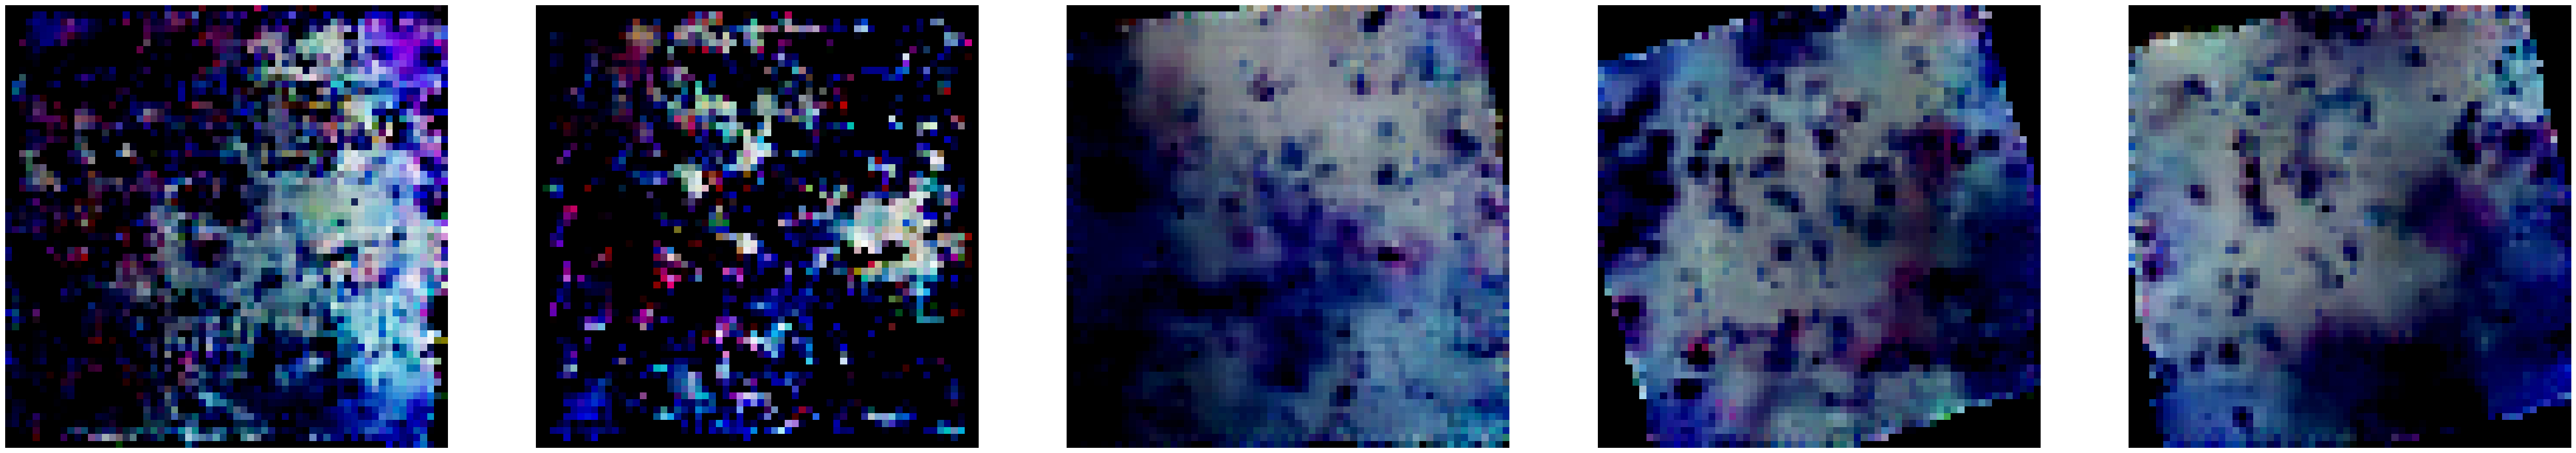

  0%|          | 0/41 [00:00<?, ?it/s]

[1702/2750][20/41] Loss_D: 0.4089 Loss_G: 4.1448 D(x): 0.8891 D(G(z)): 0.0259 / 0.0150
[1702/2750][40/41] Loss_D: 0.4685 Loss_G: 3.8007 D(x): 0.7915 D(G(z)): 0.0379 / 0.0257


  0%|          | 0/41 [00:00<?, ?it/s]

[1703/2750][20/41] Loss_D: 0.4324 Loss_G: 3.7738 D(x): 0.8185 D(G(z)): 0.0313 / 0.0278
[1703/2750][40/41] Loss_D: 0.3737 Loss_G: 5.2344 D(x): 0.8435 D(G(z)): 0.0182 / 0.0097


  0%|          | 0/41 [00:00<?, ?it/s]

[1704/2750][20/41] Loss_D: 0.7093 Loss_G: 3.6220 D(x): 0.9869 D(G(z)): 0.1730 / 0.0233
[1704/2750][40/41] Loss_D: 0.4238 Loss_G: 3.8735 D(x): 0.9438 D(G(z)): 0.0599 / 0.0183


  0%|          | 0/41 [00:00<?, ?it/s]

[1705/2750][20/41] Loss_D: 0.3787 Loss_G: 4.3590 D(x): 0.9068 D(G(z)): 0.0354 / 0.0151
[1705/2750][40/41] Loss_D: 0.4072 Loss_G: 4.4078 D(x): 0.8498 D(G(z)): 0.0197 / 0.0148


  0%|          | 0/41 [00:00<?, ?it/s]

[1706/2750][20/41] Loss_D: 0.4634 Loss_G: 3.0702 D(x): 0.8080 D(G(z)): 0.0439 / 0.0583
[1706/2750][40/41] Loss_D: 0.4391 Loss_G: 3.7475 D(x): 0.8254 D(G(z)): 0.0412 / 0.0299


  0%|          | 0/41 [00:00<?, ?it/s]

[1707/2750][20/41] Loss_D: 0.7040 Loss_G: 3.6106 D(x): 0.8603 D(G(z)): 0.0309 / 0.0328
[1707/2750][40/41] Loss_D: 0.4652 Loss_G: 3.6322 D(x): 0.8991 D(G(z)): 0.0681 / 0.0298


  0%|          | 0/41 [00:00<?, ?it/s]

[1708/2750][20/41] Loss_D: 0.6081 Loss_G: 3.2704 D(x): 0.6236 D(G(z)): 0.0286 / 0.0446
[1708/2750][40/41] Loss_D: 0.5002 Loss_G: 3.6733 D(x): 0.7649 D(G(z)): 0.0345 / 0.0334


  0%|          | 0/41 [00:00<?, ?it/s]

[1709/2750][20/41] Loss_D: 1.0107 Loss_G: 3.7406 D(x): 0.9910 D(G(z)): 0.1211 / 0.0208
[1709/2750][40/41] Loss_D: 0.4486 Loss_G: 3.8035 D(x): 0.8028 D(G(z)): 0.0245 / 0.0242


  0%|          | 0/41 [00:00<?, ?it/s]

[1710/2750][20/41] Loss_D: 0.6894 Loss_G: 3.2745 D(x): 0.9564 D(G(z)): 0.2148 / 0.0418
[1710/2750][40/41] Loss_D: 0.4149 Loss_G: 4.4052 D(x): 0.8994 D(G(z)): 0.0278 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[1711/2750][20/41] Loss_D: 0.4504 Loss_G: 3.6871 D(x): 0.9138 D(G(z)): 0.0874 / 0.0277
[1711/2750][40/41] Loss_D: 0.7255 Loss_G: 3.1862 D(x): 0.5455 D(G(z)): 0.0111 / 0.0548


  0%|          | 0/41 [00:00<?, ?it/s]

[1712/2750][20/41] Loss_D: 0.4498 Loss_G: 3.6340 D(x): 0.9004 D(G(z)): 0.0793 / 0.0280
[1712/2750][40/41] Loss_D: 0.3601 Loss_G: 4.5392 D(x): 0.9091 D(G(z)): 0.0125 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[1713/2750][20/41] Loss_D: 0.3944 Loss_G: 4.3945 D(x): 0.8860 D(G(z)): 0.0488 / 0.0177
[1713/2750][40/41] Loss_D: 0.4650 Loss_G: 4.7185 D(x): 0.7716 D(G(z)): 0.0088 / 0.0084


  0%|          | 0/41 [00:00<?, ?it/s]

[1714/2750][20/41] Loss_D: 0.5480 Loss_G: 3.3163 D(x): 0.8050 D(G(z)): 0.1083 / 0.0545
[1714/2750][40/41] Loss_D: 0.8060 Loss_G: 4.1721 D(x): 0.9373 D(G(z)): 0.2971 / 0.0222


  0%|          | 0/41 [00:00<?, ?it/s]

[1715/2750][20/41] Loss_D: 0.3888 Loss_G: 4.2447 D(x): 0.9086 D(G(z)): 0.0387 / 0.0164
[1715/2750][40/41] Loss_D: 0.3700 Loss_G: 4.5900 D(x): 0.8656 D(G(z)): 0.0117 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[1716/2750][20/41] Loss_D: 0.4302 Loss_G: 4.3922 D(x): 0.9370 D(G(z)): 0.0662 / 0.0131
[1716/2750][40/41] Loss_D: 0.3775 Loss_G: 6.1557 D(x): 0.9394 D(G(z)): 0.0058 / 0.0035


  0%|          | 0/41 [00:00<?, ?it/s]

[1717/2750][20/41] Loss_D: 0.6384 Loss_G: 3.7923 D(x): 0.9638 D(G(z)): 0.1395 / 0.0282
[1717/2750][40/41] Loss_D: 0.4925 Loss_G: 2.9642 D(x): 0.9001 D(G(z)): 0.0905 / 0.0607


  0%|          | 0/41 [00:00<?, ?it/s]

[1718/2750][20/41] Loss_D: 0.5781 Loss_G: 3.9977 D(x): 0.9274 D(G(z)): 0.1522 / 0.0182
[1718/2750][40/41] Loss_D: 0.8529 Loss_G: 4.5044 D(x): 0.9032 D(G(z)): 0.3266 / 0.0123


  0%|          | 0/41 [00:00<?, ?it/s]

[1719/2750][20/41] Loss_D: 0.4298 Loss_G: 3.2482 D(x): 0.8666 D(G(z)): 0.0397 / 0.0449
[1719/2750][40/41] Loss_D: 0.4222 Loss_G: 3.7065 D(x): 0.8753 D(G(z)): 0.0363 / 0.0233


  0%|          | 0/41 [00:00<?, ?it/s]

[1720/2750][20/41] Loss_D: 0.4123 Loss_G: 3.9697 D(x): 0.8832 D(G(z)): 0.0399 / 0.0198
[1720/2750][40/41] Loss_D: 0.4240 Loss_G: 4.0797 D(x): 0.9539 D(G(z)): 0.0319 / 0.0233


  0%|          | 0/41 [00:00<?, ?it/s]

[1721/2750][20/41] Loss_D: 0.4221 Loss_G: 4.1601 D(x): 0.8483 D(G(z)): 0.0236 / 0.0182
[1721/2750][40/41] Loss_D: 0.5026 Loss_G: 3.5401 D(x): 0.8544 D(G(z)): 0.0686 / 0.0282


  0%|          | 0/41 [00:00<?, ?it/s]

[1722/2750][20/41] Loss_D: 0.4022 Loss_G: 3.6934 D(x): 0.8417 D(G(z)): 0.0305 / 0.0267
[1722/2750][40/41] Loss_D: 0.4653 Loss_G: 3.2873 D(x): 0.9354 D(G(z)): 0.0620 / 0.0477


  0%|          | 0/41 [00:00<?, ?it/s]

[1723/2750][20/41] Loss_D: 0.4233 Loss_G: 3.6000 D(x): 0.9220 D(G(z)): 0.0745 / 0.0303
[1723/2750][40/41] Loss_D: 0.4664 Loss_G: 3.5798 D(x): 0.7781 D(G(z)): 0.0350 / 0.0298


  0%|          | 0/41 [00:00<?, ?it/s]

[1724/2750][20/41] Loss_D: 0.4702 Loss_G: 2.8342 D(x): 0.9616 D(G(z)): 0.0840 / 0.0640
[1724/2750][40/41] Loss_D: 0.4397 Loss_G: 3.9785 D(x): 0.9321 D(G(z)): 0.0754 / 0.0167


  0%|          | 0/41 [00:00<?, ?it/s]

[1725/2750][20/41] Loss_D: 0.4934 Loss_G: 2.5599 D(x): 0.9602 D(G(z)): 0.0957 / 0.0859
[1725/2750][40/41] Loss_D: 0.4920 Loss_G: 4.5817 D(x): 0.7964 D(G(z)): 0.0193 / 0.0148


  0%|          | 0/41 [00:00<?, ?it/s]

[1726/2750][20/41] Loss_D: 0.3723 Loss_G: 5.1155 D(x): 0.9395 D(G(z)): 0.0232 / 0.0084
[1726/2750][40/41] Loss_D: 0.3760 Loss_G: 3.5554 D(x): 0.8932 D(G(z)): 0.0255 / 0.0323


  0%|          | 0/41 [00:00<?, ?it/s]

[1727/2750][20/41] Loss_D: 0.6063 Loss_G: 3.5467 D(x): 0.6356 D(G(z)): 0.0128 / 0.0268
[1727/2750][40/41] Loss_D: 0.4503 Loss_G: 3.7694 D(x): 0.9372 D(G(z)): 0.0843 / 0.0249


  0%|          | 0/41 [00:00<?, ?it/s]

[1728/2750][20/41] Loss_D: 0.4570 Loss_G: 2.9874 D(x): 0.9267 D(G(z)): 0.1014 / 0.0682
[1728/2750][40/41] Loss_D: 0.4130 Loss_G: 4.0965 D(x): 0.9073 D(G(z)): 0.0456 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[1729/2750][20/41] Loss_D: 0.3503 Loss_G: 5.1233 D(x): 0.8986 D(G(z)): 0.0090 / 0.0050
[1729/2750][40/41] Loss_D: 0.4438 Loss_G: 3.8149 D(x): 0.8225 D(G(z)): 0.0543 / 0.0271


  0%|          | 0/41 [00:00<?, ?it/s]

[1730/2750][20/41] Loss_D: 0.6086 Loss_G: 3.1419 D(x): 0.9462 D(G(z)): 0.1977 / 0.0407
[1730/2750][40/41] Loss_D: 0.4047 Loss_G: 5.6081 D(x): 0.8712 D(G(z)): 0.0065 / 0.0037


  0%|          | 0/41 [00:00<?, ?it/s]

[1731/2750][20/41] Loss_D: 0.3539 Loss_G: 5.9641 D(x): 0.8796 D(G(z)): 0.0113 / 0.0041
[1731/2750][40/41] Loss_D: 0.3877 Loss_G: 3.8182 D(x): 0.9174 D(G(z)): 0.0459 / 0.0222


  0%|          | 0/41 [00:00<?, ?it/s]

[1732/2750][20/41] Loss_D: 0.3558 Loss_G: 4.7621 D(x): 0.8864 D(G(z)): 0.0101 / 0.0067
[1732/2750][40/41] Loss_D: 0.5330 Loss_G: 3.3882 D(x): 0.7079 D(G(z)): 0.0314 / 0.0332


  0%|          | 0/41 [00:00<?, ?it/s]

[1733/2750][20/41] Loss_D: 0.4502 Loss_G: 3.6067 D(x): 0.8260 D(G(z)): 0.0297 / 0.0284
[1733/2750][40/41] Loss_D: 0.4453 Loss_G: 3.9702 D(x): 0.8610 D(G(z)): 0.0460 / 0.0207


  0%|          | 0/41 [00:00<?, ?it/s]

[1734/2750][20/41] Loss_D: 0.4574 Loss_G: 3.1466 D(x): 0.9287 D(G(z)): 0.0647 / 0.0418
[1734/2750][40/41] Loss_D: 0.4597 Loss_G: 3.5624 D(x): 0.9199 D(G(z)): 0.0685 / 0.0274


  0%|          | 0/41 [00:00<?, ?it/s]

[1735/2750][20/41] Loss_D: 0.4856 Loss_G: 3.1210 D(x): 0.8665 D(G(z)): 0.0838 / 0.0481
[1735/2750][40/41] Loss_D: 0.3798 Loss_G: 4.8849 D(x): 0.8547 D(G(z)): 0.0110 / 0.0062


  0%|          | 0/41 [00:00<?, ?it/s]

[1736/2750][20/41] Loss_D: 0.4274 Loss_G: 4.2607 D(x): 0.9299 D(G(z)): 0.0184 / 0.0139
[1736/2750][40/41] Loss_D: 0.6674 Loss_G: 4.1372 D(x): 0.9590 D(G(z)): 0.1857 / 0.0167


  0%|          | 0/41 [00:00<?, ?it/s]

[1737/2750][20/41] Loss_D: 0.5117 Loss_G: 3.4022 D(x): 0.9312 D(G(z)): 0.1223 / 0.0387
[1737/2750][40/41] Loss_D: 0.4435 Loss_G: 4.0890 D(x): 0.8506 D(G(z)): 0.0284 / 0.0188


  0%|          | 0/41 [00:00<?, ?it/s]

[1738/2750][20/41] Loss_D: 0.4021 Loss_G: 3.8886 D(x): 0.9212 D(G(z)): 0.0350 / 0.0212
[1738/2750][40/41] Loss_D: 0.4329 Loss_G: 4.6399 D(x): 0.9460 D(G(z)): 0.0191 / 0.0080


  0%|          | 0/41 [00:00<?, ?it/s]

[1739/2750][20/41] Loss_D: 0.5675 Loss_G: 3.8681 D(x): 0.9596 D(G(z)): 0.1047 / 0.0224
[1739/2750][40/41] Loss_D: 0.4741 Loss_G: 3.9084 D(x): 0.9340 D(G(z)): 0.0691 / 0.0220


  0%|          | 0/41 [00:00<?, ?it/s]

[1740/2750][20/41] Loss_D: 0.4415 Loss_G: 4.4124 D(x): 0.9387 D(G(z)): 0.0430 / 0.0185
[1740/2750][40/41] Loss_D: 0.4576 Loss_G: 4.4910 D(x): 0.9724 D(G(z)): 0.0185 / 0.0108


  0%|          | 0/41 [00:00<?, ?it/s]

[1741/2750][20/41] Loss_D: 0.4995 Loss_G: 3.9199 D(x): 0.8717 D(G(z)): 0.0948 / 0.0184
[1741/2750][40/41] Loss_D: 0.6595 Loss_G: 3.0886 D(x): 0.7738 D(G(z)): 0.1695 / 0.0731


  0%|          | 0/41 [00:00<?, ?it/s]

[1742/2750][20/41] Loss_D: 0.4003 Loss_G: 4.6207 D(x): 0.8834 D(G(z)): 0.0148 / 0.0135
[1742/2750][40/41] Loss_D: 0.4910 Loss_G: 3.5018 D(x): 0.9443 D(G(z)): 0.0916 / 0.0249


  0%|          | 0/41 [00:00<?, ?it/s]

[1743/2750][20/41] Loss_D: 0.4355 Loss_G: 3.6913 D(x): 0.9235 D(G(z)): 0.0443 / 0.0245
[1743/2750][40/41] Loss_D: 0.4901 Loss_G: 5.2671 D(x): 0.7684 D(G(z)): 0.0129 / 0.0074


  0%|          | 0/41 [00:00<?, ?it/s]

[1744/2750][20/41] Loss_D: 0.4114 Loss_G: 4.4739 D(x): 0.8119 D(G(z)): 0.0092 / 0.0142
[1744/2750][40/41] Loss_D: 0.5308 Loss_G: 3.9586 D(x): 0.9369 D(G(z)): 0.1211 / 0.0217


  0%|          | 0/41 [00:00<?, ?it/s]

[1745/2750][20/41] Loss_D: 0.4751 Loss_G: 4.9763 D(x): 0.9672 D(G(z)): 0.0365 / 0.0078
[1745/2750][40/41] Loss_D: 0.4480 Loss_G: 3.7792 D(x): 0.8897 D(G(z)): 0.0886 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[1746/2750][20/41] Loss_D: 0.5394 Loss_G: 4.0688 D(x): 0.7382 D(G(z)): 0.0176 / 0.0201
[1746/2750][40/41] Loss_D: 0.3739 Loss_G: 4.3430 D(x): 0.9247 D(G(z)): 0.0237 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[1747/2750][20/41] Loss_D: 0.4633 Loss_G: 4.6116 D(x): 0.8331 D(G(z)): 0.0094 / 0.0094
[1747/2750][40/41] Loss_D: 0.3998 Loss_G: 3.1681 D(x): 0.8717 D(G(z)): 0.0558 / 0.0377


  0%|          | 0/41 [00:00<?, ?it/s]

[1748/2750][20/41] Loss_D: 0.3807 Loss_G: 4.5543 D(x): 0.8630 D(G(z)): 0.0193 / 0.0141
[1748/2750][40/41] Loss_D: 0.6302 Loss_G: 6.5738 D(x): 0.6262 D(G(z)): 0.0005 / 0.0019


  0%|          | 0/41 [00:00<?, ?it/s]

[1749/2750][20/41] Loss_D: 0.7311 Loss_G: 3.0452 D(x): 0.9851 D(G(z)): 0.1944 / 0.0512
[1749/2750][40/41] Loss_D: 0.5949 Loss_G: 3.7299 D(x): 0.6506 D(G(z)): 0.0125 / 0.0263


  0%|          | 0/41 [00:00<?, ?it/s]

[1750/2750][20/41] Loss_D: 0.6972 Loss_G: 5.2000 D(x): 0.8951 D(G(z)): 0.0128 / 0.0066
[1750/2750][40/41] Loss_D: 0.4760 Loss_G: 3.5016 D(x): 0.8230 D(G(z)): 0.0454 / 0.0302


  0%|          | 0/41 [00:00<?, ?it/s]

[1751/2750][20/41] Loss_D: 0.5689 Loss_G: 4.4630 D(x): 0.9664 D(G(z)): 0.1191 / 0.0103
[1751/2750][40/41] Loss_D: 0.8685 Loss_G: 3.7083 D(x): 0.8718 D(G(z)): 0.1449 / 0.0247


  0%|          | 0/41 [00:00<?, ?it/s]

[1752/2750][20/41] Loss_D: 0.4511 Loss_G: 2.9522 D(x): 0.8069 D(G(z)): 0.0559 / 0.0544
[1752/2750][40/41] Loss_D: 0.6828 Loss_G: 2.9595 D(x): 0.5668 D(G(z)): 0.0159 / 0.0659


  0%|          | 0/41 [00:00<?, ?it/s]

[1753/2750][20/41] Loss_D: 0.5155 Loss_G: 3.0574 D(x): 0.9010 D(G(z)): 0.1343 / 0.0532
[1753/2750][40/41] Loss_D: 0.4768 Loss_G: 3.5251 D(x): 0.9438 D(G(z)): 0.0479 / 0.0280


  0%|          | 0/41 [00:00<?, ?it/s]

[1754/2750][20/41] Loss_D: 0.4775 Loss_G: 3.8350 D(x): 0.8561 D(G(z)): 0.0721 / 0.0272
[1754/2750][40/41] Loss_D: 0.4876 Loss_G: 3.3196 D(x): 0.7971 D(G(z)): 0.0425 / 0.0360


  0%|          | 0/41 [00:00<?, ?it/s]

[1755/2750][20/41] Loss_D: 0.4218 Loss_G: 3.5126 D(x): 0.8954 D(G(z)): 0.0578 / 0.0328
[1755/2750][40/41] Loss_D: 0.5294 Loss_G: 3.9170 D(x): 0.9431 D(G(z)): 0.1193 / 0.0196


  0%|          | 0/41 [00:00<?, ?it/s]

[1756/2750][20/41] Loss_D: 0.4799 Loss_G: 4.0158 D(x): 0.7810 D(G(z)): 0.0171 / 0.0233
[1756/2750][40/41] Loss_D: 1.3554 Loss_G: 2.8353 D(x): 0.3622 D(G(z)): 0.0130 / 0.0646


  0%|          | 0/41 [00:00<?, ?it/s]

[1757/2750][20/41] Loss_D: 0.3615 Loss_G: 4.5956 D(x): 0.9089 D(G(z)): 0.0124 / 0.0106
[1757/2750][40/41] Loss_D: 0.5479 Loss_G: 3.3992 D(x): 0.7089 D(G(z)): 0.0252 / 0.0340


  0%|          | 0/41 [00:00<?, ?it/s]

[1758/2750][20/41] Loss_D: 0.4506 Loss_G: 4.2892 D(x): 0.8021 D(G(z)): 0.0263 / 0.0150
[1758/2750][40/41] Loss_D: 0.4004 Loss_G: 3.6024 D(x): 0.9409 D(G(z)): 0.0448 / 0.0385


  0%|          | 0/41 [00:00<?, ?it/s]

[1759/2750][20/41] Loss_D: 0.5539 Loss_G: 2.4626 D(x): 0.7708 D(G(z)): 0.0715 / 0.1065
[1759/2750][40/41] Loss_D: 0.5284 Loss_G: 3.4500 D(x): 0.8302 D(G(z)): 0.0895 / 0.0333


  0%|          | 0/41 [00:00<?, ?it/s]

[1760/2750][20/41] Loss_D: 0.3857 Loss_G: 4.8101 D(x): 0.8677 D(G(z)): 0.0169 / 0.0095
[1760/2750][40/41] Loss_D: 0.3868 Loss_G: 3.7960 D(x): 0.9142 D(G(z)): 0.0451 / 0.0226


  0%|          | 0/41 [00:00<?, ?it/s]

[1761/2750][20/41] Loss_D: 0.4383 Loss_G: 4.4036 D(x): 0.7707 D(G(z)): 0.0097 / 0.0099
[1761/2750][40/41] Loss_D: 0.3890 Loss_G: 4.5087 D(x): 0.8748 D(G(z)): 0.0332 / 0.0134


  0%|          | 0/41 [00:00<?, ?it/s]

[1762/2750][20/41] Loss_D: 0.3519 Loss_G: 4.4393 D(x): 0.8956 D(G(z)): 0.0181 / 0.0118
[1762/2750][40/41] Loss_D: 1.7402 Loss_G: 1.5707 D(x): 0.2161 D(G(z)): 0.0154 / 0.2738


  0%|          | 0/41 [00:00<?, ?it/s]

[1763/2750][20/41] Loss_D: 0.3620 Loss_G: 4.7439 D(x): 0.8899 D(G(z)): 0.0131 / 0.0078
[1763/2750][40/41] Loss_D: 0.3618 Loss_G: 4.6659 D(x): 0.8965 D(G(z)): 0.0283 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[1764/2750][20/41] Loss_D: 0.9077 Loss_G: 2.5198 D(x): 0.5042 D(G(z)): 0.0191 / 0.0897
[1764/2750][40/41] Loss_D: 0.3727 Loss_G: 4.1914 D(x): 0.9328 D(G(z)): 0.0239 / 0.0186


  0%|          | 0/41 [00:00<?, ?it/s]

[1765/2750][20/41] Loss_D: 0.3671 Loss_G: 4.4805 D(x): 0.8586 D(G(z)): 0.0168 / 0.0116
[1765/2750][40/41] Loss_D: 0.4872 Loss_G: 4.0507 D(x): 0.9081 D(G(z)): 0.0534 / 0.0192


  0%|          | 0/41 [00:00<?, ?it/s]

[1766/2750][20/41] Loss_D: 0.4007 Loss_G: 4.5915 D(x): 0.8633 D(G(z)): 0.0090 / 0.0087
[1766/2750][40/41] Loss_D: 0.4355 Loss_G: 4.4193 D(x): 0.9191 D(G(z)): 0.0277 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[1767/2750][20/41] Loss_D: 0.4382 Loss_G: 3.8680 D(x): 0.9570 D(G(z)): 0.0282 / 0.0218
[1767/2750][40/41] Loss_D: 0.3672 Loss_G: 5.2859 D(x): 0.9194 D(G(z)): 0.0086 / 0.0049


  0%|          | 0/41 [00:00<?, ?it/s]

[1768/2750][20/41] Loss_D: 0.3995 Loss_G: 4.5417 D(x): 0.9073 D(G(z)): 0.0276 / 0.0100
[1768/2750][40/41] Loss_D: 0.5843 Loss_G: 4.0213 D(x): 0.6972 D(G(z)): 0.0080 / 0.0179


  0%|          | 0/41 [00:00<?, ?it/s]

[1769/2750][20/41] Loss_D: 0.5830 Loss_G: 3.4563 D(x): 0.8965 D(G(z)): 0.1430 / 0.0327
[1769/2750][40/41] Loss_D: 0.4016 Loss_G: 4.3009 D(x): 0.8468 D(G(z)): 0.0290 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[1770/2750][20/41] Loss_D: 0.6256 Loss_G: 3.0690 D(x): 0.6621 D(G(z)): 0.0581 / 0.0579
[1770/2750][40/41] Loss_D: 0.3699 Loss_G: 4.1745 D(x): 0.8626 D(G(z)): 0.0217 / 0.0140


  0%|          | 0/41 [00:00<?, ?it/s]

[1771/2750][20/41] Loss_D: 0.4158 Loss_G: 4.2542 D(x): 0.9426 D(G(z)): 0.0512 / 0.0170
[1771/2750][40/41] Loss_D: 0.3642 Loss_G: 4.2928 D(x): 0.8919 D(G(z)): 0.0174 / 0.0117


  0%|          | 0/41 [00:00<?, ?it/s]

[1772/2750][20/41] Loss_D: 0.4716 Loss_G: 3.6241 D(x): 0.9080 D(G(z)): 0.0696 / 0.0272
[1772/2750][40/41] Loss_D: 0.3916 Loss_G: 4.2742 D(x): 0.9150 D(G(z)): 0.0407 / 0.0120


  0%|          | 0/41 [00:00<?, ?it/s]

[1773/2750][20/41] Loss_D: 0.3839 Loss_G: 4.7717 D(x): 0.9158 D(G(z)): 0.0159 / 0.0108
[1773/2750][40/41] Loss_D: 0.4024 Loss_G: 3.7558 D(x): 0.9322 D(G(z)): 0.0555 / 0.0217


  0%|          | 0/41 [00:00<?, ?it/s]

[1774/2750][20/41] Loss_D: 0.5206 Loss_G: 4.6674 D(x): 0.9434 D(G(z)): 0.1090 / 0.0087
[1774/2750][40/41] Loss_D: 0.3417 Loss_G: 4.9853 D(x): 0.9050 D(G(z)): 0.0090 / 0.0066


  0%|          | 0/41 [00:00<?, ?it/s]

[1775/2750][20/41] Loss_D: 0.3515 Loss_G: 4.8571 D(x): 0.8839 D(G(z)): 0.0131 / 0.0081
[1775/2750][40/41] Loss_D: 0.3885 Loss_G: 3.8056 D(x): 0.8956 D(G(z)): 0.0340 / 0.0214


  0%|          | 0/41 [00:00<?, ?it/s]

[1776/2750][20/41] Loss_D: 0.4493 Loss_G: 3.9065 D(x): 0.8961 D(G(z)): 0.0795 / 0.0178
[1776/2750][40/41] Loss_D: 0.3629 Loss_G: 4.5706 D(x): 0.8654 D(G(z)): 0.0215 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[1777/2750][20/41] Loss_D: 0.5427 Loss_G: 4.0048 D(x): 0.9371 D(G(z)): 0.1376 / 0.0179
[1777/2750][40/41] Loss_D: 0.3480 Loss_G: 5.1625 D(x): 0.8885 D(G(z)): 0.0087 / 0.0054


  0%|          | 0/41 [00:00<?, ?it/s]

[1778/2750][20/41] Loss_D: 0.3634 Loss_G: 4.2646 D(x): 0.8885 D(G(z)): 0.0200 / 0.0130
[1778/2750][40/41] Loss_D: 0.3736 Loss_G: 5.4221 D(x): 0.8745 D(G(z)): 0.0071 / 0.0053


  0%|          | 0/41 [00:00<?, ?it/s]

[1779/2750][20/41] Loss_D: 0.5124 Loss_G: 3.4895 D(x): 0.9350 D(G(z)): 0.1409 / 0.0279
[1779/2750][40/41] Loss_D: 0.3978 Loss_G: 3.6885 D(x): 0.8759 D(G(z)): 0.0343 / 0.0213


  0%|          | 0/41 [00:00<?, ?it/s]

[1780/2750][20/41] Loss_D: 0.3750 Loss_G: 5.5329 D(x): 0.8411 D(G(z)): 0.0066 / 0.0054
[1780/2750][40/41] Loss_D: 0.4423 Loss_G: 3.4391 D(x): 0.8346 D(G(z)): 0.0449 / 0.0330


  0%|          | 0/41 [00:00<?, ?it/s]

[1781/2750][20/41] Loss_D: 0.4460 Loss_G: 3.3656 D(x): 0.9360 D(G(z)): 0.0831 / 0.0356
[1781/2750][40/41] Loss_D: 0.5987 Loss_G: 3.5485 D(x): 0.6379 D(G(z)): 0.0087 / 0.0348


  0%|          | 0/41 [00:00<?, ?it/s]

[1782/2750][20/41] Loss_D: 0.5133 Loss_G: 3.9755 D(x): 0.9223 D(G(z)): 0.0982 / 0.0193
[1782/2750][40/41] Loss_D: 0.4265 Loss_G: 3.6940 D(x): 0.8966 D(G(z)): 0.0236 / 0.0307


  0%|          | 0/41 [00:00<?, ?it/s]

[1783/2750][20/41] Loss_D: 0.3691 Loss_G: 4.4705 D(x): 0.8579 D(G(z)): 0.0189 / 0.0113
[1783/2750][40/41] Loss_D: 0.3445 Loss_G: 5.6493 D(x): 0.8925 D(G(z)): 0.0054 / 0.0035


  0%|          | 0/41 [00:00<?, ?it/s]

[1784/2750][20/41] Loss_D: 0.3580 Loss_G: 5.7287 D(x): 0.8717 D(G(z)): 0.0057 / 0.0040
[1784/2750][40/41] Loss_D: 0.3945 Loss_G: 5.2690 D(x): 0.8384 D(G(z)): 0.0066 / 0.0042


  0%|          | 0/41 [00:00<?, ?it/s]

[1785/2750][20/41] Loss_D: 0.3599 Loss_G: 5.5352 D(x): 0.8636 D(G(z)): 0.0053 / 0.0042
[1785/2750][40/41] Loss_D: 0.3950 Loss_G: 4.7682 D(x): 0.9465 D(G(z)): 0.0150 / 0.0077


  0%|          | 0/41 [00:00<?, ?it/s]

[1786/2750][20/41] Loss_D: 0.4449 Loss_G: 3.6721 D(x): 0.8405 D(G(z)): 0.0430 / 0.0284
[1786/2750][40/41] Loss_D: 0.4105 Loss_G: 4.1569 D(x): 0.8840 D(G(z)): 0.0491 / 0.0163


  0%|          | 0/41 [00:00<?, ?it/s]

[1787/2750][20/41] Loss_D: 0.3504 Loss_G: 5.7751 D(x): 0.9106 D(G(z)): 0.0059 / 0.0041
[1787/2750][40/41] Loss_D: 0.3998 Loss_G: 3.8336 D(x): 0.8834 D(G(z)): 0.0574 / 0.0201


  0%|          | 0/41 [00:00<?, ?it/s]

[1788/2750][20/41] Loss_D: 0.4258 Loss_G: 3.7272 D(x): 0.8574 D(G(z)): 0.0299 / 0.0213
[1788/2750][40/41] Loss_D: 0.3853 Loss_G: 3.5968 D(x): 0.8962 D(G(z)): 0.0462 / 0.0239


  0%|          | 0/41 [00:00<?, ?it/s]

[1789/2750][20/41] Loss_D: 0.4697 Loss_G: 5.8804 D(x): 0.7338 D(G(z)): 0.0021 / 0.0042
[1789/2750][40/41] Loss_D: 0.3899 Loss_G: 3.9302 D(x): 0.8510 D(G(z)): 0.0385 / 0.0199


  0%|          | 0/41 [00:00<?, ?it/s]

[1790/2750][20/41] Loss_D: 0.4843 Loss_G: 4.6951 D(x): 0.8196 D(G(z)): 0.0268 / 0.0098
[1790/2750][40/41] Loss_D: 0.6363 Loss_G: 2.8357 D(x): 0.6312 D(G(z)): 0.0337 / 0.0727


  0%|          | 0/41 [00:00<?, ?it/s]

[1791/2750][20/41] Loss_D: 0.3552 Loss_G: 4.5609 D(x): 0.8743 D(G(z)): 0.0190 / 0.0112
[1791/2750][40/41] Loss_D: 0.4905 Loss_G: 3.2963 D(x): 0.7775 D(G(z)): 0.0602 / 0.0490


  0%|          | 0/41 [00:00<?, ?it/s]

[1792/2750][20/41] Loss_D: 0.3756 Loss_G: 3.7341 D(x): 0.9121 D(G(z)): 0.0338 / 0.0275
[1792/2750][40/41] Loss_D: 0.5720 Loss_G: 4.1279 D(x): 0.9389 D(G(z)): 0.1411 / 0.0186


  0%|          | 0/41 [00:00<?, ?it/s]

[1793/2750][20/41] Loss_D: 0.4038 Loss_G: 4.2348 D(x): 0.8598 D(G(z)): 0.0432 / 0.0160
[1793/2750][40/41] Loss_D: 1.1551 Loss_G: 2.8992 D(x): 0.3878 D(G(z)): 0.0053 / 0.1073


  0%|          | 0/41 [00:00<?, ?it/s]

[1794/2750][20/41] Loss_D: 0.7875 Loss_G: 3.1772 D(x): 0.6140 D(G(z)): 0.0235 / 0.0547
[1794/2750][40/41] Loss_D: 0.4241 Loss_G: 4.3504 D(x): 0.8798 D(G(z)): 0.0378 / 0.0125


  0%|          | 0/41 [00:00<?, ?it/s]

[1795/2750][20/41] Loss_D: 0.3572 Loss_G: 4.9946 D(x): 0.8976 D(G(z)): 0.0178 / 0.0087
[1795/2750][40/41] Loss_D: 0.3764 Loss_G: 4.4476 D(x): 0.8537 D(G(z)): 0.0235 / 0.0135


  0%|          | 0/41 [00:00<?, ?it/s]

[1796/2750][20/41] Loss_D: 0.4808 Loss_G: 3.3276 D(x): 0.8889 D(G(z)): 0.0842 / 0.0447
[1796/2750][40/41] Loss_D: 0.4304 Loss_G: 3.8461 D(x): 0.9202 D(G(z)): 0.0818 / 0.0259


  0%|          | 0/41 [00:00<?, ?it/s]

[1797/2750][20/41] Loss_D: 0.4492 Loss_G: 4.3442 D(x): 0.8560 D(G(z)): 0.0263 / 0.0162
[1797/2750][40/41] Loss_D: 0.4294 Loss_G: 4.1284 D(x): 0.8519 D(G(z)): 0.0316 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[1798/2750][20/41] Loss_D: 0.3479 Loss_G: 4.5419 D(x): 0.8826 D(G(z)): 0.0142 / 0.0099
[1798/2750][40/41] Loss_D: 0.3873 Loss_G: 4.6601 D(x): 0.8937 D(G(z)): 0.0141 / 0.0093


  0%|          | 0/41 [00:00<?, ?it/s]

[1799/2750][20/41] Loss_D: 0.4862 Loss_G: 3.7021 D(x): 0.9215 D(G(z)): 0.0668 / 0.0216
[1799/2750][40/41] Loss_D: 0.5064 Loss_G: 3.8147 D(x): 0.9470 D(G(z)): 0.1150 / 0.0187


  0%|          | 0/41 [00:00<?, ?it/s]

[1800/2750][20/41] Loss_D: 0.3570 Loss_G: 4.5415 D(x): 0.9108 D(G(z)): 0.0162 / 0.0132
[1800/2750][40/41] Loss_D: 0.4283 Loss_G: 4.5493 D(x): 0.9562 D(G(z)): 0.0311 / 0.0123


  0%|          | 0/41 [00:00<?, ?it/s]

[1801/2750][20/41] Loss_D: 0.5069 Loss_G: 3.4278 D(x): 0.7281 D(G(z)): 0.0224 / 0.0376
[1801/2750][40/41] Loss_D: 0.4647 Loss_G: 4.7755 D(x): 0.8663 D(G(z)): 0.0226 / 0.0089


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999994..0.9749646].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9934393].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9958883].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99950844..0.9029499].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.95267564].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1801.pth


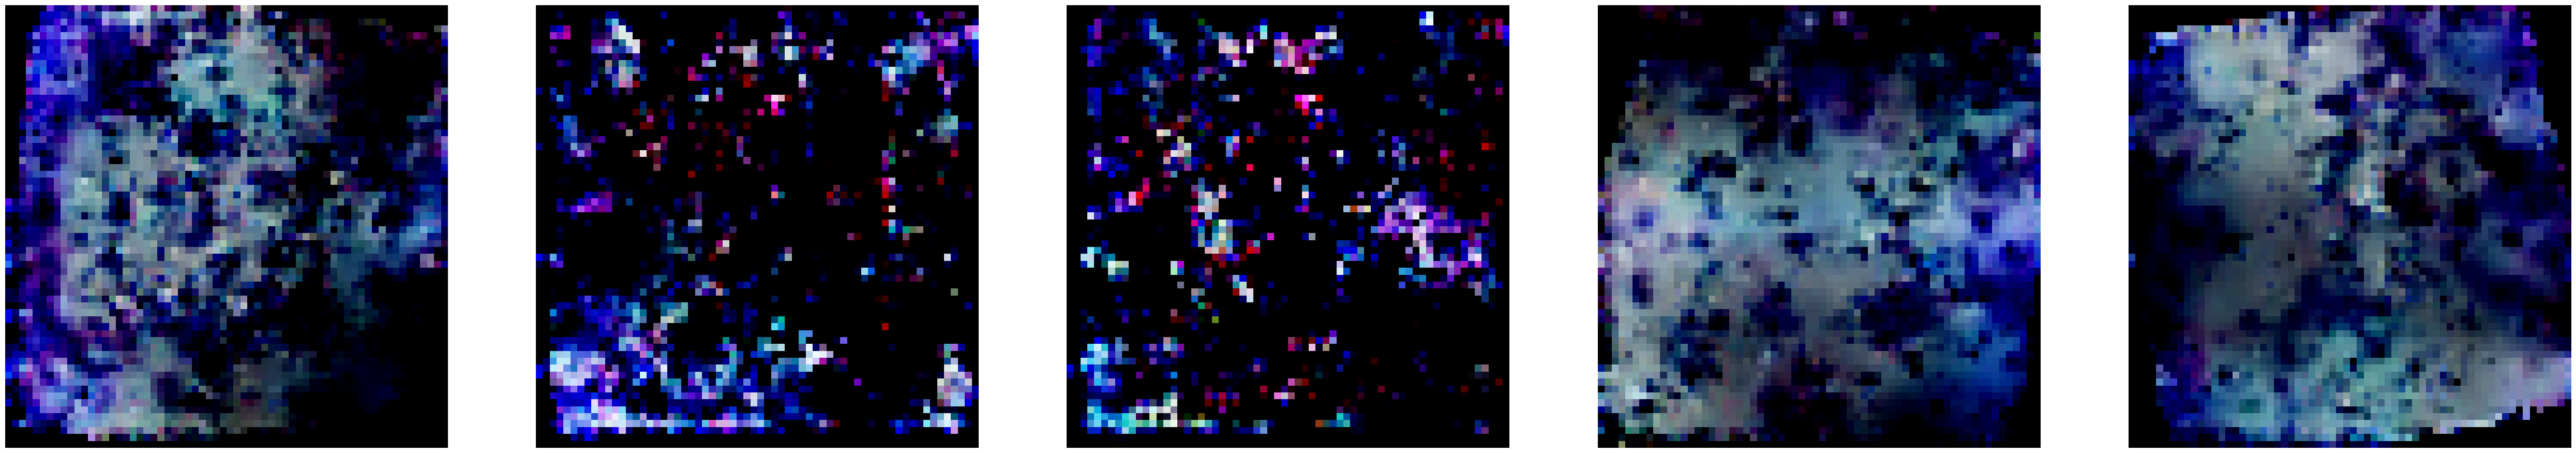

  0%|          | 0/41 [00:00<?, ?it/s]

[1802/2750][20/41] Loss_D: 0.4349 Loss_G: 5.0730 D(x): 0.8493 D(G(z)): 0.0079 / 0.0065
[1802/2750][40/41] Loss_D: 0.6027 Loss_G: 3.4761 D(x): 0.9298 D(G(z)): 0.1663 / 0.0301


  0%|          | 0/41 [00:00<?, ?it/s]

[1803/2750][20/41] Loss_D: 0.6682 Loss_G: 4.0013 D(x): 0.9779 D(G(z)): 0.1057 / 0.0201
[1803/2750][40/41] Loss_D: 0.5543 Loss_G: 4.0671 D(x): 0.9623 D(G(z)): 0.1181 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[1804/2750][20/41] Loss_D: 0.6663 Loss_G: 3.5015 D(x): 0.9510 D(G(z)): 0.1782 / 0.0315
[1804/2750][40/41] Loss_D: 0.6070 Loss_G: 4.0637 D(x): 0.9590 D(G(z)): 0.1371 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[1805/2750][20/41] Loss_D: 0.4156 Loss_G: 5.3908 D(x): 0.8762 D(G(z)): 0.0150 / 0.0076
[1805/2750][40/41] Loss_D: 0.4081 Loss_G: 3.6388 D(x): 0.9278 D(G(z)): 0.0308 / 0.0228


  0%|          | 0/41 [00:00<?, ?it/s]

[1806/2750][20/41] Loss_D: 0.6313 Loss_G: 4.4585 D(x): 0.6122 D(G(z)): 0.0024 / 0.0133
[1806/2750][40/41] Loss_D: 0.4341 Loss_G: 4.5396 D(x): 0.8466 D(G(z)): 0.0123 / 0.0123


  0%|          | 0/41 [00:00<?, ?it/s]

[1807/2750][20/41] Loss_D: 0.5085 Loss_G: 3.7239 D(x): 0.9201 D(G(z)): 0.1091 / 0.0239
[1807/2750][40/41] Loss_D: 0.5081 Loss_G: 3.4511 D(x): 0.7299 D(G(z)): 0.0227 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[1808/2750][20/41] Loss_D: 0.4010 Loss_G: 5.0839 D(x): 0.9378 D(G(z)): 0.0089 / 0.0047
[1808/2750][40/41] Loss_D: 0.6085 Loss_G: 3.4986 D(x): 0.6585 D(G(z)): 0.0125 / 0.0311


  0%|          | 0/41 [00:00<?, ?it/s]

[1809/2750][20/41] Loss_D: 0.4659 Loss_G: 3.1218 D(x): 0.9188 D(G(z)): 0.0761 / 0.0549
[1809/2750][40/41] Loss_D: 0.3681 Loss_G: 4.9242 D(x): 0.8857 D(G(z)): 0.0095 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[1810/2750][20/41] Loss_D: 0.4500 Loss_G: 4.2592 D(x): 0.9648 D(G(z)): 0.0281 / 0.0155
[1810/2750][40/41] Loss_D: 0.5420 Loss_G: 3.8590 D(x): 0.9166 D(G(z)): 0.1574 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[1811/2750][20/41] Loss_D: 0.4209 Loss_G: 3.6973 D(x): 0.9113 D(G(z)): 0.0713 / 0.0245
[1811/2750][40/41] Loss_D: 1.4465 Loss_G: 1.6197 D(x): 0.3122 D(G(z)): 0.0189 / 0.2670


  0%|          | 0/41 [00:00<?, ?it/s]

[1812/2750][20/41] Loss_D: 0.4586 Loss_G: 3.6309 D(x): 0.9219 D(G(z)): 0.0707 / 0.0264
[1812/2750][40/41] Loss_D: 0.5137 Loss_G: 3.5479 D(x): 0.8861 D(G(z)): 0.1087 / 0.0260


  0%|          | 0/41 [00:00<?, ?it/s]

[1813/2750][20/41] Loss_D: 0.5275 Loss_G: 3.5189 D(x): 0.8023 D(G(z)): 0.0655 / 0.0344
[1813/2750][40/41] Loss_D: 0.3729 Loss_G: 4.3188 D(x): 0.8560 D(G(z)): 0.0145 / 0.0113


  0%|          | 0/41 [00:00<?, ?it/s]

[1814/2750][20/41] Loss_D: 0.5391 Loss_G: 3.5449 D(x): 0.9090 D(G(z)): 0.1039 / 0.0351
[1814/2750][40/41] Loss_D: 0.3816 Loss_G: 4.0107 D(x): 0.8836 D(G(z)): 0.0376 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[1815/2750][20/41] Loss_D: 0.3446 Loss_G: 5.2744 D(x): 0.9106 D(G(z)): 0.0070 / 0.0046
[1815/2750][40/41] Loss_D: 0.3824 Loss_G: 4.9300 D(x): 0.8198 D(G(z)): 0.0107 / 0.0090


  0%|          | 0/41 [00:00<?, ?it/s]

[1816/2750][20/41] Loss_D: 0.3797 Loss_G: 5.1063 D(x): 0.8541 D(G(z)): 0.0104 / 0.0058
[1816/2750][40/41] Loss_D: 0.3575 Loss_G: 5.0867 D(x): 0.8942 D(G(z)): 0.0117 / 0.0072


  0%|          | 0/41 [00:00<?, ?it/s]

[1817/2750][20/41] Loss_D: 0.4496 Loss_G: 3.4275 D(x): 0.9066 D(G(z)): 0.0550 / 0.0331
[1817/2750][40/41] Loss_D: 0.5407 Loss_G: 3.5707 D(x): 0.9602 D(G(z)): 0.1148 / 0.0319


  0%|          | 0/41 [00:00<?, ?it/s]

[1818/2750][20/41] Loss_D: 0.5334 Loss_G: 3.8003 D(x): 0.9571 D(G(z)): 0.0817 / 0.0198
[1818/2750][40/41] Loss_D: 0.4636 Loss_G: 3.1446 D(x): 0.8257 D(G(z)): 0.0611 / 0.0460


  0%|          | 0/41 [00:00<?, ?it/s]

[1819/2750][20/41] Loss_D: 0.7024 Loss_G: 3.2946 D(x): 0.9515 D(G(z)): 0.1741 / 0.0363
[1819/2750][40/41] Loss_D: 0.3655 Loss_G: 4.7509 D(x): 0.9149 D(G(z)): 0.0116 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[1820/2750][20/41] Loss_D: 0.4588 Loss_G: 3.5693 D(x): 0.8773 D(G(z)): 0.0760 / 0.0260
[1820/2750][40/41] Loss_D: 1.0770 Loss_G: 2.2029 D(x): 0.4398 D(G(z)): 0.0146 / 0.1788


  0%|          | 0/41 [00:00<?, ?it/s]

[1821/2750][20/41] Loss_D: 0.6488 Loss_G: 2.8107 D(x): 0.6399 D(G(z)): 0.0309 / 0.0692
[1821/2750][40/41] Loss_D: 0.4904 Loss_G: 3.4787 D(x): 0.7839 D(G(z)): 0.0394 / 0.0334


  0%|          | 0/41 [00:00<?, ?it/s]

[1822/2750][20/41] Loss_D: 0.4314 Loss_G: 4.7622 D(x): 0.8752 D(G(z)): 0.0119 / 0.0094
[1822/2750][40/41] Loss_D: 0.4490 Loss_G: 3.8082 D(x): 0.8878 D(G(z)): 0.0543 / 0.0269


  0%|          | 0/41 [00:00<?, ?it/s]

[1823/2750][20/41] Loss_D: 0.4865 Loss_G: 3.8392 D(x): 0.7451 D(G(z)): 0.0108 / 0.0216
[1823/2750][40/41] Loss_D: 0.4844 Loss_G: 3.5812 D(x): 0.9628 D(G(z)): 0.0609 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[1824/2750][20/41] Loss_D: 0.4051 Loss_G: 3.7766 D(x): 0.8759 D(G(z)): 0.0299 / 0.0233
[1824/2750][40/41] Loss_D: 0.4079 Loss_G: 5.1697 D(x): 0.8916 D(G(z)): 0.0150 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[1825/2750][20/41] Loss_D: 0.5797 Loss_G: 3.1572 D(x): 0.8799 D(G(z)): 0.0610 / 0.0417
[1825/2750][40/41] Loss_D: 0.5192 Loss_G: 3.8975 D(x): 0.9313 D(G(z)): 0.1035 / 0.0206


  0%|          | 0/41 [00:00<?, ?it/s]

[1826/2750][20/41] Loss_D: 0.6076 Loss_G: 3.4155 D(x): 0.7086 D(G(z)): 0.0739 / 0.0383
[1826/2750][40/41] Loss_D: 0.6430 Loss_G: 3.2419 D(x): 0.8104 D(G(z)): 0.1768 / 0.0380


  0%|          | 0/41 [00:00<?, ?it/s]

[1827/2750][20/41] Loss_D: 0.4869 Loss_G: 4.1787 D(x): 0.7353 D(G(z)): 0.0147 / 0.0168
[1827/2750][40/41] Loss_D: 0.4768 Loss_G: 3.6871 D(x): 0.7531 D(G(z)): 0.0307 / 0.0295


  0%|          | 0/41 [00:00<?, ?it/s]

[1828/2750][20/41] Loss_D: 0.4702 Loss_G: 4.0472 D(x): 0.9490 D(G(z)): 0.0580 / 0.0188
[1828/2750][40/41] Loss_D: 0.4684 Loss_G: 3.8005 D(x): 0.9246 D(G(z)): 0.0538 / 0.0252


  0%|          | 0/41 [00:00<?, ?it/s]

[1829/2750][20/41] Loss_D: 0.3737 Loss_G: 4.3901 D(x): 0.9061 D(G(z)): 0.0192 / 0.0128
[1829/2750][40/41] Loss_D: 0.5245 Loss_G: 2.9809 D(x): 0.9256 D(G(z)): 0.1414 / 0.0571


  0%|          | 0/41 [00:00<?, ?it/s]

[1830/2750][20/41] Loss_D: 0.3948 Loss_G: 3.8447 D(x): 0.8863 D(G(z)): 0.0454 / 0.0246
[1830/2750][40/41] Loss_D: 0.9575 Loss_G: 3.6319 D(x): 0.5618 D(G(z)): 0.0074 / 0.0358


  0%|          | 0/41 [00:00<?, ?it/s]

[1831/2750][20/41] Loss_D: 0.3947 Loss_G: 3.6376 D(x): 0.9070 D(G(z)): 0.0534 / 0.0325
[1831/2750][40/41] Loss_D: 0.6010 Loss_G: 2.9616 D(x): 0.9568 D(G(z)): 0.1458 / 0.0653


  0%|          | 0/41 [00:00<?, ?it/s]

[1832/2750][20/41] Loss_D: 0.8603 Loss_G: 3.3578 D(x): 0.5057 D(G(z)): 0.0117 / 0.0552
[1832/2750][40/41] Loss_D: 0.3874 Loss_G: 5.4217 D(x): 0.8191 D(G(z)): 0.0066 / 0.0049


  0%|          | 0/41 [00:00<?, ?it/s]

[1833/2750][20/41] Loss_D: 0.4616 Loss_G: 3.9359 D(x): 0.8869 D(G(z)): 0.0692 / 0.0239
[1833/2750][40/41] Loss_D: 0.4789 Loss_G: 3.0102 D(x): 0.9323 D(G(z)): 0.0839 / 0.0604


  0%|          | 0/41 [00:00<?, ?it/s]

[1834/2750][20/41] Loss_D: 0.3773 Loss_G: 4.3579 D(x): 0.8571 D(G(z)): 0.0251 / 0.0132
[1834/2750][40/41] Loss_D: 0.3728 Loss_G: 4.2563 D(x): 0.8909 D(G(z)): 0.0352 / 0.0152


  0%|          | 0/41 [00:00<?, ?it/s]

[1835/2750][20/41] Loss_D: 0.4711 Loss_G: 3.8343 D(x): 0.8686 D(G(z)): 0.0316 / 0.0259
[1835/2750][40/41] Loss_D: 0.4364 Loss_G: 3.3758 D(x): 0.8810 D(G(z)): 0.0819 / 0.0337


  0%|          | 0/41 [00:00<?, ?it/s]

[1836/2750][20/41] Loss_D: 0.4206 Loss_G: 3.9834 D(x): 0.9124 D(G(z)): 0.0531 / 0.0180
[1836/2750][40/41] Loss_D: 0.4070 Loss_G: 3.4160 D(x): 0.9170 D(G(z)): 0.0289 / 0.0330


  0%|          | 0/41 [00:00<?, ?it/s]

[1837/2750][20/41] Loss_D: 0.3540 Loss_G: 4.7383 D(x): 0.8960 D(G(z)): 0.0099 / 0.0083
[1837/2750][40/41] Loss_D: 1.5589 Loss_G: 3.3316 D(x): 0.2857 D(G(z)): 0.0128 / 0.0591


  0%|          | 0/41 [00:00<?, ?it/s]

[1838/2750][20/41] Loss_D: 0.4300 Loss_G: 3.6164 D(x): 0.8820 D(G(z)): 0.0828 / 0.0259
[1838/2750][40/41] Loss_D: 0.4109 Loss_G: 4.1796 D(x): 0.8487 D(G(z)): 0.0470 / 0.0147


  0%|          | 0/41 [00:00<?, ?it/s]

[1839/2750][20/41] Loss_D: 0.4938 Loss_G: 3.6588 D(x): 0.9557 D(G(z)): 0.1103 / 0.0222
[1839/2750][40/41] Loss_D: 0.4199 Loss_G: 3.8738 D(x): 0.9328 D(G(z)): 0.0657 / 0.0179


  0%|          | 0/41 [00:00<?, ?it/s]

[1840/2750][20/41] Loss_D: 0.3807 Loss_G: 3.9969 D(x): 0.8748 D(G(z)): 0.0418 / 0.0210
[1840/2750][40/41] Loss_D: 0.3727 Loss_G: 4.1909 D(x): 0.8886 D(G(z)): 0.0335 / 0.0162


  0%|          | 0/41 [00:00<?, ?it/s]

[1841/2750][20/41] Loss_D: 0.3655 Loss_G: 3.8032 D(x): 0.8749 D(G(z)): 0.0257 / 0.0220
[1841/2750][40/41] Loss_D: 0.3396 Loss_G: 4.9413 D(x): 0.8986 D(G(z)): 0.0079 / 0.0063


  0%|          | 0/41 [00:00<?, ?it/s]

[1842/2750][20/41] Loss_D: 0.3574 Loss_G: 4.1276 D(x): 0.8883 D(G(z)): 0.0170 / 0.0132
[1842/2750][40/41] Loss_D: 0.3581 Loss_G: 5.2753 D(x): 0.8917 D(G(z)): 0.0185 / 0.0118


  0%|          | 0/41 [00:00<?, ?it/s]

[1843/2750][20/41] Loss_D: 0.6035 Loss_G: 3.3726 D(x): 0.6686 D(G(z)): 0.0209 / 0.0360
[1843/2750][40/41] Loss_D: 0.4089 Loss_G: 3.1197 D(x): 0.9219 D(G(z)): 0.0635 / 0.0449


  0%|          | 0/41 [00:00<?, ?it/s]

[1844/2750][20/41] Loss_D: 0.4403 Loss_G: 3.0681 D(x): 0.9281 D(G(z)): 0.0795 / 0.0534
[1844/2750][40/41] Loss_D: 0.3569 Loss_G: 4.4899 D(x): 0.9075 D(G(z)): 0.0176 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[1845/2750][20/41] Loss_D: 0.3618 Loss_G: 5.4266 D(x): 0.8741 D(G(z)): 0.0139 / 0.0080
[1845/2750][40/41] Loss_D: 0.8625 Loss_G: 2.2929 D(x): 0.5285 D(G(z)): 0.0099 / 0.1532


  0%|          | 0/41 [00:00<?, ?it/s]

[1846/2750][20/41] Loss_D: 0.3980 Loss_G: 4.2116 D(x): 0.8450 D(G(z)): 0.0401 / 0.0173
[1846/2750][40/41] Loss_D: 0.3699 Loss_G: 4.6842 D(x): 0.8359 D(G(z)): 0.0110 / 0.0078


  0%|          | 0/41 [00:00<?, ?it/s]

[1847/2750][20/41] Loss_D: 0.5386 Loss_G: 3.7865 D(x): 0.9261 D(G(z)): 0.1529 / 0.0252
[1847/2750][40/41] Loss_D: 1.0434 Loss_G: 2.9576 D(x): 0.4459 D(G(z)): 0.0322 / 0.0764


  0%|          | 0/41 [00:00<?, ?it/s]

[1848/2750][20/41] Loss_D: 0.3699 Loss_G: 4.5493 D(x): 0.8711 D(G(z)): 0.0180 / 0.0106
[1848/2750][40/41] Loss_D: 0.3616 Loss_G: 5.3376 D(x): 0.8797 D(G(z)): 0.0112 / 0.0060


  0%|          | 0/41 [00:00<?, ?it/s]

[1849/2750][20/41] Loss_D: 0.3750 Loss_G: 4.5062 D(x): 0.8888 D(G(z)): 0.0327 / 0.0146
[1849/2750][40/41] Loss_D: 0.6544 Loss_G: 3.6991 D(x): 0.9463 D(G(z)): 0.2212 / 0.0251


  0%|          | 0/41 [00:00<?, ?it/s]

[1850/2750][20/41] Loss_D: 0.3945 Loss_G: 3.8009 D(x): 0.8833 D(G(z)): 0.0448 / 0.0206
[1850/2750][40/41] Loss_D: 0.3817 Loss_G: 4.6408 D(x): 0.8901 D(G(z)): 0.0377 / 0.0152


  0%|          | 0/41 [00:00<?, ?it/s]

[1851/2750][20/41] Loss_D: 0.4424 Loss_G: 4.2608 D(x): 0.8581 D(G(z)): 0.0184 / 0.0186
[1851/2750][40/41] Loss_D: 0.6360 Loss_G: 3.3703 D(x): 0.6776 D(G(z)): 0.0354 / 0.0360


  0%|          | 0/41 [00:00<?, ?it/s]

[1852/2750][20/41] Loss_D: 0.3651 Loss_G: 5.4231 D(x): 0.9088 D(G(z)): 0.0097 / 0.0074
[1852/2750][40/41] Loss_D: 0.4940 Loss_G: 4.3131 D(x): 0.9035 D(G(z)): 0.1280 / 0.0140


  0%|          | 0/41 [00:00<?, ?it/s]

[1853/2750][20/41] Loss_D: 0.4456 Loss_G: 3.2492 D(x): 0.9271 D(G(z)): 0.0972 / 0.0421
[1853/2750][40/41] Loss_D: 0.4050 Loss_G: 4.5119 D(x): 0.9228 D(G(z)): 0.0211 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[1854/2750][20/41] Loss_D: 0.3983 Loss_G: 4.0713 D(x): 0.8547 D(G(z)): 0.0323 / 0.0237
[1854/2750][40/41] Loss_D: 0.4243 Loss_G: 3.6967 D(x): 0.9194 D(G(z)): 0.0697 / 0.0249


  0%|          | 0/41 [00:00<?, ?it/s]

[1855/2750][20/41] Loss_D: 0.4362 Loss_G: 3.7108 D(x): 0.9383 D(G(z)): 0.0816 / 0.0288
[1855/2750][40/41] Loss_D: 0.4122 Loss_G: 4.6775 D(x): 0.8560 D(G(z)): 0.0141 / 0.0128


  0%|          | 0/41 [00:00<?, ?it/s]

[1856/2750][20/41] Loss_D: 0.8086 Loss_G: 3.1690 D(x): 0.5559 D(G(z)): 0.0192 / 0.0448
[1856/2750][40/41] Loss_D: 0.7702 Loss_G: 2.9775 D(x): 0.5525 D(G(z)): 0.0211 / 0.0618


  0%|          | 0/41 [00:00<?, ?it/s]

[1857/2750][20/41] Loss_D: 0.3842 Loss_G: 3.9472 D(x): 0.8453 D(G(z)): 0.0320 / 0.0226
[1857/2750][40/41] Loss_D: 0.6069 Loss_G: 4.0919 D(x): 0.6666 D(G(z)): 0.0103 / 0.0233


  0%|          | 0/41 [00:00<?, ?it/s]

[1858/2750][20/41] Loss_D: 0.3653 Loss_G: 4.2075 D(x): 0.8736 D(G(z)): 0.0226 / 0.0159
[1858/2750][40/41] Loss_D: 0.3736 Loss_G: 4.1209 D(x): 0.8597 D(G(z)): 0.0208 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[1859/2750][20/41] Loss_D: 0.6067 Loss_G: 2.8027 D(x): 0.9333 D(G(z)): 0.1950 / 0.0620
[1859/2750][40/41] Loss_D: 0.5872 Loss_G: 3.5489 D(x): 0.9102 D(G(z)): 0.1171 / 0.0265


  0%|          | 0/41 [00:00<?, ?it/s]

[1860/2750][20/41] Loss_D: 0.3713 Loss_G: 4.9456 D(x): 0.8860 D(G(z)): 0.0244 / 0.0090
[1860/2750][40/41] Loss_D: 0.4086 Loss_G: 3.5660 D(x): 0.9030 D(G(z)): 0.0717 / 0.0318


  0%|          | 0/41 [00:00<?, ?it/s]

[1861/2750][20/41] Loss_D: 1.5231 Loss_G: 2.5155 D(x): 0.2967 D(G(z)): 0.0161 / 0.1117
[1861/2750][40/41] Loss_D: 0.3624 Loss_G: 4.7194 D(x): 0.8728 D(G(z)): 0.0128 / 0.0083


  0%|          | 0/41 [00:00<?, ?it/s]

[1862/2750][20/41] Loss_D: 0.3786 Loss_G: 4.3643 D(x): 0.9080 D(G(z)): 0.0337 / 0.0119
[1862/2750][40/41] Loss_D: 0.4432 Loss_G: 3.1671 D(x): 0.8850 D(G(z)): 0.0565 / 0.0608


  0%|          | 0/41 [00:00<?, ?it/s]

[1863/2750][20/41] Loss_D: 0.3866 Loss_G: 3.9610 D(x): 0.9041 D(G(z)): 0.0440 / 0.0162
[1863/2750][40/41] Loss_D: 0.3889 Loss_G: 4.3952 D(x): 0.8729 D(G(z)): 0.0425 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[1864/2750][20/41] Loss_D: 0.5368 Loss_G: 4.7661 D(x): 0.9616 D(G(z)): 0.0806 / 0.0099
[1864/2750][40/41] Loss_D: 0.5442 Loss_G: 2.9735 D(x): 0.7238 D(G(z)): 0.0379 / 0.0575


  0%|          | 0/41 [00:00<?, ?it/s]

[1865/2750][20/41] Loss_D: 0.3833 Loss_G: 3.8011 D(x): 0.8600 D(G(z)): 0.0364 / 0.0217
[1865/2750][40/41] Loss_D: 0.3560 Loss_G: 4.6276 D(x): 0.8749 D(G(z)): 0.0145 / 0.0093


  0%|          | 0/41 [00:00<?, ?it/s]

[1866/2750][20/41] Loss_D: 0.4399 Loss_G: 4.3848 D(x): 0.7762 D(G(z)): 0.0109 / 0.0146
[1866/2750][40/41] Loss_D: 0.4455 Loss_G: 3.7475 D(x): 0.9149 D(G(z)): 0.0978 / 0.0257


  0%|          | 0/41 [00:00<?, ?it/s]

[1867/2750][20/41] Loss_D: 0.3627 Loss_G: 4.9549 D(x): 0.8987 D(G(z)): 0.0247 / 0.0078
[1867/2750][40/41] Loss_D: 0.4038 Loss_G: 3.5089 D(x): 0.8810 D(G(z)): 0.0622 / 0.0314


  0%|          | 0/41 [00:00<?, ?it/s]

[1868/2750][20/41] Loss_D: 0.3651 Loss_G: 4.7613 D(x): 0.9239 D(G(z)): 0.0189 / 0.0096
[1868/2750][40/41] Loss_D: 0.3647 Loss_G: 4.1267 D(x): 0.8753 D(G(z)): 0.0251 / 0.0165


  0%|          | 0/41 [00:00<?, ?it/s]

[1869/2750][20/41] Loss_D: 0.3690 Loss_G: 4.0655 D(x): 0.9010 D(G(z)): 0.0330 / 0.0179
[1869/2750][40/41] Loss_D: 0.9495 Loss_G: 2.8386 D(x): 0.5386 D(G(z)): 0.0269 / 0.0671


  0%|          | 0/41 [00:00<?, ?it/s]

[1870/2750][20/41] Loss_D: 0.3684 Loss_G: 5.5916 D(x): 0.8673 D(G(z)): 0.0087 / 0.0036
[1870/2750][40/41] Loss_D: 0.3793 Loss_G: 4.5318 D(x): 0.8770 D(G(z)): 0.0407 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[1871/2750][20/41] Loss_D: 0.4292 Loss_G: 4.4702 D(x): 0.8680 D(G(z)): 0.0429 / 0.0153
[1871/2750][40/41] Loss_D: 0.4964 Loss_G: 3.5816 D(x): 0.9264 D(G(z)): 0.1329 / 0.0273


  0%|          | 0/41 [00:00<?, ?it/s]

[1872/2750][20/41] Loss_D: 0.4841 Loss_G: 3.2924 D(x): 0.7351 D(G(z)): 0.0251 / 0.0419
[1872/2750][40/41] Loss_D: 0.4476 Loss_G: 3.7709 D(x): 0.9319 D(G(z)): 0.0917 / 0.0240


  0%|          | 0/41 [00:00<?, ?it/s]

[1873/2750][20/41] Loss_D: 0.6889 Loss_G: 4.0025 D(x): 0.6047 D(G(z)): 0.0138 / 0.0258
[1873/2750][40/41] Loss_D: 0.5990 Loss_G: 3.9018 D(x): 0.6745 D(G(z)): 0.0224 / 0.0217


  0%|          | 0/41 [00:00<?, ?it/s]

[1874/2750][20/41] Loss_D: 0.3485 Loss_G: 5.3046 D(x): 0.8929 D(G(z)): 0.0082 / 0.0056
[1874/2750][40/41] Loss_D: 0.6827 Loss_G: 4.3541 D(x): 0.5995 D(G(z)): 0.0306 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[1875/2750][20/41] Loss_D: 0.3584 Loss_G: 5.0546 D(x): 0.8849 D(G(z)): 0.0148 / 0.0065
[1875/2750][40/41] Loss_D: 0.4547 Loss_G: 4.5001 D(x): 0.9312 D(G(z)): 0.0238 / 0.0175


  0%|          | 0/41 [00:00<?, ?it/s]

[1876/2750][20/41] Loss_D: 0.4098 Loss_G: 4.0652 D(x): 0.9094 D(G(z)): 0.0255 / 0.0189
[1876/2750][40/41] Loss_D: 0.6865 Loss_G: 4.7606 D(x): 0.9174 D(G(z)): 0.0100 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[1877/2750][20/41] Loss_D: 0.3808 Loss_G: 4.0295 D(x): 0.8685 D(G(z)): 0.0354 / 0.0161
[1877/2750][40/41] Loss_D: 0.3486 Loss_G: 3.9214 D(x): 0.9062 D(G(z)): 0.0135 / 0.0200


  0%|          | 0/41 [00:00<?, ?it/s]

[1878/2750][20/41] Loss_D: 0.4647 Loss_G: 2.8459 D(x): 0.9315 D(G(z)): 0.0998 / 0.0649
[1878/2750][40/41] Loss_D: 0.3557 Loss_G: 4.7568 D(x): 0.8807 D(G(z)): 0.0148 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[1879/2750][20/41] Loss_D: 0.3711 Loss_G: 4.7007 D(x): 0.9283 D(G(z)): 0.0188 / 0.0144
[1879/2750][40/41] Loss_D: 0.4143 Loss_G: 4.2136 D(x): 0.9203 D(G(z)): 0.0387 / 0.0211


  0%|          | 0/41 [00:00<?, ?it/s]

[1880/2750][20/41] Loss_D: 0.3894 Loss_G: 4.3787 D(x): 0.8491 D(G(z)): 0.0276 / 0.0139
[1880/2750][40/41] Loss_D: 0.6042 Loss_G: 3.0931 D(x): 0.6900 D(G(z)): 0.0539 / 0.0490


  0%|          | 0/41 [00:00<?, ?it/s]

[1881/2750][20/41] Loss_D: 0.4563 Loss_G: 3.2806 D(x): 0.9243 D(G(z)): 0.1036 / 0.0412
[1881/2750][40/41] Loss_D: 0.4296 Loss_G: 4.3251 D(x): 0.8981 D(G(z)): 0.0386 / 0.0137


  0%|          | 0/41 [00:00<?, ?it/s]

[1882/2750][20/41] Loss_D: 0.8901 Loss_G: 3.3603 D(x): 0.5025 D(G(z)): 0.0130 / 0.0433
[1882/2750][40/41] Loss_D: 0.3483 Loss_G: 5.4251 D(x): 0.8702 D(G(z)): 0.0123 / 0.0049


  0%|          | 0/41 [00:00<?, ?it/s]

[1883/2750][20/41] Loss_D: 0.7711 Loss_G: 4.1512 D(x): 0.9523 D(G(z)): 0.0584 / 0.0153
[1883/2750][40/41] Loss_D: 0.3568 Loss_G: 4.7538 D(x): 0.8792 D(G(z)): 0.0164 / 0.0083


  0%|          | 0/41 [00:00<?, ?it/s]

[1884/2750][20/41] Loss_D: 0.5713 Loss_G: 4.1580 D(x): 0.9404 D(G(z)): 0.1310 / 0.0286
[1884/2750][40/41] Loss_D: 0.4374 Loss_G: 4.5451 D(x): 0.8057 D(G(z)): 0.0167 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[1885/2750][20/41] Loss_D: 0.3664 Loss_G: 4.9178 D(x): 0.8642 D(G(z)): 0.0118 / 0.0083
[1885/2750][40/41] Loss_D: 0.3744 Loss_G: 3.7301 D(x): 0.9176 D(G(z)): 0.0332 / 0.0335


  0%|          | 0/41 [00:00<?, ?it/s]

[1886/2750][20/41] Loss_D: 0.7851 Loss_G: 4.4587 D(x): 0.9378 D(G(z)): 0.3413 / 0.0133
[1886/2750][40/41] Loss_D: 0.3925 Loss_G: 3.5095 D(x): 0.9354 D(G(z)): 0.0444 / 0.0416


  0%|          | 0/41 [00:00<?, ?it/s]

[1887/2750][20/41] Loss_D: 0.5010 Loss_G: 3.2609 D(x): 0.7907 D(G(z)): 0.0349 / 0.0400
[1887/2750][40/41] Loss_D: 0.4633 Loss_G: 4.3449 D(x): 0.9444 D(G(z)): 0.0944 / 0.0152


  0%|          | 0/41 [00:00<?, ?it/s]

[1888/2750][20/41] Loss_D: 0.3633 Loss_G: 4.4073 D(x): 0.9083 D(G(z)): 0.0249 / 0.0152
[1888/2750][40/41] Loss_D: 0.3442 Loss_G: 5.1431 D(x): 0.8826 D(G(z)): 0.0067 / 0.0047


  0%|          | 0/41 [00:00<?, ?it/s]

[1889/2750][20/41] Loss_D: 0.3911 Loss_G: 2.6434 D(x): 0.9221 D(G(z)): 0.0470 / 0.0721
[1889/2750][40/41] Loss_D: 0.4769 Loss_G: 3.4275 D(x): 0.7996 D(G(z)): 0.0284 / 0.0382


  0%|          | 0/41 [00:00<?, ?it/s]

[1890/2750][20/41] Loss_D: 0.3703 Loss_G: 3.5902 D(x): 0.9020 D(G(z)): 0.0369 / 0.0334
[1890/2750][40/41] Loss_D: 0.4256 Loss_G: 3.9800 D(x): 0.9181 D(G(z)): 0.0750 / 0.0180


  0%|          | 0/41 [00:00<?, ?it/s]

[1891/2750][20/41] Loss_D: 0.3618 Loss_G: 4.7911 D(x): 0.8615 D(G(z)): 0.0092 / 0.0078
[1891/2750][40/41] Loss_D: 0.5717 Loss_G: 2.8811 D(x): 0.9797 D(G(z)): 0.0883 / 0.0721


  0%|          | 0/41 [00:00<?, ?it/s]

[1892/2750][20/41] Loss_D: 0.3605 Loss_G: 4.5797 D(x): 0.9249 D(G(z)): 0.0243 / 0.0085
[1892/2750][40/41] Loss_D: 0.3795 Loss_G: 4.4071 D(x): 0.9055 D(G(z)): 0.0312 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[1893/2750][20/41] Loss_D: 0.3711 Loss_G: 4.4347 D(x): 0.8843 D(G(z)): 0.0279 / 0.0130
[1893/2750][40/41] Loss_D: 0.3990 Loss_G: 3.4233 D(x): 0.9005 D(G(z)): 0.0344 / 0.0340


  0%|          | 0/41 [00:00<?, ?it/s]

[1894/2750][20/41] Loss_D: 0.3555 Loss_G: 4.3597 D(x): 0.9033 D(G(z)): 0.0182 / 0.0130
[1894/2750][40/41] Loss_D: 0.7872 Loss_G: 3.8169 D(x): 0.5599 D(G(z)): 0.0159 / 0.0318


  0%|          | 0/41 [00:00<?, ?it/s]

[1895/2750][20/41] Loss_D: 0.3549 Loss_G: 4.8350 D(x): 0.9028 D(G(z)): 0.0143 / 0.0105
[1895/2750][40/41] Loss_D: 0.7223 Loss_G: 3.3196 D(x): 0.8517 D(G(z)): 0.0893 / 0.0461


  0%|          | 0/41 [00:00<?, ?it/s]

[1896/2750][20/41] Loss_D: 0.4429 Loss_G: 4.5509 D(x): 0.8199 D(G(z)): 0.0133 / 0.0126
[1896/2750][40/41] Loss_D: 0.5524 Loss_G: 3.7123 D(x): 0.7212 D(G(z)): 0.0117 / 0.0320


  0%|          | 0/41 [00:00<?, ?it/s]

[1897/2750][20/41] Loss_D: 0.5799 Loss_G: 2.2182 D(x): 0.9496 D(G(z)): 0.1843 / 0.1128
[1897/2750][40/41] Loss_D: 0.3602 Loss_G: 4.1154 D(x): 0.8878 D(G(z)): 0.0263 / 0.0141


  0%|          | 0/41 [00:00<?, ?it/s]

[1898/2750][20/41] Loss_D: 0.7526 Loss_G: 5.0440 D(x): 0.9208 D(G(z)): 0.2918 / 0.0067
[1898/2750][40/41] Loss_D: 1.4739 Loss_G: 2.1027 D(x): 0.3221 D(G(z)): 0.0273 / 0.2053


  0%|          | 0/41 [00:00<?, ?it/s]

[1899/2750][20/41] Loss_D: 0.4747 Loss_G: 2.9209 D(x): 0.8729 D(G(z)): 0.0701 / 0.0606
[1899/2750][40/41] Loss_D: 0.7584 Loss_G: 3.2118 D(x): 0.9952 D(G(z)): 0.1007 / 0.0442


  0%|          | 0/41 [00:00<?, ?it/s]

[1900/2750][20/41] Loss_D: 0.5046 Loss_G: 3.4236 D(x): 0.9658 D(G(z)): 0.0485 / 0.0326
[1900/2750][40/41] Loss_D: 0.5401 Loss_G: 3.5425 D(x): 0.9537 D(G(z)): 0.0930 / 0.0395


  0%|          | 0/41 [00:00<?, ?it/s]

[1901/2750][20/41] Loss_D: 0.9188 Loss_G: 4.0055 D(x): 0.5121 D(G(z)): 0.0067 / 0.0228
[1901/2750][40/41] Loss_D: 0.4647 Loss_G: 3.7314 D(x): 0.8829 D(G(z)): 0.0632 / 0.0277


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.999975..0.79884756].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999845..0.80680877].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999446..0.85559046].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999981..0.9652735].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99979424..0.8596707].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_1901.pth


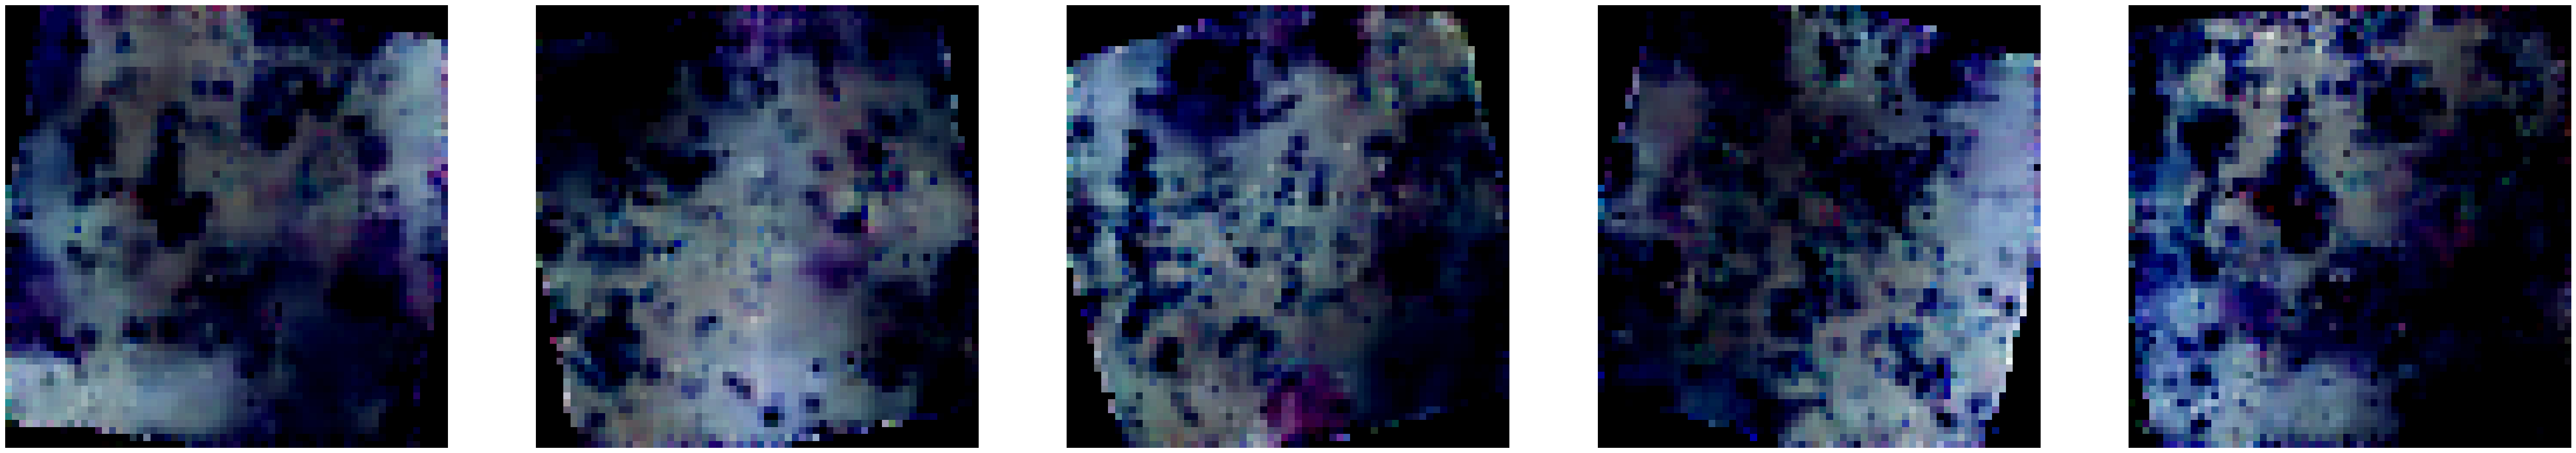

  0%|          | 0/41 [00:00<?, ?it/s]

[1902/2750][20/41] Loss_D: 0.3989 Loss_G: 4.5058 D(x): 0.9151 D(G(z)): 0.0145 / 0.0108
[1902/2750][40/41] Loss_D: 0.4697 Loss_G: 3.6741 D(x): 0.8119 D(G(z)): 0.0506 / 0.0280


  0%|          | 0/41 [00:00<?, ?it/s]

[1903/2750][20/41] Loss_D: 0.5438 Loss_G: 3.6328 D(x): 0.6969 D(G(z)): 0.0180 / 0.0248
[1903/2750][40/41] Loss_D: 0.5339 Loss_G: 2.9432 D(x): 0.9168 D(G(z)): 0.1564 / 0.0519


  0%|          | 0/41 [00:00<?, ?it/s]

[1904/2750][20/41] Loss_D: 0.4747 Loss_G: 4.0789 D(x): 0.7654 D(G(z)): 0.0192 / 0.0164
[1904/2750][40/41] Loss_D: 0.5422 Loss_G: 3.3888 D(x): 0.9542 D(G(z)): 0.1418 / 0.0379


  0%|          | 0/41 [00:00<?, ?it/s]

[1905/2750][20/41] Loss_D: 0.3854 Loss_G: 4.3667 D(x): 0.8760 D(G(z)): 0.0262 / 0.0112
[1905/2750][40/41] Loss_D: 0.4849 Loss_G: 3.4610 D(x): 0.8503 D(G(z)): 0.0844 / 0.0332


  0%|          | 0/41 [00:00<?, ?it/s]

[1906/2750][20/41] Loss_D: 0.4708 Loss_G: 4.1032 D(x): 0.8015 D(G(z)): 0.0269 / 0.0178
[1906/2750][40/41] Loss_D: 0.3609 Loss_G: 4.2286 D(x): 0.8957 D(G(z)): 0.0231 / 0.0150


  0%|          | 0/41 [00:00<?, ?it/s]

[1907/2750][20/41] Loss_D: 0.3486 Loss_G: 5.7030 D(x): 0.8709 D(G(z)): 0.0033 / 0.0028
[1907/2750][40/41] Loss_D: 0.3782 Loss_G: 4.5900 D(x): 0.8744 D(G(z)): 0.0308 / 0.0110


  0%|          | 0/41 [00:00<?, ?it/s]

[1908/2750][20/41] Loss_D: 0.4701 Loss_G: 3.5522 D(x): 0.8105 D(G(z)): 0.0410 / 0.0314
[1908/2750][40/41] Loss_D: 0.4094 Loss_G: 5.0169 D(x): 0.9460 D(G(z)): 0.0105 / 0.0068


  0%|          | 0/41 [00:00<?, ?it/s]

[1909/2750][20/41] Loss_D: 0.3727 Loss_G: 4.3281 D(x): 0.9200 D(G(z)): 0.0246 / 0.0134
[1909/2750][40/41] Loss_D: 0.3824 Loss_G: 3.6339 D(x): 0.8932 D(G(z)): 0.0447 / 0.0264


  0%|          | 0/41 [00:00<?, ?it/s]

[1910/2750][20/41] Loss_D: 0.3542 Loss_G: 4.4259 D(x): 0.8932 D(G(z)): 0.0146 / 0.0132
[1910/2750][40/41] Loss_D: 0.5833 Loss_G: 3.4709 D(x): 0.8355 D(G(z)): 0.1181 / 0.0372


  0%|          | 0/41 [00:00<?, ?it/s]

[1911/2750][20/41] Loss_D: 0.4719 Loss_G: 4.7085 D(x): 0.7931 D(G(z)): 0.0152 / 0.0165
[1911/2750][40/41] Loss_D: 0.4072 Loss_G: 4.4338 D(x): 0.9055 D(G(z)): 0.0348 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[1912/2750][20/41] Loss_D: 0.4991 Loss_G: 4.4986 D(x): 0.7547 D(G(z)): 0.0219 / 0.0154
[1912/2750][40/41] Loss_D: 0.4236 Loss_G: 4.7347 D(x): 0.8110 D(G(z)): 0.0097 / 0.0082


  0%|          | 0/41 [00:00<?, ?it/s]

[1913/2750][20/41] Loss_D: 0.5080 Loss_G: 3.0659 D(x): 0.8191 D(G(z)): 0.0694 / 0.0533
[1913/2750][40/41] Loss_D: 0.4180 Loss_G: 3.6789 D(x): 0.8878 D(G(z)): 0.0379 / 0.0319


  0%|          | 0/41 [00:00<?, ?it/s]

[1914/2750][20/41] Loss_D: 0.3817 Loss_G: 4.4702 D(x): 0.9191 D(G(z)): 0.0197 / 0.0114
[1914/2750][40/41] Loss_D: 0.4853 Loss_G: 3.4893 D(x): 0.7889 D(G(z)): 0.0153 / 0.0303


  0%|          | 0/41 [00:00<?, ?it/s]

[1915/2750][20/41] Loss_D: 0.4113 Loss_G: 3.4817 D(x): 0.8782 D(G(z)): 0.0590 / 0.0273
[1915/2750][40/41] Loss_D: 0.5154 Loss_G: 3.4695 D(x): 0.9582 D(G(z)): 0.1074 / 0.0297


  0%|          | 0/41 [00:00<?, ?it/s]

[1916/2750][20/41] Loss_D: 0.3951 Loss_G: 3.7640 D(x): 0.8559 D(G(z)): 0.0469 / 0.0284
[1916/2750][40/41] Loss_D: 0.7764 Loss_G: 2.6982 D(x): 0.5813 D(G(z)): 0.0367 / 0.0878


  0%|          | 0/41 [00:00<?, ?it/s]

[1917/2750][20/41] Loss_D: 0.3676 Loss_G: 4.1508 D(x): 0.9054 D(G(z)): 0.0213 / 0.0155
[1917/2750][40/41] Loss_D: 0.4164 Loss_G: 4.3540 D(x): 0.8996 D(G(z)): 0.0490 / 0.0173


  0%|          | 0/41 [00:00<?, ?it/s]

[1918/2750][20/41] Loss_D: 1.0950 Loss_G: 2.5530 D(x): 0.9066 D(G(z)): 0.4970 / 0.0871
[1918/2750][40/41] Loss_D: 0.4479 Loss_G: 3.9927 D(x): 0.9406 D(G(z)): 0.0513 / 0.0180


  0%|          | 0/41 [00:00<?, ?it/s]

[1919/2750][20/41] Loss_D: 0.8937 Loss_G: 3.4965 D(x): 0.5121 D(G(z)): 0.0161 / 0.0445
[1919/2750][40/41] Loss_D: 0.4285 Loss_G: 3.2484 D(x): 0.8745 D(G(z)): 0.0562 / 0.0351


  0%|          | 0/41 [00:00<?, ?it/s]

[1920/2750][20/41] Loss_D: 0.6531 Loss_G: 3.9854 D(x): 0.6601 D(G(z)): 0.0205 / 0.0241
[1920/2750][40/41] Loss_D: 0.5065 Loss_G: 3.9444 D(x): 0.7263 D(G(z)): 0.0114 / 0.0229


  0%|          | 0/41 [00:00<?, ?it/s]

[1921/2750][20/41] Loss_D: 0.4124 Loss_G: 2.9201 D(x): 0.9134 D(G(z)): 0.0500 / 0.0582
[1921/2750][40/41] Loss_D: 0.7770 Loss_G: 3.2814 D(x): 0.6638 D(G(z)): 0.1413 / 0.0410


  0%|          | 0/41 [00:00<?, ?it/s]

[1922/2750][20/41] Loss_D: 0.7916 Loss_G: 2.6657 D(x): 0.5520 D(G(z)): 0.0502 / 0.1012
[1922/2750][40/41] Loss_D: 0.4675 Loss_G: 4.3510 D(x): 0.7783 D(G(z)): 0.0146 / 0.0120


  0%|          | 0/41 [00:00<?, ?it/s]

[1923/2750][20/41] Loss_D: 0.4747 Loss_G: 3.1011 D(x): 0.8999 D(G(z)): 0.0900 / 0.0509
[1923/2750][40/41] Loss_D: 0.4767 Loss_G: 3.5474 D(x): 0.7983 D(G(z)): 0.0568 / 0.0314


  0%|          | 0/41 [00:00<?, ?it/s]

[1924/2750][20/41] Loss_D: 0.5707 Loss_G: 2.9354 D(x): 0.7063 D(G(z)): 0.0542 / 0.0619
[1924/2750][40/41] Loss_D: 0.4661 Loss_G: 4.0401 D(x): 0.9027 D(G(z)): 0.0759 / 0.0192


  0%|          | 0/41 [00:00<?, ?it/s]

[1925/2750][20/41] Loss_D: 0.3910 Loss_G: 4.0466 D(x): 0.8782 D(G(z)): 0.0238 / 0.0189
[1925/2750][40/41] Loss_D: 0.4476 Loss_G: 4.8144 D(x): 0.7619 D(G(z)): 0.0060 / 0.0110


  0%|          | 0/41 [00:00<?, ?it/s]

[1926/2750][20/41] Loss_D: 0.4070 Loss_G: 3.8179 D(x): 0.9176 D(G(z)): 0.0447 / 0.0280
[1926/2750][40/41] Loss_D: 0.4652 Loss_G: 2.7643 D(x): 0.9025 D(G(z)): 0.0789 / 0.0617


  0%|          | 0/41 [00:00<?, ?it/s]

[1927/2750][20/41] Loss_D: 0.5887 Loss_G: 5.2954 D(x): 0.9509 D(G(z)): 0.0833 / 0.0082
[1927/2750][40/41] Loss_D: 0.3752 Loss_G: 5.2144 D(x): 0.9032 D(G(z)): 0.0072 / 0.0057


  0%|          | 0/41 [00:00<?, ?it/s]

[1928/2750][20/41] Loss_D: 0.4956 Loss_G: 2.9165 D(x): 0.9508 D(G(z)): 0.1008 / 0.0594
[1928/2750][40/41] Loss_D: 0.3504 Loss_G: 4.9049 D(x): 0.8630 D(G(z)): 0.0072 / 0.0057


  0%|          | 0/41 [00:00<?, ?it/s]

[1929/2750][20/41] Loss_D: 0.4474 Loss_G: 4.0657 D(x): 0.8505 D(G(z)): 0.0329 / 0.0204
[1929/2750][40/41] Loss_D: 0.4761 Loss_G: 3.9912 D(x): 0.9441 D(G(z)): 0.0680 / 0.0179


  0%|          | 0/41 [00:00<?, ?it/s]

[1930/2750][20/41] Loss_D: 0.4039 Loss_G: 4.5467 D(x): 0.9374 D(G(z)): 0.0183 / 0.0092
[1930/2750][40/41] Loss_D: 0.5739 Loss_G: 2.4244 D(x): 0.8915 D(G(z)): 0.1236 / 0.0943


  0%|          | 0/41 [00:00<?, ?it/s]

[1931/2750][20/41] Loss_D: 0.4054 Loss_G: 4.6948 D(x): 0.8992 D(G(z)): 0.0137 / 0.0088
[1931/2750][40/41] Loss_D: 0.4431 Loss_G: 4.0907 D(x): 0.9493 D(G(z)): 0.0277 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[1932/2750][20/41] Loss_D: 0.4085 Loss_G: 4.3302 D(x): 0.9365 D(G(z)): 0.0144 / 0.0128
[1932/2750][40/41] Loss_D: 0.4814 Loss_G: 3.0450 D(x): 0.7452 D(G(z)): 0.0445 / 0.0555


  0%|          | 0/41 [00:00<?, ?it/s]

[1933/2750][20/41] Loss_D: 0.4128 Loss_G: 3.6479 D(x): 0.8066 D(G(z)): 0.0210 / 0.0277
[1933/2750][40/41] Loss_D: 0.3830 Loss_G: 4.8448 D(x): 0.9459 D(G(z)): 0.0123 / 0.0071


  0%|          | 0/41 [00:00<?, ?it/s]

[1934/2750][20/41] Loss_D: 0.3797 Loss_G: 4.0288 D(x): 0.9438 D(G(z)): 0.0287 / 0.0169
[1934/2750][40/41] Loss_D: 0.6525 Loss_G: 3.2412 D(x): 0.9520 D(G(z)): 0.2081 / 0.0449


  0%|          | 0/41 [00:00<?, ?it/s]

[1935/2750][20/41] Loss_D: 1.1704 Loss_G: 2.9984 D(x): 0.3881 D(G(z)): 0.0077 / 0.0750
[1935/2750][40/41] Loss_D: 0.3955 Loss_G: 3.8042 D(x): 0.9199 D(G(z)): 0.0510 / 0.0218


  0%|          | 0/41 [00:00<?, ?it/s]

[1936/2750][20/41] Loss_D: 0.6417 Loss_G: 2.9707 D(x): 0.7325 D(G(z)): 0.1081 / 0.0544
[1936/2750][40/41] Loss_D: 0.5687 Loss_G: 3.1955 D(x): 0.6839 D(G(z)): 0.0292 / 0.0445


  0%|          | 0/41 [00:00<?, ?it/s]

[1937/2750][20/41] Loss_D: 0.3716 Loss_G: 4.4603 D(x): 0.9062 D(G(z)): 0.0186 / 0.0118
[1937/2750][40/41] Loss_D: 0.3761 Loss_G: 4.2115 D(x): 0.8874 D(G(z)): 0.0262 / 0.0179


  0%|          | 0/41 [00:00<?, ?it/s]

[1938/2750][20/41] Loss_D: 0.3458 Loss_G: 5.0824 D(x): 0.8803 D(G(z)): 0.0098 / 0.0062
[1938/2750][40/41] Loss_D: 0.4205 Loss_G: 3.6443 D(x): 0.9115 D(G(z)): 0.0737 / 0.0272


  0%|          | 0/41 [00:00<?, ?it/s]

[1939/2750][20/41] Loss_D: 0.3630 Loss_G: 4.6680 D(x): 0.9001 D(G(z)): 0.0141 / 0.0096
[1939/2750][40/41] Loss_D: 0.7263 Loss_G: 2.7734 D(x): 0.5801 D(G(z)): 0.0222 / 0.0749


  0%|          | 0/41 [00:00<?, ?it/s]

[1940/2750][20/41] Loss_D: 0.8906 Loss_G: 2.6444 D(x): 0.4781 D(G(z)): 0.0209 / 0.0871
[1940/2750][40/41] Loss_D: 0.3621 Loss_G: 4.5959 D(x): 0.8984 D(G(z)): 0.0185 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[1941/2750][20/41] Loss_D: 0.7168 Loss_G: 2.9640 D(x): 0.6370 D(G(z)): 0.0293 / 0.0592
[1941/2750][40/41] Loss_D: 0.5298 Loss_G: 3.4525 D(x): 0.8667 D(G(z)): 0.0889 / 0.0310


  0%|          | 0/41 [00:00<?, ?it/s]

[1942/2750][20/41] Loss_D: 0.3703 Loss_G: 4.4904 D(x): 0.8810 D(G(z)): 0.0193 / 0.0125
[1942/2750][40/41] Loss_D: 0.3514 Loss_G: 4.8099 D(x): 0.8653 D(G(z)): 0.0102 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[1943/2750][20/41] Loss_D: 0.4393 Loss_G: 4.3210 D(x): 0.8034 D(G(z)): 0.0134 / 0.0145
[1943/2750][40/41] Loss_D: 0.4690 Loss_G: 3.9811 D(x): 0.7594 D(G(z)): 0.0119 / 0.0184


  0%|          | 0/41 [00:00<?, ?it/s]

[1944/2750][20/41] Loss_D: 0.4382 Loss_G: 3.2539 D(x): 0.8365 D(G(z)): 0.0321 / 0.0386
[1944/2750][40/41] Loss_D: 0.3639 Loss_G: 4.5466 D(x): 0.9170 D(G(z)): 0.0193 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[1945/2750][20/41] Loss_D: 0.5217 Loss_G: 3.4491 D(x): 0.9420 D(G(z)): 0.1435 / 0.0269
[1945/2750][40/41] Loss_D: 0.3875 Loss_G: 3.7780 D(x): 0.8645 D(G(z)): 0.0301 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[1946/2750][20/41] Loss_D: 0.3806 Loss_G: 4.4179 D(x): 0.8345 D(G(z)): 0.0191 / 0.0104
[1946/2750][40/41] Loss_D: 0.5696 Loss_G: 3.0704 D(x): 0.9323 D(G(z)): 0.1696 / 0.0667


  0%|          | 0/41 [00:00<?, ?it/s]

[1947/2750][20/41] Loss_D: 0.4286 Loss_G: 3.6107 D(x): 0.8580 D(G(z)): 0.0420 / 0.0297
[1947/2750][40/41] Loss_D: 0.4364 Loss_G: 3.8184 D(x): 0.8838 D(G(z)): 0.0648 / 0.0235


  0%|          | 0/41 [00:00<?, ?it/s]

[1948/2750][20/41] Loss_D: 0.3617 Loss_G: 4.8226 D(x): 0.8465 D(G(z)): 0.0107 / 0.0086
[1948/2750][40/41] Loss_D: 0.3835 Loss_G: 3.8934 D(x): 0.8832 D(G(z)): 0.0338 / 0.0255


  0%|          | 0/41 [00:00<?, ?it/s]

[1949/2750][20/41] Loss_D: 0.3736 Loss_G: 3.8737 D(x): 0.9146 D(G(z)): 0.0333 / 0.0224
[1949/2750][40/41] Loss_D: 0.3588 Loss_G: 5.0129 D(x): 0.8483 D(G(z)): 0.0080 / 0.0059


  0%|          | 0/41 [00:00<?, ?it/s]

[1950/2750][20/41] Loss_D: 0.4018 Loss_G: 4.6443 D(x): 0.9207 D(G(z)): 0.0145 / 0.0077
[1950/2750][40/41] Loss_D: 0.4054 Loss_G: 3.5190 D(x): 0.8889 D(G(z)): 0.0530 / 0.0269


  0%|          | 0/41 [00:00<?, ?it/s]

[1951/2750][20/41] Loss_D: 0.3994 Loss_G: 4.3875 D(x): 0.8838 D(G(z)): 0.0391 / 0.0116
[1951/2750][40/41] Loss_D: 0.3529 Loss_G: 4.8167 D(x): 0.8850 D(G(z)): 0.0139 / 0.0093


  0%|          | 0/41 [00:00<?, ?it/s]

[1952/2750][20/41] Loss_D: 0.3887 Loss_G: 3.7828 D(x): 0.9074 D(G(z)): 0.0548 / 0.0311
[1952/2750][40/41] Loss_D: 0.3941 Loss_G: 4.0100 D(x): 0.9189 D(G(z)): 0.0472 / 0.0258


  0%|          | 0/41 [00:00<?, ?it/s]

[1953/2750][20/41] Loss_D: 0.4197 Loss_G: 2.8530 D(x): 0.9000 D(G(z)): 0.0798 / 0.0580
[1953/2750][40/41] Loss_D: 0.9797 Loss_G: 4.7429 D(x): 0.9549 D(G(z)): 0.3839 / 0.0113


  0%|          | 0/41 [00:00<?, ?it/s]

[1954/2750][20/41] Loss_D: 0.4210 Loss_G: 3.8315 D(x): 0.8972 D(G(z)): 0.0777 / 0.0241
[1954/2750][40/41] Loss_D: 0.6942 Loss_G: 3.9164 D(x): 0.9052 D(G(z)): 0.2524 / 0.0222


  0%|          | 0/41 [00:00<?, ?it/s]

[1955/2750][20/41] Loss_D: 1.0306 Loss_G: 4.1038 D(x): 0.6655 D(G(z)): 0.3191 / 0.0274
[1955/2750][40/41] Loss_D: 0.4221 Loss_G: 4.1944 D(x): 0.9443 D(G(z)): 0.0307 / 0.0132


  0%|          | 0/41 [00:00<?, ?it/s]

[1956/2750][20/41] Loss_D: 0.9070 Loss_G: 2.4200 D(x): 0.5652 D(G(z)): 0.0950 / 0.1393
[1956/2750][40/41] Loss_D: 0.5086 Loss_G: 3.5755 D(x): 0.7586 D(G(z)): 0.0206 / 0.0299


  0%|          | 0/41 [00:00<?, ?it/s]

[1957/2750][20/41] Loss_D: 0.4935 Loss_G: 3.6089 D(x): 0.8026 D(G(z)): 0.0419 / 0.0379
[1957/2750][40/41] Loss_D: 0.4686 Loss_G: 4.1418 D(x): 0.9727 D(G(z)): 0.0369 / 0.0161


  0%|          | 0/41 [00:00<?, ?it/s]

[1958/2750][20/41] Loss_D: 0.4042 Loss_G: 4.2301 D(x): 0.8870 D(G(z)): 0.0317 / 0.0154
[1958/2750][40/41] Loss_D: 0.3636 Loss_G: 4.9497 D(x): 0.8945 D(G(z)): 0.0125 / 0.0083


  0%|          | 0/41 [00:00<?, ?it/s]

[1959/2750][20/41] Loss_D: 0.3930 Loss_G: 4.7900 D(x): 0.8337 D(G(z)): 0.0114 / 0.0110
[1959/2750][40/41] Loss_D: 0.3795 Loss_G: 4.7635 D(x): 0.8020 D(G(z)): 0.0090 / 0.0087


  0%|          | 0/41 [00:00<?, ?it/s]

[1960/2750][20/41] Loss_D: 0.7663 Loss_G: 4.0369 D(x): 0.8803 D(G(z)): 0.2642 / 0.0211
[1960/2750][40/41] Loss_D: 0.4802 Loss_G: 4.0514 D(x): 0.7537 D(G(z)): 0.0157 / 0.0231


  0%|          | 0/41 [00:00<?, ?it/s]

[1961/2750][20/41] Loss_D: 0.3858 Loss_G: 4.6291 D(x): 0.8682 D(G(z)): 0.0362 / 0.0105
[1961/2750][40/41] Loss_D: 0.3952 Loss_G: 4.2441 D(x): 0.8278 D(G(z)): 0.0191 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[1962/2750][20/41] Loss_D: 0.3886 Loss_G: 4.0552 D(x): 0.9184 D(G(z)): 0.0539 / 0.0189
[1962/2750][40/41] Loss_D: 0.5049 Loss_G: 3.7759 D(x): 0.9454 D(G(z)): 0.0968 / 0.0267


  0%|          | 0/41 [00:00<?, ?it/s]

[1963/2750][20/41] Loss_D: 0.3617 Loss_G: 4.5611 D(x): 0.8870 D(G(z)): 0.0183 / 0.0107
[1963/2750][40/41] Loss_D: 0.3994 Loss_G: 4.4416 D(x): 0.8873 D(G(z)): 0.0503 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[1964/2750][20/41] Loss_D: 0.5570 Loss_G: 3.3570 D(x): 0.8196 D(G(z)): 0.1090 / 0.0336
[1964/2750][40/41] Loss_D: 0.4171 Loss_G: 4.9590 D(x): 0.9218 D(G(z)): 0.0178 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[1965/2750][20/41] Loss_D: 0.4452 Loss_G: 3.9441 D(x): 0.9335 D(G(z)): 0.0699 / 0.0182
[1965/2750][40/41] Loss_D: 0.4482 Loss_G: 3.9064 D(x): 0.9458 D(G(z)): 0.0645 / 0.0267


  0%|          | 0/41 [00:00<?, ?it/s]

[1966/2750][20/41] Loss_D: 0.4897 Loss_G: 3.6628 D(x): 0.7523 D(G(z)): 0.0206 / 0.0330
[1966/2750][40/41] Loss_D: 0.4394 Loss_G: 4.4382 D(x): 0.9624 D(G(z)): 0.0145 / 0.0134


  0%|          | 0/41 [00:00<?, ?it/s]

[1967/2750][20/41] Loss_D: 0.4347 Loss_G: 4.2254 D(x): 0.8376 D(G(z)): 0.0314 / 0.0169
[1967/2750][40/41] Loss_D: 0.4954 Loss_G: 3.4502 D(x): 0.9201 D(G(z)): 0.0460 / 0.0333


  0%|          | 0/41 [00:00<?, ?it/s]

[1968/2750][20/41] Loss_D: 0.4197 Loss_G: 4.0034 D(x): 0.9289 D(G(z)): 0.0372 / 0.0160
[1968/2750][40/41] Loss_D: 0.5104 Loss_G: 3.9307 D(x): 0.7195 D(G(z)): 0.0125 / 0.0254


  0%|          | 0/41 [00:00<?, ?it/s]

[1969/2750][20/41] Loss_D: 0.5136 Loss_G: 2.9118 D(x): 0.9522 D(G(z)): 0.1031 / 0.0570
[1969/2750][40/41] Loss_D: 0.3907 Loss_G: 4.3144 D(x): 0.8746 D(G(z)): 0.0134 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[1970/2750][20/41] Loss_D: 0.3799 Loss_G: 4.3143 D(x): 0.8915 D(G(z)): 0.0198 / 0.0126
[1970/2750][40/41] Loss_D: 0.5222 Loss_G: 3.3968 D(x): 0.7462 D(G(z)): 0.0285 / 0.0497


  0%|          | 0/41 [00:00<?, ?it/s]

[1971/2750][20/41] Loss_D: 0.4862 Loss_G: 3.1827 D(x): 0.8020 D(G(z)): 0.0722 / 0.0472
[1971/2750][40/41] Loss_D: 0.5200 Loss_G: 4.5105 D(x): 0.7473 D(G(z)): 0.0061 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[1972/2750][20/41] Loss_D: 0.5406 Loss_G: 3.6075 D(x): 0.9505 D(G(z)): 0.1017 / 0.0269
[1972/2750][40/41] Loss_D: 0.4085 Loss_G: 3.6012 D(x): 0.8847 D(G(z)): 0.0438 / 0.0234


  0%|          | 0/41 [00:00<?, ?it/s]

[1973/2750][20/41] Loss_D: 1.0210 Loss_G: 4.1535 D(x): 0.4814 D(G(z)): 0.0031 / 0.0333
[1973/2750][40/41] Loss_D: 0.4247 Loss_G: 3.9388 D(x): 0.9330 D(G(z)): 0.0280 / 0.0179


  0%|          | 0/41 [00:00<?, ?it/s]

[1974/2750][20/41] Loss_D: 0.3908 Loss_G: 4.6410 D(x): 0.9384 D(G(z)): 0.0259 / 0.0102
[1974/2750][40/41] Loss_D: 0.8381 Loss_G: 2.0849 D(x): 0.5001 D(G(z)): 0.0461 / 0.1296


  0%|          | 0/41 [00:00<?, ?it/s]

[1975/2750][20/41] Loss_D: 0.4047 Loss_G: 4.7586 D(x): 0.8367 D(G(z)): 0.0096 / 0.0087
[1975/2750][40/41] Loss_D: 0.4807 Loss_G: 2.8440 D(x): 0.9591 D(G(z)): 0.1018 / 0.0660


  0%|          | 0/41 [00:00<?, ?it/s]

[1976/2750][20/41] Loss_D: 0.3748 Loss_G: 4.5540 D(x): 0.9213 D(G(z)): 0.0212 / 0.0116
[1976/2750][40/41] Loss_D: 0.4414 Loss_G: 3.6591 D(x): 0.9118 D(G(z)): 0.0712 / 0.0250


  0%|          | 0/41 [00:00<?, ?it/s]

[1977/2750][20/41] Loss_D: 0.3704 Loss_G: 3.9915 D(x): 0.8927 D(G(z)): 0.0278 / 0.0163
[1977/2750][40/41] Loss_D: 0.5226 Loss_G: 2.3983 D(x): 0.9485 D(G(z)): 0.1357 / 0.0941


  0%|          | 0/41 [00:00<?, ?it/s]

[1978/2750][20/41] Loss_D: 0.3549 Loss_G: 4.9417 D(x): 0.9104 D(G(z)): 0.0087 / 0.0070
[1978/2750][40/41] Loss_D: 0.3707 Loss_G: 4.4351 D(x): 0.8690 D(G(z)): 0.0276 / 0.0112


  0%|          | 0/41 [00:00<?, ?it/s]

[1979/2750][20/41] Loss_D: 0.4778 Loss_G: 3.7498 D(x): 0.8235 D(G(z)): 0.0299 / 0.0236
[1979/2750][40/41] Loss_D: 0.4943 Loss_G: 4.5634 D(x): 0.8138 D(G(z)): 0.0193 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[1980/2750][20/41] Loss_D: 0.3641 Loss_G: 4.5686 D(x): 0.8956 D(G(z)): 0.0162 / 0.0102
[1980/2750][40/41] Loss_D: 0.3556 Loss_G: 5.3728 D(x): 0.8628 D(G(z)): 0.0048 / 0.0040


  0%|          | 0/41 [00:00<?, ?it/s]

[1981/2750][20/41] Loss_D: 0.3624 Loss_G: 4.8375 D(x): 0.9168 D(G(z)): 0.0155 / 0.0080
[1981/2750][40/41] Loss_D: 0.3891 Loss_G: 4.4925 D(x): 0.9413 D(G(z)): 0.0406 / 0.0117


  0%|          | 0/41 [00:00<?, ?it/s]

[1982/2750][20/41] Loss_D: 0.5030 Loss_G: 3.7709 D(x): 0.9267 D(G(z)): 0.1203 / 0.0288
[1982/2750][40/41] Loss_D: 0.4511 Loss_G: 4.9963 D(x): 0.7408 D(G(z)): 0.0054 / 0.0077


  0%|          | 0/41 [00:00<?, ?it/s]

[1983/2750][20/41] Loss_D: 0.3985 Loss_G: 4.2214 D(x): 0.9167 D(G(z)): 0.0185 / 0.0180
[1983/2750][40/41] Loss_D: 0.3745 Loss_G: 5.3106 D(x): 0.9146 D(G(z)): 0.0074 / 0.0044


  0%|          | 0/41 [00:00<?, ?it/s]

[1984/2750][20/41] Loss_D: 0.5213 Loss_G: 3.5491 D(x): 0.8537 D(G(z)): 0.1227 / 0.0305
[1984/2750][40/41] Loss_D: 0.4012 Loss_G: 4.5561 D(x): 0.9170 D(G(z)): 0.0205 / 0.0093


  0%|          | 0/41 [00:00<?, ?it/s]

[1985/2750][20/41] Loss_D: 0.4174 Loss_G: 6.4668 D(x): 0.8380 D(G(z)): 0.0017 / 0.0021
[1985/2750][40/41] Loss_D: 0.4034 Loss_G: 4.3686 D(x): 0.9346 D(G(z)): 0.0268 / 0.0119


  0%|          | 0/41 [00:00<?, ?it/s]

[1986/2750][20/41] Loss_D: 0.4530 Loss_G: 3.4191 D(x): 0.8037 D(G(z)): 0.0373 / 0.0344
[1986/2750][40/41] Loss_D: 0.6347 Loss_G: 3.9338 D(x): 0.9785 D(G(z)): 0.1435 / 0.0196


  0%|          | 0/41 [00:00<?, ?it/s]

[1987/2750][20/41] Loss_D: 0.4457 Loss_G: 4.1051 D(x): 0.9462 D(G(z)): 0.0398 / 0.0168
[1987/2750][40/41] Loss_D: 0.4314 Loss_G: 4.3768 D(x): 0.8255 D(G(z)): 0.0260 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[1988/2750][20/41] Loss_D: 0.5256 Loss_G: 2.8344 D(x): 0.8712 D(G(z)): 0.0995 / 0.0714
[1988/2750][40/41] Loss_D: 0.4500 Loss_G: 4.6420 D(x): 0.9715 D(G(z)): 0.0165 / 0.0104


  0%|          | 0/41 [00:00<?, ?it/s]

[1989/2750][20/41] Loss_D: 0.3437 Loss_G: 5.3610 D(x): 0.8814 D(G(z)): 0.0033 / 0.0042
[1989/2750][40/41] Loss_D: 0.4707 Loss_G: 4.9988 D(x): 0.7979 D(G(z)): 0.0080 / 0.0069


  0%|          | 0/41 [00:00<?, ?it/s]

[1990/2750][20/41] Loss_D: 0.4514 Loss_G: 3.9681 D(x): 0.9429 D(G(z)): 0.0358 / 0.0173
[1990/2750][40/41] Loss_D: 0.5805 Loss_G: 3.2358 D(x): 0.9537 D(G(z)): 0.1637 / 0.0381


  0%|          | 0/41 [00:00<?, ?it/s]

[1991/2750][20/41] Loss_D: 0.6325 Loss_G: 3.6558 D(x): 0.6695 D(G(z)): 0.0154 / 0.0544
[1991/2750][40/41] Loss_D: 0.4302 Loss_G: 4.7694 D(x): 0.9047 D(G(z)): 0.0549 / 0.0102


  0%|          | 0/41 [00:00<?, ?it/s]

[1992/2750][20/41] Loss_D: 0.3703 Loss_G: 5.0549 D(x): 0.8294 D(G(z)): 0.0086 / 0.0092
[1992/2750][40/41] Loss_D: 0.3806 Loss_G: 3.5493 D(x): 0.8545 D(G(z)): 0.0278 / 0.0294


  0%|          | 0/41 [00:00<?, ?it/s]

[1993/2750][20/41] Loss_D: 0.3918 Loss_G: 4.9552 D(x): 0.9204 D(G(z)): 0.0279 / 0.0095
[1993/2750][40/41] Loss_D: 0.4602 Loss_G: 3.8534 D(x): 0.8764 D(G(z)): 0.0349 / 0.0199


  0%|          | 0/41 [00:00<?, ?it/s]

[1994/2750][20/41] Loss_D: 0.3388 Loss_G: 4.9996 D(x): 0.9022 D(G(z)): 0.0069 / 0.0059
[1994/2750][40/41] Loss_D: 0.3665 Loss_G: 4.3612 D(x): 0.8637 D(G(z)): 0.0223 / 0.0117


  0%|          | 0/41 [00:00<?, ?it/s]

[1995/2750][20/41] Loss_D: 2.1625 Loss_G: 1.3861 D(x): 0.2086 D(G(z)): 0.0211 / 0.2907
[1995/2750][40/41] Loss_D: 0.3597 Loss_G: 4.7713 D(x): 0.8893 D(G(z)): 0.0168 / 0.0084


  0%|          | 0/41 [00:00<?, ?it/s]

[1996/2750][20/41] Loss_D: 0.6733 Loss_G: 4.2281 D(x): 0.9451 D(G(z)): 0.2309 / 0.0233
[1996/2750][40/41] Loss_D: 0.3902 Loss_G: 4.1844 D(x): 0.8446 D(G(z)): 0.0150 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[1997/2750][20/41] Loss_D: 0.3943 Loss_G: 3.3010 D(x): 0.9223 D(G(z)): 0.0377 / 0.0438
[1997/2750][40/41] Loss_D: 0.3645 Loss_G: 4.0375 D(x): 0.8912 D(G(z)): 0.0268 / 0.0173


  0%|          | 0/41 [00:00<?, ?it/s]

[1998/2750][20/41] Loss_D: 0.3830 Loss_G: 4.9332 D(x): 0.8480 D(G(z)): 0.0122 / 0.0095
[1998/2750][40/41] Loss_D: 0.3459 Loss_G: 5.6655 D(x): 0.8828 D(G(z)): 0.0077 / 0.0034


  0%|          | 0/41 [00:00<?, ?it/s]

[1999/2750][20/41] Loss_D: 0.3432 Loss_G: 4.6590 D(x): 0.8756 D(G(z)): 0.0096 / 0.0077
[1999/2750][40/41] Loss_D: 0.8331 Loss_G: 3.1913 D(x): 0.9338 D(G(z)): 0.3574 / 0.0454


  0%|          | 0/41 [00:00<?, ?it/s]

[2000/2750][20/41] Loss_D: 0.5818 Loss_G: 3.4430 D(x): 0.9337 D(G(z)): 0.1849 / 0.0351
[2000/2750][40/41] Loss_D: 0.3789 Loss_G: 4.6500 D(x): 0.8858 D(G(z)): 0.0295 / 0.0138


  0%|          | 0/41 [00:00<?, ?it/s]

[2001/2750][20/41] Loss_D: 0.4045 Loss_G: 3.9578 D(x): 0.8270 D(G(z)): 0.0350 / 0.0216
[2001/2750][40/41] Loss_D: 0.5695 Loss_G: 4.3756 D(x): 0.9762 D(G(z)): 0.0737 / 0.0133


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999994..0.91288406].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999991..0.8914103].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999794..0.9828883].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9928988].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999875..0.99574494].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_2001.pth


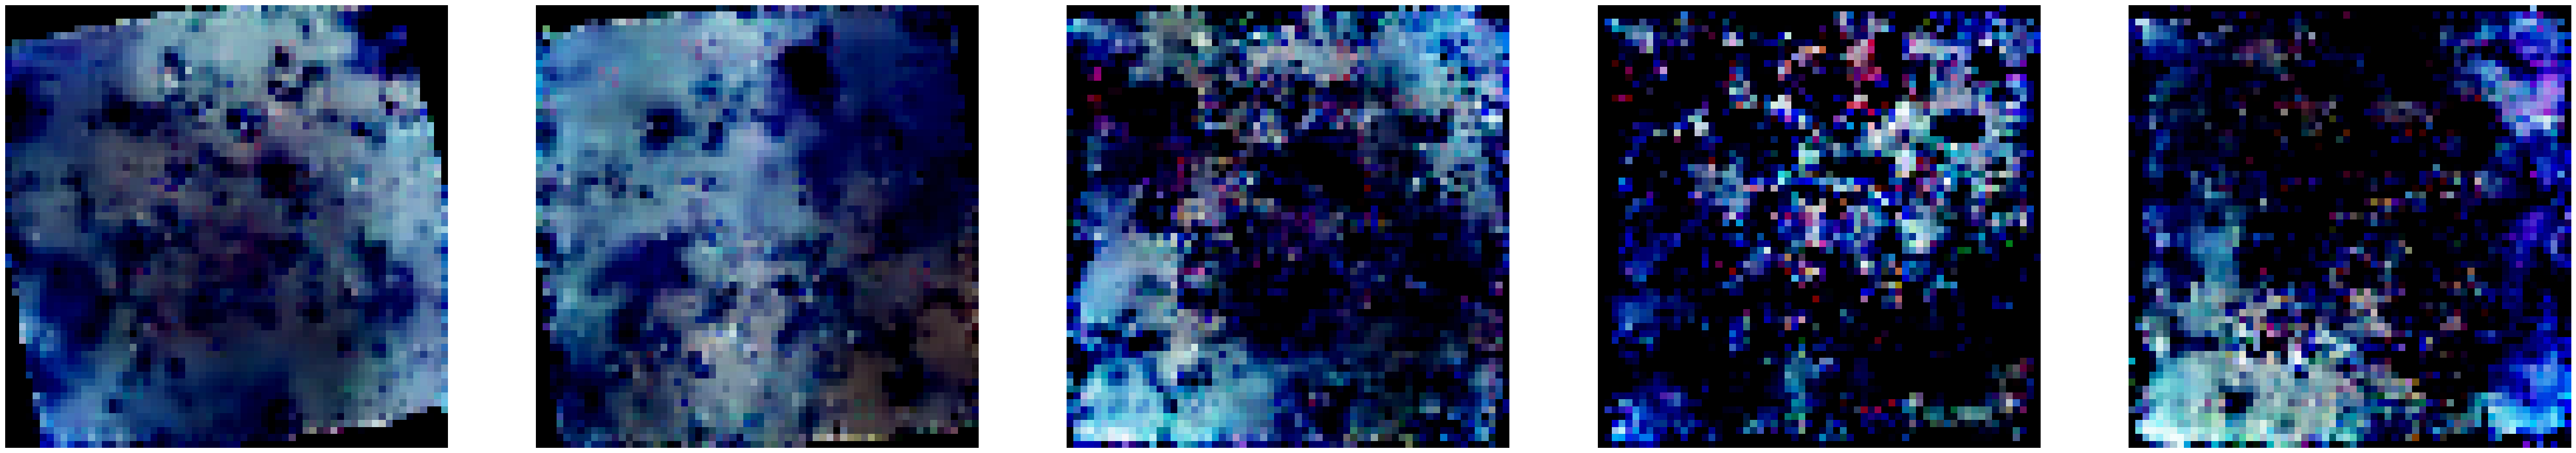

  0%|          | 0/41 [00:00<?, ?it/s]

[2002/2750][20/41] Loss_D: 0.3570 Loss_G: 4.5752 D(x): 0.8678 D(G(z)): 0.0135 / 0.0109
[2002/2750][40/41] Loss_D: 0.3869 Loss_G: 4.5452 D(x): 0.9326 D(G(z)): 0.0166 / 0.0104


  0%|          | 0/41 [00:00<?, ?it/s]

[2003/2750][20/41] Loss_D: 0.9825 Loss_G: 5.0316 D(x): 0.9818 D(G(z)): 0.3355 / 0.0067
[2003/2750][40/41] Loss_D: 0.5156 Loss_G: 3.6214 D(x): 0.9234 D(G(z)): 0.1517 / 0.0296


  0%|          | 0/41 [00:00<?, ?it/s]

[2004/2750][20/41] Loss_D: 0.4104 Loss_G: 6.0966 D(x): 0.9654 D(G(z)): 0.0021 / 0.0016
[2004/2750][40/41] Loss_D: 0.4105 Loss_G: 3.5180 D(x): 0.9190 D(G(z)): 0.0384 / 0.0390


  0%|          | 0/41 [00:00<?, ?it/s]

[2005/2750][20/41] Loss_D: 0.3930 Loss_G: 5.1564 D(x): 0.9220 D(G(z)): 0.0142 / 0.0096
[2005/2750][40/41] Loss_D: 0.7050 Loss_G: 4.1610 D(x): 0.9131 D(G(z)): 0.0470 / 0.0138


  0%|          | 0/41 [00:00<?, ?it/s]

[2006/2750][20/41] Loss_D: 0.4573 Loss_G: 3.7143 D(x): 0.9194 D(G(z)): 0.0802 / 0.0260
[2006/2750][40/41] Loss_D: 0.3731 Loss_G: 4.9161 D(x): 0.8259 D(G(z)): 0.0095 / 0.0067


  0%|          | 0/41 [00:00<?, ?it/s]

[2007/2750][20/41] Loss_D: 0.4003 Loss_G: 3.6951 D(x): 0.8723 D(G(z)): 0.0520 / 0.0229
[2007/2750][40/41] Loss_D: 0.3608 Loss_G: 4.5469 D(x): 0.8943 D(G(z)): 0.0186 / 0.0119


  0%|          | 0/41 [00:00<?, ?it/s]

[2008/2750][20/41] Loss_D: 0.4715 Loss_G: 3.4994 D(x): 0.9529 D(G(z)): 0.0973 / 0.0367
[2008/2750][40/41] Loss_D: 0.3826 Loss_G: 4.0838 D(x): 0.8813 D(G(z)): 0.0384 / 0.0158


  0%|          | 0/41 [00:00<?, ?it/s]

[2009/2750][20/41] Loss_D: 0.3760 Loss_G: 4.1920 D(x): 0.9376 D(G(z)): 0.0258 / 0.0146
[2009/2750][40/41] Loss_D: 0.4444 Loss_G: 3.7904 D(x): 0.8547 D(G(z)): 0.0307 / 0.0239


  0%|          | 0/41 [00:00<?, ?it/s]

[2010/2750][20/41] Loss_D: 0.3551 Loss_G: 4.0240 D(x): 0.8702 D(G(z)): 0.0154 / 0.0152
[2010/2750][40/41] Loss_D: 1.0747 Loss_G: 4.4076 D(x): 0.9683 D(G(z)): 0.4264 / 0.0186


  0%|          | 0/41 [00:00<?, ?it/s]

[2011/2750][20/41] Loss_D: 0.3782 Loss_G: 4.9170 D(x): 0.9231 D(G(z)): 0.0181 / 0.0077
[2011/2750][40/41] Loss_D: 0.4949 Loss_G: 2.8331 D(x): 0.9082 D(G(z)): 0.1340 / 0.0598


  0%|          | 0/41 [00:00<?, ?it/s]

[2012/2750][20/41] Loss_D: 0.3771 Loss_G: 4.5757 D(x): 0.9156 D(G(z)): 0.0188 / 0.0127
[2012/2750][40/41] Loss_D: 0.8818 Loss_G: 2.8948 D(x): 0.8840 D(G(z)): 0.3760 / 0.0571


  0%|          | 0/41 [00:00<?, ?it/s]

[2013/2750][20/41] Loss_D: 0.5593 Loss_G: 3.6948 D(x): 0.8871 D(G(z)): 0.1294 / 0.0220
[2013/2750][40/41] Loss_D: 0.3948 Loss_G: 4.5311 D(x): 0.8707 D(G(z)): 0.0143 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[2014/2750][20/41] Loss_D: 0.4021 Loss_G: 4.1553 D(x): 0.8766 D(G(z)): 0.0299 / 0.0163
[2014/2750][40/41] Loss_D: 0.5072 Loss_G: 3.7732 D(x): 0.9382 D(G(z)): 0.1205 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[2015/2750][20/41] Loss_D: 0.4624 Loss_G: 3.8816 D(x): 0.9161 D(G(z)): 0.0727 / 0.0180
[2015/2750][40/41] Loss_D: 0.4224 Loss_G: 4.0059 D(x): 0.9398 D(G(z)): 0.0172 / 0.0234


  0%|          | 0/41 [00:00<?, ?it/s]

[2016/2750][20/41] Loss_D: 0.4359 Loss_G: 3.6106 D(x): 0.9475 D(G(z)): 0.0611 / 0.0268
[2016/2750][40/41] Loss_D: 0.4272 Loss_G: 3.6466 D(x): 0.9468 D(G(z)): 0.0425 / 0.0270


  0%|          | 0/41 [00:00<?, ?it/s]

[2017/2750][20/41] Loss_D: 0.5777 Loss_G: 2.5853 D(x): 0.8259 D(G(z)): 0.1412 / 0.0794
[2017/2750][40/41] Loss_D: 0.4771 Loss_G: 3.9113 D(x): 0.7192 D(G(z)): 0.0076 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[2018/2750][20/41] Loss_D: 0.4590 Loss_G: 3.3446 D(x): 0.9290 D(G(z)): 0.0447 / 0.0312
[2018/2750][40/41] Loss_D: 0.4016 Loss_G: 4.8443 D(x): 0.9152 D(G(z)): 0.0333 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[2019/2750][20/41] Loss_D: 0.4867 Loss_G: 3.4290 D(x): 0.8635 D(G(z)): 0.1014 / 0.0323
[2019/2750][40/41] Loss_D: 0.4278 Loss_G: 4.0018 D(x): 0.9367 D(G(z)): 0.0767 / 0.0173


  0%|          | 0/41 [00:00<?, ?it/s]

[2020/2750][20/41] Loss_D: 0.3571 Loss_G: 5.7268 D(x): 0.9188 D(G(z)): 0.0042 / 0.0032
[2020/2750][40/41] Loss_D: 0.4307 Loss_G: 5.0726 D(x): 0.8566 D(G(z)): 0.0193 / 0.0084


  0%|          | 0/41 [00:00<?, ?it/s]

[2021/2750][20/41] Loss_D: 0.3911 Loss_G: 3.7625 D(x): 0.8667 D(G(z)): 0.0415 / 0.0229
[2021/2750][40/41] Loss_D: 0.3686 Loss_G: 4.5224 D(x): 0.8871 D(G(z)): 0.0169 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[2022/2750][20/41] Loss_D: 0.4788 Loss_G: 3.8297 D(x): 0.9199 D(G(z)): 0.0802 / 0.0240
[2022/2750][40/41] Loss_D: 0.7755 Loss_G: 4.1572 D(x): 0.9781 D(G(z)): 0.2155 / 0.0147


  0%|          | 0/41 [00:00<?, ?it/s]

[2023/2750][20/41] Loss_D: 0.5411 Loss_G: 2.7834 D(x): 0.9668 D(G(z)): 0.0740 / 0.0660
[2023/2750][40/41] Loss_D: 0.5735 Loss_G: 3.5036 D(x): 0.9654 D(G(z)): 0.0967 / 0.0378


  0%|          | 0/41 [00:00<?, ?it/s]

[2024/2750][20/41] Loss_D: 0.4167 Loss_G: 3.9737 D(x): 0.9210 D(G(z)): 0.0472 / 0.0157
[2024/2750][40/41] Loss_D: 0.4404 Loss_G: 3.5664 D(x): 0.8269 D(G(z)): 0.0268 / 0.0249


  0%|          | 0/41 [00:00<?, ?it/s]

[2025/2750][20/41] Loss_D: 0.4245 Loss_G: 3.6909 D(x): 0.8156 D(G(z)): 0.0198 / 0.0301
[2025/2750][40/41] Loss_D: 0.4284 Loss_G: 3.9364 D(x): 0.8968 D(G(z)): 0.0376 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[2026/2750][20/41] Loss_D: 0.4295 Loss_G: 3.7079 D(x): 0.8661 D(G(z)): 0.0571 / 0.0225
[2026/2750][40/41] Loss_D: 0.4703 Loss_G: 3.5736 D(x): 0.7844 D(G(z)): 0.0290 / 0.0275


  0%|          | 0/41 [00:00<?, ?it/s]

[2027/2750][20/41] Loss_D: 0.5503 Loss_G: 3.3619 D(x): 0.6776 D(G(z)): 0.0194 / 0.0408
[2027/2750][40/41] Loss_D: 0.5944 Loss_G: 2.9659 D(x): 0.9872 D(G(z)): 0.0493 / 0.0551


  0%|          | 0/41 [00:00<?, ?it/s]

[2028/2750][20/41] Loss_D: 0.4397 Loss_G: 3.6828 D(x): 0.9217 D(G(z)): 0.0409 / 0.0252
[2028/2750][40/41] Loss_D: 0.4251 Loss_G: 4.2270 D(x): 0.8503 D(G(z)): 0.0264 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[2029/2750][20/41] Loss_D: 1.1125 Loss_G: 3.1257 D(x): 0.9823 D(G(z)): 0.2752 / 0.0402
[2029/2750][40/41] Loss_D: 0.5563 Loss_G: 4.8367 D(x): 0.9298 D(G(z)): 0.0721 / 0.0071


  0%|          | 0/41 [00:00<?, ?it/s]

[2030/2750][20/41] Loss_D: 0.5080 Loss_G: 3.5505 D(x): 0.7394 D(G(z)): 0.0166 / 0.0308
[2030/2750][40/41] Loss_D: 0.4129 Loss_G: 3.9823 D(x): 0.9372 D(G(z)): 0.0422 / 0.0184


  0%|          | 0/41 [00:00<?, ?it/s]

[2031/2750][20/41] Loss_D: 0.4857 Loss_G: 4.1989 D(x): 0.9774 D(G(z)): 0.0253 / 0.0140
[2031/2750][40/41] Loss_D: 0.4026 Loss_G: 5.0470 D(x): 0.9230 D(G(z)): 0.0138 / 0.0066


  0%|          | 0/41 [00:00<?, ?it/s]

[2032/2750][20/41] Loss_D: 0.4524 Loss_G: 4.5971 D(x): 0.9454 D(G(z)): 0.0224 / 0.0096
[2032/2750][40/41] Loss_D: 0.5096 Loss_G: 3.8564 D(x): 0.8030 D(G(z)): 0.0190 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[2033/2750][20/41] Loss_D: 0.5352 Loss_G: 3.8561 D(x): 0.9633 D(G(z)): 0.1141 / 0.0215
[2033/2750][40/41] Loss_D: 0.4820 Loss_G: 3.6523 D(x): 0.9180 D(G(z)): 0.0932 / 0.0264


  0%|          | 0/41 [00:00<?, ?it/s]

[2034/2750][20/41] Loss_D: 0.3922 Loss_G: 4.7604 D(x): 0.9060 D(G(z)): 0.0154 / 0.0088
[2034/2750][40/41] Loss_D: 0.4333 Loss_G: 4.8742 D(x): 0.7614 D(G(z)): 0.0052 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[2035/2750][20/41] Loss_D: 0.8101 Loss_G: 4.3269 D(x): 0.9519 D(G(z)): 0.3112 / 0.0169
[2035/2750][40/41] Loss_D: 0.5367 Loss_G: 3.6994 D(x): 0.9719 D(G(z)): 0.0939 / 0.0241


  0%|          | 0/41 [00:00<?, ?it/s]

[2036/2750][20/41] Loss_D: 0.5478 Loss_G: 3.6663 D(x): 0.6689 D(G(z)): 0.0143 / 0.0263
[2036/2750][40/41] Loss_D: 0.4443 Loss_G: 5.0658 D(x): 0.9648 D(G(z)): 0.0155 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[2037/2750][20/41] Loss_D: 0.4785 Loss_G: 2.9711 D(x): 0.9371 D(G(z)): 0.0747 / 0.0615
[2037/2750][40/41] Loss_D: 0.5209 Loss_G: 4.2963 D(x): 0.9740 D(G(z)): 0.0624 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[2038/2750][20/41] Loss_D: 0.3741 Loss_G: 4.7390 D(x): 0.8623 D(G(z)): 0.0078 / 0.0110
[2038/2750][40/41] Loss_D: 0.6315 Loss_G: 3.9341 D(x): 0.9704 D(G(z)): 0.1604 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[2039/2750][20/41] Loss_D: 0.6223 Loss_G: 2.8818 D(x): 0.6619 D(G(z)): 0.0639 / 0.0617
[2039/2750][40/41] Loss_D: 0.4931 Loss_G: 4.6244 D(x): 0.9813 D(G(z)): 0.0272 / 0.0100


  0%|          | 0/41 [00:00<?, ?it/s]

[2040/2750][20/41] Loss_D: 0.8641 Loss_G: 2.7379 D(x): 0.4849 D(G(z)): 0.0124 / 0.0937
[2040/2750][40/41] Loss_D: 0.3945 Loss_G: 5.2088 D(x): 0.9301 D(G(z)): 0.0082 / 0.0047


  0%|          | 0/41 [00:00<?, ?it/s]

[2041/2750][20/41] Loss_D: 0.4077 Loss_G: 4.9910 D(x): 0.8100 D(G(z)): 0.0103 / 0.0081
[2041/2750][40/41] Loss_D: 0.4756 Loss_G: 4.6336 D(x): 0.9611 D(G(z)): 0.0285 / 0.0099


  0%|          | 0/41 [00:00<?, ?it/s]

[2042/2750][20/41] Loss_D: 0.4562 Loss_G: 4.4113 D(x): 0.8463 D(G(z)): 0.0205 / 0.0147
[2042/2750][40/41] Loss_D: 0.4765 Loss_G: 3.8886 D(x): 0.9608 D(G(z)): 0.0673 / 0.0218


  0%|          | 0/41 [00:00<?, ?it/s]

[2043/2750][20/41] Loss_D: 0.3963 Loss_G: 4.3123 D(x): 0.9147 D(G(z)): 0.0250 / 0.0147
[2043/2750][40/41] Loss_D: 0.4751 Loss_G: 3.7272 D(x): 0.9256 D(G(z)): 0.0851 / 0.0256


  0%|          | 0/41 [00:00<?, ?it/s]

[2044/2750][20/41] Loss_D: 0.4595 Loss_G: 3.2191 D(x): 0.7835 D(G(z)): 0.0338 / 0.0412
[2044/2750][40/41] Loss_D: 0.6003 Loss_G: 2.9811 D(x): 0.6965 D(G(z)): 0.0638 / 0.0582


  0%|          | 0/41 [00:00<?, ?it/s]

[2045/2750][20/41] Loss_D: 0.5298 Loss_G: 2.9826 D(x): 0.7256 D(G(z)): 0.0356 / 0.0576
[2045/2750][40/41] Loss_D: 0.6163 Loss_G: 2.8054 D(x): 0.6884 D(G(z)): 0.0317 / 0.0736


  0%|          | 0/41 [00:00<?, ?it/s]

[2046/2750][20/41] Loss_D: 0.3870 Loss_G: 4.4279 D(x): 0.8749 D(G(z)): 0.0173 / 0.0142
[2046/2750][40/41] Loss_D: 0.6176 Loss_G: 3.1296 D(x): 0.6789 D(G(z)): 0.0757 / 0.0532


  0%|          | 0/41 [00:00<?, ?it/s]

[2047/2750][20/41] Loss_D: 0.4720 Loss_G: 3.1578 D(x): 0.9350 D(G(z)): 0.0877 / 0.0454
[2047/2750][40/41] Loss_D: 0.4174 Loss_G: 4.2273 D(x): 0.9430 D(G(z)): 0.0419 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[2048/2750][20/41] Loss_D: 0.4359 Loss_G: 3.9111 D(x): 0.9328 D(G(z)): 0.0648 / 0.0247
[2048/2750][40/41] Loss_D: 0.7062 Loss_G: 3.1547 D(x): 0.5824 D(G(z)): 0.0185 / 0.0423


  0%|          | 0/41 [00:00<?, ?it/s]

[2049/2750][20/41] Loss_D: 0.3837 Loss_G: 4.3742 D(x): 0.9198 D(G(z)): 0.0409 / 0.0114
[2049/2750][40/41] Loss_D: 0.3594 Loss_G: 5.0040 D(x): 0.8967 D(G(z)): 0.0120 / 0.0071


  0%|          | 0/41 [00:00<?, ?it/s]

[2050/2750][20/41] Loss_D: 0.3513 Loss_G: 5.0970 D(x): 0.8590 D(G(z)): 0.0062 / 0.0057
[2050/2750][40/41] Loss_D: 0.3771 Loss_G: 4.9474 D(x): 0.8739 D(G(z)): 0.0207 / 0.0084


  0%|          | 0/41 [00:00<?, ?it/s]

[2051/2750][20/41] Loss_D: 0.3911 Loss_G: 3.9866 D(x): 0.9061 D(G(z)): 0.0326 / 0.0221
[2051/2750][40/41] Loss_D: 0.3560 Loss_G: 5.3598 D(x): 0.8468 D(G(z)): 0.0056 / 0.0052


  0%|          | 0/41 [00:00<?, ?it/s]

[2052/2750][20/41] Loss_D: 0.5358 Loss_G: 2.8829 D(x): 0.8436 D(G(z)): 0.1340 / 0.0663
[2052/2750][40/41] Loss_D: 0.4843 Loss_G: 5.0309 D(x): 0.9169 D(G(z)): 0.0234 / 0.0087


  0%|          | 0/41 [00:00<?, ?it/s]

[2053/2750][20/41] Loss_D: 0.4558 Loss_G: 3.7119 D(x): 0.8046 D(G(z)): 0.0399 / 0.0258
[2053/2750][40/41] Loss_D: 0.7551 Loss_G: 3.6848 D(x): 0.6272 D(G(z)): 0.0166 / 0.0368


  0%|          | 0/41 [00:00<?, ?it/s]

[2054/2750][20/41] Loss_D: 0.4656 Loss_G: 4.6988 D(x): 0.9073 D(G(z)): 0.0143 / 0.0101
[2054/2750][40/41] Loss_D: 0.3869 Loss_G: 4.8486 D(x): 0.9246 D(G(z)): 0.0121 / 0.0079


  0%|          | 0/41 [00:00<?, ?it/s]

[2055/2750][20/41] Loss_D: 0.4583 Loss_G: 4.8300 D(x): 0.7760 D(G(z)): 0.0066 / 0.0081
[2055/2750][40/41] Loss_D: 0.5299 Loss_G: 3.2571 D(x): 0.8656 D(G(z)): 0.1031 / 0.0371


  0%|          | 0/41 [00:00<?, ?it/s]

[2056/2750][20/41] Loss_D: 0.3913 Loss_G: 5.1891 D(x): 0.9355 D(G(z)): 0.0079 / 0.0048
[2056/2750][40/41] Loss_D: 0.4841 Loss_G: 4.0515 D(x): 0.7732 D(G(z)): 0.0332 / 0.0188


  0%|          | 0/41 [00:00<?, ?it/s]

[2057/2750][20/41] Loss_D: 0.4489 Loss_G: 4.2518 D(x): 0.8464 D(G(z)): 0.0419 / 0.0181
[2057/2750][40/41] Loss_D: 0.4660 Loss_G: 3.3207 D(x): 0.9582 D(G(z)): 0.0698 / 0.0384


  0%|          | 0/41 [00:00<?, ?it/s]

[2058/2750][20/41] Loss_D: 0.4078 Loss_G: 4.4104 D(x): 0.8215 D(G(z)): 0.0156 / 0.0114
[2058/2750][40/41] Loss_D: 0.5430 Loss_G: 3.5491 D(x): 0.8860 D(G(z)): 0.1237 / 0.0319


  0%|          | 0/41 [00:00<?, ?it/s]

[2059/2750][20/41] Loss_D: 0.3768 Loss_G: 5.4070 D(x): 0.8708 D(G(z)): 0.0044 / 0.0040
[2059/2750][40/41] Loss_D: 0.3736 Loss_G: 4.8429 D(x): 0.8718 D(G(z)): 0.0075 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[2060/2750][20/41] Loss_D: 0.4268 Loss_G: 3.7467 D(x): 0.9364 D(G(z)): 0.0435 / 0.0252
[2060/2750][40/41] Loss_D: 0.4034 Loss_G: 4.1668 D(x): 0.8982 D(G(z)): 0.0194 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[2061/2750][20/41] Loss_D: 0.6344 Loss_G: 4.0923 D(x): 0.9747 D(G(z)): 0.1471 / 0.0153
[2061/2750][40/41] Loss_D: 0.4711 Loss_G: 3.2696 D(x): 0.9567 D(G(z)): 0.0447 / 0.0417


  0%|          | 0/41 [00:00<?, ?it/s]

[2062/2750][20/41] Loss_D: 0.4281 Loss_G: 3.6565 D(x): 0.9348 D(G(z)): 0.0358 / 0.0214
[2062/2750][40/41] Loss_D: 0.4459 Loss_G: 4.7589 D(x): 0.9664 D(G(z)): 0.0156 / 0.0074


  0%|          | 0/41 [00:00<?, ?it/s]

[2063/2750][20/41] Loss_D: 0.5931 Loss_G: 3.3632 D(x): 0.6564 D(G(z)): 0.0161 / 0.0318
[2063/2750][40/41] Loss_D: 0.3857 Loss_G: 4.0222 D(x): 0.8416 D(G(z)): 0.0219 / 0.0161


  0%|          | 0/41 [00:00<?, ?it/s]

[2064/2750][20/41] Loss_D: 0.4825 Loss_G: 3.5363 D(x): 0.9673 D(G(z)): 0.0795 / 0.0261
[2064/2750][40/41] Loss_D: 0.6778 Loss_G: 3.7212 D(x): 0.9532 D(G(z)): 0.2362 / 0.0295


  0%|          | 0/41 [00:00<?, ?it/s]

[2065/2750][20/41] Loss_D: 0.6764 Loss_G: 3.8085 D(x): 0.9405 D(G(z)): 0.2303 / 0.0206
[2065/2750][40/41] Loss_D: 0.5818 Loss_G: 4.6858 D(x): 0.6911 D(G(z)): 0.0037 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[2066/2750][20/41] Loss_D: 0.4642 Loss_G: 3.8777 D(x): 0.9439 D(G(z)): 0.0875 / 0.0179
[2066/2750][40/41] Loss_D: 1.6241 Loss_G: 1.5842 D(x): 0.2791 D(G(z)): 0.0248 / 0.2525


  0%|          | 0/41 [00:00<?, ?it/s]

[2067/2750][20/41] Loss_D: 0.3734 Loss_G: 4.4459 D(x): 0.8642 D(G(z)): 0.0234 / 0.0134
[2067/2750][40/41] Loss_D: 0.6655 Loss_G: 3.3192 D(x): 0.7593 D(G(z)): 0.1529 / 0.0362


  0%|          | 0/41 [00:00<?, ?it/s]

[2068/2750][20/41] Loss_D: 0.3881 Loss_G: 3.7023 D(x): 0.9060 D(G(z)): 0.0484 / 0.0267
[2068/2750][40/41] Loss_D: 0.3781 Loss_G: 4.1646 D(x): 0.9157 D(G(z)): 0.0270 / 0.0162


  0%|          | 0/41 [00:00<?, ?it/s]

[2069/2750][20/41] Loss_D: 0.3620 Loss_G: 4.0445 D(x): 0.9139 D(G(z)): 0.0262 / 0.0173
[2069/2750][40/41] Loss_D: 0.4202 Loss_G: 4.9392 D(x): 0.9532 D(G(z)): 0.0415 / 0.0087


  0%|          | 0/41 [00:00<?, ?it/s]

[2070/2750][20/41] Loss_D: 0.3850 Loss_G: 6.1452 D(x): 0.9392 D(G(z)): 0.0028 / 0.0018
[2070/2750][40/41] Loss_D: 0.4086 Loss_G: 4.5800 D(x): 0.9104 D(G(z)): 0.0148 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[2071/2750][20/41] Loss_D: 0.3570 Loss_G: 3.5608 D(x): 0.9028 D(G(z)): 0.0191 / 0.0256
[2071/2750][40/41] Loss_D: 0.3468 Loss_G: 5.2192 D(x): 0.9042 D(G(z)): 0.0084 / 0.0060


  0%|          | 0/41 [00:00<?, ?it/s]

[2072/2750][20/41] Loss_D: 0.4190 Loss_G: 3.7348 D(x): 0.9143 D(G(z)): 0.0751 / 0.0233
[2072/2750][40/41] Loss_D: 0.3602 Loss_G: 4.9209 D(x): 0.8896 D(G(z)): 0.0145 / 0.0097


  0%|          | 0/41 [00:00<?, ?it/s]

[2073/2750][20/41] Loss_D: 0.4190 Loss_G: 4.6701 D(x): 0.9567 D(G(z)): 0.0212 / 0.0076
[2073/2750][40/41] Loss_D: 0.4657 Loss_G: 4.8122 D(x): 0.9718 D(G(z)): 0.0206 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[2074/2750][20/41] Loss_D: 0.6898 Loss_G: 6.4968 D(x): 0.5893 D(G(z)): 0.0023 / 0.0017
[2074/2750][40/41] Loss_D: 0.4422 Loss_G: 4.0421 D(x): 0.9132 D(G(z)): 0.0566 / 0.0175


  0%|          | 0/41 [00:00<?, ?it/s]

[2075/2750][20/41] Loss_D: 0.5451 Loss_G: 3.4565 D(x): 0.7603 D(G(z)): 0.0700 / 0.0432
[2075/2750][40/41] Loss_D: 0.4316 Loss_G: 4.1057 D(x): 0.8349 D(G(z)): 0.0251 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[2076/2750][20/41] Loss_D: 0.5132 Loss_G: 4.8288 D(x): 0.7163 D(G(z)): 0.0104 / 0.0101
[2076/2750][40/41] Loss_D: 0.4299 Loss_G: 3.5979 D(x): 0.8787 D(G(z)): 0.0422 / 0.0280


  0%|          | 0/41 [00:00<?, ?it/s]

[2077/2750][20/41] Loss_D: 0.4292 Loss_G: 3.0525 D(x): 0.8486 D(G(z)): 0.0531 / 0.0409
[2077/2750][40/41] Loss_D: 0.5174 Loss_G: 4.2167 D(x): 0.9830 D(G(z)): 0.0472 / 0.0175


  0%|          | 0/41 [00:00<?, ?it/s]

[2078/2750][20/41] Loss_D: 0.4409 Loss_G: 3.3374 D(x): 0.8006 D(G(z)): 0.0314 / 0.0331
[2078/2750][40/41] Loss_D: 0.4066 Loss_G: 4.0994 D(x): 0.9183 D(G(z)): 0.0387 / 0.0258


  0%|          | 0/41 [00:00<?, ?it/s]

[2079/2750][20/41] Loss_D: 0.4288 Loss_G: 3.3982 D(x): 0.7985 D(G(z)): 0.0263 / 0.0489
[2079/2750][40/41] Loss_D: 0.4095 Loss_G: 4.6217 D(x): 0.8677 D(G(z)): 0.0104 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[2080/2750][20/41] Loss_D: 0.4051 Loss_G: 4.8265 D(x): 0.9303 D(G(z)): 0.0071 / 0.0068
[2080/2750][40/41] Loss_D: 0.3717 Loss_G: 6.1131 D(x): 0.8192 D(G(z)): 0.0022 / 0.0021


  0%|          | 0/41 [00:00<?, ?it/s]

[2081/2750][20/41] Loss_D: 0.3482 Loss_G: 4.8515 D(x): 0.9043 D(G(z)): 0.0072 / 0.0066
[2081/2750][40/41] Loss_D: 0.9084 Loss_G: 2.9135 D(x): 0.4722 D(G(z)): 0.0117 / 0.0659


  0%|          | 0/41 [00:00<?, ?it/s]

[2082/2750][20/41] Loss_D: 0.3932 Loss_G: 4.7339 D(x): 0.9226 D(G(z)): 0.0164 / 0.0096
[2082/2750][40/41] Loss_D: 0.4205 Loss_G: 5.5325 D(x): 0.9432 D(G(z)): 0.0067 / 0.0034


  0%|          | 0/41 [00:00<?, ?it/s]

[2083/2750][20/41] Loss_D: 0.4060 Loss_G: 3.4569 D(x): 0.8911 D(G(z)): 0.0468 / 0.0277
[2083/2750][40/41] Loss_D: 0.5039 Loss_G: 3.5238 D(x): 0.7792 D(G(z)): 0.0453 / 0.0335


  0%|          | 0/41 [00:00<?, ?it/s]

[2084/2750][20/41] Loss_D: 0.3509 Loss_G: 4.8565 D(x): 0.9036 D(G(z)): 0.0131 / 0.0089
[2084/2750][40/41] Loss_D: 0.4180 Loss_G: 3.7422 D(x): 0.9380 D(G(z)): 0.0576 / 0.0280


  0%|          | 0/41 [00:00<?, ?it/s]

[2085/2750][20/41] Loss_D: 0.5548 Loss_G: 3.5892 D(x): 0.8758 D(G(z)): 0.1000 / 0.0283
[2085/2750][40/41] Loss_D: 0.3972 Loss_G: 5.3423 D(x): 0.9300 D(G(z)): 0.0084 / 0.0049


  0%|          | 0/41 [00:00<?, ?it/s]

[2086/2750][20/41] Loss_D: 0.5352 Loss_G: 3.9108 D(x): 0.8844 D(G(z)): 0.1182 / 0.0209
[2086/2750][40/41] Loss_D: 0.7184 Loss_G: 4.6002 D(x): 0.9338 D(G(z)): 0.2411 / 0.0091


  0%|          | 0/41 [00:00<?, ?it/s]

[2087/2750][20/41] Loss_D: 0.3817 Loss_G: 3.8559 D(x): 0.8837 D(G(z)): 0.0379 / 0.0201
[2087/2750][40/41] Loss_D: 0.3599 Loss_G: 5.1659 D(x): 0.8605 D(G(z)): 0.0065 / 0.0056


  0%|          | 0/41 [00:00<?, ?it/s]

[2088/2750][20/41] Loss_D: 0.5089 Loss_G: 2.7467 D(x): 0.8250 D(G(z)): 0.0798 / 0.0630
[2088/2750][40/41] Loss_D: 0.3570 Loss_G: 4.1273 D(x): 0.8993 D(G(z)): 0.0216 / 0.0144


  0%|          | 0/41 [00:00<?, ?it/s]

[2089/2750][20/41] Loss_D: 0.3457 Loss_G: 6.0096 D(x): 0.9221 D(G(z)): 0.0044 / 0.0022
[2089/2750][40/41] Loss_D: 0.4128 Loss_G: 3.9872 D(x): 0.8862 D(G(z)): 0.0599 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[2090/2750][20/41] Loss_D: 0.3721 Loss_G: 4.2012 D(x): 0.8852 D(G(z)): 0.0302 / 0.0160
[2090/2750][40/41] Loss_D: 0.3543 Loss_G: 4.5386 D(x): 0.8946 D(G(z)): 0.0173 / 0.0119


  0%|          | 0/41 [00:00<?, ?it/s]

[2091/2750][20/41] Loss_D: 0.5536 Loss_G: 3.3231 D(x): 0.8055 D(G(z)): 0.1089 / 0.0399
[2091/2750][40/41] Loss_D: 0.5441 Loss_G: 3.1582 D(x): 0.7530 D(G(z)): 0.0464 / 0.0647


  0%|          | 0/41 [00:00<?, ?it/s]

[2092/2750][20/41] Loss_D: 0.6366 Loss_G: 3.1938 D(x): 0.9539 D(G(z)): 0.1964 / 0.0410
[2092/2750][40/41] Loss_D: 0.3764 Loss_G: 5.6955 D(x): 0.8424 D(G(z)): 0.0052 / 0.0037


  0%|          | 0/41 [00:00<?, ?it/s]

[2093/2750][20/41] Loss_D: 0.8238 Loss_G: 3.3056 D(x): 0.5656 D(G(z)): 0.0097 / 0.0412
[2093/2750][40/41] Loss_D: 0.4365 Loss_G: 4.0157 D(x): 0.8952 D(G(z)): 0.0447 / 0.0193


  0%|          | 0/41 [00:00<?, ?it/s]

[2094/2750][20/41] Loss_D: 0.3660 Loss_G: 4.5315 D(x): 0.8549 D(G(z)): 0.0107 / 0.0091
[2094/2750][40/41] Loss_D: 0.4223 Loss_G: 3.7320 D(x): 0.8631 D(G(z)): 0.0769 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[2095/2750][20/41] Loss_D: 0.3414 Loss_G: 5.5269 D(x): 0.8947 D(G(z)): 0.0058 / 0.0039
[2095/2750][40/41] Loss_D: 0.6586 Loss_G: 4.4478 D(x): 0.9935 D(G(z)): 0.0741 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[2096/2750][20/41] Loss_D: 0.5269 Loss_G: 2.9478 D(x): 0.7821 D(G(z)): 0.1032 / 0.0546
[2096/2750][40/41] Loss_D: 0.4017 Loss_G: 5.2772 D(x): 0.9262 D(G(z)): 0.0081 / 0.0052


  0%|          | 0/41 [00:00<?, ?it/s]

[2097/2750][20/41] Loss_D: 0.4408 Loss_G: 4.0348 D(x): 0.8413 D(G(z)): 0.0298 / 0.0215
[2097/2750][40/41] Loss_D: 0.4577 Loss_G: 5.0852 D(x): 0.7676 D(G(z)): 0.0056 / 0.0083


  0%|          | 0/41 [00:00<?, ?it/s]

[2098/2750][20/41] Loss_D: 0.4505 Loss_G: 4.0448 D(x): 0.9672 D(G(z)): 0.0447 / 0.0163
[2098/2750][40/41] Loss_D: 0.4577 Loss_G: 3.8705 D(x): 0.8423 D(G(z)): 0.0531 / 0.0279


  0%|          | 0/41 [00:00<?, ?it/s]

[2099/2750][20/41] Loss_D: 0.4209 Loss_G: 4.2908 D(x): 0.9630 D(G(z)): 0.0254 / 0.0120
[2099/2750][40/41] Loss_D: 0.3601 Loss_G: 4.5476 D(x): 0.8674 D(G(z)): 0.0102 / 0.0082


  0%|          | 0/41 [00:00<?, ?it/s]

[2100/2750][20/41] Loss_D: 0.4521 Loss_G: 4.2945 D(x): 0.7520 D(G(z)): 0.0107 / 0.0135
[2100/2750][40/41] Loss_D: 0.3661 Loss_G: 4.1580 D(x): 0.9057 D(G(z)): 0.0239 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[2101/2750][20/41] Loss_D: 0.4108 Loss_G: 3.6236 D(x): 0.9138 D(G(z)): 0.0412 / 0.0301
[2101/2750][40/41] Loss_D: 0.3585 Loss_G: 5.7649 D(x): 0.8762 D(G(z)): 0.0045 / 0.0027
Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_2101.pth


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99605674].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999998..0.91592586].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999098..0.92293125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9995987..0.8988641].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9919167].


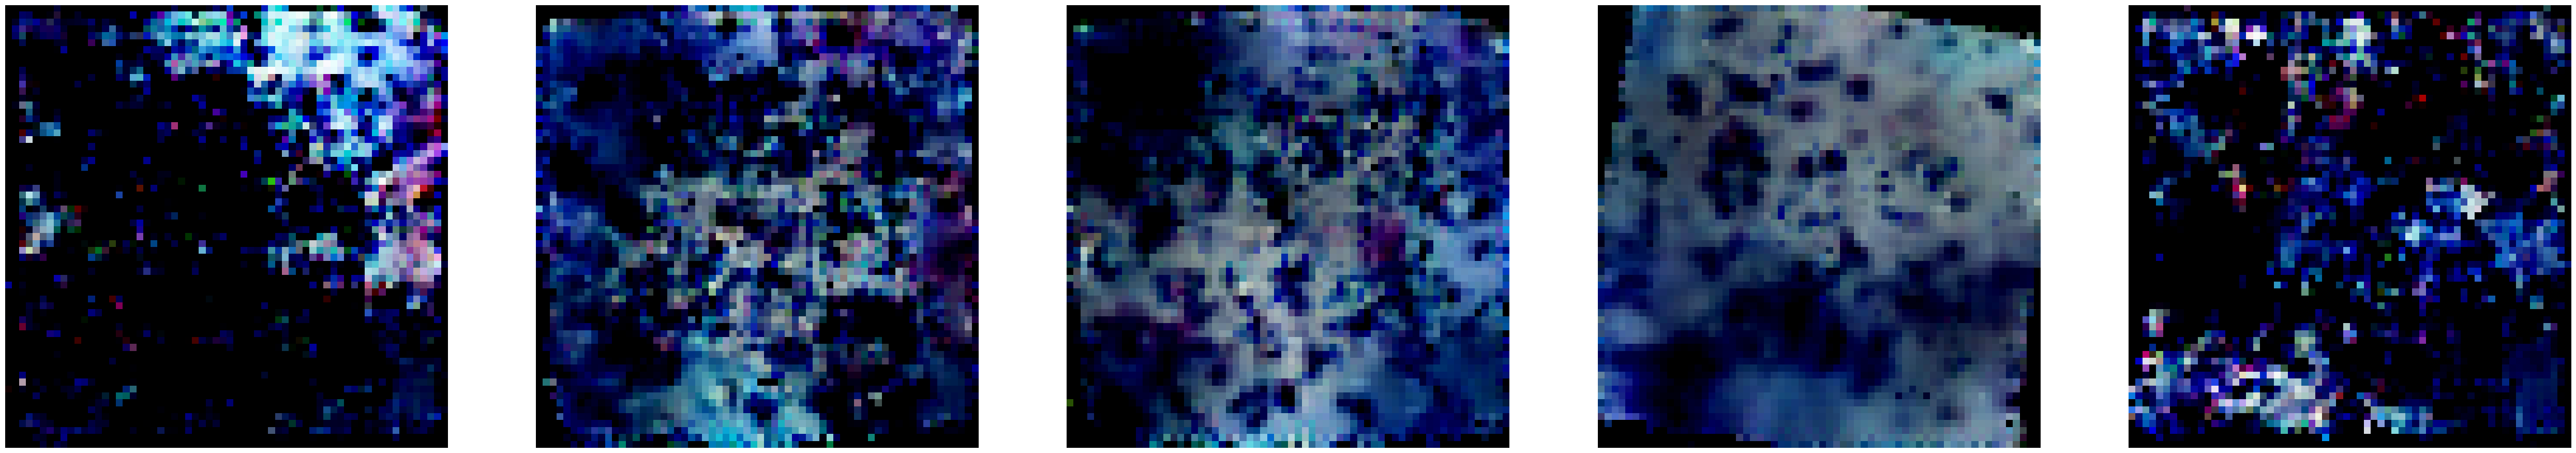

  0%|          | 0/41 [00:00<?, ?it/s]

[2102/2750][20/41] Loss_D: 0.4252 Loss_G: 4.3342 D(x): 0.8823 D(G(z)): 0.0525 / 0.0143
[2102/2750][40/41] Loss_D: 0.5104 Loss_G: 4.8468 D(x): 0.7760 D(G(z)): 0.0146 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[2103/2750][20/41] Loss_D: 0.3586 Loss_G: 4.4707 D(x): 0.9131 D(G(z)): 0.0223 / 0.0109
[2103/2750][40/41] Loss_D: 0.4362 Loss_G: 3.6300 D(x): 0.9067 D(G(z)): 0.0850 / 0.0248


  0%|          | 0/41 [00:00<?, ?it/s]

[2104/2750][20/41] Loss_D: 0.6072 Loss_G: 2.7882 D(x): 0.9255 D(G(z)): 0.2041 / 0.0593
[2104/2750][40/41] Loss_D: 0.5254 Loss_G: 3.4765 D(x): 0.9575 D(G(z)): 0.1301 / 0.0285


  0%|          | 0/41 [00:00<?, ?it/s]

[2105/2750][20/41] Loss_D: 0.5408 Loss_G: 3.9465 D(x): 0.9803 D(G(z)): 0.0647 / 0.0217
[2105/2750][40/41] Loss_D: 0.4455 Loss_G: 3.4374 D(x): 0.8586 D(G(z)): 0.0446 / 0.0324


  0%|          | 0/41 [00:00<?, ?it/s]

[2106/2750][20/41] Loss_D: 0.5582 Loss_G: 3.6183 D(x): 0.9411 D(G(z)): 0.1165 / 0.0478
[2106/2750][40/41] Loss_D: 0.4419 Loss_G: 4.4309 D(x): 0.9170 D(G(z)): 0.0268 / 0.0102


  0%|          | 0/41 [00:00<?, ?it/s]

[2107/2750][20/41] Loss_D: 0.4429 Loss_G: 3.8422 D(x): 0.8470 D(G(z)): 0.0510 / 0.0213
[2107/2750][40/41] Loss_D: 0.5661 Loss_G: 3.6865 D(x): 0.6777 D(G(z)): 0.0145 / 0.0263


  0%|          | 0/41 [00:00<?, ?it/s]

[2108/2750][20/41] Loss_D: 0.4249 Loss_G: 5.0440 D(x): 0.9377 D(G(z)): 0.0142 / 0.0076
[2108/2750][40/41] Loss_D: 0.4913 Loss_G: 4.0624 D(x): 0.8565 D(G(z)): 0.0658 / 0.0144


  0%|          | 0/41 [00:00<?, ?it/s]

[2109/2750][20/41] Loss_D: 0.5913 Loss_G: 3.8664 D(x): 0.9862 D(G(z)): 0.0804 / 0.0211
[2109/2750][40/41] Loss_D: 0.5424 Loss_G: 3.3047 D(x): 0.6907 D(G(z)): 0.0176 / 0.0386


  0%|          | 0/41 [00:00<?, ?it/s]

[2110/2750][20/41] Loss_D: 0.4829 Loss_G: 3.3451 D(x): 0.7841 D(G(z)): 0.0572 / 0.0315
[2110/2750][40/41] Loss_D: 0.4575 Loss_G: 6.2633 D(x): 0.7848 D(G(z)): 0.0061 / 0.0046


  0%|          | 0/41 [00:00<?, ?it/s]

[2111/2750][20/41] Loss_D: 0.4855 Loss_G: 3.5803 D(x): 0.9638 D(G(z)): 0.0783 / 0.0247
[2111/2750][40/41] Loss_D: 0.5681 Loss_G: 3.3797 D(x): 0.6600 D(G(z)): 0.0181 / 0.0437


  0%|          | 0/41 [00:00<?, ?it/s]

[2112/2750][20/41] Loss_D: 0.4792 Loss_G: 4.1651 D(x): 0.7511 D(G(z)): 0.0204 / 0.0179
[2112/2750][40/41] Loss_D: 0.4511 Loss_G: 3.3391 D(x): 0.9298 D(G(z)): 0.0835 / 0.0294


  0%|          | 0/41 [00:00<?, ?it/s]

[2113/2750][20/41] Loss_D: 0.4310 Loss_G: 3.9789 D(x): 0.8595 D(G(z)): 0.0492 / 0.0216
[2113/2750][40/41] Loss_D: 0.5678 Loss_G: 4.3108 D(x): 0.9898 D(G(z)): 0.0604 / 0.0138


  0%|          | 0/41 [00:00<?, ?it/s]

[2114/2750][20/41] Loss_D: 0.5164 Loss_G: 4.2232 D(x): 0.8588 D(G(z)): 0.0897 / 0.0135
[2114/2750][40/41] Loss_D: 0.4024 Loss_G: 4.9172 D(x): 0.8385 D(G(z)): 0.0104 / 0.0072


  0%|          | 0/41 [00:00<?, ?it/s]

[2115/2750][20/41] Loss_D: 0.3734 Loss_G: 4.9251 D(x): 0.8256 D(G(z)): 0.0086 / 0.0072
[2115/2750][40/41] Loss_D: 0.4539 Loss_G: 3.1954 D(x): 0.9198 D(G(z)): 0.0931 / 0.0538


  0%|          | 0/41 [00:00<?, ?it/s]

[2116/2750][20/41] Loss_D: 0.3834 Loss_G: 4.1778 D(x): 0.8908 D(G(z)): 0.0316 / 0.0141
[2116/2750][40/41] Loss_D: 0.7611 Loss_G: 3.9740 D(x): 0.9561 D(G(z)): 0.2835 / 0.0203


  0%|          | 0/41 [00:00<?, ?it/s]

[2117/2750][20/41] Loss_D: 0.4161 Loss_G: 4.0675 D(x): 0.8946 D(G(z)): 0.0394 / 0.0217
[2117/2750][40/41] Loss_D: 0.4576 Loss_G: 5.0835 D(x): 0.7479 D(G(z)): 0.0085 / 0.0076


  0%|          | 0/41 [00:00<?, ?it/s]

[2118/2750][20/41] Loss_D: 0.5442 Loss_G: 3.7538 D(x): 0.9385 D(G(z)): 0.1239 / 0.0337
[2118/2750][40/41] Loss_D: 0.6424 Loss_G: 4.0693 D(x): 0.9562 D(G(z)): 0.1544 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[2119/2750][20/41] Loss_D: 0.5318 Loss_G: 2.9982 D(x): 0.8475 D(G(z)): 0.1309 / 0.0577
[2119/2750][40/41] Loss_D: 0.5421 Loss_G: 3.3407 D(x): 0.9336 D(G(z)): 0.1435 / 0.0351


  0%|          | 0/41 [00:00<?, ?it/s]

[2120/2750][20/41] Loss_D: 0.5075 Loss_G: 5.3411 D(x): 0.7916 D(G(z)): 0.0051 / 0.0055
[2120/2750][40/41] Loss_D: 0.4045 Loss_G: 4.1199 D(x): 0.9292 D(G(z)): 0.0341 / 0.0162


  0%|          | 0/41 [00:00<?, ?it/s]

[2121/2750][20/41] Loss_D: 0.5854 Loss_G: 4.0417 D(x): 0.9827 D(G(z)): 0.1082 / 0.0156
[2121/2750][40/41] Loss_D: 0.4299 Loss_G: 3.7278 D(x): 0.8449 D(G(z)): 0.0250 / 0.0261


  0%|          | 0/41 [00:00<?, ?it/s]

[2122/2750][20/41] Loss_D: 0.4996 Loss_G: 3.2686 D(x): 0.9621 D(G(z)): 0.0684 / 0.0380
[2122/2750][40/41] Loss_D: 0.4757 Loss_G: 3.7983 D(x): 0.9079 D(G(z)): 0.0938 / 0.0219


  0%|          | 0/41 [00:00<?, ?it/s]

[2123/2750][20/41] Loss_D: 0.4308 Loss_G: 3.7084 D(x): 0.9009 D(G(z)): 0.0612 / 0.0212
[2123/2750][40/41] Loss_D: 0.3833 Loss_G: 5.5107 D(x): 0.8795 D(G(z)): 0.0054 / 0.0046


  0%|          | 0/41 [00:00<?, ?it/s]

[2124/2750][20/41] Loss_D: 0.4293 Loss_G: 3.5653 D(x): 0.9346 D(G(z)): 0.0377 / 0.0230
[2124/2750][40/41] Loss_D: 0.6750 Loss_G: 4.0924 D(x): 0.6948 D(G(z)): 0.0083 / 0.0195


  0%|          | 0/41 [00:00<?, ?it/s]

[2125/2750][20/41] Loss_D: 0.5385 Loss_G: 3.1331 D(x): 0.8086 D(G(z)): 0.1094 / 0.0479
[2125/2750][40/41] Loss_D: 0.4764 Loss_G: 3.9914 D(x): 0.7464 D(G(z)): 0.0169 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[2126/2750][20/41] Loss_D: 0.3870 Loss_G: 5.1973 D(x): 0.9278 D(G(z)): 0.0122 / 0.0053
[2126/2750][40/41] Loss_D: 0.5227 Loss_G: 3.2313 D(x): 0.7408 D(G(z)): 0.0475 / 0.0432


  0%|          | 0/41 [00:00<?, ?it/s]

[2127/2750][20/41] Loss_D: 0.6510 Loss_G: 2.7996 D(x): 0.6241 D(G(z)): 0.0595 / 0.0626
[2127/2750][40/41] Loss_D: 0.4563 Loss_G: 3.6360 D(x): 0.8764 D(G(z)): 0.0659 / 0.0258


  0%|          | 0/41 [00:00<?, ?it/s]

[2128/2750][20/41] Loss_D: 0.4080 Loss_G: 5.0816 D(x): 0.8070 D(G(z)): 0.0087 / 0.0069
[2128/2750][40/41] Loss_D: 0.3639 Loss_G: 4.7399 D(x): 0.8527 D(G(z)): 0.0098 / 0.0076


  0%|          | 0/41 [00:00<?, ?it/s]

[2129/2750][20/41] Loss_D: 0.3969 Loss_G: 3.8910 D(x): 0.8104 D(G(z)): 0.0237 / 0.0184
[2129/2750][40/41] Loss_D: 0.5081 Loss_G: 3.8688 D(x): 0.9610 D(G(z)): 0.0925 / 0.0252


  0%|          | 0/41 [00:00<?, ?it/s]

[2130/2750][20/41] Loss_D: 0.3656 Loss_G: 4.3396 D(x): 0.8560 D(G(z)): 0.0224 / 0.0113
[2130/2750][40/41] Loss_D: 0.6166 Loss_G: 3.0650 D(x): 0.6678 D(G(z)): 0.0187 / 0.0506


  0%|          | 0/41 [00:00<?, ?it/s]

[2131/2750][20/41] Loss_D: 0.5333 Loss_G: 3.2380 D(x): 0.7198 D(G(z)): 0.0319 / 0.0392
[2131/2750][40/41] Loss_D: 0.4471 Loss_G: 3.4800 D(x): 0.7748 D(G(z)): 0.0284 / 0.0403


  0%|          | 0/41 [00:00<?, ?it/s]

[2132/2750][20/41] Loss_D: 1.4087 Loss_G: 2.2231 D(x): 0.3194 D(G(z)): 0.0059 / 0.1600
[2132/2750][40/41] Loss_D: 0.3840 Loss_G: 3.9415 D(x): 0.8473 D(G(z)): 0.0226 / 0.0183


  0%|          | 0/41 [00:00<?, ?it/s]

[2133/2750][20/41] Loss_D: 0.6735 Loss_G: 4.1573 D(x): 0.9129 D(G(z)): 0.0282 / 0.0149
[2133/2750][40/41] Loss_D: 0.3694 Loss_G: 4.2377 D(x): 0.9081 D(G(z)): 0.0191 / 0.0166


  0%|          | 0/41 [00:00<?, ?it/s]

[2134/2750][20/41] Loss_D: 0.4714 Loss_G: 4.6156 D(x): 0.8696 D(G(z)): 0.0317 / 0.0128
[2134/2750][40/41] Loss_D: 0.9500 Loss_G: 2.1888 D(x): 0.4589 D(G(z)): 0.0155 / 0.1310


  0%|          | 0/41 [00:00<?, ?it/s]

[2135/2750][20/41] Loss_D: 0.3611 Loss_G: 4.4774 D(x): 0.9039 D(G(z)): 0.0122 / 0.0100
[2135/2750][40/41] Loss_D: 0.3567 Loss_G: 4.7890 D(x): 0.8947 D(G(z)): 0.0159 / 0.0080


  0%|          | 0/41 [00:00<?, ?it/s]

[2136/2750][20/41] Loss_D: 0.4494 Loss_G: 3.9877 D(x): 0.8286 D(G(z)): 0.0252 / 0.0197
[2136/2750][40/41] Loss_D: 0.5084 Loss_G: 3.7825 D(x): 0.7883 D(G(z)): 0.0310 / 0.0266


  0%|          | 0/41 [00:00<?, ?it/s]

[2137/2750][20/41] Loss_D: 0.3851 Loss_G: 4.6371 D(x): 0.8423 D(G(z)): 0.0170 / 0.0136
[2137/2750][40/41] Loss_D: 0.4172 Loss_G: 3.4364 D(x): 0.8913 D(G(z)): 0.0646 / 0.0299


  0%|          | 0/41 [00:00<?, ?it/s]

[2138/2750][20/41] Loss_D: 0.4916 Loss_G: 4.6259 D(x): 0.9236 D(G(z)): 0.1169 / 0.0109
[2138/2750][40/41] Loss_D: 0.6943 Loss_G: 3.3706 D(x): 0.5722 D(G(z)): 0.0203 / 0.0454


  0%|          | 0/41 [00:00<?, ?it/s]

[2139/2750][20/41] Loss_D: 0.3378 Loss_G: 6.3656 D(x): 0.8938 D(G(z)): 0.0021 / 0.0020
[2139/2750][40/41] Loss_D: 0.3892 Loss_G: 4.3357 D(x): 0.9191 D(G(z)): 0.0387 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[2140/2750][20/41] Loss_D: 0.5399 Loss_G: 3.8696 D(x): 0.6997 D(G(z)): 0.0146 / 0.0231
[2140/2750][40/41] Loss_D: 0.3583 Loss_G: 4.7783 D(x): 0.8835 D(G(z)): 0.0215 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[2141/2750][20/41] Loss_D: 0.3891 Loss_G: 4.3707 D(x): 0.9152 D(G(z)): 0.0190 / 0.0113
[2141/2750][40/41] Loss_D: 2.0248 Loss_G: 1.9433 D(x): 0.1699 D(G(z)): 0.0261 / 0.2229


  0%|          | 0/41 [00:00<?, ?it/s]

[2142/2750][20/41] Loss_D: 0.6346 Loss_G: 4.7066 D(x): 0.6408 D(G(z)): 0.0032 / 0.0088
[2142/2750][40/41] Loss_D: 1.0617 Loss_G: 2.6839 D(x): 0.4497 D(G(z)): 0.0132 / 0.0937


  0%|          | 0/41 [00:00<?, ?it/s]

[2143/2750][20/41] Loss_D: 0.7639 Loss_G: 2.7684 D(x): 0.9230 D(G(z)): 0.1065 / 0.0620
[2143/2750][40/41] Loss_D: 0.3637 Loss_G: 5.0047 D(x): 0.8676 D(G(z)): 0.0112 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[2144/2750][20/41] Loss_D: 0.3658 Loss_G: 4.7079 D(x): 0.8664 D(G(z)): 0.0153 / 0.0095
[2144/2750][40/41] Loss_D: 0.4720 Loss_G: 3.5465 D(x): 0.8656 D(G(z)): 0.0587 / 0.0304


  0%|          | 0/41 [00:00<?, ?it/s]

[2145/2750][20/41] Loss_D: 0.3763 Loss_G: 4.3078 D(x): 0.9093 D(G(z)): 0.0370 / 0.0141
[2145/2750][40/41] Loss_D: 0.4576 Loss_G: 4.0996 D(x): 0.8591 D(G(z)): 0.0319 / 0.0182


  0%|          | 0/41 [00:00<?, ?it/s]

[2146/2750][20/41] Loss_D: 0.3580 Loss_G: 4.1707 D(x): 0.8915 D(G(z)): 0.0146 / 0.0162
[2146/2750][40/41] Loss_D: 0.4107 Loss_G: 4.6033 D(x): 0.9169 D(G(z)): 0.0148 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[2147/2750][20/41] Loss_D: 0.5088 Loss_G: 3.2550 D(x): 0.7466 D(G(z)): 0.0336 / 0.0370
[2147/2750][40/41] Loss_D: 0.3594 Loss_G: 3.9942 D(x): 0.8899 D(G(z)): 0.0244 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[2148/2750][20/41] Loss_D: 0.3818 Loss_G: 6.4158 D(x): 0.8634 D(G(z)): 0.0051 / 0.0020
[2148/2750][40/41] Loss_D: 0.4703 Loss_G: 3.5824 D(x): 0.7782 D(G(z)): 0.0153 / 0.0312


  0%|          | 0/41 [00:00<?, ?it/s]

[2149/2750][20/41] Loss_D: 0.3514 Loss_G: 4.9728 D(x): 0.8743 D(G(z)): 0.0147 / 0.0080
[2149/2750][40/41] Loss_D: 0.4398 Loss_G: 5.0032 D(x): 0.8062 D(G(z)): 0.0054 / 0.0066


  0%|          | 0/41 [00:00<?, ?it/s]

[2150/2750][20/41] Loss_D: 0.5348 Loss_G: 3.7764 D(x): 0.7932 D(G(z)): 0.0319 / 0.0255
[2150/2750][40/41] Loss_D: 0.4299 Loss_G: 4.0549 D(x): 0.9179 D(G(z)): 0.0753 / 0.0162


  0%|          | 0/41 [00:00<?, ?it/s]

[2151/2750][20/41] Loss_D: 0.3410 Loss_G: 5.3323 D(x): 0.8963 D(G(z)): 0.0057 / 0.0046
[2151/2750][40/41] Loss_D: 0.4268 Loss_G: 2.8800 D(x): 0.9283 D(G(z)): 0.0802 / 0.0677


  0%|          | 0/41 [00:00<?, ?it/s]

[2152/2750][20/41] Loss_D: 0.4661 Loss_G: 2.9602 D(x): 0.8288 D(G(z)): 0.0606 / 0.0543
[2152/2750][40/41] Loss_D: 0.3505 Loss_G: 5.5987 D(x): 0.8599 D(G(z)): 0.0051 / 0.0046


  0%|          | 0/41 [00:00<?, ?it/s]

[2153/2750][20/41] Loss_D: 0.3645 Loss_G: 5.8361 D(x): 0.9177 D(G(z)): 0.0033 / 0.0028
[2153/2750][40/41] Loss_D: 0.4011 Loss_G: 3.5832 D(x): 0.9307 D(G(z)): 0.0484 / 0.0281


  0%|          | 0/41 [00:00<?, ?it/s]

[2154/2750][20/41] Loss_D: 0.4126 Loss_G: 4.4053 D(x): 0.9233 D(G(z)): 0.0324 / 0.0147
[2154/2750][40/41] Loss_D: 0.9738 Loss_G: 2.4219 D(x): 0.4855 D(G(z)): 0.0318 / 0.1012


  0%|          | 0/41 [00:00<?, ?it/s]

[2155/2750][20/41] Loss_D: 0.3575 Loss_G: 4.6565 D(x): 0.8591 D(G(z)): 0.0132 / 0.0087
[2155/2750][40/41] Loss_D: 0.3943 Loss_G: 4.4811 D(x): 0.8445 D(G(z)): 0.0203 / 0.0100


  0%|          | 0/41 [00:00<?, ?it/s]

[2156/2750][20/41] Loss_D: 0.4082 Loss_G: 4.8426 D(x): 0.8757 D(G(z)): 0.0241 / 0.0096
[2156/2750][40/41] Loss_D: 0.4271 Loss_G: 3.6682 D(x): 0.8736 D(G(z)): 0.0535 / 0.0237


  0%|          | 0/41 [00:00<?, ?it/s]

[2157/2750][20/41] Loss_D: 0.6805 Loss_G: 3.6193 D(x): 0.9545 D(G(z)): 0.2098 / 0.0372
[2157/2750][40/41] Loss_D: 0.4201 Loss_G: 4.5717 D(x): 0.8340 D(G(z)): 0.0091 / 0.0123


  0%|          | 0/41 [00:00<?, ?it/s]

[2158/2750][20/41] Loss_D: 0.5012 Loss_G: 3.6287 D(x): 0.9521 D(G(z)): 0.1205 / 0.0289
[2158/2750][40/41] Loss_D: 0.4997 Loss_G: 3.2753 D(x): 0.9239 D(G(z)): 0.1331 / 0.0368


  0%|          | 0/41 [00:00<?, ?it/s]

[2159/2750][20/41] Loss_D: 0.6971 Loss_G: 4.6906 D(x): 0.9454 D(G(z)): 0.2585 / 0.0169
[2159/2750][40/41] Loss_D: 0.4495 Loss_G: 3.7183 D(x): 0.9598 D(G(z)): 0.0454 / 0.0275


  0%|          | 0/41 [00:00<?, ?it/s]

[2160/2750][20/41] Loss_D: 0.4542 Loss_G: 3.8386 D(x): 0.8263 D(G(z)): 0.0255 / 0.0234
[2160/2750][40/41] Loss_D: 0.4631 Loss_G: 7.2281 D(x): 0.9420 D(G(z)): 0.0033 / 0.0014


  0%|          | 0/41 [00:00<?, ?it/s]

[2161/2750][20/41] Loss_D: 0.4461 Loss_G: 5.0513 D(x): 0.7983 D(G(z)): 0.0036 / 0.0056
[2161/2750][40/41] Loss_D: 0.5537 Loss_G: 4.1198 D(x): 0.9579 D(G(z)): 0.0586 / 0.0140


  0%|          | 0/41 [00:00<?, ?it/s]

[2162/2750][20/41] Loss_D: 0.3969 Loss_G: 5.0632 D(x): 0.9452 D(G(z)): 0.0091 / 0.0058
[2162/2750][40/41] Loss_D: 0.4349 Loss_G: 4.0183 D(x): 0.9093 D(G(z)): 0.0301 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[2163/2750][20/41] Loss_D: 0.4698 Loss_G: 5.0642 D(x): 0.7253 D(G(z)): 0.0028 / 0.0068
[2163/2750][40/41] Loss_D: 0.3597 Loss_G: 5.3878 D(x): 0.9169 D(G(z)): 0.0043 / 0.0036


  0%|          | 0/41 [00:00<?, ?it/s]

[2164/2750][20/41] Loss_D: 0.9690 Loss_G: 3.5145 D(x): 0.4533 D(G(z)): 0.0053 / 0.0322
[2164/2750][40/41] Loss_D: 0.5343 Loss_G: 2.8356 D(x): 0.9175 D(G(z)): 0.1641 / 0.0629


  0%|          | 0/41 [00:00<?, ?it/s]

[2165/2750][20/41] Loss_D: 0.4396 Loss_G: 3.9823 D(x): 0.8945 D(G(z)): 0.0783 / 0.0229
[2165/2750][40/41] Loss_D: 0.4149 Loss_G: 4.2261 D(x): 0.8577 D(G(z)): 0.0173 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[2166/2750][20/41] Loss_D: 0.4838 Loss_G: 3.7565 D(x): 0.7726 D(G(z)): 0.0251 / 0.0229
[2166/2750][40/41] Loss_D: 0.3872 Loss_G: 4.9415 D(x): 0.8965 D(G(z)): 0.0083 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[2167/2750][20/41] Loss_D: 0.3926 Loss_G: 6.0438 D(x): 0.9114 D(G(z)): 0.0250 / 0.0038
[2167/2750][40/41] Loss_D: 0.4685 Loss_G: 4.0081 D(x): 0.8275 D(G(z)): 0.0320 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[2168/2750][20/41] Loss_D: 0.5442 Loss_G: 2.5695 D(x): 0.6846 D(G(z)): 0.0258 / 0.0755
[2168/2750][40/41] Loss_D: 0.5241 Loss_G: 3.1713 D(x): 0.8584 D(G(z)): 0.1125 / 0.0416


  0%|          | 0/41 [00:00<?, ?it/s]

[2169/2750][20/41] Loss_D: 0.4127 Loss_G: 4.1751 D(x): 0.7919 D(G(z)): 0.0056 / 0.0152
[2169/2750][40/41] Loss_D: 0.3670 Loss_G: 4.1699 D(x): 0.8975 D(G(z)): 0.0279 / 0.0145


  0%|          | 0/41 [00:00<?, ?it/s]

[2170/2750][20/41] Loss_D: 0.4207 Loss_G: 3.4867 D(x): 0.9345 D(G(z)): 0.0731 / 0.0271
[2170/2750][40/41] Loss_D: 0.7054 Loss_G: 2.7478 D(x): 0.6181 D(G(z)): 0.0177 / 0.0699


  0%|          | 0/41 [00:00<?, ?it/s]

[2171/2750][20/41] Loss_D: 0.4027 Loss_G: 4.4165 D(x): 0.9620 D(G(z)): 0.0175 / 0.0117
[2171/2750][40/41] Loss_D: 0.3592 Loss_G: 5.6585 D(x): 0.9200 D(G(z)): 0.0033 / 0.0032


  0%|          | 0/41 [00:00<?, ?it/s]

[2172/2750][20/41] Loss_D: 0.3730 Loss_G: 4.3843 D(x): 0.9139 D(G(z)): 0.0197 / 0.0102
[2172/2750][40/41] Loss_D: 0.4043 Loss_G: 4.2779 D(x): 0.9023 D(G(z)): 0.0192 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[2173/2750][20/41] Loss_D: 0.3544 Loss_G: 4.6113 D(x): 0.9243 D(G(z)): 0.0176 / 0.0096
[2173/2750][40/41] Loss_D: 0.3622 Loss_G: 5.0213 D(x): 0.9248 D(G(z)): 0.0147 / 0.0089


  0%|          | 0/41 [00:00<?, ?it/s]

[2174/2750][20/41] Loss_D: 0.4094 Loss_G: 4.8015 D(x): 0.8812 D(G(z)): 0.0228 / 0.0058
[2174/2750][40/41] Loss_D: 0.5125 Loss_G: 4.5801 D(x): 0.7238 D(G(z)): 0.0088 / 0.0135


  0%|          | 0/41 [00:00<?, ?it/s]

[2175/2750][20/41] Loss_D: 0.4783 Loss_G: 3.6039 D(x): 0.9000 D(G(z)): 0.1085 / 0.0244
[2175/2750][40/41] Loss_D: 0.4825 Loss_G: 4.2300 D(x): 0.7758 D(G(z)): 0.0139 / 0.0207


  0%|          | 0/41 [00:00<?, ?it/s]

[2176/2750][20/41] Loss_D: 0.3436 Loss_G: 5.9777 D(x): 0.9000 D(G(z)): 0.0041 / 0.0028
[2176/2750][40/41] Loss_D: 0.4437 Loss_G: 3.9667 D(x): 0.8437 D(G(z)): 0.0365 / 0.0163


  0%|          | 0/41 [00:00<?, ?it/s]

[2177/2750][20/41] Loss_D: 0.3638 Loss_G: 4.2501 D(x): 0.9072 D(G(z)): 0.0248 / 0.0126
[2177/2750][40/41] Loss_D: 0.4908 Loss_G: 4.2139 D(x): 0.7900 D(G(z)): 0.0113 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[2178/2750][20/41] Loss_D: 0.3729 Loss_G: 4.4948 D(x): 0.8876 D(G(z)): 0.0213 / 0.0091
[2178/2750][40/41] Loss_D: 0.3768 Loss_G: 4.5935 D(x): 0.8633 D(G(z)): 0.0274 / 0.0091


  0%|          | 0/41 [00:00<?, ?it/s]

[2179/2750][20/41] Loss_D: 0.3669 Loss_G: 4.7583 D(x): 0.9439 D(G(z)): 0.0120 / 0.0074
[2179/2750][40/41] Loss_D: 0.3525 Loss_G: 5.0454 D(x): 0.8940 D(G(z)): 0.0083 / 0.0047


  0%|          | 0/41 [00:00<?, ?it/s]

[2180/2750][20/41] Loss_D: 0.4215 Loss_G: 4.1720 D(x): 0.9546 D(G(z)): 0.0478 / 0.0160
[2180/2750][40/41] Loss_D: 0.3613 Loss_G: 4.9329 D(x): 0.8841 D(G(z)): 0.0177 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[2181/2750][20/41] Loss_D: 0.4849 Loss_G: 4.1243 D(x): 0.9478 D(G(z)): 0.0600 / 0.0165
[2181/2750][40/41] Loss_D: 0.3507 Loss_G: 5.1521 D(x): 0.9037 D(G(z)): 0.0137 / 0.0070


  0%|          | 0/41 [00:00<?, ?it/s]

[2182/2750][20/41] Loss_D: 0.3626 Loss_G: 4.0038 D(x): 0.8935 D(G(z)): 0.0234 / 0.0166
[2182/2750][40/41] Loss_D: 0.3590 Loss_G: 4.2280 D(x): 0.8989 D(G(z)): 0.0267 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[2183/2750][20/41] Loss_D: 0.4723 Loss_G: 3.8495 D(x): 0.8140 D(G(z)): 0.0179 / 0.0208
[2183/2750][40/41] Loss_D: 0.3903 Loss_G: 5.7268 D(x): 0.9277 D(G(z)): 0.0065 / 0.0034


  0%|          | 0/41 [00:00<?, ?it/s]

[2184/2750][20/41] Loss_D: 0.3534 Loss_G: 5.4640 D(x): 0.8862 D(G(z)): 0.0045 / 0.0042
[2184/2750][40/41] Loss_D: 0.3582 Loss_G: 4.4739 D(x): 0.8841 D(G(z)): 0.0186 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[2185/2750][20/41] Loss_D: 0.3582 Loss_G: 5.2922 D(x): 0.8846 D(G(z)): 0.0105 / 0.0065
[2185/2750][40/41] Loss_D: 0.3462 Loss_G: 5.7400 D(x): 0.8858 D(G(z)): 0.0038 / 0.0029


  0%|          | 0/41 [00:00<?, ?it/s]

[2186/2750][20/41] Loss_D: 0.5152 Loss_G: 3.6889 D(x): 0.7313 D(G(z)): 0.0115 / 0.0272
[2186/2750][40/41] Loss_D: 0.3575 Loss_G: 4.0838 D(x): 0.8652 D(G(z)): 0.0196 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[2187/2750][20/41] Loss_D: 0.4704 Loss_G: 3.8141 D(x): 0.8880 D(G(z)): 0.0558 / 0.0239
[2187/2750][40/41] Loss_D: 0.3855 Loss_G: 3.0553 D(x): 0.9078 D(G(z)): 0.0456 / 0.0472


  0%|          | 0/41 [00:00<?, ?it/s]

[2188/2750][20/41] Loss_D: 0.3761 Loss_G: 2.8949 D(x): 0.9219 D(G(z)): 0.0384 / 0.0544
[2188/2750][40/41] Loss_D: 0.8594 Loss_G: 1.7958 D(x): 0.5113 D(G(z)): 0.0341 / 0.2075


  0%|          | 0/41 [00:00<?, ?it/s]

[2189/2750][20/41] Loss_D: 0.6078 Loss_G: 5.0660 D(x): 0.9361 D(G(z)): 0.1727 / 0.0092
[2189/2750][40/41] Loss_D: 0.4058 Loss_G: 4.1687 D(x): 0.8906 D(G(z)): 0.0501 / 0.0141


  0%|          | 0/41 [00:00<?, ?it/s]

[2190/2750][20/41] Loss_D: 0.4481 Loss_G: 6.4751 D(x): 0.8754 D(G(z)): 0.0040 / 0.0025
[2190/2750][40/41] Loss_D: 1.0325 Loss_G: 3.3899 D(x): 0.4055 D(G(z)): 0.0091 / 0.0419


  0%|          | 0/41 [00:00<?, ?it/s]

[2191/2750][20/41] Loss_D: 0.4078 Loss_G: 3.8417 D(x): 0.8261 D(G(z)): 0.0340 / 0.0192
[2191/2750][40/41] Loss_D: 0.3588 Loss_G: 4.6423 D(x): 0.8861 D(G(z)): 0.0142 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[2192/2750][20/41] Loss_D: 0.5466 Loss_G: 3.7028 D(x): 0.9814 D(G(z)): 0.0615 / 0.0216
[2192/2750][40/41] Loss_D: 0.4028 Loss_G: 3.8806 D(x): 0.8960 D(G(z)): 0.0313 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[2193/2750][20/41] Loss_D: 0.3563 Loss_G: 4.1824 D(x): 0.8960 D(G(z)): 0.0169 / 0.0116
[2193/2750][40/41] Loss_D: 0.3750 Loss_G: 7.2281 D(x): 0.8231 D(G(z)): 0.0044 / 0.0020


  0%|          | 0/41 [00:00<?, ?it/s]

[2194/2750][20/41] Loss_D: 0.4040 Loss_G: 5.7407 D(x): 0.9336 D(G(z)): 0.0089 / 0.0058
[2194/2750][40/41] Loss_D: 0.3817 Loss_G: 4.7016 D(x): 0.8428 D(G(z)): 0.0183 / 0.0106


  0%|          | 0/41 [00:00<?, ?it/s]

[2195/2750][20/41] Loss_D: 0.4582 Loss_G: 4.0992 D(x): 0.9554 D(G(z)): 0.0799 / 0.0158
[2195/2750][40/41] Loss_D: 0.4220 Loss_G: 4.1356 D(x): 0.8788 D(G(z)): 0.0204 / 0.0135


  0%|          | 0/41 [00:00<?, ?it/s]

[2196/2750][20/41] Loss_D: 0.3794 Loss_G: 5.3032 D(x): 0.8131 D(G(z)): 0.0044 / 0.0038
[2196/2750][40/41] Loss_D: 0.4663 Loss_G: 5.1798 D(x): 0.7996 D(G(z)): 0.0235 / 0.0078


  0%|          | 0/41 [00:00<?, ?it/s]

[2197/2750][20/41] Loss_D: 0.3864 Loss_G: 5.4543 D(x): 0.8864 D(G(z)): 0.0121 / 0.0040
[2197/2750][40/41] Loss_D: 0.3897 Loss_G: 3.8027 D(x): 0.8586 D(G(z)): 0.0386 / 0.0206


  0%|          | 0/41 [00:00<?, ?it/s]

[2198/2750][20/41] Loss_D: 0.4484 Loss_G: 4.1090 D(x): 0.7652 D(G(z)): 0.0104 / 0.0131
[2198/2750][40/41] Loss_D: 0.4977 Loss_G: 3.0779 D(x): 0.8524 D(G(z)): 0.0786 / 0.0639


  0%|          | 0/41 [00:00<?, ?it/s]

[2199/2750][20/41] Loss_D: 0.5496 Loss_G: 4.0983 D(x): 0.7035 D(G(z)): 0.0096 / 0.0182
[2199/2750][40/41] Loss_D: 0.4175 Loss_G: 3.2886 D(x): 0.9038 D(G(z)): 0.0507 / 0.0382


  0%|          | 0/41 [00:00<?, ?it/s]

[2200/2750][20/41] Loss_D: 0.4234 Loss_G: 4.6376 D(x): 0.8151 D(G(z)): 0.0097 / 0.0121
[2200/2750][40/41] Loss_D: 0.5464 Loss_G: 3.4029 D(x): 0.7337 D(G(z)): 0.0443 / 0.0403


  0%|          | 0/41 [00:00<?, ?it/s]

[2201/2750][20/41] Loss_D: 0.3524 Loss_G: 5.5765 D(x): 0.8938 D(G(z)): 0.0156 / 0.0045
[2201/2750][40/41] Loss_D: 0.4439 Loss_G: 3.6822 D(x): 0.9469 D(G(z)): 0.0722 / 0.0282


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999999..0.93877405].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999995..0.86690277].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999964..0.9087785].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999994..0.907123].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9986177].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_2201.pth


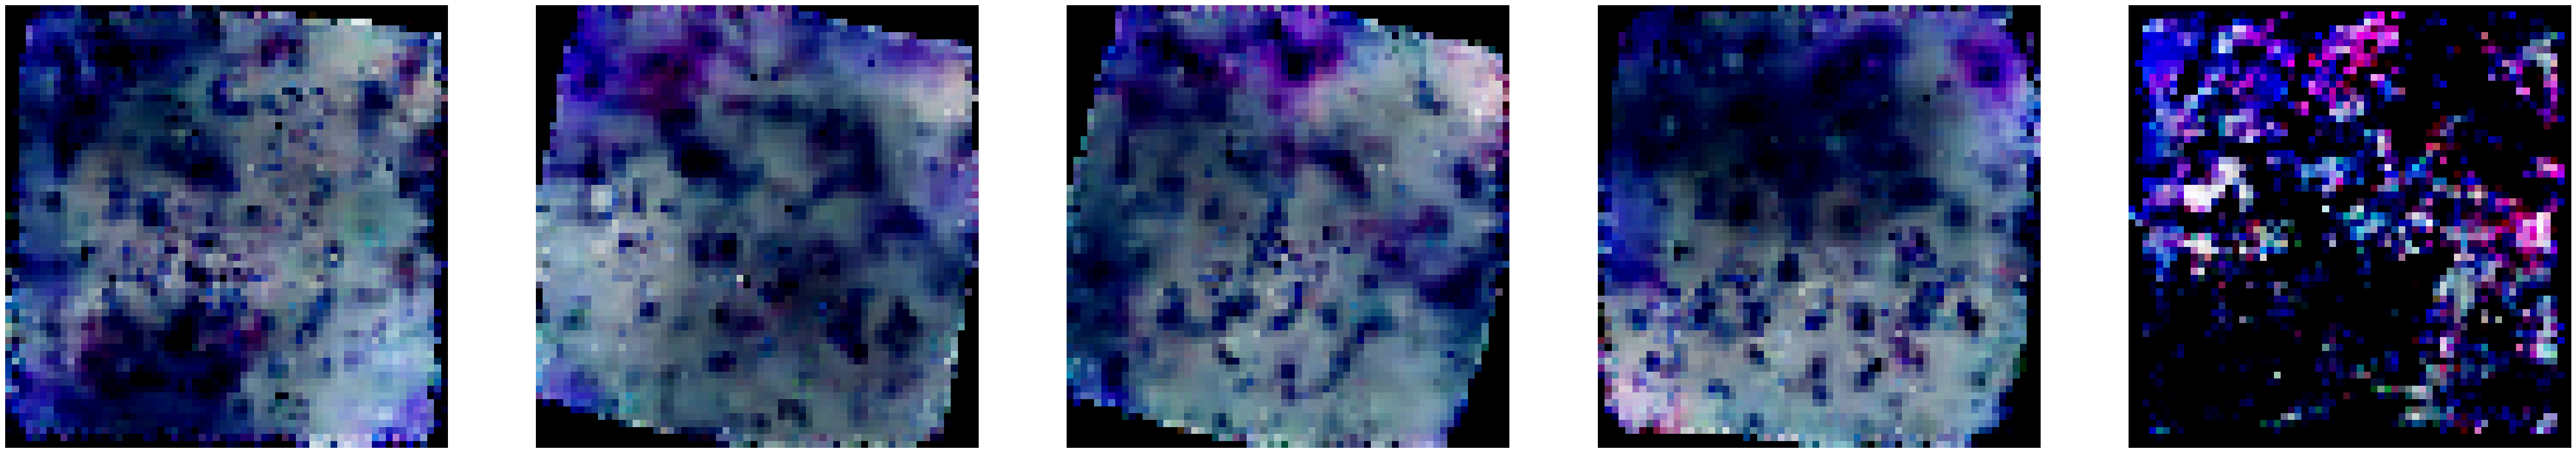

  0%|          | 0/41 [00:00<?, ?it/s]

[2202/2750][20/41] Loss_D: 0.3484 Loss_G: 4.8025 D(x): 0.9039 D(G(z)): 0.0098 / 0.0074
[2202/2750][40/41] Loss_D: 0.3575 Loss_G: 5.8884 D(x): 0.9132 D(G(z)): 0.0037 / 0.0023


  0%|          | 0/41 [00:00<?, ?it/s]

[2203/2750][20/41] Loss_D: 0.4541 Loss_G: 2.7564 D(x): 0.9165 D(G(z)): 0.0811 / 0.0773
[2203/2750][40/41] Loss_D: 0.5510 Loss_G: 3.4010 D(x): 0.8816 D(G(z)): 0.1125 / 0.0309


  0%|          | 0/41 [00:00<?, ?it/s]

[2204/2750][20/41] Loss_D: 0.8657 Loss_G: 2.4257 D(x): 0.5019 D(G(z)): 0.0236 / 0.0937
[2204/2750][40/41] Loss_D: 0.3874 Loss_G: 4.3108 D(x): 0.8600 D(G(z)): 0.0229 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[2205/2750][20/41] Loss_D: 0.3775 Loss_G: 5.9057 D(x): 0.8392 D(G(z)): 0.0034 / 0.0026
[2205/2750][40/41] Loss_D: 0.3586 Loss_G: 5.5635 D(x): 0.8775 D(G(z)): 0.0059 / 0.0039


  0%|          | 0/41 [00:00<?, ?it/s]

[2206/2750][20/41] Loss_D: 0.3918 Loss_G: 3.7735 D(x): 0.8960 D(G(z)): 0.0444 / 0.0212
[2206/2750][40/41] Loss_D: 0.3838 Loss_G: 4.0485 D(x): 0.9217 D(G(z)): 0.0318 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[2207/2750][20/41] Loss_D: 0.3537 Loss_G: 5.3105 D(x): 0.8817 D(G(z)): 0.0104 / 0.0066
[2207/2750][40/41] Loss_D: 0.4275 Loss_G: 3.5428 D(x): 0.8669 D(G(z)): 0.0384 / 0.0246


  0%|          | 0/41 [00:00<?, ?it/s]

[2208/2750][20/41] Loss_D: 0.3510 Loss_G: 5.7189 D(x): 0.8980 D(G(z)): 0.0034 / 0.0026
[2208/2750][40/41] Loss_D: 0.6913 Loss_G: 2.5679 D(x): 0.6541 D(G(z)): 0.0193 / 0.0803


  0%|          | 0/41 [00:00<?, ?it/s]

[2209/2750][20/41] Loss_D: 0.8000 Loss_G: 2.4705 D(x): 0.6002 D(G(z)): 0.0333 / 0.0965
[2209/2750][40/41] Loss_D: 0.4705 Loss_G: 4.3722 D(x): 0.9506 D(G(z)): 0.0610 / 0.0112


  0%|          | 0/41 [00:00<?, ?it/s]

[2210/2750][20/41] Loss_D: 0.3467 Loss_G: 4.6711 D(x): 0.9153 D(G(z)): 0.0138 / 0.0080
[2210/2750][40/41] Loss_D: 0.4857 Loss_G: 3.5612 D(x): 0.7446 D(G(z)): 0.0284 / 0.0392


  0%|          | 0/41 [00:00<?, ?it/s]

[2211/2750][20/41] Loss_D: 0.4181 Loss_G: 4.6136 D(x): 0.8448 D(G(z)): 0.0184 / 0.0093
[2211/2750][40/41] Loss_D: 0.6265 Loss_G: 3.2257 D(x): 0.6445 D(G(z)): 0.0079 / 0.0349


  0%|          | 0/41 [00:00<?, ?it/s]

[2212/2750][20/41] Loss_D: 0.3900 Loss_G: 4.4679 D(x): 0.9084 D(G(z)): 0.0348 / 0.0106
[2212/2750][40/41] Loss_D: 0.3469 Loss_G: 5.4105 D(x): 0.9212 D(G(z)): 0.0072 / 0.0047


  0%|          | 0/41 [00:00<?, ?it/s]

[2213/2750][20/41] Loss_D: 0.4667 Loss_G: 3.9140 D(x): 0.8823 D(G(z)): 0.0327 / 0.0248
[2213/2750][40/41] Loss_D: 0.6030 Loss_G: 2.8443 D(x): 0.6665 D(G(z)): 0.0639 / 0.0537


  0%|          | 0/41 [00:00<?, ?it/s]

[2214/2750][20/41] Loss_D: 0.5406 Loss_G: 3.8155 D(x): 0.9357 D(G(z)): 0.0872 / 0.0201
[2214/2750][40/41] Loss_D: 0.5732 Loss_G: 2.9410 D(x): 0.9655 D(G(z)): 0.1166 / 0.0494


  0%|          | 0/41 [00:00<?, ?it/s]

[2215/2750][20/41] Loss_D: 0.6085 Loss_G: 3.4920 D(x): 0.7530 D(G(z)): 0.0141 / 0.0271
[2215/2750][40/41] Loss_D: 0.3821 Loss_G: 5.4623 D(x): 0.9021 D(G(z)): 0.0047 / 0.0032


  0%|          | 0/41 [00:00<?, ?it/s]

[2216/2750][20/41] Loss_D: 0.6203 Loss_G: 3.4393 D(x): 0.9832 D(G(z)): 0.1260 / 0.0272
[2216/2750][40/41] Loss_D: 0.5400 Loss_G: 3.8617 D(x): 0.9733 D(G(z)): 0.0982 / 0.0178


  0%|          | 0/41 [00:00<?, ?it/s]

[2217/2750][20/41] Loss_D: 0.3933 Loss_G: 4.7942 D(x): 0.9136 D(G(z)): 0.0086 / 0.0111
[2217/2750][40/41] Loss_D: 0.4096 Loss_G: 8.2662 D(x): 0.9438 D(G(z)): 0.0007 / 0.0002


  0%|          | 0/41 [00:00<?, ?it/s]

[2218/2750][20/41] Loss_D: 0.4341 Loss_G: 5.0108 D(x): 0.9627 D(G(z)): 0.0129 / 0.0061
[2218/2750][40/41] Loss_D: 0.3659 Loss_G: 4.3181 D(x): 0.9008 D(G(z)): 0.0163 / 0.0104


  0%|          | 0/41 [00:00<?, ?it/s]

[2219/2750][20/41] Loss_D: 0.4529 Loss_G: 4.0057 D(x): 0.9187 D(G(z)): 0.0969 / 0.0167
[2219/2750][40/41] Loss_D: 0.8509 Loss_G: 3.4012 D(x): 0.5877 D(G(z)): 0.0057 / 0.0384


  0%|          | 0/41 [00:00<?, ?it/s]

[2220/2750][20/41] Loss_D: 0.4393 Loss_G: 3.5364 D(x): 0.9391 D(G(z)): 0.0713 / 0.0266
[2220/2750][40/41] Loss_D: 0.3538 Loss_G: 4.4675 D(x): 0.8819 D(G(z)): 0.0146 / 0.0102


  0%|          | 0/41 [00:00<?, ?it/s]

[2221/2750][20/41] Loss_D: 0.3522 Loss_G: 4.3942 D(x): 0.8974 D(G(z)): 0.0189 / 0.0103
[2221/2750][40/41] Loss_D: 0.4530 Loss_G: 5.0347 D(x): 0.8694 D(G(z)): 0.0076 / 0.0066


  0%|          | 0/41 [00:00<?, ?it/s]

[2222/2750][20/41] Loss_D: 0.4959 Loss_G: 6.1292 D(x): 0.7380 D(G(z)): 0.0071 / 0.0085
[2222/2750][40/41] Loss_D: 0.3663 Loss_G: 4.4992 D(x): 0.8869 D(G(z)): 0.0241 / 0.0099


  0%|          | 0/41 [00:00<?, ?it/s]

[2223/2750][20/41] Loss_D: 0.4364 Loss_G: 4.6714 D(x): 0.9261 D(G(z)): 0.0110 / 0.0074
[2223/2750][40/41] Loss_D: 0.3848 Loss_G: 5.4641 D(x): 0.8375 D(G(z)): 0.0043 / 0.0038


  0%|          | 0/41 [00:00<?, ?it/s]

[2224/2750][20/41] Loss_D: 0.4208 Loss_G: 3.8203 D(x): 0.9475 D(G(z)): 0.0624 / 0.0203
[2224/2750][40/41] Loss_D: 0.3705 Loss_G: 4.1212 D(x): 0.9309 D(G(z)): 0.0299 / 0.0161


  0%|          | 0/41 [00:00<?, ?it/s]

[2225/2750][20/41] Loss_D: 0.3933 Loss_G: 5.9826 D(x): 0.8398 D(G(z)): 0.0035 / 0.0027
[2225/2750][40/41] Loss_D: 0.4216 Loss_G: 3.9167 D(x): 0.9135 D(G(z)): 0.0696 / 0.0192


  0%|          | 0/41 [00:00<?, ?it/s]

[2226/2750][20/41] Loss_D: 0.4348 Loss_G: 4.0383 D(x): 0.8648 D(G(z)): 0.0182 / 0.0153
[2226/2750][40/41] Loss_D: 0.4237 Loss_G: 3.7279 D(x): 0.9097 D(G(z)): 0.0594 / 0.0206


  0%|          | 0/41 [00:00<?, ?it/s]

[2227/2750][20/41] Loss_D: 0.4191 Loss_G: 5.0284 D(x): 0.8037 D(G(z)): 0.0213 / 0.0069
[2227/2750][40/41] Loss_D: 0.5999 Loss_G: 3.2687 D(x): 0.7496 D(G(z)): 0.0991 / 0.0574


  0%|          | 0/41 [00:00<?, ?it/s]

[2228/2750][20/41] Loss_D: 0.5122 Loss_G: 3.2734 D(x): 0.7525 D(G(z)): 0.0529 / 0.0404
[2228/2750][40/41] Loss_D: 0.4311 Loss_G: 4.5879 D(x): 0.8008 D(G(z)): 0.0083 / 0.0113


  0%|          | 0/41 [00:00<?, ?it/s]

[2229/2750][20/41] Loss_D: 0.9214 Loss_G: 2.4872 D(x): 0.5331 D(G(z)): 0.0857 / 0.0922
[2229/2750][40/41] Loss_D: 1.0845 Loss_G: 2.1013 D(x): 0.4152 D(G(z)): 0.0123 / 0.1530


  0%|          | 0/41 [00:00<?, ?it/s]

[2230/2750][20/41] Loss_D: 0.3619 Loss_G: 3.8217 D(x): 0.9072 D(G(z)): 0.0278 / 0.0283
[2230/2750][40/41] Loss_D: 0.6913 Loss_G: 2.7951 D(x): 0.6188 D(G(z)): 0.0217 / 0.0778


  0%|          | 0/41 [00:00<?, ?it/s]

[2231/2750][20/41] Loss_D: 0.5151 Loss_G: 4.0910 D(x): 0.9528 D(G(z)): 0.0932 / 0.0136
[2231/2750][40/41] Loss_D: 0.4502 Loss_G: 4.6497 D(x): 0.7897 D(G(z)): 0.0101 / 0.0108


  0%|          | 0/41 [00:00<?, ?it/s]

[2232/2750][20/41] Loss_D: 0.3610 Loss_G: 4.6174 D(x): 0.8567 D(G(z)): 0.0132 / 0.0078
[2232/2750][40/41] Loss_D: 0.3809 Loss_G: 4.8936 D(x): 0.8511 D(G(z)): 0.0051 / 0.0057


  0%|          | 0/41 [00:00<?, ?it/s]

[2233/2750][20/41] Loss_D: 0.3841 Loss_G: 4.1007 D(x): 0.9505 D(G(z)): 0.0249 / 0.0189
[2233/2750][40/41] Loss_D: 0.3800 Loss_G: 3.9424 D(x): 0.8975 D(G(z)): 0.0422 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[2234/2750][20/41] Loss_D: 1.6947 Loss_G: 2.3552 D(x): 0.2306 D(G(z)): 0.0064 / 0.1831
[2234/2750][40/41] Loss_D: 0.3476 Loss_G: 5.5643 D(x): 0.8568 D(G(z)): 0.0051 / 0.0033


  0%|          | 0/41 [00:00<?, ?it/s]

[2235/2750][20/41] Loss_D: 0.3520 Loss_G: 4.5937 D(x): 0.8891 D(G(z)): 0.0168 / 0.0099
[2235/2750][40/41] Loss_D: 0.3496 Loss_G: 5.0564 D(x): 0.9076 D(G(z)): 0.0064 / 0.0056


  0%|          | 0/41 [00:00<?, ?it/s]

[2236/2750][20/41] Loss_D: 0.3742 Loss_G: 4.1498 D(x): 0.8796 D(G(z)): 0.0296 / 0.0145
[2236/2750][40/41] Loss_D: 0.4164 Loss_G: 4.5798 D(x): 0.9431 D(G(z)): 0.0273 / 0.0137


  0%|          | 0/41 [00:00<?, ?it/s]

[2237/2750][20/41] Loss_D: 0.5098 Loss_G: 3.1977 D(x): 0.7838 D(G(z)): 0.0614 / 0.0430
[2237/2750][40/41] Loss_D: 0.4515 Loss_G: 3.7652 D(x): 0.7911 D(G(z)): 0.0161 / 0.0207


  0%|          | 0/41 [00:00<?, ?it/s]

[2238/2750][20/41] Loss_D: 0.4684 Loss_G: 5.5166 D(x): 0.9743 D(G(z)): 0.0061 / 0.0032
[2238/2750][40/41] Loss_D: 0.5497 Loss_G: 5.1925 D(x): 0.7186 D(G(z)): 0.0033 / 0.0056


  0%|          | 0/41 [00:00<?, ?it/s]

[2239/2750][20/41] Loss_D: 0.4332 Loss_G: 5.3329 D(x): 0.8414 D(G(z)): 0.0032 / 0.0046
[2239/2750][40/41] Loss_D: 0.4023 Loss_G: 5.1640 D(x): 0.8520 D(G(z)): 0.0052 / 0.0050


  0%|          | 0/41 [00:00<?, ?it/s]

[2240/2750][20/41] Loss_D: 0.4354 Loss_G: 3.6416 D(x): 0.8547 D(G(z)): 0.0512 / 0.0253
[2240/2750][40/41] Loss_D: 0.6334 Loss_G: 3.8882 D(x): 0.9822 D(G(z)): 0.1455 / 0.0267


  0%|          | 0/41 [00:00<?, ?it/s]

[2241/2750][20/41] Loss_D: 0.4433 Loss_G: 5.3815 D(x): 0.9621 D(G(z)): 0.0349 / 0.0040
[2241/2750][40/41] Loss_D: 0.4370 Loss_G: 4.9262 D(x): 0.8593 D(G(z)): 0.0058 / 0.0070


  0%|          | 0/41 [00:00<?, ?it/s]

[2242/2750][20/41] Loss_D: 0.3896 Loss_G: 5.2766 D(x): 0.8298 D(G(z)): 0.0038 / 0.0055
[2242/2750][40/41] Loss_D: 0.4747 Loss_G: 4.3757 D(x): 0.9287 D(G(z)): 0.0370 / 0.0128


  0%|          | 0/41 [00:00<?, ?it/s]

[2243/2750][20/41] Loss_D: 0.3900 Loss_G: 4.8741 D(x): 0.8910 D(G(z)): 0.0093 / 0.0086
[2243/2750][40/41] Loss_D: 1.1320 Loss_G: 3.2303 D(x): 0.3685 D(G(z)): 0.0019 / 0.0544


  0%|          | 0/41 [00:00<?, ?it/s]

[2244/2750][20/41] Loss_D: 0.4522 Loss_G: 7.0834 D(x): 0.7683 D(G(z)): 0.0009 / 0.0013
[2244/2750][40/41] Loss_D: 0.4418 Loss_G: 4.4345 D(x): 0.8207 D(G(z)): 0.0088 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[2245/2750][20/41] Loss_D: 0.6598 Loss_G: 4.4449 D(x): 0.6161 D(G(z)): 0.0036 / 0.0134
[2245/2750][40/41] Loss_D: 0.4729 Loss_G: 3.5339 D(x): 0.9166 D(G(z)): 0.0766 / 0.0253


  0%|          | 0/41 [00:00<?, ?it/s]

[2246/2750][20/41] Loss_D: 0.4589 Loss_G: 4.0666 D(x): 0.7438 D(G(z)): 0.0067 / 0.0165
[2246/2750][40/41] Loss_D: 0.4640 Loss_G: 3.6953 D(x): 0.9559 D(G(z)): 0.0408 / 0.0225


  0%|          | 0/41 [00:00<?, ?it/s]

[2247/2750][20/41] Loss_D: 0.3937 Loss_G: 4.3991 D(x): 0.8146 D(G(z)): 0.0102 / 0.0102
[2247/2750][40/41] Loss_D: 0.5353 Loss_G: 3.9233 D(x): 0.8795 D(G(z)): 0.1559 / 0.0156


  0%|          | 0/41 [00:00<?, ?it/s]

[2248/2750][20/41] Loss_D: 0.3838 Loss_G: 3.9373 D(x): 0.8968 D(G(z)): 0.0374 / 0.0184
[2248/2750][40/41] Loss_D: 0.5379 Loss_G: 4.8962 D(x): 0.6866 D(G(z)): 0.0052 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[2249/2750][20/41] Loss_D: 0.3747 Loss_G: 4.2146 D(x): 0.9077 D(G(z)): 0.0329 / 0.0113
[2249/2750][40/41] Loss_D: 0.3825 Loss_G: 3.9126 D(x): 0.9137 D(G(z)): 0.0369 / 0.0182


  0%|          | 0/41 [00:00<?, ?it/s]

[2250/2750][20/41] Loss_D: 0.3969 Loss_G: 4.0783 D(x): 0.8821 D(G(z)): 0.0182 / 0.0164
[2250/2750][40/41] Loss_D: 0.6330 Loss_G: 3.0915 D(x): 0.9427 D(G(z)): 0.2180 / 0.0636


  0%|          | 0/41 [00:00<?, ?it/s]

[2251/2750][20/41] Loss_D: 0.3571 Loss_G: 4.7107 D(x): 0.8835 D(G(z)): 0.0139 / 0.0105
[2251/2750][40/41] Loss_D: 0.6368 Loss_G: 2.1736 D(x): 0.7168 D(G(z)): 0.1008 / 0.1235


  0%|          | 0/41 [00:00<?, ?it/s]

[2252/2750][20/41] Loss_D: 0.3888 Loss_G: 4.0765 D(x): 0.9025 D(G(z)): 0.0207 / 0.0163
[2252/2750][40/41] Loss_D: 0.3516 Loss_G: 5.4004 D(x): 0.8637 D(G(z)): 0.0085 / 0.0047


  0%|          | 0/41 [00:00<?, ?it/s]

[2253/2750][20/41] Loss_D: 0.3474 Loss_G: 4.6949 D(x): 0.8937 D(G(z)): 0.0112 / 0.0086
[2253/2750][40/41] Loss_D: 0.4691 Loss_G: 4.6462 D(x): 0.7700 D(G(z)): 0.0081 / 0.0086


  0%|          | 0/41 [00:00<?, ?it/s]

[2254/2750][20/41] Loss_D: 0.4491 Loss_G: 2.8459 D(x): 0.9213 D(G(z)): 0.0907 / 0.0564
[2254/2750][40/41] Loss_D: 0.4849 Loss_G: 2.5738 D(x): 0.9649 D(G(z)): 0.0804 / 0.0804


  0%|          | 0/41 [00:00<?, ?it/s]

[2255/2750][20/41] Loss_D: 0.4085 Loss_G: 4.7226 D(x): 0.9241 D(G(z)): 0.0119 / 0.0073
[2255/2750][40/41] Loss_D: 0.3649 Loss_G: 4.0565 D(x): 0.8974 D(G(z)): 0.0219 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[2256/2750][20/41] Loss_D: 0.4911 Loss_G: 4.4578 D(x): 0.9607 D(G(z)): 0.0496 / 0.0140
[2256/2750][40/41] Loss_D: 0.3978 Loss_G: 3.1830 D(x): 0.9065 D(G(z)): 0.0453 / 0.0394


  0%|          | 0/41 [00:00<?, ?it/s]

[2257/2750][20/41] Loss_D: 0.3855 Loss_G: 4.4297 D(x): 0.8681 D(G(z)): 0.0217 / 0.0100
[2257/2750][40/41] Loss_D: 0.3416 Loss_G: 5.1740 D(x): 0.9011 D(G(z)): 0.0088 / 0.0048


  0%|          | 0/41 [00:00<?, ?it/s]

[2258/2750][20/41] Loss_D: 0.4991 Loss_G: 3.5707 D(x): 0.7534 D(G(z)): 0.0166 / 0.0259
[2258/2750][40/41] Loss_D: 0.4642 Loss_G: 2.8295 D(x): 0.9200 D(G(z)): 0.0943 / 0.0611


  0%|          | 0/41 [00:00<?, ?it/s]

[2259/2750][20/41] Loss_D: 1.0568 Loss_G: 2.5438 D(x): 0.4530 D(G(z)): 0.0113 / 0.1244
[2259/2750][40/41] Loss_D: 0.3362 Loss_G: 6.6067 D(x): 0.9041 D(G(z)): 0.0021 / 0.0012


  0%|          | 0/41 [00:00<?, ?it/s]

[2260/2750][20/41] Loss_D: 0.4794 Loss_G: 3.4371 D(x): 0.8194 D(G(z)): 0.0419 / 0.0341
[2260/2750][40/41] Loss_D: 0.4415 Loss_G: 4.2530 D(x): 0.8262 D(G(z)): 0.0138 / 0.0141


  0%|          | 0/41 [00:00<?, ?it/s]

[2261/2750][20/41] Loss_D: 0.3643 Loss_G: 3.3343 D(x): 0.8949 D(G(z)): 0.0279 / 0.0370
[2261/2750][40/41] Loss_D: 0.5047 Loss_G: 3.8073 D(x): 0.7984 D(G(z)): 0.0527 / 0.0178


  0%|          | 0/41 [00:00<?, ?it/s]

[2262/2750][20/41] Loss_D: 0.4995 Loss_G: 5.0581 D(x): 0.9361 D(G(z)): 0.0644 / 0.0061
[2262/2750][40/41] Loss_D: 0.3462 Loss_G: 4.6545 D(x): 0.8673 D(G(z)): 0.0102 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[2263/2750][20/41] Loss_D: 0.8420 Loss_G: 4.3410 D(x): 0.8205 D(G(z)): 0.2629 / 0.0111
[2263/2750][40/41] Loss_D: 0.5248 Loss_G: 4.3139 D(x): 0.9272 D(G(z)): 0.1210 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[2264/2750][20/41] Loss_D: 0.4572 Loss_G: 7.6400 D(x): 0.9372 D(G(z)): 0.0013 / 0.0006
[2264/2750][40/41] Loss_D: 0.4604 Loss_G: 3.5862 D(x): 0.8090 D(G(z)): 0.0421 / 0.0288


  0%|          | 0/41 [00:00<?, ?it/s]

[2265/2750][20/41] Loss_D: 0.4972 Loss_G: 4.2551 D(x): 0.7448 D(G(z)): 0.0141 / 0.0174
[2265/2750][40/41] Loss_D: 0.4031 Loss_G: 5.3360 D(x): 0.9236 D(G(z)): 0.0109 / 0.0045


  0%|          | 0/41 [00:00<?, ?it/s]

[2266/2750][20/41] Loss_D: 0.3963 Loss_G: 3.8330 D(x): 0.8972 D(G(z)): 0.0368 / 0.0187
[2266/2750][40/41] Loss_D: 0.5257 Loss_G: 2.6634 D(x): 0.7174 D(G(z)): 0.0543 / 0.0672


  0%|          | 0/41 [00:00<?, ?it/s]

[2267/2750][20/41] Loss_D: 0.3989 Loss_G: 5.1751 D(x): 0.8841 D(G(z)): 0.0145 / 0.0159
[2267/2750][40/41] Loss_D: 0.4914 Loss_G: 5.0277 D(x): 0.9503 D(G(z)): 0.0636 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[2268/2750][20/41] Loss_D: 0.6611 Loss_G: 4.3155 D(x): 0.9730 D(G(z)): 0.1706 / 0.0102
[2268/2750][40/41] Loss_D: 0.4126 Loss_G: 4.6861 D(x): 0.9478 D(G(z)): 0.0172 / 0.0078


  0%|          | 0/41 [00:00<?, ?it/s]

[2269/2750][20/41] Loss_D: 0.4181 Loss_G: 4.2457 D(x): 0.9466 D(G(z)): 0.0244 / 0.0148
[2269/2750][40/41] Loss_D: 0.4260 Loss_G: 4.3998 D(x): 0.9115 D(G(z)): 0.0504 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[2270/2750][20/41] Loss_D: 0.5287 Loss_G: 4.1833 D(x): 0.7264 D(G(z)): 0.0140 / 0.0163
[2270/2750][40/41] Loss_D: 0.4634 Loss_G: 4.7763 D(x): 0.9671 D(G(z)): 0.0204 / 0.0079


  0%|          | 0/41 [00:00<?, ?it/s]

[2271/2750][20/41] Loss_D: 0.3823 Loss_G: 4.6581 D(x): 0.8442 D(G(z)): 0.0085 / 0.0093
[2271/2750][40/41] Loss_D: 0.3918 Loss_G: 4.1787 D(x): 0.9101 D(G(z)): 0.0144 / 0.0118


  0%|          | 0/41 [00:00<?, ?it/s]

[2272/2750][20/41] Loss_D: 0.4386 Loss_G: 3.6839 D(x): 0.9559 D(G(z)): 0.0301 / 0.0222
[2272/2750][40/41] Loss_D: 0.4235 Loss_G: 4.1352 D(x): 0.8064 D(G(z)): 0.0232 / 0.0145


  0%|          | 0/41 [00:00<?, ?it/s]

[2273/2750][20/41] Loss_D: 0.4078 Loss_G: 4.6095 D(x): 0.9505 D(G(z)): 0.0207 / 0.0078
[2273/2750][40/41] Loss_D: 0.6539 Loss_G: 3.6630 D(x): 0.9904 D(G(z)): 0.1244 / 0.0234


  0%|          | 0/41 [00:00<?, ?it/s]

[2274/2750][20/41] Loss_D: 0.4010 Loss_G: 4.2562 D(x): 0.8537 D(G(z)): 0.0238 / 0.0119
[2274/2750][40/41] Loss_D: 0.4071 Loss_G: 5.0720 D(x): 0.9581 D(G(z)): 0.0076 / 0.0053


  0%|          | 0/41 [00:00<?, ?it/s]

[2275/2750][20/41] Loss_D: 0.3730 Loss_G: 6.3372 D(x): 0.8966 D(G(z)): 0.0021 / 0.0012
[2275/2750][40/41] Loss_D: 0.4211 Loss_G: 5.2851 D(x): 0.9524 D(G(z)): 0.0083 / 0.0041


  0%|          | 0/41 [00:00<?, ?it/s]

[2276/2750][20/41] Loss_D: 0.5901 Loss_G: 4.7902 D(x): 0.6366 D(G(z)): 0.0062 / 0.0138
[2276/2750][40/41] Loss_D: 0.3736 Loss_G: 5.8935 D(x): 0.9084 D(G(z)): 0.0112 / 0.0022


  0%|          | 0/41 [00:00<?, ?it/s]

[2277/2750][20/41] Loss_D: 0.3957 Loss_G: 5.2445 D(x): 0.9502 D(G(z)): 0.0155 / 0.0051
[2277/2750][40/41] Loss_D: 0.4011 Loss_G: 3.7521 D(x): 0.9107 D(G(z)): 0.0348 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[2278/2750][20/41] Loss_D: 0.4287 Loss_G: 3.6182 D(x): 0.8655 D(G(z)): 0.0717 / 0.0225
[2278/2750][40/41] Loss_D: 0.4329 Loss_G: 4.1598 D(x): 0.7987 D(G(z)): 0.0141 / 0.0158


  0%|          | 0/41 [00:00<?, ?it/s]

[2279/2750][20/41] Loss_D: 0.4929 Loss_G: 3.5211 D(x): 0.7546 D(G(z)): 0.0239 / 0.0323
[2279/2750][40/41] Loss_D: 0.3637 Loss_G: 4.4041 D(x): 0.8893 D(G(z)): 0.0144 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[2280/2750][20/41] Loss_D: 0.5864 Loss_G: 3.3185 D(x): 0.6856 D(G(z)): 0.0108 / 0.0359
[2280/2750][40/41] Loss_D: 0.4470 Loss_G: 3.4287 D(x): 0.9135 D(G(z)): 0.0824 / 0.0249


  0%|          | 0/41 [00:00<?, ?it/s]

[2281/2750][20/41] Loss_D: 0.3777 Loss_G: 3.6821 D(x): 0.9022 D(G(z)): 0.0359 / 0.0237
[2281/2750][40/41] Loss_D: 0.3847 Loss_G: 4.6364 D(x): 0.9428 D(G(z)): 0.0319 / 0.0081


  0%|          | 0/41 [00:00<?, ?it/s]

[2282/2750][20/41] Loss_D: 0.3573 Loss_G: 4.6659 D(x): 0.8654 D(G(z)): 0.0160 / 0.0082
[2282/2750][40/41] Loss_D: 0.4752 Loss_G: 4.1639 D(x): 0.8768 D(G(z)): 0.0147 / 0.0221


  0%|          | 0/41 [00:00<?, ?it/s]

[2283/2750][20/41] Loss_D: 0.4904 Loss_G: 3.5606 D(x): 0.7481 D(G(z)): 0.0193 / 0.0273
[2283/2750][40/41] Loss_D: 0.3682 Loss_G: 5.4899 D(x): 0.9392 D(G(z)): 0.0088 / 0.0039


  0%|          | 0/41 [00:00<?, ?it/s]

[2284/2750][20/41] Loss_D: 0.4176 Loss_G: 3.8418 D(x): 0.9178 D(G(z)): 0.0256 / 0.0218
[2284/2750][40/41] Loss_D: 0.3402 Loss_G: 4.9790 D(x): 0.8972 D(G(z)): 0.0089 / 0.0055


  0%|          | 0/41 [00:00<?, ?it/s]

[2285/2750][20/41] Loss_D: 0.4801 Loss_G: 3.9285 D(x): 0.9088 D(G(z)): 0.1205 / 0.0167
[2285/2750][40/41] Loss_D: 0.6040 Loss_G: 4.7501 D(x): 0.9366 D(G(z)): 0.1215 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[2286/2750][20/41] Loss_D: 0.4947 Loss_G: 4.2967 D(x): 0.7359 D(G(z)): 0.0073 / 0.0134
[2286/2750][40/41] Loss_D: 0.4065 Loss_G: 3.5327 D(x): 0.9179 D(G(z)): 0.0627 / 0.0306


  0%|          | 0/41 [00:00<?, ?it/s]

[2287/2750][20/41] Loss_D: 0.8365 Loss_G: 2.7666 D(x): 0.5129 D(G(z)): 0.0126 / 0.0733
[2287/2750][40/41] Loss_D: 0.4756 Loss_G: 4.0551 D(x): 0.9412 D(G(z)): 0.0534 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[2288/2750][20/41] Loss_D: 0.4145 Loss_G: 4.2875 D(x): 0.8697 D(G(z)): 0.0193 / 0.0112
[2288/2750][40/41] Loss_D: 0.3635 Loss_G: 4.7349 D(x): 0.8376 D(G(z)): 0.0116 / 0.0078


  0%|          | 0/41 [00:00<?, ?it/s]

[2289/2750][20/41] Loss_D: 0.5548 Loss_G: 2.9167 D(x): 0.9171 D(G(z)): 0.1436 / 0.0545
[2289/2750][40/41] Loss_D: 0.6911 Loss_G: 3.7554 D(x): 0.5942 D(G(z)): 0.0052 / 0.0234


  0%|          | 0/41 [00:00<?, ?it/s]

[2290/2750][20/41] Loss_D: 0.3646 Loss_G: 4.4486 D(x): 0.9093 D(G(z)): 0.0211 / 0.0149
[2290/2750][40/41] Loss_D: 0.3493 Loss_G: 4.7191 D(x): 0.8724 D(G(z)): 0.0109 / 0.0070


  0%|          | 0/41 [00:00<?, ?it/s]

[2291/2750][20/41] Loss_D: 0.4152 Loss_G: 5.2119 D(x): 0.9197 D(G(z)): 0.0120 / 0.0050
[2291/2750][40/41] Loss_D: 0.3440 Loss_G: 6.1141 D(x): 0.9223 D(G(z)): 0.0029 / 0.0025


  0%|          | 0/41 [00:00<?, ?it/s]

[2292/2750][20/41] Loss_D: 0.3736 Loss_G: 3.7313 D(x): 0.9018 D(G(z)): 0.0305 / 0.0227
[2292/2750][40/41] Loss_D: 0.3972 Loss_G: 4.7069 D(x): 0.8557 D(G(z)): 0.0112 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[2293/2750][20/41] Loss_D: 0.3559 Loss_G: 5.6836 D(x): 0.9267 D(G(z)): 0.0121 / 0.0033
[2293/2750][40/41] Loss_D: 0.7685 Loss_G: 1.9844 D(x): 0.5223 D(G(z)): 0.0254 / 0.1563


  0%|          | 0/41 [00:00<?, ?it/s]

[2294/2750][20/41] Loss_D: 0.8092 Loss_G: 4.8160 D(x): 0.4989 D(G(z)): 0.0016 / 0.0123
[2294/2750][40/41] Loss_D: 0.4873 Loss_G: 3.7953 D(x): 0.7715 D(G(z)): 0.0144 / 0.0207


  0%|          | 0/41 [00:00<?, ?it/s]

[2295/2750][20/41] Loss_D: 0.4188 Loss_G: 3.9828 D(x): 0.8621 D(G(z)): 0.0350 / 0.0191
[2295/2750][40/41] Loss_D: 0.3979 Loss_G: 4.8268 D(x): 0.9242 D(G(z)): 0.0450 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[2296/2750][20/41] Loss_D: 0.5460 Loss_G: 3.1144 D(x): 0.9361 D(G(z)): 0.1708 / 0.0485
[2296/2750][40/41] Loss_D: 0.3540 Loss_G: 5.4369 D(x): 0.8708 D(G(z)): 0.0043 / 0.0036


  0%|          | 0/41 [00:00<?, ?it/s]

[2297/2750][20/41] Loss_D: 0.3479 Loss_G: 5.1482 D(x): 0.8705 D(G(z)): 0.0088 / 0.0051
[2297/2750][40/41] Loss_D: 0.4523 Loss_G: 3.1637 D(x): 0.8389 D(G(z)): 0.0576 / 0.0369


  0%|          | 0/41 [00:00<?, ?it/s]

[2298/2750][20/41] Loss_D: 0.4281 Loss_G: 4.1371 D(x): 0.8867 D(G(z)): 0.0706 / 0.0134
[2298/2750][40/41] Loss_D: 0.3687 Loss_G: 5.7306 D(x): 0.8481 D(G(z)): 0.0034 / 0.0024


  0%|          | 0/41 [00:00<?, ?it/s]

[2299/2750][20/41] Loss_D: 0.3743 Loss_G: 4.5288 D(x): 0.8879 D(G(z)): 0.0259 / 0.0085
[2299/2750][40/41] Loss_D: 0.4052 Loss_G: 4.0780 D(x): 0.8995 D(G(z)): 0.0684 / 0.0134


  0%|          | 0/41 [00:00<?, ?it/s]

[2300/2750][20/41] Loss_D: 0.3480 Loss_G: 5.8417 D(x): 0.8892 D(G(z)): 0.0057 / 0.0027
[2300/2750][40/41] Loss_D: 0.3749 Loss_G: 6.6933 D(x): 0.9405 D(G(z)): 0.0126 / 0.0015


  0%|          | 0/41 [00:00<?, ?it/s]

[2301/2750][20/41] Loss_D: 1.0145 Loss_G: 2.8742 D(x): 0.4180 D(G(z)): 0.0036 / 0.0766
[2301/2750][40/41] Loss_D: 0.3935 Loss_G: 4.0717 D(x): 0.8653 D(G(z)): 0.0432 / 0.0168


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.962642].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9514507].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9756242].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999995..0.88694346].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.999999..0.90923387].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_2301.pth


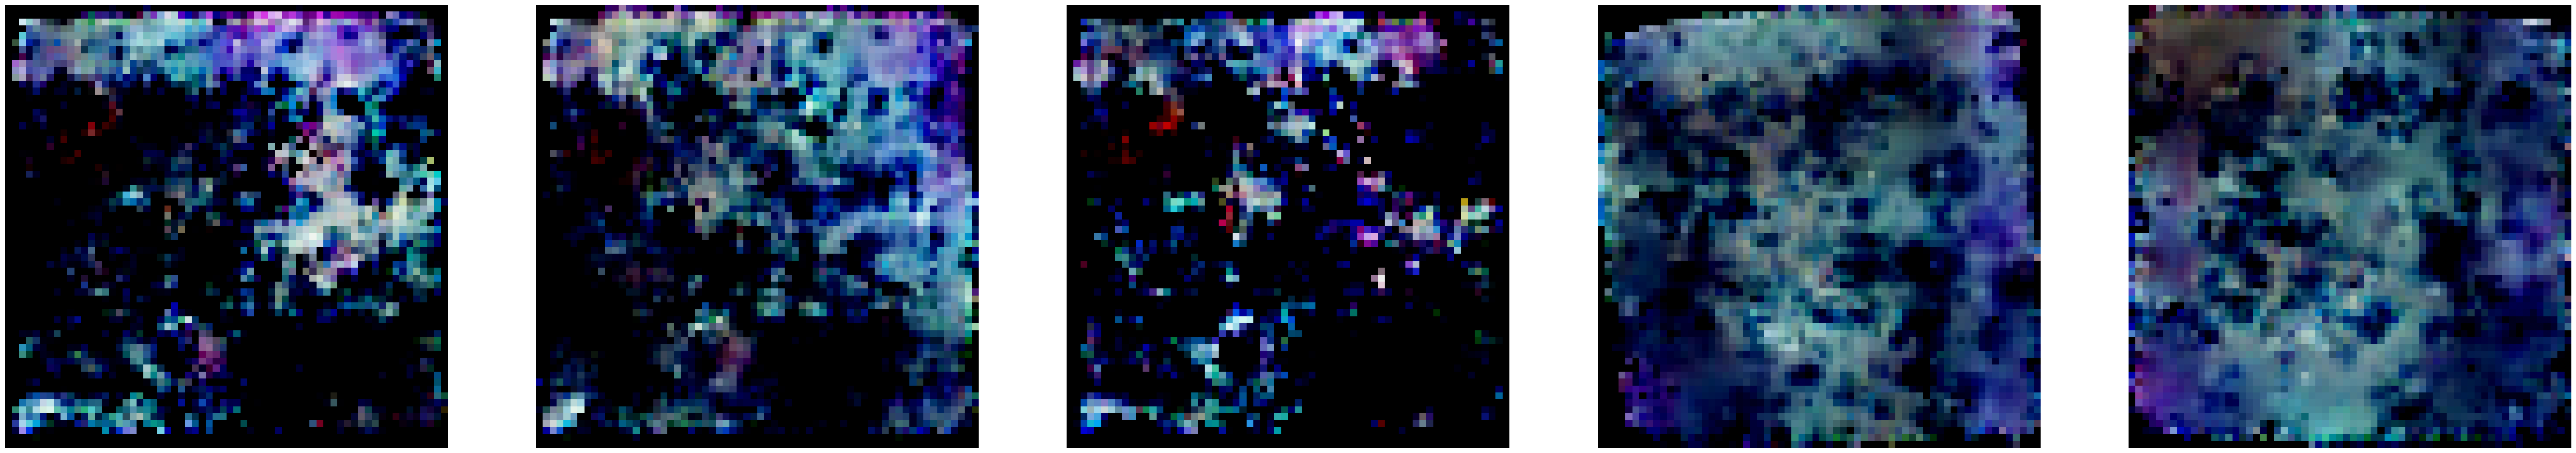

  0%|          | 0/41 [00:00<?, ?it/s]

[2302/2750][20/41] Loss_D: 0.3937 Loss_G: 4.1397 D(x): 0.8826 D(G(z)): 0.0403 / 0.0183
[2302/2750][40/41] Loss_D: 0.3946 Loss_G: 4.2974 D(x): 0.8746 D(G(z)): 0.0489 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[2303/2750][20/41] Loss_D: 0.6272 Loss_G: 4.3498 D(x): 0.9425 D(G(z)): 0.2180 / 0.0104
[2303/2750][40/41] Loss_D: 0.4193 Loss_G: 4.0834 D(x): 0.8749 D(G(z)): 0.0539 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[2304/2750][20/41] Loss_D: 0.3839 Loss_G: 5.4117 D(x): 0.8186 D(G(z)): 0.0081 / 0.0030
[2304/2750][40/41] Loss_D: 0.6000 Loss_G: 3.4395 D(x): 0.6655 D(G(z)): 0.0112 / 0.0380


  0%|          | 0/41 [00:00<?, ?it/s]

[2305/2750][20/41] Loss_D: 0.4331 Loss_G: 4.1899 D(x): 0.9225 D(G(z)): 0.0294 / 0.0130
[2305/2750][40/41] Loss_D: 0.5242 Loss_G: 3.9587 D(x): 0.9565 D(G(z)): 0.1111 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[2306/2750][20/41] Loss_D: 0.3860 Loss_G: 4.2537 D(x): 0.9031 D(G(z)): 0.0205 / 0.0123
[2306/2750][40/41] Loss_D: 0.3769 Loss_G: 5.3077 D(x): 0.8268 D(G(z)): 0.0037 / 0.0037


  0%|          | 0/41 [00:00<?, ?it/s]

[2307/2750][20/41] Loss_D: 0.3933 Loss_G: 4.0848 D(x): 0.8952 D(G(z)): 0.0390 / 0.0138
[2307/2750][40/41] Loss_D: 0.3740 Loss_G: 4.8465 D(x): 0.9288 D(G(z)): 0.0318 / 0.0089


  0%|          | 0/41 [00:00<?, ?it/s]

[2308/2750][20/41] Loss_D: 0.4141 Loss_G: 3.5817 D(x): 0.8461 D(G(z)): 0.0314 / 0.0229
[2308/2750][40/41] Loss_D: 0.3655 Loss_G: 4.8014 D(x): 0.9132 D(G(z)): 0.0125 / 0.0072


  0%|          | 0/41 [00:00<?, ?it/s]

[2309/2750][20/41] Loss_D: 0.3809 Loss_G: 3.8246 D(x): 0.9164 D(G(z)): 0.0343 / 0.0201
[2309/2750][40/41] Loss_D: 0.4500 Loss_G: 5.4825 D(x): 0.7763 D(G(z)): 0.0032 / 0.0040


  0%|          | 0/41 [00:00<?, ?it/s]

[2310/2750][20/41] Loss_D: 0.6793 Loss_G: 5.1004 D(x): 0.9970 D(G(z)): 0.0126 / 0.0067
[2310/2750][40/41] Loss_D: 0.4403 Loss_G: 3.8393 D(x): 0.8392 D(G(z)): 0.0337 / 0.0283


  0%|          | 0/41 [00:00<?, ?it/s]

[2311/2750][20/41] Loss_D: 0.3995 Loss_G: 4.3073 D(x): 0.9663 D(G(z)): 0.0139 / 0.0135
[2311/2750][40/41] Loss_D: 0.3569 Loss_G: 4.3609 D(x): 0.8486 D(G(z)): 0.0117 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[2312/2750][20/41] Loss_D: 0.3534 Loss_G: 4.6484 D(x): 0.8852 D(G(z)): 0.0161 / 0.0095
[2312/2750][40/41] Loss_D: 0.3690 Loss_G: 3.9643 D(x): 0.8721 D(G(z)): 0.0180 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[2313/2750][20/41] Loss_D: 0.3812 Loss_G: 3.6750 D(x): 0.8963 D(G(z)): 0.0448 / 0.0238
[2313/2750][40/41] Loss_D: 0.4713 Loss_G: 3.4504 D(x): 0.9106 D(G(z)): 0.0765 / 0.0370


  0%|          | 0/41 [00:00<?, ?it/s]

[2314/2750][20/41] Loss_D: 0.3782 Loss_G: 4.2563 D(x): 0.8722 D(G(z)): 0.0179 / 0.0132
[2314/2750][40/41] Loss_D: 0.3783 Loss_G: 4.2248 D(x): 0.9227 D(G(z)): 0.0289 / 0.0136


  0%|          | 0/41 [00:00<?, ?it/s]

[2315/2750][20/41] Loss_D: 0.4082 Loss_G: 4.6444 D(x): 0.8513 D(G(z)): 0.0455 / 0.0088
[2315/2750][40/41] Loss_D: 0.3441 Loss_G: 7.6425 D(x): 0.8640 D(G(z)): 0.0021 / 0.0005


  0%|          | 0/41 [00:00<?, ?it/s]

[2316/2750][20/41] Loss_D: 0.4215 Loss_G: 4.3808 D(x): 0.9586 D(G(z)): 0.0420 / 0.0106
[2316/2750][40/41] Loss_D: 0.3583 Loss_G: 4.6824 D(x): 0.8885 D(G(z)): 0.0132 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[2317/2750][20/41] Loss_D: 1.0244 Loss_G: 2.5116 D(x): 0.4278 D(G(z)): 0.0135 / 0.1027
[2317/2750][40/41] Loss_D: 0.4256 Loss_G: 3.9324 D(x): 0.9531 D(G(z)): 0.0609 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[2318/2750][20/41] Loss_D: 0.4034 Loss_G: 4.0311 D(x): 0.8689 D(G(z)): 0.0535 / 0.0138
[2318/2750][40/41] Loss_D: 0.4164 Loss_G: 4.3279 D(x): 0.8242 D(G(z)): 0.0117 / 0.0129


  0%|          | 0/41 [00:00<?, ?it/s]

[2319/2750][20/41] Loss_D: 0.3495 Loss_G: 4.2695 D(x): 0.8989 D(G(z)): 0.0166 / 0.0125
[2319/2750][40/41] Loss_D: 0.4617 Loss_G: 4.3010 D(x): 0.9185 D(G(z)): 0.0437 / 0.0130


  0%|          | 0/41 [00:00<?, ?it/s]

[2320/2750][20/41] Loss_D: 0.3718 Loss_G: 5.5787 D(x): 0.9103 D(G(z)): 0.0279 / 0.0076
[2320/2750][40/41] Loss_D: 0.6466 Loss_G: 3.1368 D(x): 0.6814 D(G(z)): 0.0130 / 0.0404


  0%|          | 0/41 [00:00<?, ?it/s]

[2321/2750][20/41] Loss_D: 0.5698 Loss_G: 3.1024 D(x): 0.9322 D(G(z)): 0.1800 / 0.0413
[2321/2750][40/41] Loss_D: 1.1657 Loss_G: 2.5100 D(x): 0.4339 D(G(z)): 0.0048 / 0.1031


  0%|          | 0/41 [00:00<?, ?it/s]

[2322/2750][20/41] Loss_D: 0.4382 Loss_G: 3.9876 D(x): 0.8173 D(G(z)): 0.0158 / 0.0167
[2322/2750][40/41] Loss_D: 0.3762 Loss_G: 5.6282 D(x): 0.8558 D(G(z)): 0.0033 / 0.0035


  0%|          | 0/41 [00:00<?, ?it/s]

[2323/2750][20/41] Loss_D: 0.3651 Loss_G: 6.1227 D(x): 0.9397 D(G(z)): 0.0034 / 0.0019
[2323/2750][40/41] Loss_D: 0.3442 Loss_G: 5.1974 D(x): 0.8963 D(G(z)): 0.0126 / 0.0045


  0%|          | 0/41 [00:00<?, ?it/s]

[2324/2750][20/41] Loss_D: 0.3909 Loss_G: 5.1510 D(x): 0.8134 D(G(z)): 0.0084 / 0.0053
[2324/2750][40/41] Loss_D: 0.3580 Loss_G: 6.4499 D(x): 0.8420 D(G(z)): 0.0026 / 0.0024


  0%|          | 0/41 [00:00<?, ?it/s]

[2325/2750][20/41] Loss_D: 0.3466 Loss_G: 4.9624 D(x): 0.8831 D(G(z)): 0.0090 / 0.0056
[2325/2750][40/41] Loss_D: 0.3491 Loss_G: 5.0077 D(x): 0.8659 D(G(z)): 0.0126 / 0.0065


  0%|          | 0/41 [00:00<?, ?it/s]

[2326/2750][20/41] Loss_D: 0.4476 Loss_G: 3.1650 D(x): 0.9062 D(G(z)): 0.0939 / 0.0470
[2326/2750][40/41] Loss_D: 0.3381 Loss_G: 5.6316 D(x): 0.8936 D(G(z)): 0.0049 / 0.0031


  0%|          | 0/41 [00:00<?, ?it/s]

[2327/2750][20/41] Loss_D: 0.3527 Loss_G: 4.6721 D(x): 0.8791 D(G(z)): 0.0092 / 0.0074
[2327/2750][40/41] Loss_D: 0.8318 Loss_G: 2.4256 D(x): 0.5375 D(G(z)): 0.0305 / 0.0950


  0%|          | 0/41 [00:00<?, ?it/s]

[2328/2750][20/41] Loss_D: 0.3691 Loss_G: 4.0730 D(x): 0.8716 D(G(z)): 0.0185 / 0.0176
[2328/2750][40/41] Loss_D: 0.3864 Loss_G: 4.3551 D(x): 0.8963 D(G(z)): 0.0379 / 0.0149


  0%|          | 0/41 [00:00<?, ?it/s]

[2329/2750][20/41] Loss_D: 0.3627 Loss_G: 4.7465 D(x): 0.9023 D(G(z)): 0.0225 / 0.0108
[2329/2750][40/41] Loss_D: 0.3885 Loss_G: 3.6447 D(x): 0.9176 D(G(z)): 0.0373 / 0.0256


  0%|          | 0/41 [00:00<?, ?it/s]

[2330/2750][20/41] Loss_D: 0.3481 Loss_G: 5.0338 D(x): 0.8791 D(G(z)): 0.0067 / 0.0059
[2330/2750][40/41] Loss_D: 0.3640 Loss_G: 3.7120 D(x): 0.8888 D(G(z)): 0.0285 / 0.0230


  0%|          | 0/41 [00:00<?, ?it/s]

[2331/2750][20/41] Loss_D: 0.3413 Loss_G: 4.8386 D(x): 0.8949 D(G(z)): 0.0108 / 0.0079
[2331/2750][40/41] Loss_D: 0.3898 Loss_G: 3.4010 D(x): 0.8877 D(G(z)): 0.0563 / 0.0285


  0%|          | 0/41 [00:00<?, ?it/s]

[2332/2750][20/41] Loss_D: 0.3720 Loss_G: 4.0627 D(x): 0.9022 D(G(z)): 0.0244 / 0.0136
[2332/2750][40/41] Loss_D: 0.4902 Loss_G: 4.3951 D(x): 0.9412 D(G(z)): 0.0753 / 0.0106


  0%|          | 0/41 [00:00<?, ?it/s]

[2333/2750][20/41] Loss_D: 0.3490 Loss_G: 4.7735 D(x): 0.8720 D(G(z)): 0.0092 / 0.0076
[2333/2750][40/41] Loss_D: 2.1881 Loss_G: 2.0540 D(x): 0.1586 D(G(z)): 0.0133 / 0.1255


  0%|          | 0/41 [00:00<?, ?it/s]

[2334/2750][20/41] Loss_D: 0.7165 Loss_G: 3.0193 D(x): 0.7592 D(G(z)): 0.2060 / 0.0542
[2334/2750][40/41] Loss_D: 0.8274 Loss_G: 2.2727 D(x): 0.5433 D(G(z)): 0.0476 / 0.1012


  0%|          | 0/41 [00:00<?, ?it/s]

[2335/2750][20/41] Loss_D: 0.5927 Loss_G: 4.8289 D(x): 0.9866 D(G(z)): 0.0746 / 0.0132
[2335/2750][40/41] Loss_D: 0.4780 Loss_G: 5.0669 D(x): 0.7835 D(G(z)): 0.0046 / 0.0060


  0%|          | 0/41 [00:00<?, ?it/s]

[2336/2750][20/41] Loss_D: 0.5009 Loss_G: 3.1748 D(x): 0.8045 D(G(z)): 0.0667 / 0.0381
[2336/2750][40/41] Loss_D: 0.3991 Loss_G: 3.9755 D(x): 0.8535 D(G(z)): 0.0269 / 0.0158


  0%|          | 0/41 [00:00<?, ?it/s]

[2337/2750][20/41] Loss_D: 0.3804 Loss_G: 4.9179 D(x): 0.8800 D(G(z)): 0.0141 / 0.0066
[2337/2750][40/41] Loss_D: 0.3829 Loss_G: 4.2464 D(x): 0.8500 D(G(z)): 0.0184 / 0.0120


  0%|          | 0/41 [00:00<?, ?it/s]

[2338/2750][20/41] Loss_D: 0.5402 Loss_G: 3.8818 D(x): 0.9262 D(G(z)): 0.1704 / 0.0177
[2338/2750][40/41] Loss_D: 0.3939 Loss_G: 5.0765 D(x): 0.9002 D(G(z)): 0.0076 / 0.0050


  0%|          | 0/41 [00:00<?, ?it/s]

[2339/2750][20/41] Loss_D: 0.3422 Loss_G: 4.9448 D(x): 0.8980 D(G(z)): 0.0085 / 0.0058
[2339/2750][40/41] Loss_D: 0.4266 Loss_G: 4.2025 D(x): 0.9318 D(G(z)): 0.0797 / 0.0140


  0%|          | 0/41 [00:00<?, ?it/s]

[2340/2750][20/41] Loss_D: 0.3672 Loss_G: 3.0467 D(x): 0.9165 D(G(z)): 0.0334 / 0.0466
[2340/2750][40/41] Loss_D: 0.4174 Loss_G: 3.9984 D(x): 0.9091 D(G(z)): 0.0761 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[2341/2750][20/41] Loss_D: 0.3822 Loss_G: 3.9900 D(x): 0.9260 D(G(z)): 0.0341 / 0.0186
[2341/2750][40/41] Loss_D: 0.4463 Loss_G: 4.0550 D(x): 0.9429 D(G(z)): 0.0244 / 0.0164


  0%|          | 0/41 [00:00<?, ?it/s]

[2342/2750][20/41] Loss_D: 0.3870 Loss_G: 4.1353 D(x): 0.9371 D(G(z)): 0.0327 / 0.0134
[2342/2750][40/41] Loss_D: 0.3967 Loss_G: 4.0926 D(x): 0.9157 D(G(z)): 0.0393 / 0.0184


  0%|          | 0/41 [00:00<?, ?it/s]

[2343/2750][20/41] Loss_D: 0.6648 Loss_G: 4.3605 D(x): 0.9441 D(G(z)): 0.2532 / 0.0095
[2343/2750][40/41] Loss_D: 0.3421 Loss_G: 5.5373 D(x): 0.9265 D(G(z)): 0.0056 / 0.0039


  0%|          | 0/41 [00:00<?, ?it/s]

[2344/2750][20/41] Loss_D: 0.4323 Loss_G: 3.7159 D(x): 0.8673 D(G(z)): 0.0753 / 0.0248
[2344/2750][40/41] Loss_D: 0.3456 Loss_G: 5.7483 D(x): 0.8540 D(G(z)): 0.0040 / 0.0026


  0%|          | 0/41 [00:00<?, ?it/s]

[2345/2750][20/41] Loss_D: 0.4096 Loss_G: 5.0315 D(x): 0.8506 D(G(z)): 0.0120 / 0.0092
[2345/2750][40/41] Loss_D: 0.3514 Loss_G: 4.9277 D(x): 0.9053 D(G(z)): 0.0184 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[2346/2750][20/41] Loss_D: 0.3611 Loss_G: 4.2444 D(x): 0.8665 D(G(z)): 0.0173 / 0.0126
[2346/2750][40/41] Loss_D: 0.4133 Loss_G: 3.7502 D(x): 0.9119 D(G(z)): 0.0605 / 0.0237


  0%|          | 0/41 [00:00<?, ?it/s]

[2347/2750][20/41] Loss_D: 0.3797 Loss_G: 4.0228 D(x): 0.9168 D(G(z)): 0.0322 / 0.0195
[2347/2750][40/41] Loss_D: 0.3514 Loss_G: 5.2110 D(x): 0.8932 D(G(z)): 0.0157 / 0.0050


  0%|          | 0/41 [00:00<?, ?it/s]

[2348/2750][20/41] Loss_D: 0.5887 Loss_G: 3.9614 D(x): 0.6673 D(G(z)): 0.0140 / 0.0244
[2348/2750][40/41] Loss_D: 0.4857 Loss_G: 3.8583 D(x): 0.9436 D(G(z)): 0.0617 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[2349/2750][20/41] Loss_D: 0.3816 Loss_G: 4.0301 D(x): 0.9233 D(G(z)): 0.0417 / 0.0159
[2349/2750][40/41] Loss_D: 0.4913 Loss_G: 4.6889 D(x): 0.7729 D(G(z)): 0.0073 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[2350/2750][20/41] Loss_D: 0.3620 Loss_G: 4.8223 D(x): 0.8515 D(G(z)): 0.0093 / 0.0067
[2350/2750][40/41] Loss_D: 0.3734 Loss_G: 4.2622 D(x): 0.9171 D(G(z)): 0.0336 / 0.0154


  0%|          | 0/41 [00:00<?, ?it/s]

[2351/2750][20/41] Loss_D: 0.5747 Loss_G: 4.0583 D(x): 0.6927 D(G(z)): 0.0164 / 0.0285
[2351/2750][40/41] Loss_D: 0.6046 Loss_G: 4.5615 D(x): 0.9097 D(G(z)): 0.1714 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[2352/2750][20/41] Loss_D: 0.3622 Loss_G: 4.2792 D(x): 0.8920 D(G(z)): 0.0233 / 0.0119
[2352/2750][40/41] Loss_D: 0.4981 Loss_G: 3.8322 D(x): 0.8448 D(G(z)): 0.0759 / 0.0194


  0%|          | 0/41 [00:00<?, ?it/s]

[2353/2750][20/41] Loss_D: 0.6287 Loss_G: 4.1404 D(x): 0.7372 D(G(z)): 0.0114 / 0.0168
[2353/2750][40/41] Loss_D: 0.3609 Loss_G: 4.7963 D(x): 0.8747 D(G(z)): 0.0141 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[2354/2750][20/41] Loss_D: 0.5865 Loss_G: 2.8968 D(x): 0.7362 D(G(z)): 0.0864 / 0.0600
[2354/2750][40/41] Loss_D: 0.5804 Loss_G: 3.1188 D(x): 0.6791 D(G(z)): 0.0156 / 0.0397


  0%|          | 0/41 [00:00<?, ?it/s]

[2355/2750][20/41] Loss_D: 0.6002 Loss_G: 3.8067 D(x): 0.9411 D(G(z)): 0.1788 / 0.0210
[2355/2750][40/41] Loss_D: 0.3475 Loss_G: 4.4898 D(x): 0.8750 D(G(z)): 0.0113 / 0.0104


  0%|          | 0/41 [00:00<?, ?it/s]

[2356/2750][20/41] Loss_D: 0.4384 Loss_G: 3.4746 D(x): 0.9197 D(G(z)): 0.0958 / 0.0275
[2356/2750][40/41] Loss_D: 0.4868 Loss_G: 3.5402 D(x): 0.9232 D(G(z)): 0.1299 / 0.0323


  0%|          | 0/41 [00:00<?, ?it/s]

[2357/2750][20/41] Loss_D: 0.3675 Loss_G: 4.7349 D(x): 0.8906 D(G(z)): 0.0248 / 0.0096
[2357/2750][40/41] Loss_D: 0.4626 Loss_G: 4.1321 D(x): 0.9150 D(G(z)): 0.1175 / 0.0126


  0%|          | 0/41 [00:00<?, ?it/s]

[2358/2750][20/41] Loss_D: 0.3531 Loss_G: 4.8218 D(x): 0.9068 D(G(z)): 0.0180 / 0.0082
[2358/2750][40/41] Loss_D: 0.3978 Loss_G: 4.0200 D(x): 0.9279 D(G(z)): 0.0565 / 0.0162


  0%|          | 0/41 [00:00<?, ?it/s]

[2359/2750][20/41] Loss_D: 0.3703 Loss_G: 4.4195 D(x): 0.8907 D(G(z)): 0.0341 / 0.0106
[2359/2750][40/41] Loss_D: 0.4880 Loss_G: 3.3502 D(x): 0.9476 D(G(z)): 0.1185 / 0.0316


  0%|          | 0/41 [00:00<?, ?it/s]

[2360/2750][20/41] Loss_D: 0.4174 Loss_G: 3.7576 D(x): 0.9065 D(G(z)): 0.0504 / 0.0243
[2360/2750][40/41] Loss_D: 0.3453 Loss_G: 5.1616 D(x): 0.8910 D(G(z)): 0.0085 / 0.0053


  0%|          | 0/41 [00:00<?, ?it/s]

[2361/2750][20/41] Loss_D: 0.3445 Loss_G: 5.3617 D(x): 0.8796 D(G(z)): 0.0061 / 0.0036
[2361/2750][40/41] Loss_D: 0.4976 Loss_G: 2.7101 D(x): 0.9327 D(G(z)): 0.1349 / 0.0658


  0%|          | 0/41 [00:00<?, ?it/s]

[2362/2750][20/41] Loss_D: 0.4542 Loss_G: 3.5296 D(x): 0.7930 D(G(z)): 0.0401 / 0.0314
[2362/2750][40/41] Loss_D: 0.5068 Loss_G: 4.4253 D(x): 0.9828 D(G(z)): 0.0250 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[2363/2750][20/41] Loss_D: 0.6745 Loss_G: 3.3124 D(x): 0.6565 D(G(z)): 0.0109 / 0.0402
[2363/2750][40/41] Loss_D: 0.4138 Loss_G: 4.1341 D(x): 0.8617 D(G(z)): 0.0563 / 0.0155


  0%|          | 0/41 [00:00<?, ?it/s]

[2364/2750][20/41] Loss_D: 0.3576 Loss_G: 5.1965 D(x): 0.8632 D(G(z)): 0.0076 / 0.0046
[2364/2750][40/41] Loss_D: 0.3693 Loss_G: 4.3071 D(x): 0.8778 D(G(z)): 0.0318 / 0.0136


  0%|          | 0/41 [00:00<?, ?it/s]

[2365/2750][20/41] Loss_D: 1.2153 Loss_G: 7.3202 D(x): 0.9486 D(G(z)): 0.5186 / 0.0007
[2365/2750][40/41] Loss_D: 0.5538 Loss_G: 4.3456 D(x): 0.8189 D(G(z)): 0.0783 / 0.0187


  0%|          | 0/41 [00:00<?, ?it/s]

[2366/2750][20/41] Loss_D: 0.4379 Loss_G: 4.3733 D(x): 0.8474 D(G(z)): 0.0163 / 0.0113
[2366/2750][40/41] Loss_D: 0.4271 Loss_G: 4.9462 D(x): 0.9532 D(G(z)): 0.0141 / 0.0065


  0%|          | 0/41 [00:00<?, ?it/s]

[2367/2750][20/41] Loss_D: 0.3630 Loss_G: 6.1391 D(x): 0.9045 D(G(z)): 0.0064 / 0.0029
[2367/2750][40/41] Loss_D: 0.4013 Loss_G: 3.9915 D(x): 0.8966 D(G(z)): 0.0341 / 0.0203


  0%|          | 0/41 [00:00<?, ?it/s]

[2368/2750][20/41] Loss_D: 0.4440 Loss_G: 4.2013 D(x): 0.9640 D(G(z)): 0.0380 / 0.0125
[2368/2750][40/41] Loss_D: 0.4420 Loss_G: 3.5007 D(x): 0.8985 D(G(z)): 0.0914 / 0.0343


  0%|          | 0/41 [00:00<?, ?it/s]

[2369/2750][20/41] Loss_D: 0.4213 Loss_G: 4.2909 D(x): 0.9017 D(G(z)): 0.0189 / 0.0156
[2369/2750][40/41] Loss_D: 0.3926 Loss_G: 4.5780 D(x): 0.9387 D(G(z)): 0.0097 / 0.0119


  0%|          | 0/41 [00:00<?, ?it/s]

[2370/2750][20/41] Loss_D: 0.4290 Loss_G: 5.5597 D(x): 0.7816 D(G(z)): 0.0025 / 0.0033
[2370/2750][40/41] Loss_D: 0.3627 Loss_G: 5.9658 D(x): 0.8766 D(G(z)): 0.0018 / 0.0021


  0%|          | 0/41 [00:00<?, ?it/s]

[2371/2750][20/41] Loss_D: 0.5019 Loss_G: 4.3018 D(x): 0.9619 D(G(z)): 0.0729 / 0.0126
[2371/2750][40/41] Loss_D: 0.5423 Loss_G: 4.4626 D(x): 0.6987 D(G(z)): 0.0041 / 0.0130


  0%|          | 0/41 [00:00<?, ?it/s]

[2372/2750][20/41] Loss_D: 0.4509 Loss_G: 5.2845 D(x): 0.9748 D(G(z)): 0.0061 / 0.0039
[2372/2750][40/41] Loss_D: 0.5870 Loss_G: 4.1336 D(x): 0.7695 D(G(z)): 0.0072 / 0.0416


  0%|          | 0/41 [00:00<?, ?it/s]

[2373/2750][20/41] Loss_D: 0.4432 Loss_G: 3.5363 D(x): 0.8674 D(G(z)): 0.0587 / 0.0311
[2373/2750][40/41] Loss_D: 0.6583 Loss_G: 3.6187 D(x): 0.9611 D(G(z)): 0.1724 / 0.0244


  0%|          | 0/41 [00:00<?, ?it/s]

[2374/2750][20/41] Loss_D: 0.5942 Loss_G: 5.2952 D(x): 0.6421 D(G(z)): 0.0018 / 0.0066
[2374/2750][40/41] Loss_D: 0.4109 Loss_G: 4.2009 D(x): 0.9335 D(G(z)): 0.0194 / 0.0139


  0%|          | 0/41 [00:00<?, ?it/s]

[2375/2750][20/41] Loss_D: 0.3882 Loss_G: 4.6057 D(x): 0.9158 D(G(z)): 0.0167 / 0.0079
[2375/2750][40/41] Loss_D: 0.4364 Loss_G: 4.3692 D(x): 0.8971 D(G(z)): 0.0567 / 0.0127


  0%|          | 0/41 [00:00<?, ?it/s]

[2376/2750][20/41] Loss_D: 0.4436 Loss_G: 5.7060 D(x): 0.9787 D(G(z)): 0.0059 / 0.0036
[2376/2750][40/41] Loss_D: 0.3992 Loss_G: 4.1115 D(x): 0.9209 D(G(z)): 0.0390 / 0.0132


  0%|          | 0/41 [00:00<?, ?it/s]

[2377/2750][20/41] Loss_D: 0.4143 Loss_G: 4.5669 D(x): 0.9165 D(G(z)): 0.0188 / 0.0080
[2377/2750][40/41] Loss_D: 0.6375 Loss_G: 3.2836 D(x): 0.6820 D(G(z)): 0.0257 / 0.0411


  0%|          | 0/41 [00:00<?, ?it/s]

[2378/2750][20/41] Loss_D: 0.4779 Loss_G: 3.0913 D(x): 0.8292 D(G(z)): 0.0644 / 0.0419
[2378/2750][40/41] Loss_D: 0.4042 Loss_G: 4.0984 D(x): 0.8937 D(G(z)): 0.0165 / 0.0165


  0%|          | 0/41 [00:00<?, ?it/s]

[2379/2750][20/41] Loss_D: 0.4201 Loss_G: 3.7459 D(x): 0.8800 D(G(z)): 0.0346 / 0.0238
[2379/2750][40/41] Loss_D: 0.4141 Loss_G: 4.3426 D(x): 0.8650 D(G(z)): 0.0191 / 0.0127


  0%|          | 0/41 [00:00<?, ?it/s]

[2380/2750][20/41] Loss_D: 0.3902 Loss_G: 3.8987 D(x): 0.8552 D(G(z)): 0.0147 / 0.0161
[2380/2750][40/41] Loss_D: 0.4539 Loss_G: 3.5640 D(x): 0.9565 D(G(z)): 0.0584 / 0.0274


  0%|          | 0/41 [00:00<?, ?it/s]

[2381/2750][20/41] Loss_D: 0.4979 Loss_G: 4.9867 D(x): 0.9862 D(G(z)): 0.0159 / 0.0153
[2381/2750][40/41] Loss_D: 0.6647 Loss_G: 2.9052 D(x): 0.9717 D(G(z)): 0.1469 / 0.0504


  0%|          | 0/41 [00:00<?, ?it/s]

[2382/2750][20/41] Loss_D: 0.4689 Loss_G: 4.3027 D(x): 0.7750 D(G(z)): 0.0075 / 0.0140
[2382/2750][40/41] Loss_D: 0.4119 Loss_G: 5.4452 D(x): 0.8029 D(G(z)): 0.0061 / 0.0049


  0%|          | 0/41 [00:00<?, ?it/s]

[2383/2750][20/41] Loss_D: 0.6114 Loss_G: 3.6585 D(x): 0.6093 D(G(z)): 0.0167 / 0.0344
[2383/2750][40/41] Loss_D: 0.5205 Loss_G: 3.1263 D(x): 0.8134 D(G(z)): 0.1173 / 0.0371


  0%|          | 0/41 [00:00<?, ?it/s]

[2384/2750][20/41] Loss_D: 0.4141 Loss_G: 4.4805 D(x): 0.8072 D(G(z)): 0.0075 / 0.0098
[2384/2750][40/41] Loss_D: 0.5689 Loss_G: 3.2225 D(x): 0.9795 D(G(z)): 0.0917 / 0.0343


  0%|          | 0/41 [00:00<?, ?it/s]

[2385/2750][20/41] Loss_D: 0.4371 Loss_G: 3.0712 D(x): 0.9035 D(G(z)): 0.0711 / 0.0584
[2385/2750][40/41] Loss_D: 0.4635 Loss_G: 4.1897 D(x): 0.9592 D(G(z)): 0.0546 / 0.0134


  0%|          | 0/41 [00:00<?, ?it/s]

[2386/2750][20/41] Loss_D: 0.4225 Loss_G: 4.4283 D(x): 0.7777 D(G(z)): 0.0064 / 0.0108
[2386/2750][40/41] Loss_D: 0.4089 Loss_G: 4.1179 D(x): 0.8786 D(G(z)): 0.0205 / 0.0182


  0%|          | 0/41 [00:00<?, ?it/s]

[2387/2750][20/41] Loss_D: 1.6828 Loss_G: 1.1914 D(x): 0.2181 D(G(z)): 0.0275 / 0.3531
[2387/2750][40/41] Loss_D: 0.4243 Loss_G: 3.7700 D(x): 0.8172 D(G(z)): 0.0190 / 0.0229


  0%|          | 0/41 [00:00<?, ?it/s]

[2388/2750][20/41] Loss_D: 0.4346 Loss_G: 3.9819 D(x): 0.8688 D(G(z)): 0.0444 / 0.0169
[2388/2750][40/41] Loss_D: 0.3854 Loss_G: 5.0630 D(x): 0.9066 D(G(z)): 0.0095 / 0.0055


  0%|          | 0/41 [00:00<?, ?it/s]

[2389/2750][20/41] Loss_D: 1.0032 Loss_G: 1.8796 D(x): 0.4504 D(G(z)): 0.0425 / 0.1731
[2389/2750][40/41] Loss_D: 0.4740 Loss_G: 4.0029 D(x): 0.9631 D(G(z)): 0.0449 / 0.0317


  0%|          | 0/41 [00:00<?, ?it/s]

[2390/2750][20/41] Loss_D: 0.3861 Loss_G: 4.4651 D(x): 0.9222 D(G(z)): 0.0233 / 0.0101
[2390/2750][40/41] Loss_D: 0.4247 Loss_G: 4.0360 D(x): 0.9332 D(G(z)): 0.0471 / 0.0208


  0%|          | 0/41 [00:00<?, ?it/s]

[2391/2750][20/41] Loss_D: 0.3687 Loss_G: 6.7620 D(x): 0.9090 D(G(z)): 0.0014 / 0.0010
[2391/2750][40/41] Loss_D: 0.3882 Loss_G: 4.5823 D(x): 0.8978 D(G(z)): 0.0178 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[2392/2750][20/41] Loss_D: 0.4432 Loss_G: 4.0008 D(x): 0.8091 D(G(z)): 0.0160 / 0.0156
[2392/2750][40/41] Loss_D: 0.4224 Loss_G: 5.7355 D(x): 0.9185 D(G(z)): 0.0349 / 0.0052


  0%|          | 0/41 [00:00<?, ?it/s]

[2393/2750][20/41] Loss_D: 0.4550 Loss_G: 4.2542 D(x): 0.8036 D(G(z)): 0.0259 / 0.0149
[2393/2750][40/41] Loss_D: 0.4428 Loss_G: 4.0035 D(x): 0.9342 D(G(z)): 0.0851 / 0.0165


  0%|          | 0/41 [00:00<?, ?it/s]

[2394/2750][20/41] Loss_D: 0.4763 Loss_G: 4.2074 D(x): 0.9641 D(G(z)): 0.0232 / 0.0147
[2394/2750][40/41] Loss_D: 0.4908 Loss_G: 3.5492 D(x): 0.7016 D(G(z)): 0.0100 / 0.0242


  0%|          | 0/41 [00:00<?, ?it/s]

[2395/2750][20/41] Loss_D: 0.3820 Loss_G: 4.2774 D(x): 0.8829 D(G(z)): 0.0229 / 0.0136
[2395/2750][40/41] Loss_D: 0.4161 Loss_G: 4.7245 D(x): 0.9559 D(G(z)): 0.0118 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[2396/2750][20/41] Loss_D: 0.3990 Loss_G: 4.6728 D(x): 0.9111 D(G(z)): 0.0152 / 0.0080
[2396/2750][40/41] Loss_D: 0.3894 Loss_G: 4.6543 D(x): 0.8937 D(G(z)): 0.0101 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[2397/2750][20/41] Loss_D: 0.4193 Loss_G: 4.4141 D(x): 0.9472 D(G(z)): 0.0337 / 0.0109
[2397/2750][40/41] Loss_D: 0.4137 Loss_G: 4.3299 D(x): 0.9408 D(G(z)): 0.0258 / 0.0126


  0%|          | 0/41 [00:00<?, ?it/s]

[2398/2750][20/41] Loss_D: 0.3751 Loss_G: 4.4749 D(x): 0.8708 D(G(z)): 0.0106 / 0.0089
[2398/2750][40/41] Loss_D: 0.3837 Loss_G: 4.9080 D(x): 0.8437 D(G(z)): 0.0097 / 0.0076


  0%|          | 0/41 [00:00<?, ?it/s]

[2399/2750][20/41] Loss_D: 0.4905 Loss_G: 3.2230 D(x): 0.7995 D(G(z)): 0.0674 / 0.0378
[2399/2750][40/41] Loss_D: 0.6177 Loss_G: 3.8982 D(x): 0.9945 D(G(z)): 0.0513 / 0.0214


  0%|          | 0/41 [00:00<?, ?it/s]

[2400/2750][20/41] Loss_D: 0.5557 Loss_G: 3.4871 D(x): 0.6777 D(G(z)): 0.0096 / 0.0303
[2400/2750][40/41] Loss_D: 0.3507 Loss_G: 4.3054 D(x): 0.9021 D(G(z)): 0.0122 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[2401/2750][20/41] Loss_D: 0.3616 Loss_G: 4.6930 D(x): 0.8515 D(G(z)): 0.0141 / 0.0088
[2401/2750][40/41] Loss_D: 0.4563 Loss_G: 4.0567 D(x): 0.9451 D(G(z)): 0.0944 / 0.0155


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.96867806].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99991626..0.9281039].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9916381..0.74066895].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99443036..0.74312174].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999726..0.90388906].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_2401.pth


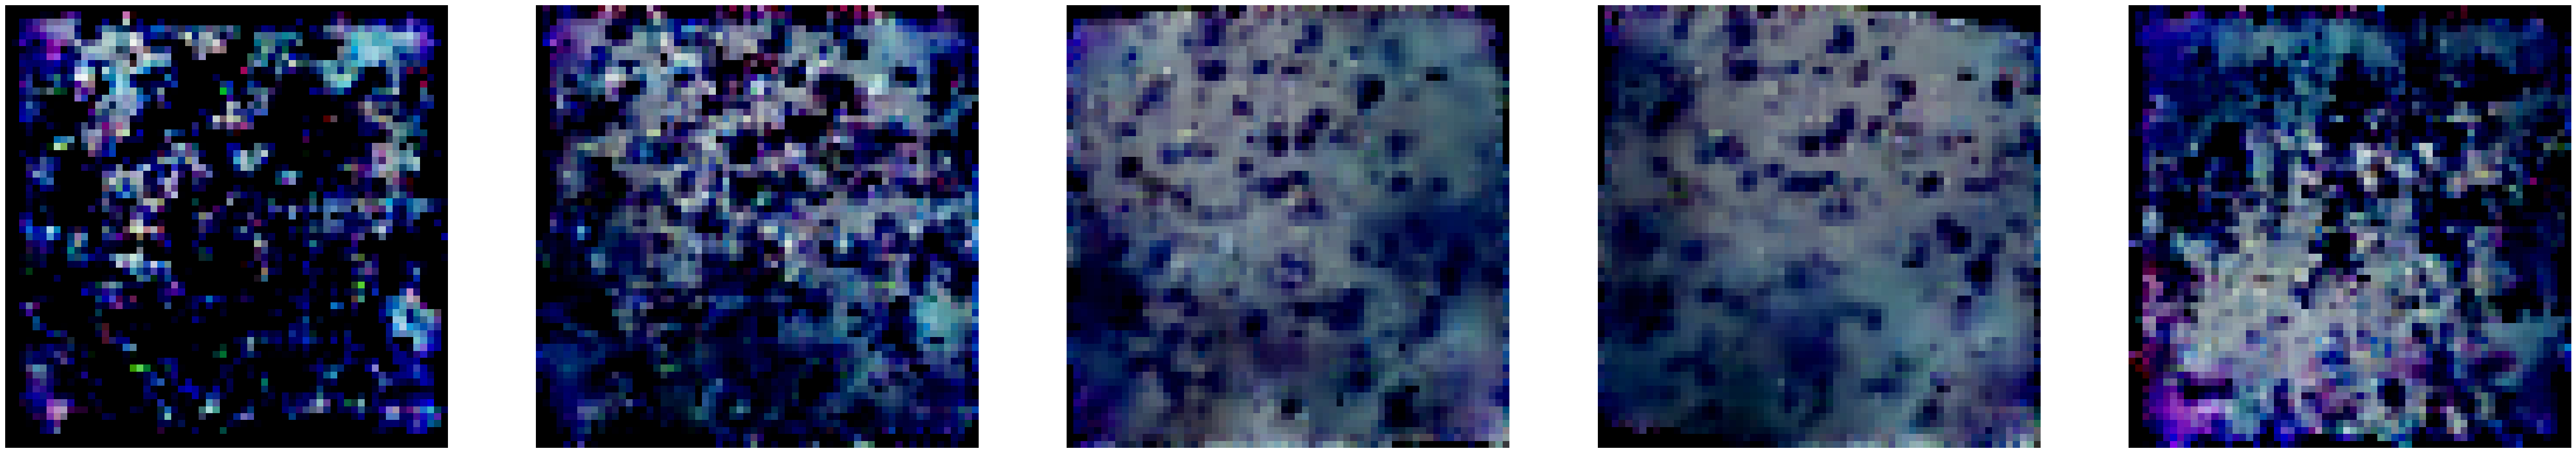

  0%|          | 0/41 [00:00<?, ?it/s]

[2402/2750][20/41] Loss_D: 0.3901 Loss_G: 4.7810 D(x): 0.8979 D(G(z)): 0.0450 / 0.0110
[2402/2750][40/41] Loss_D: 0.4407 Loss_G: 3.9119 D(x): 0.8475 D(G(z)): 0.0454 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[2403/2750][20/41] Loss_D: 0.5061 Loss_G: 4.3044 D(x): 0.8652 D(G(z)): 0.0940 / 0.0138
[2403/2750][40/41] Loss_D: 0.3625 Loss_G: 4.5976 D(x): 0.9166 D(G(z)): 0.0130 / 0.0079


  0%|          | 0/41 [00:00<?, ?it/s]

[2404/2750][20/41] Loss_D: 0.9548 Loss_G: 2.2347 D(x): 0.4310 D(G(z)): 0.0143 / 0.1307
[2404/2750][40/41] Loss_D: 0.4524 Loss_G: 3.8804 D(x): 0.8572 D(G(z)): 0.0240 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[2405/2750][20/41] Loss_D: 0.4608 Loss_G: 3.6827 D(x): 0.9376 D(G(z)): 0.0796 / 0.0217
[2405/2750][40/41] Loss_D: 0.7822 Loss_G: 2.6473 D(x): 0.5838 D(G(z)): 0.0156 / 0.0749


  0%|          | 0/41 [00:00<?, ?it/s]

[2406/2750][20/41] Loss_D: 0.4229 Loss_G: 4.0876 D(x): 0.8368 D(G(z)): 0.0317 / 0.0226
[2406/2750][40/41] Loss_D: 0.3774 Loss_G: 4.0549 D(x): 0.8614 D(G(z)): 0.0153 / 0.0173


  0%|          | 0/41 [00:00<?, ?it/s]

[2407/2750][20/41] Loss_D: 0.4340 Loss_G: 4.7470 D(x): 0.9616 D(G(z)): 0.0330 / 0.0119
[2407/2750][40/41] Loss_D: 0.4256 Loss_G: 4.5589 D(x): 0.9461 D(G(z)): 0.0413 / 0.0094


  0%|          | 0/41 [00:00<?, ?it/s]

[2408/2750][20/41] Loss_D: 0.5545 Loss_G: 3.8699 D(x): 0.9191 D(G(z)): 0.1645 / 0.0171
[2408/2750][40/41] Loss_D: 0.4068 Loss_G: 4.2290 D(x): 0.9069 D(G(z)): 0.0322 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[2409/2750][20/41] Loss_D: 0.4830 Loss_G: 4.0825 D(x): 0.9606 D(G(z)): 0.0789 / 0.0167
[2409/2750][40/41] Loss_D: 0.6062 Loss_G: 4.0185 D(x): 0.8988 D(G(z)): 0.1682 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[2410/2750][20/41] Loss_D: 0.4211 Loss_G: 4.9202 D(x): 0.9109 D(G(z)): 0.0143 / 0.0069
[2410/2750][40/41] Loss_D: 0.3976 Loss_G: 4.8819 D(x): 0.9320 D(G(z)): 0.0115 / 0.0070


  0%|          | 0/41 [00:00<?, ?it/s]

[2411/2750][20/41] Loss_D: 0.4194 Loss_G: 3.4697 D(x): 0.9228 D(G(z)): 0.0354 / 0.0307
[2411/2750][40/41] Loss_D: 0.3925 Loss_G: 4.7780 D(x): 0.9380 D(G(z)): 0.0149 / 0.0070


  0%|          | 0/41 [00:00<?, ?it/s]

[2412/2750][20/41] Loss_D: 0.5058 Loss_G: 4.1775 D(x): 0.9710 D(G(z)): 0.0637 / 0.0123
[2412/2750][40/41] Loss_D: 0.4739 Loss_G: 5.7389 D(x): 0.7378 D(G(z)): 0.0050 / 0.0035


  0%|          | 0/41 [00:00<?, ?it/s]

[2413/2750][20/41] Loss_D: 0.4104 Loss_G: 3.6769 D(x): 0.8945 D(G(z)): 0.0379 / 0.0197
[2413/2750][40/41] Loss_D: 0.4833 Loss_G: 4.7384 D(x): 0.8347 D(G(z)): 0.0480 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[2414/2750][20/41] Loss_D: 0.4319 Loss_G: 4.1845 D(x): 0.9446 D(G(z)): 0.0360 / 0.0142
[2414/2750][40/41] Loss_D: 0.4040 Loss_G: 3.6478 D(x): 0.8885 D(G(z)): 0.0194 / 0.0247


  0%|          | 0/41 [00:00<?, ?it/s]

[2415/2750][20/41] Loss_D: 0.3926 Loss_G: 4.5860 D(x): 0.8842 D(G(z)): 0.0250 / 0.0100
[2415/2750][40/41] Loss_D: 0.4131 Loss_G: 4.6124 D(x): 0.9486 D(G(z)): 0.0265 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[2416/2750][20/41] Loss_D: 0.6918 Loss_G: 3.0510 D(x): 0.9863 D(G(z)): 0.1327 / 0.0548
[2416/2750][40/41] Loss_D: 0.3946 Loss_G: 4.6490 D(x): 0.8317 D(G(z)): 0.0137 / 0.0089


  0%|          | 0/41 [00:00<?, ?it/s]

[2417/2750][20/41] Loss_D: 0.4393 Loss_G: 3.5577 D(x): 0.9204 D(G(z)): 0.0513 / 0.0252
[2417/2750][40/41] Loss_D: 0.5709 Loss_G: 4.0034 D(x): 0.6476 D(G(z)): 0.0102 / 0.0203


  0%|          | 0/41 [00:00<?, ?it/s]

[2418/2750][20/41] Loss_D: 0.4344 Loss_G: 4.2548 D(x): 0.7882 D(G(z)): 0.0170 / 0.0117
[2418/2750][40/41] Loss_D: 0.7172 Loss_G: 3.9045 D(x): 0.5387 D(G(z)): 0.0035 / 0.0192


  0%|          | 0/41 [00:00<?, ?it/s]

[2419/2750][20/41] Loss_D: 0.4054 Loss_G: 3.7706 D(x): 0.8682 D(G(z)): 0.0211 / 0.0208
[2419/2750][40/41] Loss_D: 0.3654 Loss_G: 4.9701 D(x): 0.8789 D(G(z)): 0.0067 / 0.0071


  0%|          | 0/41 [00:00<?, ?it/s]

[2420/2750][20/41] Loss_D: 0.5947 Loss_G: 2.9953 D(x): 0.9134 D(G(z)): 0.1773 / 0.0479
[2420/2750][40/41] Loss_D: 0.4328 Loss_G: 3.6902 D(x): 0.9093 D(G(z)): 0.0416 / 0.0254


  0%|          | 0/41 [00:00<?, ?it/s]

[2421/2750][20/41] Loss_D: 0.4808 Loss_G: 4.4408 D(x): 0.9473 D(G(z)): 0.0864 / 0.0091
[2421/2750][40/41] Loss_D: 0.4078 Loss_G: 3.7823 D(x): 0.8321 D(G(z)): 0.0322 / 0.0260


  0%|          | 0/41 [00:00<?, ?it/s]

[2422/2750][20/41] Loss_D: 0.4275 Loss_G: 3.6030 D(x): 0.8478 D(G(z)): 0.0358 / 0.0259
[2422/2750][40/41] Loss_D: 0.3964 Loss_G: 3.9072 D(x): 0.8714 D(G(z)): 0.0304 / 0.0186


  0%|          | 0/41 [00:00<?, ?it/s]

[2423/2750][20/41] Loss_D: 0.4583 Loss_G: 4.5097 D(x): 0.9147 D(G(z)): 0.0640 / 0.0108
[2423/2750][40/41] Loss_D: 0.4290 Loss_G: 3.5641 D(x): 0.7835 D(G(z)): 0.0178 / 0.0227


  0%|          | 0/41 [00:00<?, ?it/s]

[2424/2750][20/41] Loss_D: 0.3693 Loss_G: 4.1284 D(x): 0.8995 D(G(z)): 0.0213 / 0.0149
[2424/2750][40/41] Loss_D: 0.5356 Loss_G: 3.3217 D(x): 0.7040 D(G(z)): 0.0224 / 0.0396


  0%|          | 0/41 [00:00<?, ?it/s]

[2425/2750][20/41] Loss_D: 0.3737 Loss_G: 4.2436 D(x): 0.8921 D(G(z)): 0.0336 / 0.0122
[2425/2750][40/41] Loss_D: 0.3517 Loss_G: 4.2681 D(x): 0.9198 D(G(z)): 0.0141 / 0.0127


  0%|          | 0/41 [00:00<?, ?it/s]

[2426/2750][20/41] Loss_D: 0.5076 Loss_G: 3.5386 D(x): 0.8218 D(G(z)): 0.0931 / 0.0277
[2426/2750][40/41] Loss_D: 0.7061 Loss_G: 3.8073 D(x): 0.5807 D(G(z)): 0.0070 / 0.0229


  0%|          | 0/41 [00:00<?, ?it/s]

[2427/2750][20/41] Loss_D: 0.3538 Loss_G: 5.9366 D(x): 0.8928 D(G(z)): 0.0045 / 0.0024
[2427/2750][40/41] Loss_D: 0.3560 Loss_G: 4.2123 D(x): 0.9286 D(G(z)): 0.0122 / 0.0145


  0%|          | 0/41 [00:00<?, ?it/s]

[2428/2750][20/41] Loss_D: 0.5112 Loss_G: 4.8566 D(x): 0.7146 D(G(z)): 0.0050 / 0.0093
[2428/2750][40/41] Loss_D: 0.4201 Loss_G: 3.9403 D(x): 0.9278 D(G(z)): 0.0336 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[2429/2750][20/41] Loss_D: 0.4231 Loss_G: 3.9519 D(x): 0.9457 D(G(z)): 0.0582 / 0.0178
[2429/2750][40/41] Loss_D: 0.3878 Loss_G: 3.8165 D(x): 0.8600 D(G(z)): 0.0458 / 0.0218


  0%|          | 0/41 [00:00<?, ?it/s]

[2430/2750][20/41] Loss_D: 0.3994 Loss_G: 5.9373 D(x): 0.8632 D(G(z)): 0.0140 / 0.0044
[2430/2750][40/41] Loss_D: 0.4438 Loss_G: 3.7335 D(x): 0.8325 D(G(z)): 0.0345 / 0.0271


  0%|          | 0/41 [00:00<?, ?it/s]

[2431/2750][20/41] Loss_D: 0.3805 Loss_G: 4.0259 D(x): 0.9118 D(G(z)): 0.0329 / 0.0175
[2431/2750][40/41] Loss_D: 0.3624 Loss_G: 4.0793 D(x): 0.8630 D(G(z)): 0.0206 / 0.0120


  0%|          | 0/41 [00:00<?, ?it/s]

[2432/2750][20/41] Loss_D: 0.3561 Loss_G: 6.7824 D(x): 0.8765 D(G(z)): 0.0043 / 0.0030
[2432/2750][40/41] Loss_D: 0.4010 Loss_G: 3.2732 D(x): 0.9173 D(G(z)): 0.0625 / 0.0309


  0%|          | 0/41 [00:00<?, ?it/s]

[2433/2750][20/41] Loss_D: 0.7808 Loss_G: 2.7949 D(x): 0.5428 D(G(z)): 0.0116 / 0.0608
[2433/2750][40/41] Loss_D: 0.3571 Loss_G: 5.3563 D(x): 0.8900 D(G(z)): 0.0079 / 0.0038


  0%|          | 0/41 [00:00<?, ?it/s]

[2434/2750][20/41] Loss_D: 0.4282 Loss_G: 4.0779 D(x): 0.9283 D(G(z)): 0.0769 / 0.0228
[2434/2750][40/41] Loss_D: 0.4625 Loss_G: 4.3890 D(x): 0.7210 D(G(z)): 0.0074 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[2435/2750][20/41] Loss_D: 0.3580 Loss_G: 4.1097 D(x): 0.8999 D(G(z)): 0.0231 / 0.0130
[2435/2750][40/41] Loss_D: 0.4146 Loss_G: 4.5550 D(x): 0.9391 D(G(z)): 0.0227 / 0.0091


  0%|          | 0/41 [00:00<?, ?it/s]

[2436/2750][20/41] Loss_D: 0.3515 Loss_G: 4.9971 D(x): 0.8819 D(G(z)): 0.0121 / 0.0073
[2436/2750][40/41] Loss_D: 0.3925 Loss_G: 5.7200 D(x): 0.9372 D(G(z)): 0.0068 / 0.0022


  0%|          | 0/41 [00:00<?, ?it/s]

[2437/2750][20/41] Loss_D: 0.4425 Loss_G: 3.3438 D(x): 0.9209 D(G(z)): 0.0719 / 0.0311
[2437/2750][40/41] Loss_D: 0.3551 Loss_G: 5.4330 D(x): 0.8403 D(G(z)): 0.0042 / 0.0033


  0%|          | 0/41 [00:00<?, ?it/s]

[2438/2750][20/41] Loss_D: 0.5561 Loss_G: 4.2311 D(x): 0.8402 D(G(z)): 0.1077 / 0.0215
[2438/2750][40/41] Loss_D: 0.4229 Loss_G: 4.9067 D(x): 0.9396 D(G(z)): 0.0170 / 0.0066


  0%|          | 0/41 [00:00<?, ?it/s]

[2439/2750][20/41] Loss_D: 0.5531 Loss_G: 2.5994 D(x): 0.6789 D(G(z)): 0.0191 / 0.0763
[2439/2750][40/41] Loss_D: 0.3552 Loss_G: 5.9039 D(x): 0.8716 D(G(z)): 0.0041 / 0.0029


  0%|          | 0/41 [00:00<?, ?it/s]

[2440/2750][20/41] Loss_D: 0.4623 Loss_G: 3.6036 D(x): 0.9085 D(G(z)): 0.0937 / 0.0230
[2440/2750][40/41] Loss_D: 0.5399 Loss_G: 3.9202 D(x): 0.9324 D(G(z)): 0.1378 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[2441/2750][20/41] Loss_D: 0.3709 Loss_G: 4.3349 D(x): 0.8989 D(G(z)): 0.0352 / 0.0120
[2441/2750][40/41] Loss_D: 0.3657 Loss_G: 4.0715 D(x): 0.9025 D(G(z)): 0.0295 / 0.0138


  0%|          | 0/41 [00:00<?, ?it/s]

[2442/2750][20/41] Loss_D: 0.4668 Loss_G: 4.3006 D(x): 0.9617 D(G(z)): 0.0570 / 0.0118
[2442/2750][40/41] Loss_D: 0.3894 Loss_G: 5.8726 D(x): 0.9544 D(G(z)): 0.0090 / 0.0029


  0%|          | 0/41 [00:00<?, ?it/s]

[2443/2750][20/41] Loss_D: 0.3483 Loss_G: 5.4038 D(x): 0.8956 D(G(z)): 0.0066 / 0.0042
[2443/2750][40/41] Loss_D: 0.4185 Loss_G: 4.2169 D(x): 0.9498 D(G(z)): 0.0582 / 0.0189


  0%|          | 0/41 [00:00<?, ?it/s]

[2444/2750][20/41] Loss_D: 0.3599 Loss_G: 4.3037 D(x): 0.9097 D(G(z)): 0.0223 / 0.0120
[2444/2750][40/41] Loss_D: 0.3950 Loss_G: 3.7505 D(x): 0.9263 D(G(z)): 0.0466 / 0.0213


  0%|          | 0/41 [00:00<?, ?it/s]

[2445/2750][20/41] Loss_D: 0.3804 Loss_G: 3.7552 D(x): 0.8676 D(G(z)): 0.0255 / 0.0228
[2445/2750][40/41] Loss_D: 0.3990 Loss_G: 4.2945 D(x): 0.9239 D(G(z)): 0.0235 / 0.0123


  0%|          | 0/41 [00:00<?, ?it/s]

[2446/2750][20/41] Loss_D: 0.3500 Loss_G: 4.1723 D(x): 0.8880 D(G(z)): 0.0163 / 0.0120
[2446/2750][40/41] Loss_D: 0.3425 Loss_G: 5.1737 D(x): 0.8937 D(G(z)): 0.0055 / 0.0041


  0%|          | 0/41 [00:00<?, ?it/s]

[2447/2750][20/41] Loss_D: 0.3480 Loss_G: 5.2327 D(x): 0.8808 D(G(z)): 0.0083 / 0.0046
[2447/2750][40/41] Loss_D: 0.3513 Loss_G: 4.3898 D(x): 0.9228 D(G(z)): 0.0171 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[2448/2750][20/41] Loss_D: 0.4197 Loss_G: 8.9310 D(x): 0.7806 D(G(z)): 0.0003 / 0.0002
[2448/2750][40/41] Loss_D: 0.3724 Loss_G: 5.5084 D(x): 0.9183 D(G(z)): 0.0057 / 0.0030


  0%|          | 0/41 [00:00<?, ?it/s]

[2449/2750][20/41] Loss_D: 0.4581 Loss_G: 3.3694 D(x): 0.9296 D(G(z)): 0.1090 / 0.0337
[2449/2750][40/41] Loss_D: 0.4072 Loss_G: 4.3309 D(x): 0.9280 D(G(z)): 0.0217 / 0.0108


  0%|          | 0/41 [00:00<?, ?it/s]

[2450/2750][20/41] Loss_D: 0.3724 Loss_G: 3.4527 D(x): 0.9021 D(G(z)): 0.0267 / 0.0309
[2450/2750][40/41] Loss_D: 0.3489 Loss_G: 4.6004 D(x): 0.9212 D(G(z)): 0.0169 / 0.0089


  0%|          | 0/41 [00:00<?, ?it/s]

[2451/2750][20/41] Loss_D: 0.4038 Loss_G: 4.4918 D(x): 0.8707 D(G(z)): 0.0315 / 0.0114
[2451/2750][40/41] Loss_D: 0.3399 Loss_G: 5.5401 D(x): 0.8891 D(G(z)): 0.0045 / 0.0032


  0%|          | 0/41 [00:00<?, ?it/s]

[2452/2750][20/41] Loss_D: 0.7095 Loss_G: 6.1213 D(x): 0.9412 D(G(z)): 0.2349 / 0.0019
[2452/2750][40/41] Loss_D: 0.6653 Loss_G: 4.3103 D(x): 0.6201 D(G(z)): 0.0147 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[2453/2750][20/41] Loss_D: 0.6805 Loss_G: 5.4001 D(x): 0.6131 D(G(z)): 0.0028 / 0.0040
[2453/2750][40/41] Loss_D: 0.5257 Loss_G: 3.7389 D(x): 0.7232 D(G(z)): 0.0174 / 0.0219


  0%|          | 0/41 [00:00<?, ?it/s]

[2454/2750][20/41] Loss_D: 0.4015 Loss_G: 4.8146 D(x): 0.8433 D(G(z)): 0.0086 / 0.0072
[2454/2750][40/41] Loss_D: 0.4419 Loss_G: 4.4602 D(x): 0.7760 D(G(z)): 0.0052 / 0.0115


  0%|          | 0/41 [00:00<?, ?it/s]

[2455/2750][20/41] Loss_D: 0.7132 Loss_G: 2.7235 D(x): 0.5625 D(G(z)): 0.0154 / 0.0670
[2455/2750][40/41] Loss_D: 0.5299 Loss_G: 2.8987 D(x): 0.9661 D(G(z)): 0.0907 / 0.0538


  0%|          | 0/41 [00:00<?, ?it/s]

[2456/2750][20/41] Loss_D: 0.6976 Loss_G: 3.0023 D(x): 0.5844 D(G(z)): 0.0040 / 0.0524
[2456/2750][40/41] Loss_D: 0.5042 Loss_G: 3.6072 D(x): 0.9805 D(G(z)): 0.0500 / 0.0242


  0%|          | 0/41 [00:00<?, ?it/s]

[2457/2750][20/41] Loss_D: 0.4167 Loss_G: 4.6018 D(x): 0.9648 D(G(z)): 0.0175 / 0.0080
[2457/2750][40/41] Loss_D: 0.3880 Loss_G: 6.7142 D(x): 0.9068 D(G(z)): 0.0008 / 0.0009


  0%|          | 0/41 [00:00<?, ?it/s]

[2458/2750][20/41] Loss_D: 0.4338 Loss_G: 3.4263 D(x): 0.9164 D(G(z)): 0.0562 / 0.0257
[2458/2750][40/41] Loss_D: 0.4049 Loss_G: 4.1477 D(x): 0.8679 D(G(z)): 0.0217 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[2459/2750][20/41] Loss_D: 0.4051 Loss_G: 5.1976 D(x): 0.9459 D(G(z)): 0.0152 / 0.0043
[2459/2750][40/41] Loss_D: 0.4677 Loss_G: 5.4771 D(x): 0.9683 D(G(z)): 0.0225 / 0.0060


  0%|          | 0/41 [00:00<?, ?it/s]

[2460/2750][20/41] Loss_D: 0.4344 Loss_G: 4.2544 D(x): 0.9592 D(G(z)): 0.0327 / 0.0142
[2460/2750][40/41] Loss_D: 0.4914 Loss_G: 3.5948 D(x): 0.7501 D(G(z)): 0.0109 / 0.0253


  0%|          | 0/41 [00:00<?, ?it/s]

[2461/2750][20/41] Loss_D: 0.4025 Loss_G: 4.2246 D(x): 0.8605 D(G(z)): 0.0179 / 0.0122
[2461/2750][40/41] Loss_D: 0.3798 Loss_G: 6.4890 D(x): 0.9018 D(G(z)): 0.0027 / 0.0014


  0%|          | 0/41 [00:00<?, ?it/s]

[2462/2750][20/41] Loss_D: 0.5182 Loss_G: 3.4206 D(x): 0.9584 D(G(z)): 0.0935 / 0.0271
[2462/2750][40/41] Loss_D: 0.5309 Loss_G: 3.0630 D(x): 0.6801 D(G(z)): 0.0171 / 0.0498


  0%|          | 0/41 [00:00<?, ?it/s]

[2463/2750][20/41] Loss_D: 0.4605 Loss_G: 3.8317 D(x): 0.9673 D(G(z)): 0.0581 / 0.0181
[2463/2750][40/41] Loss_D: 0.3894 Loss_G: 5.2107 D(x): 0.8310 D(G(z)): 0.0074 / 0.0048


  0%|          | 0/41 [00:00<?, ?it/s]

[2464/2750][20/41] Loss_D: 0.4085 Loss_G: 3.3875 D(x): 0.9312 D(G(z)): 0.0601 / 0.0335
[2464/2750][40/41] Loss_D: 0.5149 Loss_G: 3.9311 D(x): 0.7153 D(G(z)): 0.0105 / 0.0171


  0%|          | 0/41 [00:00<?, ?it/s]

[2465/2750][20/41] Loss_D: 0.3543 Loss_G: 5.6355 D(x): 0.8517 D(G(z)): 0.0071 / 0.0040
[2465/2750][40/41] Loss_D: 0.3887 Loss_G: 5.2758 D(x): 0.8797 D(G(z)): 0.0070 / 0.0043


  0%|          | 0/41 [00:00<?, ?it/s]

[2466/2750][20/41] Loss_D: 0.3364 Loss_G: 5.5590 D(x): 0.8847 D(G(z)): 0.0037 / 0.0028
[2466/2750][40/41] Loss_D: 0.3667 Loss_G: 4.4504 D(x): 0.9237 D(G(z)): 0.0175 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[2467/2750][20/41] Loss_D: 0.5966 Loss_G: 2.4916 D(x): 0.6478 D(G(z)): 0.0497 / 0.0794
[2467/2750][40/41] Loss_D: 0.3631 Loss_G: 4.0629 D(x): 0.8708 D(G(z)): 0.0254 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[2468/2750][20/41] Loss_D: 0.3518 Loss_G: 4.4428 D(x): 0.8666 D(G(z)): 0.0125 / 0.0088
[2468/2750][40/41] Loss_D: 0.5063 Loss_G: 3.6551 D(x): 0.9602 D(G(z)): 0.0921 / 0.0211


  0%|          | 0/41 [00:00<?, ?it/s]

[2469/2750][20/41] Loss_D: 0.3524 Loss_G: 4.6634 D(x): 0.8928 D(G(z)): 0.0116 / 0.0075
[2469/2750][40/41] Loss_D: 0.4602 Loss_G: 4.0556 D(x): 0.9114 D(G(z)): 0.0546 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[2470/2750][20/41] Loss_D: 0.4583 Loss_G: 3.4770 D(x): 0.8046 D(G(z)): 0.0227 / 0.0248
[2470/2750][40/41] Loss_D: 0.5593 Loss_G: 4.2047 D(x): 0.9742 D(G(z)): 0.0383 / 0.0130


  0%|          | 0/41 [00:00<?, ?it/s]

[2471/2750][20/41] Loss_D: 0.4286 Loss_G: 3.6380 D(x): 0.8345 D(G(z)): 0.0261 / 0.0237
[2471/2750][40/41] Loss_D: 0.5977 Loss_G: 3.6641 D(x): 0.9218 D(G(z)): 0.1374 / 0.0232


  0%|          | 0/41 [00:00<?, ?it/s]

[2472/2750][20/41] Loss_D: 0.3669 Loss_G: 5.3129 D(x): 0.9313 D(G(z)): 0.0053 / 0.0034
[2472/2750][40/41] Loss_D: 0.4366 Loss_G: 4.1708 D(x): 0.9550 D(G(z)): 0.0438 / 0.0131


  0%|          | 0/41 [00:00<?, ?it/s]

[2473/2750][20/41] Loss_D: 0.4869 Loss_G: 3.2229 D(x): 0.7709 D(G(z)): 0.0379 / 0.0340
[2473/2750][40/41] Loss_D: 0.4480 Loss_G: 3.9388 D(x): 0.9331 D(G(z)): 0.0522 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[2474/2750][20/41] Loss_D: 0.3964 Loss_G: 4.1132 D(x): 0.8808 D(G(z)): 0.0217 / 0.0117
[2474/2750][40/41] Loss_D: 0.4387 Loss_G: 4.1798 D(x): 0.9380 D(G(z)): 0.0272 / 0.0140


  0%|          | 0/41 [00:00<?, ?it/s]

[2475/2750][20/41] Loss_D: 0.4465 Loss_G: 4.2276 D(x): 0.9280 D(G(z)): 0.0786 / 0.0107
[2475/2750][40/41] Loss_D: 0.3958 Loss_G: 3.8039 D(x): 0.8708 D(G(z)): 0.0229 / 0.0199


  0%|          | 0/41 [00:00<?, ?it/s]

[2476/2750][20/41] Loss_D: 0.4193 Loss_G: 4.4328 D(x): 0.9202 D(G(z)): 0.0269 / 0.0168
[2476/2750][40/41] Loss_D: 0.4018 Loss_G: 5.2490 D(x): 0.9592 D(G(z)): 0.0130 / 0.0069


  0%|          | 0/41 [00:00<?, ?it/s]

[2477/2750][20/41] Loss_D: 0.4991 Loss_G: 3.6256 D(x): 0.9240 D(G(z)): 0.1194 / 0.0240
[2477/2750][40/41] Loss_D: 0.4217 Loss_G: 5.4475 D(x): 0.7864 D(G(z)): 0.0021 / 0.0032


  0%|          | 0/41 [00:00<?, ?it/s]

[2478/2750][20/41] Loss_D: 0.4162 Loss_G: 5.0225 D(x): 0.9450 D(G(z)): 0.0271 / 0.0054
[2478/2750][40/41] Loss_D: 0.3964 Loss_G: 5.0482 D(x): 0.9632 D(G(z)): 0.0084 / 0.0068


  0%|          | 0/41 [00:00<?, ?it/s]

[2479/2750][20/41] Loss_D: 0.4722 Loss_G: 3.9075 D(x): 0.7198 D(G(z)): 0.0068 / 0.0166
[2479/2750][40/41] Loss_D: 0.4202 Loss_G: 5.6583 D(x): 0.8912 D(G(z)): 0.0094 / 0.0028


  0%|          | 0/41 [00:00<?, ?it/s]

[2480/2750][20/41] Loss_D: 0.3816 Loss_G: 4.4852 D(x): 0.9403 D(G(z)): 0.0153 / 0.0095
[2480/2750][40/41] Loss_D: 0.4035 Loss_G: 3.6080 D(x): 0.8745 D(G(z)): 0.0313 / 0.0243


  0%|          | 0/41 [00:00<?, ?it/s]

[2481/2750][20/41] Loss_D: 0.3778 Loss_G: 4.3887 D(x): 0.8925 D(G(z)): 0.0108 / 0.0115
[2481/2750][40/41] Loss_D: 0.4310 Loss_G: 3.1218 D(x): 0.8304 D(G(z)): 0.0456 / 0.0480


  0%|          | 0/41 [00:00<?, ?it/s]

[2482/2750][20/41] Loss_D: 0.4204 Loss_G: 3.3579 D(x): 0.8882 D(G(z)): 0.0427 / 0.0310
[2482/2750][40/41] Loss_D: 0.4196 Loss_G: 3.7990 D(x): 0.8589 D(G(z)): 0.0251 / 0.0185


  0%|          | 0/41 [00:00<?, ?it/s]

[2483/2750][20/41] Loss_D: 0.4532 Loss_G: 3.7539 D(x): 0.8737 D(G(z)): 0.0623 / 0.0199
[2483/2750][40/41] Loss_D: 0.3809 Loss_G: 5.1945 D(x): 0.8953 D(G(z)): 0.0037 / 0.0043


  0%|          | 0/41 [00:00<?, ?it/s]

[2484/2750][20/41] Loss_D: 0.4989 Loss_G: 4.6901 D(x): 0.9836 D(G(z)): 0.0137 / 0.0080
[2484/2750][40/41] Loss_D: 0.5171 Loss_G: 4.7226 D(x): 0.7001 D(G(z)): 0.0090 / 0.0103


  0%|          | 0/41 [00:00<?, ?it/s]

[2485/2750][20/41] Loss_D: 0.4862 Loss_G: 3.8438 D(x): 0.7375 D(G(z)): 0.0096 / 0.0180
[2485/2750][40/41] Loss_D: 0.4376 Loss_G: 3.8189 D(x): 0.8130 D(G(z)): 0.0164 / 0.0183


  0%|          | 0/41 [00:00<?, ?it/s]

[2486/2750][20/41] Loss_D: 0.5047 Loss_G: 4.9914 D(x): 0.7223 D(G(z)): 0.0023 / 0.0059
[2486/2750][40/41] Loss_D: 0.5966 Loss_G: 3.7778 D(x): 0.6105 D(G(z)): 0.0024 / 0.0210


  0%|          | 0/41 [00:00<?, ?it/s]

[2487/2750][20/41] Loss_D: 0.4280 Loss_G: 4.9229 D(x): 0.8030 D(G(z)): 0.0150 / 0.0093
[2487/2750][40/41] Loss_D: 0.6303 Loss_G: 4.2297 D(x): 0.6342 D(G(z)): 0.0043 / 0.0133


  0%|          | 0/41 [00:00<?, ?it/s]

[2488/2750][20/41] Loss_D: 0.3693 Loss_G: 4.3426 D(x): 0.8567 D(G(z)): 0.0177 / 0.0120
[2488/2750][40/41] Loss_D: 0.3426 Loss_G: 5.8424 D(x): 0.8872 D(G(z)): 0.0029 / 0.0023


  0%|          | 0/41 [00:00<?, ?it/s]

[2489/2750][20/41] Loss_D: 0.4045 Loss_G: 4.9274 D(x): 0.9464 D(G(z)): 0.0098 / 0.0059
[2489/2750][40/41] Loss_D: 0.4612 Loss_G: 3.7964 D(x): 0.7723 D(G(z)): 0.0154 / 0.0221


  0%|          | 0/41 [00:00<?, ?it/s]

[2490/2750][20/41] Loss_D: 0.3789 Loss_G: 4.1519 D(x): 0.9359 D(G(z)): 0.0242 / 0.0135
[2490/2750][40/41] Loss_D: 0.3730 Loss_G: 5.2504 D(x): 0.8974 D(G(z)): 0.0058 / 0.0042


  0%|          | 0/41 [00:00<?, ?it/s]

[2491/2750][20/41] Loss_D: 0.3572 Loss_G: 5.6429 D(x): 0.9202 D(G(z)): 0.0039 / 0.0031
[2491/2750][40/41] Loss_D: 0.3685 Loss_G: 4.5185 D(x): 0.8979 D(G(z)): 0.0129 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[2492/2750][20/41] Loss_D: 0.3642 Loss_G: 4.7842 D(x): 0.8918 D(G(z)): 0.0113 / 0.0078
[2492/2750][40/41] Loss_D: 0.4911 Loss_G: 4.2396 D(x): 0.7934 D(G(z)): 0.0545 / 0.0141


  0%|          | 0/41 [00:00<?, ?it/s]

[2493/2750][20/41] Loss_D: 0.4565 Loss_G: 4.0369 D(x): 0.8107 D(G(z)): 0.0299 / 0.0165
[2493/2750][40/41] Loss_D: 0.4967 Loss_G: 4.7903 D(x): 0.9842 D(G(z)): 0.0127 / 0.0069


  0%|          | 0/41 [00:00<?, ?it/s]

[2494/2750][20/41] Loss_D: 0.4128 Loss_G: 4.9726 D(x): 0.9652 D(G(z)): 0.0143 / 0.0054
[2494/2750][40/41] Loss_D: 0.4067 Loss_G: 4.2062 D(x): 0.8840 D(G(z)): 0.0295 / 0.0123


  0%|          | 0/41 [00:00<?, ?it/s]

[2495/2750][20/41] Loss_D: 0.3649 Loss_G: 6.3454 D(x): 0.8828 D(G(z)): 0.0033 / 0.0014
[2495/2750][40/41] Loss_D: 0.3898 Loss_G: 6.2892 D(x): 0.9172 D(G(z)): 0.0028 / 0.0013


  0%|          | 0/41 [00:00<?, ?it/s]

[2496/2750][20/41] Loss_D: 0.4588 Loss_G: 4.0505 D(x): 0.9665 D(G(z)): 0.0535 / 0.0141
[2496/2750][40/41] Loss_D: 0.4826 Loss_G: 4.3932 D(x): 0.7288 D(G(z)): 0.0063 / 0.0132


  0%|          | 0/41 [00:00<?, ?it/s]

[2497/2750][20/41] Loss_D: 0.4554 Loss_G: 3.7451 D(x): 0.9680 D(G(z)): 0.0222 / 0.0237
[2497/2750][40/41] Loss_D: 0.5163 Loss_G: 3.0102 D(x): 0.7154 D(G(z)): 0.0457 / 0.0479


  0%|          | 0/41 [00:00<?, ?it/s]

[2498/2750][20/41] Loss_D: 0.4174 Loss_G: 3.8112 D(x): 0.9320 D(G(z)): 0.0497 / 0.0195
[2498/2750][40/41] Loss_D: 0.4296 Loss_G: 4.6170 D(x): 0.9359 D(G(z)): 0.0404 / 0.0085


  0%|          | 0/41 [00:00<?, ?it/s]

[2499/2750][20/41] Loss_D: 0.5003 Loss_G: 3.0076 D(x): 0.7201 D(G(z)): 0.0211 / 0.0494
[2499/2750][40/41] Loss_D: 0.3875 Loss_G: 5.8926 D(x): 0.9043 D(G(z)): 0.0032 / 0.0025


  0%|          | 0/41 [00:00<?, ?it/s]

[2500/2750][20/41] Loss_D: 0.4788 Loss_G: 3.4883 D(x): 0.9578 D(G(z)): 0.0861 / 0.0250
[2500/2750][40/41] Loss_D: 0.5661 Loss_G: 4.2188 D(x): 0.9814 D(G(z)): 0.0998 / 0.0117


  0%|          | 0/41 [00:00<?, ?it/s]

[2501/2750][20/41] Loss_D: 0.4204 Loss_G: 4.5926 D(x): 0.8495 D(G(z)): 0.0220 / 0.0105
[2501/2750][40/41] Loss_D: 0.3829 Loss_G: 6.2469 D(x): 0.9309 D(G(z)): 0.0037 / 0.0022


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999992..0.84842974].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99739486].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.98505193].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.97321194].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999965..0.95573467].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_2501.pth


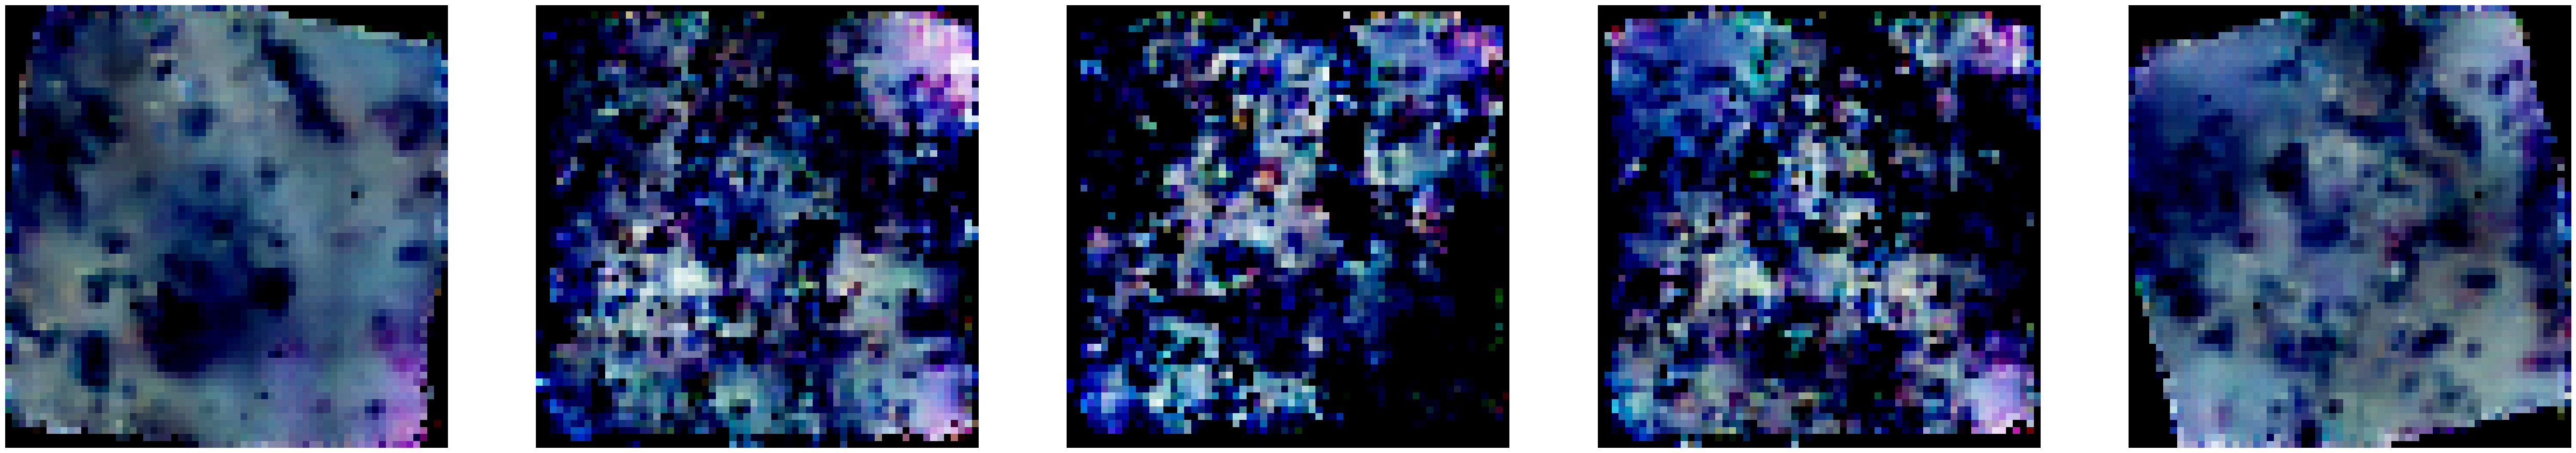

  0%|          | 0/41 [00:00<?, ?it/s]

[2502/2750][20/41] Loss_D: 0.3987 Loss_G: 4.4217 D(x): 0.8207 D(G(z)): 0.0114 / 0.0106
[2502/2750][40/41] Loss_D: 0.5697 Loss_G: 4.7354 D(x): 0.9419 D(G(z)): 0.1323 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[2503/2750][20/41] Loss_D: 0.4089 Loss_G: 5.5155 D(x): 0.9559 D(G(z)): 0.0055 / 0.0028
[2503/2750][40/41] Loss_D: 0.4537 Loss_G: 3.9520 D(x): 0.9725 D(G(z)): 0.0281 / 0.0190


  0%|          | 0/41 [00:00<?, ?it/s]

[2504/2750][20/41] Loss_D: 0.7476 Loss_G: 4.6752 D(x): 0.9754 D(G(z)): 0.1058 / 0.0191
[2504/2750][40/41] Loss_D: 0.4433 Loss_G: 4.4664 D(x): 0.9680 D(G(z)): 0.0214 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[2505/2750][20/41] Loss_D: 0.3849 Loss_G: 4.1908 D(x): 0.8910 D(G(z)): 0.0246 / 0.0132
[2505/2750][40/41] Loss_D: 0.5672 Loss_G: 3.9052 D(x): 0.6610 D(G(z)): 0.0109 / 0.0173


  0%|          | 0/41 [00:00<?, ?it/s]

[2506/2750][20/41] Loss_D: 0.4611 Loss_G: 5.1634 D(x): 0.9637 D(G(z)): 0.0143 / 0.0046
[2506/2750][40/41] Loss_D: 0.3819 Loss_G: 5.0844 D(x): 0.8273 D(G(z)): 0.0089 / 0.0044


  0%|          | 0/41 [00:00<?, ?it/s]

[2507/2750][20/41] Loss_D: 0.4233 Loss_G: 4.5814 D(x): 0.7758 D(G(z)): 0.0058 / 0.0091
[2507/2750][40/41] Loss_D: 0.4954 Loss_G: 4.1850 D(x): 0.9514 D(G(z)): 0.1129 / 0.0112


  0%|          | 0/41 [00:00<?, ?it/s]

[2508/2750][20/41] Loss_D: 0.3566 Loss_G: 5.1051 D(x): 0.8787 D(G(z)): 0.0069 / 0.0048
[2508/2750][40/41] Loss_D: 0.4032 Loss_G: 4.0888 D(x): 0.9395 D(G(z)): 0.0347 / 0.0134


  0%|          | 0/41 [00:00<?, ?it/s]

[2509/2750][20/41] Loss_D: 0.4223 Loss_G: 4.6828 D(x): 0.9745 D(G(z)): 0.0116 / 0.0073
[2509/2750][40/41] Loss_D: 0.4200 Loss_G: 3.6762 D(x): 0.8660 D(G(z)): 0.0396 / 0.0234


  0%|          | 0/41 [00:00<?, ?it/s]

[2510/2750][20/41] Loss_D: 0.4781 Loss_G: 3.2084 D(x): 0.9155 D(G(z)): 0.1038 / 0.0371
[2510/2750][40/41] Loss_D: 0.4304 Loss_G: 4.6546 D(x): 0.9529 D(G(z)): 0.0299 / 0.0089


  0%|          | 0/41 [00:00<?, ?it/s]

[2511/2750][20/41] Loss_D: 0.4072 Loss_G: 5.3306 D(x): 0.7850 D(G(z)): 0.0028 / 0.0033
[2511/2750][40/41] Loss_D: 0.4485 Loss_G: 3.7926 D(x): 0.8363 D(G(z)): 0.0217 / 0.0217


  0%|          | 0/41 [00:00<?, ?it/s]

[2512/2750][20/41] Loss_D: 0.4604 Loss_G: 3.3443 D(x): 0.9758 D(G(z)): 0.0479 / 0.0297
[2512/2750][40/41] Loss_D: 0.4121 Loss_G: 3.9070 D(x): 0.9366 D(G(z)): 0.0266 / 0.0166


  0%|          | 0/41 [00:00<?, ?it/s]

[2513/2750][20/41] Loss_D: 0.3670 Loss_G: 5.1622 D(x): 0.9224 D(G(z)): 0.0125 / 0.0053
[2513/2750][40/41] Loss_D: 0.5431 Loss_G: 3.7818 D(x): 0.9630 D(G(z)): 0.0960 / 0.0198


  0%|          | 0/41 [00:00<?, ?it/s]

[2514/2750][20/41] Loss_D: 0.3913 Loss_G: 3.7285 D(x): 0.9180 D(G(z)): 0.0306 / 0.0196
[2514/2750][40/41] Loss_D: 0.4683 Loss_G: 3.7786 D(x): 0.9641 D(G(z)): 0.0558 / 0.0210


  0%|          | 0/41 [00:00<?, ?it/s]

[2515/2750][20/41] Loss_D: 0.3909 Loss_G: 4.3243 D(x): 0.9151 D(G(z)): 0.0165 / 0.0136
[2515/2750][40/41] Loss_D: 0.6012 Loss_G: 2.7138 D(x): 0.9102 D(G(z)): 0.1909 / 0.0723


  0%|          | 0/41 [00:00<?, ?it/s]

[2516/2750][20/41] Loss_D: 0.4869 Loss_G: 3.9827 D(x): 0.8875 D(G(z)): 0.1035 / 0.0171
[2516/2750][40/41] Loss_D: 0.4003 Loss_G: 4.0502 D(x): 0.8364 D(G(z)): 0.0208 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[2517/2750][20/41] Loss_D: 0.4895 Loss_G: 3.7119 D(x): 0.9420 D(G(z)): 0.0487 / 0.0239
[2517/2750][40/41] Loss_D: 0.4274 Loss_G: 4.8463 D(x): 0.9406 D(G(z)): 0.0132 / 0.0061


  0%|          | 0/41 [00:00<?, ?it/s]

[2518/2750][20/41] Loss_D: 0.3897 Loss_G: 3.8932 D(x): 0.9047 D(G(z)): 0.0325 / 0.0164
[2518/2750][40/41] Loss_D: 0.5634 Loss_G: 3.9025 D(x): 0.9688 D(G(z)): 0.1156 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[2519/2750][20/41] Loss_D: 0.3860 Loss_G: 5.1854 D(x): 0.9233 D(G(z)): 0.0151 / 0.0062
[2519/2750][40/41] Loss_D: 0.3642 Loss_G: 5.8274 D(x): 0.8571 D(G(z)): 0.0030 / 0.0033


  0%|          | 0/41 [00:00<?, ?it/s]

[2520/2750][20/41] Loss_D: 0.4041 Loss_G: 4.6893 D(x): 0.9374 D(G(z)): 0.0272 / 0.0074
[2520/2750][40/41] Loss_D: 0.5133 Loss_G: 3.8835 D(x): 0.9721 D(G(z)): 0.0664 / 0.0161


  0%|          | 0/41 [00:00<?, ?it/s]

[2521/2750][20/41] Loss_D: 0.5787 Loss_G: 3.9815 D(x): 0.9698 D(G(z)): 0.1373 / 0.0135
[2521/2750][40/41] Loss_D: 0.4674 Loss_G: 3.7789 D(x): 0.9576 D(G(z)): 0.0841 / 0.0183


  0%|          | 0/41 [00:00<?, ?it/s]

[2522/2750][20/41] Loss_D: 0.3626 Loss_G: 6.5276 D(x): 0.8518 D(G(z)): 0.0009 / 0.0010
[2522/2750][40/41] Loss_D: 0.4366 Loss_G: 4.1299 D(x): 0.8560 D(G(z)): 0.0287 / 0.0152


  0%|          | 0/41 [00:00<?, ?it/s]

[2523/2750][20/41] Loss_D: 0.4060 Loss_G: 4.4887 D(x): 0.9476 D(G(z)): 0.0152 / 0.0094
[2523/2750][40/41] Loss_D: 0.3943 Loss_G: 4.0328 D(x): 0.9087 D(G(z)): 0.0209 / 0.0194


  0%|          | 0/41 [00:00<?, ?it/s]

[2524/2750][20/41] Loss_D: 0.3730 Loss_G: 4.6277 D(x): 0.9143 D(G(z)): 0.0193 / 0.0089
[2524/2750][40/41] Loss_D: 0.3747 Loss_G: 5.0419 D(x): 0.9085 D(G(z)): 0.0118 / 0.0061


  0%|          | 0/41 [00:00<?, ?it/s]

[2525/2750][20/41] Loss_D: 0.4208 Loss_G: 3.7292 D(x): 0.9561 D(G(z)): 0.0255 / 0.0270
[2525/2750][40/41] Loss_D: 0.5249 Loss_G: 3.4709 D(x): 0.9666 D(G(z)): 0.0886 / 0.0292


  0%|          | 0/41 [00:00<?, ?it/s]

[2526/2750][20/41] Loss_D: 0.5853 Loss_G: 3.7037 D(x): 0.9860 D(G(z)): 0.0916 / 0.0210
[2526/2750][40/41] Loss_D: 0.3718 Loss_G: 5.3052 D(x): 0.9015 D(G(z)): 0.0071 / 0.0049


  0%|          | 0/41 [00:00<?, ?it/s]

[2527/2750][20/41] Loss_D: 0.3917 Loss_G: 4.5172 D(x): 0.9239 D(G(z)): 0.0224 / 0.0085
[2527/2750][40/41] Loss_D: 0.6653 Loss_G: 4.5227 D(x): 0.9756 D(G(z)): 0.1755 / 0.0082


  0%|          | 0/41 [00:00<?, ?it/s]

[2528/2750][20/41] Loss_D: 0.5515 Loss_G: 3.0294 D(x): 0.6613 D(G(z)): 0.0259 / 0.0482
[2528/2750][40/41] Loss_D: 0.4283 Loss_G: 5.1565 D(x): 0.7810 D(G(z)): 0.0047 / 0.0048


  0%|          | 0/41 [00:00<?, ?it/s]

[2529/2750][20/41] Loss_D: 0.4537 Loss_G: 4.5675 D(x): 0.9775 D(G(z)): 0.0259 / 0.0135
[2529/2750][40/41] Loss_D: 0.4271 Loss_G: 3.4297 D(x): 0.9572 D(G(z)): 0.0287 / 0.0301


  0%|          | 0/41 [00:00<?, ?it/s]

[2530/2750][20/41] Loss_D: 0.4739 Loss_G: 3.0763 D(x): 0.8019 D(G(z)): 0.0662 / 0.0446
[2530/2750][40/41] Loss_D: 0.4718 Loss_G: 4.1347 D(x): 0.9642 D(G(z)): 0.0540 / 0.0151


  0%|          | 0/41 [00:00<?, ?it/s]

[2531/2750][20/41] Loss_D: 0.3696 Loss_G: 4.3386 D(x): 0.8809 D(G(z)): 0.0116 / 0.0131
[2531/2750][40/41] Loss_D: 0.4460 Loss_G: 3.9897 D(x): 0.7707 D(G(z)): 0.0143 / 0.0166


  0%|          | 0/41 [00:00<?, ?it/s]

[2532/2750][20/41] Loss_D: 0.4434 Loss_G: 3.7404 D(x): 0.9403 D(G(z)): 0.0622 / 0.0241
[2532/2750][40/41] Loss_D: 0.3635 Loss_G: 6.4582 D(x): 0.9228 D(G(z)): 0.0031 / 0.0017


  0%|          | 0/41 [00:00<?, ?it/s]

[2533/2750][20/41] Loss_D: 0.5015 Loss_G: 3.3613 D(x): 0.9570 D(G(z)): 0.0867 / 0.0308
[2533/2750][40/41] Loss_D: 0.4256 Loss_G: 4.0613 D(x): 0.9579 D(G(z)): 0.0329 / 0.0183


  0%|          | 0/41 [00:00<?, ?it/s]

[2534/2750][20/41] Loss_D: 0.4376 Loss_G: 3.9528 D(x): 0.7754 D(G(z)): 0.0111 / 0.0212
[2534/2750][40/41] Loss_D: 0.4584 Loss_G: 3.1352 D(x): 0.9341 D(G(z)): 0.0825 / 0.0382


  0%|          | 0/41 [00:00<?, ?it/s]

[2535/2750][20/41] Loss_D: 0.3935 Loss_G: 4.1827 D(x): 0.8488 D(G(z)): 0.0165 / 0.0120
[2535/2750][40/41] Loss_D: 0.4181 Loss_G: 3.8732 D(x): 0.8300 D(G(z)): 0.0177 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[2536/2750][20/41] Loss_D: 0.4032 Loss_G: 4.1983 D(x): 0.8462 D(G(z)): 0.0204 / 0.0175
[2536/2750][40/41] Loss_D: 0.5023 Loss_G: 4.5221 D(x): 0.7607 D(G(z)): 0.0346 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[2537/2750][20/41] Loss_D: 0.4653 Loss_G: 4.3537 D(x): 0.9443 D(G(z)): 0.0744 / 0.0104
[2537/2750][40/41] Loss_D: 0.5626 Loss_G: 2.4337 D(x): 0.7448 D(G(z)): 0.0962 / 0.0790


  0%|          | 0/41 [00:00<?, ?it/s]

[2538/2750][20/41] Loss_D: 0.4442 Loss_G: 4.2452 D(x): 0.7881 D(G(z)): 0.0140 / 0.0172
[2538/2750][40/41] Loss_D: 0.7570 Loss_G: 2.9644 D(x): 0.5084 D(G(z)): 0.0063 / 0.0655


  0%|          | 0/41 [00:00<?, ?it/s]

[2539/2750][20/41] Loss_D: 0.3707 Loss_G: 4.7180 D(x): 0.8435 D(G(z)): 0.0082 / 0.0084
[2539/2750][40/41] Loss_D: 0.3604 Loss_G: 5.9309 D(x): 0.8826 D(G(z)): 0.0052 / 0.0027


  0%|          | 0/41 [00:00<?, ?it/s]

[2540/2750][20/41] Loss_D: 0.4932 Loss_G: 3.0673 D(x): 0.9545 D(G(z)): 0.0677 / 0.0488
[2540/2750][40/41] Loss_D: 0.4237 Loss_G: 4.2745 D(x): 0.9042 D(G(z)): 0.0502 / 0.0108


  0%|          | 0/41 [00:00<?, ?it/s]

[2541/2750][20/41] Loss_D: 0.3811 Loss_G: 4.3144 D(x): 0.9195 D(G(z)): 0.0281 / 0.0112
[2541/2750][40/41] Loss_D: 0.3928 Loss_G: 4.0200 D(x): 0.8862 D(G(z)): 0.0285 / 0.0160


  0%|          | 0/41 [00:00<?, ?it/s]

[2542/2750][20/41] Loss_D: 0.4378 Loss_G: 4.3195 D(x): 0.8045 D(G(z)): 0.0140 / 0.0131
[2542/2750][40/41] Loss_D: 0.3780 Loss_G: 4.9431 D(x): 0.9342 D(G(z)): 0.0194 / 0.0071


  0%|          | 0/41 [00:00<?, ?it/s]

[2543/2750][20/41] Loss_D: 0.3863 Loss_G: 4.3273 D(x): 0.8618 D(G(z)): 0.0155 / 0.0122
[2543/2750][40/41] Loss_D: 0.4533 Loss_G: 3.6009 D(x): 0.9216 D(G(z)): 0.0558 / 0.0221


  0%|          | 0/41 [00:00<?, ?it/s]

[2544/2750][20/41] Loss_D: 0.4273 Loss_G: 4.0299 D(x): 0.8363 D(G(z)): 0.0187 / 0.0169
[2544/2750][40/41] Loss_D: 0.3790 Loss_G: 4.9876 D(x): 0.9425 D(G(z)): 0.0112 / 0.0051


  0%|          | 0/41 [00:00<?, ?it/s]

[2545/2750][20/41] Loss_D: 0.4350 Loss_G: 3.9389 D(x): 0.9614 D(G(z)): 0.0366 / 0.0181
[2545/2750][40/41] Loss_D: 0.3501 Loss_G: 6.9723 D(x): 0.9073 D(G(z)): 0.0012 / 0.0008


  0%|          | 0/41 [00:00<?, ?it/s]

[2546/2750][20/41] Loss_D: 0.3804 Loss_G: 4.1169 D(x): 0.9225 D(G(z)): 0.0178 / 0.0161
[2546/2750][40/41] Loss_D: 0.3782 Loss_G: 5.0426 D(x): 0.9425 D(G(z)): 0.0068 / 0.0050


  0%|          | 0/41 [00:00<?, ?it/s]

[2547/2750][20/41] Loss_D: 0.4096 Loss_G: 4.2588 D(x): 0.9369 D(G(z)): 0.0349 / 0.0166
[2547/2750][40/41] Loss_D: 0.3916 Loss_G: 3.5060 D(x): 0.9439 D(G(z)): 0.0337 / 0.0288


  0%|          | 0/41 [00:00<?, ?it/s]

[2548/2750][20/41] Loss_D: 0.3715 Loss_G: 4.2334 D(x): 0.9187 D(G(z)): 0.0226 / 0.0144
[2548/2750][40/41] Loss_D: 0.4194 Loss_G: 4.7060 D(x): 0.9705 D(G(z)): 0.0165 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[2549/2750][20/41] Loss_D: 0.4278 Loss_G: 4.3915 D(x): 0.9517 D(G(z)): 0.0459 / 0.0123
[2549/2750][40/41] Loss_D: 0.4247 Loss_G: 4.1060 D(x): 0.9603 D(G(z)): 0.0344 / 0.0126


  0%|          | 0/41 [00:00<?, ?it/s]

[2550/2750][20/41] Loss_D: 0.4029 Loss_G: 4.8097 D(x): 0.9315 D(G(z)): 0.0256 / 0.0081
[2550/2750][40/41] Loss_D: 0.4334 Loss_G: 3.4321 D(x): 0.9402 D(G(z)): 0.0680 / 0.0265


  0%|          | 0/41 [00:00<?, ?it/s]

[2551/2750][20/41] Loss_D: 0.4227 Loss_G: 5.3942 D(x): 0.9636 D(G(z)): 0.0096 / 0.0040
[2551/2750][40/41] Loss_D: 0.4194 Loss_G: 3.3650 D(x): 0.8369 D(G(z)): 0.0367 / 0.0339


  0%|          | 0/41 [00:00<?, ?it/s]

[2552/2750][20/41] Loss_D: 0.3841 Loss_G: 4.6660 D(x): 0.9385 D(G(z)): 0.0151 / 0.0069
[2552/2750][40/41] Loss_D: 0.4797 Loss_G: 3.3882 D(x): 0.7475 D(G(z)): 0.0398 / 0.0323


  0%|          | 0/41 [00:00<?, ?it/s]

[2553/2750][20/41] Loss_D: 0.4011 Loss_G: 4.1200 D(x): 0.8755 D(G(z)): 0.0253 / 0.0167
[2553/2750][40/41] Loss_D: 0.3820 Loss_G: 4.9568 D(x): 0.9353 D(G(z)): 0.0116 / 0.0061


  0%|          | 0/41 [00:00<?, ?it/s]

[2554/2750][20/41] Loss_D: 0.7726 Loss_G: 3.1571 D(x): 0.5007 D(G(z)): 0.0079 / 0.0427
[2554/2750][40/41] Loss_D: 0.4587 Loss_G: 3.4532 D(x): 0.7521 D(G(z)): 0.0179 / 0.0300


  0%|          | 0/41 [00:00<?, ?it/s]

[2555/2750][20/41] Loss_D: 0.3855 Loss_G: 3.9567 D(x): 0.8897 D(G(z)): 0.0232 / 0.0218
[2555/2750][40/41] Loss_D: 0.3669 Loss_G: 5.4693 D(x): 0.8827 D(G(z)): 0.0067 / 0.0038


  0%|          | 0/41 [00:00<?, ?it/s]

[2556/2750][20/41] Loss_D: 0.3511 Loss_G: 6.0973 D(x): 0.9204 D(G(z)): 0.0045 / 0.0021
[2556/2750][40/41] Loss_D: 0.4629 Loss_G: 4.5247 D(x): 0.7738 D(G(z)): 0.0079 / 0.0114


  0%|          | 0/41 [00:00<?, ?it/s]

[2557/2750][20/41] Loss_D: 0.4252 Loss_G: 3.9775 D(x): 0.9508 D(G(z)): 0.0429 / 0.0144
[2557/2750][40/41] Loss_D: 0.4395 Loss_G: 3.1479 D(x): 0.9209 D(G(z)): 0.0814 / 0.0396


  0%|          | 0/41 [00:00<?, ?it/s]

[2558/2750][20/41] Loss_D: 0.3903 Loss_G: 3.9677 D(x): 0.9115 D(G(z)): 0.0316 / 0.0190
[2558/2750][40/41] Loss_D: 0.3965 Loss_G: 4.8493 D(x): 0.9353 D(G(z)): 0.0176 / 0.0071


  0%|          | 0/41 [00:00<?, ?it/s]

[2559/2750][20/41] Loss_D: 0.4051 Loss_G: 5.1278 D(x): 0.9560 D(G(z)): 0.0259 / 0.0055
[2559/2750][40/41] Loss_D: 0.3933 Loss_G: 4.4703 D(x): 0.8347 D(G(z)): 0.0079 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[2560/2750][20/41] Loss_D: 0.4199 Loss_G: 3.9337 D(x): 0.9395 D(G(z)): 0.0291 / 0.0198
[2560/2750][40/41] Loss_D: 0.4216 Loss_G: 4.0931 D(x): 0.9342 D(G(z)): 0.0443 / 0.0128


  0%|          | 0/41 [00:00<?, ?it/s]

[2561/2750][20/41] Loss_D: 0.4128 Loss_G: 4.2688 D(x): 0.8173 D(G(z)): 0.0157 / 0.0134
[2561/2750][40/41] Loss_D: 0.4263 Loss_G: 4.2201 D(x): 0.8650 D(G(z)): 0.0350 / 0.0146


  0%|          | 0/41 [00:00<?, ?it/s]

[2562/2750][20/41] Loss_D: 0.5896 Loss_G: 3.6074 D(x): 0.9830 D(G(z)): 0.1212 / 0.0218
[2562/2750][40/41] Loss_D: 0.7971 Loss_G: 2.5736 D(x): 0.5096 D(G(z)): 0.0157 / 0.0709


  0%|          | 0/41 [00:00<?, ?it/s]

[2563/2750][20/41] Loss_D: 0.4513 Loss_G: 4.4072 D(x): 0.7588 D(G(z)): 0.0090 / 0.0091
[2563/2750][40/41] Loss_D: 0.3634 Loss_G: 4.9184 D(x): 0.8803 D(G(z)): 0.0117 / 0.0054


  0%|          | 0/41 [00:00<?, ?it/s]

[2564/2750][20/41] Loss_D: 0.3942 Loss_G: 4.3247 D(x): 0.8793 D(G(z)): 0.0167 / 0.0103
[2564/2750][40/41] Loss_D: 0.4091 Loss_G: 4.5513 D(x): 0.8370 D(G(z)): 0.0072 / 0.0083


  0%|          | 0/41 [00:00<?, ?it/s]

[2565/2750][20/41] Loss_D: 0.3944 Loss_G: 4.1931 D(x): 0.9344 D(G(z)): 0.0273 / 0.0118
[2565/2750][40/41] Loss_D: 0.4277 Loss_G: 3.5496 D(x): 0.8619 D(G(z)): 0.0547 / 0.0222


  0%|          | 0/41 [00:00<?, ?it/s]

[2566/2750][20/41] Loss_D: 0.4795 Loss_G: 2.9415 D(x): 0.7271 D(G(z)): 0.0233 / 0.0486
[2566/2750][40/41] Loss_D: 0.4253 Loss_G: 3.9404 D(x): 0.8322 D(G(z)): 0.0355 / 0.0175


  0%|          | 0/41 [00:00<?, ?it/s]

[2567/2750][20/41] Loss_D: 0.3912 Loss_G: 3.9734 D(x): 0.9309 D(G(z)): 0.0239 / 0.0171
[2567/2750][40/41] Loss_D: 0.3697 Loss_G: 6.0949 D(x): 0.9120 D(G(z)): 0.0032 / 0.0017


  0%|          | 0/41 [00:00<?, ?it/s]

[2568/2750][20/41] Loss_D: 0.6032 Loss_G: 3.6518 D(x): 0.9886 D(G(z)): 0.0823 / 0.0206
[2568/2750][40/41] Loss_D: 0.5624 Loss_G: 4.1170 D(x): 0.9715 D(G(z)): 0.1297 / 0.0128


  0%|          | 0/41 [00:00<?, ?it/s]

[2569/2750][20/41] Loss_D: 0.4744 Loss_G: 3.1100 D(x): 0.7399 D(G(z)): 0.0342 / 0.0432
[2569/2750][40/41] Loss_D: 0.3860 Loss_G: 3.4490 D(x): 0.8989 D(G(z)): 0.0285 / 0.0322


  0%|          | 0/41 [00:00<?, ?it/s]

[2570/2750][20/41] Loss_D: 0.4247 Loss_G: 3.5481 D(x): 0.9219 D(G(z)): 0.0542 / 0.0252
[2570/2750][40/41] Loss_D: 0.4110 Loss_G: 3.6425 D(x): 0.8749 D(G(z)): 0.0468 / 0.0227


  0%|          | 0/41 [00:00<?, ?it/s]

[2571/2750][20/41] Loss_D: 0.4472 Loss_G: 4.4792 D(x): 0.8261 D(G(z)): 0.0091 / 0.0097
[2571/2750][40/41] Loss_D: 0.4271 Loss_G: 3.2829 D(x): 0.8405 D(G(z)): 0.0216 / 0.0306


  0%|          | 0/41 [00:00<?, ?it/s]

[2572/2750][20/41] Loss_D: 0.4293 Loss_G: 3.6956 D(x): 0.9275 D(G(z)): 0.0542 / 0.0221
[2572/2750][40/41] Loss_D: 0.3701 Loss_G: 5.9308 D(x): 0.8523 D(G(z)): 0.0027 / 0.0018


  0%|          | 0/41 [00:00<?, ?it/s]

[2573/2750][20/41] Loss_D: 0.4003 Loss_G: 3.7024 D(x): 0.9040 D(G(z)): 0.0441 / 0.0236
[2573/2750][40/41] Loss_D: 0.4231 Loss_G: 3.5408 D(x): 0.7870 D(G(z)): 0.0211 / 0.0255


  0%|          | 0/41 [00:00<?, ?it/s]

[2574/2750][20/41] Loss_D: 0.4393 Loss_G: 4.4185 D(x): 0.9736 D(G(z)): 0.0163 / 0.0095
[2574/2750][40/41] Loss_D: 0.5079 Loss_G: 3.2294 D(x): 0.7599 D(G(z)): 0.0569 / 0.0365


  0%|          | 0/41 [00:00<?, ?it/s]

[2575/2750][20/41] Loss_D: 0.3781 Loss_G: 5.0199 D(x): 0.9388 D(G(z)): 0.0083 / 0.0053
[2575/2750][40/41] Loss_D: 0.3774 Loss_G: 5.8776 D(x): 0.8461 D(G(z)): 0.0015 / 0.0017


  0%|          | 0/41 [00:00<?, ?it/s]

[2576/2750][20/41] Loss_D: 0.4564 Loss_G: 4.0901 D(x): 0.9423 D(G(z)): 0.0444 / 0.0129
[2576/2750][40/41] Loss_D: 0.3947 Loss_G: 4.3945 D(x): 0.8323 D(G(z)): 0.0126 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[2577/2750][20/41] Loss_D: 0.4099 Loss_G: 3.2324 D(x): 0.9020 D(G(z)): 0.0522 / 0.0357
[2577/2750][40/41] Loss_D: 0.4056 Loss_G: 3.9015 D(x): 0.8948 D(G(z)): 0.0240 / 0.0182


  0%|          | 0/41 [00:00<?, ?it/s]

[2578/2750][20/41] Loss_D: 0.3738 Loss_G: 5.0462 D(x): 0.8947 D(G(z)): 0.0108 / 0.0050
[2578/2750][40/41] Loss_D: 0.4754 Loss_G: 3.7265 D(x): 0.7383 D(G(z)): 0.0171 / 0.0224


  0%|          | 0/41 [00:00<?, ?it/s]

[2579/2750][20/41] Loss_D: 0.4002 Loss_G: 3.2117 D(x): 0.8706 D(G(z)): 0.0414 / 0.0359
[2579/2750][40/41] Loss_D: 0.3967 Loss_G: 4.1363 D(x): 0.8636 D(G(z)): 0.0194 / 0.0134


  0%|          | 0/41 [00:00<?, ?it/s]

[2580/2750][20/41] Loss_D: 0.4065 Loss_G: 3.6784 D(x): 0.8261 D(G(z)): 0.0273 / 0.0216
[2580/2750][40/41] Loss_D: 0.4013 Loss_G: 4.5895 D(x): 0.8909 D(G(z)): 0.0179 / 0.0073


  0%|          | 0/41 [00:00<?, ?it/s]

[2581/2750][20/41] Loss_D: 0.5259 Loss_G: 3.8024 D(x): 0.6782 D(G(z)): 0.0049 / 0.0238
[2581/2750][40/41] Loss_D: 0.5521 Loss_G: 2.8790 D(x): 0.7089 D(G(z)): 0.0220 / 0.0525


  0%|          | 0/41 [00:00<?, ?it/s]

[2582/2750][20/41] Loss_D: 0.3853 Loss_G: 5.3163 D(x): 0.9359 D(G(z)): 0.0076 / 0.0046
[2582/2750][40/41] Loss_D: 0.4153 Loss_G: 5.4622 D(x): 0.9632 D(G(z)): 0.0036 / 0.0035


  0%|          | 0/41 [00:00<?, ?it/s]

[2583/2750][20/41] Loss_D: 0.6978 Loss_G: 3.9412 D(x): 0.9844 D(G(z)): 0.1877 / 0.0164
[2583/2750][40/41] Loss_D: 0.3821 Loss_G: 5.6276 D(x): 0.9451 D(G(z)): 0.0045 / 0.0026


  0%|          | 0/41 [00:00<?, ?it/s]

[2584/2750][20/41] Loss_D: 0.4713 Loss_G: 3.9617 D(x): 0.8567 D(G(z)): 0.0853 / 0.0196
[2584/2750][40/41] Loss_D: 0.4768 Loss_G: 5.2797 D(x): 0.7547 D(G(z)): 0.0059 / 0.0053


  0%|          | 0/41 [00:00<?, ?it/s]

[2585/2750][20/41] Loss_D: 0.4922 Loss_G: 4.9125 D(x): 0.9775 D(G(z)): 0.0426 / 0.0092
[2585/2750][40/41] Loss_D: 0.6175 Loss_G: 3.4419 D(x): 0.9682 D(G(z)): 0.1630 / 0.0263


  0%|          | 0/41 [00:00<?, ?it/s]

[2586/2750][20/41] Loss_D: 0.3885 Loss_G: 4.2886 D(x): 0.9183 D(G(z)): 0.0190 / 0.0118
[2586/2750][40/41] Loss_D: 0.4375 Loss_G: 4.0519 D(x): 0.7667 D(G(z)): 0.0108 / 0.0148


  0%|          | 0/41 [00:00<?, ?it/s]

[2587/2750][20/41] Loss_D: 0.4387 Loss_G: 3.6712 D(x): 0.7649 D(G(z)): 0.0150 / 0.0208
[2587/2750][40/41] Loss_D: 0.5660 Loss_G: 2.9694 D(x): 0.6354 D(G(z)): 0.0170 / 0.0505


  0%|          | 0/41 [00:00<?, ?it/s]

[2588/2750][20/41] Loss_D: 0.5999 Loss_G: 2.9634 D(x): 0.6291 D(G(z)): 0.0203 / 0.0524
[2588/2750][40/41] Loss_D: 0.4346 Loss_G: 3.7390 D(x): 0.8292 D(G(z)): 0.0504 / 0.0205


  0%|          | 0/41 [00:00<?, ?it/s]

[2589/2750][20/41] Loss_D: 0.4361 Loss_G: 5.2751 D(x): 0.9716 D(G(z)): 0.0219 / 0.0045
[2589/2750][40/41] Loss_D: 0.4631 Loss_G: 4.9137 D(x): 0.9431 D(G(z)): 0.0267 / 0.0068


  0%|          | 0/41 [00:00<?, ?it/s]

[2590/2750][20/41] Loss_D: 0.4373 Loss_G: 4.1337 D(x): 0.9752 D(G(z)): 0.0237 / 0.0211
[2590/2750][40/41] Loss_D: 0.3973 Loss_G: 4.2868 D(x): 0.9347 D(G(z)): 0.0245 / 0.0125


  0%|          | 0/41 [00:00<?, ?it/s]

[2591/2750][20/41] Loss_D: 0.4209 Loss_G: 4.8019 D(x): 0.9527 D(G(z)): 0.0193 / 0.0066
[2591/2750][40/41] Loss_D: 0.4400 Loss_G: 4.2404 D(x): 0.7890 D(G(z)): 0.0165 / 0.0168


  0%|          | 0/41 [00:00<?, ?it/s]

[2592/2750][20/41] Loss_D: 0.4259 Loss_G: 4.1746 D(x): 0.8952 D(G(z)): 0.0217 / 0.0135
[2592/2750][40/41] Loss_D: 0.3753 Loss_G: 5.5605 D(x): 0.9315 D(G(z)): 0.0113 / 0.0037


  0%|          | 0/41 [00:00<?, ?it/s]

[2593/2750][20/41] Loss_D: 0.4027 Loss_G: 3.9207 D(x): 0.9517 D(G(z)): 0.0302 / 0.0166
[2593/2750][40/41] Loss_D: 0.3990 Loss_G: 4.7207 D(x): 0.9408 D(G(z)): 0.0126 / 0.0074


  0%|          | 0/41 [00:00<?, ?it/s]

[2594/2750][20/41] Loss_D: 0.4749 Loss_G: 4.1641 D(x): 0.7976 D(G(z)): 0.0200 / 0.0125
[2594/2750][40/41] Loss_D: 0.4147 Loss_G: 3.4331 D(x): 0.9431 D(G(z)): 0.0403 / 0.0288


  0%|          | 0/41 [00:00<?, ?it/s]

[2595/2750][20/41] Loss_D: 0.5153 Loss_G: 2.9825 D(x): 0.9782 D(G(z)): 0.0708 / 0.0472
[2595/2750][40/41] Loss_D: 0.3871 Loss_G: 4.4789 D(x): 0.8588 D(G(z)): 0.0181 / 0.0100


  0%|          | 0/41 [00:00<?, ?it/s]

[2596/2750][20/41] Loss_D: 0.3652 Loss_G: 5.4805 D(x): 0.8867 D(G(z)): 0.0028 / 0.0029
[2596/2750][40/41] Loss_D: 0.3857 Loss_G: 4.4437 D(x): 0.8620 D(G(z)): 0.0120 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[2597/2750][20/41] Loss_D: 0.4294 Loss_G: 5.2223 D(x): 0.9749 D(G(z)): 0.0089 / 0.0042
[2597/2750][40/41] Loss_D: 0.4221 Loss_G: 2.9970 D(x): 0.8958 D(G(z)): 0.0722 / 0.0430


  0%|          | 0/41 [00:00<?, ?it/s]

[2598/2750][20/41] Loss_D: 0.4763 Loss_G: 4.3199 D(x): 0.7437 D(G(z)): 0.0067 / 0.0144
[2598/2750][40/41] Loss_D: 0.3759 Loss_G: 3.9752 D(x): 0.9314 D(G(z)): 0.0188 / 0.0166


  0%|          | 0/41 [00:00<?, ?it/s]

[2599/2750][20/41] Loss_D: 0.5022 Loss_G: 3.9772 D(x): 0.9349 D(G(z)): 0.1180 / 0.0173
[2599/2750][40/41] Loss_D: 0.4095 Loss_G: 4.5470 D(x): 0.9618 D(G(z)): 0.0181 / 0.0094


  0%|          | 0/41 [00:00<?, ?it/s]

[2600/2750][20/41] Loss_D: 0.4329 Loss_G: 3.8410 D(x): 0.9227 D(G(z)): 0.0570 / 0.0217
[2600/2750][40/41] Loss_D: 0.4011 Loss_G: 4.7531 D(x): 0.8613 D(G(z)): 0.0091 / 0.0122


  0%|          | 0/41 [00:00<?, ?it/s]

[2601/2750][20/41] Loss_D: 0.4149 Loss_G: 3.4220 D(x): 0.8443 D(G(z)): 0.0297 / 0.0316
[2601/2750][40/41] Loss_D: 0.3885 Loss_G: 3.5947 D(x): 0.9549 D(G(z)): 0.0211 / 0.0275


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999744..0.86102134].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99365485].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999994..0.9651701].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9998429..0.86711496].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999991..0.9796556].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_2601.pth


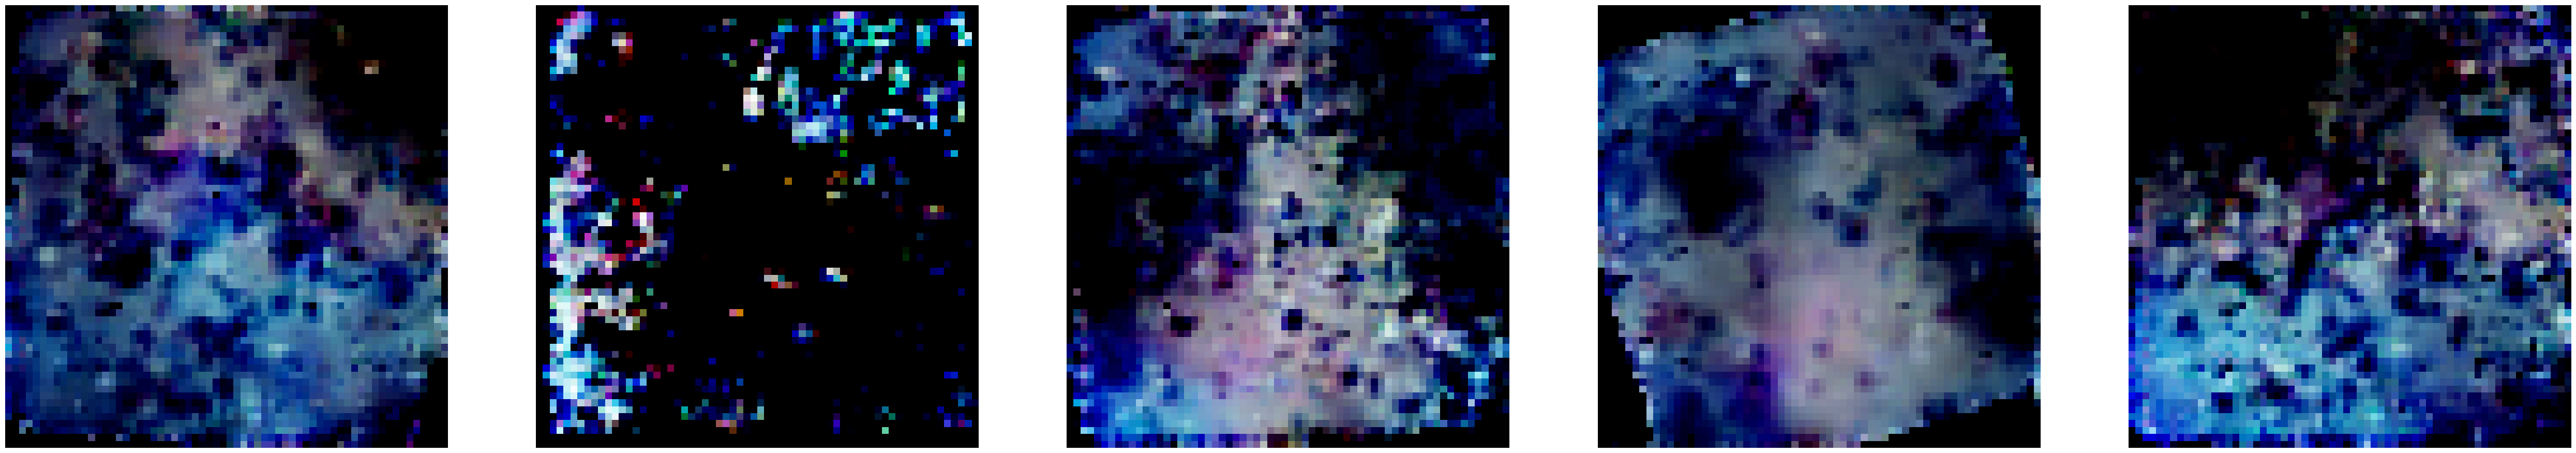

  0%|          | 0/41 [00:00<?, ?it/s]

[2602/2750][20/41] Loss_D: 0.3742 Loss_G: 3.9856 D(x): 0.9012 D(G(z)): 0.0204 / 0.0152
[2602/2750][40/41] Loss_D: 0.5252 Loss_G: 4.3824 D(x): 0.6920 D(G(z)): 0.0058 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[2603/2750][20/41] Loss_D: 0.4486 Loss_G: 3.3155 D(x): 0.7988 D(G(z)): 0.0300 / 0.0312
[2603/2750][40/41] Loss_D: 0.3752 Loss_G: 4.3714 D(x): 0.8742 D(G(z)): 0.0179 / 0.0097


  0%|          | 0/41 [00:00<?, ?it/s]

[2604/2750][20/41] Loss_D: 0.4059 Loss_G: 4.5572 D(x): 0.9377 D(G(z)): 0.0179 / 0.0088
[2604/2750][40/41] Loss_D: 0.5439 Loss_G: 3.2823 D(x): 0.6582 D(G(z)): 0.0121 / 0.0329


  0%|          | 0/41 [00:00<?, ?it/s]

[2605/2750][20/41] Loss_D: 0.4088 Loss_G: 4.0843 D(x): 0.8040 D(G(z)): 0.0087 / 0.0136
[2605/2750][40/41] Loss_D: 0.4236 Loss_G: 4.0386 D(x): 0.9548 D(G(z)): 0.0391 / 0.0150


  0%|          | 0/41 [00:00<?, ?it/s]

[2606/2750][20/41] Loss_D: 0.4098 Loss_G: 4.7873 D(x): 0.8685 D(G(z)): 0.0106 / 0.0066
[2606/2750][40/41] Loss_D: 0.4856 Loss_G: 3.6755 D(x): 0.7176 D(G(z)): 0.0154 / 0.0271


  0%|          | 0/41 [00:00<?, ?it/s]

[2607/2750][20/41] Loss_D: 0.4582 Loss_G: 4.2833 D(x): 0.9570 D(G(z)): 0.0644 / 0.0121
[2607/2750][40/41] Loss_D: 0.3980 Loss_G: 4.0331 D(x): 0.9134 D(G(z)): 0.0274 / 0.0178


  0%|          | 0/41 [00:00<?, ?it/s]

[2608/2750][20/41] Loss_D: 0.4534 Loss_G: 3.6179 D(x): 0.8776 D(G(z)): 0.0517 / 0.0211
[2608/2750][40/41] Loss_D: 0.4500 Loss_G: 4.5527 D(x): 0.7613 D(G(z)): 0.0048 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[2609/2750][20/41] Loss_D: 0.4003 Loss_G: 4.2637 D(x): 0.8482 D(G(z)): 0.0369 / 0.0149
[2609/2750][40/41] Loss_D: 0.4258 Loss_G: 4.2253 D(x): 0.9340 D(G(z)): 0.0480 / 0.0128


  0%|          | 0/41 [00:00<?, ?it/s]

[2610/2750][20/41] Loss_D: 0.4228 Loss_G: 3.6661 D(x): 0.8480 D(G(z)): 0.0503 / 0.0232
[2610/2750][40/41] Loss_D: 0.3729 Loss_G: 5.3680 D(x): 0.8482 D(G(z)): 0.0091 / 0.0042


  0%|          | 0/41 [00:00<?, ?it/s]

[2611/2750][20/41] Loss_D: 0.5460 Loss_G: 3.1472 D(x): 0.9554 D(G(z)): 0.1215 / 0.0393
[2611/2750][40/41] Loss_D: 0.3969 Loss_G: 5.5818 D(x): 0.9087 D(G(z)): 0.0112 / 0.0047


  0%|          | 0/41 [00:00<?, ?it/s]

[2612/2750][20/41] Loss_D: 0.3831 Loss_G: 4.8853 D(x): 0.9480 D(G(z)): 0.0111 / 0.0062
[2612/2750][40/41] Loss_D: 0.6436 Loss_G: 3.5693 D(x): 0.6145 D(G(z)): 0.0168 / 0.0240


  0%|          | 0/41 [00:00<?, ?it/s]

[2613/2750][20/41] Loss_D: 0.5503 Loss_G: 3.0861 D(x): 0.6687 D(G(z)): 0.0228 / 0.0378
[2613/2750][40/41] Loss_D: 0.3802 Loss_G: 4.5116 D(x): 0.8575 D(G(z)): 0.0156 / 0.0080


  0%|          | 0/41 [00:00<?, ?it/s]

[2614/2750][20/41] Loss_D: 0.4759 Loss_G: 3.8652 D(x): 0.7544 D(G(z)): 0.0271 / 0.0222
[2614/2750][40/41] Loss_D: 0.3616 Loss_G: 4.4749 D(x): 0.8963 D(G(z)): 0.0113 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[2615/2750][20/41] Loss_D: 0.4121 Loss_G: 3.4762 D(x): 0.8505 D(G(z)): 0.0271 / 0.0240
[2615/2750][40/41] Loss_D: 0.3731 Loss_G: 5.7481 D(x): 0.8913 D(G(z)): 0.0040 / 0.0025


  0%|          | 0/41 [00:00<?, ?it/s]

[2616/2750][20/41] Loss_D: 0.4681 Loss_G: 3.5829 D(x): 0.9686 D(G(z)): 0.0573 / 0.0268
[2616/2750][40/41] Loss_D: 0.6647 Loss_G: 3.8811 D(x): 0.9893 D(G(z)): 0.1246 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[2617/2750][20/41] Loss_D: 0.3769 Loss_G: 4.4470 D(x): 0.8698 D(G(z)): 0.0091 / 0.0095
[2617/2750][40/41] Loss_D: 0.5193 Loss_G: 3.1099 D(x): 0.9555 D(G(z)): 0.1077 / 0.0441


  0%|          | 0/41 [00:00<?, ?it/s]

[2618/2750][20/41] Loss_D: 0.5286 Loss_G: 3.3739 D(x): 0.6853 D(G(z)): 0.0152 / 0.0294
[2618/2750][40/41] Loss_D: 0.3706 Loss_G: 4.7547 D(x): 0.9399 D(G(z)): 0.0118 / 0.0068


  0%|          | 0/41 [00:00<?, ?it/s]

[2619/2750][20/41] Loss_D: 0.4681 Loss_G: 3.3035 D(x): 0.9564 D(G(z)): 0.0837 / 0.0294
[2619/2750][40/41] Loss_D: 0.5270 Loss_G: 3.0583 D(x): 0.9327 D(G(z)): 0.1342 / 0.0429


  0%|          | 0/41 [00:00<?, ?it/s]

[2620/2750][20/41] Loss_D: 0.4276 Loss_G: 4.4531 D(x): 0.8167 D(G(z)): 0.0145 / 0.0127
[2620/2750][40/41] Loss_D: 0.4810 Loss_G: 3.5388 D(x): 0.7394 D(G(z)): 0.0294 / 0.0269


  0%|          | 0/41 [00:00<?, ?it/s]

[2621/2750][20/41] Loss_D: 0.5073 Loss_G: 4.1435 D(x): 0.9668 D(G(z)): 0.0935 / 0.0136
[2621/2750][40/41] Loss_D: 0.4725 Loss_G: 3.7270 D(x): 0.9606 D(G(z)): 0.0664 / 0.0210


  0%|          | 0/41 [00:00<?, ?it/s]

[2622/2750][20/41] Loss_D: 0.5299 Loss_G: 3.6482 D(x): 0.9839 D(G(z)): 0.0407 / 0.0239
[2622/2750][40/41] Loss_D: 0.4311 Loss_G: 3.7665 D(x): 0.9205 D(G(z)): 0.0589 / 0.0183


  0%|          | 0/41 [00:00<?, ?it/s]

[2623/2750][20/41] Loss_D: 0.4162 Loss_G: 3.9213 D(x): 0.8888 D(G(z)): 0.0479 / 0.0181
[2623/2750][40/41] Loss_D: 0.4078 Loss_G: 3.4934 D(x): 0.8732 D(G(z)): 0.0452 / 0.0243


  0%|          | 0/41 [00:00<?, ?it/s]

[2624/2750][20/41] Loss_D: 0.4091 Loss_G: 5.0683 D(x): 0.8215 D(G(z)): 0.0037 / 0.0050
[2624/2750][40/41] Loss_D: 0.3819 Loss_G: 4.6286 D(x): 0.8782 D(G(z)): 0.0076 / 0.0077


  0%|          | 0/41 [00:00<?, ?it/s]

[2625/2750][20/41] Loss_D: 0.3837 Loss_G: 3.9212 D(x): 0.8983 D(G(z)): 0.0332 / 0.0180
[2625/2750][40/41] Loss_D: 0.3880 Loss_G: 4.4867 D(x): 0.9437 D(G(z)): 0.0111 / 0.0111


  0%|          | 0/41 [00:00<?, ?it/s]

[2626/2750][20/41] Loss_D: 0.4347 Loss_G: 3.4683 D(x): 0.9159 D(G(z)): 0.0635 / 0.0267
[2626/2750][40/41] Loss_D: 0.3994 Loss_G: 3.5831 D(x): 0.8379 D(G(z)): 0.0365 / 0.0243


  0%|          | 0/41 [00:00<?, ?it/s]

[2627/2750][20/41] Loss_D: 0.3722 Loss_G: 4.6774 D(x): 0.8645 D(G(z)): 0.0096 / 0.0089
[2627/2750][40/41] Loss_D: 0.4908 Loss_G: 3.6335 D(x): 0.9586 D(G(z)): 0.0891 / 0.0252


  0%|          | 0/41 [00:00<?, ?it/s]

[2628/2750][20/41] Loss_D: 0.4329 Loss_G: 4.6773 D(x): 0.7359 D(G(z)): 0.0055 / 0.0074
[2628/2750][40/41] Loss_D: 0.3875 Loss_G: 3.7840 D(x): 0.8378 D(G(z)): 0.0194 / 0.0191


  0%|          | 0/41 [00:00<?, ?it/s]

[2629/2750][20/41] Loss_D: 0.4248 Loss_G: 3.8069 D(x): 0.8430 D(G(z)): 0.0215 / 0.0198
[2629/2750][40/41] Loss_D: 0.3961 Loss_G: 4.7776 D(x): 0.8719 D(G(z)): 0.0102 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[2630/2750][20/41] Loss_D: 0.4671 Loss_G: 2.4635 D(x): 0.9542 D(G(z)): 0.0898 / 0.0939
[2630/2750][40/41] Loss_D: 0.3816 Loss_G: 4.2248 D(x): 0.8983 D(G(z)): 0.0112 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[2631/2750][20/41] Loss_D: 0.3997 Loss_G: 4.9260 D(x): 0.9310 D(G(z)): 0.0111 / 0.0056
[2631/2750][40/41] Loss_D: 0.5857 Loss_G: 4.3230 D(x): 0.9894 D(G(z)): 0.0695 / 0.0098


  0%|          | 0/41 [00:00<?, ?it/s]

[2632/2750][20/41] Loss_D: 0.4489 Loss_G: 3.5705 D(x): 0.7931 D(G(z)): 0.0232 / 0.0246
[2632/2750][40/41] Loss_D: 0.3862 Loss_G: 3.8318 D(x): 0.8744 D(G(z)): 0.0278 / 0.0199


  0%|          | 0/41 [00:00<?, ?it/s]

[2633/2750][20/41] Loss_D: 0.4511 Loss_G: 4.2816 D(x): 0.9601 D(G(z)): 0.0360 / 0.0125
[2633/2750][40/41] Loss_D: 0.4674 Loss_G: 3.2693 D(x): 0.8794 D(G(z)): 0.0918 / 0.0307


  0%|          | 0/41 [00:00<?, ?it/s]

[2634/2750][20/41] Loss_D: 0.4357 Loss_G: 2.8180 D(x): 0.9375 D(G(z)): 0.0719 / 0.0538
[2634/2750][40/41] Loss_D: 0.5116 Loss_G: 2.9849 D(x): 0.8460 D(G(z)): 0.1159 / 0.0436


  0%|          | 0/41 [00:00<?, ?it/s]

[2635/2750][20/41] Loss_D: 0.3873 Loss_G: 4.1086 D(x): 0.9093 D(G(z)): 0.0238 / 0.0145
[2635/2750][40/41] Loss_D: 0.3803 Loss_G: 5.8184 D(x): 0.9362 D(G(z)): 0.0057 / 0.0027


  0%|          | 0/41 [00:00<?, ?it/s]

[2636/2750][20/41] Loss_D: 0.4461 Loss_G: 3.4930 D(x): 0.9303 D(G(z)): 0.0496 / 0.0273
[2636/2750][40/41] Loss_D: 0.3707 Loss_G: 5.0675 D(x): 0.9114 D(G(z)): 0.0060 / 0.0041


  0%|          | 0/41 [00:00<?, ?it/s]

[2637/2750][20/41] Loss_D: 0.4415 Loss_G: 4.3410 D(x): 0.9715 D(G(z)): 0.0318 / 0.0124
[2637/2750][40/41] Loss_D: 0.4594 Loss_G: 3.6001 D(x): 0.8761 D(G(z)): 0.0699 / 0.0242


  0%|          | 0/41 [00:00<?, ?it/s]

[2638/2750][20/41] Loss_D: 0.4363 Loss_G: 4.3401 D(x): 0.9628 D(G(z)): 0.0191 / 0.0106
[2638/2750][40/41] Loss_D: 0.4383 Loss_G: 3.8686 D(x): 0.8844 D(G(z)): 0.0600 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[2639/2750][20/41] Loss_D: 0.4097 Loss_G: 4.7184 D(x): 0.9510 D(G(z)): 0.0131 / 0.0080
[2639/2750][40/41] Loss_D: 0.4245 Loss_G: 3.6078 D(x): 0.9171 D(G(z)): 0.0518 / 0.0247


  0%|          | 0/41 [00:00<?, ?it/s]

[2640/2750][20/41] Loss_D: 0.3756 Loss_G: 5.6507 D(x): 0.8311 D(G(z)): 0.0048 / 0.0035
[2640/2750][40/41] Loss_D: 0.4247 Loss_G: 4.1057 D(x): 0.8022 D(G(z)): 0.0266 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[2641/2750][20/41] Loss_D: 0.4019 Loss_G: 3.5167 D(x): 0.8364 D(G(z)): 0.0345 / 0.0245
[2641/2750][40/41] Loss_D: 0.3868 Loss_G: 4.0124 D(x): 0.8969 D(G(z)): 0.0234 / 0.0158


  0%|          | 0/41 [00:00<?, ?it/s]

[2642/2750][20/41] Loss_D: 0.3977 Loss_G: 3.3523 D(x): 0.8566 D(G(z)): 0.0427 / 0.0324
[2642/2750][40/41] Loss_D: 1.3342 Loss_G: 6.0502 D(x): 0.9866 D(G(z)): 0.4829 / 0.0023


  0%|          | 0/41 [00:00<?, ?it/s]

[2643/2750][20/41] Loss_D: 0.4936 Loss_G: 4.1366 D(x): 0.7155 D(G(z)): 0.0100 / 0.0149
[2643/2750][40/41] Loss_D: 0.3806 Loss_G: 4.4911 D(x): 0.9001 D(G(z)): 0.0182 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[2644/2750][20/41] Loss_D: 0.3952 Loss_G: 4.1191 D(x): 0.9421 D(G(z)): 0.0250 / 0.0139
[2644/2750][40/41] Loss_D: 0.5372 Loss_G: 3.6317 D(x): 0.6579 D(G(z)): 0.0116 / 0.0230


  0%|          | 0/41 [00:00<?, ?it/s]

[2645/2750][20/41] Loss_D: 0.3829 Loss_G: 4.6840 D(x): 0.8901 D(G(z)): 0.0113 / 0.0077
[2645/2750][40/41] Loss_D: 0.4450 Loss_G: 4.2722 D(x): 0.8222 D(G(z)): 0.0245 / 0.0110


  0%|          | 0/41 [00:00<?, ?it/s]

[2646/2750][20/41] Loss_D: 0.3761 Loss_G: 4.2567 D(x): 0.8985 D(G(z)): 0.0310 / 0.0126
[2646/2750][40/41] Loss_D: 0.3741 Loss_G: 4.4421 D(x): 0.9339 D(G(z)): 0.0154 / 0.0097


  0%|          | 0/41 [00:00<?, ?it/s]

[2647/2750][20/41] Loss_D: 0.4408 Loss_G: 4.8171 D(x): 0.9323 D(G(z)): 0.0471 / 0.0080
[2647/2750][40/41] Loss_D: 0.4094 Loss_G: 6.7361 D(x): 0.9560 D(G(z)): 0.0041 / 0.0013


  0%|          | 0/41 [00:00<?, ?it/s]

[2648/2750][20/41] Loss_D: 0.6913 Loss_G: 3.2932 D(x): 0.6142 D(G(z)): 0.0111 / 0.0566
[2648/2750][40/41] Loss_D: 0.5726 Loss_G: 4.0458 D(x): 0.9342 D(G(z)): 0.1655 / 0.0142


  0%|          | 0/41 [00:00<?, ?it/s]

[2649/2750][20/41] Loss_D: 0.3780 Loss_G: 4.8424 D(x): 0.8850 D(G(z)): 0.0137 / 0.0068
[2649/2750][40/41] Loss_D: 0.4731 Loss_G: 4.2282 D(x): 0.9620 D(G(z)): 0.0250 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[2650/2750][20/41] Loss_D: 0.4617 Loss_G: 4.5042 D(x): 0.7567 D(G(z)): 0.0055 / 0.0090
[2650/2750][40/41] Loss_D: 0.4006 Loss_G: 4.2769 D(x): 0.9431 D(G(z)): 0.0234 / 0.0099


  0%|          | 0/41 [00:00<?, ?it/s]

[2651/2750][20/41] Loss_D: 0.6989 Loss_G: 4.1021 D(x): 0.5647 D(G(z)): 0.0022 / 0.0156
[2651/2750][40/41] Loss_D: 0.4239 Loss_G: 4.5905 D(x): 0.9582 D(G(z)): 0.0143 / 0.0092


  0%|          | 0/41 [00:00<?, ?it/s]

[2652/2750][20/41] Loss_D: 0.3907 Loss_G: 5.0493 D(x): 0.8323 D(G(z)): 0.0061 / 0.0062
[2652/2750][40/41] Loss_D: 0.4251 Loss_G: 4.0690 D(x): 0.8111 D(G(z)): 0.0189 / 0.0153


  0%|          | 0/41 [00:00<?, ?it/s]

[2653/2750][20/41] Loss_D: 0.5868 Loss_G: 4.7144 D(x): 0.8505 D(G(z)): 0.1752 / 0.0073
[2653/2750][40/41] Loss_D: 0.4214 Loss_G: 4.4925 D(x): 0.9468 D(G(z)): 0.0179 / 0.0108


  0%|          | 0/41 [00:00<?, ?it/s]

[2654/2750][20/41] Loss_D: 0.5184 Loss_G: 2.5957 D(x): 0.9544 D(G(z)): 0.1018 / 0.0668
[2654/2750][40/41] Loss_D: 0.4177 Loss_G: 3.3488 D(x): 0.8704 D(G(z)): 0.0651 / 0.0332


  0%|          | 0/41 [00:00<?, ?it/s]

[2655/2750][20/41] Loss_D: 0.4607 Loss_G: 3.1288 D(x): 0.8277 D(G(z)): 0.0425 / 0.0434
[2655/2750][40/41] Loss_D: 0.4000 Loss_G: 4.7379 D(x): 0.9369 D(G(z)): 0.0268 / 0.0072


  0%|          | 0/41 [00:00<?, ?it/s]

[2656/2750][20/41] Loss_D: 0.5111 Loss_G: 3.9200 D(x): 0.9669 D(G(z)): 0.0875 / 0.0177
[2656/2750][40/41] Loss_D: 0.4450 Loss_G: 3.8591 D(x): 0.9235 D(G(z)): 0.0401 / 0.0235


  0%|          | 0/41 [00:00<?, ?it/s]

[2657/2750][20/41] Loss_D: 0.3920 Loss_G: 4.6477 D(x): 0.8749 D(G(z)): 0.0187 / 0.0091
[2657/2750][40/41] Loss_D: 0.3936 Loss_G: 3.9573 D(x): 0.9186 D(G(z)): 0.0394 / 0.0158


  0%|          | 0/41 [00:00<?, ?it/s]

[2658/2750][20/41] Loss_D: 0.4922 Loss_G: 3.9421 D(x): 0.9812 D(G(z)): 0.0547 / 0.0169
[2658/2750][40/41] Loss_D: 0.3900 Loss_G: 4.3303 D(x): 0.8155 D(G(z)): 0.0125 / 0.0111


  0%|          | 0/41 [00:00<?, ?it/s]

[2659/2750][20/41] Loss_D: 0.4170 Loss_G: 3.4421 D(x): 0.8895 D(G(z)): 0.0663 / 0.0267
[2659/2750][40/41] Loss_D: 0.3903 Loss_G: 3.9041 D(x): 0.9152 D(G(z)): 0.0196 / 0.0213


  0%|          | 0/41 [00:00<?, ?it/s]

[2660/2750][20/41] Loss_D: 0.4559 Loss_G: 3.4481 D(x): 0.8340 D(G(z)): 0.0370 / 0.0324
[2660/2750][40/41] Loss_D: 0.3809 Loss_G: 3.9507 D(x): 0.8668 D(G(z)): 0.0155 / 0.0147


  0%|          | 0/41 [00:00<?, ?it/s]

[2661/2750][20/41] Loss_D: 0.4634 Loss_G: 3.9763 D(x): 0.7556 D(G(z)): 0.0116 / 0.0157
[2661/2750][40/41] Loss_D: 0.5162 Loss_G: 4.3822 D(x): 0.6812 D(G(z)): 0.0053 / 0.0121


  0%|          | 0/41 [00:00<?, ?it/s]

[2662/2750][20/41] Loss_D: 0.6455 Loss_G: 3.7700 D(x): 0.6124 D(G(z)): 0.0130 / 0.0265
[2662/2750][40/41] Loss_D: 0.4168 Loss_G: 3.5687 D(x): 0.8499 D(G(z)): 0.0241 / 0.0268


  0%|          | 0/41 [00:00<?, ?it/s]

[2663/2750][20/41] Loss_D: 0.3993 Loss_G: 3.0693 D(x): 0.9090 D(G(z)): 0.0410 / 0.0501
[2663/2750][40/41] Loss_D: 0.4475 Loss_G: 4.4446 D(x): 0.9735 D(G(z)): 0.0218 / 0.0088


  0%|          | 0/41 [00:00<?, ?it/s]

[2664/2750][20/41] Loss_D: 0.3876 Loss_G: 4.6514 D(x): 0.9229 D(G(z)): 0.0191 / 0.0084
[2664/2750][40/41] Loss_D: 0.3939 Loss_G: 4.6913 D(x): 0.9262 D(G(z)): 0.0197 / 0.0082


  0%|          | 0/41 [00:00<?, ?it/s]

[2665/2750][20/41] Loss_D: 0.4429 Loss_G: 4.2119 D(x): 0.9651 D(G(z)): 0.0234 / 0.0133
[2665/2750][40/41] Loss_D: 0.4109 Loss_G: 4.6868 D(x): 0.9622 D(G(z)): 0.0077 / 0.0093


  0%|          | 0/41 [00:00<?, ?it/s]

[2666/2750][20/41] Loss_D: 0.4123 Loss_G: 3.5236 D(x): 0.8165 D(G(z)): 0.0251 / 0.0249
[2666/2750][40/41] Loss_D: 0.5795 Loss_G: 4.5562 D(x): 0.6953 D(G(z)): 0.0051 / 0.0079


  0%|          | 0/41 [00:00<?, ?it/s]

[2667/2750][20/41] Loss_D: 0.3905 Loss_G: 4.9202 D(x): 0.9369 D(G(z)): 0.0153 / 0.0062
[2667/2750][40/41] Loss_D: 0.4682 Loss_G: 3.5380 D(x): 0.9188 D(G(z)): 0.0909 / 0.0223


  0%|          | 0/41 [00:00<?, ?it/s]

[2668/2750][20/41] Loss_D: 0.4298 Loss_G: 3.6204 D(x): 0.9059 D(G(z)): 0.0636 / 0.0298
[2668/2750][40/41] Loss_D: 0.6195 Loss_G: 2.3516 D(x): 0.6428 D(G(z)): 0.0885 / 0.0867


  0%|          | 0/41 [00:00<?, ?it/s]

[2669/2750][20/41] Loss_D: 0.3703 Loss_G: 4.5406 D(x): 0.9232 D(G(z)): 0.0137 / 0.0097
[2669/2750][40/41] Loss_D: 0.4320 Loss_G: 4.5840 D(x): 0.9708 D(G(z)): 0.0164 / 0.0087


  0%|          | 0/41 [00:00<?, ?it/s]

[2670/2750][20/41] Loss_D: 0.4209 Loss_G: 4.1111 D(x): 0.9497 D(G(z)): 0.0270 / 0.0135
[2670/2750][40/41] Loss_D: 0.4545 Loss_G: 3.3850 D(x): 0.8148 D(G(z)): 0.0580 / 0.0271


  0%|          | 0/41 [00:00<?, ?it/s]

[2671/2750][20/41] Loss_D: 0.4051 Loss_G: 4.0773 D(x): 0.7772 D(G(z)): 0.0072 / 0.0126
[2671/2750][40/41] Loss_D: 0.8835 Loss_G: 2.4659 D(x): 0.5314 D(G(z)): 0.0589 / 0.0831


  0%|          | 0/41 [00:00<?, ?it/s]

[2672/2750][20/41] Loss_D: 0.3831 Loss_G: 5.3926 D(x): 0.8415 D(G(z)): 0.0069 / 0.0040
[2672/2750][40/41] Loss_D: 0.4702 Loss_G: 3.9058 D(x): 0.8132 D(G(z)): 0.0305 / 0.0197


  0%|          | 0/41 [00:00<?, ?it/s]

[2673/2750][20/41] Loss_D: 0.4288 Loss_G: 4.6403 D(x): 0.7839 D(G(z)): 0.0065 / 0.0074
[2673/2750][40/41] Loss_D: 0.4101 Loss_G: 4.4472 D(x): 0.9570 D(G(z)): 0.0207 / 0.0096


  0%|          | 0/41 [00:00<?, ?it/s]

[2674/2750][20/41] Loss_D: 0.5450 Loss_G: 3.6458 D(x): 0.7303 D(G(z)): 0.0362 / 0.0246
[2674/2750][40/41] Loss_D: 0.3979 Loss_G: 3.5110 D(x): 0.8428 D(G(z)): 0.0288 / 0.0263


  0%|          | 0/41 [00:00<?, ?it/s]

[2675/2750][20/41] Loss_D: 0.4166 Loss_G: 4.2470 D(x): 0.9496 D(G(z)): 0.0182 / 0.0126
[2675/2750][40/41] Loss_D: 0.5317 Loss_G: 3.1880 D(x): 0.8606 D(G(z)): 0.1472 / 0.0383


  0%|          | 0/41 [00:00<?, ?it/s]

[2676/2750][20/41] Loss_D: 0.4233 Loss_G: 4.2795 D(x): 0.9544 D(G(z)): 0.0420 / 0.0128
[2676/2750][40/41] Loss_D: 0.4550 Loss_G: 3.8949 D(x): 0.9572 D(G(z)): 0.0595 / 0.0233


  0%|          | 0/41 [00:00<?, ?it/s]

[2677/2750][20/41] Loss_D: 0.4001 Loss_G: 5.2889 D(x): 0.9144 D(G(z)): 0.0210 / 0.0041
[2677/2750][40/41] Loss_D: 0.6859 Loss_G: 3.0843 D(x): 0.5764 D(G(z)): 0.0111 / 0.0419


  0%|          | 0/41 [00:00<?, ?it/s]

[2678/2750][20/41] Loss_D: 0.4737 Loss_G: 3.8177 D(x): 0.9296 D(G(z)): 0.0344 / 0.0179
[2678/2750][40/41] Loss_D: 0.3787 Loss_G: 4.5164 D(x): 0.8584 D(G(z)): 0.0181 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[2679/2750][20/41] Loss_D: 0.4684 Loss_G: 4.5574 D(x): 0.9647 D(G(z)): 0.0227 / 0.0081
[2679/2750][40/41] Loss_D: 0.5746 Loss_G: 3.7051 D(x): 0.9876 D(G(z)): 0.0836 / 0.0219


  0%|          | 0/41 [00:00<?, ?it/s]

[2680/2750][20/41] Loss_D: 0.3931 Loss_G: 4.8189 D(x): 0.9212 D(G(z)): 0.0233 / 0.0061
[2680/2750][40/41] Loss_D: 0.4914 Loss_G: 4.2822 D(x): 0.9653 D(G(z)): 0.0714 / 0.0140


  0%|          | 0/41 [00:00<?, ?it/s]

[2681/2750][20/41] Loss_D: 0.4102 Loss_G: 4.1342 D(x): 0.8965 D(G(z)): 0.0233 / 0.0133
[2681/2750][40/41] Loss_D: 0.3981 Loss_G: 5.3211 D(x): 0.9378 D(G(z)): 0.0096 / 0.0051


  0%|          | 0/41 [00:00<?, ?it/s]

[2682/2750][20/41] Loss_D: 0.4384 Loss_G: 4.0387 D(x): 0.8050 D(G(z)): 0.0110 / 0.0166
[2682/2750][40/41] Loss_D: 0.4138 Loss_G: 3.8589 D(x): 0.9363 D(G(z)): 0.0381 / 0.0192


  0%|          | 0/41 [00:00<?, ?it/s]

[2683/2750][20/41] Loss_D: 0.5811 Loss_G: 4.2230 D(x): 0.9837 D(G(z)): 0.1114 / 0.0126
[2683/2750][40/41] Loss_D: 0.5276 Loss_G: 3.6126 D(x): 0.7105 D(G(z)): 0.0120 / 0.0261


  0%|          | 0/41 [00:00<?, ?it/s]

[2684/2750][20/41] Loss_D: 0.4295 Loss_G: 3.4958 D(x): 0.9289 D(G(z)): 0.0691 / 0.0270
[2684/2750][40/41] Loss_D: 0.3814 Loss_G: 4.2988 D(x): 0.9318 D(G(z)): 0.0226 / 0.0111


  0%|          | 0/41 [00:00<?, ?it/s]

[2685/2750][20/41] Loss_D: 0.4655 Loss_G: 3.5960 D(x): 0.7555 D(G(z)): 0.0237 / 0.0236
[2685/2750][40/41] Loss_D: 0.4881 Loss_G: 3.5805 D(x): 0.7337 D(G(z)): 0.0176 / 0.0283


  0%|          | 0/41 [00:00<?, ?it/s]

[2686/2750][20/41] Loss_D: 0.4876 Loss_G: 5.0624 D(x): 0.7005 D(G(z)): 0.0023 / 0.0054
[2686/2750][40/41] Loss_D: 0.4919 Loss_G: 4.5584 D(x): 0.9402 D(G(z)): 0.0956 / 0.0089


  0%|          | 0/41 [00:00<?, ?it/s]

[2687/2750][20/41] Loss_D: 0.3866 Loss_G: 3.7275 D(x): 0.9062 D(G(z)): 0.0356 / 0.0273
[2687/2750][40/41] Loss_D: 0.7958 Loss_G: 3.3242 D(x): 0.9813 D(G(z)): 0.2634 / 0.0322


  0%|          | 0/41 [00:00<?, ?it/s]

[2688/2750][20/41] Loss_D: 0.4390 Loss_G: 3.8643 D(x): 0.9090 D(G(z)): 0.0491 / 0.0187
[2688/2750][40/41] Loss_D: 0.4887 Loss_G: 3.8956 D(x): 0.9808 D(G(z)): 0.0478 / 0.0186


  0%|          | 0/41 [00:00<?, ?it/s]

[2689/2750][20/41] Loss_D: 0.3711 Loss_G: 4.0285 D(x): 0.9185 D(G(z)): 0.0269 / 0.0163
[2689/2750][40/41] Loss_D: 0.5364 Loss_G: 4.1087 D(x): 0.7103 D(G(z)): 0.0059 / 0.0126


  0%|          | 0/41 [00:00<?, ?it/s]

[2690/2750][20/41] Loss_D: 0.3754 Loss_G: 4.4451 D(x): 0.8368 D(G(z)): 0.0095 / 0.0101
[2690/2750][40/41] Loss_D: 0.4243 Loss_G: 3.5167 D(x): 0.9067 D(G(z)): 0.0495 / 0.0297


  0%|          | 0/41 [00:00<?, ?it/s]

[2691/2750][20/41] Loss_D: 0.5429 Loss_G: 3.0027 D(x): 0.7643 D(G(z)): 0.0691 / 0.0476
[2691/2750][40/41] Loss_D: 0.4161 Loss_G: 4.1567 D(x): 0.9357 D(G(z)): 0.0333 / 0.0124


  0%|          | 0/41 [00:00<?, ?it/s]

[2692/2750][20/41] Loss_D: 0.3793 Loss_G: 5.2059 D(x): 0.8457 D(G(z)): 0.0042 / 0.0040
[2692/2750][40/41] Loss_D: 0.4544 Loss_G: 3.4416 D(x): 0.8855 D(G(z)): 0.0865 / 0.0320


  0%|          | 0/41 [00:00<?, ?it/s]

[2693/2750][20/41] Loss_D: 0.3872 Loss_G: 4.5494 D(x): 0.9480 D(G(z)): 0.0159 / 0.0085
[2693/2750][40/41] Loss_D: 0.4160 Loss_G: 4.6941 D(x): 0.9625 D(G(z)): 0.0224 / 0.0075


  0%|          | 0/41 [00:00<?, ?it/s]

[2694/2750][20/41] Loss_D: 0.4184 Loss_G: 6.8881 D(x): 0.7617 D(G(z)): 0.0014 / 0.0008
[2694/2750][40/41] Loss_D: 0.4721 Loss_G: 3.6704 D(x): 0.7470 D(G(z)): 0.0142 / 0.0253


  0%|          | 0/41 [00:00<?, ?it/s]

[2695/2750][20/41] Loss_D: 0.5062 Loss_G: 3.2287 D(x): 0.6997 D(G(z)): 0.0206 / 0.0367
[2695/2750][40/41] Loss_D: 0.4512 Loss_G: 3.2545 D(x): 0.8603 D(G(z)): 0.0645 / 0.0340


  0%|          | 0/41 [00:00<?, ?it/s]

[2696/2750][20/41] Loss_D: 0.5824 Loss_G: 3.1581 D(x): 0.9762 D(G(z)): 0.1275 / 0.0428
[2696/2750][40/41] Loss_D: 0.3815 Loss_G: 4.0717 D(x): 0.8791 D(G(z)): 0.0260 / 0.0143


  0%|          | 0/41 [00:00<?, ?it/s]

[2697/2750][20/41] Loss_D: 0.3909 Loss_G: 3.7990 D(x): 0.9398 D(G(z)): 0.0317 / 0.0168
[2697/2750][40/41] Loss_D: 0.4954 Loss_G: 5.1569 D(x): 0.7093 D(G(z)): 0.0026 / 0.0045


  0%|          | 0/41 [00:00<?, ?it/s]

[2698/2750][20/41] Loss_D: 0.3809 Loss_G: 4.6972 D(x): 0.9357 D(G(z)): 0.0137 / 0.0078
[2698/2750][40/41] Loss_D: 0.5999 Loss_G: 2.6302 D(x): 0.6524 D(G(z)): 0.0376 / 0.0666


  0%|          | 0/41 [00:00<?, ?it/s]

[2699/2750][20/41] Loss_D: 0.4106 Loss_G: 4.1756 D(x): 0.8305 D(G(z)): 0.0119 / 0.0132
[2699/2750][40/41] Loss_D: 0.3722 Loss_G: 5.1810 D(x): 0.8689 D(G(z)): 0.0048 / 0.0054


  0%|          | 0/41 [00:00<?, ?it/s]

[2700/2750][20/41] Loss_D: 0.7626 Loss_G: 4.5352 D(x): 0.9732 D(G(z)): 0.2477 / 0.0112
[2700/2750][40/41] Loss_D: 0.5433 Loss_G: 3.4396 D(x): 0.9152 D(G(z)): 0.1423 / 0.0272


  0%|          | 0/41 [00:00<?, ?it/s]

[2701/2750][20/41] Loss_D: 0.4327 Loss_G: 2.8716 D(x): 0.8521 D(G(z)): 0.0556 / 0.0545
[2701/2750][40/41] Loss_D: 0.5791 Loss_G: 2.8983 D(x): 0.6605 D(G(z)): 0.0341 / 0.0605


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.98332703].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.974467].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9996463..0.6873974].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9731896].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9940296].


Checkpoint saved to C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_2701.pth


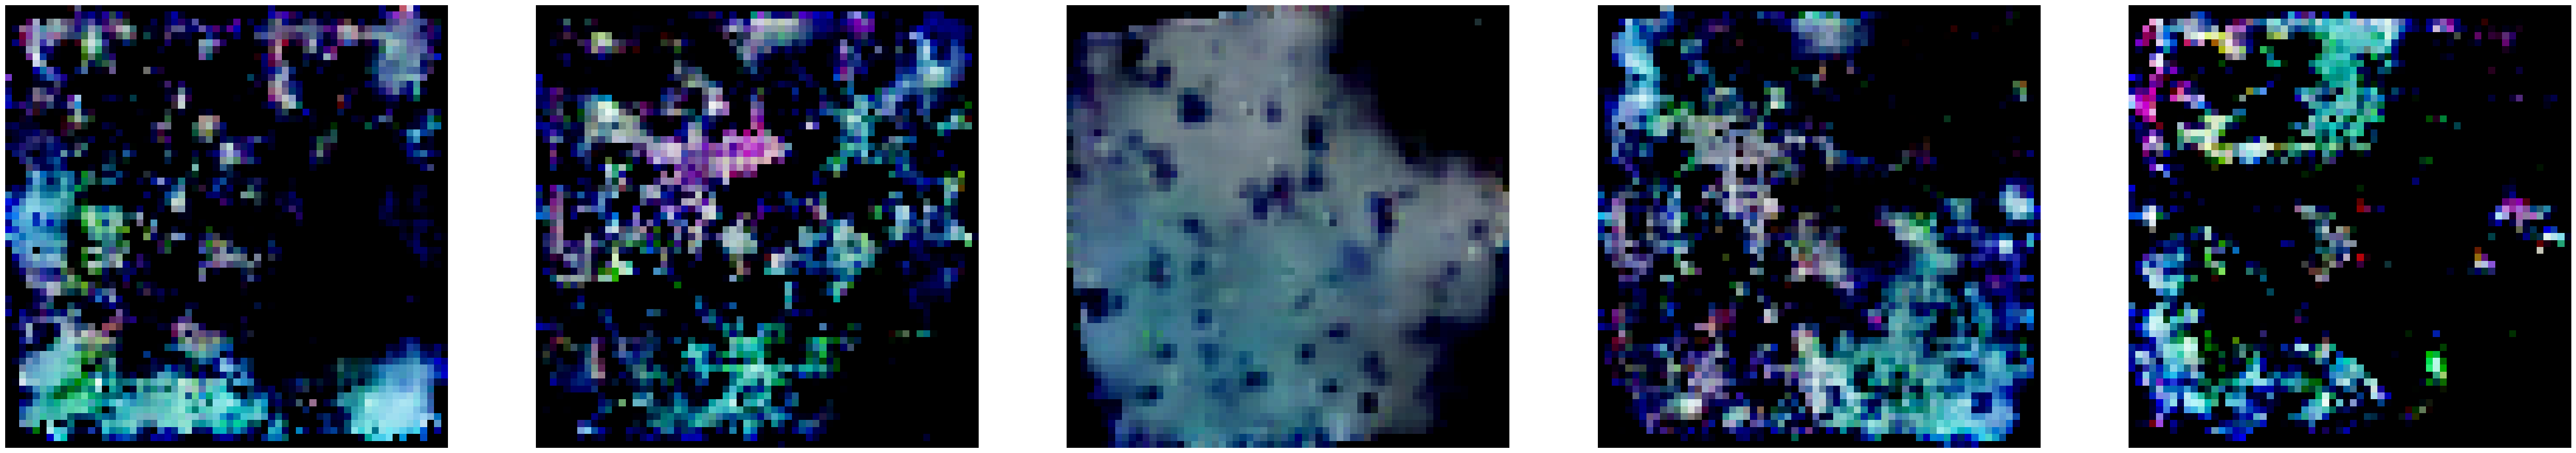

  0%|          | 0/41 [00:00<?, ?it/s]

[2702/2750][20/41] Loss_D: 0.6565 Loss_G: 2.4734 D(x): 0.9577 D(G(z)): 0.2035 / 0.0822
[2702/2750][40/41] Loss_D: 0.4513 Loss_G: 3.4761 D(x): 0.8604 D(G(z)): 0.0617 / 0.0306


  0%|          | 0/41 [00:00<?, ?it/s]

[2703/2750][20/41] Loss_D: 0.4892 Loss_G: 4.7085 D(x): 0.7233 D(G(z)): 0.0056 / 0.0097
[2703/2750][40/41] Loss_D: 0.3839 Loss_G: 4.2205 D(x): 0.8409 D(G(z)): 0.0128 / 0.0125


  0%|          | 0/41 [00:00<?, ?it/s]

[2704/2750][20/41] Loss_D: 0.4708 Loss_G: 3.7204 D(x): 0.9718 D(G(z)): 0.0664 / 0.0208
[2704/2750][40/41] Loss_D: 0.4315 Loss_G: 3.8985 D(x): 0.8150 D(G(z)): 0.0232 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[2705/2750][20/41] Loss_D: 0.3906 Loss_G: 4.3951 D(x): 0.8617 D(G(z)): 0.0154 / 0.0106
[2705/2750][40/41] Loss_D: 0.5830 Loss_G: 3.3138 D(x): 0.9835 D(G(z)): 0.1004 / 0.0351


  0%|          | 0/41 [00:00<?, ?it/s]

[2706/2750][20/41] Loss_D: 0.4189 Loss_G: 3.6323 D(x): 0.9173 D(G(z)): 0.0450 / 0.0226
[2706/2750][40/41] Loss_D: 0.4693 Loss_G: 3.7712 D(x): 0.7713 D(G(z)): 0.0208 / 0.0204


  0%|          | 0/41 [00:00<?, ?it/s]

[2707/2750][20/41] Loss_D: 0.4350 Loss_G: 4.4275 D(x): 0.8128 D(G(z)): 0.0113 / 0.0131
[2707/2750][40/41] Loss_D: 0.4100 Loss_G: 4.9113 D(x): 0.9259 D(G(z)): 0.0348 / 0.0078


  0%|          | 0/41 [00:00<?, ?it/s]

[2708/2750][20/41] Loss_D: 0.3917 Loss_G: 4.2993 D(x): 0.8918 D(G(z)): 0.0120 / 0.0106
[2708/2750][40/41] Loss_D: 0.3920 Loss_G: 5.5801 D(x): 0.9095 D(G(z)): 0.0048 / 0.0024


  0%|          | 0/41 [00:00<?, ?it/s]

[2709/2750][20/41] Loss_D: 0.4040 Loss_G: 4.3541 D(x): 0.8676 D(G(z)): 0.0146 / 0.0114
[2709/2750][40/41] Loss_D: 0.4061 Loss_G: 3.8977 D(x): 0.8897 D(G(z)): 0.0419 / 0.0174


  0%|          | 0/41 [00:00<?, ?it/s]

[2710/2750][20/41] Loss_D: 0.3899 Loss_G: 3.4729 D(x): 0.8670 D(G(z)): 0.0257 / 0.0311
[2710/2750][40/41] Loss_D: 0.3979 Loss_G: 3.1785 D(x): 0.8603 D(G(z)): 0.0348 / 0.0390


  0%|          | 0/41 [00:00<?, ?it/s]

[2711/2750][20/41] Loss_D: 0.3659 Loss_G: 5.6067 D(x): 0.8944 D(G(z)): 0.0045 / 0.0034
[2711/2750][40/41] Loss_D: 0.5741 Loss_G: 3.0636 D(x): 0.9642 D(G(z)): 0.1488 / 0.0496


  0%|          | 0/41 [00:00<?, ?it/s]

[2712/2750][20/41] Loss_D: 0.3751 Loss_G: 4.2820 D(x): 0.8776 D(G(z)): 0.0129 / 0.0119
[2712/2750][40/41] Loss_D: 0.3774 Loss_G: 3.7722 D(x): 0.8731 D(G(z)): 0.0162 / 0.0221


  0%|          | 0/41 [00:00<?, ?it/s]

[2713/2750][20/41] Loss_D: 0.3910 Loss_G: 5.0883 D(x): 0.9488 D(G(z)): 0.0108 / 0.0064
[2713/2750][40/41] Loss_D: 0.4038 Loss_G: 4.2696 D(x): 0.8429 D(G(z)): 0.0166 / 0.0129


  0%|          | 0/41 [00:00<?, ?it/s]

[2714/2750][20/41] Loss_D: 0.4092 Loss_G: 5.1954 D(x): 0.8516 D(G(z)): 0.0143 / 0.0060
[2714/2750][40/41] Loss_D: 0.5026 Loss_G: 3.8450 D(x): 0.9439 D(G(z)): 0.0938 / 0.0188


  0%|          | 0/41 [00:00<?, ?it/s]

[2715/2750][20/41] Loss_D: 0.4139 Loss_G: 4.2287 D(x): 0.8381 D(G(z)): 0.0177 / 0.0123
[2715/2750][40/41] Loss_D: 0.4648 Loss_G: 3.8239 D(x): 0.9542 D(G(z)): 0.0543 / 0.0172


  0%|          | 0/41 [00:00<?, ?it/s]

[2716/2750][20/41] Loss_D: 0.3713 Loss_G: 4.2076 D(x): 0.8980 D(G(z)): 0.0171 / 0.0123
[2716/2750][40/41] Loss_D: 1.2498 Loss_G: 3.2814 D(x): 0.3268 D(G(z)): 0.0150 / 0.0441


  0%|          | 0/41 [00:00<?, ?it/s]

[2717/2750][20/41] Loss_D: 0.4151 Loss_G: 4.4722 D(x): 0.9479 D(G(z)): 0.0207 / 0.0109
[2717/2750][40/41] Loss_D: 0.4650 Loss_G: 4.1662 D(x): 0.7612 D(G(z)): 0.0332 / 0.0157


  0%|          | 0/41 [00:00<?, ?it/s]

[2718/2750][20/41] Loss_D: 0.4271 Loss_G: 3.7001 D(x): 0.9197 D(G(z)): 0.0626 / 0.0205
[2718/2750][40/41] Loss_D: 0.4338 Loss_G: 3.2989 D(x): 0.7880 D(G(z)): 0.0205 / 0.0327


  0%|          | 0/41 [00:00<?, ?it/s]

[2719/2750][20/41] Loss_D: 0.3802 Loss_G: 4.0390 D(x): 0.9219 D(G(z)): 0.0177 / 0.0156
[2719/2750][40/41] Loss_D: 0.4019 Loss_G: 3.8144 D(x): 0.8180 D(G(z)): 0.0182 / 0.0199


  0%|          | 0/41 [00:00<?, ?it/s]

[2720/2750][20/41] Loss_D: 0.4226 Loss_G: 3.7932 D(x): 0.9229 D(G(z)): 0.0524 / 0.0223
[2720/2750][40/41] Loss_D: 0.4493 Loss_G: 3.1560 D(x): 0.7815 D(G(z)): 0.0308 / 0.0343


  0%|          | 0/41 [00:00<?, ?it/s]

[2721/2750][20/41] Loss_D: 0.3906 Loss_G: 3.9219 D(x): 0.9472 D(G(z)): 0.0196 / 0.0160
[2721/2750][40/41] Loss_D: 0.4022 Loss_G: 3.7120 D(x): 0.8979 D(G(z)): 0.0397 / 0.0209


  0%|          | 0/41 [00:00<?, ?it/s]

[2722/2750][20/41] Loss_D: 0.4952 Loss_G: 3.4221 D(x): 0.7297 D(G(z)): 0.0416 / 0.0331
[2722/2750][40/41] Loss_D: 0.4098 Loss_G: 4.1736 D(x): 0.9098 D(G(z)): 0.0231 / 0.0125


  0%|          | 0/41 [00:00<?, ?it/s]

[2723/2750][20/41] Loss_D: 0.5634 Loss_G: 3.0535 D(x): 0.6355 D(G(z)): 0.0140 / 0.0426
[2723/2750][40/41] Loss_D: 0.3603 Loss_G: 5.9906 D(x): 0.8509 D(G(z)): 0.0030 / 0.0021


  0%|          | 0/41 [00:00<?, ?it/s]

[2724/2750][20/41] Loss_D: 0.4101 Loss_G: 5.1478 D(x): 0.7999 D(G(z)): 0.0069 / 0.0061
[2724/2750][40/41] Loss_D: 0.3956 Loss_G: 4.1340 D(x): 0.8818 D(G(z)): 0.0220 / 0.0170


  0%|          | 0/41 [00:00<?, ?it/s]

[2725/2750][20/41] Loss_D: 0.4041 Loss_G: 4.1098 D(x): 0.9471 D(G(z)): 0.0223 / 0.0157
[2725/2750][40/41] Loss_D: 0.3858 Loss_G: 4.0634 D(x): 0.9365 D(G(z)): 0.0212 / 0.0169


  0%|          | 0/41 [00:00<?, ?it/s]

[2726/2750][20/41] Loss_D: 0.4221 Loss_G: 3.6851 D(x): 0.8479 D(G(z)): 0.0210 / 0.0218
[2726/2750][40/41] Loss_D: 0.4160 Loss_G: 3.4937 D(x): 0.9356 D(G(z)): 0.0540 / 0.0239


  0%|          | 0/41 [00:00<?, ?it/s]

[2727/2750][20/41] Loss_D: 0.4274 Loss_G: 3.2967 D(x): 0.8554 D(G(z)): 0.0564 / 0.0325
[2727/2750][40/41] Loss_D: 0.4702 Loss_G: 3.0706 D(x): 0.7510 D(G(z)): 0.0350 / 0.0428


  0%|          | 0/41 [00:00<?, ?it/s]

[2728/2750][20/41] Loss_D: 0.3721 Loss_G: 5.9868 D(x): 0.8896 D(G(z)): 0.0039 / 0.0025
[2728/2750][40/41] Loss_D: 0.3600 Loss_G: 5.9878 D(x): 0.9197 D(G(z)): 0.0027 / 0.0017


  0%|          | 0/41 [00:00<?, ?it/s]

[2729/2750][20/41] Loss_D: 0.4471 Loss_G: 3.8258 D(x): 0.7693 D(G(z)): 0.0164 / 0.0203
[2729/2750][40/41] Loss_D: 0.4909 Loss_G: 3.4044 D(x): 0.8525 D(G(z)): 0.0964 / 0.0288


  0%|          | 0/41 [00:00<?, ?it/s]

[2730/2750][20/41] Loss_D: 0.4510 Loss_G: 4.1926 D(x): 0.9227 D(G(z)): 0.0481 / 0.0132
[2730/2750][40/41] Loss_D: 0.4059 Loss_G: 4.4781 D(x): 0.9271 D(G(z)): 0.0281 / 0.0105


  0%|          | 0/41 [00:00<?, ?it/s]

[2731/2750][20/41] Loss_D: 0.4318 Loss_G: 4.4817 D(x): 0.9617 D(G(z)): 0.0208 / 0.0099
[2731/2750][40/41] Loss_D: 0.4221 Loss_G: 5.2596 D(x): 0.8440 D(G(z)): 0.0297 / 0.0056


  0%|          | 0/41 [00:00<?, ?it/s]

[2732/2750][20/41] Loss_D: 0.3958 Loss_G: 4.8625 D(x): 0.9235 D(G(z)): 0.0143 / 0.0071
[2732/2750][40/41] Loss_D: 0.3999 Loss_G: 4.9500 D(x): 0.8114 D(G(z)): 0.0054 / 0.0054


  0%|          | 0/41 [00:00<?, ?it/s]

[2733/2750][20/41] Loss_D: 0.3882 Loss_G: 4.1222 D(x): 0.8716 D(G(z)): 0.0284 / 0.0188
[2733/2750][40/41] Loss_D: 0.3644 Loss_G: 5.0943 D(x): 0.9027 D(G(z)): 0.0094 / 0.0044


  0%|          | 0/41 [00:00<?, ?it/s]

[2734/2750][20/41] Loss_D: 0.3816 Loss_G: 5.1804 D(x): 0.9377 D(G(z)): 0.0101 / 0.0042
[2734/2750][40/41] Loss_D: 0.4281 Loss_G: 5.1991 D(x): 0.8122 D(G(z)): 0.0136 / 0.0065


  0%|          | 0/41 [00:00<?, ?it/s]

[2735/2750][20/41] Loss_D: 0.5018 Loss_G: 3.7714 D(x): 0.7400 D(G(z)): 0.0171 / 0.0205
[2735/2750][40/41] Loss_D: 0.4617 Loss_G: 3.7457 D(x): 0.9225 D(G(z)): 0.0680 / 0.0214


  0%|          | 0/41 [00:00<?, ?it/s]

[2736/2750][20/41] Loss_D: 0.3680 Loss_G: 4.8206 D(x): 0.8812 D(G(z)): 0.0099 / 0.0056
[2736/2750][40/41] Loss_D: 0.8379 Loss_G: 3.7798 D(x): 0.4985 D(G(z)): 0.0024 / 0.0212


  0%|          | 0/41 [00:00<?, ?it/s]

[2737/2750][20/41] Loss_D: 0.3561 Loss_G: 4.7960 D(x): 0.9054 D(G(z)): 0.0073 / 0.0057
[2737/2750][40/41] Loss_D: 0.7092 Loss_G: 5.2815 D(x): 0.5526 D(G(z)): 0.0035 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[2738/2750][20/41] Loss_D: 0.4791 Loss_G: 3.9481 D(x): 0.7584 D(G(z)): 0.0199 / 0.0187
[2738/2750][40/41] Loss_D: 0.3700 Loss_G: 4.7635 D(x): 0.8827 D(G(z)): 0.0083 / 0.0068


  0%|          | 0/41 [00:00<?, ?it/s]

[2739/2750][20/41] Loss_D: 0.5088 Loss_G: 3.7857 D(x): 0.9704 D(G(z)): 0.0721 / 0.0181
[2739/2750][40/41] Loss_D: 0.4002 Loss_G: 3.9617 D(x): 0.9214 D(G(z)): 0.0377 / 0.0165


  0%|          | 0/41 [00:00<?, ?it/s]

[2740/2750][20/41] Loss_D: 0.4100 Loss_G: 3.9357 D(x): 0.8992 D(G(z)): 0.0325 / 0.0172
[2740/2750][40/41] Loss_D: 0.4639 Loss_G: 4.8996 D(x): 0.9797 D(G(z)): 0.0112 / 0.0095


  0%|          | 0/41 [00:00<?, ?it/s]

[2741/2750][20/41] Loss_D: 0.3985 Loss_G: 3.7936 D(x): 0.9225 D(G(z)): 0.0304 / 0.0206
[2741/2750][40/41] Loss_D: 0.3949 Loss_G: 5.7300 D(x): 0.8698 D(G(z)): 0.0054 / 0.0026


  0%|          | 0/41 [00:00<?, ?it/s]

[2742/2750][20/41] Loss_D: 0.4834 Loss_G: 3.6948 D(x): 0.8485 D(G(z)): 0.0386 / 0.0196
[2742/2750][40/41] Loss_D: 0.3687 Loss_G: 4.8215 D(x): 0.8955 D(G(z)): 0.0096 / 0.0071


  0%|          | 0/41 [00:00<?, ?it/s]

[2743/2750][20/41] Loss_D: 0.4359 Loss_G: 3.6226 D(x): 0.7914 D(G(z)): 0.0323 / 0.0254
[2743/2750][40/41] Loss_D: 0.3773 Loss_G: 4.8700 D(x): 0.9401 D(G(z)): 0.0098 / 0.0064


  0%|          | 0/41 [00:00<?, ?it/s]

[2744/2750][20/41] Loss_D: 0.6878 Loss_G: 4.2202 D(x): 0.5812 D(G(z)): 0.0036 / 0.0142
[2744/2750][40/41] Loss_D: 0.3995 Loss_G: 5.0561 D(x): 0.8135 D(G(z)): 0.0051 / 0.0057


  0%|          | 0/41 [00:00<?, ?it/s]

[2745/2750][20/41] Loss_D: 0.4961 Loss_G: 3.1238 D(x): 0.7438 D(G(z)): 0.0430 / 0.0413
[2745/2750][40/41] Loss_D: 0.4520 Loss_G: 3.2406 D(x): 0.7994 D(G(z)): 0.0316 / 0.0375


  0%|          | 0/41 [00:00<?, ?it/s]

[2746/2750][20/41] Loss_D: 0.3974 Loss_G: 3.7881 D(x): 0.9411 D(G(z)): 0.0240 / 0.0239
[2746/2750][40/41] Loss_D: 0.4820 Loss_G: 3.9596 D(x): 0.9797 D(G(z)): 0.0320 / 0.0177


  0%|          | 0/41 [00:00<?, ?it/s]

[2747/2750][20/41] Loss_D: 0.5486 Loss_G: 3.3245 D(x): 0.8759 D(G(z)): 0.1426 / 0.0331
[2747/2750][40/41] Loss_D: 0.4216 Loss_G: 4.3886 D(x): 0.8312 D(G(z)): 0.0230 / 0.0101


  0%|          | 0/41 [00:00<?, ?it/s]

[2748/2750][20/41] Loss_D: 0.3945 Loss_G: 3.9036 D(x): 0.9450 D(G(z)): 0.0173 / 0.0165
[2748/2750][40/41] Loss_D: 0.4427 Loss_G: 2.9209 D(x): 0.8842 D(G(z)): 0.0667 / 0.0476


  0%|          | 0/41 [00:00<?, ?it/s]

[2749/2750][20/41] Loss_D: 0.4175 Loss_G: 3.9447 D(x): 0.9427 D(G(z)): 0.0401 / 0.0190
[2749/2750][40/41] Loss_D: 0.4021 Loss_G: 4.4413 D(x): 0.9284 D(G(z)): 0.0243 / 0.0097


  0%|          | 0/41 [00:00<?, ?it/s]

[2750/2750][20/41] Loss_D: 0.5630 Loss_G: 3.5109 D(x): 0.6520 D(G(z)): 0.0076 / 0.0243
[2750/2750][40/41] Loss_D: 0.4644 Loss_G: 4.6210 D(x): 0.9660 D(G(z)): 0.0301 / 0.0106


In [ ]:
import torch
import time

# Assume 'netG', 'netD', 'optimizerG', 'optimizerD' are already defined

epoch_time = []
G_losses = []
D_losses = []

# If you want to load from a previous checkpoint, set checkpoint_path
# checkpoint_path = 'checkpoint_epoch_250.pth'  # Path to the checkpoint file
# epoch, G_losses, D_losses = load_checkpoint(checkpoint_path, netG, netD, optimizerG, optimizerD)

for epoch in range(epochs):
    start = time.time()
    for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        if (ii + 1) % (len(train_loader) // 2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii + 1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    # Save checkpoint every 250 epochs
    if epoch % 100 == 0:
        checkpoint = {
            'epoch': epoch + 1,
            'netG_state_dict': netG.state_dict(),
            'netD_state_dict': netD.state_dict(),
            'optimizerG_state_dict': optimizerG.state_dict(),
            'optimizerD_state_dict': optimizerD.state_dict(),
            'G_losses': G_losses,
            'D_losses': D_losses
        }
        checkpoint_path = f"C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_{epoch + 1}.pth"
        torch.save(checkpoint, checkpoint_path)
        print(f"Checkpoint saved to {checkpoint_path}")

    # Reset losses for next epoch
    G_losses = []
    D_losses = []
    if epoch % 100 == 0:
        show_generated_img()
    epoch_time.append(time.time() - start)




In [ ]:
print (">> average EPOCH duration = ", np.mean(epoch_time))

>> average EPOCH duration =  64.19734229469299


# Generation example


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.937363].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999998..0.9797539].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999262..0.7866993].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99998575..0.8704859].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9583216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999941..0.9082884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999654..0.854157

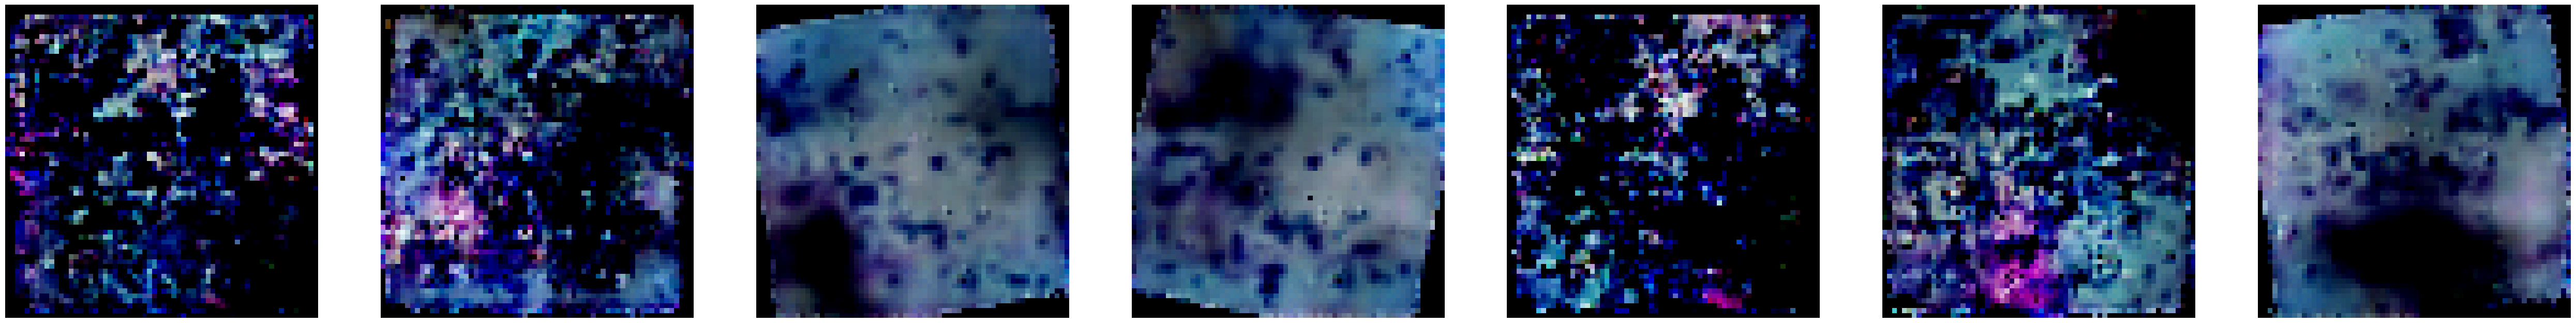

In [ ]:
show_generated_img(7)

In [ ]:
if not os.path.exists('C:/Users/User/CellGAN/output_images'):
    os.mkdir('C:/Users/User/CellGAN/output_images')

im_batch_size = 50
n_images=10000

for i_batch in tqdm(range(0, n_images, im_batch_size)):
    gen_z = torch.randn(im_batch_size, nz, 1, 1, device=device)
    gen_images = netG(gen_z)
    images = gen_images.to("cpu").clone().detach()
    images = images.numpy().transpose(0, 2, 3, 1)
    for i_image in range(gen_images.size(0)):
        save_image(gen_images[i_image, :, :, :], os.path.join('C:/Users/User/CellGAN/output_images', f'image_{i_batch+i_image:05d}.png'))

C:\Users\User\AppData\Local\Temp\ipykernel_10832\3218895561.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i_batch in tqdm(range(0, n_images, im_batch_size)):


  0%|          | 0/200 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.91042155..0.93658805].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8770315..0.9058672].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.91602206..0.4881017].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9997357..0.8200204].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6916583..0.32500598].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6855826..0.82973546].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9

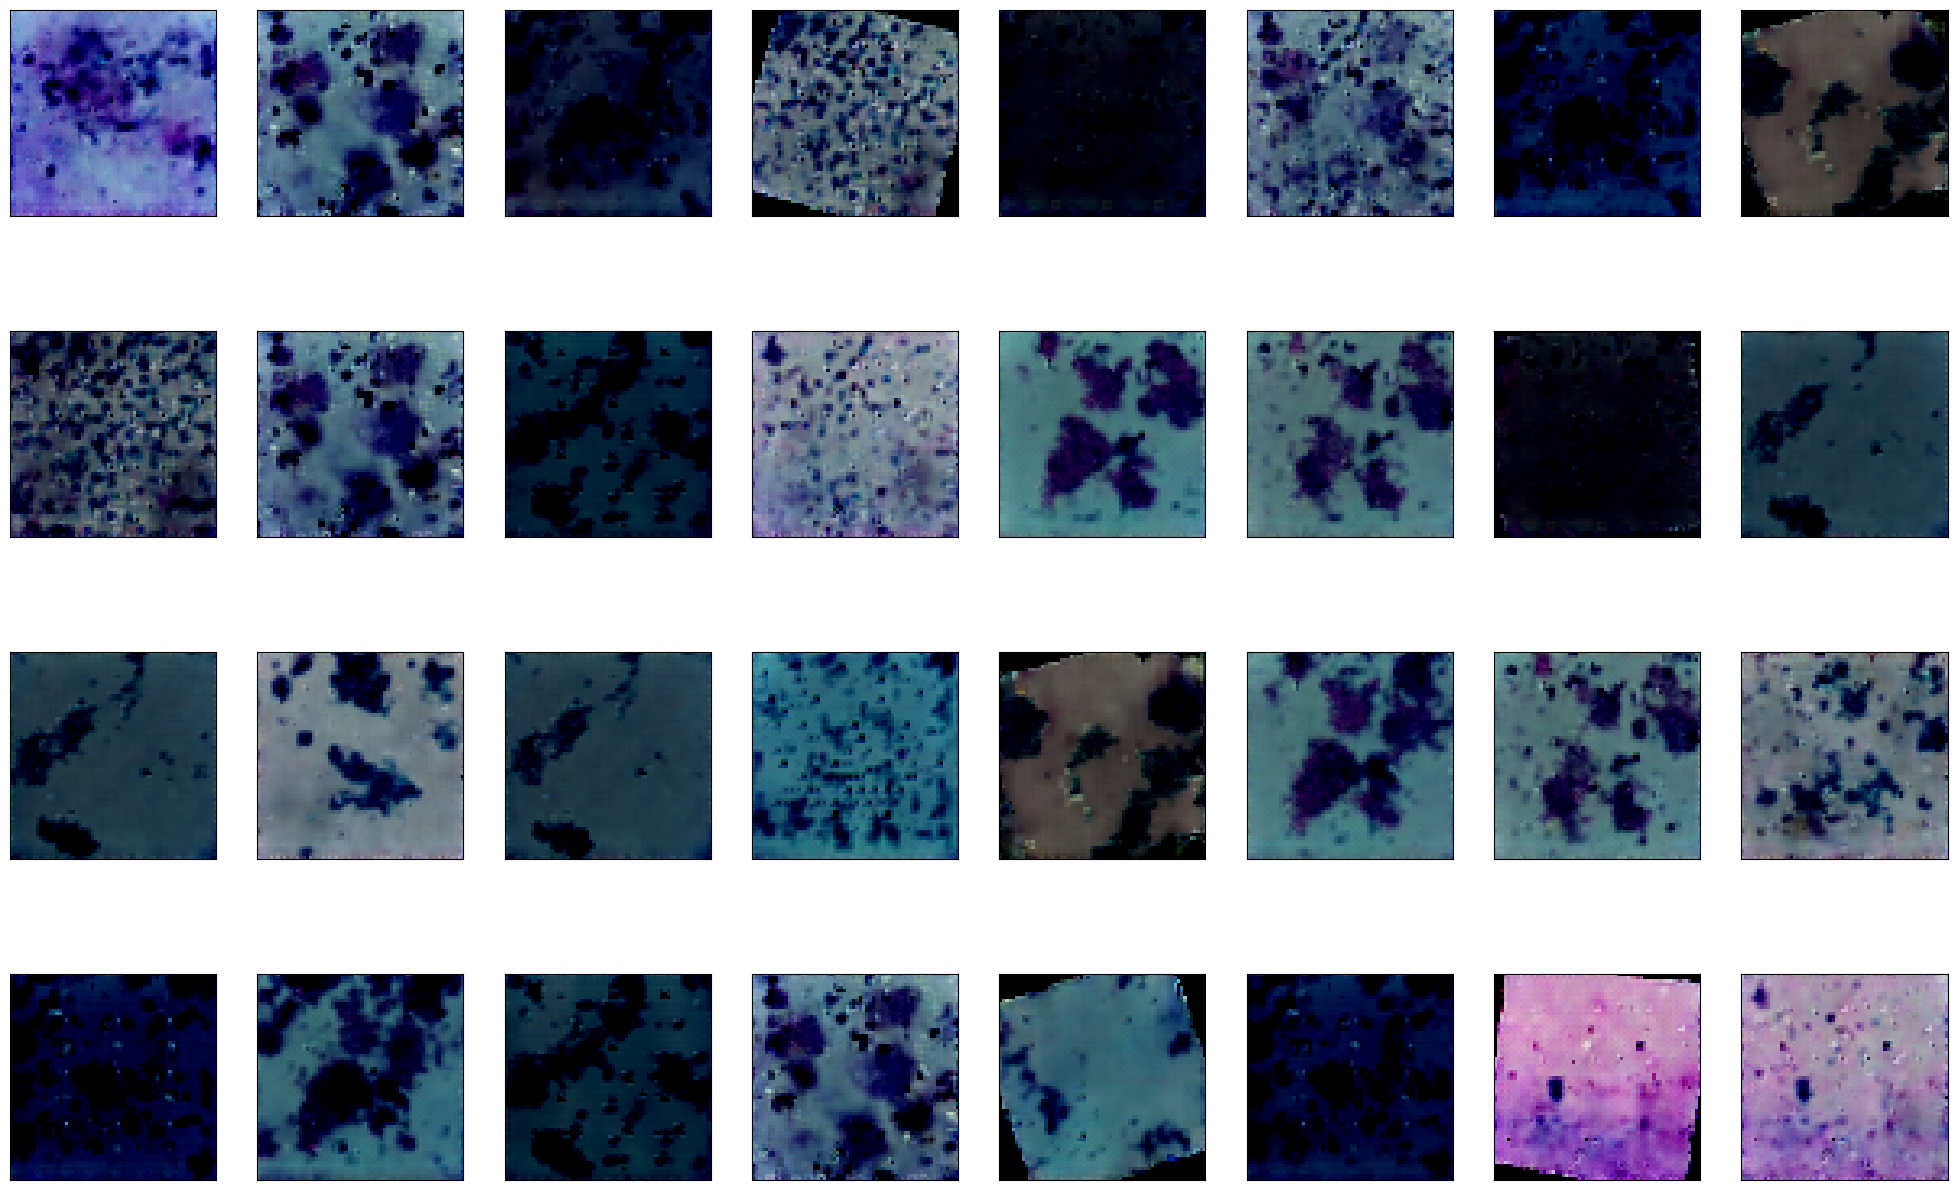

In [ ]:
fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for i, j in enumerate(images[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(j)

In [ ]:
torch.save(netG.state_dict(), 'C:/Users/User/CellGAN/generator_model.pth')
torch.save(netD.state_dict(), 'C:/Users/User/CellGAN/discriminator_model.pth')

In [ ]:
import os
from tqdm import tqdm

def generate_and_save_images(netG, nz, num_images_per_class=500, output_dir='C:/Users/User/CellGAN/generated_images'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    netG.to(device)
    netG.eval()  # Set the model to evaluation mode
    num_classes = 1 # Assuming single class case

    for class_label in range(num_classes):
        class_dir = os.path.join(output_dir, f"class_{class_label}")
        os.makedirs(class_dir, exist_ok=True)

        for i in tqdm(range(num_images_per_class), desc=f"Generating images for class {class_label}"):
            noise = torch.randn(1, nz, 1, 1, device=device)  # Generate random noise
            with torch.no_grad():  # No gradient calculation needed during generation
                generated_image = netG(noise)
            save_image(generated_image, os.path.join(class_dir, f"image_{i}.png"))
generate_and_save_images(netG, nz)

Generating images for class 0: 100%|██████████| 500/500 [00:10<00:00, 49.73it/s]


In [ ]:
generator_path = "C:/Users/User/CellGAN/generator_model.pth"
generator = torch.load(generator_path, map_location=device)

print("Checkpoint type:", type(generator))  # Check if it's a dict or state_dict
if isinstance(generator, dict):
    print("Checkpoint keys:", generator.keys())  # Print available keys


Checkpoint type: <class 'collections.OrderedDict'>
Checkpoint keys: odict_keys(['model.0.weight', 'model.1.weight', 'model.1.bias', 'model.1.running_mean', 'model.1.running_var', 'model.1.num_batches_tracked', 'model.3.weight', 'model.4.weight', 'model.4.bias', 'model.4.running_mean', 'model.4.running_var', 'model.4.num_batches_tracked', 'model.6.weight', 'model.7.weight', 'model.7.bias', 'model.7.running_mean', 'model.7.running_var', 'model.7.num_batches_tracked', 'model.9.weight', 'model.10.weight', 'model.10.bias', 'model.10.running_mean', 'model.10.running_var', 'model.10.num_batches_tracked', 'model.12.weight', 'model.13.weight', 'model.13.bias', 'model.13.running_mean', 'model.13.running_var', 'model.13.num_batches_tracked', 'model.15.weight', 'model.15.bias'])


In [ ]:
import torch
import torch.nn as nn

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the Generator model (Make sure its architecture matches the saved weights!)
netG = Generator(nz=128, channels=3).to(device)

# Load the generator model weights
generator_path = "C:/Users/User/CellGAN/generator_model.pth"
checkpoint = torch.load(generator_path, map_location=device)

# Load directly since it's an OrderedDict (not wrapped inside a dictionary)
netG.load_state_dict(checkpoint)

# Set model to evaluation mode
netG.eval()

print("✅ Checkpoint successfully loaded!")


✅ Checkpoint successfully loaded!


In [ ]:
#orignal modified code
import os
from tqdm import tqdm
import torch
from torchvision.utils import save_image

def generate_and_save_images(netG, nz, num_images_per_class=500, output_dir='C:/Users/User/CellGAN/new64'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    netG.to(device)
    netG.eval()  # Set the model to evaluation mode

    # List of class labels
    class_labels = [
        "High squamous intra-epithelial lesion",
        "Low squamous intra-epithelial lesion",
        "Negative for Intraepithelial malignancy",
        "Squamous cell carcinoma"
    ]

    # Number of classes
    num_classes = len(class_labels)

    for class_label in range(num_classes):
        class_name = class_labels[class_label]
        class_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

        for i in tqdm(range(num_images_per_class), desc=f"Generating images for {class_name}"):
            noise = torch.randn(1, nz, 1, 1, device=device)  # Generate random noise
            with torch.no_grad():  # No gradient calculation needed during generation
                generated_image = netG(noise)

            # Save the generated image to the appropriate class folder
            save_image(generated_image, os.path.join(class_dir, f"image_{i}.png"))

# Example usage
generate_and_save_images(netG, nz)


Generating images for High squamous intra-epithelial lesion: 100%|██████████| 500/500 [00:11<00:00, 45.14it/s]
Generating images for Low squamous intra-epithelial lesion: 100%|██████████| 500/500 [00:10<00:00, 48.22it/s]
Generating images for Negative for Intraepithelial malignancy: 100%|██████████| 500/500 [00:10<00:00, 49.11it/s]
Generating images for Squamous cell carcinoma: 100%|██████████| 500/500 [00:10<00:00, 49.21it/s]


In [ ]:
img=plt.imread()


In [ ]:
netG.eval()

# Define latent space size (adjust based on your model)
LATENT_DIM = 128

# Function to Generate Images
def generate_images(generator, num_images=500, class_name="Generated"):
    os.makedirs(f"/content/gan images/{class_name}", exist_ok=True)

    # Generate noise vector
    noise = torch.randn(num_images, LATENT_DIM, 1, 1, device="cuda" if torch.cuda.is_available() else "cpu")

    # Generate images (PyTorch forward pass)
    with torch.no_grad():
        generated_images = generator(noise).cpu()

    # Save images
    for i in range(num_images):
        img = generated_images[i].permute(1, 2, 0).numpy()  # Convert to (H, W, C)
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0,1]
        plt.imshow(img)
        plt.axis("off")
        plt.savefig(f"/content/gan images/{class_name}/image_{i}.png")
        plt.close()

# Generate 5 Images for Each Class
for class_name in ["High squamous intra-epithelial lesion", "Low squamous intra-epithelial lesion",
                   "Negative for Intraepithelial malignancy", "Squamous cell carcinoma"]:
    generate_images(netG, num_images=500, class_name=class_name)

print("Images Generated Successfully!")

Images Generated Successfully!


In [ ]:
#classification



In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os

# Define transformations for the images (resize and normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet-18 requires 224x224 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Path to the folder where your class directories are saved
data_dir = 'C:/Users/User/CellGAN/new64'

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split dataset into train and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
from torchvision import models

# Load the pre-trained ResNet-18 model with the updated 'weights' argument
from torchvision.models import ResNet18_Weights

model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)  # or ResNet18_Weights.DEFAULT


In [ ]:
import torch.nn as nn
from torchvision import models

# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer to match the number of classes (4 classes in your case)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # 4 classes in the final layer

# Move the model to the device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10  # Set the number of epochs

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the gradients

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total

        # Validation loop
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                val_loss += loss.item()

        val_loss = val_loss / len(val_loader)
        val_acc = val_correct / val_total

        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch [1/10], Train Loss: 1.5490, Train Acc: 0.2419, Val Loss: 1.4344, Val Acc: 0.2525
Epoch [2/10], Train Loss: 1.4082, Train Acc: 0.2406, Val Loss: 1.4427, Val Acc: 0.2250
Epoch [3/10], Train Loss: 1.4367, Train Acc: 0.2381, Val Loss: 1.4337, Val Acc: 0.2450
Epoch [4/10], Train Loss: 1.4201, Train Acc: 0.2531, Val Loss: 1.5319, Val Acc: 0.2250
Epoch [5/10], Train Loss: 1.4181, Train Acc: 0.2594, Val Loss: 1.4044, Val Acc: 0.2600
Epoch [6/10], Train Loss: 1.4125, Train Acc: 0.2581, Val Loss: 1.5270, Val Acc: 0.2250
Epoch [7/10], Train Loss: 1.4126, Train Acc: 0.2581, Val Loss: 1.4073, Val Acc: 0.2325
Epoch [8/10], Train Loss: 1.4019, Train Acc: 0.2537, Val Loss: 1.4087, Val Acc: 0.2550
Epoch [9/10], Train Loss: 1.4130, Train Acc: 0.2569, Val Loss: 1.4080, Val Acc: 0.2400
Epoch [10/10], Train Loss: 1.4069, Train Acc: 0.2344, Val Loss: 1.4492, Val Acc: 0.2425


In [ ]:

from PIL import Image
from torchvision import transforms

# Load the image you want to classify
img = Image.open('C:/Users/User/CellGAN/new64')

# Define the same transformation as during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformation to the image
img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension and move to device

# Get predictions
model.eval()
with torch.no_grad():
    outputs = model(img_tensor)
    _, predicted = torch.max(outputs, 1)

# Get the predicted class label
class_labels = [
    "High squamous intra-epithelial lesion",
    "Low squamous intra-epithelial lesion",
    "Negative for Intraepithelial malignancy",
    "Squamous cell carcinoma"
]

print(f"Predicted class: {class_labels[predicted.item()]}")


PermissionError: [Errno 13] Permission denied: 'C:/Users/User/CellGAN/new64'